In [20]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np


# Load the dataset
df = pd.read_csv('SCHGROUP_data.csv')

# Filter the data for billable hours only
df = df[df["BillType"] == "Billable"]

# Convert the Date column to a datetime object
df['Date'] = pd.to_datetime(df['Date'])

# remove "$" and "-" symbols from BillRate and TotalAmount fields
for field in ["BillRate","TotalAmount"]:
    df[field] = df[field].str.replace("$-","0")
    df[field] = df[field].str.replace("$","")
    df[field] = df[field].str.replace("-","")
    df[field] = df[field].str.replace(",","")
    df[field] = df[field].str.replace(" ","")
    try:
        df[field] = df[field].astype(float)
    except: pass

# Filter the data by year
df_2019 = df[df['Date'].dt.year == 2019]
df_2020 = df[df['Date'].dt.year == 2020]
df_2021 = df[df['Date'].dt.year == 2021]


/var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/ipykernel_9633/761365467.py:22: FutureWarning: The default value of regex will change from True to False in a future version.
  df[field] = df[field].str.replace("$-","0")
/var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/ipykernel_9633/761365467.py:23: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df[field] = df[field].str.replace("$","")


#### Which department had the most billable hours in 2019, 2020, and 2021?

In [2]:


# Group the data by department and sum the Hours column
hours_2019 = df_2019.groupby('DeptName')['Hours'].sum()

hours_2020 = df_2020.groupby('DeptName')['Hours'].sum()
hours_2021 = df_2021.groupby('DeptName')['Hours'].sum()

# Find the department with the highest billable hours in each year
max_dept_2019 = hours_2019.idxmax()
max_dept_2020 = hours_2020.idxmax()
max_dept_2021 = hours_2021.idxmax()

# Sort by Hours
h2019=hours_2019.reset_index().sort_values(by='Hours', ascending=False)
h2020=hours_2020.reset_index().sort_values(by='Hours', ascending=False)
h2021=hours_2021.reset_index().sort_values(by='Hours', ascending=False)

print(f"The department with the most billable hours in 2019 was {max_dept_2019}.")
print(f"The department with the most billable hours in 2020 was {max_dept_2020}.")
print(f"The department with the most billable hours in 2021 was {max_dept_2021}.")

The department with the most billable hours in 2019 was TAS - Audit.
The department with the most billable hours in 2020 was TAS - Audit.
The department with the most billable hours in 2021 was TAS - Audit.


#### Which client had the highest total billable amount in each year?


In [3]:
# convert Date column to datetime type
df['Date'] = pd.to_datetime(df['Date'])

# create a new column for the year
df['Year'] = df['Date'].dt.year

# group the dataset by Year and ClientNum, and calculate the sum of TotalAmount
grouped_df = df.groupby(['Year', 'ClientNum'])['TotalAmount'].sum().reset_index()

# sort the dataframe by TotalAmount in descending order
sorted_df = grouped_df.sort_values(['Year', 'TotalAmount'], ascending=[True, False])

# select the top row for each year
result = sorted_df.groupby('Year').first().reset_index()

# print the result
print(result)

   Year ClientNum                                        TotalAmount
0  2019   CLT1579  992.06981.34130.8579.371226.67636.80101.8979.3...
1  2020   CLT3705  997.4383.1283.12262.76249.36494.15249.36415.59...
2  2021   CLT3199         992.06589.88268.13375.381126.13321.7553.63


#### How many different clients used the company's services over the three years?


In [4]:
# Count the number of unique clients in the dataset
num_clients = len(df['ClientNum'].unique())
print(num_clients)

3049


#### Which employee billed the most hours in each year?


In [5]:
# Calculate the sum of billable hours for each employee in each year
employee_hours = df.groupby(['EmployeeId', 'Date'])['Hours'].sum()

# Find the employee with the highest billable hours for each year
highest_employee_hours = employee_hours.groupby('Date').idxmax()

print(highest_employee_hours.head(30))

Date
2019-01-01    (110, 2019-01-01 00:00:00)
2019-01-02    (110, 2019-01-02 00:00:00)
2019-01-03    (110, 2019-01-03 00:00:00)
2019-01-04    (110, 2019-01-04 00:00:00)
2019-01-05    (110, 2019-01-05 00:00:00)
2019-01-06     (64, 2019-01-06 00:00:00)
2019-01-07     (64, 2019-01-07 00:00:00)
2019-01-08      (5, 2019-01-08 00:00:00)
2019-01-09     (64, 2019-01-09 00:00:00)
2019-01-10     (64, 2019-01-10 00:00:00)
2019-01-11     (64, 2019-01-11 00:00:00)
2019-01-12    (226, 2019-01-12 00:00:00)
2019-01-13    (226, 2019-01-13 00:00:00)
2019-01-14     (64, 2019-01-14 00:00:00)
2019-01-15     (64, 2019-01-15 00:00:00)
2019-01-16     (64, 2019-01-16 00:00:00)
2019-01-17    (110, 2019-01-17 00:00:00)
2019-01-18    (110, 2019-01-18 00:00:00)
2019-01-19    (113, 2019-01-19 00:00:00)
2019-01-20    (122, 2019-01-20 00:00:00)
2019-01-21    (147, 2019-01-21 00:00:00)
2019-01-22    (122, 2019-01-22 00:00:00)
2019-01-23    (147, 2019-01-23 00:00:00)
2019-01-24    (147, 2019-01-24 00:00:00)
2019-01-25 

#### What is the overall trend in billable hours over the three years?


/var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/ipykernel_9633/510641393.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  yearly_totals = df.groupby('Year')[['Hours', 'TotalAmount']].sum()


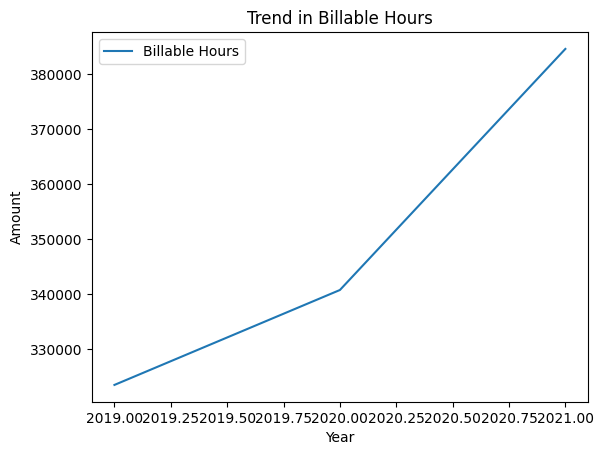

In [6]:
# Create a new column for the year
df['Year'] = df['Date'].dt.year

# Group the data by year and sum the Hours and TotalAmount columns
yearly_totals = df.groupby('Year')[['Hours', 'TotalAmount']].sum()



# Plot the trends in billable hours and billable amount
plt.plot(yearly_totals.index, yearly_totals['Hours'], label='Billable Hours')
plt.xlabel('Year')
plt.ylabel('Amount')
plt.title('Trend in Billable Hours')
plt.legend()
plt.show()

#### What is the total amount billed by each employee in each year?


In [7]:
# Group the data by year and employee id and sum the TotalAmount column
employee_yearly_totals = df.groupby(['Year', 'EmployeeId'])['TotalAmount'].sum()

# Print the results
print(employee_yearly_totals)

Year  EmployeeId
2019  0             81.78949.16316.39158.19158.19158.19158.19890.1...
      5             99.2153.6399.21536.25198.41396.83198.41198.414...
      8             109.93164.9054.97439.73337.8484.46168.9284.461...
      9             61.67107.25632.78316.39126.561866.1599.2181.78...
      42            3783.24223.6281.78408.89198.41804.38778.90111....
                                          ...                        
2021  1495                                                     482.63
      1498          337.84337.84115.2957.65361.97107.25107.25353.9...
      1505                                         415.59166.24884.81
      1506          297.62198.41195.20248.0280.4455.77361.97139.43...
      1508                                                     284.21
Name: TotalAmount, Length: 1070, dtype: object


#### What is the distribution of billable rates across all departments?


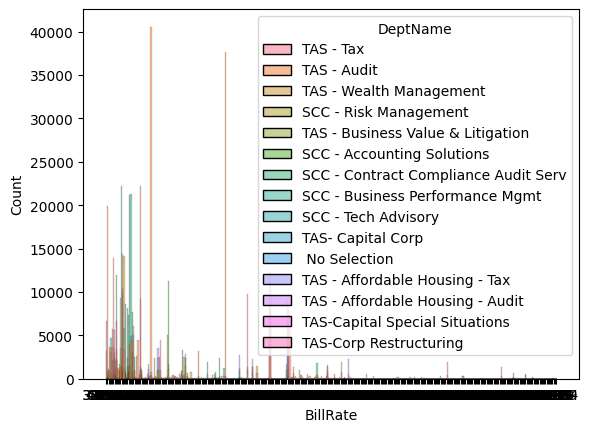

In [8]:
# Plot the distribution of billable rates across all departments
sns.histplot(data=df, x='BillRate', hue='DeptName')
plt.show()

#### What is the average billable rate for each client over the three years?


In [11]:
# Calculate the mean billable rate for each client in each year
#mean_billable_rate = df.groupby(['ClientNum', 'Date'])['BillRate'].mean()
#print(mean_billable_rate)


#### Clients who consistently have high or low billable rates?


#### Departments or employees that consistently underperform in terms of billable hours or billable amount?

In [16]:
# Calculate the average billable hours and total amount per department and employee
dept_avg = df.groupby(['DeptID', 'EmployeeId'])[['Hours', 'TotalAmount']].mean().reset_index()

# Calculate the standard deviation of billable hours and total amount per department and employee
dept_std = df.groupby(['DeptID', 'EmployeeId'])[['Hours', 'TotalAmount']].std().reset_index()
print(dept_std)


# Set the threshold for underperformance (e.g. one standard deviation below the mean)
threshold_hours = dept_avg['Hours'].mean() - dept_std['Hours'].mean()
threshold_amount = dept_avg['TotalAmount'].mean() - dept_std['TotalAmount'].mean()


# Find the departments and employees that consistently underperform in terms of billable hours or billable amount
underperform_hours = dept_avg[dept_avg['Hours'] < threshold_hours]
underperform_amount = dept_avg[dept_avg['TotalAmount'] < threshold_amount]


# Print the results
print("Departments and employees that consistently underperform in terms of billable hours:")
print(underperform_hours)
print("\nDepartments and employees that consistently underperform in terms of total amount:")
print(underperform_amount)

/var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/ipykernel_9633/2613977918.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dept_avg = df.groupby(['DeptID', 'EmployeeId', "TotalAmount"])[['Hours', 'TotalAmount']].mean().reset_index()
/var/folders/fm/gf09nxpx12n_7pcjsnlx5yt00000gn/T/ipykernel_9633/2613977918.py:5: FutureWarning: The default value of numeric_only in DataFrameGroupBy.std is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dept_std = df.groupby(['DeptID', 'EmployeeId'])[['Hours', 'TotalAmount']].std().reset_index()


      DeptID  EmployeeId     Hours
0          0          64  0.000000
1         12           0  3.929281
2         12           5  3.882889
3         12           8  1.607275
4         12           9  3.413758
...      ...         ...       ...
5633      56        1508  0.577350
5634      56        1509  0.383406
5635      56        1511  0.565685
5636      56        1512  0.028868
5637      56        1514       NaN

[5638 rows x 3 columns]


TypeError: Could not convert 1179.751206.561394.251930.502091.382171.812359.502654.442788.50294.943217.503619.693659.915027.34911.63965.251179.751206.561447.881474.691608.751622.161689.191769.631823.251917.091930.502051.162064.562171.812212.032359.50241.312413.132654.442734.882788.502815.312895.75294.942962.783137.063217.503418.593619.69402.194021.884182.754357.03482.63589.88723.94804.38884.81911.631179.75402.191179.751367.441447.881689.191823.251930.502064.56214.502212.032265.662279.062359.50241.312413.132439.942506.972614.222654.442734.882788.50294.94321.753485.633646.50455.81501.39737.34884.81911.63107.251367.441394.251447.881608.751689.191769.631823.251930.502064.56214.502212.03225.232279.062359.502413.132734.882788.50294.943137.063217.50348.563485.63387.44402.194102.31455.81482.63501.39804.38911.631045.691179.751185.111206.561219.971367.441394.251447.88147.471474.691608.751689.191742.811769.631823.251917.091930.502010.942051.162064.562091.382171.812256.272279.062292.472359.502381.62241.312413.132439.94250.702506.972614.222654.442734.882788.502801.912815.31294.942949.382962.783137.06321.753217.503244.313311.343418.59348.563485.63361.973619.693646.503834.19387.44402.194021.884424.064531.31455.81482.634826.254879.88512.79589.88603.28683.72697.13723.94804.38884.81911.63965.251045.691128.141139.531179.751206.56125.351327.221367.441394.251447.88147.471474.691608.751622.161689.19174.281742.811769.631823.251917.091930.502005.582051.162064.562091.382171.812212.032252.252256.272265.662279.062292.472359.50241.312506.972533.782614.222654.442734.882788.502815.31294.942949.38296.282962.783016.413137.063190.693217.503244.31337.84348.563485.633539.253619.693646.503659.913834.19387.443981.66402.194021.884182.754222.97442.41455.814558.134719.00482.634826.25501.395013.945402.725577.00589.88615.356381.38675.68683.726837.19697.13723.94737.34804.38884.81911.63965.251206.561253.481367.441689.191917.091930.502005.582010.94205.122064.562171.812256.272279.062359.502413.132439.942506.972654.442734.882788.502815.312949.383096.843137.063217.503539.253646.50387.44455.81804.38911.631179.752359.50402.19442.41589.88723.94911.63965.252359.50723.941002.791005.471179.751206.561394.251447.88147.471474.691568.531608.751689.19174.281769.631823.251917.091930.502010.942051.162064.562091.382171.812212.032292.472359.50241.312413.132439.942506.972533.782654.442734.882757.672788.502815.312895.75294.942949.38296.282962.783096.843137.063190.693217.503244.313311.34337.84348.563485.633539.253619.693646.503820.783834.19402.194021.884129.13442.414424.064531.31455.814558.134625.16482.634826.25501.39522.845228.445577.00589.88592.56603.28615.35683.72697.13723.94752.09774.88804.38844.59884.81911.63965.251045.691085.911179.751206.561219.971407.661447.881474.691568.531769.631823.251917.091930.502010.942051.162064.562171.81227.912279.062292.472359.50241.312413.132439.942506.972654.442788.502815.31294.942949.383137.063217.50348.563619.69402.19442.41455.81589.88603.28884.811002.79102.561045.691179.751206.561367.441394.251407.661447.88147.471504.181608.75174.281742.811769.631809.841823.251917.091930.502005.582010.94205.122051.162064.562091.382171.812212.03225.232265.662359.50241.312413.132439.942506.972614.222654.442734.882788.502815.31294.942949.38296.282962.783096.843137.06321.753217.503244.313391.783418.59348.563485.633539.253619.693646.503686.723834.19402.19442.41455.81501.39522.84589.88592.56603.28697.13723.94774.88804.38871.41884.81911.63965.251206.561474.691608.751769.631823.251930.502064.562171.812279.062292.472359.50241.312413.132439.942654.442734.882775.092788.502801.912815.312895.75294.942949.383217.503418.593485.633619.69402.19455.81482.63589.88804.38884.81911.63965.251045.691139.531179.751206.56125.351367.441394.251407.661447.88147.471504.181608.751689.19174.281769.631809.841823.251917.091930.502010.942064.562091.382171.812212.03227.912279.062292.472359.50241.312413.132439.942506.972533.782654.442734.882788.502815.31294.942949.38296.283096.843137.063217.503244.31348.563485.633619.693646.50376.05387.443981.66402.194222.97442.41455.81482.634826.25501.39589.88603.28723.94804.38884.81911.63965.251930.502359.50348.56697.131045.692064.56227.912359.50294.942949.38402.19482.63723.94804.38884.811032.281106.02112.611139.53125.351327.221367.441394.251447.88147.471474.691568.531608.751689.19174.281742.811769.631823.251843.361917.091930.502005.582010.942051.162064.562091.382171.812232.142256.272265.662292.472359.50241.312413.132439.942506.972533.782654.442734.882788.502895.75294.942949.383096.843137.06321.753217.503244.31348.563485.633619.693646.503659.913686.723834.19387.444424.064531.31455.814625.16482.63522.84589.88683.72723.94804.38884.81911.63965.251179.75125.351367.441435.811447.881474.691504.181640.931742.811754.881769.631823.251930.502005.582064.562091.382171.812212.032256.27227.912292.472359.50241.312439.94250.702506.972533.782654.442734.882788.502801.91294.943096.843217.503391.78348.563619.693646.50387.443981.66402.194129.134222.974424.06455.81482.635630.63589.88603.28683.72697.13804.38884.81911.63965.251139.531179.751206.561367.441394.251447.881474.691595.341622.161689.191769.631823.251930.502010.942051.162064.562171.812212.03227.912292.472359.502413.132654.442734.882775.092788.502815.31294.942949.383137.063190.693539.253619.693820.783834.19402.19455.81482.63589.88723.94911.63965.251206.561823.251930.502064.562359.502788.503137.063485.63112.611179.751206.561367.441447.881474.691608.751689.19174.281742.811769.631823.251930.502051.162064.562091.382171.812279.062292.472359.502413.132439.942506.972654.442734.882788.502801.912815.31294.942949.383137.063190.693217.503418.59348.563485.633646.504021.884222.97455.81603.28683.72804.38884.81911.63965.251002.791032.281085.911179.751206.561253.481367.441394.251447.881474.691504.181608.751629.531689.19174.281769.631823.251917.091930.502005.582051.162064.562091.382171.812212.032256.272292.472359.50241.31250.702506.972614.222654.442734.882788.502815.31294.942949.38296.283008.363137.063217.503485.63361.97387.443981.66402.194021.884424.06455.81482.63589.88592.56603.28697.13723.94884.81888.83911.63965.251139.531179.751185.111206.561253.481367.441378.831549.761622.161769.631823.251930.502005.58205.122091.382171.812256.272359.502413.13250.702506.972632.322734.882757.67294.942949.382962.783646.50402.19442.41455.81482.63501.39592.56615.35752.09774.88804.38884.81911.631002.791179.75120.661206.561219.971327.221367.441394.251407.661447.88147.471474.691504.181595.341608.751622.161689.191742.811769.631823.251917.091930.502005.582010.94205.122051.162064.562091.382171.812212.032256.272279.062292.472359.50241.312413.132439.942506.972614.222654.442734.882757.672788.502801.912815.31294.942949.38296.282962.783008.363096.843137.06321.753217.503311.343418.59348.563619.693646.50376.05387.44402.19442.41450.45455.81482.634826.25522.845228.445630.63589.88592.56683.72697.13723.94737.34752.09774.88804.38871.41884.81911.63965.251045.69112.611179.751327.221367.44139.431394.251447.881622.161689.191769.631823.251917.09193.051930.502010.942051.162064.562091.382171.812212.032256.272265.662279.062292.472359.50241.312413.132439.94250.702506.972614.222654.442734.88278.852788.502801.912815.31294.942949.382962.78321.753217.503244.31348.563485.63361.973619.693646.503659.913820.78387.444008.47402.194021.88455.814826.25522.84592.56774.88884.81911.63965.251206.561608.751769.631930.502265.662359.502413.132439.942815.313137.06348.563619.69589.88804.38871.41884.811045.691179.751447.881474.691689.191742.811769.631930.502064.562171.812265.66227.912359.502506.972533.782654.442788.502801.91294.943137.063217.503391.783485.63402.19429.004424.06455.81482.63522.84589.88737.34965.251139.531179.751219.971367.441447.881474.691568.53174.281754.881769.631809.841823.251917.091930.502005.582051.162064.562091.382256.27227.912292.472359.502439.94250.702614.222654.442788.502801.912815.31294.942949.38296.282962.783190.693217.50348.563619.69387.44402.19455.81589.88603.28683.72697.13723.94752.09820.46884.81888.83911.63965.251085.911179.751206.561447.88147.471474.691608.75174.281769.631809.841823.251930.502010.942064.562091.382171.812212.03225.232359.50241.312413.132439.942506.972614.222654.442734.882788.502815.31294.943217.503311.34337.84361.973619.693646.50402.194021.884276.59442.41482.63589.88723.94804.38844.59884.81911.63965.251002.791025.581032.281115.401179.751253.481367.441447.881474.691544.401608.751689.191742.811823.251917.091930.502005.58201.092010.94205.122051.162064.562091.382171.812212.032265.66227.912279.062359.50241.312506.972654.44278.852788.50294.942949.38296.283137.063217.50348.563485.633619.693646.50402.194021.88455.814558.13589.88615.35683.72723.94804.38965.251032.281139.531219.971447.88147.471474.691689.191769.631823.251917.091930.502064.562171.812265.662292.472359.50241.312413.132439.942654.442788.502801.912962.783485.633539.253646.50402.194021.88441.87455.81589.88683.72884.81911.631179.751206.561447.881544.401568.531689.19174.281769.631917.091930.50227.912359.50241.312949.383217.503311.34348.563539.25402.19442.41455.81603.28965.251002.791005.471032.281045.691115.40112.611179.751206.561219.971367.441394.251407.661447.881504.18160.881608.751622.161689.19174.281742.811809.841823.251917.091930.502005.58201.092010.942051.162064.562091.382171.81220.942212.032279.062292.472359.50241.312413.132439.942506.972614.222654.442734.882788.502801.912815.31294.942949.383016.413096.843137.063190.69321.753217.50348.563485.633619.693646.503820.784008.47402.19442.41455.814558.13482.63589.88603.286032.81643.50683.72697.13737.34752.09804.38844.59884.81911.63965.251206.561930.502171.812292.472359.502654.44278.853190.69348.56402.19455.81589.88804.38884.811045.691139.531179.751206.561219.971327.221367.441394.25147.471474.691608.751689.191742.811769.631809.841823.251930.502051.162064.562091.382171.812212.032265.66227.912279.062292.472359.50241.312413.132439.94250.702506.972654.442734.882788.502801.912815.31294.942962.783137.06321.753217.503311.34348.56361.973619.693646.50387.44402.19442.41455.81482.63589.88683.72697.13723.94737.34774.88884.81911.63965.25112.611179.751206.561474.691930.502801.91294.943217.50455.81804.381032.281179.751206.561367.441394.25147.471474.69174.281769.631930.502064.562171.812212.032279.062292.472359.502413.132506.972654.442788.50294.943096.843217.503646.50441.87442.41455.81589.88884.811032.281085.911179.751327.221447.881474.691689.191716.001769.631930.502051.162064.562091.38214.502171.812212.03227.912292.472359.502413.132506.972654.44268.132734.882788.502815.31294.943190.693217.50348.563619.693646.504021.88455.81522.84589.88804.38884.81911.631206.561568.531769.631930.50201.092091.382212.032359.502413.132654.442734.882788.502962.783646.50386.10455.81579.15697.13965.251917.091930.502051.162171.812279.062506.972801.91455.811045.691206.561367.441394.251407.661447.881474.691742.811769.631823.251930.502091.382359.50241.312413.132439.942506.972654.442734.882788.503096.843137.063485.63402.19455.81482.63589.88697.13804.38911.631447.881622.161689.191769.631823.251930.502064.562171.812265.662279.062359.50241.312506.972654.442801.912815.312949.383096.843217.503646.50455.81589.88603.28697.13911.63965.251045.691179.751206.56125.351394.251447.88147.471474.691742.811769.631823.25193.051930.502064.562091.38225.232265.662359.50241.312413.132439.94250.702506.972734.882788.502801.91294.94296.282962.783137.06348.56386.10455.81482.63501.39522.84589.88626.74683.72697.13723.94737.34772.20884.81911.63965.251032.281045.691128.141158.301179.751206.561367.441394.251447.88147.471474.69160.881608.751689.19174.281742.811769.631823.25193.051930.502064.562091.382171.812212.03225.232265.662292.472359.50241.312439.94250.702506.972654.442788.502801.912815.31294.942949.382962.783217.503244.313311.34348.563485.633619.69386.10402.19455.81501.39522.84589.88884.81911.631045.69112.611179.75120.661206.561219.971327.221394.251407.661447.88147.471474.691544.401568.531608.751622.161689.19174.281742.811769.631809.841823.251917.091930.50201.092010.942051.162064.562091.382171.812212.03227.912359.502413.132439.942506.972614.222654.442788.502815.31294.943096.843137.063217.50337.843391.783418.59348.563485.633619.693646.503834.19402.194021.884182.754357.03441.87442.414424.06455.81482.63589.88603.28662.81683.72697.13723.94804.38884.81911.63965.25112.611126.131179.751206.561327.221351.351447.88147.471474.691689.191769.631809.841823.251930.502091.382212.032359.502413.132734.88321.75348.56482.63579.15804.38965.251005.471032.281085.911206.561394.251447.88147.471568.531689.19174.281742.811769.631823.251917.091930.502010.942051.162064.562091.382171.812212.032292.472359.50241.312413.132439.942506.972614.222654.442734.882788.502801.912962.783137.063217.503244.313391.78348.563485.63361.973646.503659.913834.19402.19455.81482.63522.84589.88603.28683.72697.13723.94804.38884.81911.63965.251005.471045.69112.611126.131139.531158.301179.751206.561219.97125.351254.831327.221367.441394.251447.88147.471474.691544.401608.751689.19174.281742.811769.631823.251917.091930.502010.942051.162064.562171.812212.03225.232265.662359.50241.312413.132439.94250.702506.972654.442734.882788.502801.912815.31294.942949.382962.783096.843137.063217.503378.383418.59348.563485.633539.253619.693646.50402.194182.75442.41450.45455.81482.634879.88501.39522.845228.44579.15589.88603.28683.72723.94752.09804.38884.81911.63965.253137.06321.75965.251045.691179.751327.221447.88147.471474.691742.811769.631823.251930.502051.162064.562171.812359.502413.132614.222654.442788.50294.942949.383217.503244.313485.633539.253646.50402.194182.75441.87442.41482.63579.15589.88697.13723.94772.20884.81965.251045.691179.75147.47174.281930.502064.562359.502506.972949.38337.84522.84589.88697.13911.63965.251139.531179.751447.881568.53174.281742.811769.631823.251930.502010.942051.162091.382171.812265.662359.502413.132439.942506.972654.442734.882788.502815.31294.942949.383137.063217.503311.34348.563485.633619.694021.88455.81482.63911.63965.251032.281179.751394.251447.88147.471474.691544.401622.161689.191769.631823.251917.091930.502010.942064.562091.382171.812316.602359.502413.132439.942506.972509.652614.222654.44278.852788.50294.942962.783217.50348.56402.194531.31455.814879.88697.13804.38884.8196.53965.251045.691139.531179.751206.561394.251474.691544.401608.751622.161640.931689.191737.451742.811769.631809.841823.251917.091930.50201.092010.942051.162064.562091.382171.812212.032265.66227.912359.50241.312439.942506.972614.222654.442734.88278.852788.502801.912815.31294.942949.382962.783016.413137.063217.50348.563619.693646.50402.194021.88418.28442.41455.81482.63579.15589.88683.72697.13774.88804.38884.81911.631085.911179.751206.561351.351367.441394.251447.88147.471474.691568.531622.161689.19174.281742.811769.631823.251917.091930.502010.942051.162064.562091.382171.81220.942212.03225.232265.662279.062292.472359.50241.312413.132439.942506.972614.222654.442734.882788.502801.912815.31294.942949.383096.843137.063217.503244.31337.84348.56361.973619.693646.503659.91402.19442.41455.81482.634879.88522.84563.06589.88603.28683.72697.13723.94804.38871.41884.81911.63965.251045.69112.611158.301179.751206.561367.441394.25147.471544.401608.751737.45174.281742.811769.631809.841823.251917.091930.502091.382171.812212.032265.662359.50241.312413.132439.942506.972654.442734.882788.502801.912815.31294.943016.41321.753217.50348.563619.693646.50386.104021.884182.75450.45455.81482.63522.84589.88603.28675.68683.72697.13723.94772.20844.59871.41884.81911.63965.25112.611179.751219.971447.881474.69160.881622.16174.281769.631930.502051.162064.562091.382171.812212.03225.232265.662359.50241.312413.132506.972614.222654.442788.502801.912815.31294.942949.383096.843137.06321.753217.503244.31337.843391.78348.563619.693834.19442.414424.06455.81522.84589.88697.13723.94884.81911.63965.251045.691179.751367.441394.251474.691568.531608.751689.191823.251930.502010.942091.382171.812279.062359.50241.312439.942533.782654.442788.502801.91294.942949.382962.783096.843137.063190.693217.50361.973619.693646.503659.914276.59482.63884.81965.251061.781179.751206.561351.351394.251544.40174.281769.631823.251930.502051.162171.812359.502413.132506.97278.852788.50294.942949.383217.503244.31455.81589.88772.20884.81965.251367.441394.25147.471474.691595.34174.281742.811769.631823.251930.502064.562091.38225.23227.912279.06241.312614.222654.442734.88321.75337.843485.63387.44455.81482.63522.84697.13911.631005.471045.691128.141179.751206.561351.351367.441394.251447.881474.691544.401608.75174.281769.631823.251880.231930.50201.092010.942051.162064.562091.382171.81227.912279.062316.602359.502413.132439.942533.782614.222654.44278.852788.502801.91289.58294.942949.383096.843137.063217.503311.34348.563619.69402.19442.41455.81589.88675.68683.72697.13723.94772.20884.81911.63965.251032.281327.221608.751930.502051.162212.032292.472506.972654.442775.093096.843217.50455.81589.88683.72965.251005.471045.691139.531367.441394.251608.751742.811809.841930.502064.562091.382265.662359.502439.942614.222788.502801.912949.38348.563485.63455.81683.72911.631005.471179.751206.561394.25147.471474.691823.251930.50201.092171.81227.912788.503217.50442.41455.81482.63589.88697.13723.94911.63965.251139.531179.751367.441394.251447.88174.281809.841823.251917.091930.502051.16227.912359.50241.312413.132439.942654.442788.50294.942962.783137.06321.753217.503311.34337.84348.563485.634182.75455.81522.84589.88675.68697.13723.94737.34884.81911.63965.251351.35174.281769.631823.251930.502171.812359.502439.94278.85294.94386.10402.19442.41772.201045.691206.561394.251407.661447.881689.191742.811769.631930.502051.162064.562091.382171.812265.66227.912279.062292.472359.50241.312413.132439.942506.972533.782654.442734.882788.502801.912949.383016.413137.063217.503418.593485.633646.504182.754531.31455.81911.63965.251002.791005.471032.281179.75120.661206.561219.971367.441394.251447.881474.691568.53160.881608.751689.191737.45174.281742.811809.841823.251833.981917.091930.501990.83201.092010.942020.322051.162064.562091.382171.812265.66227.912292.472359.50241.312413.132439.942506.972614.222654.442728.172734.88278.852788.502801.912895.75294.942949.382962.783137.06321.753217.503244.31337.843418.59348.563485.633539.25361.973646.503834.19402.194021.884182.75455.81482.635228.44557.70589.88603.28643.50683.72697.13723.94772.20774.88804.38884.81911.63965.251005.471032.281045.69112.611158.301179.751327.221367.441394.25147.471474.691544.40160.881689.19174.281769.631917.091930.502027.032064.562091.382171.81225.232292.472359.50241.312413.132439.942506.972614.222654.442734.88278.852788.50294.942949.382962.783137.06321.753217.503244.31348.563485.633539.25361.973619.693646.503834.19402.194021.884424.06455.814826.25522.845228.44563.06589.886032.81697.13911.63965.251394.251930.50201.092064.562171.812359.502654.442801.912949.383096.843217.503244.313311.343378.38348.563619.693646.503834.194129.13455.814826.25683.72697.131013.51112.611126.131179.75120.661206.561287.001394.251407.661447.881463.961474.691568.531608.751689.191742.811769.631823.251930.50201.092064.562091.382171.812212.032265.662279.062359.502439.942506.972614.222654.442734.882788.502815.313016.41321.753217.503619.69402.19455.81482.63522.84589.88643.50683.72697.13911.63965.251032.281045.691179.751206.561407.661447.88147.471474.691544.401608.751622.161689.19174.281742.811823.251917.091930.502051.162064.562091.382123.55214.502171.812359.50241.312439.942506.972614.222654.442734.88278.852788.502801.912815.31294.942949.383137.063217.50348.563619.693646.504021.884102.31455.81536.25589.885925.56683.72697.13772.20884.81911.63965.251045.691179.751206.561254.83139.431689.191742.811769.631823.251917.091930.50201.092027.032064.562171.812292.472359.502413.132439.942614.222654.442734.88278.852788.502801.912815.31294.942949.383137.063190.69321.753418.59348.563485.633646.503820.78402.194129.134424.06455.81482.635630.63589.88603.28643.50804.38884.81911.63965.25225.232359.50321.75697.13788.29174.281930.502788.502801.91321.75643.501045.691206.561407.661568.53174.281769.631930.502051.162091.382212.032279.062359.50241.312506.972654.442788.50294.943137.063217.50348.563619.69455.81482.63522.84723.94911.631367.441474.691608.75174.281769.631917.091930.50201.092051.162064.562091.382265.66227.912359.502439.94250.702506.972614.222654.442788.50294.943137.063190.693217.50348.563646.50375.383861.00402.19455.81522.84697.13871.41911.63965.251179.751367.441568.531689.19174.281930.502010.942064.562171.812359.502506.972654.442788.50294.94321.753217.50348.563485.633646.50482.63522.84589.88683.72723.94884.81911.631367.44139.431394.251447.881608.75174.281769.631823.251917.091930.502051.162064.562171.812265.662359.502614.22278.852788.502815.31294.942949.383016.413137.06321.753217.50348.563646.50442.41455.81482.634879.88589.88643.50804.381115.40112.611206.561238.741474.691544.401689.191737.451742.811823.251930.502064.562212.032279.062359.502614.222654.44278.852788.50294.942962.783137.063217.503311.34337.843619.693646.50402.19455.81579.15675.68697.13723.94911.631032.281045.691115.401206.56147.471544.401737.45174.281742.811930.502279.062788.502801.91294.943311.34348.56418.28455.81112.611139.531179.751206.561367.441394.251447.88147.471474.691544.40174.281742.811769.631809.841823.251930.502010.942051.162064.562091.382171.812212.03225.232265.66227.912359.502413.132439.942506.972614.222654.44278.852788.50294.942962.783190.693217.50337.84348.563619.693646.50418.28455.81536.25589.88643.50683.72697.13804.38871.41911.63965.251045.691179.751206.561287.001394.251447.881544.401595.341608.751689.191742.811769.631809.841823.251930.502051.162064.562091.382171.812212.03227.912359.50241.312413.132439.942614.222654.442734.882788.502962.783137.06321.753217.503418.59348.563646.503834.194021.88455.81589.88675.68697.13884.81911.63965.253217.501045.691206.561367.441608.75174.281742.811809.841823.25241.312439.942614.222788.503311.34348.56402.19455.81683.72911.63120.661367.441394.251568.531737.45193.051930.50201.092051.162091.382171.812265.66227.912614.222788.50294.94348.56402.19455.81482.63522.84603.28683.72697.13804.38911.631045.691219.971367.441394.251407.661447.88174.281742.811769.631809.841823.251917.091930.50201.092051.162064.562091.382265.662359.50241.312413.132439.94250.702506.972654.442734.88278.852788.50294.942949.383217.50348.563485.633619.693646.50402.19455.81522.84589.88683.72697.13723.94871.41884.81965.251005.471085.91112.611179.751206.561351.351394.251447.881544.401608.751689.19174.281742.811769.631823.251930.502010.942064.562091.382171.81227.912359.50241.312439.942506.972614.222654.442734.88278.852788.502815.31294.943137.06321.753311.343418.59348.56361.973619.693646.50402.19418.28441.87455.81482.63563.06579.15589.88697.13723.94804.38884.81911.63965.251179.751219.971474.691689.19174.281742.811769.631823.251917.091930.50201.092091.382292.472359.502413.132654.442734.882788.502815.31294.943137.063418.59348.563539.253619.693646.50402.19455.81482.63522.84589.88603.28697.13804.38871.41884.81911.63965.25120.661447.881917.091930.502212.03227.912359.502734.882801.913646.50455.81482.63697.13911.631045.691179.75174.281769.631917.091930.502212.03227.912359.502413.132654.442734.883217.50348.563646.50455.81482.63522.84589.88697.13911.631045.691179.75120.661367.441809.841823.251930.502064.56241.312439.942614.222654.442788.502815.313137.06348.563485.633659.91455.81603.28697.13911.631045.691179.751206.561367.441394.251447.88147.471568.531608.751769.631930.502171.812265.662359.50241.312506.972614.222654.442734.882788.502815.312962.783137.063217.503619.693646.50402.19441.87455.81589.88697.13723.94804.38965.251139.53139.431737.451742.811930.502091.382123.552359.502413.132654.44278.852788.502949.383137.063217.503244.313418.59348.563539.253646.50386.10402.19455.81482.63522.845577.00589.88683.72884.811045.69112.611139.531179.75120.661367.441394.251447.881474.691544.401568.53174.281742.811769.631809.841823.251833.981917.09193.051930.502010.942051.162064.562091.382171.812212.032265.66227.912359.50241.312413.132439.942506.972614.222734.882788.502801.912815.31294.942949.382962.783016.413137.063217.503244.31337.84348.563485.633619.693646.503820.78386.10402.194021.884182.75455.81482.63522.84563.06589.88603.28683.72697.13723.94772.20884.81911.63965.251206.561394.251608.751769.631823.251917.091930.502051.162265.662359.502654.442788.503217.503485.633646.50402.19441.87522.84911.63965.251032.281367.441394.251407.661447.881544.401737.45174.281742.811769.63193.051930.502051.162212.03227.912359.502439.942788.502815.31348.56386.10441.87455.81589.88697.13772.20883.74911.631447.88174.281930.502091.382439.942788.50348.56455.811045.691367.441394.251447.881501.501622.16174.281742.811809.841930.502091.38227.912359.50241.312439.942506.972654.442788.50348.56375.38444.42455.81482.63603.28697.13804.38884.811045.691179.751394.251568.53160.88174.281742.811930.502051.162064.562091.382171.812212.03225.232279.062359.50241.312439.942506.972614.222734.882788.502801.91294.942962.783137.06321.753217.50337.84348.563646.50450.45455.81482.63522.84563.06589.88603.28697.13723.94804.38844.59884.81965.251394.252091.382439.94294.943137.06522.84697.1396.531045.691327.221394.251568.531689.191917.091930.502265.66227.912359.502413.132614.22455.81522.84697.13201.09294.94442.411005.471179.751206.561287.001351.351367.441447.881608.751689.191737.45174.281742.811769.631809.841823.251930.50201.092010.942051.162064.562091.382171.812212.032265.662279.062359.502413.132439.942506.972788.502815.31289.58294.943016.413137.063217.50348.563619.69375.383834.19402.19455.81482.63557.70579.15603.28697.13788.29804.38844.59883.74965.251394.251930.502051.162091.382212.032359.502506.972734.883137.06697.13965.251045.69112.611179.75120.661206.561367.441394.251608.751689.19174.281742.811769.631823.251930.502010.942051.162064.562091.382171.812212.032359.50241.312439.942654.442734.882788.502815.31294.942949.382962.783016.413137.063217.50337.84348.563485.633834.194021.88455.81589.88603.28675.68697.13723.94804.38884.81965.251179.751394.251769.631930.50201.092359.50241.312439.942788.50294.942949.383016.413217.503646.50455.81697.131045.691139.531179.751206.561367.44139.431394.251474.691544.401608.751689.191769.631823.251917.09193.051930.502051.162064.562171.812265.662292.472359.502413.132439.942614.222654.44278.852788.502815.312949.383137.063217.503244.313311.343418.59348.563485.633619.693646.50402.194021.884222.97455.81522.84557.705577.005630.63592.56643.50697.13723.94804.38911.631179.75139.431394.251501.50187.691930.502171.81227.912279.062359.502614.222654.442734.882788.50294.943217.503485.633646.50386.104021.884531.31455.81522.84603.28697.13723.94750.75804.38884.81911.6396.531005.471045.691179.751206.561367.441394.251399.611447.881474.691501.501608.751622.161689.19174.281742.811769.631809.841823.251930.50201.092010.942064.562091.382171.812252.25227.912359.50241.312413.132439.942506.972614.222654.442734.882788.502815.31294.942962.783137.06321.753217.50337.84348.563485.63361.973619.693646.503659.91402.19441.87450.45455.81482.63592.56643.50683.72723.94737.34750.75804.38884.81911.6393.84965.251447.881608.751823.251930.502051.162064.562359.502413.132949.38348.56402.19804.38884.81965.251045.69120.661367.441608.751742.811769.631809.841823.251930.502091.382359.502413.132439.94257.402614.222734.882788.502962.783137.063217.503311.34348.563485.633619.693646.503659.913834.19402.191179.751219.971327.221447.881608.751930.502051.162091.382171.812359.502614.222654.442788.502815.31294.942962.783137.063217.503418.59348.563485.633834.19697.13804.381139.531474.691608.751689.191809.841823.251930.50201.092010.942051.162091.382171.812265.662279.062292.472413.132439.942614.222654.442788.502815.312949.383137.063217.503391.783418.593619.69441.87455.81589.88697.13911.63965.251206.562788.503137.06965.251045.691158.301179.751206.561367.441394.251447.881474.691568.531608.751737.45174.281742.811769.631809.841823.251917.091930.502265.662359.50241.312654.442734.88278.852788.50289.58294.943190.69348.56386.104021.88442.41455.81482.63522.84579.15589.88603.28683.72697.13723.94804.38884.81911.63965.25112.611367.441394.251474.691689.19174.281823.251930.502010.942091.382359.50241.312413.132614.222788.502815.312949.383137.063217.503311.34337.84348.56455.81563.06911.631045.691126.13120.661206.561367.441447.88147.471501.501568.531608.751689.19174.281769.631823.251930.50201.092091.382171.812212.03227.912279.062359.50241.312506.972614.222788.50294.943137.06321.75348.56375.38402.19442.41455.81482.63589.88643.50697.13750.75804.38871.41911.63965.251104.681139.531179.75120.661206.561367.441394.251447.88147.471474.691501.501568.53160.881608.751689.19174.281742.811769.631809.841823.25193.051930.502010.942051.162064.562091.382171.812212.03225.232265.66227.912279.062359.50241.312413.132439.942614.222654.442734.882788.502815.31294.942949.382962.783137.063190.69321.753217.50337.843418.59348.563485.633619.693646.503820.783834.19402.194021.88441.87450.45455.81482.63522.84536.25563.06589.88683.72697.13723.94750.75804.38884.81911.63965.251005.47107.251126.131179.751206.561351.351367.441394.251447.881474.691568.531608.751689.191742.811823.25193.051930.50201.092010.942212.03227.912279.062292.472359.50241.312413.132439.942654.442734.88278.852788.502815.31289.58294.942962.783137.06321.753217.503311.34348.563485.633619.69402.194021.88441.87442.41455.814558.13469.224705.59482.63536.25643.50697.13804.38884.81911.63965.251005.471032.281045.691179.751206.561253.481367.441394.251407.661474.69148.141501.501568.531608.751769.631930.50201.092010.942051.162064.562091.382171.81227.912359.50241.312413.132439.94250.702614.222654.442788.50294.942949.38296.282962.783217.503244.31348.563485.633619.693646.503820.78402.19455.81522.845228.44589.88592.56603.28683.72723.94750.75804.38911.63965.251045.691061.781158.301179.751206.561219.971327.221351.351367.44139.431394.251447.881474.691544.40160.881608.751689.19174.281742.811769.631823.251930.502010.942051.162064.562091.38214.502171.81225.232265.66227.912279.062292.472359.50241.31250.702506.972533.782654.442734.882788.502949.38296.282962.783190.693217.503244.313311.34337.84341.863418.59348.563646.50375.383820.78386.10402.19441.87455.814558.13482.63589.88592.56603.28643.50662.81683.72697.13750.75804.38883.74884.81911.63965.251179.751367.44147.471568.53174.281742.811917.091930.502051.162091.382359.50241.312413.132654.442788.502949.383137.063311.343418.59348.56361.973619.693646.503834.194182.75455.81482.63683.72884.811045.691179.751287.001351.35139.431394.251474.691544.40174.281769.631930.50201.092051.162171.812292.472359.502654.44278.852788.502801.91289.58294.943137.06321.75455.81482.63589.88643.50697.13871.41884.811045.691206.561394.251823.251930.502171.81225.232359.502439.942654.442788.50294.943485.63402.19455.81683.72788.29911.63965.251179.751206.561219.971367.441474.691742.811823.251917.091930.50201.092051.162091.382171.81227.912292.472359.502413.132734.882788.502801.912949.382962.783137.063190.69321.753217.503311.343485.633619.693646.503659.91402.194558.13592.56643.50683.72911.63965.251206.561219.971367.441394.251407.661447.881568.53160.88174.281769.631823.251917.09193.051930.502010.942091.382171.812265.662359.50241.312439.942614.222734.88278.852788.50294.943137.063217.503311.34348.563485.63402.19441.87455.81482.63536.25603.28697.13723.94750.75804.38871.41911.6396.531045.691179.751206.561367.441447.88160.881689.191769.631823.251917.091930.502010.942051.162091.382212.03227.912359.50241.312413.132439.942614.222654.442734.882788.502801.912815.31294.942949.382962.783137.06321.753217.50337.843418.59348.563619.693646.503820.783834.19402.194102.31441.87455.81482.63522.84603.28697.13884.81911.63965.251005.471045.691179.75120.661206.561367.441394.251447.88147.471474.69160.881608.751689.19174.281742.811769.631823.251917.091930.50201.092010.942051.162064.562091.382171.812252.252265.66227.912292.472359.50241.312413.132439.942614.222654.442734.882788.502801.912815.31294.942949.383016.413137.063190.69321.753217.503244.313418.59348.563485.633619.693646.503820.784008.47402.194102.314182.75441.87455.814558.134705.59482.634879.88589.88603.28683.72697.13723.94804.38871.41884.81911.63965.251045.69112.611179.75120.661206.561351.351367.441394.251407.661447.881568.53160.881689.19174.281769.631809.841823.25193.051930.502010.942064.562091.382171.812212.032265.662359.50241.312439.942506.972614.222654.442734.88278.852788.502801.912962.783016.413137.063217.50337.84348.56361.973646.503834.19386.10402.19455.81482.63563.06589.88603.28675.68697.13772.20804.38911.63965.251045.691206.561219.971394.251474.691608.75174.281823.251930.502010.942091.382171.812359.502413.132654.442734.882775.092788.502895.75294.94321.753217.503418.59348.563646.50402.194531.314879.88522.84871.411005.471045.691179.75120.661206.561367.44139.431394.251431.791447.881474.691568.53160.881608.75174.281742.811823.25193.051930.50201.092051.162091.382171.81220.942212.03227.912279.062292.472359.50241.312413.132439.942614.222654.442734.88278.852788.502815.31294.942949.382962.783016.413096.843190.69321.753217.503244.31348.563485.633539.253619.693646.50402.194102.31455.814558.13482.63522.84557.70579.15589.88643.50697.13723.94804.38884.81911.6396.531045.691085.911158.301179.751206.561287.001367.441394.251474.691544.401568.53160.881608.75174.281769.631809.841823.251917.091930.50201.092064.562091.382171.81220.94225.232265.662279.062292.472359.50241.312413.132439.942614.222654.442734.88278.852788.50294.942949.382962.783016.413096.843137.063190.693217.503244.31337.843418.59348.563485.633619.693646.50402.194102.314182.75441.87455.81482.63557.70589.88675.68697.13723.94804.38844.59871.41884.81911.6396.53965.25112.61120.661206.561327.221367.441394.251431.791447.88147.471568.53160.881689.19174.281742.811823.251917.091930.502051.162091.382171.81225.232265.66227.912359.50241.312439.942506.97278.852788.50289.58294.942962.783137.063217.503244.313418.59348.563485.63361.973619.69402.19455.81482.63522.84603.28697.13804.38911.63949.16965.251045.69112.611158.301179.751367.441394.251447.88160.881608.751689.19174.281742.811769.631823.251917.09193.051930.50201.092010.942064.562091.382171.812212.032252.252265.662292.472359.50241.312413.132439.942506.972614.222654.442734.882775.092788.502801.91294.942949.383096.843137.06316.393190.69321.753217.503244.313311.34348.56361.973619.693646.50386.10402.194021.884102.314424.06455.814625.16482.63522.84589.88603.28643.50683.72697.13723.94804.38911.6396.53965.251179.751206.561367.441394.251608.75174.281742.811769.631823.251930.502010.942051.162064.562091.382171.812265.662359.502413.132439.942654.442734.882788.502815.31294.942949.382962.783137.06321.753217.503418.59348.563619.693646.50402.194357.03442.41455.81482.63589.88643.50697.13884.81911.63965.251158.30120.661367.441394.25174.281742.811823.251930.502091.382359.50241.312413.132439.94278.852788.50289.58294.943217.50348.56386.10455.81482.63579.15603.28697.13871.41884.81911.6396.53965.251045.691206.561367.441608.751930.502171.812359.502413.132654.443217.503619.693646.50455.81884.81965.251930.502171.812654.442788.503137.063646.503834.19402.19455.811045.69112.611139.531158.301179.751219.97139.431394.25147.471544.40174.281742.811769.631823.25193.051930.50201.092010.942091.382171.812359.502413.132439.942506.972654.442788.502895.75294.943137.06316.39321.753217.503311.34348.563619.693646.503659.91402.194102.31418.28441.874424.06455.81482.634826.25579.15589.88632.78697.13772.20804.38871.41884.81911.63949.16965.251206.561394.251823.251930.502010.942051.162064.562091.382171.812265.66227.912359.502413.132788.502815.313217.503418.593485.633619.693646.50402.194826.25522.84804.38911.631085.911179.751206.561219.971367.441394.251544.401689.19174.281823.251930.502051.162064.562091.382171.812212.032265.662292.472359.50241.312614.222654.442734.88278.852788.502801.912815.31289.58294.942949.383137.06321.753217.50348.563485.633646.50402.194021.88418.28441.87455.81589.88603.28697.13804.38844.59911.631367.44160.881930.502359.502734.883217.50348.563485.63402.19482.63536.25563.06723.94911.631045.691179.751206.561367.441394.251447.88174.281742.811769.631823.251930.50201.092091.38225.232359.50241.312413.132533.782734.882788.502949.382962.783016.413137.063217.50348.563619.69402.194021.884102.314424.06455.816032.81697.13804.38871.41911.63965.251045.691107.361158.301179.751367.44147.47160.881673.10174.281742.811930.502051.162171.812265.662359.50241.312439.942614.222788.502949.383137.06316.39321.753217.50348.56402.19441.87455.81474.58482.63557.70579.15589.88603.28804.38911.63949.1696.53965.251005.471045.69120.661367.441394.251447.88147.471608.751689.19174.281823.251917.091930.50201.092010.942091.382171.812212.032292.472359.50241.312614.222654.442788.502815.312962.783137.063190.69321.753217.503311.343418.59348.563485.63361.973619.693646.503659.91402.19442.414531.31455.81482.63603.28643.50697.13804.38911.63965.251005.471032.281045.691085.911115.401126.131179.751206.561219.971367.441394.251447.88147.471474.691501.501568.53160.881608.751622.161689.19174.281742.811769.631823.251917.09193.051930.50201.092010.942051.162064.562091.382171.812212.032252.252265.662292.472359.50241.312413.132439.942506.972533.78261.422614.222654.44268.132734.88278.852788.502801.91281.532815.31289.582895.75294.942949.383016.413137.06316.393190.69321.753217.503244.313311.34337.843391.783418.59348.563485.63361.973619.693646.503659.91375.383834.19386.10402.19418.28435.704531.31455.814558.13469.22482.634879.88522.845469.75557.70603.28643.50656.91662.81683.72697.13723.94737.34750.75804.38871.41884.81911.63938.44965.251045.691126.131313.811394.251568.531608.751689.191742.811769.631823.251930.502010.942171.812212.032279.062359.50241.312413.132506.972614.222654.442734.882788.50281.532949.382962.783137.063190.693217.503244.31348.563485.633619.693646.50375.38402.19441.87455.81589.88697.13723.94804.38884.81911.63938.441568.531769.631898.33193.051930.502359.502788.503137.063646.503834.19386.10482.635577.00632.78697.131158.30120.661367.44147.471823.251917.09193.051930.502064.562292.472359.502413.13294.942962.783217.50348.56455.81911.63965.251045.691447.88147.47174.281769.631930.502051.162279.062614.222788.50294.943016.413217.50455.81589.88871.41911.631005.471045.691085.911179.75120.661206.561219.971367.441394.251407.661447.88147.47160.881608.751689.19174.281742.811769.631809.841823.251917.09193.051930.502064.562091.382212.032265.662279.062292.472359.50241.312439.942506.972614.222654.44268.13278.852788.502801.912815.312895.75294.943016.413096.843137.06321.753217.503418.59348.563539.253619.693646.503834.19402.19418.28441.874424.06455.81482.63522.84557.705577.00683.72697.13723.94804.38844.59871.41911.63965.251139.531394.251930.502064.562359.502413.132788.502801.912815.313016.413217.50402.19455.81589.88697.13911.631045.691085.911179.75120.661265.551367.441447.88147.471474.691608.75174.281742.811769.631823.251898.331917.091930.50201.092091.38227.912359.502413.132531.102654.442788.50294.942949.382962.783137.06316.393217.503311.343485.633646.50402.194222.97441.87455.81474.58603.28632.78697.13884.81911.631823.251930.502359.502788.503096.843217.50723.941032.281045.691179.751367.441501.50174.281769.631823.251876.881930.502091.382171.812212.032279.062292.472359.502413.132439.94268.132734.882788.50294.943137.063217.503244.313646.50402.19455.81804.38871.41884.81911.631158.301367.441394.251447.88147.471568.53160.881769.631823.251930.502010.942212.03227.912359.50241.312413.132439.942614.222734.88278.852788.50294.943217.50348.563646.50418.28455.814625.16522.845228.44557.70697.13911.63113.951206.561608.751689.191769.631930.50201.09227.912654.44294.94348.56589.88911.631005.471045.69112.611179.751206.561265.551367.441394.25147.471501.501544.401568.53160.881608.751689.191737.45174.281742.811769.631823.251898.33193.051930.50201.092010.942091.382265.662279.062359.50241.312413.132439.942614.22268.13278.852788.502847.493016.413137.06316.39321.753217.503311.34348.563485.633619.69375.383834.19402.19441.87442.41455.81482.63522.84589.88603.28697.13723.94804.38884.81911.63949.16965.251005.471179.751206.561367.44147.471474.691501.501608.751622.161769.63187.691930.502064.562292.472359.50241.312413.132788.50294.942962.78316.393217.503619.69375.38402.19482.63522.84589.88632.78697.13737.34750.75884.81911.63938.441005.471045.69112.611179.75120.661206.561367.441394.251407.661447.88147.471568.53160.881608.751689.191737.45174.281742.811769.631809.841823.251917.09193.051930.50201.092010.942051.162064.562091.382171.812212.032265.662359.50241.312413.132439.942506.97261.422614.222654.442734.882788.502801.91289.58294.942949.382962.783016.413096.843137.063217.503418.59348.563485.63361.973646.50386.10402.19442.41455.81482.63522.84536.25557.705577.00589.88603.28675.68697.13723.94737.34772.20804.38871.41911.6396.53965.251005.471045.69120.661206.561367.441394.251568.531608.751689.19174.281742.811769.631809.841823.251930.50201.092064.562091.382265.662359.50241.312413.132439.942506.972614.222654.442734.882788.502815.31294.942962.783016.413137.063190.69321.753217.50348.563539.25361.973619.693646.50402.194357.03441.87455.81522.84589.88603.28683.72804.38911.63965.251327.221689.191809.841930.502292.472359.502413.132614.222788.50455.811045.691327.221742.811769.631809.841930.502051.162091.382171.812212.03227.912359.50241.312413.132439.942506.972614.222654.442788.50294.943137.063217.503311.343418.59348.56402.19455.81482.63603.28697.13723.94804.38949.16965.251032.281179.751474.691769.631823.251930.502064.562091.38227.912279.062359.502439.942614.222788.503016.413217.50348.56455.81482.63522.84589.88911.631126.131930.50375.38563.06750.751005.471045.691179.75120.661206.561367.441394.251447.881474.691568.531608.751689.19174.281742.811769.631809.841823.25193.051930.50201.092051.162064.562091.382171.81221.202212.032265.66227.912352.802359.50241.312413.132506.972614.222654.442734.88278.852788.502801.912815.31289.582895.75294.942949.383137.06316.393217.503418.59348.563619.69375.38386.10402.19418.28441.87455.81482.63522.84557.70563.06579.15589.88603.28632.78697.13737.34750.75804.38911.6396.53965.25241.311032.281045.691179.751206.561367.441394.251447.881568.531608.751689.19174.281742.811769.631809.841823.251917.091930.50201.092051.162064.562091.38221.202212.032265.66227.912279.062359.50241.312413.132439.94261.422734.882788.502815.312949.382962.783016.413137.063190.693217.503311.34337.84348.563485.63361.973619.693646.50402.19442.41455.81482.63522.84589.88603.28697.13723.94804.38871.41911.63965.251005.471045.691179.751206.561367.441394.251407.661423.741447.88147.471474.691501.501568.53160.881608.751622.161689.191742.811769.631809.841823.251917.091930.50201.092010.942171.812279.062359.50241.312413.132439.942614.222654.442734.882788.502801.91294.942949.38316.393217.503418.59348.563619.693646.50402.19441.87442.41455.81474.58482.63522.84563.06589.88603.28632.78697.13723.94737.34750.75804.38884.81911.63965.251045.691085.91112.61120.661206.561219.971367.441394.251447.88147.471501.501568.531608.751689.19174.281742.811769.631809.841823.251917.09193.051930.502010.942051.162064.562091.382171.81225.232359.50241.312413.132439.942506.972788.502815.31289.582949.382962.78316.393190.693217.50348.56361.973619.69375.38386.10402.19455.81482.63522.84557.70563.06579.15589.88603.28697.13723.94804.38911.63965.251045.691206.561327.221367.441394.251447.881689.19174.281769.631930.50201.092051.162359.50241.312413.132439.942506.972614.222654.442734.882788.503016.41316.393190.69361.97402.19455.81482.63603.28697.13804.38844.59911.63965.251032.281045.691106.021179.751206.561327.221367.441394.251400.951447.881474.691608.751689.19174.281740.131769.631823.251930.50201.092010.942064.562091.382171.81221.202212.032265.66227.912279.062359.502439.942614.222654.442788.502815.31294.942962.78316.393217.50348.563485.633619.69368.673834.194182.75455.81482.635228.44589.88603.28632.78697.13723.9473.73737.34844.59884.81911.63965.251005.471045.69112.611206.561219.971327.221367.441394.251407.661447.881474.69158.191608.751689.19174.281742.811769.631809.841823.251876.881930.50201.092051.162064.562091.382171.81221.20227.912279.062292.472359.50241.312413.132439.942506.972614.222654.442734.882788.502801.912815.31294.943217.503244.313418.59348.563485.63361.973619.693646.50402.19455.81474.58482.63522.84563.06589.88603.28697.13723.94788.29804.38911.63949.16965.251061.78120.661394.25174.28193.05201.09289.58386.10675.681045.69120.661206.561394.251447.881501.501568.53174.281742.811769.631876.881930.502091.382292.472359.50241.312439.942614.222654.442788.50294.942962.783016.413217.50348.563619.69402.194021.88455.814826.25536.25697.13804.38911.63965.251045.69120.661219.971394.251447.88147.471474.691568.531608.751689.19174.281769.631809.841930.50201.092010.942064.562091.382265.66227.912279.062359.50241.312413.132439.942614.222788.50294.942962.783137.063217.503311.34348.56402.19455.81589.88697.13723.94911.631045.69112.61120.661206.561367.441407.661447.881501.501689.19174.281742.811769.631809.841823.251930.50201.092010.942064.562091.382171.81227.912359.50241.312439.942614.222654.442734.882788.502815.312962.783137.063190.693217.503418.59348.563646.50402.19455.81482.63697.13804.38911.63965.251045.69120.661206.561219.971394.251447.881501.501608.751689.19174.281742.811769.631930.50201.092010.942064.562091.382212.03227.912279.062359.50241.312614.222654.442734.882788.503190.693217.50348.56402.19455.81603.28697.13884.81911.63938.44965.251206.561219.971394.25174.281742.811823.251930.502359.502439.942654.442788.502815.312949.383096.84348.563619.693646.50441.87455.81522.84683.72804.381045.69120.661327.22139.431447.88147.471474.691608.75174.281769.63193.051930.502212.032279.062359.502506.97278.852788.502815.31294.942949.382962.78348.56361.973619.69455.81482.63579.15589.88772.20804.38884.81911.631206.561219.971930.502439.943016.41348.563646.50455.81683.72911.631085.911206.561219.971367.44139.431394.251447.881568.531689.191742.811809.84193.051930.502010.942091.382171.812212.03227.912359.502439.942614.22278.852788.502801.912815.312949.382962.78348.563646.50402.19455.81482.63603.28804.38911.63965.25112.611179.751206.561219.971367.441394.251447.881568.531608.75174.281917.091930.50201.092010.942171.81241.312413.132654.442788.502962.783646.50402.19441.87455.81589.88804.38871.41884.81911.63965.251005.471045.691179.751206.561219.971327.221367.441394.251447.88147.471568.531608.751689.19174.281769.631809.841823.251930.502064.562091.382265.662359.502413.132439.942614.222654.442788.50294.943016.413096.843137.063217.503244.31348.563485.633646.50442.41455.81482.63522.84589.88697.13723.94737.34911.631005.471045.691085.91120.661206.561327.221367.441394.251407.661447.88147.471568.531608.751689.19174.281742.811769.631809.841930.50201.092010.942091.382171.812232.14225.232265.662292.472359.50241.312413.132439.942473.452506.972533.782614.222654.442788.502801.912815.312895.752949.383096.843217.503244.313311.34348.563485.63361.973619.693646.503686.723834.19402.194021.88407.55441.87455.814558.13482.63589.88603.28697.13723.94737.34804.38911.63965.251045.69120.661394.25147.471474.691608.751622.16174.281742.811769.631930.502064.562359.502654.442788.50294.942962.783646.50455.81482.63884.81911.63120.661206.561367.441608.75174.28201.09294.943646.50402.19804.38911.631045.69120.661206.561254.831351.351367.44139.431394.251447.881689.19174.281742.811823.251917.09193.051930.50201.092010.942051.162064.562091.382171.81220.942212.03227.912292.472359.50241.312439.942614.222654.442734.88278.852788.502949.382962.783137.063217.503418.59348.563619.693646.50386.103861.00402.19455.81482.63522.84563.06683.72697.13772.20804.38911.6396.53965.251045.691085.91112.611179.75120.661206.561219.971367.441394.251407.66147.471474.691568.531608.751689.191742.811769.631930.50201.092010.942064.562091.382265.662359.50241.312413.132439.942506.97261.422654.442734.882788.502815.31294.943137.063217.503311.343418.59348.563485.633539.25361.973646.503834.19402.194021.88442.41455.814558.13603.28683.72697.13884.81911.63965.251045.69482.63603.281045.691206.561351.351367.44139.431394.251447.881568.531689.191742.811769.631930.502064.562359.502413.132533.782788.502801.912962.783137.06348.563485.633619.69386.10402.194021.88455.81579.15675.68772.20911.63965.251005.471045.69112.611179.751206.561219.971327.221367.441394.251407.661447.881568.531689.191742.811769.631809.841823.251930.502051.162064.562091.382171.812212.03225.232292.472359.50241.312413.132439.942506.972654.442734.882788.502801.912815.312895.752949.382962.783016.413137.06321.753217.503418.59348.56361.973619.693646.503834.194129.13455.814786.03482.635469.75589.88697.13723.94804.38911.63965.251045.69112.611179.751206.561219.971394.251474.691608.75174.281823.251930.50201.092010.942064.562171.812212.03227.912359.50241.312413.132788.502801.912949.383096.843137.063217.503244.31348.563646.504182.75441.87455.81482.63589.88697.13723.94844.59871.41911.63965.25120.66174.281823.251930.50201.092171.81227.912279.062654.442788.502801.913217.503418.593485.634102.31455.81697.13737.34911.631206.56147.471608.75201.09348.56589.88603.28804.381045.69112.611179.75120.661206.561367.441394.251447.881544.401568.531689.191737.45174.281742.811769.631809.841917.091930.502051.162091.382359.50241.312506.972654.442788.50294.942962.783096.843217.50348.563619.693646.50386.10402.194021.88455.81482.63603.28683.72697.13723.94772.20844.59868.73871.41911.63965.251005.471045.69112.611139.53120.661206.561327.221367.441394.251407.661447.881474.691568.531608.75174.281742.811809.841823.251930.50201.092010.942051.162171.81225.232265.662359.50241.312413.132439.942614.222654.442734.882788.502801.912815.31294.942949.383217.503244.313311.34348.563485.633619.693659.913834.19402.194102.314129.134182.75441.87442.41455.81482.63603.28804.38911.63965.251005.471045.691179.751206.561327.221367.441394.251568.531608.751689.19174.281742.811930.50201.092051.162171.81227.912359.50241.312413.132506.972654.442788.50294.942949.383137.063217.503311.343418.59348.563646.50402.194021.884531.31455.81482.63522.845630.63589.88697.13723.94884.81911.63965.251045.691158.301179.751254.831367.44139.431447.881544.401608.751689.19174.281769.631823.251930.50201.092091.382212.032265.66227.912359.50241.312439.94278.852788.502949.383137.063217.50348.563485.63386.10402.19441.87455.81522.84589.88603.28697.13723.94772.20868.73965.251005.471032.281045.691179.751327.221367.44139.431394.251447.881474.691608.751689.191737.45174.281769.631809.841917.091930.502010.942051.162064.562171.812212.03227.912359.50241.312439.942506.97261.422654.442734.882788.502815.312895.752949.383137.063217.503418.59348.563485.633619.693646.50402.194102.31441.87450.45455.81482.63522.845469.75589.88772.20788.29804.38884.81911.63965.251045.691085.911206.561219.971327.221367.441407.661447.881544.401568.531622.161689.19174.281742.811809.841917.091930.50201.092010.942064.562171.812265.66227.912279.062359.50241.312413.132439.942506.972614.222654.442734.882788.502801.91294.943137.063190.69321.753217.50348.56361.973619.693646.50402.19455.81482.63522.84603.28723.94844.59911.63965.251367.441394.251447.881689.191769.631823.251930.502359.502439.942788.503217.503619.69482.63683.72697.13804.38911.63965.25112.61201.09402.19603.28697.13723.94804.38965.251005.471032.281045.691061.781158.301179.75120.661206.561327.221351.351367.44139.431394.251447.881568.531608.751622.161640.931689.19174.281742.811769.631823.251833.981930.50201.092010.942051.162064.562091.382171.812279.062359.50241.312413.132439.942506.972614.222654.442788.502801.912895.75294.942949.383016.413217.503244.31348.563485.633539.253619.693646.503834.19402.194102.31441.874424.06455.81482.634879.88522.84579.15589.88697.13723.94871.41884.81911.63965.251045.69112.611179.751206.561447.881608.75174.281809.84193.721930.502064.562359.502654.442734.882788.502949.382962.783137.063217.503646.50387.44482.63697.131032.281202.541474.691622.161769.631809.841930.50201.092051.162359.502506.972654.442788.502801.912949.383016.413217.50348.563485.633646.503659.913820.784008.47402.19442.41455.815013.94522.84697.13723.94740.03871.41878.78884.81911.63925.03965.25174.281005.471045.691085.911179.751206.561367.441394.251407.661447.88147.471474.691568.531608.75174.281742.811769.631809.841823.251917.091930.50201.092064.562091.382265.66227.912279.062292.472359.50241.312413.132439.942614.222654.442734.882788.502895.75294.942949.383096.843217.503244.31348.563485.633539.25361.973619.693646.503686.72402.194129.134182.754424.064531.31455.814705.59482.63522.84589.88603.28683.72697.13723.94737.34804.38844.59871.41911.63965.251045.69112.611179.75120.661206.561219.971351.351367.441394.251447.88147.471544.401568.531608.75174.281742.811809.841917.091930.50201.092051.162091.382171.812279.062359.50241.312506.972533.78261.42268.132734.88278.852788.502801.912895.75294.943137.063217.503418.59348.563485.63361.973619.693659.913686.724008.47441.87450.45455.81482.63522.84563.06589.88697.13723.94737.34804.3887.14871.41911.63965.251930.50455.81120.661206.561394.251447.881608.751622.161689.191769.631917.091930.50201.092010.942091.382265.662439.942788.503137.06348.56387.44402.19603.281005.471013.511045.691085.91112.611179.75120.661206.561327.221351.351367.441387.55139.431394.251407.661447.88147.471544.401568.531608.751689.19174.281742.811769.631809.841823.251917.09193.051930.50201.092010.942051.162064.562091.382171.812212.03225.232265.66227.912279.062359.50241.312413.132439.942614.222654.44278.852788.502801.91289.582895.75294.942949.383137.063217.503244.31348.563485.633539.25361.973619.693646.503820.783834.19402.194021.88441.87442.41450.454531.31455.814558.13482.634826.25522.84589.88603.28643.50662.81675.68683.72697.13723.94737.34804.38844.5987.14883.74884.81911.63925.0396.53965.251032.281179.75120.661367.441447.881474.691689.19174.281742.811769.631809.841930.502051.162064.562171.812212.032265.662359.50241.312413.132439.942614.222654.442788.50294.943137.063217.503391.783418.59348.563646.504021.88441.87455.814625.16482.63589.88603.28643.50697.13737.34804.38911.63965.251287.002788.503137.06321.75361.97455.81643.50911.631085.911206.561367.441394.251447.88147.471689.191823.251930.502051.162091.382171.812279.062292.47241.312439.942788.502895.752949.382962.783137.063244.313619.693834.19450.45455.81482.63522.84697.13804.38844.591045.691110.041179.751202.541206.561219.971327.221367.441394.251407.661447.881608.751689.19174.281769.631823.251917.091930.50201.092010.942051.162064.562091.382171.812265.662359.50241.312413.132439.942614.222654.442788.502801.91294.942962.783217.503244.313311.34348.563485.633619.693646.50387.444008.47402.194102.31441.87455.81522.84536.92589.88603.28697.13723.94752.09804.38871.41911.63925.03965.251045.69112.611179.75120.661206.561327.221351.351367.44139.431394.251407.661447.881474.691568.531608.751689.191737.45174.281742.811769.631809.841823.251917.09193.051930.50201.092010.942051.162064.562091.382171.81227.912292.472359.50241.312413.132439.942654.442734.882788.502801.912815.31294.942949.383137.063217.503244.313391.78348.563485.633619.693646.503834.19386.10402.194021.884129.13455.81482.634879.88579.15589.88643.50683.72697.13723.94772.20804.38844.59871.41884.81911.63965.251005.471017.531179.75120.661206.561287.001295.041367.441394.251407.661447.881474.691568.531608.751689.191737.45174.281742.811769.631823.251917.091930.50201.092064.562091.382123.552265.66227.912359.50241.312439.942506.972574.002614.222654.442734.88278.852788.502815.31294.942949.38321.753217.503244.313391.78348.56357.95370.01402.19455.81482.634826.25555.02581.16589.88603.28643.50683.72697.13723.94737.34740.03804.38911.63925.03965.251045.691085.911179.751367.441394.251447.881474.691568.531608.751622.16174.281742.811769.631823.251917.091930.502051.162064.562091.382171.812212.03227.912279.062359.50241.312439.942506.972614.222654.442788.502801.91294.942949.382962.783096.843137.063217.503485.633619.693646.503834.194021.88441.87442.41455.81482.63522.84589.88603.28737.34804.38884.81911.63965.251045.691179.751254.831287.001351.351447.88147.471474.691544.401568.531608.751689.19174.281769.631823.25193.051930.50201.092027.032051.162212.032252.252265.66227.912359.50241.312654.442788.50294.943217.50348.56361.973619.693646.50402.194182.75482.63589.88603.28643.50697.13723.94884.81911.63965.251005.471045.691158.301179.751206.561327.221367.441394.251447.881474.691568.531689.19174.281742.811769.631823.251917.091930.50201.092051.162091.382171.812265.66227.912359.50241.312413.132439.942614.222654.442788.50294.943311.34348.56361.97402.19455.81482.63589.88603.28683.72697.13723.94884.81911.63965.251045.691085.91120.661206.561327.22134.061367.441394.251447.881474.691568.531689.191769.631809.841823.251917.091930.502010.942051.162091.382171.812359.50241.312413.132439.942506.972614.222654.442734.882788.502949.38361.973619.693646.50402.194182.75455.81482.63603.28723.94911.63925.03965.251045.691085.91112.61120.661367.441394.251407.66147.471474.691608.75174.281769.631930.50201.092064.562091.382212.032359.50241.312506.972614.222654.442788.50294.943016.41402.19455.815013.94589.88603.28911.63965.251072.501769.63201.091179.751367.441769.632091.382788.50357.95884.811017.531085.911179.75120.661206.561367.441447.881474.691568.531622.161689.19174.281742.811809.841876.881917.091930.50201.092171.812265.66227.912292.472359.50241.312413.132439.942506.972734.882788.502815.31294.942949.383016.413137.06348.563485.63357.95361.973619.693646.50402.194182.75441.874424.06455.814705.59482.63589.88603.28788.29804.38871.41911.63965.25120.661327.221447.881544.401689.19174.281823.25187.69193.051930.502051.162171.812352.802359.502413.132614.222654.442788.502815.31348.563619.693646.503834.19536.25579.15723.94750.75911.631045.691179.75120.661206.561447.881689.19174.281742.811769.631917.091930.502051.162091.382171.812413.132439.942654.442788.502801.912815.31294.942949.382962.783137.063217.50348.563619.694021.884424.06589.88884.81911.63925.03965.251045.69120.661206.561287.001394.25174.281742.811930.50241.312815.31321.75348.56361.97402.19455.81589.88643.50723.9487.141045.69112.611179.75120.661206.561367.441394.251447.88147.471474.691568.531689.19174.281742.811769.631809.841823.251917.091930.50201.092051.162171.812265.66227.912359.50241.312439.942506.972614.222654.442788.502815.31294.942949.382962.783016.413137.063217.503244.31348.563539.253619.693646.50402.194424.06455.81522.84589.88697.13723.94784.27884.81900.90911.63965.251032.281206.56134.061367.441394.251447.881689.19174.28178.971823.25185.011930.502064.562171.812359.502506.97261.422614.222788.50294.942962.783016.413137.063217.50348.563485.63357.953619.693646.50375.384008.47402.194102.314182.75442.41455.81482.63536.25589.88697.13804.3887.14911.63925.03965.251045.691085.911179.75120.661206.561219.971287.001394.251447.881474.691568.531608.751689.19174.281742.811769.631917.091930.50201.092051.162091.382171.81220.942212.03227.91241.312413.132439.942594.11261.422654.442734.882788.502815.31294.942949.38348.56357.95361.97402.19441.87455.81482.63603.28643.50697.13723.9487.14965.25174.28348.56804.3887.141206.561327.22134.061367.441568.531689.19174.281930.50201.092091.382359.502614.22268.132788.50402.19455.81603.28965.251045.691132.831179.75120.661206.561219.971367.441394.251407.661474.691481.391568.531622.161689.19174.281742.811769.63178.971829.951930.50201.092010.942064.562091.382171.812359.50241.312614.222654.442734.882788.502815.31294.942962.783137.063217.50348.56357.953619.69402.19455.81482.63589.88603.28697.13723.94737.34871.41884.81911.6392.50965.251005.471032.281219.971327.221394.251447.88147.471474.691689.19174.281742.811769.631809.841930.50201.092010.942051.162091.382171.81220.942252.25227.912292.47241.312413.132506.972614.222654.442734.882788.502801.913190.693418.59348.563485.63361.973619.693646.50402.194021.88441.87455.81482.63603.28697.13723.94804.38884.81965.251179.751367.441394.251447.881917.091930.502091.382265.662359.502439.942734.882788.50294.94348.56402.19450.45455.81589.88683.72884.81965.251045.691367.44139.431394.251447.881474.691544.401608.751640.931689.191737.45174.281742.811769.631809.841823.251833.981917.091930.50201.092010.942171.812292.472359.502439.942506.972734.882788.502801.91294.942949.383016.413137.063190.693217.503418.59348.563619.693646.503659.91386.10402.194021.88442.41455.81482.634826.25522.84589.88697.13804.3887.14884.81911.63965.251045.691132.831206.561219.971327.221367.441394.251447.881608.751689.19174.281742.811769.631823.251917.091930.502051.162091.382171.812212.032265.662279.062359.50241.312413.132439.94261.422614.222654.442734.882788.502815.312962.783137.06323.763244.31348.56357.953619.694222.97455.81482.63643.50697.13723.9487.14911.63965.251045.691085.911179.75120.661206.561219.971367.44139.431394.25147.471474.691544.401608.751622.161737.45174.281742.811769.63193.051930.50201.092091.382111.482171.81220.94227.912359.50241.312413.132439.942506.972654.442788.50294.943137.063217.50348.563619.69386.10402.194021.88435.70442.41455.81482.63522.84589.88603.28683.72697.13723.94844.59871.41911.6396.53965.251032.281045.691179.75120.661206.561367.441394.251447.88147.471474.691689.19174.281742.811769.631823.25185.011917.091930.50201.092051.162171.812212.032359.50241.312439.942506.972614.222654.442734.882788.50294.943137.063190.693217.503244.313418.59348.563485.63361.973619.693646.50402.19455.81482.63522.84589.88683.72697.13723.94871.41884.81911.63965.252815.31402.191045.691179.751219.971287.001394.251447.88147.471608.75174.281742.811769.631809.841930.50201.092010.942051.162064.562091.382171.812212.032265.662359.50241.312413.132439.942506.972614.222654.442788.502815.31294.942949.382962.783016.413096.843137.063244.313418.59348.563485.633619.693646.503659.91402.194424.06455.81482.63522.84589.88603.28697.13723.94804.38871.41884.81911.63965.251179.75120.661206.561394.251568.53174.281769.63185.011917.09193.051930.502064.56241.312788.50348.56402.194102.314182.75455.81482.63589.88723.94804.38911.631045.69120.661367.44147.471544.401608.751737.45174.281769.63193.051930.502010.942064.562212.032359.50241.312506.972654.442734.882788.502815.31294.943137.063190.693217.503418.59348.563646.50386.10455.81482.63589.88697.13804.38884.811179.751568.531608.751622.161769.631917.091930.502064.562359.502413.13455.81911.631179.751474.69174.28201.092359.50348.56697.131045.691085.911179.751206.561219.971327.221394.251447.881568.531608.75174.281930.50201.092064.562091.382171.812212.032359.50241.312439.942654.442734.882788.502815.312949.382962.783217.503418.59348.563485.63361.973619.693646.504008.47402.194826.25589.88603.28697.13804.38844.59911.63965.251045.69120.661206.561219.971568.531689.19174.281769.631930.50201.092010.942051.162171.812212.032359.502413.132654.442788.50294.943217.50361.973619.693646.50402.19455.81603.28723.94804.38884.81911.63965.25120.66174.28227.91361.971179.751254.831287.001327.221367.441447.881544.401689.191737.451833.981917.091930.50201.092051.162252.252359.50241.312439.942533.782815.31294.943137.063311.34348.56361.973619.693646.50402.19482.635013.94522.84643.50683.72697.13871.41911.631179.751219.971474.691608.75185.011930.502064.562171.812359.502654.44277.512788.50294.943016.413646.50589.88884.811045.69112.611179.751206.561327.221394.251447.88147.471474.691568.531608.751689.19174.281742.811769.631809.841930.50201.092091.382212.03227.912359.50241.312439.942654.442788.50294.942962.783016.413217.50348.563619.693646.50402.19455.81482.63603.28609.98697.13723.94804.38911.63965.251045.691179.751327.221474.691568.531622.161689.19174.281769.632010.942051.162171.812212.032359.50241.312413.132506.97261.422614.22294.943016.41348.56402.19442.41589.88603.28697.13804.38884.811394.251474.69201.092359.502788.50294.943137.06348.56402.19589.88697.13723.94884.81965.251032.281045.691085.911139.531179.75120.661206.561327.221367.441394.251447.88147.471474.691568.531608.751689.19174.281742.811769.631809.841823.251917.091930.50201.092010.942051.162064.562091.382171.812265.662292.472359.50241.312413.132439.942506.972533.782614.222654.442734.882788.502801.912815.31294.942949.383016.413137.063190.69321.753217.503244.313418.59348.563485.633539.25361.973619.693646.503834.19402.194021.884182.75442.41455.81482.634826.254879.885027.34589.88603.28643.50697.13723.94737.34804.38884.81911.63965.251045.691206.561254.831447.881544.401737.45174.281742.811917.091930.502265.662316.603137.063311.34348.56482.63522.84697.13965.251005.471032.281045.691179.75120.661206.56139.431394.251447.881474.691568.531608.751689.19174.281742.811769.631823.251930.50201.092091.382265.66241.312788.50294.94348.56357.95361.973646.50386.10455.81482.63589.88603.28697.13723.94804.38844.59884.81911.63965.251367.441447.881474.691568.531608.75174.281769.631930.50201.092212.032359.50241.312413.132439.942614.22361.97455.81482.63697.13723.941005.47120.661206.561287.001394.251447.881568.531689.19174.281761.581809.841930.502010.942051.162091.38227.912352.802359.50241.312413.132439.942506.972654.442788.503137.06321.753217.503311.343418.59348.563485.633619.693646.503834.19455.81643.50723.94844.59911.63965.25112.611179.751327.221474.691689.191823.251930.502051.162171.812359.50241.312734.882788.503137.063217.503646.50402.19482.63844.591005.471032.281045.691179.751206.561219.971367.441394.251447.881474.691689.19174.281742.811769.631917.091930.50201.092051.162064.562091.382171.81220.942265.662292.472359.50241.312654.442734.882788.50294.942949.383016.413137.063217.50348.563485.63357.95361.973646.503659.91402.194182.75441.87442.41455.81482.63522.84589.88603.28697.13723.94737.34804.38871.41884.81911.63965.25112.611206.561447.881689.19174.281917.091930.502051.162064.562091.38225.232265.662359.502413.132439.942614.222788.502815.313217.50348.563619.693646.50402.19697.13804.38911.63965.251045.691085.911179.75120.661206.561219.971327.221367.441394.251447.88147.471474.691568.531595.341608.751689.19174.281742.811769.631809.841823.251917.091930.50201.092010.942064.562091.382171.812212.032265.66227.912279.062292.472359.50241.312413.132439.942506.97261.422614.222654.442734.882788.502801.912815.31294.942962.783016.413096.843137.06321.753217.503418.59348.563485.633539.25361.973619.693646.503820.78402.194182.75455.81482.634826.25522.845630.63589.88603.28643.50697.13723.94737.3487.14871.41884.81911.63958.55965.251045.69112.611179.75120.661206.561219.971327.22139.431394.251447.88147.471474.691544.401568.531608.751689.19174.281742.811809.841823.251917.09193.051930.50201.092010.942051.162064.562091.382123.552171.812212.03227.912279.062359.50241.312506.972654.442734.882788.50289.58294.94321.753217.50348.563485.63357.953619.693686.72386.10402.19455.81482.63522.84643.50697.13723.94804.38871.41911.6396.53965.251045.691179.751206.561219.971394.251447.881474.691544.401608.751689.19174.281809.84193.051930.50201.092051.162064.562091.382171.812279.062359.50241.312413.132439.942506.972614.222654.442734.882788.502949.382962.783190.693217.50348.563485.63357.953646.503834.19402.194182.75441.87455.81482.63522.84579.15697.13723.94804.38911.6396.53112.611219.971447.88174.281742.81201.092091.38227.91241.31348.56357.95361.97402.19455.81603.28697.13804.381045.691179.75120.661206.561219.971327.221367.44139.431394.251407.661447.881544.401568.531689.19174.281809.841823.25193.051930.50201.092010.942064.562091.382171.812279.062359.50241.312413.132439.942614.222654.442734.882788.502815.31289.58294.942962.783016.413137.063217.50348.56357.953619.693646.503820.78386.10402.19441.87455.81482.63522.84589.88603.28697.13723.94804.38844.59871.41884.81911.6396.53965.251032.281045.69120.661206.561367.44147.471474.691689.19174.281742.811769.631809.841917.091930.50201.092064.562091.382171.812265.662359.50241.312788.50294.942962.78455.81482.63522.84603.28697.13723.94804.38884.81911.631179.75120.661206.561327.221367.441447.88147.471608.751769.631823.251930.502010.942051.162064.562171.81227.912279.062292.472359.50241.312439.942614.222734.882788.502815.31294.942949.383016.413137.063217.503418.59348.563485.633539.25361.973619.693646.503834.19402.194102.31441.87482.63697.13723.94737.34804.38884.81911.63965.251367.441447.881930.50241.312439.942788.50482.63522.841930.503217.50361.971045.69120.661206.561287.001930.502359.50241.312654.442788.503217.50361.97455.81643.50844.59911.63965.251045.691179.751206.561219.971394.251447.881474.691608.75174.281742.811769.631809.841930.502091.382171.812265.66241.312439.942614.222788.50294.943244.31348.56455.81522.84697.13871.41965.251045.691179.751206.561407.661447.881474.691568.531608.751622.161689.19174.281742.811769.631917.091930.50201.092051.162064.562091.382171.812232.142359.50241.312439.942533.782614.222654.442714.772788.502801.91294.942949.383190.693217.503244.313418.59348.563619.693646.50402.194021.88442.41455.81482.634826.25522.84589.88697.13723.94737.34804.38884.81911.63965.251005.471045.691179.75120.661206.561394.251447.881608.751689.19174.281917.091930.50201.092051.162064.562212.03225.232265.662359.50241.312413.132439.942614.222788.502801.91294.943217.503619.69402.19455.81522.84589.88697.13723.94804.38871.41884.81965.25112.611206.561219.971394.251447.88147.471568.531608.75174.281742.811809.841930.502064.562091.382212.03225.232265.662359.50241.312439.942533.782788.502815.31294.943137.06321.753217.50348.56361.973619.69402.19482.63603.28643.50697.13723.94804.38871.41965.251005.471045.691085.911179.751206.561219.97139.431394.251447.88147.471474.691608.751689.19174.281742.811769.631809.841823.251917.091930.50201.092010.942051.162064.562091.382171.812212.032265.66227.912279.062359.502413.132439.942506.972654.442788.50294.942949.382962.783190.693217.503391.783418.59348.563485.63361.973619.693820.78386.10442.41455.81522.84589.88603.28609.98683.72697.13723.94784.27884.81911.6396.53965.251045.691158.301206.561219.971447.88147.471544.401689.191737.45174.281742.811917.091930.502212.032359.502439.94348.56402.19455.81522.84579.15683.72772.20804.38884.811005.471045.691179.75120.661206.561219.971394.251407.661447.88147.471474.691568.531608.75174.281742.811769.631809.841823.251917.091930.50201.092051.162064.562091.382171.812265.66227.912359.50241.312439.942614.222654.442788.50294.942949.383137.063217.50348.56361.973646.50402.19455.81522.84589.88603.28683.72697.13804.38871.41884.81911.63965.25112.611206.561447.88174.281930.502171.81225.232413.132788.502815.31482.63697.13965.251742.811917.091930.502051.162171.812359.502439.942654.443217.50402.191608.751823.251930.502051.162171.812359.502439.942654.442788.503217.503646.501930.50455.81683.72911.631139.531179.751769.631930.502359.502734.88683.72911.631179.752359.501032.281206.561219.971394.251447.88147.471608.751689.19174.281742.811930.502051.162359.502413.132506.972654.44294.942949.38348.563619.69402.19455.81603.28697.13737.34804.38871.41884.81965.25112.611126.131608.75174.281930.50522.84603.28643.50788.29804.381287.001930.50321.75482.63643.501005.471045.691085.91120.661219.971327.221394.251447.88147.471568.531689.19174.281742.811930.50201.092091.382171.812439.942788.50294.943217.50348.563646.50402.194182.75482.63522.84603.28697.13723.94804.38911.631005.471045.691158.30120.661327.221367.441394.251407.661447.881474.691544.401640.931737.45174.281742.811769.631809.841823.251833.981917.09193.051930.50201.092123.552359.50241.312788.50348.56361.97386.10402.19442.41455.81482.63579.15603.28683.72804.38911.63965.251045.69112.611139.531179.751206.561327.221367.441394.251447.881568.531608.751689.19174.281742.811769.631930.502051.162064.562091.382171.812212.032265.66227.912292.472359.50241.312734.882788.502815.31294.943137.063217.50348.56361.973646.50402.19455.81482.63589.88603.28675.68697.13788.29911.63965.251005.471045.691179.751206.561327.221367.441407.661447.88147.471568.531608.751689.19174.281742.811769.631809.841930.50201.092051.162064.562091.382212.032359.50241.312439.942506.972614.222654.44294.94348.563485.63402.19455.81482.634879.88589.88603.28723.94804.38884.81911.631045.691085.911179.751206.561219.971367.441447.881568.531689.191769.631930.50201.092051.162091.382171.812292.472359.50241.312413.132439.942654.442788.503137.063190.693217.50348.56361.973646.503659.91402.19455.81482.63697.13804.38911.631045.69112.611179.75120.661206.561219.971327.221394.251407.661447.881474.691568.531689.19174.281742.811769.631809.841823.251917.091930.50201.092051.162064.562091.382171.812265.662359.50241.312439.942614.222654.442734.882788.50294.943016.41321.753217.50348.56402.194021.88450.45455.81482.63522.84589.88603.28643.50697.13723.94804.38844.59871.41900.90911.63965.251005.471045.691179.75120.661206.561219.971327.221394.251447.881595.341689.19174.281742.811769.63178.971809.841823.251930.50201.092010.942051.162091.382171.812212.032265.66227.912279.062292.472359.50241.312413.132439.942614.222654.442734.882788.50294.943137.063217.503418.59348.56357.95361.973619.693646.50402.19441.87442.41455.81482.63522.84589.88603.28683.72697.13723.94804.38844.59871.41884.81911.63965.251005.471061.78120.661206.561327.221394.251447.881689.19174.281823.25193.051930.50201.092091.382171.812265.66227.912359.502654.442788.50289.583096.843217.50348.56361.973619.69386.10402.194021.88455.81482.63683.72723.94868.73911.6396.531206.561287.001447.881474.691608.751689.191742.811823.251930.50201.092064.562359.50241.312439.942815.31321.75361.97402.19455.81482.63589.88603.28643.50697.13723.94804.38884.81911.63965.251206.561219.97147.47174.281917.091930.50227.912292.472788.50348.56357.95482.63697.13804.38871.411045.691085.91112.611139.53120.661206.561219.971327.221367.44139.431394.251447.88147.471568.531595.341608.751689.19174.281742.81178.971809.841823.251917.091930.50201.092010.942051.162091.382265.66227.912359.50241.312439.942614.222654.442734.882788.50294.942949.382962.783096.843137.063217.503244.313418.59348.563485.63357.953619.693646.503820.783834.19402.19442.414424.06455.81482.63522.84579.15589.88603.28683.72697.13723.94772.20804.38844.59911.63965.251930.50241.311206.561447.881568.53174.281930.502439.94357.95522.841005.471045.691158.301179.751327.221394.251407.661447.881568.531608.751689.19174.281809.841917.091930.50201.092010.942051.162064.562091.382171.812359.50241.312439.94261.422614.222734.882788.502815.31294.943016.413137.063217.503418.59348.563485.633619.693646.503820.784102.31441.87455.81482.63522.84603.28697.13772.20804.38871.41911.63965.251005.471032.281045.691139.531206.561219.971287.001351.351367.441394.251447.88147.471568.531689.19174.281742.811769.631809.841930.50201.092010.942051.162091.382171.812212.03225.232265.66227.912292.472359.50241.312439.942654.442734.882788.502815.312949.383137.063217.50348.563485.63361.973619.693646.50386.104021.884102.31455.81482.63589.88603.28683.72697.13884.81911.63965.251206.561219.971367.441394.251447.881568.531689.19174.281769.631823.251930.50201.092091.382265.662359.502439.942506.972788.502801.912815.313137.06348.56361.97402.19603.28804.38911.631045.69120.661394.25174.28241.31522.84603.281005.471045.69174.281742.811917.091930.50201.092091.38225.23241.312788.502815.313217.503619.69455.81603.28804.381045.691742.812788.50697.131045.691179.751206.561327.221394.251447.881689.19174.281742.811809.841917.091930.502051.162064.562091.382359.502439.942654.442788.503096.843137.06321.753217.503311.343418.59348.563485.633619.693646.503834.19402.194182.75442.41455.81522.84643.50697.13804.38911.63965.251005.471206.561219.971367.441394.251447.88147.471608.751689.191769.631930.50201.092064.562359.502788.502801.91348.56402.19455.81482.63603.28697.13723.94804.38965.251045.691139.53120.661206.561367.441394.251447.88174.281823.251930.50220.942359.50241.312413.132439.942506.972775.092788.50294.943137.063244.31348.56361.973619.69402.194021.884424.06455.81482.63683.72723.94804.38871.411045.691139.53120.661206.561219.971327.221367.44139.431394.251407.66147.471568.531595.341608.751689.19174.281742.811769.631809.841823.251917.09193.051930.50201.092010.942051.162064.562091.382171.81225.232265.662292.472359.50241.312413.132439.942614.222788.502815.31294.942962.783016.413137.063217.50348.56357.953619.69386.10402.194021.884222.97442.41455.814625.16482.63522.84579.15589.88603.28697.13723.94804.38911.6396.531032.281045.691206.561394.251407.66147.471474.691608.751689.19174.281742.811823.251917.091930.50201.092091.382265.662359.50241.312439.942614.222788.502801.913137.063244.31348.56357.95402.19455.81482.63536.92603.28683.72697.13723.94871.41911.63965.251045.69139.431394.25174.281809.841930.50201.09227.912413.132788.503137.06348.56442.41603.28683.72697.13723.9487.1496.53965.251179.751206.561367.441447.881568.531608.751689.191769.631809.841823.251930.50201.092010.942091.382171.81241.312439.942788.50294.942962.783137.06321.75348.563485.63402.19455.81482.63522.84589.88603.28643.50697.13723.94804.38911.63965.251045.69112.61120.661206.561287.001394.251447.881608.751689.19174.281742.811823.251917.091930.50201.092010.942051.162091.382171.812265.66227.912359.50241.312413.132439.942614.222654.442788.50294.943137.06321.753217.50348.56357.953659.91402.194424.06455.814625.16482.634826.25589.88643.50697.13723.94804.3887.14871.41884.81911.63965.251005.471032.281045.691206.561447.881608.751689.19174.281823.251930.50201.092064.562171.812212.032359.50241.312413.132439.942654.442788.50289.58294.942962.783137.063217.50348.563485.633646.503834.19386.10402.194021.88455.81482.63522.84589.88603.28737.34772.20804.38884.81911.63965.251045.691206.561394.251407.66147.471823.252788.50348.563485.63402.19455.81911.631206.561394.251568.531608.751622.16174.281823.251930.502051.162171.812279.062292.472359.502439.942506.972654.442788.502801.913217.503311.34348.563539.253646.504102.314531.31455.81697.13965.251045.691367.441447.88147.471689.191930.50201.092171.812359.50241.312788.50348.56361.97804.381045.691206.561407.661447.881917.091930.502091.383217.50348.56455.81482.63697.13723.941179.751206.561474.69174.281742.811769.631809.841930.50201.092064.562171.812359.502413.132439.942506.972654.442734.882788.502815.313016.413190.693217.503418.59348.563646.503834.19455.815469.755630.635925.56884.811179.75120.661206.561367.441394.25174.281742.811930.50201.092064.562265.662359.50241.312788.502949.383096.84348.56357.95402.19455.81482.63589.88697.13871.41911.63965.251045.691139.531394.251407.66174.281742.811823.251930.502091.38220.942439.942614.222788.503646.50455.81683.72697.13723.941045.691394.251689.191823.251930.50201.092010.942212.03241.312788.50348.56402.19455.81522.84603.28697.13723.94804.38911.63965.251032.281179.751917.092010.942359.502654.44294.94402.19455.81804.38911.631045.691139.531179.751206.561367.441394.251407.661447.88147.471568.531608.751689.19174.281742.811769.631809.84193.051930.502091.382171.81227.912359.502439.942614.222654.442734.882788.502815.31294.943016.413217.503418.59348.563619.693646.50386.10442.41455.81579.15589.88603.28683.72697.13772.20804.38871.41884.81911.631085.911179.751367.441394.251447.881568.531608.751689.19174.281742.811809.841823.251930.50201.092051.162091.382359.50241.312413.132439.942506.972654.442734.882788.502815.313137.063217.50348.56361.973619.693646.50402.194021.884102.31455.81603.28683.72697.13723.94911.631005.471045.691179.751206.561219.971287.001327.221367.441394.251447.881608.75174.281742.811823.25193.051930.502091.382359.50241.312413.132439.942734.882788.502815.31294.94321.753217.50348.563619.693659.91386.10402.19455.81482.63522.84589.88683.72697.13723.94737.34868.73884.81911.63965.251032.281045.691179.751206.561327.221474.691930.502064.562091.382171.81227.912359.502413.132506.972614.222654.442734.882815.313016.413137.063217.503418.593646.503834.194008.474021.88442.41455.815228.44603.28683.72697.13804.38884.81911.631032.281045.69112.611179.75120.661206.561219.971394.251407.661447.88147.471474.691608.751689.19174.281769.631809.841930.502064.562091.382212.03225.232265.66227.912279.062359.502439.942614.222654.442788.50294.94321.753217.50348.56361.973646.50402.19455.81482.63522.84563.06589.88643.50675.68683.72697.13723.94804.38884.81911.63965.251005.471032.281045.69112.611139.531179.751206.561327.221367.441394.251407.661447.88147.471474.691568.531608.751622.161689.191737.45174.281742.811769.631823.251917.09193.051930.502064.562212.03227.912359.50241.312413.132439.942654.442788.502815.31294.943137.06321.753311.34348.563485.633619.69402.19455.81482.63522.84589.88603.28643.50697.13723.94804.38871.41884.81911.63965.251005.471045.69112.611179.751206.561219.971367.441394.251447.881608.75174.281742.811769.631809.841823.251930.50201.09225.23227.912359.502413.132439.942506.972788.50294.943137.06348.56386.10402.19455.81482.63522.84603.28683.72697.13911.63965.251206.561367.441447.881689.191930.50201.092091.38361.97402.19455.81723.94804.38911.63965.251045.691206.561394.251447.88147.471608.751769.631930.50201.092091.382359.502788.50294.94402.19482.63589.88683.72697.13884.81911.63965.251005.471179.751327.221367.441394.25147.471622.16174.281742.811769.631917.092064.56227.912359.50294.94455.81536.92589.88683.72697.13804.381139.531179.751367.441407.66174.281930.50227.912359.502815.312895.75357.95402.19455.81697.13715.89804.38911.63965.251139.531394.251407.661447.881608.751689.191742.811809.841917.091930.502010.942091.382212.032265.66227.912359.50241.312439.942614.222654.442788.50294.943016.413137.063217.503619.69455.81482.63697.13911.631179.751206.561474.691809.841823.251930.50201.092064.562171.812359.50241.312614.222654.442734.882788.502815.31294.943016.41348.563485.633619.693646.503834.19402.194021.884424.064531.31455.81482.63589.88723.94804.38884.81911.63965.251005.47120.661206.561367.441394.251447.88147.471628.861742.811809.841823.251917.091930.50201.092010.942051.162171.812212.03227.912359.502413.132734.882788.502949.383137.063217.503244.313418.593619.693646.50402.194424.06455.814826.25723.94804.38911.63965.251045.69112.61174.28193.051930.50201.092010.942413.132815.31348.563646.50402.19455.81589.88603.28772.20844.59884.81911.63965.251045.691179.751206.561367.441394.251407.661447.88174.281769.631809.841823.25193.051930.502064.562171.81227.912359.502413.132788.503016.413217.50348.56357.953619.693646.50402.19455.81482.63522.845228.44579.15697.13723.94804.38911.631179.751608.751930.502064.562359.502439.942654.442788.50294.942949.383217.50455.81589.88723.94884.81911.63120.661206.561608.75804.38112.611809.841930.50225.23723.941206.561394.251608.751689.191809.84201.092010.943485.63402.19455.81603.28804.38965.251045.691367.441394.25147.47174.281742.811769.631930.502064.56227.912359.50241.312788.50294.943137.06348.563485.63442.41482.63589.88723.94911.63965.25112.611367.441394.251474.691769.632788.50482.63589.88723.94965.251179.75147.472091.382212.032359.50294.94455.81884.811474.691917.09402.19442.41455.81804.38884.81522.841823.25227.913646.50455.811045.69697.131769.63697.13201.091407.66804.381407.661045.691367.441394.251447.881608.751689.19174.281823.251917.091930.502010.942051.162171.81225.23227.912359.502413.132614.222654.442734.882788.503096.843137.06348.563646.504021.88455.81522.84683.72697.13723.94804.38884.811005.471206.561447.88147.471608.751689.19174.28201.092279.062413.132734.88348.56357.95402.19482.63522.84603.28683.72697.13715.89804.38911.63965.251179.751206.561266.891287.001394.251407.661447.881568.531689.191769.631930.50201.092010.94227.912279.062413.132439.942788.502815.31321.75402.19455.81589.88603.28804.38911.63965.251005.471045.691085.91112.611139.531179.751206.561219.971327.221367.441387.551394.251407.661447.881595.341608.75174.281742.811769.631823.251917.09193.051930.50201.092064.562091.382212.032265.66227.912359.50241.312413.132439.942788.50294.943137.063217.503418.59348.563485.63402.19442.41455.81522.84589.88603.28683.72697.13723.94737.34804.38884.81911.6396.53965.251394.251407.661608.75174.281930.502359.50294.94589.88643.50965.251179.751394.251407.661917.091930.502051.162359.502734.882788.503016.413137.063217.503418.593619.693820.78402.19965.25120.661394.252091.382279.06337.84348.561179.751206.561367.441689.19174.281769.632010.942064.56225.23348.56482.63522.84683.72697.13804.38911.631045.691367.441394.251823.251930.502091.382359.502788.503137.06455.81911.631179.751367.441447.881474.691608.751742.811769.631930.502064.562265.662359.50241.312439.942614.222788.502815.313217.50402.19455.81871.41884.811005.471139.531219.971447.881474.691689.191823.251917.091930.50201.092010.942064.56227.912359.50241.312413.132788.50294.942949.383096.843137.063217.503485.633834.19402.19482.63697.13804.38911.631179.751407.661474.691769.631823.251930.502171.812654.442788.50294.943418.593485.633619.69589.88804.38884.811179.751367.441823.251930.502359.502949.38455.81911.631045.691139.53120.661206.561367.441394.251407.661447.88147.471608.751689.19174.281742.811769.631823.251930.502010.942064.562091.382171.812212.03227.912279.062359.50241.312413.132439.942654.442788.502815.31294.942949.383096.843137.063217.50337.84348.563485.633619.693646.503834.19402.194424.06455.81482.634879.88589.88603.28683.72697.13723.94804.3887.14884.81911.63965.251206.561407.661447.881608.751809.841930.50201.092051.162171.812292.47241.312413.132788.502815.31361.97402.19723.94804.38965.251139.531179.75120.661206.561367.441394.251407.661447.88147.471474.691568.531608.751689.19174.281742.811769.631823.251917.09193.051930.50201.092010.942064.562091.382212.03225.23227.912359.50241.312413.132439.942654.442788.502815.31289.58294.942949.383016.413137.063217.503311.34348.563485.633619.693646.503834.193981.66402.194182.75442.41455.81482.63522.84542.95589.88603.28663.61683.72697.13723.94784.27804.3887.14884.81911.6396.53965.251045.691179.751206.561367.441407.661447.881474.691689.191742.811809.841823.251930.502010.942091.38227.912292.472359.50241.312788.50348.56402.19455.81482.63522.84603.28683.72697.13723.94804.38911.63965.251045.691139.531179.751206.561367.441394.251407.66147.471608.75174.281742.811769.631823.251930.502010.942064.562212.03225.232359.502439.942788.502815.31294.942949.383016.413137.063217.50348.563485.63357.953619.693646.504021.88442.41455.814866.47522.84589.88804.38911.6396.531005.471045.691179.751206.561367.441394.251407.661447.881608.75174.281742.811769.63178.971809.841823.251930.50201.092010.942051.162064.56225.23227.912279.062359.502413.132734.882788.502801.912815.31289.582949.38301.643137.063217.503311.34348.563485.63357.953619.693646.503834.19402.194424.06455.81522.84536.92579.15589.88603.28683.72697.13723.94804.38884.81911.6396.531005.47112.611139.53120.661327.221367.441394.251447.881622.16174.281742.811823.251930.50201.092010.942051.162064.562091.382265.662359.502413.132614.222734.882788.502815.31294.943016.413137.06321.753217.50348.563485.633619.69402.19455.81482.63589.88603.28643.50683.72697.13737.34911.63965.25100.551045.691179.751206.561367.441394.251407.661447.881474.691608.751689.191769.631809.841917.091930.502064.562171.812212.03227.912279.062359.50241.312413.132439.942654.442788.502801.912815.31294.943137.063217.503485.633834.19402.194424.064531.31455.81482.63502.73643.50683.72697.13723.94804.38911.63965.25100.551005.471139.531179.75120.661206.561327.221367.441394.251407.661447.88147.471474.691568.531608.751622.161689.19174.281742.811769.631809.841823.251930.50201.092010.942051.162064.562091.382171.812212.03227.912359.50241.312413.132439.942734.882788.50294.942949.383137.063217.503244.31348.563485.633619.693646.50402.194021.88455.81522.84603.28683.72697.13804.38904.92911.631005.471179.75120.661206.561367.441394.251407.661447.88147.471689.19174.281769.631917.091930.502064.562091.382212.03227.912359.50241.312439.942614.222788.502815.31294.942949.38348.56455.81482.63603.28683.72911.63100.551005.471139.531179.751206.561219.971367.441394.251407.661447.88147.471474.691568.531608.751689.19174.281809.841823.251917.09193.051930.50201.092010.942051.162091.382171.812212.03227.912279.062359.50241.312413.132439.942506.972654.442788.502815.31294.942949.38301.643217.503244.313418.59348.563485.633646.503834.19386.10402.19455.81482.63522.845228.44603.28643.50675.68683.72697.13703.83804.38871.41884.81911.6396.531032.28120.661327.221367.441394.251407.66147.471474.691608.75174.281769.631809.841823.25201.092064.56227.912359.50294.942949.38357.95455.81522.84589.88804.38871.41911.631005.471045.69112.611139.531179.75120.661206.561367.441394.251407.661447.88147.471474.691568.531608.751689.19174.281742.811769.631823.251930.50201.092010.942064.562091.382171.812265.66227.912359.50241.312413.132439.942614.222654.442788.502801.912815.31294.942949.383217.50348.563485.633619.693646.50386.10402.194021.88442.41455.81482.63522.84589.88603.28643.50683.72697.13723.94737.34804.38884.81911.63965.251005.471085.911179.751367.441394.251407.661447.88147.471474.691568.531608.751689.19174.281742.811769.631809.841823.25193.051930.50201.092010.942064.562091.382212.03227.912279.062359.50241.312413.132439.942654.442788.50289.58294.943137.063217.50348.56357.953646.503834.19402.194182.75455.81482.63603.28697.13723.94737.34804.38871.41884.81911.6396.53965.251474.691930.50201.09455.81911.631367.441823.25241.312788.50589.882439.941823.251930.502359.503096.843217.503834.194424.06884.81911.63120.661608.75174.281917.09193.05227.912359.502413.132614.222788.503217.503619.69455.81697.13804.38911.631206.561327.221367.441608.751689.191930.50201.092010.942359.502413.132788.502815.31455.81589.88723.94804.38911.63965.25112.611179.751206.561394.251474.691689.19174.281823.251930.50201.092359.502533.782614.222788.503190.693217.50348.563619.69402.19455.81697.13804.381206.561608.752010.94227.912279.062359.50241.312506.972654.442788.503217.50357.95402.19455.81482.63697.13911.631045.691085.911179.751219.971307.111394.251447.881568.531689.19174.281742.811930.50201.092051.162064.562091.382171.812212.032359.502413.132439.942654.442788.502815.312949.382962.783016.413190.693217.50348.56402.194021.88455.81579.15697.13723.94804.38911.63965.251005.471085.911206.561327.221447.882815.31402.19603.281930.502010.942614.222788.503016.413485.63402.19522.84603.28804.381608.752413.132614.22294.941045.69120.66174.281930.502439.94348.56455.81804.381045.691219.971394.25174.282359.50348.56697.13804.38911.631005.471179.751367.441394.251608.751823.251930.502010.942091.382171.812413.132439.942788.502815.313016.413217.503418.593485.633619.69402.19455.81911.631045.69112.611179.75120.661206.561219.971367.441394.251447.881568.531608.75174.281809.841823.251930.50201.092091.38225.232265.662359.50241.312413.132439.94261.422734.882788.502815.31294.943137.063217.50337.84348.56402.19450.45455.81482.63522.84589.88697.13804.38844.59871.41884.81911.63965.251219.972091.382439.94348.562359.50112.611206.56386.10455.81563.06579.15804.381287.001737.45294.94321.75402.19455.81482.63589.88772.20804.38884.81911.63965.251085.911206.56589.881005.471045.691206.561394.251447.881608.751823.251858.111930.502091.382359.502413.132788.503217.503485.63402.19450.45455.8158.99723.94965.251045.691219.971930.502439.942788.503137.063659.91455.81522.84697.13871.411447.882091.38225.232788.503137.06348.564182.75683.721045.691179.751394.251742.811823.251930.502265.662359.502413.132439.942788.502815.313190.693217.503619.694021.88455.81589.88723.94804.38911.63965.251930.50225.23294.94337.84965.251179.751206.561287.001394.251474.691608.751823.251930.502279.062359.502614.222734.882815.31294.943190.69321.753619.69589.88643.50697.13965.251045.691206.561394.251407.661568.531608.751742.811769.631823.251930.502051.162091.382265.662359.502439.942506.972654.442734.882788.502949.383137.063217.50337.843391.78348.563619.693646.50450.45455.81589.88697.13911.631032.281045.691206.561219.971367.441447.881608.751809.841917.091930.502051.162091.382265.662359.502413.132439.942506.972654.442734.882788.502815.313137.063217.503244.31348.563646.50455.81402.192788.501005.47193.051930.50201.092439.942815.31603.28675.68804.381005.471930.502010.942439.942788.502815.312962.783137.063217.50348.56402.191045.691394.251407.66201.092171.812359.50241.312788.502815.31348.56723.94911.631238.741219.97174.28241.31174.282614.22174.282359.501447.882439.942614.22348.56455.81683.72697.131005.471179.751407.661474.691917.09201.09227.91402.19455.81579.15603.281045.691179.751769.63348.56522.84589.88884.81174.28225.23337.84522.84589.88884.811689.191809.84337.841045.69112.61120.661367.441394.25174.281823.251930.50201.09227.912359.502734.883217.50337.84348.56482.63589.88697.13911.631742.81697.132091.382614.221568.531930.502091.38911.631045.691394.251568.531823.251930.502279.062359.50241.312413.132734.882788.502815.313217.503619.69589.88603.28683.72911.631930.502010.942051.162091.382171.812359.502439.942654.442788.502949.383190.693217.50348.563485.633619.693646.50455.81697.13911.631930.502439.942614.222788.503485.63455.81227.912614.222788.502815.313217.503418.594021.88455.811689.19201.092064.562359.502788.502815.313646.50402.19482.63804.38911.63965.251206.562171.811367.442091.382265.662788.50348.56911.631206.561394.251823.25201.09386.10455.81579.15772.20911.631447.88241.312439.942788.50402.19482.63603.28723.94965.25201.092439.942788.50348.56697.13804.381327.221407.661474.691568.531622.161689.19174.281769.631930.50201.092091.382171.812265.662788.502815.31294.943217.50337.84348.56455.81563.06788.29804.38871.41174.28348.56871.411179.751930.502265.66402.19589.88603.281394.251769.63294.94225.23788.29884.811394.251608.751823.251917.091930.50225.232279.062359.502734.88294.943217.50455.81589.88804.381045.691206.561394.251608.751689.191930.502091.382279.062359.502734.883016.413217.503619.69482.63589.88603.28697.13804.38911.631179.751769.63294.94589.88884.811045.69112.611742.811823.252064.562265.662359.502413.132734.882815.31294.943217.50348.563619.69455.81589.88643.50697.13804.381394.251689.191930.502734.882788.50455.81911.631045.691394.251689.191742.811823.251930.50227.912439.942788.50348.56455.81697.13911.631045.691367.441394.25455.81697.13127.36131.38197.07216.11459.83509.4481.78101.891063.12111.27114.49116.37127.36128.70131.38147.20163.56178.30197.07198.41201.09212.62222.54229.25245.33254.72262.7632.71327.11328.45332.48333.82382.08394.14396.83402.19408.89445.0949.07490.6750.94509.44523.38539.74572.45591.22605.16611.33636.8065.4265.6966.76667.6381.7883.1298.13127.36131.38147.20163.56198.41245.33254.72297.62327.11459.8349.07509.4465.69722.6081.7883.1299.211001.45101.89111.27114.491144.89116.37127.36128.70130.85131.38147.20152.83163.56166.24176.96178.30197.07198.41199.49203.78212.62222.54228.98232.73245.33249.36254.72261.69294.40301.6432.71327.11328.45331.13332.48333.82382.08386.10394.14396.83408.89415.5944.51445.09474.3149.0749.87490.67496.03498.7150.94509.44556.36572.45595.24611.33636.8065.4265.69654.2366.76667.63694.44736.00764.16801.4381.7883.12891.52892.8698.1399.21101.891018.88111.27114.49127.36130.85131.38147.20152.831553.78163.561655.67166.24176.96178.30179.911880.90196.27197.07205.92222.542380.95245.33249.36254.72257.40262.76294.40327.11328.45332.48333.82334.62382.0839.41394.14396.83402.19408.89415.59441.60445.09459.8349.0749.87490.6750.94509.44514.80525.53560.38572.45591.22636.8065.4265.69654.2366.5066.76664.95667.63687.7476.4281.7883.12919.6798.13981.34100.55101.891063.12111.27114.491146.23127.361273.59128.70130.85131.38132.99147.20152.83154.44163.56178.30179.91196.27197.07198.41199.49201.09203.78212.62222.54228.98229.25232.73245.33254.72262.76301.6432.71327.11328.45331.13332.48382.08386.10394.14396.83398.97408.89433.02445.09458.49459.8349.07490.6750.94502.73507.02509.44514.80525.53539.74556.09556.36560.38572.45591.22621.51636.8065.4265.69654.23656.9166.76667.63722.6073.73736.0076.42764.16768.71788.2981.78815.1083.12899.56919.6798.1399.2199.74100.55101.891051.05111.271112.72114.491144.891182.43127.361273.59128.70130.851308.45131.38132.991335.26147.20152.831528.31163.56166.24176.96178.30179.91180.18196.27197.07198.41199.49201.09203.78212.62222.54228.98229.25231.66245.33249.36254.72257.40261.69262.76265.44278.05294.40297.62301.6432.71327.11328.45332.48333.82356.61376.18382.08386.10394.14396.83402.19407.55408.89433.0244.51441.60445.09459.8349.07490.6750.94502.73509.44525.53556.36572.45591.22595.24605.16611.33636.8065.4265.69654.2366.76662.27667.63687.74719.65722.60736.0076.42764.1677.22778.90788.29793.6581.78817.7883.12840.57853.9888.48890.18891.52899.56900.9098.13981.3499.21100.551063.121079.47111.27114.491190.48127.361273.59128.70131.381390.231472.01152.831557.81163.56166.2417.16176.96196.27197.07198.41199.49212.62222.54238.79245.33249.36254.72262.76278.05297.62301.64327.11328.45332.48333.82334.62382.08386.10392.54394.14396.83402.19408.89415.5944.51441.60445.09457.96459.8349.07490.67498.7150.94509.44525.53534.91556.09556.36560.38572.45581.83595.24636.8065.69654.23656.91667.63736.00752.36764.1681.78817.7883.1288.48899.5698.1399.21572.45111.27127.36163.56166.2417.16176.96198.41222.54245.33265.4432.71327.11328.45334.62382.08394.14415.5949.07490.6750.94636.8065.42656.91687.74764.1681.78101.89111.27114.49127.36249.36254.72261.69283.14301.64327.11415.59509.44722.6081.7899.74101.891018.88111.27114.49127.361273.59128.70130.85131.381390.23152.831557.811587.30163.56166.2417.16176.96178.301783.03179.91196.27197.07198.41201.09203.78212.62222.54228.98229.25231.66232.73245.33249.36254.72257.40262.762674.55278.05283.14294.40297.62301.6432.71327.11328.45331.13332.48333.82334.62382.08392.54394.14396.83402.19407.55408.89425.2544.51441.60445.09459.8349.07490.67496.0350.94509.44525.53539.74556.36560.38572.45591.22595.24636.8065.4265.69654.23656.9166.50664.95667.63670.58703.29722.60736.00738.68748.0776.42764.1677.22788.2981.78817.7883.12840.57853.98890.18899.5698.13981.3499.21992.061018.88111.27114.49127.361273.59130.851308.45131.381379.50147.20152.83163.56166.241707.96178.04178.301780.35197.07198.41201.09203.78212.62222.54229.25245.33249.36254.72262.76278.05297.6232.71327.11328.45333.82356.61382.08394.14408.89445.09459.8349.07490.6750.94509.44525.53636.8065.4265.69654.23656.91694.44736.00764.1681.7883.12891.52919.671001.451005.47101.891018.88102.961051.05111.27114.491248.12127.361273.59128.70130.851308.45131.381415.70152.831528.31163.56166.2417.161707.96178.30196.27197.07198.41201.09203.78212.62222.54229.25245.33249.36254.72257.40261.69262.76278.05294.40301.6432.71327.11328.45331.13332.48333.82349.10359.82382.08394.14396.83402.19408.89425.2544.51441.60445.09457.96459.8349.07490.6750.94509.4451.48523.38525.53556.36572.45591.22595.24636.8065.4265.69654.23664.95687.74694.44712.14722.60748.0776.42764.1677.22788.2981.78817.7883.12853.98891.52919.67932.27981.34985.3699.21101.891018.881051.051063.12111.27114.49127.361273.59128.70131.38152.83154.44163.56178.30197.07198.412037.75212.62222.54229.25245.33254.72257.4026.28262.76280.19297.62305.6632.71327.11328.45333.82349.10376.18382.08394.14408.89445.09459.8349.07490.67509.4451.48514.80525.53556.09556.36591.22595.24621.51636.80643.5065.69654.2366.50707.85764.16778.90788.2981.78817.7883.1288.3288.48890.1891.9798.13981.3499.21101.891063.12111.27114.491144.891146.23116.37127.36128.70130.85131.38132.991329.90147.20152.83154.44163.56166.24176.96196.27197.07198.41201.09203.78212.62216.11222.54228.98229.25245.33249.36254.72257.4026.28262.76265.44278.05297.62301.6432.71327.11328.4533.25332.48333.82360.36376.18382.08382.35394.14396.83408.89425.2544.51441.60445.09459.8349.0749.87490.67496.03498.7150.94509.44525.53556.36572.45588.80591.22595.24603.28636.8065.4265.69654.23656.91664.95686.9476.42764.16788.29793.6581.7883.1288.48899.56919.6798.13981.3499.2199.74997.43111.27127.361289.68130.85131.38147.20152.83163.56197.07198.41201.09222.54245.33254.72297.62394.14396.8344.51445.09509.44636.8065.6976.42768.7181.7883.12864.44890.18981.34111.27127.36131.38163.56197.07222.54245.33254.72333.82382.0850.94556.3681.78111.271112.72130.85131.38152.83163.56196.27197.07212.62228.98245.33278.05327.11376.18408.89445.09459.8349.07490.67498.71534.11636.8065.69654.23664.9576.42772.2081.78817.78831.19101.89111.27114.491146.23127.361287.00130.85131.38152.831544.40163.56178.30196.27197.07203.78212.62222.54228.98245.33254.72257.40261.69262.76297.6232.71327.11328.45332.48333.823338.16382.08382.35394.14407.55408.89445.09459.8349.07490.67498.71525.53556.36572.45591.2265.4265.6966.7676.42764.16793.6581.7883.12831.1998.1399.21101.89111.27114.491146.23127.36130.851308.45131.381400.95152.831528.31163.56166.241662.3817.16197.07203.78212.62216.11222.54229.25245.33249.36254.72262.7632.71327.11328.45332.48333.82382.08394.14408.8944.51448.84457.96459.83490.6750.94509.44539.74572.45636.8065.69654.23656.91736.0076.4281.7883.12919.67111.27114.49127.36128.70130.851308.45131.38147.20163.5617.16196.27197.07222.54245.33254.72305.66327.11328.45331.13332.48333.82382.08394.14408.89415.5944.51445.0949.07490.6750.94509.44581.83636.8065.69654.23667.63772.2081.78900.9091.9798.13981.34111.27114.49127.36130.85131.38163.56178.30199.49203.78254.72280.19327.11382.08394.14458.49509.4465.42656.9181.781063.12111.271116.74114.49127.36130.85131.38163.56166.2417.16178.30197.07198.41222.54245.33249.36254.72262.7632.71327.11328.45333.82382.08408.8944.51445.0949.07490.6750.94509.44525.53572.45591.22636.8065.69654.2376.42764.16778.9081.7883.12831.1998.131080.54111.27114.49116.37127.36131.38163.5617.16196.27197.07212.62222.542364.86245.33254.72262.76267.05327.11333.82382.08394.14408.8944.51445.09490.6750.94525.53572.45636.8065.69654.23778.9081.7883.12850.49853.9888.48890.1898.13101.89111.27127.361287.00130.85131.38163.5617.16196.27212.62245.33254.72257.40262.76315.8532.71327.11328.45333.82382.08408.89415.5944.51445.0949.07490.67498.7150.94509.44588.8065.4265.69667.63764.16778.9081.78817.7883.12890.18992.061018.88102.961051.05111.27114.491144.89116.37127.361273.59130.85131.38132.99147.20152.83163.56166.2417.16178.04196.27197.07203.78212.62216.11222.54228.98229.25245.33249.36254.72262.76278.05297.6232.71327.11328.45332.48333.82359.82382.08386.10394.14396.83408.8944.51441.60445.09459.8349.07490.67498.7150.94509.44572.4565.69654.23656.9166.5066.76667.63698.20703.29714.8276.42764.16772.20778.90788.2981.78817.7883.1289.02890.18891.52899.5698.13981.3499.211001.45101.89102.961063.12111.27114.49116.37127.361273.59128.70130.85131.381335.26163.56166.2417.16178.30196.27197.07216.11222.54229.25245.33254.72257.402574.00261.69262.76297.62301.64327.11328.45333.82382.08394.14396.83402.19408.8944.2444.51445.0949.07490.6750.94509.44525.53556.36560.38572.45581.83591.22636.8065.69654.23667.63722.60764.16793.6581.7883.1288.4898.13997.43127.36262.76328.45408.8965.6981.7888.48101.89111.27114.49127.36131.38163.561635.561783.03196.27197.07222.54228.98245.33254.72262.76327.11328.45333.82359.82382.08392.54394.14425.2549.07490.67509.44523.38595.2465.6966.50662.27722.6076.42764.1681.78815.10817.7899.21997.43101.891018.881051.05111.27114.491146.23127.36128.70131.381313.81133.53152.83163.561655.67166.24176.96178.30196.27197.07198.41199.49203.78212.622208.01222.542292.47245.33249.36254.72261.69262.76283.14301.6432.71327.11328.45333.82353.93376.18382.08386.10394.14396.83408.89445.09459.8349.07496.0350.94509.44523.38525.53539.74556.36572.45636.8065.4265.69654.23656.9166.50664.95703.2976.42764.16778.90788.29793.6581.78817.78853.9888.48890.1891.9798.13981.34997.431001.45101.891018.88102.961063.12111.271112.72114.491177.61127.361273.59128.701287.00130.85131.38152.831528.31163.561655.671684.63176.96178.30179.91197.07198.41201.09203.78222.542225.44228.98229.25245.33249.36254.722567.83261.69262.76278.05294.40297.62301.64327.11328.45331.13332.48333.82356.61382.08394.14396.83407.55408.89445.09457.96459.8349.07490.67496.03498.7150.94509.44525.5354.70556.36585.85591.22623.12636.8065.69654.23656.91664.95667.63722.6076.42764.16788.29793.6581.78817.7883.1285.8088.48890.18891.52932.2798.1399.21100.551018.88106.18111.271112.72114.491162.32127.361273.59130.85131.381313.81132.721335.261373.871445.19149.61152.831572.55163.56166.24171.60178.30185.81197.07198.41199.49201.09203.78212.62222.54232.73245.33254.72257.40262.76267.05278.05280.19297.62305.66327.11328.45331.13333.82341.86343.20382.08394.14408.89415.59433.0244.24445.0949.0749.87490.67509.4453.09556.36572.45585.85591.22595.24636.80637.8765.69654.23667.63722.60752.36764.1681.7883.1285.8088.48891.52899.56938.4498.1399.21100.55101.89111.27114.491146.23127.36130.85131.38134.06152.83163.56222.54229.25254.72262.76268.13333.82376.18382.08429.00445.0949.0750.94509.4453.09556.36636.8065.69656.91662.27667.6376.42768.7181.7888.4898.13982.95101.891063.12111.27127.36128.70131.38133.531528.31163.56166.24178.30197.07222.54245.33254.72297.6232.71327.11331.13333.82343.20382.08394.14509.4453.09536.2554.70636.80654.23748.0781.78890.18100.55101.891018.881051.051063.12111.271112.72114.491226.67123.87127.36128.70130.851308.45131.38132.72136.74152.83163.561635.56164.09165.17166.24171.60178.30180.18185.81197.07198.41203.78212.36212.62222.54228.98231.66238.902380.95245.33254.72257.40261.69262.76268.13278.05297.62301.64313.7132.71327.11328.45331.13333.82337.8434.32343.2035.39356.61376.18382.08394.14396.83398.17402.19408.89415.59418.28433.02441.60445.09459.83481.0249.07490.67496.0350.94509.44525.5353.09536.25539.74556.09556.36560.38572.4558.40595.24600.60603.28636.8065.4265.69656.91667.6367.03703.29722.6076.42764.16768.71772.2079.63796.3380.4481.78817.7883.1285.8088.48890.18891.5294.3898.13981.3499.21992.06104.57111.27114.49120.12130.85131.38137.28163.56197.07198.41209.14222.54245.33254.72327.11328.45394.14490.67525.53530.8965.69656.91667.63736.0081.78866.85891.5298.13100.551018.88104.571091.27111.271112.72114.491144.89116.37120.12123.87127.36128.70130.851308.45131.38132.721329.901335.26136.74137.281468.25147.201472.01152.831553.78163.561635.56166.24167.31171.60178.04178.301785.71185.81196.27197.07198.41203.78209.14212.62222.54232.73245.33249.36250.97254.72257.4026.28262.76265.44267.05294.40297.62301.64313.71327.11328.45332.48333.82348.56355.53356.61376.18382.08392.54394.14396.8340.22402.19408.89415.59418.28425.25441.60442.41445.09459.8349.0749.87490.67496.03501.93509.44520.16525.5353.09530.89546.98556.36572.45591.22595.24600.60603.2862.74636.8065.4265.69654.23656.91663.61686.94694.44737.34764.1678.83788.29793.6581.78817.7883.1285.8088.4898.13981.34985.3699.2199.74100.55104.57111.27114.49130.85157.66163.56178.30198.41205.12209.14212.62228.98254.72262.76291.99327.11328.45382.08392.54394.1449.07496.03525.53572.45595.2465.6966.76736.0081.78817.78890.181030.40104.57111.27114.49127.361308.45131.38134.061390.23163.56166.24179.91197.07198.41216.11228.98254.7226.28262.7632.71327.1134.32382.08394.14408.89433.02445.09459.83509.44525.5353.09530.89572.45595.2465.4265.69654.2368.64694.44703.83793.6581.7883.1298.131018.881063.12111.271246.78127.36128.70131.381400.95155.78158.73163.56166.24176.961783.03196.27198.41199.492059.20245.33254.72262.76265.44327.11332.48353.93382.08386.10394.14396.83402.19408.89445.09459.8349.07509.4451.48572.45581.83603.2865.69654.2366.76664.95772.2079.63793.6581.7883.12890.18899.5698.1399.211051.05111.27131.38163.56166.24167.31176.961839.34188.22197.07201.09245.33254.72271.88273.4932.71328.45332.48394.14490.67546.98603.2862.74656.9166.76667.63788.2981.7885.80866.8588.48919.67941.1265.69102.96114.49120.12127.36163.56191.44197.07203.78212.62297.62394.14396.8340.22469.22490.6751.48636.8065.69654.23686.4081.7883.1285.80892.8699.21131.38197.07254.72327.11343.20459.83536.2565.6967.03778.9081.78100.55102.96114.49120.121201.20127.36130.85131.38134.06152.83155.78163.56197.07198.41201.09223.08245.33249.36254.72257.4026.28268.13273.49327.11328.45331.1334.32343.20382.08394.14396.83408.89429.00490.67509.4451.48530.89572.45591.2265.69656.91663.61736.00793.65804.3881.78817.7883.1285.8088.48101.89111.27114.491144.89127.36130.85131.38132.72134.06166.24185.81197.07203.78212.36245.33250.97257.40265.44268.13327.11328.45398.17459.83490.67525.5353.09530.8965.69654.2366.7668.3776.42772.2081.7898.131061.781063.12111.27114.49119.051190.48127.361273.591274.13128.70130.85131.381313.81132.72134.061415.70146.40147.20152.83155.78159.27163.56166.24171.60176.96187.69197.07198.41203.78212.36212.62222.54238.10245.33249.36254.72257.4026.2826.81262.76265.44268.132780.46285.29291.99327.11328.45343.20356.61382.0839.68394.14396.83398.17402.19408.8949.0749.87490.67498.71509.4451.48514.80520.1653.0953.63536.25539.74591.22595.24600.60636.8065.69654.23663.61664.9567.0368.37736.0076.42764.1677.22788.2979.3779.6381.78820.4683.1285.80899.56981.3499.21104.57114.49125.48136.74147.20152.83163.56166.24197.07212.62222.54262.76280.19408.89445.09509.4481.7885.80981.34102.96106.18111.27114.49119.05127.36132.72134.06141.57152.83163.56171.60191.44198.41209.14212.36222.54229.25245.33254.72265.44268.13273.49297.62300.84327.11333.82343.20396.83398.17410.23418.28429.00445.0949.07509.4453.09603.28636.80674.6076.4277.2279.3781.7883.1285.8088.4898.13992.06102.961030.40105.111051.05111.27119.05127.36131.38132.72134.06136.74137.281388.89152.83163.56167.31171.60196.27203.78209.14212.62222.54229.25238.90245.33249.36254.72257.4026.28262.76265.44268.13273.49278.05305.6632.71327.11333.82335.16345.08356.61376.18382.08394.14407.55408.89418.28445.09469.2249.0749.87509.4451.48515.87522.84572.45629.02636.80656.91686.94752.0976.4279.6381.78817.7883.12836.5585.8098.1399.21106.18257.40313.71398.17436.5149.0749.8781.781018.88104.571051.05111.27119.05120.12127.361273.59130.85131.38132.72134.06146.401587.30163.56166.24171.60198.41201.09209.14212.36228.98245.33265.44268.13291.72291.99313.71328.45333.8234.32343.20382.0839.68402.19408.8941.1842.4744.62442.41459.83490.6750.94509.4451.48514.80522.8453.09536.25546.98572.45627.41654.2367.0368.64764.1681.7883.1285.8088.48900.90981.34127.36265.44278.05343.2046.0162.7465.6979.6381.7885.80127.36265.44333.82371.6239.41394.14408.89459.83539.74667.63764.1679.3783.1299.21111.27114.49120.121226.67127.361273.59130.85131.38159.27163.56176.96197.07262.76265.44327.11328.4534.32402.19445.0951.4853.09534.91546.98556.3665.69683.72764.1679.3781.78817.78900.90101.89104.57106.18111.27114.491182.43119.05120.12127.36132.72134.06136.74159.27163.56171.601785.71191.44196.27197.07205.92209.14212.36212.62222.54238.90254.72257.40261.69327.11331.13333.8234.32376.18382.08408.89445.09490.6750.94509.4453.09530.8962.7465.4265.69654.2367.03722.6076.4279.3781.78820.46891.5299.21101.891029.60104.571051.051061.78111.27114.491146.23119.051194.50127.36130.85131.38132.72134.06136.74137.28147.20155.781587.30163.56166.24171.60185.81197.07203.78209.14212.62222.54229.25238.10245.33254.72257.40262.76265.44268.13273.49277.78278.05282.60291.99318.53327.11328.45333.82335.1634.32343.20382.0839.41394.14396.83398.17402.19408.89410.23424.7149.0749.87490.67498.7150.94509.44525.5353.09530.89536.25546.98556.36572.45636.80643.5065.4265.69654.23683.72731.98736.00764.16778.90788.2979.3781.78817.78820.4683.1285.8088.48891.52929.0598.13992.06104.57111.27114.49119.05127.36130.85131.38132.72133.53134.06137.28146.40152.83154.44163.56167.31178.04178.30185.81197.07212.62222.54229.25245.33254.72262.76265.44268.13278.05297.6232.71327.11331.13332.48333.82341.86382.0839.41396.83398.17408.89445.0949.07490.67530.89539.74572.45595.2465.69654.23663.61687.74703.2976.42764.1679.37796.3381.7885.80858.0088.48899.561045.691093.95111.271144.89127.36131.38133.53134.061587.30163.561635.56171.60176.96196.271962.68197.07209.14222.54229.25245.33254.72262.76265.44271.88327.11328.45333.82341.86382.08394.14408.89459.83490.67525.53595.24636.8065.4265.69654.2368.37736.00764.16778.9079.3781.78817.7883.1288.48919.67981.34997.431080.54111.27120.12127.36131.38133.53152.83163.561655.67178.04197.07198.41203.78212.62223.08229.25245.33254.72257.40262.76273.49333.82382.08394.14418.28429.00445.09498.7151.48525.53636.8065.69654.23656.91667.6368.37736.0076.42764.1681.7883.1285.8088.48888.83890.18900.9098.13111.27114.491144.89127.361273.59131.38133.53163.561635.561930.50197.07198.41222.54229.25245.33254.722616.90265.44278.05327.11382.08394.14396.83509.44572.45605.1665.4265.69654.2376.42764.16793.6581.78817.7885.80919.6799.21997.431030.40114.491144.891146.23116.371162.32120.12127.361273.591289.68130.851309.52131.38132.72133.53134.06146.40155.78163.561686.51171.60197.07198.41212.62222.54223.08245.33254.72262.76277.78297.62327.11328.45331.13376.18382.08394.68396.83402.19408.89445.0949.07490.67509.44525.5353.09539.74636.8065.69654.23667.63736.00764.16793.6581.7885.80873.02891.5298.13992.061051.05106.181063.12111.271112.72114.491144.89120.121248.12127.361289.68130.851308.45131.38132.72134.06136.74137.28146.40152.83155.781572.55163.56171.60178.04185.81197.07198.411984.13201.09205.12209.14212.622165.11222.54228.98229.25245.33249.36254.72257.40265.44271.88291.72313.71327.11328.45335.1634.32343.20355.53382.08394.14396.83402.19418.28429.00445.0949.07490.67509.4451.4853.09588.80600.60636.8065.4265.69654.2367.0376.4281.7885.80891.52899.5698.13981.3499.21120.12127.361273.59130.85132.72134.06163.56209.14222.54257.40262.76265.44268.13327.11332.48343.20396.83418.28490.67509.44667.6368.6485.80106.18120.12134.06137.28163.56171.60178.04201.09257.40273.49429.00509.4453.09731.981030.40111.27114.491230.69127.361273.59130.85131.38132.72134.06136.74137.28146.40152.83155.78171.60185.81209.142187.90245.33257.40265.44277.78313.71327.11332.48333.82335.16341.8635.39382.08402.19442.4145.58490.6753.0965.6967.03735.7481.78820.4685.8098.13101.89104.57106.181112.72127.36131.38132.72163.561655.67178.04185.81196.27197.07198.41229.25254.72265.442670.53333.82335.16343.20382.08394.14396.83445.0949.0765.4265.6979.63793.6581.7885.8098.13981.34114.49120.12131.38132.72134.06136.74171.60197.07222.54257.40313.71328.45335.16343.20377.52398.17424.7145.58509.4451.48514.8053.0967.03686.4081.7885.801029.60104.57127.36132.72134.06152.83163.561655.67171.60176.96178.301962.68197.07201.09223.08249.36254.72257.40265.44268.13273.49327.11332.48335.1634.32343.20398.17408.89424.7145.58490.67509.4451.4854.70636.8065.6966.7668.64764.16772.2079.6381.7885.8088.48101.89102.96104.57106.181063.12111.27114.491144.89120.12120.66127.361273.59128.701287.001309.52131.38132.72133.531335.26134.06136.74137.28141.571415.701459.94146.40152.831528.31159.27163.561655.67166.24171.60178.301785.71180.18183.93185.811905.03196.27197.07198.41201.09205.92209.14210.21212.36222.54223.08228.98229.25245.33254.72257.402579.36262.76265.442670.53268.13273.49291.72313.71315.32327.11332.48333.82334.6234.32341.86343.20376.18382.08394.14396.83398.17408.89410.23425.25429.00445.0945.58451.25459.83469.2249.07490.6750.1950.94504.34509.4451.48514.80525.5353.09530.8954.38556.36572.45591.22604.35619.3762.74627.41636.8065.4265.6966.76667.6367.03674.6068.64686.40694.44736.00752.0976.42764.16772.20773.81788.2979.6381.7883.1285.80858.0088.48890.18891.52899.5691.9798.13992.06100.55102.96106.18111.271112.72114.491146.23119.05127.36128.70130.851308.45131.38132.72133.53134.06136.74137.281445.19152.831528.31159.27163.56171.601783.03188.22197.07198.41201.09222.54223.08229.25245.33254.72257.40262.76265.44268.13315.32327.11328.45333.82335.1634.32343.2037.54382.08394.14408.89418.28459.8349.07490.67509.4451.48525.5353.09556.36572.45595.2465.69667.6367.0368.64690.15736.00764.16772.20778.9078.83788.2981.7883.1285.80890.18899.56900.90981.34127.36131.38163.56197.07198.412037.75209.14222.54229.25254.72333.82334.62408.89410.23525.53591.2265.69764.1681.7883.1285.801061.781093.95111.27114.49120.121273.59132.72134.06137.28171.60178.301904.76201.09212.62222.54254.72265.4434.32356.61382.08386.1040.22408.89509.4453.09556.36572.45578.08591.22636.8065.69654.23663.6167.03683.72736.00772.2081.78840.5785.8088.48102.961144.891182.43127.361273.59130.851308.45131.38132.72132.99134.06136.74146.401504.18163.561635.56171.601717.34176.961910.39198.412167.79245.33254.72262.76265.44273.49277.783004.34327.11332.4834.32353.93382.08396.83445.09459.8349.87490.6751.4853.09556.36600.60636.8065.69654.2368.6476.42764.16778.9079.6381.7883.1285.80890.18981.341018.88106.18116.37127.36131.381400.95163.56166.24218.79232.73245.33265.44327.11382.0849.07490.67636.8065.6979.6381.7883.12104.57132.7267.03166.24245.3334.3251.48820.46101.89127.36130.85131.38163.56166.24178.301799.12183.931962.68245.33249.36254.72262.76268.13273.49327.11353.93382.08408.8949.0749.87636.8065.69654.2367.0368.3768.6479.6381.7888.48981.34101.891051.05114.491163.661182.43127.36130.85134.061400.951451.90146.401528.311553.781612.50163.561635.56166.241707.96171.60178.301962.68197.07209.14216.112289.79249.36250.97254.72262.762780.462944.01327.11328.45332.48335.1634.32382.08396.83445.0949.0750.94509.4451.48520.1653.09530.89572.45603.2865.4266.5067.0368.3768.64686.40703.29748.0781.7883.12891.52919.67929.05981.3499.74127.361273.59132.99166.24171.60232.73260.08498.71520.16525.5383.12853.98899.56101.891018.881112.72114.49116.37127.36130.04131.38132.72134.06152.83163.56166.24203.78210.21222.542292.47254.72261.69327.11328.45382.88520.16581.83604.3565.42714.82748.07780.2481.7883.1285.80914.3198.131018.881045.69111.27116.37120.12125.48127.361273.59130.04132.721329.90134.06137.281379.771426.43149.61159.27166.24183.93185.811950.61198.412037.75216.11254.72260.08262.76265.44327.11332.48390.12394.14509.4451.48520.1653.09636.80650.2066.5067.03683.72737.34780.2479.63817.7883.12831.19840.84114.49127.36130.04163.561732.09185.81212.36229.25260.082860.89328.45343.20459.8349.0749.8750.94509.44591.22636.8076.42764.1681.7883.1285.80997.43104.57106.181061.781093.95112.61120.12122.271222.65127.36130.04131.381313.281329.90134.06136.74149.611560.49159.27163.56166.241662.38171.60203.78214.502165.112244.21225.23249.36254.72260.08262.76265.44268.13273.49285.292893.07313.71382.08390.12407.55410.23418.28445.09450.4551.48520.16525.53546.98611.33636.8065.6967.03687.74709.46780.2483.12831.1985.80890.1899.74997.43101.89102.961040.33116.371194.50120.12122.27125.48127.36130.04132.72132.99133.53146.40154.441553.78156.05166.24171.60185.81203.782080.65216.11222.54225.23234.072340.73249.36257.40260.08262.76265.44273.492852.85390.12410.23509.44520.16525.5353.09546.98600.60603.28611.3365.6968.64815.10820.4683.1285.80997.43229.25333.82335.16101.89116.371222.65130.04132.72166.24171.601956.24238.90249.36262.76265.44268.133341.91343.20407.55530.8965.69650.20815.1085.80102.96106.181115.40112.611194.50122.271230.691246.78130.041313.81132.721528.31166.241820.571910.39199.492080.65209.14238.90249.36257.40260.082649.08268.133145.11335.163566.06360.36415.59418.28429.00469.22498.71525.53627.41645.38664.9567.03772.2083.1285.80101.891018.88106.18112.61116.371162.32120.121246.78127.36130.04132.72135.14152.831579.26163.561630.20166.24171.60201.09214.50222.54257.40265.44268.13332.48337.84382.35402.19415.59433.02450.45520.1653.09536.25546.98664.9567.0368.64686.40764.1679.63804.3881.7883.1285.80981.34101.891018.88104.57109.40127.36130.04131.38132.72132.991329.90134.06136.741415.701430.451488.09159.27166.24185.81201.09205.12209.14238.90249.36257.40260.08265.44268.13335.16337.84371.62396.83402.19407.55415.5951.4853.09600.6067.03686.4079.6381.7883.12831.1985.80104.571061.78120.12132.72134.06136.74137.28166.24171.60182.06191.44212.36260.08268.13332.4834.32394.14410.23429.00450.4549.87498.71520.1653.0954.70581.8365.6967.03675.68748.0779.6385.80101.89132.72159.27171.60257.40265.44291.99332.48536.25546.9867.0368.3783.121018.88117.98122.27132.72166.24171.60185.81188.76203.78273.49332.48390.12402.19664.9567.03686.4083.12831.19106.18109.401115.40132.72134.06166.24171.60201.09225.23265.44332.48335.1667.03788.2979.6381.5183.1285.80106.18112.61130.04131.38132.72171.60201.09262.76268.13407.5549.8751.48581.8367.03112.611163.661246.78131.38132.72134.06166.241824.32249.36257.40282.60415.59450.4552.55664.95910.28104.57106.18112.611163.661206.561246.78125.48130.04131.38132.72132.99134.06142.64146.40152.83156.051576.58166.24171.60199.49201.09205.92209.142161.09223.08225.23230.05234.07238.90249.36250.97257.40260.08265.44268.13335.16398.17407.5541.83415.59418.28478.60504.3451.48514.80525.5353.09530.89536.25581.83603.28611.33627.41650.2067.0370.79737.3479.6383.12831.1985.80916.99106.18166.24203.78209.14265.44268.13343.20418.2853.09530.89543.7662.74650.20670.31675.6868.6470.7983.12910.28106.181247.59134.06166.24171.60185.81209.14249.36257.40265.44285.29332.48343.20371.62410.23480.4851.4852.55520.1653.09530.8962.74627.41675.6883.1285.80122.27132.72146.401504.18163.02225.23257.40265.44268.1334.32343.20353.93498.71546.9868.37683.7283.12900.90104.57106.181061.78109.40120.12132.72134.06136.74166.24171.60201.09205.92257.40265.44291.99332.48335.16338.11343.20390.12398.1751.48514.8053.09530.8954.7067.0368.3768.64780.2479.63796.3383.1285.80104.57122.27125.48131.38132.72134.06136.74146.40159.271640.93171.60185.81191.44201.092187.90238.90257.40265.44268.13273.49285.29291.72335.16337.8434.32343.20345.0835.39398.17402.1941.83410.23429.00514.80520.1653.09530.8954.70546.98557.43563.06581.83603.28611.3362.74663.6167.0368.37683.72686.4079.6383.1285.80929.05938.44943.801093.951139.53130.04136.74166.24171.60201.09209.14265.44313.71318.53335.16343.20353.93402.19429.00469.22480.4853.09530.89546.9867.0368.64737.3479.6385.8088.48134.06136.74176.96402.19546.98619.3767.03686.4083.66123.871630.2067.031029.60104.57106.181061.781072.50120.12132.721329.90134.06136.74137.28146.40171.60176.96185.81188.22191.44201.09202.70209.14212.36249.36257.40265.44268.13273.49274.56313.71335.1634.32343.20345.0835.39353.93398.17415.59451.25469.22498.7151.48522.8453.09530.89546.98566.2862.7467.03670.3168.3768.64772.2085.8088.48104.57120.12130.04132.72134.06136.74137.28166.24171.60205.12209.14249.36257.40265.44375.38398.17418.28514.8053.09530.89536.25611.3367.0368.3768.64796.33104.571061.781072.50117.98120.66130.04132.72134.06136.741413.02142.64146.40159.27166.24171.60188.22201.09203.78209.14230.05249.36250.97257.40265.44273.49274.56305.66308.88313.71335.16398.17402.19410.23418.28429.00469.2251.48514.8053.09530.89536.25546.98603.28664.9567.03670.31675.6868.37686.4070.79737.3479.63815.1083.1285.8088.48136.74137.28157.66166.24171.60249.36260.08265.44268.13291.72343.20429.00451.25498.71514.8053.09603.2867.0368.6483.1285.80104.57106.181072.50112.61130.04132.721329.90134.06136.74141.57146.40171.60185.81205.12205.92209.14238.90249.36257.40265.44268.13273.49332.48335.16337.8435.39390.12402.19429.00451.25469.2253.09530.89634.9267.03670.3168.37737.3480.4483.1285.80858.00914.31104.57106.18112.61116.37130.04131.38132.72134.06136.74146.40166.24171.60185.81188.22201.09203.78216.11238.90260.08265.44268.13273.4933.25343.2035.39394.14402.19451.25480.4849.8751.4853.09530.89536.25611.33663.61664.9567.03675.68683.7283.1285.801029.60104.57106.18112.611139.53116.371163.66120.121246.78130.04131.38132.72134.06136.741430.45146.40156.05163.02166.24171.60185.81199.49201.09203.78208.07209.14216.11225.23238.90249.36257.40262.76265.44268.13271.88291.99292.79312.10313.71326.04332.48335.16343.2035.39353.93355.53389.32390.12394.14398.17402.1941.83415.59450.45463.32469.2249.87498.7151.4852.55522.8453.09530.89536.2554.70603.2862.74650.20656.9166.50663.61664.95669.2467.03670.31675.68686.40737.34755.0478.8379.6383.1285.8088.4899.74997.43131.38132.72136.74164.09166.24176.96205.12249.36257.40262.76265.44273.49343.20469.2251.48514.80600.6067.0383.1285.80104.03112.61122.27134.06164.09166.24176.96185.81209.14260.08262.76268.13341.86343.20410.23415.59429.00451.25478.6049.8751.4853.09627.41670.3178.8383.1285.80104.57106.18122.27130.041359.39201.09249.36257.40265.44291.7234.32345.08398.1740.76402.19418.28429.00469.22498.71504.3453.09530.89536.2562.7467.0383.1285.80875.9688.48943.80106.18112.61120.12123.87132.72134.06136.74159.27166.24201.09203.78223.08238.90240.24265.44268.13326.0434.32398.17402.19410.23469.2249.87514.8053.09530.89611.3362.7467.0378.8379.6383.1285.80106.181340.63166.24209.14262.76337.84418.2868.37104.57106.181093.95112.61116.37130.04131.38132.72132.99134.06146.40149.61156.05159.27166.24171.60185.81201.09209.14212.36218.79249.36257.40260.08265.44268.13273.49282.60313.71318.53321.75326.04332.48335.16343.20398.17402.19407.5541.83451.25455.8149.8751.48514.80522.8453.09530.89536.2554.70627.41656.9167.03683.72686.4078.0278.83788.2979.63804.3883.1285.801072.50112.61130.04131.38132.72134.06171.60216.11305.66318.53343.20429.00498.71529.8253.09530.89536.2579.6383.121061.781081.08116.371182.43120.12122.27131.38132.99134.061340.63171.60203.78209.14223.08249.36260.0833.25335.1634.32343.20390.12402.19410.23429.00450.45463.32469.2249.87498.71514.80546.98603.28656.9166.50737.3478.83780.24804.3883.1285.8088.48914.31104.03104.57106.181061.78116.37120.121201.20122.27130.04131.38132.72132.99134.06136.74137.28146.40156.05159.27163.02166.24171.60176.96183.93185.81191.44197.07199.49201.09205.12205.92208.07212.36218.79223.08234.07238.902405.08249.36257.40260.08262.76265.44268.13271.882718.79273.49285.29291.72305.66315.32328.19332.48335.1634.32341.86343.20353.93355.53371.62394.14394.68398.17402.19407.55410.23415.59418.28429.00442.41469.2249.87498.71499.2551.48514.80525.5353.09530.89536.2554.70546.98600.60603.28604.35627.41650.2066.5067.0368.64686.40737.34737.88772.20780.2479.63796.33804.38820.46822.8883.1285.8088.48910.28919.67938.44943.80104.571061.781072.50116.37120.12125.48130.04131.38132.72134.06137.28146.40156.05165.17166.24171.60176.96182.06185.81187.69191.44205.92208.07209.14212.36216.11225.23230.05234.07238.90244.53249.36257.40260.08265.44268.13273.492734.88332.48343.2035.39353.93394.14398.17402.19407.01418.28429.00469.2249.87498.7151.48514.80520.16522.8453.09530.89531.96536.25566.28600.60603.2862.74634.92656.9167.0368.3768.64686.4079.63796.33804.38820.4683.1285.801025.58104.571051.051061.781087.52112.61116.371194.50120.121201.20122.27123.87125.48130.04131.38132.72134.06136.741445.19146.40156.05163.021630.20166.24171.60183.93185.81191.44199.49201.09205.12208.07209.14210.21212.36216.11223.08238.90249.36257.40260.08262.76265.44268.13273.49289.04315.32328.19332.48335.1634.32343.20355.53382.3539.90390.12394.14398.17402.19407.55410.23415.59418.2843.22450.45460.10469.22478.6049.87498.71509.4451.48525.53529.8253.09530.89536.2554.70563.06600.60603.28611.3362.74627.41664.9567.03670.3168.64686.40702.22772.2079.63796.33804.3883.1285.80938.44982.1499.74997.43102.961029.60104.571061.781072.50116.371163.66120.12122.271248.12125.48130.04131.38132.72132.99134.06136.74137.281415.70146.40156.05166.24167.31171.60185.81188.22191.44201.09203.78205.12208.07209.14212.36218.79225.23230.05238.90249.36257.40260.08262.76265.44268.13273.49282.60285.29291.72291.992917.20299.23313.71315.32326.04332.48335.16337.8434.32341.86343.2035.39353.93371.62382.35390.12398.17402.19407.5541.83410.23415.59418.28429.0043.22450.45459.83463.32469.22477.8049.87498.71504.34509.4451.48514.8052.55522.84525.5353.09530.89536.25546.98585.59591.22600.60603.2862.7464.35656.91664.9567.03670.3168.37686.40731.98764.16772.2079.63804.38806.5282.0583.1285.8088.48938.44104.03106.181072.50116.37130.04134.06136.74146.40185.81201.09203.78205.12209.14249.36257.40265.44268.13313.71332.48398.17429.00442.41451.2549.8751.48522.8453.09530.89603.2867.0383.12836.5585.80858.0088.48104.57112.611194.50130.04132.72136.74156.05166.24171.60185.81191.44201.09203.78205.12209.14212.36216.11218.79225.23257.40260.08262.76265.44268.13271.88273.49282.60291.72291.99313.71332.48337.84343.20390.12398.17402.19410.23429.00469.22477.8049.8751.48514.80520.16522.84525.5353.09530.89536.25546.98549.12603.2862.7467.03670.31686.40788.2979.6383.1285.8088.48957.21106.18122.27125.48130.04132.72134.06136.741458.60156.05166.24171.60212.36238.90249.36257.40262.76265.44268.13273.49313.7134.32355.53398.17407.55410.23429.00498.7151.48525.53530.8954.70611.3362.74663.61670.31683.72686.40737.34748.07796.33804.3883.1285.80871.4188.48929.05104.571115.40120.12125.48130.04132.72136.74146.40149.61159.27164.09166.24171.60182.06185.81191.44249.36260.08265.44268.13273.4933.2534.32345.08398.17402.19469.2249.8751.48514.80520.16530.89536.25629.0266.50737.3479.6383.1285.80871.4188.48938.441029.60104.571061.781093.95116.37120.12130.041300.41132.72134.061340.63135.141359.39137.28159.27166.24171.60191.44199.49201.09203.78208.07209.14210.21216.11218.79223.08238.90240.24246.14249.36257.40260.08265.44268.13271.88273.49291.9933.25335.16341.86345.08371.62377.52394.14398.17402.1941.83410.23424.71469.2249.87498.7151.48514.80522.8453.09530.89600.6062.7467.03670.3168.37686.40772.20773.8183.1285.8088.48929.05102.96104.571045.69116.37120.121273.59130.041313.81132.72132.991327.22134.06136.74137.28146.40164.09166.24167.31171.60188.22191.44201.09203.78205.92209.14212.36238.90249.36250.97257.40260.08265.442654.44291.99313.7133.25332.48335.1634.32345.08398.17402.1941.83415.59418.28429.00469.2251.4853.09530.8954.70546.98600.60603.28627.4167.03670.3168.37686.40737.34796.33804.38815.1083.1285.80853.9888.48943.80101.89102.96104.03104.571040.331045.69106.181061.781066.601115.40112.611150.26116.37120.121206.56123.87125.48130.04131.38132.72132.99134.06136.74137.281463.96156.05164.09166.24171.60182.86185.811887.60191.44197.07199.49201.09205.12205.92208.07209.14212.36216.11218.79223.08225.23238.90240.24246.14249.36257.40260.08265.44268.13271.88273.49274.56282.60291.99313.71328.1933.25332.48337.8434.32341.86343.20345.0835.39353.93355.53390.12398.1740.76402.1941.83410.23415.59418.28424.71429.00442.41451.25459.83469.22478.60480.48481.0249.87498.7151.48514.8052.0253.09530.89536.25546.98549.12563.06591.22603.2862.74627.41637.07650.20656.91663.61664.9567.03670.3168.37686.40716.70722.60737.34772.2079.63804.38820.4683.12836.5585.80858.00871.4188.48929.05938.44943.801029.60106.18112.61116.37120.121206.56125.481254.83130.04132.72134.06136.741505.79159.27166.24167.31171.60180.18185.81201.09205.12212.36216.11218.79223.08234.07238.90240.24249.36257.4026.54265.44268.13273.49286.09291.72291.99335.1634.3235.39353.93355.53415.59418.28429.00464.93469.2251.4853.09530.89536.2554.70546.98585.59600.6062.74663.6167.03670.3168.37686.40737.34772.20773.8179.63796.33804.38806.52815.10820.4683.1285.80884.81938.44943.801029.60104.571139.53120.121206.56122.27125.48130.04132.72132.99134.06136.741459.94146.40156.05159.27171.60176.96185.81191.44201.09209.14238.90249.36257.4026.54260.08265.44268.13273.49292.79326.04332.48335.1634.32343.20382.88398.17402.19410.23415.59418.28424.71429.0053.09530.89536.2562.74648.33669.2467.03670.31686.40731.98737.34772.2079.63796.33804.38806.5283.12836.5585.80938.44941.121005.471008.69101.891029.60104.03104.57106.181061.78107.25112.61115.29116.37120.12122.27125.48130.041317.57132.721327.22134.061340.63136.74137.28146.401474.69159.27164.09166.24167.31171.60176.96182.06185.811858.11191.44201.09203.78205.12208.07209.14212.36223.08225.23230.05234.07249.36250.97257.4026.54260.08265.44268.1327.35271.88273.49291.72291.9933.25332.48335.1634.32341.86343.20345.08353.93371.62377.52390.12394.14398.17402.1941.83410.23415.59418.28429.00442.41469.2249.8751.4853.09530.89536.25546.98557.43566.28583.98600.60603.28610.5262.74634.92637.0765.69663.61669.2467.03670.3168.37686.40752.0979.63796.33804.3881.5183.12836.5585.80858.0088.48920.21929.05938.44943.80104.571045.69106.181061.78107.251072.501093.951108.43112.61116.37120.121201.20122.27125.481287.00130.041300.67131.38132.72132.99134.06136.74137.28146.401474.69156.05157.66159.27166.241681.14171.60176.961809.84182.06185.81188.22191.44197.07201.09203.78205.12205.92209.14212.36225.23234.07238.90240.24249.36250.97257.4026.2826.54260.08262.76265.44268.1327.35271.88273.49282.60291.99300.84313.71318.5333.25332.48334.62335.1634.32343.20353.93355.53398.17402.19407.5541.83410.23418.28429.00442.41451.25469.2249.8751.4852.55520.16522.8453.09530.89536.25546.98564.67566.28583.98600.60603.2862.74663.6167.03670.31675.6868.37686.40690.15713.21731.98737.3478.8379.63796.33804.38822.8883.1285.80858.00871.41875.96878.3888.48929.05938.44943.80104.03104.571051.05106.181061.781072.50109.40112.611139.53116.37120.121206.56125.48130.04132.721327.22134.061353.761407.66146.40149.61156.051568.53159.27166.24171.60176.96182.86188.221914.41197.07209.14212.36223.08246.14249.36257.4026.2826.54262.76265.44268.13273.49291.72313.71318.5333.25332.48343.20345.08353.93371.6239.4139.90390.12394.68398.17402.19410.23418.28429.00451.25469.22481.0249.8751.48514.80522.84525.5353.09530.89536.2554.70557.43566.2864.3565.6967.0367.5768.3768.64729.30737.34772.2078.83788.2979.63804.3883.1285.80871.4188.48914.31132.99166.24209.14415.59581.83788.2983.12104.57105.11106.18112.61120.12132.72134.06136.74137.281380.311463.961474.69156.051592.66166.24171.601716.00182.86185.81191.441943.91199.49201.09209.14212.36216.11225.23238.902413.13249.36250.97257.4026.2826.54262.76265.44268.13313.71318.5333.25332.48335.16337.84343.20353.93382.35394.14398.17402.19410.23429.0049.87498.71514.80520.16525.5353.09530.89600.6062.7465.69656.9166.50663.6167.0367.57670.3168.37686.40772.20788.2979.63796.33806.52820.4683.1285.80858.00875.96938.44941.12997.43112.611139.53120.12130.04131.38132.72132.99134.061340.63137.281544.40166.24171.60176.96185.81191.44199.49201.09209.14210.21212.36218.79249.36257.4026.28260.08262.76265.4427.35273.49292.7933.25343.20398.17402.1941.18418.28429.0043.2244.6249.8751.48514.8053.09530.89557.43600.60603.2862.74627.4165.69664.9567.03670.3168.64686.40714.82737.34772.20796.33804.3883.1285.8088.48943.80997.431029.601061.781115.401206.56130.041340.63137.28166.24205.92225.23249.36257.40262.76265.44332.48341.86398.17402.19498.71536.25663.6167.03670.3183.12929.05134.06166.24203.78225.2327.35332.48398.17469.2283.1285.801150.26132.72134.06167.31171.60212.36257.40265.44313.7134.32398.17402.1952.5562.74627.4183.12849.4285.801005.47101.89104.03104.571051.05106.181072.50112.61118.191206.56122.27123.87130.04131.38132.72134.061340.63136.741413.02146.401544.40156.05166.24171.60185.811858.11188.22191.44197.07201.09203.78205.12205.92209.14210.212133.20234.07249.36257.4026.28260.08262.76265.44268.13273.49291.99313.71326.0433.25332.48343.20390.12394.14398.17402.19407.5541.83418.28429.00459.83469.2249.87498.71501.9351.4852.02520.1653.09530.89536.25548.58600.60603.2862.7465.69663.61664.9567.03670.3168.3768.64683.72686.40690.1570.79722.60769.79796.33804.3883.12836.5585.80858.00875.96884.81938.44978.12985.36116.37130.04131.38132.721327.22166.24265.44268.13273.49282.6034.3251.48525.53656.91683.7278.0283.12120.121201.20130.04132.72136.74137.28146.401474.69166.24171.60182.06191.44197.07205.12212.36246.14257.40260.08262.76265.44273.49285.29313.7133.25332.48338.1134.32353.93390.12394.14398.17407.55429.00459.8351.4853.09530.89564.67603.28619.37656.91780.24804.3881.5185.80102.961029.60130.04132.72132.99134.061372.80171.601742.81185.81257.402572.39273.49313.7134.32345.08418.28459.8353.0965.6967.03670.31686.4085.801035.23104.571072.50116.371163.66120.12122.27130.04132.72132.991327.22134.061359.39137.28157.66159.271592.66163.02166.24167.31171.601725.381729.411745.49176.961828.61185.81188.22199.49201.09205.122123.55216.11234.07238.90257.40260.08262.76265.44268.13273.49274.56291.72291.99308.88313.71318.53328.4533.25335.16337.84338.1134.32343.20345.0835.39398.17402.19415.59429.00469.22477.80498.71514.80522.84525.53530.89536.25546.98564.67566.28581.83603.28606.50619.3762.74656.91663.61664.9568.64686.40737.34772.2079.63796.3382.0583.12831.19836.5585.80853.98938.44102.96104.571115.40112.611139.531150.261194.50120.12122.27131.38132.72134.06136.74137.28146.40166.24171.60185.81197.07203.78209.14212.36216.11232.732410.44249.36250.97257.40260.08262.76264.91265.44268.13273.49291.72313.71335.1634.32341.5935.39398.17415.59429.00472.97477.80492.2851.48514.80520.16522.84525.5353.09530.89581.83600.60603.28663.6167.03670.3168.37686.40769.79772.20796.3383.1285.80871.41914.31938.44957.74997.43102.961029.60104.03104.57106.181061.78116.37120.12123.87130.04131.38132.72132.991327.22136.74137.281372.801401.22146.40166.24167.31171.601725.38176.96191.44197.07201.09203.78205.12209.14223.08225.23238.90246.14249.36257.40260.08262.76265.44265.98268.13273.49285.29291.72292.79313.71328.45332.4834.32343.20345.0835.39353.93371.62394.14398.17402.1941.83418.28429.00461.18463.32469.22472.9749.87499.2551.48514.8052.55520.16525.5353.09530.89536.2554.70546.98591.22600.60603.28627.41637.0765.69650.20656.91663.6167.03670.31675.68686.40716.70769.79772.20788.2979.63796.33804.3881.5182.0583.12836.5585.80858.00871.41929.05943.80982.1499.741005.47101.891013.511029.60104.571040.33106.181061.781072.50109.40109.721115.40112.611120.761126.131150.26116.371163.661182.431194.50120.12122.27123.871246.781254.83130.04131.381313.81132.72132.991327.22134.061340.631351.35136.74137.281458.60146.401484.88157.66159.271608.751630.20164.09166.241673.1017.70171.60176.961777.67182.06183.93185.81191.44197.071990.83201.09203.78205.12205.92209.14210.21212.36216.11218.79225.23238.90249.36257.40260.08262.76265.44265.98268.13273.49285.29291.72291.99292.79300.84313.71315.32328.4533.25332.48335.16337.8434.32343.2035.39353.93355.53394.14398.17402.19407.0141.83410.23415.59418.28429.00450.45459.83469.22477.8049.87492.28498.71504.3451.48514.8052.0252.55522.84525.5353.09530.89536.2554.70548.58557.43564.67566.28581.83583.98585.59591.22600.60603.28606.5062.74637.0765.69650.20656.9166.50663.6167.03670.31675.6868.64683.72686.40690.15722.60737.34748.07769.79772.20780.24788.2979.63796.33804.3881.51820.4683.12831.1985.80858.0088.48902.51929.05938.44957.21982.9599.74997.431025.581029.60104.03104.57106.181061.781080.54116.37120.121206.56122.271238.741299.07130.04131.38132.721327.22134.06135.141351.35136.74137.281372.80146.40163.021630.20166.24171.60182.06185.81191.44197.07203.78209.1421.02216.112230.80225.23249.36257.40260.08262.76265.44271.88273.49308.88335.1634.32341.86343.2035.39353.93355.53382.88394.14398.17402.19418.284265.87429.00442.4149.8751.48514.8052.55525.5353.09530.89536.2554.70591.22600.6062.7465.69663.6167.03670.3168.37683.72686.40714.82731.98748.07772.20773.8178.02796.33804.3883.1285.80858.0088.48902.51929.05943.8099.741018.88104.031061.781077.33116.371273.59131.38132.72146.401463.96171.60209.14216.11249.36250.97257.40265.44268.13285.29313.71332.48335.16343.20398.17410.23418.28429.00465.47530.89603.2868.37690.15731.9878.02796.3383.1285.80104.03104.57116.371181.90132.72132.991327.22134.06156.05159.27163.02209.14225.23260.08265.44315.85328.4534.32343.2035.39390.12394.14398.17402.19410.23418.28450.4551.48525.5353.09530.89536.25600.60627.4167.03686.40722.60796.3383.1285.80182.06112.611126.13116.37130.04132.72132.99134.061608.75166.24171.60201.09209.1421.02212.36249.36257.40260.08265.44332.48335.16337.84343.20364.65382.35394.14398.17415.59418.28498.71525.53591.2265.69663.6167.0367.57670.3168.3783.12831.1985.80900.90910.28929.05957.21104.03104.57105.11106.181061.781072.501080.54112.611150.26116.371194.501201.20122.27130.04131.38132.72132.99134.061340.63135.14136.74137.281379.501445.191459.94156.05157.66159.271608.75166.24171.60175.25197.07208.07209.1421.02210.21216.11223.08225.23234.07246.14249.36257.4026.2826.54260.08262.76265.44268.13273.49282.6031.53313.71326.04328.45332.48335.16337.8434.1634.32341.86343.2035.39355.53379.0239.90390.12394.14398.17402.19410.23415.59418.2844.67448.84459.83460.1049.87498.7151.4852.55520.16525.5353.09530.89536.25581.83603.2861.13610.52615.0862.7465.69656.9166.5067.0367.5768.37683.72698.20709.46737.3478.83788.2979.63804.38814.5683.12831.1985.80853.9886.71919.67938.441040.33112.61116.37130.04131.38132.72132.99134.061458.60166.24197.07199.49209.1421.02225.23234.07249.36257.4026.28260.08262.76265.4431.53313.71328.4533.25394.14415.5949.87498.71514.8052.55525.53563.0665.69650.2067.57722.60780.24788.2979.6383.12947.55104.03112.61116.37122.27130.04131.38132.72132.99134.06146.40149.611546.01157.66166.24171.60183.93185.81199.49203.7821.02216.11225.23238.90249.3626.28260.08262.76265.44282.60285.29292.79313.71328.4533.25332.48337.84343.20345.08366.80367.87390.12394.14398.17407.55410.23415.59429.0043.22442.41450.45459.8349.87498.7152.02520.16548.58563.06570.57581.83603.28611.3365.69650.20656.9166.50664.9567.0367.57686.40722.60731.98748.0778.83796.3383.12831.1985.80858.00902.51914.31997.43106.18116.37130.04131.38132.72132.99136.74157.66166.241690.531716.00176.96185.81199.49201.09218.09225.23234.07247.75249.36257.4026.28265.44268.13273.49328.45332.48337.8434.16394.14398.17450.45520.16525.5353.09530.89536.25591.22600.60663.61664.9567.0367.5783.121018.88104.57105.111051.05112.611139.53116.371163.66120.12122.27130.04131.38132.72132.99134.06137.28157.66166.24171.60180.18185.81199.49201.09203.78208.07210.21216.11225.23230.59234.07249.3626.28260.08262.76265.44268.13271.88313.71328.4533.25332.48337.84338.1134.32343.20364.11367.87390.12394.14398.17407.55432.2244.67450.45451.25459.83482.0949.87498.71514.8052.02525.53530.89536.25550.19581.8365.69656.91663.61664.9567.57670.31714.8278.83788.29804.3883.1285.80853.98858.00900.90919.6799.741018.88106.181100.39112.61131.38132.721329.90134.06137.28166.24175.25185.81197.07199.49205.92238.90249.36260.08262.76265.44268.13282.60328.45332.48382.35390.12394.14398.17415.59450.45469.2249.87498.7152.55525.5353.09530.89536.25581.83604.35611.3365.6983.1285.80914.31112.61122.27130.04131.38132.72159.27166.24180.18182.06201.09203.78209.14234.07244.53257.40260.08262.76291.9933.25332.48337.84390.12398.17450.45468.15489.0649.8765.6966.50663.61675.6878.8381.5183.1286.71104.571040.33106.181072.50112.61116.371206.56122.271238.74130.04131.381313.81132.721327.22134.06135.141487.56149.61156.05157.66163.02166.24180.18197.07199.49201.09203.78209.1421.02212.36216.11225.23234.07238.90246.14247.75249.3626.28260.08262.76265.44268.13282.60286.09299.23313.71315.32318.53326.04328.4533.25332.48335.16337.84341.59343.20346.42394.14398.17402.19407.55415.59420.4243.22450.45459.83482.0949.87498.7151.4852.02520.16525.53529.8253.09530.89536.25563.06578.08581.83598.46603.28611.33615.0865.69650.20656.9166.50663.61664.9567.0367.57670.31737.34748.0778.0278.83781.32788.2979.63797.94804.38806.2581.5183.12840.8485.8088.48919.67938.44985.3699.741005.47104.031051.05106.181072.50112.61116.37130.04131.38132.72146.40156.05157.66166.24171.60176.96182.06197.07203.78216.11225.232324.64249.36257.4026.28260.08262.76265.44265.98268.13273.49282.60302.18312.10326.0433.25332.48335.16337.84343.20353.93372.37390.12394.14407.55415.59450.45451.25465.4749.87498.7151.48520.16525.53530.89536.25546.98581.83591.22603.2862.74627.4165.69650.20656.9166.50664.9567.03748.0778.02781.32788.29804.3883.1285.8099.74104.03104.571040.33105.11106.18107.25112.611139.531143.02116.371163.661170.37120.12122.271248.121254.83130.041300.41131.38132.72132.99134.06136.74137.281445.19146.40149.611496.141544.40156.05157.66166.24171.60182.061828.61183.93185.81197.07199.49201.09208.07209.14209.46212.36216.11225.23234.07244.53249.36257.40260.08262.76265.44265.98268.13273.49282.60300.84326.04328.4533.25332.48335.16337.84338.11343.20365.72382.3539.90390.12394.14398.17402.19407.55415.59429.0043.22442.14448.31448.84450.45459.83469.2249.87498.7151.48514.8052.0252.55520.16525.5353.09530.89531.96536.25546.98548.58581.83591.22598.4661.13611.33627.4165.69650.20656.9166.50663.61664.9567.0367.57675.68692.84748.07772.20773.8178.0278.83780.24788.2979.63804.3881.5183.12836.5585.80853.9886.71900.9091.97910.28914.31919.67929.05982.95985.3699.74997.43104.03104.571040.331047.30106.181072.50112.61116.371163.66120.12122.271222.381238.741254.83130.04131.38132.72132.99134.06146.40157.661579.26166.24171.60182.06188.22191.441911.73201.09216.11223.08225.23234.07244.53249.36260.08262.76273.49326.04328.4533.25332.48335.16337.84343.20353.93355.53382.3539.90390.12394.14398.17402.19407.55410.23415.59416.13418.28450.45451.25459.83482.0949.87498.7151.48514.8052.02520.16525.53548.58581.83611.3362.74627.4165.69650.20656.9166.50663.61664.9567.0367.57675.68676.21702.22714.82733.59748.07772.2078.02788.29796.33804.3881.5183.12831.1985.80871.41876.2388.4890.09900.90910.28919.67937.3799.74997.43122.27130.04137.28156.05166.24171.60199.49249.36257.40260.08262.76268.13332.48338.11468.1549.8753.09536.2565.6966.5083.12997.43104.031080.54112.61116.37122.27130.04131.38132.72132.991329.90134.061351.35149.61156.05165.17166.24171.60180.18182.06197.072010.94203.78209.142102.10212.36216.11225.23232.73234.072340.73249.36257.40260.08262.76265.44268.13282.60285.29328.4533.25332.48335.16338.1139.90390.12398.17415.59450.45459.83465.47469.2249.87498.7151.48514.8052.0253.09546.98581.8365.69650.2066.50663.61664.9567.03702.22731.9878.0281.5183.1285.80881.06919.67978.12101.89104.031047.30112.61130.04131.38132.721413.02146.40166.24182.06197.07203.78209.1421.02216.11225.23232.73249.36257.40260.08262.76328.4533.25332.48337.84382.35390.12394.14407.55415.5949.87498.7151.48514.80518.0252.02520.16525.53536.25563.06581.8365.69656.9166.5067.5778.0283.12831.1985.80919.67997.43116.37122.27130.04132.72132.99149.61156.05166.24180.18260.08262.76326.0433.25398.17448.84450.4549.87498.71525.53611.33815.1083.12914.311040.331045.69105.111080.541093.951116.74112.61116.371180.29120.12122.27130.04131.38132.72132.991329.90134.061413.02149.611496.14156.05157.66163.02166.24171.60176.96180.18182.06197.07201.09203.78208.07209.14216.112167.79225.23234.07249.36257.40260.08262.76265.44265.98268.13270.27271.88273.49282.60313.71326.04328.4533.25332.48337.84338.11343.20366.80382.3539.41390.12394.14402.19405.41407.55415.59429.0043.22442.14450.45459.83465.47486.6549.87498.7151.48514.8052.0252.55520.16525.53529.82530.89536.25546.17581.83591.22611.33615.08631.7065.69650.20656.9166.50664.9567.03670.31675.68686.40702.22714.82722.60728.23737.34748.07772.2078.83780.24804.3881.51810.81815.1083.12831.1985.80858.0086.7190.09900.90978.1299.74265.44104.031116.74112.61116.37120.12122.2713.14130.041300.41131.38132.72132.991329.90134.061351.35136.74146.40156.05157.66159.2716.62163.02166.24171.60176.96182.06197.07199.49202.70203.78208.07209.14225.2323.65249.36257.4026.01260.08262.76265.44268.13270.27282.60285.29313.71315.32326.04328.4533.25332.48335.16337.84343.20346.4239.41390.12394.14398.17398.97407.55415.5942.04429.00450.45459.8347.3049.87498.7151.4852.0252.55520.16525.53529.82530.89536.25563.06565.21575.13581.83591.22604.35619.3762.7465.69650.20652.08656.91664.9567.57675.68692.84748.0778.02788.2981.5183.12831.1985.8086.71900.90914.31937.37957.21997.43112.61130.04131.38156.05157.66167.31203.78230.05260.08262.76328.4533.25335.16402.1949.8765.69664.9567.03780.2483.66831.19104.57105.111051.051072.50112.61116.371182.43120.12122.271222.651246.781248.1213.14130.04131.38132.72132.99134.06136.74142.64146.40149.61156.05157.66159.271592.66163.02166.24171.60183.93185.811858.11197.07199.49201.09203.78205.92208.07209.1421.02216.11223.08225.23232.73234.07249.36257.4026.28260.08262.76265.44268.13271.88282.60285.29291.72292.79299.23328.4533.25332.48335.16337.84343.20345.08355.5339.4139.90390.12394.14398.1740.76402.19407.5541.83415.59416.13429.00442.14450.45459.83465.4749.87498.7151.48514.8052.02520.16525.5353.09530.89531.96536.25581.83591.22600.60611.33615.0865.69650.20656.9166.50663.61664.9567.03670.31686.40702.22714.82722.60731.98733.59772.2078.83780.24788.2979.63797.9483.12831.1985.80858.00858.27900.90919.67937.37982.9599.74997.43101.89104.571040.33105.11106.181072.501116.74112.61115.291150.26116.371194.50122.271222.651280.0313.14130.04131.38132.72134.06137.28146.40156.051576.58166.24171.601839.34185.81188.22197.07199.49201.092036.41205.92208.07209.1421.02216.11225.23230.59234.07249.36257.40260.08262.76265.44268.13271.88282.60286.09313.71328.4533.25332.48337.84338.11343.20346.42390.12394.14398.17407.5541.83415.59418.2843.22450.45459.8349.87498.7151.48514.80515.34520.16525.53529.8253.09530.89563.06591.22603.28619.3765.69650.20656.9166.50663.61664.9567.0367.57670.31675.6868.64722.60748.0778.83788.29796.33815.1083.12831.1985.80858.00858.27910.2899.74997.43101.89104.57106.18112.61116.37122.27130.04131.38132.72132.99134.061351.35157.66166.24171.601820.57197.07201.09202.70208.07209.1421.02225.23249.36257.4026.28260.08262.76291.99326.04328.45332.48337.8434.32394.14398.17407.55415.59418.28448.84450.45459.8349.87581.83591.2262.74637.07653.15664.9567.03670.31675.6879.63794.72814.5683.12831.1985.80957.7499.741017.531018.88104.031051.05112.61116.37122.27130.041300.41131.38132.72134.06135.141445.19146.40156.05157.66166.24171.60197.07201.09203.78205.92209.142102.10216.11221.20225.23250.97257.40260.08262.76265.44265.98268.13271.88313.71328.4533.25332.48335.16337.8434.32343.20353.93364.11382.35390.12394.14398.17415.59450.45459.83463.3249.87498.7151.48514.80522.84525.5353.09530.89536.25546.98563.06565.21591.22615.0865.69663.61664.9567.03670.31709.46748.07788.2979.63796.3383.1285.80853.98938.44985.361005.47102.961035.23104.03104.571051.05106.181061.78112.611130.42116.371163.661170.371194.50120.12122.27130.041300.41131.38132.72132.99134.061346.52135.14137.281426.43157.66166.24171.60182.06197.07199.49203.78208.07209.14216.11223.082233.48225.23232.732430.55244.53249.36250.97257.40260.08262.76265.44265.98271.88286.09312.10313.71328.45332.48335.16337.8434.32343.20390.12394.14398.17407.55415.59418.28429.0044.67448.84450.45459.83465.4749.87498.7151.48514.8052.02520.16525.5353.09530.89536.25591.22611.33615.0865.69650.20656.9166.50663.61664.9567.0367.57686.40702.22728.23748.07788.29796.33804.3881.5183.12831.19836.5585.80858.00900.90919.6799.74997.43104.03120.121222.651248.12131.38132.72171.601828.61183.93203.78208.07216.11225.23234.07249.36260.08262.76265.4433.25337.84343.20394.14416.1349.87520.16525.53563.06611.3365.69702.22722.60772.20804.38815.1083.12831.1985.80937.37104.03112.61116.37130.04131.38132.72132.99156.05166.24197.07199.49203.78209.14225.23257.40265.4433.25332.4834.32394.14398.17450.45611.3365.6967.57722.6081.5183.1285.80914.31919.67101.89102.96104.031040.331051.05106.18112.61116.371163.66120.12122.271248.12130.04131.38132.72132.99134.06137.28156.05166.24171.60176.96185.811882.24197.07199.49201.09203.78208.07209.1421.02212.36216.11223.08225.2323.65230.05238.90249.36257.40260.08262.76265.44285.2933.25332.48337.84338.1134.32343.20345.08360.36390.12394.14398.17407.55415.5944.67450.45451.25459.83468.15469.2249.87498.7151.4852.02522.84525.53530.89581.83600.6065.69650.20656.91663.61664.9567.57714.82722.6078.0278.83788.2979.63796.3383.12831.1985.80853.98875.96881.06910.28919.67929.05997.43102.96104.03104.57106.181072.50112.61116.371182.431206.56122.27130.04131.38132.72132.991340.63136.74137.281548.69156.05157.66166.24171.60185.81191.44197.07199.49203.78212.36216.112161.092244.21225.23234.07238.902461.39249.36260.08262.76265.44268.132734.88285.29318.53326.04328.4533.25332.48337.84338.11343.20365.72382.88390.12394.14398.17402.19407.55415.59450.454504.50459.8349.87498.71515.34518.02520.16525.53536.25546.98563.06565.21611.33635.8965.69650.2066.50663.61664.9567.57675.68686.40714.82743.24748.0778.02780.24788.2979.63796.3381.5183.1285.80858.27884.81910.28914.31929.05104.031061.78112.61116.371163.66122.27130.04132.721329.90199.49203.78206.13249.36260.08262.7633.25382.35407.55416.1342.0449.87498.7152.02520.16541.9365.69650.2066.50780.24788.2983.12831.19853.98858.271018.88104.03112.611222.65130.04134.06136.74225.23244.53249.36260.08262.76326.0433.25332.48382.35394.14398.17407.55415.59450.45461.1849.87520.16525.53530.89563.06565.21603.2865.6966.50788.2983.1285.8099.74101.891040.33130.04131.38132.72132.99136.741367.44166.24171.60182.06191.44203.78205.12225.23257.40265.443120.98326.04332.4834.32343.20390.12394.14398.17407.55424.7149.8752.02530.89536.25581.83650.20663.6167.03796.3383.12831.19896.61104.57130.04132.72201.09260.08265.44268.13390.1265.69664.95748.0783.12910.28104.57130.04131.38132.72134.06166.24171.60203.78249.36265.44343.20382.35530.89536.25549.12611.3365.69656.91664.9583.1285.8088.48134.06201.09398.17450.45536.251061.78112.61120.12130.04131.38132.72132.99134.061367.44146.40159.271640.93171.60176.96201.09205.12209.14212.36225.23260.08268.13282.60326.0433.25335.16341.86343.20390.12394.14398.17407.55410.23429.0044.67450.4549.87494.15520.16530.89536.25546.98581.8365.69663.6167.03748.0779.63804.3882.0583.12836.5585.801005.47106.18122.271230.69265.44326.04332.48394.14398.17581.83591.22675.68716.7083.12104.57106.181061.78112.61116.371182.43122.271246.78130.04131.38132.72132.991329.90134.06136.74137.281372.80146.401463.96156.05166.24171.60176.96185.81191.44197.07203.78205.12208.07209.14212.36225.23238.90249.36257.402598.13260.08265.44270.27282.602919.88313.71315.3233.25335.16343.20364.11390.12398.17407.55410.23418.28429.00448.84450.45468.1549.8751.48514.80520.16522.84525.53530.89536.25546.98566.28581.83600.60610.52650.2066.5067.03670.31675.68686.40737.34772.2078.0279.6381.51820.4683.12836.5585.80871.41937.37104.031093.95112.61116.37125.48130.04132.72134.061379.77149.61159.27166.24171.60185.81201.09203.78212.36225.232260.83249.36257.402576.68260.08268.13313.71328.45332.48343.20382.35390.12394.14415.59448.84459.8349.87498.7152.02520.16525.5353.09530.89536.25591.22664.95796.3383.12831.19914.31919.67997.431013.51112.61122.271280.03130.041300.41131.38157.66166.241662.38209.14225.23249.36260.0833.25332.48337.84390.12407.55450.45514.80520.16563.06581.83603.2865.69675.6881.5183.1285.80104.03104.57112.61116.37120.12122.271246.78130.041300.41131.38132.72132.99134.061351.35136.74146.401463.96156.051560.49157.661576.58159.27163.02166.24171.60180.18201.09203.7821.02214.50216.112210.69225.2323.65249.36260.08265.44265.98268.13285.29286.09312.1033.25332.48337.84343.20364.11390.12407.55410.23415.59450.45468.1549.87498.71514.8052.02520.16525.53530.89536.25546.98563.06581.83591.22611.3362.74624.2065.6966.50664.95675.68683.72722.60748.0781.5183.12832.2685.80910.28919.6799.74101.89104.03104.571051.05106.18112.611126.13116.371163.66120.12122.27123.87130.04131.381313.81132.72132.99134.06136.741534.48156.051576.581592.66164.09166.24171.60180.18185.811944.98199.49201.09203.78212.36216.11218.792210.692244.21225.23232.73234.07238.90249.36257.40260.08262.76265.44268.13271.88273.49282.60285.29326.04328.4533.25332.48335.16337.84382.3539.90390.12394.14398.174.08402.1941.83415.5943.22450.45459.8349.87498.7152.02520.16522.84525.5353.09536.25546.98563.06572.18581.83591.22611.3362.7465.69650.20652.0866.50664.9567.0367.57675.68714.82722.60731.45733.59748.0778.02780.24788.2979.63796.3381.5183.12831.1985.8088.48900.90910.28919.6799.74116.37130.04166.24171.60225.23260.08332.48394.14415.5949.87518.02563.06611.33664.9567.57780.24788.29815.1083.12116.37120.12130.041300.41131.38132.72132.99134.061351.35137.28156.05163.02166.24171.60182.06185.81199.49201.09203.78209.14216.11225.23238.90249.36257.40260.08268.13282.60313.7133.2541.83415.59459.8349.87498.7152.02520.16529.8253.09581.8362.7465.69650.20664.9567.0378.0283.1285.80914.3199.741018.88104.03104.57106.181061.78112.611163.661170.37120.12122.271248.121280.03130.04131.38132.72132.99134.06136.74137.28146.40149.61156.051576.58163.02166.24171.60182.06182.86185.81197.07199.49203.78208.07212.36225.23234.07238.90249.36250.97257.40260.08262.76265.44268.13273.49282.60285.29286.09312.10313.71328.4533.25332.48335.16337.8434.32343.20353.93364.11390.12394.14402.19407.55410.23415.59418.28442.14442.41450.45459.83469.2249.87498.71520.16525.53529.8253.09530.89563.06581.83598.19611.3362.7465.69650.20656.9166.50664.9567.0367.57670.31675.68714.82780.24788.2979.63796.3381.5182.0583.1285.8088.4890.09978.1299.741013.51104.03104.57106.18116.37122.27130.04131.381313.81132.72132.99134.06135.14136.74166.24171.60182.06185.81191.44197.07201.09203.78208.07232.73238.90249.36257.40260.08262.76265.44282.60285.29286.09291.99326.0433.25335.16337.84343.20394.14398.17402.19407.55415.59450.45451.25459.83469.2249.87494.15498.7152.02520.16525.53530.89581.83611.33615.0862.7465.69664.9567.03670.3168.64731.98748.07754.2481.51815.1083.12831.1985.80853.98941.12130.04185.81326.0434.32520.16656.9179.63106.181080.54112.61116.37122.27130.04132.72166.24197.07201.09249.36262.76265.44268.13326.04328.45332.48394.14429.0049.87664.9579.6381.5183.1285.8088.48101.89104.031072.501080.54112.61116.37120.12122.271238.741246.78130.04131.38132.72132.99134.06136.74137.28157.66159.27164.09166.24171.60185.81203.78230.59249.36257.40260.08262.76265.44268.13273.49282.60312.10328.4533.25332.48335.16337.84343.20355.5339.90390.12394.14402.19407.5541.18410.23415.5943.22442.14450.45459.8349.87498.7151.4852.02520.16525.5353.09530.89536.2562.7465.69656.91664.9567.0368.64722.60748.07788.2983.12831.1985.80858.27871.41881.06910.28914.31104.031040.331093.95112.61116.371194.50120.12122.27130.04131.38132.721326.41134.06137.28159.27166.24171.60176.96185.81205.92208.07216.11238.90249.36260.08262.76265.44286.09315.85326.04332.48337.8434.32343.20390.12394.1440.76402.19407.5544.6249.87498.7152.02520.16536.25546.17563.06634.9265.69656.9166.50664.9567.0368.37707.85713.21733.5978.02780.24788.29796.33815.1082.0583.1285.8088.48937.3799.74104.031051.051080.54116.371163.661170.37122.27123.87130.04131.38132.72132.99134.06136.74137.28156.05166.24171.60185.811876.88197.07203.78216.11225.23249.36260.08262.76265.44282.60286.09326.0433.25332.48335.16337.8434.32343.20364.11390.12394.1440.76407.55415.59418.28429.00450.45498.7151.48520.16546.98548.58600.6065.6966.5067.03675.68748.07780.24788.2981.51815.1083.1285.80853.98910.28980.8099.74997.431080.541116.74116.37120.12122.27130.041300.41131.38132.72142.641474.691496.14156.05166.24171.60182.06249.36257.40260.08262.76286.09328.4533.25332.48335.16337.84338.11343.20390.12394.14398.17415.59450.45459.8349.87498.71514.8052.02520.16536.25546.1765.69656.9167.03675.6883.1285.80910.2899.741018.88104.031080.54112.611126.13116.37130.04132.991415.70166.24171.60197.07201.09205.92216.11225.23232.73249.36250.97260.08328.45332.48343.20390.12394.14398.1740.76415.59418.2849.87531.96546.98548.58611.3365.69650.20656.9166.50664.9567.0378.0281.51815.1083.1285.80853.98910.28919.67929.051018.88112.61130.04137.281415.70156.05166.24203.78216.11249.3626.28260.08262.76265.44268.13285.29328.45332.48335.16337.84353.93390.12407.55450.4549.87498.71563.06581.83619.3765.69664.95675.68748.07796.3383.12831.19858.2788.481040.33116.37130.041415.70171.60249.36332.48390.12394.14664.9583.12101.891018.88104.571080.54131.38132.99166.24203.78249.36260.08282.60326.04398.17402.19450.4565.6983.12831.1985.80104.571126.13116.37122.27123.87130.04131.38132.99146.40166.24171.60180.18185.81203.78209.14216.11225.23249.3626.28260.08262.76265.44273.49285.29313.71328.4533.25332.48335.16337.84343.20353.93390.12394.14398.17402.19407.55418.28429.00450.4549.87498.7151.48514.8052.02520.16548.58581.83611.3365.69664.95686.4078.0281.5183.12831.1985.80130.04131.38223.0826.28268.13332.48398.17415.59418.2849.87522.84525.53536.25624.2065.69104.03112.61122.27130.041329.90134.06156.05166.24171.60249.36260.08262.76265.4433.25332.48780.2483.1285.80166.24203.78415.59104.031080.54112.61116.371196.37122.27130.04131.38132.991415.70146.40149.61159.27163.02166.24171.60197.07201.09203.78208.07216.11225.23249.36250.97257.40260.08262.76265.44268.13285.29326.04328.4533.25332.48337.84343.20390.12394.14398.17402.19415.59418.28448.84450.4549.87498.7152.02520.16525.53581.83591.22611.3365.69650.2066.50664.9567.03670.31675.68737.34772.20780.24804.3881.51815.1083.1285.80900.90937.37104.031080.54112.61116.37130.04132.72134.061504.18159.27166.24171.60182.06209.14223.08234.07249.36265.44274.56312.1033.25338.1134.32398.17402.19469.2249.87514.8052.02530.89536.25572.18581.8367.0378.02788.29796.33815.1083.1285.8088.48914.31131.38328.45343.20563.0667.03122.27208.07260.0833.25343.20442.14581.8385.801051.05112.611126.131182.43120.121201.20122.27130.04131.38132.72132.99134.061351.35146.40149.61156.05166.24171.60176.96185.81201.09203.78208.07209.14212.36216.11223.08225.23234.07249.36257.40260.08262.76265.44282.60285.29286.09313.71326.04328.4533.25332.48337.8434.32343.2035.39394.14415.59442.41450.45459.8349.87498.7151.48514.80525.5353.09530.89536.25546.17563.06581.83591.22600.60611.3365.69650.2066.50664.95722.60731.9878.02780.24796.33804.3881.5183.1285.80858.00997.431072.50130.04132.72134.06136.74137.28146.40156.05166.24171.60205.92208.07257.40262.76268.13273.49332.48337.84365.72390.12402.19429.00469.2249.87520.16530.89598.19598.4665.69664.9583.1285.80982.141051.051642.27216.11249.3633.2583.12166.24171.60265.4440.76429.00875.96105.111080.54112.611141.14116.37122.27130.041300.41131.38132.72132.99134.06136.741415.70156.05166.241905.03199.49201.09203.78205.92209.14225.23234.07238.90249.36257.40260.08262.76265.44268.13273.49282.60328.4533.25332.48337.8434.32341.59382.35390.12394.14398.17407.55410.23415.5949.87498.71525.53530.89572.18603.2865.69664.95722.60748.07796.3381.5183.12831.1985.80853.9899.74101.891018.88104.03112.61116.371163.66122.27130.041300.41131.38132.72132.99134.06135.141415.70159.27166.241801.80182.06203.78209.14225.23234.07249.36257.40260.08285.29326.0433.25332.48337.84382.35390.12394.14402.19407.55410.23415.59429.00450.45459.8349.87498.7152.02520.16525.5353.09536.25548.58563.06572.18581.83591.2265.69650.20656.9166.5068.64728.2378.02780.24788.29796.3383.12831.1985.80910.28104.031072.501080.541116.74112.611126.13116.371163.66122.27130.04131.38132.99135.141496.14156.051560.49159.27166.24171.60182.06185.81197.07203.78208.07209.14216.11225.232340.73249.36260.08262.76265.44328.4533.25332.48337.84338.11394.14407.55415.59429.00450.4549.87498.71515.3452.02520.1653.09530.89548.58581.83591.22615.0865.69686.40748.07788.29804.3881.5182.0583.1285.80910.28997.43104.031040.33106.181116.74112.61116.37120.12122.271222.65130.04132.72132.99134.06146.40149.611534.481642.27166.24185.81191.441950.61197.07203.78212.36225.23246.14249.36260.08262.76265.44271.88273.49285.29286.0933.25332.48337.84390.12394.14407.5541.83415.59418.2843.22450.4549.87498.7151.4852.02520.16525.53530.89531.96563.06581.8365.69650.20656.91675.68733.59748.0778.0281.5183.1285.80910.28914.31936.2999.741018.88104.03104.57106.181092.34116.371170.37120.12122.27130.04131.38132.72132.99136.74156.05163.02166.24167.31176.96182.06197.07203.78205.92209.14225.23249.36257.40260.08262.76265.44265.98282.60286.09328.45332.48337.8439.90390.12394.14407.5541.83415.59418.28429.00448.31459.8349.87494.15498.71514.8052.02520.16522.84525.53529.8253.09581.83627.4165.69656.91663.6168.64754.2478.02780.2481.51815.1082.0583.12831.1985.80900.9099.741018.88104.03106.18112.61116.371248.12130.04131.38132.72132.991329.90136.741367.44137.28146.401504.18157.661572.551640.93166.24171.60182.06185.81197.07203.78225.23244.53249.36260.08262.76265.44268.13273.49326.0433.25332.48337.8434.32343.20382.35390.12407.55415.59459.8349.87498.71514.8052.02520.16529.8253.09530.89563.06591.2265.69663.61664.9567.03675.68683.7278.02780.2479.63796.3381.51815.1083.12831.1985.80937.3799.74104.03104.571051.05112.61116.371163.66122.27130.04131.38132.72132.991445.19164.09166.24171.60185.81197.07199.49209.14212.36216.11223.08225.23234.07249.36257.40260.08265.44291.7233.25335.16337.84338.11364.11390.12394.14407.55415.59498.7151.4852.02520.16525.5353.0954.70581.83600.60615.08648.3370.7978.02796.3381.5183.12831.1985.80884.28910.2899.74104.031080.541126.13116.37130.04131.38132.72132.99136.741572.55159.27166.24182.061846.04185.81203.78208.07216.11223.08225.23234.07249.36260.08262.76265.44268.13282.60286.09328.4533.25332.48335.16337.84338.1134.32390.12394.14402.19407.55415.59450.45451.25459.83468.15498.7152.0253.09563.06648.3365.69664.9567.03780.2479.63796.3381.5183.1285.80197.07225.23390.12415.59450.4553.091415.702161.09249.36390.121035.23106.181061.78112.61116.37122.27130.04131.38132.72132.99134.06136.741496.14159.27166.24171.60188.76197.07212.36216.11225.23249.36257.40260.08262.76265.44318.5333.25332.48338.11343.20364.11390.12398.17407.55415.59442.14450.4549.8751.4852.02525.5353.09581.83600.60627.4165.69650.20656.9166.50664.95748.07780.24788.2979.6383.12831.1985.80914.3199.74997.43130.04131.38132.72166.24225.23260.0833.25332.48390.12498.7152.02548.58581.8365.6967.03788.2983.12910.28997.43106.18116.37123.87130.04132.721329.90136.741579.26164.09166.24171.60180.18216.11223.08238.90244.53249.36257.40260.08262.76265.98328.45332.48390.12394.14424.71450.4549.8765.6983.1285.80929.05104.03112.611163.66120.121230.69130.04134.06136.74137.281415.70166.24171.60201.09203.782327.33234.07249.36260.08265.44332.48337.84398.17415.59429.00494.15498.71520.16530.89627.4165.6967.03670.31675.68722.60788.2981.5183.1285.80914.31104.03104.571040.33112.61116.37120.12122.271222.65125.48130.04132.721340.63137.281415.70156.051579.261592.66163.02166.24171.60185.811858.11197.07199.49203.78216.11249.36250.97257.40260.08265.44274.56313.71326.04332.48337.84382.35398.17407.55418.28459.83489.0649.8751.48514.80520.16525.53529.8253.09530.89546.98581.8365.69664.9568.64748.0778.02780.2479.6381.51815.1083.1285.80853.98914.31929.05997.43104.03116.37122.27130.04131.38132.991415.70166.24185.81205.12216.11225.23249.36260.08262.76282.60285.29332.48407.55415.5949.8752.02530.89656.91675.6881.5183.1285.80900.9099.74997.431005.47104.031080.541126.13116.371163.66122.27130.041300.41132.72132.991415.70149.61166.241662.38171.60180.18203.78209.14216.11223.08225.23249.36260.08262.76268.13282.60285.29326.04328.45332.48334.62343.20390.12394.14407.55459.8349.8751.48520.16522.8453.09581.8365.69714.82780.2483.1285.8099.74116.37130.04156.05249.36260.08332.48390.12664.9583.12900.90101.891013.511040.33112.611126.13116.37120.12122.27130.04132.72146.40157.66166.24182.06197.07199.49203.78216.11225.23234.07249.36260.08262.76299.23328.4533.25332.48450.45459.8349.87498.71548.5865.69656.91664.95780.2481.5183.12831.1985.80910.28104.03112.61116.371163.661170.37122.27125.48130.041300.41131.38132.99134.061426.43146.40156.051579.26166.24182.86197.07199.49203.78209.14216.11225.23234.07249.36257.40260.08262.76265.44268.13282.60328.4533.25332.48337.84343.20390.12394.14407.55415.59416.13442.14450.45459.8349.87498.7151.4852.02520.16529.82581.83611.3362.7465.69650.20664.9567.0368.64683.72714.8278.02788.29796.33804.3881.51815.1083.1285.80853.98900.9099.74101.89104.03112.61116.37122.27130.041300.41131.38132.72132.99146.40156.05157.66166.24171.60182.06182.86197.07203.78208.07209.14216.11225.23249.36257.40260.08262.76265.442659.80286.09326.04328.45332.48335.16337.84382.35390.12415.59442.14450.45468.1549.87494.15498.7152.02520.16563.06581.8362.7465.69650.2066.50664.9567.03722.60728.2378.02780.24788.29804.38806.2583.12871.4188.48900.901013.51112.61122.27130.04166.24197.07203.78216.11225.23257.40260.08337.84343.20390.12415.59450.4549.87498.7152.02520.16563.0665.69788.2981.5183.12900.901005.47101.89104.03104.571051.05112.61116.371206.56122.27130.04131.38132.991413.021463.96149.611496.14166.24171.60182.06197.07203.78225.23234.072340.73249.36260.08262.76268.132730.85285.29328.4533.25332.48337.84343.203511.10366.80390.12407.55415.59442.14450.45459.8349.87498.71514.80520.16530.89536.25546.17546.98563.06615.3565.69656.91664.95683.72737.34780.2481.51815.1083.12831.1985.80858.27122.27197.07203.78234.07249.36260.08459.83520.16780.24997.43101.891040.331126.13116.37122.27130.04132.72136.74166.241675.78171.60201.09203.78208.07216.11225.23249.36257.40260.08262.76268.13313.71326.04332.48335.16343.20390.12394.14398.1740.76407.55415.59429.0049.87514.8052.02520.16525.53572.18611.3365.6966.50733.59780.24804.3883.12855.86938.4499.741005.47104.031061.781080.54112.61122.27130.04131.38132.72132.991329.90134.06136.74137.281407.66166.24171.601742.81176.96197.07209.14216.11223.08225.23244.53249.36260.08262.76268.13328.45332.48343.20390.12398.17439.73459.8349.87514.80520.16530.89546.98611.3365.69650.2066.50748.07772.2078.0278.8381.51815.1083.1285.8088.48888.83910.28104.031051.051093.95112.611163.66131.38132.721430.45166.24171.60182.06191.44201.09203.78225.23249.36262.76291.72328.45353.93407.55415.5949.8751.4852.02520.16546.98581.8361.1365.6968.6478.02780.2481.5183.1285.8088.4899.74171.60343.20101.89104.03116.37122.27130.04131.38132.72132.99137.28156.05166.24171.60191.44209.14234.07238.90249.36257.40260.08262.76265.44282.60328.45332.48335.16343.20355.53390.12394.1440.76402.19415.59416.13429.00450.45469.2249.87498.71530.89563.0665.69664.9567.03675.6878.02804.3882.0583.12831.19836.5585.80116.37130.04132.72134.061592.66166.24171.60176.96182.06185.81197.07227.91244.53257.4033.25394.14450.4549.8751.4852.02520.16525.53530.89591.22650.2067.03675.6878.0283.1285.80858.00106.18116.37132.721415.70166.24180.18185.81209.14265.44390.12398.17530.89104.03130.04136.74156.05163.02166.242051.16262.76343.20722.6083.1288.48132.99166.24208.07246.14260.08332.48410.23116.37122.27132.72134.061415.70166.24182.06208.07227.91249.36260.08268.1333.25332.48343.20394.14398.17415.59429.00450.4549.87498.71504.34581.83591.22650.2066.5067.03670.31737.34788.2981.5183.1285.801005.471029.60106.18130.04131.381415.70156.05166.24171.60182.06203.78209.14249.36257.40260.08268.13313.71326.0433.25332.48338.11343.2040.76402.19418.28442.1449.87530.89600.60627.4166.50748.0781.5182.05820.4683.12836.5585.80852.64941.12104.03130.04146.40216.11249.36257.40398.1767.03858.001051.051093.95112.611126.13130.04132.72134.06146.401640.93171.60188.221950.61201.092252.25227.912477.48265.4433.25341.06345.8865.69796.3383.1285.26858.00957.211013.51116.37127.90185.81208.07313.71332.48398.17450.45514.80625.27772.2079.63795.8081.5183.12929.05104.03106.181061.78122.27130.04131.38132.72134.06146.40166.24171.60180.18185.81201.09227.91230.59249.36260.08265.44268.13273.49284.21326.04332.4834.32343.2035.39407.55416.13426.32450.45498.7151.48514.8052.0253.09546.9865.6967.03670.31780.2479.6383.12831.1985.80910.28914.31104.57130.04132.72134.061608.75166.24171.601742.81201.09213.16262.76265.44332.4835.39429.00498.7152.02536.2567.0381.5183.1285.80875.96957.21997.431029.601072.50116.37130.04132.72134.061344.92166.24171.60260.08265.44338.11364.11390.12418.2852.0265.69670.31820.46104.031072.50112.61120.12122.27130.04131.38132.721415.701459.941496.141579.26163.02166.24171.602010.94205.12208.07223.08230.05234.072413.13249.36257.40260.08262.76265.44305.6631.53326.0433.25332.4834.1634.32343.20371.62390.12394.14415.59429.00450.45459.8349.87494.15498.7152.02525.5353.09563.06591.2265.69650.20664.9567.03796.3381.5183.12831.1985.80853.98858.00938.4499.74997.43106.18120.12130.04134.061415.70171.60203.78268.13285.2933.25415.59498.71619.3767.0383.1285.80858.0088.48997.43104.03112.61130.04131.38132.72132.991340.63136.74137.28146.40166.24171.60203.78208.07216.11238.90249.36257.40262.76332.48337.84343.20402.19418.28429.00450.45498.7152.02530.89603.2865.6967.0383.1285.80104.57130.04131.38132.72134.06166.24187.69203.78262.76265.44335.16415.59459.83514.8052.02525.5365.6967.0368.64772.2078.0279.6383.1285.8086.7193.84101.89106.181201.20132.99134.06209.14271.88345.08514.80630.0985.80858.0093.84106.18120.12122.27130.041630.20171.601742.81201.09257.40265.44313.71337.84418.28686.4083.1289.341029.60104.031072.50109.401116.74112.611194.50130.04131.38132.721329.90134.06136.74137.28146.40147.471504.18166.24171.60185.81201.09205.12209.142102.10223.082461.39249.36257.40262.76265.44268.13273.49305.66328.45332.48335.16343.20349.47355.53394.14402.19415.59469.22498.7152.02530.89546.98564.67581.83591.22603.2865.6966.5067.03670.31683.7279.6383.12831.1985.8088.48929.05997.43132.72147.47201.0952.02603.2881.51836.551018.881029.60104.57120.12122.27130.04132.721329.90136.74137.28146.40147.471576.58159.27163.02166.24167.31171.60185.81199.49201.09203.78223.08249.36257.40260.08265.44284.21286.09291.9933.25332.48335.16343.20364.11390.12394.14398.17407.55410.2349.87498.7151.4853.09530.89536.25557.43591.2265.69656.9167.03722.60796.3381.5183.1285.8088.48919.67973.29997.43101.89104.57106.18109.401093.951115.401163.66120.12122.271230.69130.04131.38132.72134.06136.74146.40156.05163.02166.24171.60182.06182.86185.81191.44201.09203.78205.12208.07209.14223.08250.97262.76265.44268.13271.88273.49294.94313.71328.4533.25332.48335.16343.20353.93355.53364.11382.35402.19410.23415.59429.00437.58442.14469.22498.7151.48514.8052.02520.1653.09530.8954.70546.98581.83603.28611.33615.3562.74627.41656.91664.9567.03670.3168.37683.72686.4078.02788.2979.6381.5183.1285.80858.0088.48101.891018.88104.571072.50109.40122.27132.72134.06136.74146.401474.691504.181544.40163.02171.60176.96182.06185.81187.69201.09205.12205.92209.14212.36223.08230.05234.07241.31257.40265.44268.13271.88313.71328.4534.3240.7641.83410.23415.59418.28429.00442.41481.0251.48530.89536.25546.98576.4762.74627.4167.0368.37707.85711.0778.02804.3881.51820.4683.12831.1985.80938.44957.211029.60104.571045.69106.18116.37130.04131.38132.721327.22134.061340.63171.601876.88201.09203.78265.44268.13313.7133.25335.1634.32353.93402.19429.00501.9352.02530.89536.2562.7467.0368.3779.63804.3885.80858.00871.41104.03104.57106.181194.50120.121206.56122.27131.38132.72134.06156.05171.60201.09203.78205.92209.14212.36223.08234.07238.90241.31249.36254.72257.40260.08265.44335.16341.86355.53415.59429.00451.25459.83469.2249.8751.4852.02546.98603.2862.74627.41663.61664.9567.0368.37686.40707.8578.0279.6381.5182.0583.1285.80888.83104.03106.18116.37123.87130.04132.72134.061367.441544.40166.24171.60185.81203.78209.14223.08230.05230.59249.36257.40260.08265.44268.13271.88273.492734.88282.60285.2933.25332.4834.32365.72398.17429.00442.41469.22478.6049.8751.48525.53530.89546.98564.67615.08619.3762.74627.4165.69664.9567.03686.40788.2979.6383.1285.8088.48888.83938.441005.47116.37120.12122.27130.04131.38132.72132.99134.06136.74171.60176.96185.81201.09208.07260.08262.76273.49313.71328.4533.25332.48382.35402.19415.59469.2249.87498.7151.4866.5078.02796.3383.12831.1985.8088.48130.04131.38132.72166.24171.60268.1333.2551.4867.0383.121051.05112.61132.72166.24171.60201.0949.87530.8967.03101.89104.57116.37120.12122.27130.041340.63166.24185.81201.09205.12209.14265.44268.13326.04328.4533.2534.32398.1740.7649.87546.9867.03796.33815.1083.1285.80858.00104.031040.33106.18116.371206.56122.271222.65130.04131.38132.72132.99134.06136.741459.94171.60176.961801.80197.07201.09203.78223.08238.90249.36257.40260.08265.4433.25335.16337.8434.32394.14402.19429.00448.84459.8349.8751.4852.02525.53536.25546.98581.83591.2262.74634.9266.50664.9567.0368.37686.40702.2278.0279.6381.5183.1285.80997.43104.03106.18112.61116.371170.37120.12130.04131.38132.72132.99134.061430.45156.05164.09166.24171.601801.80182.061914.41197.07199.49203.78208.07216.11223.08225.23234.07244.53249.36257.40260.08262.76265.44268.13273.49285.29326.0433.25332.48337.8434.32390.12394.14398.1740.76402.19415.59429.0045.0549.87494.1551.4852.02525.53530.89546.98591.22600.6062.7465.6966.50664.9567.0367.5778.02788.2979.63796.3381.5183.1285.80881.06900.90997.43104.03112.61116.37122.27130.04132.72132.99134.06137.281430.45156.051576.58166.24171.60180.18197.07201.09216.11225.23234.07249.36257.40260.08262.76265.44273.49286.09291.72315.323185.33326.04328.4533.25332.48337.84338.1134.32343.20353.93382.35390.12398.17407.55415.5949.87498.71509.44514.8052.02520.16525.5353.09581.83591.2265.6966.50664.9567.03675.68722.60748.0778.83780.24781.3279.63796.3381.5183.12831.1985.80864.44900.90914.31938.4499.74997.43104.03104.57112.61116.371222.65123.87130.04132.72144.521459.941548.69156.05159.27166.24182.061828.61201.09203.78208.07249.36262.76332.48382.35394.14398.17407.01407.55410.23415.5949.87498.71520.16525.53530.89536.2554.70611.3362.7465.69650.2066.5067.57692.84788.2981.51815.1083.1285.80957.211013.51104.03104.571080.541116.74112.61116.37122.271248.12130.04131.38132.72132.99135.14136.741560.49166.24170.80185.81197.07199.492002.63203.782037.75216.112200.77225.23234.07244.53249.36260.08262.76265.44265.98268.13282.60299.23332.48337.84390.12407.55410.23415.59432.22442.14450.4549.87494.15498.7151.4852.02520.16529.82530.89581.83591.2265.69650.20656.91664.95675.6878.02788.2979.6381.51815.1083.12831.19919.6799.74104.03112.61116.37122.27130.041300.41131.38132.72134.06136.74142.64159.27166.24171.60197.07203.78216.11225.23249.36257.40260.08262.76328.1933.25332.48335.16407.55415.59450.4549.87498.7152.02525.53529.82530.89581.83611.33675.68733.59780.2483.1299.74997.43101.89104.03104.57107.251115.40112.61116.37122.271238.74130.041300.41131.381313.81132.72132.991329.90134.061351.35156.05159.27163.02166.241690.53171.60182.061820.57203.78208.07209.14225.232252.25234.07249.36257.40260.08262.76265.44268.13270.27286.09326.04328.4533.25332.48335.16337.84343.20353.93364.11382.35390.12394.14398.17402.19407.55415.59418.28442.1449.87498.7151.48514.8052.02520.16525.53530.89536.25563.06570.57572.18581.83600.6065.69650.20656.91664.9567.03675.68702.22772.2078.02780.24788.2979.6381.51815.1083.12831.1985.80853.98858.00884.28914.31919.67941.12947.55997.43107.25122.27130.04131.381534.48203.78216.112340.73257.40262.76282.60335.16345.08402.19494.15591.2265.6985.80107.251163.66130.04166.24201.09262.76335.16402.19459.8349.87112.61116.37130.04166.24216.11338.1149.8752.02650.20130.04365.72171.60804.38122.27171.60265.44858.00104.031066.33112.61116.37122.27130.04131.38132.72132.99134.06166.241662.38197.07199.49203.78234.07249.36282.60285.29328.4533.25332.48337.84394.14398.1740.76461.18498.7152.02520.16522.84525.53536.25664.9581.5183.12947.55997.43104.03112.61122.27130.04132.721351.35136.74146.40209.14328.4533.25418.28509.4452.02611.33101.8983.1299.74104.03104.571040.33106.18112.611150.26120.12130.04131.38132.72134.06146.40156.05166.24171.60187.69203.78209.14216.11234.07249.36257.40260.08262.76265.44268.13285.29305.66313.7133.25332.48335.16338.11343.20364.1139.90390.12394.14398.17402.19410.23415.59429.0043.22450.45478.6049.87498.7152.02520.16530.89536.25546.1765.69656.91664.9567.03675.68737.34748.0778.02780.24788.2979.63796.3381.5183.12831.1985.80853.98896.61900.90937.37957.211013.511014.32104.03104.571072.50112.61116.37120.121230.69130.04131.38132.72134.06136.74159.27163.02166.24171.60197.07199.491994.85208.07209.14212.36216.11223.08225.23249.36257.40260.082600.81262.76265.44268.13273.49282.60328.4533.25332.48335.16338.11343.20355.53375.3839.90390.12394.14398.1740.76410.23415.5943.22451.25459.83478.6049.87498.7151.48514.80525.5353.63546.98600.6062.74627.4165.69650.20653.69663.61664.9567.03670.31683.72686.40772.20780.2479.6380.4483.12831.1985.80871.4193.84938.44104.57106.18112.611126.13120.12122.27130.04132.72132.99134.06159.271592.66166.24171.60197.07208.07223.08249.36257.40260.08265.44268.13328.4533.25332.48341.86343.2035.39355.53394.14402.19407.55410.23429.0043.22451.25469.2249.87498.71520.16530.89650.20664.9578.02780.2479.63796.3381.5183.1285.80858.00858.2788.481018.88104.571040.331061.78112.611126.131163.66120.12122.271222.65130.04132.72134.06136.74137.28141.57142.64146.40156.05163.02166.241662.38171.60176.96203.78205.92209.14212.36216.11225.23249.36254.72257.40260.08262.76265.44268.13299.23313.71332.48335.1634.86343.2035.39355.53390.12394.14398.1740.76415.5951.48520.16546.98548.58603.28624.2065.69663.6167.03670.31675.6868.37683.72748.07780.2479.63796.3383.1285.80858.27104.03104.57106.18109.401287.00130.04131.38132.72132.991329.90134.06136.741496.14166.24171.60203.782037.75208.072402.40260.08262.76265.4432.18332.48335.1634.32343.20355.53390.12398.17418.28450.45469.22504.34520.16530.89536.25603.2865.69650.2066.50663.6167.03716.70737.3478.02780.24797.9483.1285.80853.9888.48897.681029.60104.571040.331051.05106.181116.74112.611139.53116.371170.371201.201273.59130.04131.38132.72134.06156.05166.241673.10171.602002.63203.78209.14223.08249.36268.13285.29308.88335.1634.32394.14394.68398.1740.76402.19407.55410.23418.28429.00442.41460.10498.7151.48514.80522.84525.53530.89536.25581.83600.60627.41650.20663.6167.03675.68720.7278.02780.24796.3381.5183.12831.19836.5585.80853.9888.48957.21146.40171.60257.40345.0867.03101.89106.181061.781093.951118.35116.37120.121230.69125.48130.04131.38132.72137.28146.40159.27166.24167.311675.78171.60191.44212.36216.11223.08232.46257.40265.44268.13292.79328.4534.32343.2035.39353.93371.62390.12398.17402.19407.55410.23429.00469.2251.48514.8053.09530.89536.25563.06583.98650.2066.50663.61664.9567.03707.85772.20796.33820.4683.1285.80858.00884.81900.90957.21132.72134.061372.80171.60209.14257.40265.4451.48514.80522.84530.89546.98583.98663.6178.02815.6485.8088.48884.81892.321045.69112.611139.53120.121201.201230.691287.00131.38132.72159.27171.60205.92209.14249.36257.40265.44268.13335.16348.56398.17402.1941.83410.23522.8453.09546.98576.47600.6062.74663.6167.0368.37707.8579.63796.3380.44820.4685.80104.57112.611230.69131.38132.721340.63136.74137.28171.601777.67185.81209.14238.90257.40260.08265.44273.49291.99294.94335.1634.32348.56353.93390.12398.17402.19429.0053.09546.98600.60619.37627.41686.40716.70796.3380.4483.1283.6685.80871.411005.471029.60104.57106.181061.78112.611150.26120.121201.20131.38132.721321.32134.06136.741372.80159.27166.241675.78171.60185.811882.24201.09205.92209.142212.032256.27232.46238.90241.31257.4026.81265.44268.13273.49294.94313.71335.1634.32343.20345.08348.563716.21390.12398.17402.19407.55455.81469.22477.8051.4852.55525.5353.09530.89536.25600.60603.28627.41629.0265.6966.50663.6167.03683.72686.40737.34788.2979.63796.3380.44804.3881.51815.10820.4683.1283.66836.5585.80871.41938.44104.57106.181150.261163.66132.721327.22134.061698.841778.47201.09209.14265.44268.13321.7553.0967.03731.98796.3385.801141.41120.12134.06159.27171.60218.79223.08238.9026.28265.442745.60291.99398.17418.2849.87514.8067.03683.72686.40737.3478.8385.80875.9688.481029.601040.331051.05106.181061.781072.501115.401126.131150.261201.20132.721327.22134.06136.74137.281372.80141.571592.66171.601725.38185.811914.411937.741986.81201.09209.14218.79223.08225.23230.05230.59238.90257.4026.28262.76265.442654.44268.132702.702815.31332.48335.16343.20398.1741.83410.23418.28429.00442.414512.54514.80520.16522.84530.89603.2865.6966.50663.6167.03670.31683.72686.40707.85796.3383.12836.5585.8088.48938.44104.57106.18120.121201.201238.74131.38132.721321.32136.741372.801407.66146.40166.24171.601725.381858.111887.60209.14212.36257.4026.28265.44268.13291.992927.93300.84313.71343.20368.94398.1740.76418.2852.5553.09530.89600.6065.69663.61664.9567.03731.98780.24796.3383.6685.80112.611170.37130.04132.721458.60159.2751.48600.6062.7467.0385.80106.181114.861201.20132.72134.06136.741463.961592.66166.24171.60185.811876.881882.24201.09223.08250.972509.65257.40265.44268.133137.06335.16343.20345.08355.53398.17418.28429.0051.48514.80530.89600.60603.28663.6167.0368.3768.64716.7083.6685.80929.05938.44131.38132.72147.47171.602256.27250.9726.282718.79335.16418.28469.22520.16530.89536.2565.69663.6167.0378.02836.5588.48943.80104.571045.691150.26132.721327.22134.061372.80167.311742.81209.14257.40260.08265.44300.84355.53398.1741.83530.89627.4167.0385.80871.41943.80106.181273.59130.04132.721327.22134.06160.88171.60185.81201.09209.14265.44268.13335.16343.2046.12469.22525.5367.0368.37796.3383.1285.8088.48929.051005.47131.38132.72134.06136.741372.80146.40171.60212.36223.08265.44268.13300.84313.71343.20429.00469.22514.80600.60603.2862.7467.03670.31796.3385.80929.051029.60104.57106.181139.53120.121287.00132.72134.061351.35136.741372.80146.40160.881662.38167.31171.60201.09209.142145.00223.08257.40265.44343.20348.56469.2249.87514.80564.67583.98600.60627.4165.69663.6167.03670.31686.40772.20796.33804.3885.80858.00938.441029.60104.571045.691072.501150.261254.83127.63132.721327.22134.06137.28159.271592.66160.88171.60176.961876.881882.24191.44201.09205.92209.14219.86230.05232.462461.392468.63250.97257.40265.44268.13273.493297.94335.16343.20345.08364.65398.17402.19455.81514.80530.89536.25546.98583.4467.03686.40697.13729.30772.20796.33820.4685.80938.44106.18132.72134.06139.431394.25265.44329.79439.73451.25455.81557.70686.4071.0579.63796.33836.5585.801002.79104.571061.781254.83132.72136.74146.401505.791608.75176.96232.46257.40265.44273.49335.16398.17418.2851.48522.84530.8962.7466.50796.33820.4685.80975.9899.471035.23106.181061.78109.93120.12127.63132.721327.22134.06136.74142.11145.86146.401640.93171.601812.53185.811882.24201.09209.14265.442788.50284.21329.79335.16343.20345.08402.19418.28439.73469.2254.70546.9862.74627.41638.14663.6667.0368.64796.3385.8088.48975.981126.13120.121276.28132.72134.06139.431421.06153.901645.221847.38185.81195.20201.09209.14212.36213.16219.86257.4026.81265.44268.13273.49278.85284.21309.95355.27398.17429.0051.48514.8053.09530.89557.70638.1465.6467.0368.64796.33820.4685.80858.0091.161029.601099.311254.831473.08182.33213.162198.6326.81265.44273.49278.85335.16364.6551.48514.80530.89546.98557.7067.03752.90796.3391.16911.63923.69104.571115.401372.80139.431458.601640.93182.331823.25213.16223.08238.63273.49278.853067.35343.203517.80418.284397.25514.80530.89557.70603.28670.31737.34836.551002.79115.29120.121201.20132.72139.431394.251421.06146.40167.31171.60182.331951.95205.122091.38238.90239.812418.4926.81268.13273.49278.85306.74309.95313.71364.65402.19418.28455.81514.8053.09530.8971.05729.3078.08804.38836.5585.8091.16920.211031.751254.83127.63134.06139.431394.25209.14300.84719.43911.63975.98134.06139.43182.33209.14213.16219.86273.49546.98557.70670.3171.05796.33892.3291.16911.63139.43142.11145.861812.53182.33209.14219.86309.95343.20364.65546.98627.41697.1371.0579.63796.33820.4683.6691.16938.44106.181194.50127.63139.43182.33209.14237.023517.8054.70546.98557.7071.0591.16139.431394.25182.33285.8254.70638.1471.0591.162230.80362.51106.181061.781072.50109.93127.63132.721385.13139.43146.401648.971673.101758.90182.33195.202202.652370.23250.972509.65273.492734.88278.85284.21313.71335.16402.19418.28426.32439.7353.09536.2554.70546.98557.70601.67615.35627.4167.03729.30737.34769.5279.63796.33836.5585.2685.80858.00879.4591.16911.63989.38132.72182.33201.09278.85369.48439.7367.03707.8591.16104.571093.951099.311115.401254.831276.281319.18132.72139.431394.25142.11153.901563.171648.971673.10171.601758.90182.332096.74219.86250.97265.44268.13278.85284.212858.21329.79335.1634.32343.203517.80364.65402.19418.28439.7351.48536.25546.98557.70627.41638.1465.96663.6167.03686.40697.13729.3083.6691.16911.63975.981093.951099.311115.401136.85139.43167.311758.90278.853067.35455.81557.70638.1471.0579.6385.8091.16139.431394.25278.85364.65836.551002.79109.931093.951136.851185.111194.501254.83133.85139.431640.931673.10213.16219.86223.08237.02273.49306.74309.95329.79407.01418.28439.7353.09546.98557.7056.84639.4867.03716.70729.30836.5588.4891.16104.57109.931099.311115.401194.501254.83127.63134.06137.281372.80139.431539.04167.31176.96182.33191.44195.20201.092091.38213.16219.86223.082300.51238.90250.97263.84273.49278.85329.79345.88355.27362.51364.65418.28439.73455.81497.37530.89549.6655.77557.70639.48659.59686.40710.53729.30781.58796.3383.66836.5588.4891.16929.051065.80127.63132.72139.43142.11153.90182.33268.13273.49278.85355.27418.28439.73455.81546.98557.70710.53729.30769.52879.4591.16176.96364.65546.9891.16127.63418.28111.54182.33273.49369.48455.81557.70568.4391.16975.98142.11182.33219.86278.85284.21364.65418.28568.43639.48796.3391.16111.541115.401136.8525.53273.49364.65455.81557.70697.13769.5285.80852.6491.161989.49557.70836.55182.33265.44273.49278.85284.2133.46355.27568.4391.161335.80182.33497.375.58525.7971.05724.74781.5891.16109.93111.54139.43182.33273.49364.654461.605.58525.7954.70546.9856.84820.4691.16273.49439.7355.771421.061548.96568.43639.481350.01241.31278.85455.81557.70639.4891.16127.63182.33278.85729.3091.16139.431539.04182.332088.69219.86549.66697.13820.46879.4591.16145.86219.86278.8511.15273.49278.85426.32455.8191.16418.2891.16139.4371.0591.16182.3333.46111.54127.63364.65455.8191.16109.40109.931136.85127.63182.33219.86364.65426.32557.70568.4391.16923.69111.54139.43273.49439.73546.9855.771099.31139.431394.25182.33195.20219.86278.85390.39418.28546.98638.1471.05769.52836.5591.16111.54139.431394.25182.3336.47455.81557.7091.16223.08182.33195.20455.81145.86278.8591.16145.8654.7091.16182.33364.65373.77638.14729.3091.16109.93182.33273.49364.65418.28439.73455.8154.7091.16219.86278.8536.47364.65418.28426.3254.7091.16153.90182.33219.86273.49278.85364.65557.7091.16109.93127.631319.18139.43167.31182.33195.201951.95219.86273.49278.85285.8236.47364.65426.32439.73455.81546.98557.70639.48729.30852.6491.161136.851207.90127.631278.961350.01139.43142.111421.06145.861533.681563.171705.28182.331989.49213.16223.08273.49278.85312.6336.47364.65418.28426.32439.7354.70540.00549.66557.70638.14639.48697.13767.37781.58836.55852.64879.4591.16994.74109.40109.931136.85120.66127.63131.92139.431539.041563.17171.60182.33197.88205.92213.16219.86273.49278.85284.21285.8236.47364.65395.75418.28426.32439.73455.8154.70546.9855.77557.70568.43639.4871.05710.53836.55852.6491.16911.63109.93127.63139.43219.86278.85364.65373.77426.32455.8154.70638.1471.0591.16109.931185.11127.63139.43153.90167.31182.33219.86273.49306.74364.65418.28439.73455.8154.70540.00546.98769.5291.16109.931099.31111.541136.85127.63139.43142.11145.86153.90182.33195.20213.16219.86223.08270.00273.49278.85284.21309.95329.7936.47364.65426.32439.7354.70546.9855.77557.70568.4371.05710.5383.6685.2691.16109.931165.27127.63139.43145.86167.31182.33219.86273.49278.85284.21285.82329.79355.2736.47364.65418.28426.32455.8155.77568.43729.3091.16109.93127.63139.43142.11153.90182.33197.88219.86250.97255.26273.49278.85284.21329.79341.06361.97364.65418.28426.32455.81497.3754.70546.9855.77557.70568.4365.9671.05767.37852.64879.4591.16911.63989.3899.47994.74109.93139.43142.11153.90182.33195.20219.86250.97273.49278.85284.21285.82329.7936.47362.51364.65418.28426.32439.73455.81546.98557.70568.43638.1465.96820.46836.5591.16966.32109.93139.43153.90182.33195.20219.86250.97278.85329.79341.06364.65439.7365.96697.1387.95109.931136.851207.90127.631276.28139.43142.11153.90167.31175.89182.33195.20218.79219.86223.082230.80250.97273.49278.85284.21285.82329.7936.47364.65369.48418.28426.32439.73455.81546.98549.6655.77557.7056.84568.43638.1465.96659.5971.05820.4683.66836.55879.4591.16911.63994.74109.93139.43153.90167.31182.33198.95213.16273.49278.85285.82329.79341.06364.65418.28546.98549.6655.77568.43638.14697.1371.05820.46852.6491.16911.63109.93111.54127.63139.43142.11145.86153.90182.33189.62195.20213.16219.86237.02250.97263.84273.49278.85284.21285.82329.79355.2736.47364.65455.81529.8254.70546.98549.6655.77557.70568.43593.6365.96697.1371.05710.53729.30769.52836.55879.4591.16989.38109.931093.95139.43145.86167.31175.89182.33219.86273.49278.85284.21329.79364.65439.73497.3754.70659.5983.6691.16109.93131.92139.43182.33213.16219.86278.85285.82364.65390.39418.28439.73549.66557.70638.14852.64153.90167.31182.33426.32710.53852.64109.93278.85284.21139.43182.33273.49418.2891.16123.87278.85284.21638.1471.0591.16139.43278.85284.2136.47439.7387.9591.16109.93139.43182.33195.20201.09263.84268.13278.85284.21343.20418.2854.70836.5585.8091.161061.78109.93132.72134.06139.43201.09219.86278.85284.21300.84418.28429.00546.98557.7088.48109.93120.66123.87134.06136.74139.431504.18167.31171.60209.14212.36219.86230.05273.49373.7753.09603.28683.72697.13852.6488.48884.81888.8391.16922.35109.931115.40132.72134.06176.96182.33213.16219.862230.80257.40265.44273.49278.85284.21343.20364.65530.89568.43600.60638.14796.3383.66836.5585.80115.29132.72171.60250.97265.44313.7134.32429.00731.9879.6385.8085.80176.9685.80284.2165.96683.7285.8091.16139.43146.40218.7953.0954.70104.57111.54120.12120.66132.721367.44137.28159.271640.93171.601777.67182.33212.36219.86230.05257.40265.44268.13273.49278.85313.7134.32341.86343.20364.65410.23418.2842.9053.09530.89536.25546.98568.43729.30820.46836.5585.8088.48884.8191.16106.18132.72134.06159.27176.96257.40271.88343.20402.19429.00804.3885.80137.28171.60273.4934.32429.00820.4685.8091.16120.12209.14212.36663.61120.12132.72137.28171.60185.81201.09246.1434.32341.86429.00536.25546.98663.6167.03957.21132.72137.28171.60209.14265.44273.49300.8485.80536.2567.03106.181194.501201.20145.86182.331887.60223.08257.40265.4434.32429.0079.6385.8088.48159.27201.09209.14291.99343.20106.181093.95127.63132.72134.06137.28159.271640.93171.60191.44265.44273.4934.32364.65418.2844.62442.4185.80957.21102.96109.93209.14265.44268.1353.09536.25670.3185.80141.57205.92212.36341.86418.28442.41546.9867.03153.90257.40284.21557.7085.80852.6491.16994.74132.72134.06343.20852.64104.57530.89132.72137.28164.09219.86230.05257.40273.49514.80530.8967.0385.80104.57109.93132.72134.061367.44176.96182.33201.09273.49284.2134.3241.18418.28442.4151.4853.09731.9879.6385.8088.4891.16938.44109.93120.12257.40273.49343.2051.4885.80683.72355.5385.80398.1785.8091.16104.5734.32132.72171.60273.49132.72137.2885.80106.18146.40159.27171.60205.92212.36265.4434.32343.20345.08536.2568.64858.00911.63136.74185.81265.44273.49284.21439.73663.61683.72796.3385.80929.05265.44772.2085.80132.72268.1385.80796.331093.95132.72171.60268.13273.49683.72752.0988.48884.81106.18132.72223.08240.2485.80238.9088.48265.44398.17769.79120.12137.28171.60209.14238.90335.16429.0051.48743.2488.48102.96104.57171.60240.24265.44402.1962.7485.80106.18136.74171.60176.96223.08257.40273.49343.20402.19429.0051.4867.0385.80884.81104.571093.9585.80137.28343.2080.4485.80120.12132.72137.28171.60176.96265.44268.13313.71353.93410.2351.48536.25132.72212.36265.44429.00265.44268.13273.49546.98120.12201.09257.40335.16353.93402.19530.8979.63257.40268.13223.0885.801372.80139.431458.60171.60120.12132.72134.061459.94185.81223.08265.44268.13398.1751.4853.09546.98610.52670.3168.64731.9885.80201.09104.57120.12132.72796.33209.14268.1353.091061.78134.06146.40265.4467.0385.80106.18132.72268.13120.12132.72134.06171.60201.09335.16402.1985.80171.60201.09227.91257.4026.81335.1634.32402.1951.4868.6479.6385.8051.48546.9885.80134.06265.44268.13355.5353.0985.80137.28291.7253.09546.98132.72134.06159.27171.60185.81257.40265.44273.49284.21394.6851.48686.4085.80120.12171.60265.44429.0067.0385.8092.24171.60171.6053.0968.6485.80120.12171.60209.14257.40268.13291.72429.0051.48546.9885.80536.251206.56123.34124.68158.191581.941608.75185.01201.09237.29246.68308.34316.39370.01402.19415.5961.67616.69790.97949.16100.551005.471027.461028.26110.741106.021107.36111.811110.041118.081171.711206.56123.34124.68126.561265.55128.431284.321287.001324.541344.651418.381423.741541.18157.66158.191581.941608.751740.131798.051809.84185.011898.331977.42201.092010.94205.652054.912056.52207.802214.71223.622236.162293.81237.292372.912413.13246.68249.362531.10256.862568.642689.292815.31284.752907.01301.64308.34315.32316.393163.883217.50332.48335.423596.093689.67370.01374.03385.30395.48402.194109.82431.68447.23474.58493.35498.71513.73553.68555.02589.88603.2861.67616.69632.78642.16670.85678.36711.87740.0377.06770.5979.10790.97801.69804.3883.12884.81894.47899.56925.0393.8494.92945.95949.16986.70100.551027.461028.26111.27111.811110.041118.081186.451206.56123.34124.681265.55128.431284.321541.181565.31157.66158.191581.941669.611726.731809.84185.011891.89201.092012.55223.62237.292413.13246.68256.86308.34316.39370.01385.30395.4841.56431.68474.58493.35513.73553.68555.0261.67623.39632.78711.8779.10790.97870.07872.75949.16100.551005.471027.461028.261048.371107.36111.811110.041118.081186.451206.56123.34124.68126.561265.55128.431284.321307.111341.701356.711407.661423.741480.051541.181565.31157.66158.191581.941608.75166.241726.731740.131788.931798.05185.01189.831898.33201.092010.942054.91207.802214.71223.62237.29246.68256.862568.642815.31284.75301.64308.343082.373130.63315.32316.393217.50332.48335.42370.01385.30395.48402.1941.564109.82431.68447.23472.97474.58493.35509.44513.73553.68555.025651.0060.33603.2861.67616.69623.39630.63632.78642.16670.85703.83711.87740.03770.5978.83782.6679.10790.97801.69804.3886.34870.07894.47899.02925.0393.74945.95949.16986.70997.43100.551005.471027.461028.261107.36111.27111.811118.08117.061186.451206.56123.341233.38124.681265.55128.431284.321295.041341.701344.651502.841541.181565.31157.661576.58158.191581.941603.391608.75166.241740.131788.931798.05185.011898.33201.092012.552054.91207.802135.62223.622236.162347.97236.49237.29246.68249.36256.862568.642571.592683.402825.502847.49301.64308.34315.32316.393217.50332.48335.42370.01374.03385.30395.48402.1941.56415.59431.68447.2346.92472.97474.58493.35498.71502.73513.73553.68555.02559.04563.06603.2861.67616.69630.63632.78642.16670.85711.87740.03770.5978.8379.10790.97804.3883.12863.36867.12870.07894.47899.02949.16100.551005.471006.271027.461028.261072.501103.601106.021107.36111.811110.041118.081155.891206.561229.89123.341233.38124.68126.561261.261265.55128.431284.321341.701407.661453.511480.051502.841541.18155.411565.31157.66158.191581.941608.751645.22166.241661.031726.731740.131788.931798.05185.01189.831898.331900.741910.39201.092010.942054.912056.52207.802135.622214.71222.01223.622236.16237.292413.13246.68249.362531.10256.862568.642614.222683.40284.75290.92301.64308.343082.37315.32316.393217.50332.48335.423577.86370.01385.30394.14395.48402.1941.56431.68447.2346.924623.55472.97474.5849.34493.35502.73513.73536.25553.68555.02559.04603.2861.67616.69630.63632.78642.16670.85678.36711.87740.03770.5978.83788.2979.10790.97801.69804.3881.7883.12863.36894.47899.02904.9294.92945.95949.16986.70997.43100.551005.471027.461028.261044.081048.371075.72110.741103.601107.36111.811110.041118.081171.711186.45120.231206.561229.89123.341233.38124.68126.561261.261265.55128.431284.321341.701344.651356.711407.661412.75142.371423.741453.511480.051502.841508.201541.181565.31157.661576.58158.191581.941603.391608.75163.561655.40166.241661.031677.121726.731734.231740.131788.931798.051809.841819.23185.011850.061898.331900.74197.341973.401977.42201.092010.942012.55203.782054.912056.52207.802135.62221.472212.032214.71222.01223.622236.162281.742293.81236.49237.292372.912413.132459.78246.68253.112531.10254.72256.862568.642683.40271.342815.31284.75294.94301.643016.41308.343082.373130.63315.32316.393217.50332.483339.23335.423354.243577.86370.01374.03385.30395.48402.19407.5541.56415.59431.68447.2346.92472.97474.58493.35498.71502.73513.73537.86540.27553.68555.02559.04567.3560.33603.2861.67616.6963.28630.63632.78642.1665.69654.23664.95670.85678.36703.83711.8774.00740.03770.59778.9078.83782.66788.2979.10790.97801.69804.3881.7883.1286.34863.36870.07884.81894.47899.02904.92925.0394.92945.95949.1698.67986.70100.551005.471027.461038.981048.371107.36111.811110.041118.081123.181155.891206.56123.341233.381265.55128.431284.321341.701356.711407.661418.921423.741480.051541.181565.31157.66158.191581.941603.391608.75166.241661.031665.061726.731740.131788.931798.051819.23185.011898.33201.092010.942054.912056.522214.71222.54223.622236.16237.292413.132420.36246.68253.112531.10256.862568.64301.64308.343082.37315.32316.393217.50332.483577.86370.01385.30395.48402.19407.5541.56431.68447.23474.58493.35496.03498.71502.73509.44513.73553.68555.02559.04585.32603.2861.67616.6963.28632.78642.16670.85678.36703.83711.87740.03770.5978.8379.10790.97801.69804.38863.36870.07894.47949.16986.7099.211027.461048.37111.81123.34158.19185.01246.68316.39370.01385.30402.19493.35513.73603.28616.69642.16740.0379.10804.38894.4761.67904.921027.461103.601107.36111.81123.341261.26128.43157.661576.58158.191788.93185.01236.49237.29246.68253.11256.86308.34315.32316.39370.01394.14395.48402.19447.23472.97474.58513.73551.80553.68603.28678.3678.8379.10804.38894.47945.951027.46103.60123.341265.55158.19166.24185.01201.092054.91223.622413.13246.682568.64316.39370.01402.19415.59447.23493.35498.71513.73581.8361.67616.6963.28632.78642.16711.8774.00740.0379.10804.38925.03100.551005.471006.27101.891027.461028.261107.36111.811110.041118.081171.711186.451206.561229.89123.341233.38124.681261.261265.55128.431284.321295.041307.111341.701356.711407.661412.751418.381423.74148.011480.051502.841541.181541.721565.31157.661576.58158.191581.941603.391608.75166.241665.061677.121709.301740.131788.931798.051809.84185.011898.331910.391973.40201.092010.942012.552054.912056.52207.802124.352158.412212.032214.71222.54223.622236.162293.81236.49237.292372.912413.132459.78246.68249.36256.862568.642610.202683.402689.292768.392815.31290.92297.62301.64308.343082.3731.64315.32316.393163.883217.50328.45335.423596.09370.01385.30395.48402.1941.564109.82431.68447.23458.76472.97474.58493.35498.71513.73530.3554.97553.68555.02559.0460.33603.2861.67611.33616.6963.28630.63632.78642.16664.95670.85678.36709.46711.87740.03770.5978.83782.66788.2979.10790.97804.3883.1286.34863.36867.12870.07894.47904.92925.03945.95949.16986.7099.21997.43100.551005.471006.271027.461048.371107.36111.811110.041155.891186.451206.56123.341233.38124.681265.55128.431284.321341.701418.381439.561453.511480.051508.201541.181541.72157.66158.191581.941608.75166.241740.131788.931809.84185.011898.33201.092010.942054.912096.742124.352158.412214.71223.62236.49237.292413.13246.68249.36256.862614.22271.34301.64308.343082.3731.64315.32316.39335.42370.01379.67385.30395.48402.194109.82431.68447.2346.92472.97474.58493.35513.73518.02553.68555.02603.2861.67616.696164.7363.28630.63632.78642.16678.36711.87740.03770.5978.8379.10790.97801.69804.3883.12863.36894.47899.02925.03937.37949.16986.70100.551005.471006.271027.461028.26104.411048.371103.601107.36111.811110.041118.081155.891171.711206.56123.341233.38124.681265.55128.431284.321295.041341.701344.651356.71140.771407.66142.371423.741480.051487.021541.18157.66158.191581.941608.75166.241661.031665.061726.731788.931798.05185.011850.061898.331900.741926.481973.40201.092010.94203.782054.912056.52207.802124.35223.622236.16236.49237.2924.672413.132452.002459.78246.68249.36256.862568.642795.202825.502907.01301.64308.343082.3731.64315.32316.39332.48335.42370.01379.673801.48385.3039.47394.14395.4840.76402.19407.5541.56431.68447.2346.92472.97474.5849.87490.67493.35498.7150.94509.44513.73540.27553.68555.02559.0460.33603.2861.67616.6963.28630.63632.78642.16670.85678.36711.87740.03770.5978.83782.66788.2979.10790.97801.69804.3883.12831.19863.36870.07899.02925.0394.92945.95949.16986.70997.43100.551005.471018.881027.461028.261048.371106.021107.36111.811118.081155.891171.711186.451206.56123.341233.38124.681261.261265.55128.431284.321341.701480.051541.18157.661576.58158.191581.941608.75166.241661.031809.84185.011898.33201.092054.91207.80223.62236.49237.29246.68249.36256.862568.642815.31290.92301.64308.343082.37315.32316.39332.48335.42370.01385.30395.48402.1941.564109.82415.59447.2346.92472.97474.58493.35502.73513.73553.68555.02559.04603.2861.67616.69630.63632.78642.16670.85678.36706.51711.87740.03770.5978.8379.10790.97804.3883.12863.36894.47904.92945.95949.16986.70100.551005.47101.891018.881027.461028.261048.371103.601106.021107.36111.811110.041118.081155.891171.711186.451206.56123.341233.38126.561261.261265.55128.431284.321295.041329.901341.701344.651407.661418.921423.741453.511480.051502.841541.181565.31157.66158.191581.941603.391608.75163.56166.241661.031665.061669.611677.121709.30172.671724.311740.131788.931798.051809.841819.23185.011891.891898.331900.741926.48197.341973.401977.42199.49201.092010.942012.552054.912056.52207.80216.11221.472212.032214.71223.622236.162293.81236.49237.2924.672413.132459.78246.68249.362531.10254.72256.862568.64268.932683.402768.392815.31282.602837.84284.75290.922907.012926.58294.943005.68301.64308.343082.3731.64315.32316.393217.503242.44332.21332.48335.42345.353596.09370.01379.67385.30394.14395.48402.194025.0941.564109.82415.59431.68447.234695.94472.97474.58490.67493.35498.71502.73513.73548.58551.80553.68555.02559.04603.2861.67616.6963.28630.63632.78641.36642.1666.50664.95670.85678.36703.83706.51711.87740.03770.5978.83782.66788.2979.10790.97801.69804.3881.7883.12863.36870.07894.47904.9293.8494.92945.95949.16986.70997.43100.551005.471027.461107.36111.811118.081206.56123.341265.55128.431356.711541.18157.66158.191581.941608.75185.012111.48223.62237.29246.68256.86301.64308.34315.32316.39332.48370.01402.19474.58493.35513.73555.0261.67616.69630.63632.78642.16740.0378.83782.6679.10790.97804.3883.12949.16986.70100.551027.461028.261080.541107.36111.811155.891206.56123.341265.55128.431284.321356.711541.18157.66158.191581.941608.751740.13185.01201.092214.71223.62236.49237.29246.68256.862568.64308.343082.37315.32316.393163.88370.01395.48402.19431.68474.58493.35513.73551.80553.68559.04603.2861.67616.69632.78709.46711.87740.03770.5978.8379.10790.97801.69804.38863.36870.07894.47949.16986.701005.471027.461028.26111.811186.45123.34124.681261.26128.431295.041329.901407.661541.18157.66158.191581.941608.75166.24185.012010.94207.80223.62236.49237.29246.68256.86315.32316.39332.48385.30395.48398.9741.56431.68474.58493.35498.71509.44513.73603.2861.67616.69630.63632.78770.5978.8379.10790.97804.38870.07904.92949.16986.70100.551005.471027.461028.261075.721107.36111.811110.041118.081155.891171.711206.56123.341233.38126.561261.261265.55128.431284.321341.701344.65140.771412.75142.371423.741453.51148.011480.051508.201541.181565.31157.66158.191581.941608.75166.241709.301726.731740.131788.931798.051819.23185.011898.331900.741973.40201.092010.942012.55203.782054.912056.522158.412214.71222.01223.62236.49237.292372.912413.132452.00246.68249.362531.10256.862568.642689.29284.752847.493005.68301.64308.343082.373130.63315.32316.393217.50332.48335.42370.01385.30394.14395.48402.1941.564109.82431.68447.2347.46472.97474.58493.35513.73530.35553.68555.02559.04603.2861.67616.69630.63632.78642.16664.95670.85678.36703.83711.87740.03770.59775.1578.83782.6679.10790.97801.69804.3883.12863.36870.07894.47925.03949.16986.70997.43100.551005.471006.271027.461048.371107.36111.811110.041186.451206.56123.341233.38124.68126.561261.261265.55128.431284.321341.701344.651356.711407.661423.74148.011480.051502.841541.181565.31157.66158.191581.941603.391608.751628.06166.241661.031740.131788.931798.051809.841819.23185.011850.061898.331911.73201.09205.652054.91207.802214.71223.622236.162293.812311.772347.97236.49237.292459.78246.68249.362531.10256.86301.64308.343082.37315.32316.393163.88320.68332.48335.42370.01385.30394.14395.48402.1941.564109.82431.68447.23457.15472.97474.58493.35513.73551.80553.68555.02559.04603.2861.67616.69630.63632.7865.69670.85678.36706.51711.87740.03770.5978.83788.2979.10790.97801.69804.3883.12863.36870.07894.47899.02914.31945.95949.16986.70100.551027.461048.371107.36111.811118.081206.56123.341233.38124.681265.55128.431284.321295.041341.701412.751423.741480.051541.181565.31157.66158.191608.75166.241788.931798.05185.011973.40201.092012.552054.91207.80208.822124.35223.622311.77237.29246.68249.36256.862610.202825.502847.493016.41308.34316.39332.48335.42370.01385.30395.48402.1941.56431.68442.94447.23474.58493.35513.73553.68559.04603.2861.67616.69632.78670.85678.36711.87740.03770.5978.8379.10790.97804.3883.12863.36870.07894.47914.31949.16986.701005.47111.811206.56123.34128.431284.321341.701356.711541.18157.66158.19166.241788.93185.01198.41201.092054.91221.47223.622236.16237.292413.13246.68256.86308.34315.32316.39370.01385.30395.48402.19431.68447.23474.58493.35513.73553.68555.02603.2861.67630.63632.78670.85678.36711.87740.03770.5979.10790.97801.69986.70100.551005.47102.751027.461028.261048.371107.36111.811110.041206.56123.341233.381265.55128.431341.701344.651356.711407.661423.74148.011480.051541.18157.66158.191581.941608.751665.061788.93185.01201.092010.942054.91207.80221.472214.71223.622311.77237.292413.13246.682531.10256.862568.642815.312847.49301.64308.3431.64315.32316.393217.50335.42370.01374.03385.30395.48402.1941.56431.68447.23472.97474.5849.87493.35513.73553.68555.02559.04603.2861.67616.69630.63632.78664.95670.85678.36711.87740.03770.5978.8379.10790.97801.69804.3883.12831.19863.36870.07894.47899.02925.03945.95949.1698.67986.701005.471027.461048.371106.021107.36111.811110.041118.081206.56123.341233.38124.681261.261265.55128.431284.321407.66148.011480.051541.18157.66158.191581.941608.75166.241661.031740.131788.931798.05185.01198.41201.092054.912111.482135.622145.00215.142214.71223.622236.16237.292459.78246.68249.362513.672531.10256.86259.012683.402815.31290.92308.343082.37315.32316.393217.50332.483596.09370.01395.48402.19407.0141.56431.68447.23472.97474.58493.35513.73553.68555.02603.2861.67616.69630.63632.78642.16670.85711.87740.03770.5978.8379.10790.97801.69804.3883.12863.36899.02925.03945.95949.16986.701005.471027.461048.371107.36111.811118.081155.891186.451206.56123.341233.381261.261265.55128.431284.321341.701356.71140.771480.051541.18157.661576.58158.191581.941603.391608.75166.241788.931798.05185.011900.741977.42201.09205.652054.91207.802214.71223.62237.29246.68249.36253.11256.862568.642689.29281.53290.92308.34315.32316.39328.45332.48335.423619.69370.01374.03385.30394.14395.48402.1941.56431.68447.23472.97474.58493.35498.71502.73513.73553.68555.02559.04603.2861.67616.69630.63632.78642.16670.85678.36703.83706.51711.87740.03770.5978.83782.6679.10790.97801.69804.3883.12870.07894.47904.92945.95949.16986.70100.551005.471006.27101.891027.461028.261048.37110.741107.36111.811110.041118.081171.711206.561229.89123.341233.38124.681261.261265.55128.431284.321295.041341.701344.651356.71140.771407.661418.381423.741453.511480.051541.181541.721565.31157.66158.191581.941603.391608.75163.56166.241661.031665.061677.12172.671726.731740.131788.931798.051809.841819.23185.01187.69189.831891.891898.331900.741977.42201.092010.942012.55203.782054.912056.52207.802183.342214.71223.622236.162293.81236.49237.292413.13246.68249.362531.10254.72256.862568.64262.762683.402714.772815.312847.49290.922926.58301.64308.343082.373130.63315.32316.393217.50327.11332.48335.42370.01374.03385.30394.14395.48402.19408.8941.564109.82415.59431.68447.2346.92472.97474.58493.35498.71513.73516.14536.2554.97551.80553.68555.02559.04603.2861.67616.69623.39630.63632.78642.16664.95670.85678.36706.51709.46711.8774.00740.03770.5978.83782.66788.2979.10790.97801.69804.3881.7883.12831.1986.34863.36870.07894.47925.0393.8494.92945.95949.1698.67986.7099.74997.43100.551005.471018.881027.461048.371107.36111.811118.081171.711186.451206.56123.341233.38124.68126.561261.261265.55128.431284.321329.901341.701344.651356.711407.661418.921423.741453.511480.051541.18157.66158.191581.941608.75163.56166.241661.031677.121726.731788.931798.05185.01189.831898.331900.74201.092010.942012.55203.782054.912056.52207.802135.622214.71223.622236.162277.992293.812311.77236.49237.29246.68249.362531.10256.862683.402689.292847.49290.922907.012926.58301.64308.34315.32316.393217.50332.483339.23335.42370.01370.173796.65385.30395.48402.19407.5541.564109.82411.30415.59431.68442.94447.23472.97474.58493.35498.71513.73553.68555.02559.04581.83603.2861.67611.33616.69630.63632.78642.16670.85678.36711.87740.03748.07770.5978.83782.66788.2979.10790.97801.69804.3883.12863.36870.07894.47899.02925.03945.95949.16986.70100.551006.271107.36111.811206.56123.341265.55128.431423.741565.31158.191581.941898.33201.092056.52223.622236.16237.29246.682531.10256.862815.31301.64316.39395.48402.19474.58513.73559.04632.78670.85678.36770.5979.10804.38100.551005.471027.461080.541107.36111.811110.041118.081186.451206.561229.89123.341233.38124.68126.561265.55128.431284.321295.041341.701407.661541.18157.66158.191608.75166.241788.93185.01201.092010.94207.80221.47223.622236.162347.97236.49237.29246.682522.52256.86271.342815.31301.64308.34315.32316.39332.48335.423401.17367.01370.01374.03395.48402.1941.56431.68447.23472.97474.58493.35513.73540.27553.68559.04603.2861.67616.6963.28630.63632.78642.16664.95670.85678.36703.83711.87740.03748.07770.5979.10790.97801.69804.3883.12863.36870.07894.47925.03945.95949.1698.67986.701005.471006.271027.461028.261048.371103.601107.36111.811110.041118.081163.661171.711206.56123.341233.38124.681261.261265.55128.431284.321341.701344.651407.661412.751502.841541.181565.31157.66158.191581.941608.75166.241709.301740.131788.391788.931819.23185.01189.831898.331977.42201.092010.942049.552054.912056.522207.21223.62236.492364.86237.292413.13246.68249.362513.672531.10256.862683.402847.492907.013005.68301.64308.343082.373130.63315.32316.393163.88332.48335.42370.01370.17374.03379.67394.14395.48396.83402.1941.56431.68447.23474.58493.35506.22513.73553.68555.02559.04603.2861.67616.6963.28630.63632.78642.16670.85678.36711.87740.03770.5978.83782.66788.2979.10790.97801.69804.3881.40863.36870.07894.47899.02914.31925.0394.92945.95949.16986.701005.47101.891018.881027.461028.261103.601107.36111.811118.081155.891163.661186.451206.56123.341233.38124.68126.021261.261265.55128.431284.321329.901341.701356.711423.741541.181560.49157.661576.58158.191581.94160.881608.75166.241740.131769.631809.841819.23185.011911.73197.071973.40201.09203.782054.91207.8022.15223.622236.16237.292372.912440.21246.68249.3625.472531.10256.86260.082614.22301.64305.66308.34315.32316.39321.753217.50333.82335.42370.01385.30390.12395.48402.1941.56431.68447.23472.97474.58493.35502.73513.73520.16553.68555.02559.04603.2861.67611.33616.6963.28630.63632.78642.16670.85683.72711.87740.03770.5978.83782.66788.2979.10790.9780.44801.69804.38815.1083.12831.19863.3689.02894.47904.92925.0394.92945.95949.16986.70100.551005.471006.27101.891027.461028.261040.331048.371080.541107.36111.811110.04113.951186.451206.561222.65123.34124.68126.02126.561265.55128.431284.321300.411329.901341.701344.651356.711386.211392.111407.661418.921423.741447.881480.051508.201541.18157.66158.191581.941595.34160.881608.751677.121740.131788.931798.051809.84185.01189.031898.331973.401977.42201.092012.55203.782054.91207.8022.152214.71223.622236.16227.91236.49237.29241.312413.13246.68249.36252.042522.522531.10256.862568.64260.082825.502847.49301.64305.66308.343082.3731.64315.05315.32316.393163.88332.48333.01335.42370.01379.67385.30390.12394.14395.48402.19407.5541.56415.59431.68447.23457.15472.97474.58482.63493.35498.71502.73506.22509.44513.73520.16551.80553.68555.02567.08603.2861.67616.69623.3963.0163.28630.09630.63632.78642.16664.95670.85703.83711.87740.03756.11770.5978.83788.2979.10790.97801.69804.38815.1083.12831.19894.47925.0394.92945.95949.16986.70101.891027.461028.261107.36111.81113.951155.891206.56123.34126.021261.261265.55128.431284.32130.041356.711418.921423.74157.66158.19160.881669.611809.841820.57185.011898.33201.09203.782035.072054.91208.822080.6522.15237.29246.68249.36252.04256.86260.08290.92308.34315.32316.39332.48335.42370.01390.12395.48402.19447.23457.15474.58493.3550.41509.44513.73520.16553.68555.02581.83603.2861.67616.69630.63632.78670.85711.87740.03770.5978.8379.10790.97804.3883.12863.36870.07925.0394.92945.95949.16986.70100.551006.27101.891027.461107.36111.811118.081126.131171.711206.56123.34126.021265.55128.431287.001295.041341.701356.71152.83157.66158.191581.94160.881608.751665.061788.391788.931798.05185.01189.83201.092010.94203.782135.6222.15223.622281.742293.81237.292413.13246.68256.86308.343082.37315.32316.39321.753217.50335.42370.01378.06385.30395.48402.19407.55431.68447.23474.58493.3550.41513.73555.02559.04603.2861.67616.696164.7363.01632.78654.23711.87770.5978.83782.6679.10790.97804.38894.4794.92949.16100.551005.471008.15101.891027.461028.26104.411040.331045.691048.37107.571103.601106.021107.36111.811110.041118.081126.13113.951134.171155.891171.711186.451206.561222.651229.89123.341233.38124.68126.02126.561261.261265.55128.431284.32130.041324.541329.901341.701344.651356.711386.211418.381418.921423.741426.431453.511480.051481.391502.841528.311541.181560.491565.31157.66158.191581.941595.34160.881603.391608.751630.20166.241665.061726.731734.231740.131769.631788.931798.051809.841819.231820.57185.01189.031898.331926.48201.092010.942012.55203.78205.652054.912056.52207.802080.652124.352135.6222.15221.472214.71223.622236.16227.912311.77236.49237.29241.312413.132440.212445.30246.682470.77249.362506.97252.042531.10256.862568.64260.082614.222683.402689.292847.49290.922953.93301.64305.66308.343082.373130.63315.05315.32316.39321.753217.50329.79332.483339.23335.423354.24341.863577.863641.14370.01374.03378.06379.67385.30390.12394.14395.48402.19407.5541.564109.82415.59431.684366.68441.07442.94447.234472.33455.81472.97474.58482.63493.35498.7150.41502.73504.08509.44513.73520.16540.27551.80553.68555.02559.04563.06567.08581.83603.2861.67611.33616.69623.3963.01630.09630.63632.78642.16643.50650.20664.95670.85678.36683.72706.51711.87713.21723.94740.03748.07756.1177.06770.5978.83780.24782.66788.29789.6379.10790.97797.6780.44801.69804.38815.10819.1283.12831.19838.43863.36870.07894.47899.02904.92911.63914.31925.0394.92945.95949.16965.25986.70997.43101.891018.881027.461103.60111.81113.951155.891206.56123.341233.38126.021260.191261.261265.55128.431284.32130.041344.651367.441423.741426.431541.181560.49157.66158.191581.94160.881608.751630.20185.01201.09203.782054.912056.522212.032214.71223.62227.91237.29246.68252.042531.10256.862568.64260.082907.01301.64308.3431.64315.32316.393163.88321.75370.01385.30395.48402.19407.55441.07447.23472.97474.58493.35513.73553.68555.02559.0461.67611.33616.6963.01630.09632.78664.95711.87723.94740.0377.06770.5978.83780.24782.6679.10790.9780.44804.38815.10863.36870.07894.47949.16986.70100.551005.471006.271008.15101.891018.881027.461028.261040.331048.371072.501080.541107.36111.811110.041118.081126.13113.951134.171155.891206.56123.341233.38124.681246.78126.02126.561261.261265.55128.431284.321287.001295.04130.041329.901341.701407.661423.741426.431480.051508.201541.181541.721565.31157.66158.191581.94160.881608.751630.20166.241661.031740.131788.931809.841823.25185.01189.031898.331977.42201.092012.55203.78205.652054.912056.52207.802080.652124.352183.34221.472214.71223.622236.162252.25227.912311.77236.49237.29241.312413.13246.68249.36252.042531.10256.862568.64260.082689.292847.49290.923005.68301.64305.66308.343130.63315.32316.39321.75332.48335.423596.09370.01378.06379.67385.30395.48402.19407.5541.56415.59431.68442.94447.23455.81472.97474.58482.63493.35498.7150.41504.08513.73520.16540.27553.68555.02559.04563.06567.08581.83603.2861.67611.33616.696164.7363.01630.09630.63632.78642.16664.95670.85678.36693.10703.83711.87740.03748.07756.1177.06770.5978.83780.24782.6679.10790.97797.6780.44801.69804.3883.12831.19831.72863.36870.07872.75882.13884.81894.47904.92925.03945.95949.16965.25986.70100.551018.881027.461107.36111.811171.711197.18123.341265.55128.431480.051512.23157.66158.191740.131798.05185.01201.09223.62237.292372.91246.68256.86305.66308.34315.32316.39370.01395.48402.19407.5541.56431.68447.23474.58482.63493.35502.73513.73520.16553.68555.02603.2861.67616.69632.78642.16643.50664.95711.87740.03770.5979.10804.3883.12870.07925.03949.161005.47101.891027.461048.371110.041118.08113.951206.56123.34124.681265.55128.431356.711367.441480.051541.181541.721560.491565.31157.66158.191581.941603.391608.75166.241677.121726.731740.131798.05185.01189.031935.86203.782054.91207.802214.71223.622236.16237.29241.31246.68249.36256.86305.66308.343082.37315.32316.39335.42370.01385.30394.14395.48402.19407.5541.56431.68447.23455.81474.58493.35502.73504.08509.44513.73520.16555.02603.2861.67611.33616.69630.63632.78642.16670.85678.36740.03770.5978.8379.10790.9780.44801.69804.38815.1083.12863.36894.47911.63949.16986.70100.551006.271027.461107.36111.811110.041163.661206.56123.341233.38124.68126.021260.191265.55127.36128.431284.321341.701344.651407.661418.381418.921423.741426.431449.22151.221541.181560.49157.66158.191581.941608.75166.241726.731740.13185.01189.031898.331973.40201.09203.782054.912124.35223.62236.49237.29241.312413.13246.68249.36252.04256.86260.082614.22308.343082.37315.05315.32316.39321.75335.423401.17370.01378.06385.30395.48402.19407.55408.8941.564109.82428.46431.68447.23455.81472.97474.58482.63493.35498.71504.08509.44513.73553.68555.02559.04567.08581.8361.67611.33616.69632.78642.16643.50650.20670.85678.36711.87740.03756.11770.59780.2479.10790.9780.44804.38815.1083.12863.36870.07894.47916.99949.16986.70100.551027.461040.331110.041163.661206.56123.34124.68126.02128.431287.00130.041480.051541.181560.49158.191581.94160.881630.201677.121788.931798.051809.84185.01189.031898.331930.501973.401977.42201.092012.552054.91223.62237.29241.31246.68249.36252.04256.86260.08305.66308.343082.37315.05316.39321.75335.42370.01378.06385.30395.48402.1941.56431.68441.07447.23455.81474.58482.63493.35504.08513.73520.16555.02563.06567.0861.67616.6963.01632.78642.16643.50740.03756.11770.5979.10790.97801.69804.3883.12863.36870.07894.47949.16986.70123.341341.70158.19203.78223.62237.29246.68256.86260.08316.39335.42370.01402.19447.23474.5861.67611.33616.69632.78740.0379.10804.38949.161027.461107.36111.811118.081155.891206.56123.34124.68126.021265.55128.431423.741480.051508.201541.181560.49157.66158.191581.94160.881608.75166.241788.39185.01201.092054.912102.10223.622236.16237.29246.68249.36252.04256.862568.64268.132683.40308.343082.37315.05315.32316.39321.75370.01378.06390.12395.48402.19407.5541.56431.68447.23472.97474.58493.35504.08513.73520.16553.68555.02569.77581.8361.67611.33630.09632.78642.16740.03770.59780.2479.10790.97801.69804.38863.36894.47949.16986.701005.471027.461040.33116.371206.56123.34128.43130.041340.631541.18158.19160.88166.241898.332080.65232.73237.29241.31246.68252.04256.86260.08305.66308.34316.39321.75370.01395.4841.564421.38474.58482.63513.73520.16536.25553.6858.1861.67616.69632.78650.20756.11780.2479.1080.4483.12863.36949.16100.551008.15101.891018.881025.581027.461040.331045.691048.371103.601107.36111.811118.081126.131134.171155.891206.561222.651229.89123.34124.68126.021260.191265.55128.431287.00130.041300.411341.701356.711418.381426.431447.881480.051512.231541.181541.721560.49157.66158.191581.94160.881608.751630.20166.241665.061677.121726.731769.631788.931798.05185.01189.031898.33201.092010.942012.552016.30203.782054.912056.52207.802080.65223.622347.97237.29241.312413.132445.302452.00246.68249.36252.04256.862568.64260.082683.40290.92301.64305.66308.34315.05315.32316.39321.75332.48335.4237.00370.01378.06385.30395.48402.19407.5541.56431.68441.07447.23472.97474.58482.63493.35498.71504.08509.44513.73520.16553.68555.02559.04569.77603.2861.67611.33616.6963.01630.09630.63632.78642.16643.50664.95670.85678.36693.10711.8774.00740.03756.11770.59780.24782.6679.10790.9780.44804.38815.1083.12863.36870.07882.13894.47899.02925.03945.14949.16965.25986.70100.551005.47101.891018.881027.461045.691107.36111.811118.081155.891206.56122.271229.89123.34124.68126.021260.191265.55128.431287.001300.41132.991329.901407.661528.31157.66158.19160.88166.241677.121726.731740.131788.931798.05185.01189.03201.09203.782054.912214.71223.62227.91237.292372.91241.312413.13246.68249.36252.04256.86260.08290.92305.66308.34315.32316.39321.75332.483339.23335.42365.45370.01385.30390.12394.14395.48402.19407.5541.56415.59431.68441.07474.58482.63493.35498.71504.08509.44513.73520.1654.86555.02567.08603.2861.67611.33616.69623.3963.01630.63632.78642.16670.85703.83713.21723.94740.03756.11770.5978.83780.2479.10790.9780.44801.69804.38815.1083.12863.36870.07882.13894.47899.02925.03949.16965.25984.13986.70100.551005.471008.15101.891027.461028.261038.981040.331103.601107.36111.811118.081126.13113.951134.171155.891163.661206.56122.271222.651229.89123.341233.38124.68126.021260.191261.261265.55128.431284.321287.00130.041300.411341.701344.651407.661426.431502.84151.221512.231541.181560.49157.661576.58158.191581.94160.881608.751630.20166.241798.05185.01189.031891.891898.331926.48201.09203.782037.752054.91207.80222.76223.622236.16227.91236.49237.29241.312413.132440.21246.68249.36252.042531.10256.86260.082600.812683.40290.92301.64305.66308.343082.37315.05315.32316.39321.75327.65332.48335.42341.863596.09370.01374.03378.06385.303852.96390.12394.14395.48402.19407.5541.56415.59431.68441.07447.23455.81457.15472.97474.58482.63493.35498.71502.73504.08509.44513.73520.16553.68555.02559.04563.06569.77581.83603.2861.67611.33616.6963.01630.63632.78642.16643.50664.95670.85678.36693.10706.51711.87723.94740.03748.07756.11770.5978.83782.66788.2979.10790.9780.44804.38815.10819.1283.12863.36870.07894.47899.02925.03945.95949.16965.25986.70997.43100.551005.471008.15101.891027.461028.261134.171171.711206.56122.27123.34126.021265.55128.431284.321341.701541.181560.49158.191581.94160.88166.24185.01189.03201.09203.782054.91236.49237.29241.312413.13246.68252.04256.86260.08308.343084.78316.39321.75335.42370.01385.30395.48402.19407.55474.58482.63493.35504.08509.44513.73553.68555.02563.0661.67611.33616.6963.01630.09630.63632.78642.16670.85678.36740.03756.11770.5979.10804.38815.1083.12863.36100.551005.47101.891018.881027.461038.981040.331071.161103.601107.36111.811163.661170.371171.711186.451206.561229.89123.341233.38124.681253.48126.021261.261265.55128.431287.00130.041344.651407.661418.921528.311541.181560.49157.66158.191581.94160.881608.751630.20166.241788.931798.051819.23185.01189.031898.33201.09201.63203.782054.91207.802111.48223.62226.83227.912347.97236.49237.29241.31246.68249.36252.042531.10256.86260.082600.812683.40282.60290.92301.64308.343120.983130.63315.05315.32316.39321.7533.25332.48335.42370.01374.03378.06385.30395.48402.19407.5541.564109.82415.59431.68447.23455.81457.15472.97474.58482.6349.87493.35502.73504.08509.44513.73520.1654.86555.02563.06603.2861.67616.6963.01630.63632.78642.16643.50664.95670.85703.83711.87723.9474.00740.0378.83780.24788.2979.10790.97797.6780.44804.38815.1083.12831.19863.36870.07872.75884.81894.47911.63945.14945.95949.16965.25986.70100.551005.47101.891027.461028.261103.601107.36111.811110.041118.08113.421170.371186.451206.56122.271222.651229.89123.341233.38124.68126.021260.191265.55128.431284.321300.411341.701344.651386.211407.661418.921541.181565.31157.66158.191581.94160.881608.751630.20166.241677.121740.131788.931819.231820.57185.01189.031891.891973.40201.092010.94203.782054.912056.52207.80223.622236.162311.772340.73237.29241.312459.78246.68249.362513.67252.042522.522531.10256.862568.64260.082600.81268.132683.402689.292768.39290.92305.66308.34315.05315.32316.39321.75327.65335.42370.01378.06385.30390.12395.48402.19407.5541.56419.35431.68441.07441.87447.23457.15472.97474.58482.63493.35498.71502.73504.08509.44513.73520.16536.25553.68555.02559.04563.06567.08581.83603.2861.67611.33616.6963.01630.63632.78643.50659.59664.95670.85711.87740.03748.07756.11770.5978.83780.24782.66788.2979.10790.9780.44801.69804.38819.1283.12831.19863.36870.07872.75882.13894.47899.02916.99945.95949.16986.701107.361171.71123.34126.02126.561480.051541.18157.66158.191581.94160.88166.241669.61185.01201.09203.782054.912056.52207.80241.31246.68249.36252.04308.34315.32316.39370.01374.03402.1941.56472.97474.58493.35513.7361.67632.78740.03756.1178.83780.2479.10804.3883.12899.02949.16100.551005.471008.15101.891027.461040.331045.691048.371107.36111.811110.041118.081126.131155.891186.451206.56123.34126.021265.55128.431284.32130.041300.411307.11131.381341.701344.651407.661423.741430.451447.881480.051541.181560.491565.31157.661575.231576.58158.191581.94160.881603.391608.75166.241669.611740.131764.261788.931798.051820.57185.01189.031891.891898.33197.071973.401977.42201.092012.552016.30203.782054.91207.802080.652214.71223.622364.86237.292372.91241.312413.132440.212459.78246.68249.36252.042531.10256.862568.64260.08262.762689.292815.312847.49289.58305.66308.34315.05315.32316.39321.753260.40332.48335.42365.45370.01378.06379.67385.30390.123901.22394.14395.48402.19407.5541.56431.68447.23472.97474.58482.63493.35498.71502.73504.08509.44513.73520.16553.68555.02559.04563.06567.08603.2861.67611.33616.69623.3963.01630.63632.78643.5065.69670.85678.36706.51711.87722.60723.9474.00740.03748.07756.11770.5978.83780.24788.2979.10790.9780.44801.69804.3883.12863.36894.47899.02911.63914.31925.03949.16965.25986.7099.21997.43100.55101.891028.261206.56123.34126.021261.261265.55128.431284.32130.041300.41157.661576.58158.19160.881740.13185.011898.331973.40201.092054.91223.622311.77237.292413.13246.68252.04256.86290.92301.64308.34315.32316.39370.01385.30395.48402.19415.59431.68447.23474.58493.35502.73513.73555.02603.2861.67616.69630.63632.78670.85678.36711.87740.0379.10790.97804.3883.12945.95986.70101.89123.34128.431287.00130.041423.74157.66158.191581.94160.881734.231798.05185.011977.422054.91223.62237.29241.31246.682522.52256.86301.64308.34315.32316.39321.75332.48335.42370.01395.48402.19431.68447.23474.58482.63493.35498.71513.73555.0261.67616.69630.63632.78711.87770.5979.1080.44831.19949.16965.251005.471006.27101.891018.881027.461040.33111.811110.041118.081163.661229.89123.341233.381265.55128.43130.041407.661541.18158.19160.881608.751740.131788.931809.84185.011850.06189.031973.40201.092010.94203.782054.912214.71223.62237.292372.91241.312413.132459.78246.68252.04256.86260.08301.64308.343082.37316.39321.753217.50335.42370.01378.06390.12395.48402.19407.55415.594161.30431.68441.07447.23453.67474.58482.63493.35509.44513.73520.16553.68555.02603.2861.67611.33616.69632.78678.36711.87723.94740.03770.5979.10790.9780.44804.38815.10870.07883.74894.47914.31949.16965.25986.70100.551008.15101.891018.881027.461028.261040.331080.541107.36111.811134.171206.561222.65123.34124.68126.021265.55128.431284.32130.041356.711386.211407.661423.741449.221480.051502.841541.181560.49157.66158.19160.881608.75166.241798.05185.01189.031898.331973.401977.42201.092010.94203.782054.912183.342214.71223.62236.49237.292459.78246.68252.04256.86260.08290.92301.64305.66308.343082.373130.63315.05315.32316.39321.75332.48370.01385.30390.12395.48402.19407.5541.56431.68441.07472.97474.58493.35502.73504.08509.44513.73520.16553.68555.02603.2861.67616.6963.01630.63632.78650.20670.85678.36693.10711.87740.03770.5978.8379.10790.9780.44801.69804.38815.10863.36870.07882.13894.47914.31945.14949.16986.70997.43100.551005.471006.271008.15101.891018.881027.461040.331048.371107.36111.811118.081186.451206.56122.27123.341233.38124.68126.021260.191261.261265.55128.431284.32130.041300.411340.631341.701356.711386.211407.661418.381423.741426.431480.051512.231541.18157.66158.191581.94160.881608.751630.20166.241669.611709.301726.731740.131788.931798.051823.25185.01189.031898.33201.09201.63203.782054.912056.522080.652214.71223.622236.16237.292372.91241.312413.132452.002459.78246.68249.36252.042531.10256.862568.64260.082600.81268.132689.29283.68290.922907.01296.01301.64305.66308.343082.373120.98315.05315.32316.39321.753210.80332.48335.423577.86370.01374.03378.06385.30395.48402.19407.5541.564109.82419.35431.68447.23472.97474.58482.63493.35498.71502.73504.08509.44513.73520.16536.25540.27553.68555.02563.065651.00567.08569.77581.83603.2861.67611.33616.6963.01630.09630.63632.78642.16664.95670.85678.36711.87713.21740.03756.11770.5978.83780.2479.10790.9780.44801.69804.38815.10819.1283.12863.36870.07884.81894.47899.02914.31925.03945.95949.16965.25986.70100.551005.471008.15101.891018.881027.461028.261048.371072.501107.36111.811110.041118.081120.76113.951155.891206.561222.65123.341233.38126.021261.261265.55128.431284.32130.041324.541341.701344.651423.741541.18157.66158.191581.94160.881608.75166.241788.93185.01189.031898.331900.74201.092010.942012.552016.30203.782054.912056.522214.71223.622236.162241.532311.77237.29246.68249.36252.04256.862568.64260.082600.81262.762825.50301.64308.343082.373130.63315.05315.32316.39321.75332.483339.23335.42370.01374.03378.06379.67385.30395.48402.19407.554109.82415.59431.68447.23472.97474.58493.35504.08509.44513.73520.16553.68555.02559.04567.08603.2861.67611.33616.6963.01630.63632.78642.16643.50664.95670.85678.36711.87713.21740.03756.11770.5978.83780.24788.2979.10790.9780.44804.38815.10819.1283.12863.36870.07882.13894.47916.99945.95949.16965.25986.70100.551005.471008.15101.891027.461028.261038.981107.36111.811110.041126.131206.56123.34124.68126.021265.55128.431284.321329.901341.701423.741447.881541.181560.49157.66158.191581.94160.881608.751638.24166.241798.05185.01189.031890.28201.09203.782054.91207.802212.03223.622236.162252.252311.772347.97237.29241.312413.13246.68249.36252.04256.862568.64260.08290.92301.64305.66308.34315.05315.32316.39321.75335.42370.01374.03378.06385.30390.12395.48402.19407.5541.56415.59431.68447.23457.15472.97474.58482.63493.35498.71502.73504.08513.73520.1654.86553.68555.0256.52567.08603.2861.67616.69623.39630.09630.63632.78642.16664.95670.85678.36711.87740.03770.5978.83780.24788.2979.10790.97801.69804.3883.12831.19870.07894.47899.02925.03945.95949.16986.70100.551008.15101.891027.461040.331103.601107.36111.811155.891163.661186.451206.561229.89123.34124.68126.021265.55128.431284.32130.041341.701407.661412.751423.741447.881449.221480.051512.231541.18157.66158.19160.881608.75166.241701.251764.26185.011891.89201.09203.782054.912056.52207.802080.65223.62237.29241.312413.13246.68249.36252.04256.862568.642571.592825.50290.92308.34315.05315.32316.393217.50335.42341.86370.01378.06385.30395.48402.19407.5541.56415.59431.68441.07447.23472.97474.58482.63493.35498.71513.73553.68555.02559.04567.08603.2861.67616.69623.39630.63632.78642.16643.50664.95670.85678.36711.8774.00740.03756.11770.5978.83788.2979.10790.97804.38815.1083.12863.36894.47899.02945.14945.95949.16986.70997.43100.55101.891018.881027.461040.331107.36111.811110.041134.171206.56123.341233.38126.021265.55128.431284.321287.00130.041341.701412.751423.741453.511480.051512.231541.18157.66158.191581.94160.881608.751669.611726.731740.131788.93185.01189.031898.33201.092012.55203.782054.91207.802091.38223.62237.292413.13246.68249.36252.04256.862568.64260.082683.40305.66308.343130.63315.05315.32316.39321.75332.48335.423418.593619.69370.01395.48402.19407.554161.30431.68441.07447.23457.15472.97474.58482.63493.35502.73504.08513.73520.16536.25555.02559.04603.2861.67611.33616.6963.01630.63632.78642.16643.50670.85678.36711.87740.03782.6679.10790.9780.44804.38815.10819.1283.12870.07894.47899.02914.31925.03945.95949.16100.551005.471008.15101.891027.461028.261106.021107.36111.811110.041118.081206.561229.89123.341233.38124.68126.021265.55128.431284.321287.001300.411341.701418.381423.741502.841541.181560.49157.66158.191581.94160.881630.201820.57185.011898.33201.092010.94203.782054.91207.802212.032214.712236.16227.91237.29246.682470.77249.36252.042531.10256.86260.082683.40301.64305.66308.343082.37315.05315.32316.39321.75332.48335.42370.01378.06385.30395.48402.19407.5541.56431.68441.07447.23472.97474.58482.63493.35502.73504.08509.44513.73520.16553.68555.02567.08603.2861.67611.33616.69630.63632.78642.16670.85703.83711.87713.21740.03770.5978.8379.10790.9780.44804.38815.1083.12863.36870.07894.47899.02911.63949.16986.701008.15101.891027.461048.371107.36111.811120.76113.951155.891206.561222.651229.89123.34124.68126.021265.55128.431284.321287.00130.041307.111341.701344.651407.661541.181560.491565.31157.66158.191581.94160.881608.751630.201689.191764.261788.93185.01189.031891.891953.29201.09203.782080.652091.38223.622252.252340.73236.49237.292372.91241.312413.13246.68249.36252.04256.862568.642574.00260.08305.66308.34315.05315.32316.39321.75335.423577.86370.01378.06385.30390.12395.48402.19407.5541.56431.68441.07474.58482.63493.35502.73504.08509.44513.73520.16553.68555.02559.04563.06567.08603.2861.67611.3363.01630.09630.63632.78642.16643.50670.85683.72740.03756.11770.59780.24782.66788.2979.10790.9780.44804.38815.1083.12863.36879.45884.81894.47899.02925.03945.95949.16986.70100.551008.15101.891107.36111.811110.04123.341233.38126.021261.26128.431284.321300.411541.18157.66158.19160.881630.201798.05185.011930.50201.09203.782252.25237.29246.68256.862852.85308.34315.32316.39321.753260.40335.42370.01378.06395.48407.55441.07474.58482.63493.35520.16603.2861.67616.69630.09630.63632.78643.50670.85678.36740.03756.1178.83780.2479.10790.9780.44863.36894.47949.16986.701008.15101.891018.881027.46113.95123.34126.021261.261265.55128.431287.00130.041300.411341.701386.21144.791512.23158.191595.341798.05185.01189.03201.09203.782080.65227.91237.29241.312445.30246.68252.04260.08305.66308.34315.05315.32316.39321.75341.86370.01378.06395.48407.55434.36455.81472.97474.58482.63493.35506.76509.44513.73520.16555.02579.1561.67611.33616.6963.01630.09630.63632.78643.50740.03770.59788.2979.1080.44804.38815.10863.36882.13925.0393.84945.95949.16986.70101.891027.461040.331045.69111.81113.951134.171155.891206.56123.34126.021287.00130.041541.18157.66158.19160.881769.63185.01189.031926.48201.09203.78237.29241.31246.68252.04256.86260.082600.812683.40308.34316.39321.75370.01378.06402.19407.554161.30431.68472.97474.58482.63493.35513.73553.68563.0661.67611.33616.69632.78643.50683.72740.03756.11770.5978.83780.2479.1080.44801.69804.3883.12870.07882.13899.02925.03945.95101.891018.881025.58104.411045.69107.57111.811118.08113.951206.561229.89123.34124.68126.021265.55128.43131.381407.661423.741447.881449.22157.66158.19160.881638.24166.241709.30176.431819.23185.011850.06189.031898.331973.40201.092010.94203.78207.80223.62237.29241.31246.68249.36252.04256.86305.66308.34315.05315.32316.39321.753217.50332.48335.42370.01374.03378.06395.48402.19407.5541.56447.23455.81457.15472.97474.58482.63493.3550.41502.73504.08509.44513.73555.02563.06567.08581.83603.2861.67611.33616.6963.01630.09632.78643.50713.21740.03756.11782.6679.1080.44804.38815.1083.12863.36870.07882.13884.81894.47911.63916.99949.16965.25101.891027.461040.33123.34126.021265.55130.04157.66158.19160.881608.75185.01189.03201.092010.942016.302037.752054.912241.53237.29241.312445.30252.04256.86260.08308.34315.05316.39321.75335.42341.86370.01378.06395.48402.19407.55441.07474.58482.63493.35504.08513.73520.16567.08603.2861.6763.01632.78693.10756.1178.8379.1080.44804.38815.10882.13911.63945.95949.16965.25100.551008.15101.891027.461045.691071.16111.81113.951170.371171.711186.451206.56123.34126.021260.191265.55128.431287.00130.041341.701367.441423.741426.431512.231541.181560.49158.19160.881608.75166.24185.01189.03193.051930.502010.942016.30203.782049.552207.21227.912311.77237.29241.312413.13246.68252.042531.10256.862574.00260.08289.58308.343130.63315.05316.39321.75335.423381.06370.01378.06385.30390.12395.48402.19407.5541.564161.30441.07447.23455.81474.58482.63493.35504.08509.44513.73520.16553.68559.04563.06567.0861.67611.33616.6963.01630.09632.78643.50650.20670.85711.87740.03756.11770.59780.2479.10790.9780.44804.38882.13894.47911.63916.99949.16965.25986.70100.551005.471006.271008.15101.891018.881027.461028.26104.411040.331045.691048.371071.161107.36111.811118.081126.13113.951134.171155.891206.561222.65123.341233.38124.68126.021260.191261.261265.55128.431284.321287.00130.041300.411367.441386.211407.661423.741449.221480.051512.231541.181560.491565.31157.66158.191581.94160.881603.391608.751630.201661.031690.531732.091740.131764.261769.631788.931798.051820.571833.98185.01189.031898.33193.051937.201973.40201.092010.942016.30203.782037.75207.802080.65223.622236.162241.53227.912279.06237.29241.312445.30246.68252.04256.86260.082600.81268.132683.402734.882815.312825.502847.49290.92305.66308.343082.373130.63315.05315.32316.393163.88321.753217.503260.40327.11335.423401.17341.86370.01374.03378.06379.67385.30390.12395.48402.194025.09407.554161.30431.68434.36441.07447.23455.81474.58482.63493.35502.73504.08509.44513.73520.16553.68555.02559.04563.06567.08569.77603.2861.1361.67611.33616.6963.01630.09632.78642.16643.50650.20670.85678.36711.87713.21723.9474.00740.03756.11770.5978.83780.24782.6679.10790.97797.6780.44801.69804.38815.10819.1283.12863.36882.13884.81894.47899.02904.92910.28911.63912.70916.99925.03945.95949.16965.25986.70100.551005.471006.271008.15101.891027.461028.261040.331072.501103.601107.36111.811110.041118.081120.761126.13113.951134.171170.371206.561222.65123.341233.381253.48126.021261.261265.55128.431284.321287.001295.041324.541341.701344.651367.441407.661426.431447.881449.221480.051502.841512.231541.181560.491565.31157.66158.191581.94160.881608.751630.201740.131788.931798.051809.84185.01189.031891.891898.331937.201977.42201.092010.94203.782054.912056.522080.652210.692212.03223.622236.162252.25227.912279.062364.86237.29241.312413.132445.30246.68252.042531.10256.862574.00260.082600.812683.402689.292847.492852.85301.64305.66308.343082.373120.98315.05315.32316.39321.753260.40335.423418.59370.01378.06385.30390.12395.48402.19407.554109.82431.68441.07447.23455.81472.97474.58482.63493.35502.73504.08509.44513.73520.16553.68555.02563.06567.08569.77579.15603.2861.67611.33616.6963.01630.09630.63632.78642.16643.50670.85672.46675.68678.36683.72693.10709.46711.87723.94740.03756.11770.5978.83780.24788.2979.10790.9780.44804.38815.10819.1286.34863.36882.13894.47911.63916.99925.0393.84945.14945.95949.16965.25986.70100.551005.471008.15101.891027.46111.811110.041118.081134.171186.451206.561222.65123.34126.02128.43130.041480.051560.49157.66158.19160.881608.751630.201820.57185.01189.03201.09203.782212.03223.62237.292372.91246.68252.04256.862852.85305.66308.3431.53315.32316.39321.753260.40378.06385.30402.19407.55431.68441.07447.23455.81472.97474.58482.63493.35504.08513.73520.16551.80555.02559.0461.67616.6963.01630.09630.63632.78683.7274.00740.0378.8379.1080.44804.38815.10882.13911.6393.84949.16986.70100.551006.271008.15101.891018.881027.461040.331103.601107.36111.811120.761134.171139.531206.56123.341233.38126.021261.261265.55128.431287.001300.411386.211447.881512.231541.18157.66158.191581.94160.881608.751630.20185.01189.03201.092016.30203.782054.91223.62227.91236.49237.29241.312445.30246.68252.042531.10256.86308.34315.05315.32316.39321.75370.01378.06385.30390.12395.48402.19407.55431.68441.07447.23472.97474.58482.63493.35504.08513.73520.16553.68555.02567.08603.2861.67611.33616.6963.01630.63632.78643.50670.85711.87723.94740.03756.11770.5978.83780.24788.2979.10790.9780.44804.38815.1086.34867.12894.47899.02916.99945.14945.95949.16965.25100.551005.471008.15101.891018.881027.461028.261040.331048.371107.36111.811110.041120.761126.131134.171206.561222.65123.341233.38126.021260.191261.261265.55128.431284.321287.00130.041341.701344.651367.441407.661418.921430.451480.051528.311541.181560.49157.66158.19160.881608.751630.201788.931833.98185.01187.69189.031977.42201.092010.94203.782037.752054.912080.652212.03223.622241.53227.91237.29241.312413.132445.30246.68252.042531.10256.86260.082600.81268.132825.502907.013005.68301.64305.66308.34315.05315.32316.39321.753339.23335.42370.01378.06390.12395.48402.19407.554109.824248.71431.68441.07447.23469.22472.97474.58482.63493.35504.08509.44513.73520.16553.68555.02563.06603.2861.67611.3363.0163.06630.09630.63632.78642.16643.50650.20670.85678.36693.10711.87713.21723.94740.03756.11770.5978.83780.24782.66788.2979.10790.9780.44804.38815.10819.12863.36884.81894.47910.28911.63916.99925.03945.95949.16965.25986.70100.55101.891018.881027.461040.331103.60111.811110.041118.081126.13113.951222.65123.341233.38126.021260.191265.55128.431287.00130.041300.41134.061386.211512.23157.66158.19160.881630.201726.73185.011850.06189.031930.50201.092010.94203.782037.752139.642183.34223.622236.162241.53237.29241.312459.78246.68252.04256.86260.082600.812815.31305.66308.34315.05315.32316.39321.75335.42370.01390.12395.48402.19407.55447.23455.81472.97474.58482.63493.35504.08509.44513.73520.16553.6861.67611.3363.0163.06630.63632.78642.16643.5067.03670.85711.87713.21740.0379.10790.9780.44815.10863.36884.81894.47911.63945.95949.16986.701284.32203.78223.622236.16237.29246.68260.08316.39395.48513.7361.6779.101005.47101.891018.881027.461040.331103.60111.81123.34126.02130.04157.66158.19160.881630.201690.53185.011891.89201.09203.782054.91223.62227.91237.29246.68252.04256.86260.08305.66308.34315.05315.32316.39370.01378.06390.12395.48402.19407.55431.68474.58493.35504.08509.44513.73520.16555.02567.0861.67616.6963.01630.09630.63632.78643.50723.94740.0378.83780.2479.1080.44801.69804.38949.16957.74965.25986.70100.55101.89111.811206.561222.65123.341233.38126.021265.55128.431284.321341.701541.18157.66158.19160.881630.201665.06185.01189.03201.09203.78223.62227.912340.73237.292445.30246.68252.042531.10256.86260.08305.66308.34315.05316.39321.75370.01378.06385.30390.12395.48402.19407.55431.68441.07447.23474.58493.35509.44513.73520.16603.2861.67611.33616.6963.01630.09632.78643.50678.36713.21740.03770.59780.2479.10790.9780.44801.69804.38815.10863.36882.13925.03949.16986.70100.551008.15101.891018.881040.331107.36111.811118.08113.951171.711206.561222.65123.34126.021260.191265.55128.431287.00130.041426.431541.181560.49157.661575.23158.191581.94160.881608.751630.201820.571833.98185.01189.031898.33201.092010.94203.782054.912080.652091.382135.622210.69223.62227.912279.06237.29241.312445.302452.00246.68252.042531.10256.86260.082734.882848.83305.66308.3431.533120.98315.05316.39321.75335.42341.863418.59370.01378.06385.30402.19407.554109.82431.68441.07447.23455.81474.58482.63493.35502.73504.08509.44513.73520.16555.02559.04563.06567.08569.77603.2861.67611.33616.6963.01630.09630.63632.78643.50650.20683.72693.10713.21723.94740.03756.11770.5978.83780.2479.10790.9780.44804.38815.10819.12863.36870.07882.13884.81910.28911.63949.16965.25986.70100.55101.891040.331222.65123.34126.02128.43130.041300.411560.49158.19160.881630.201798.05185.01189.03201.09203.78223.62237.29246.68252.04260.082860.89305.66315.05321.75341.86370.01385.30395.484025.09407.55474.58482.63509.44513.73520.16567.0861.67611.3363.01630.09632.78683.72723.94756.11770.59780.2479.1080.44804.38815.10986.70100.551008.15101.891027.461028.261040.331045.691072.501118.081126.13123.34126.021265.55128.431284.32130.041341.701344.651367.441528.311541.181560.49157.66158.191581.94160.881608.751630.201638.24185.01189.031898.331926.48201.09203.782183.34223.62227.912332.69237.29241.31246.68252.04256.862568.64260.08268.132895.75301.64305.66308.34315.05316.39321.753217.50335.42370.01375.38378.06385.30395.48402.19407.55431.68441.07447.23474.58482.63493.35504.08513.73520.16563.0661.1361.67611.33616.6963.01630.09632.78643.50650.20713.21756.11770.5978.83780.2479.10790.9780.44815.10911.63965.251008.15101.891018.881027.461040.331106.021107.36111.81113.951134.171206.561222.65123.34126.02128.431284.321287.00130.041300.411324.541367.441386.211426.431512.231560.491565.31157.66158.19160.881608.751690.531823.25185.01189.03201.092010.94203.782054.912080.65223.62237.29241.312445.30246.68252.04256.862568.64260.082734.882852.85305.66308.34315.05315.32316.39321.75335.42341.863641.14370.01378.06385.30390.12395.48402.19407.55431.68441.074472.33455.81474.58482.63493.35504.08509.44513.73520.16553.68559.04563.0661.1361.67611.33616.6963.01630.09630.63632.78643.50670.85693.10723.94740.03756.1178.83782.6679.1080.44804.38815.10882.13884.81894.47904.92911.63916.99945.95949.16965.251006.271008.151018.881025.581040.331045.69111.811118.081126.131222.65123.341233.38126.021260.19128.431284.32130.041423.741512.231541.181560.49157.66158.19160.881630.201689.191823.25189.03201.09203.78223.62237.29241.312413.13246.68252.04260.082860.89305.66308.34315.05316.393190.69321.753297.94378.06385.30390.12402.194025.09407.55431.68447.23474.58482.63493.35504.08520.165478.6061.67611.3363.01630.09632.78643.50683.72693.10713.21723.94740.03756.11770.59780.2479.1080.44804.38819.12884.81894.47910.28911.63945.14965.25101.891018.881025.581040.331045.69111.81112.61113.951139.531222.65123.34126.021260.19128.43130.041300.411341.701367.441426.431560.49158.19160.881630.201820.57185.01189.031937.202010.94203.78223.622241.532252.25227.91241.31246.68252.04256.862574.00260.082600.812683.402895.75305.66308.34315.05315.32316.39321.75341.863667.95370.01378.06390.12395.48402.19407.55455.81482.63504.08509.44513.73520.16559.04563.06567.08569.7761.67611.3363.01630.09643.50670.85678.36711.87723.94756.11780.2479.10797.6780.44801.69815.10882.13884.81894.47910.28916.99945.14949.16965.251008.15101.891018.881025.581040.331103.60111.811126.13113.951134.171139.531197.181206.561222.651253.48126.021287.00130.041300.411367.441426.431449.221512.231560.49157.66158.191595.34160.881608.751630.201732.091769.631820.57189.031935.86203.782037.752080.652139.642210.692241.532252.25227.912279.062343.41237.29241.312445.30252.04256.862574.00260.082600.81268.132895.752962.78305.66308.343120.98315.05315.32316.39321.75341.86370.01378.06390.12395.48402.19407.55441.07447.23455.81474.58482.63504.08509.44520.16563.06567.08569.7761.67611.3363.01630.09632.78643.50670.31683.72693.10711.87713.21723.94756.11780.2479.10790.9780.44804.38815.10819.12870.07884.81911.63945.14949.16965.25126.021265.55158.19185.01203.782080.65241.31260.08316.39321.75335.42378.06402.19407.55447.23493.35520.1661.67630.09713.2179.1080.44804.38882.13101.891018.881045.69111.811206.561222.65123.34126.02128.43130.041528.311560.49158.19160.881630.20185.01189.03203.782080.652241.53227.91241.31246.68252.042574.00260.082600.81308.34315.05316.39321.75335.42341.86378.06390.12402.19407.55455.81482.6361.67611.3363.01643.5080.44815.10884.811008.15101.891018.881040.331045.69111.811126.13113.951134.171197.181222.65123.34126.021287.00130.041300.411367.441426.431447.881560.49160.881608.751630.201701.251827.27189.03203.782142.322252.25227.91236.49241.312445.30246.68252.042574.00260.082600.81268.132734.882962.78305.663120.98315.05315.32321.753260.40341.86370.01378.06390.12402.19407.55441.07455.81482.63493.35504.08509.44513.73520.16536.25563.06567.0861.67611.3363.01630.09632.78643.50650.20723.94756.11780.2480.44815.10882.13911.63916.99965.251008.15101.891018.881040.331071.16112.611120.76113.951139.531222.65123.34126.021260.191265.551287.00130.041300.411323.201367.441386.211426.431447.881512.231560.49158.19160.881630.201638.241689.191764.261820.571833.98185.01189.031930.50203.782051.162080.652241.532252.25227.912279.06241.31246.68252.04260.082600.81268.132734.882848.83305.66308.34315.05315.32321.753260.40335.42341.863577.8637.81370.01378.06390.12395.48402.19407.55431.68441.07455.81482.63493.35504.08509.44520.16563.06567.08569.77611.33616.6963.01630.09630.63632.78643.50650.20683.72693.10713.21740.03756.11780.2479.10797.6780.44804.38815.10819.12882.13884.81911.63916.99949.16965.251008.15101.891018.881040.331045.691107.361126.13113.951139.531170.371186.451197.181206.561222.65123.341253.48126.021260.191287.00130.041300.411426.431447.881512.231560.49158.19160.881608.751630.201709.301732.091764.261769.631823.25189.031890.281930.502016.30203.782037.752051.162080.652252.25227.912279.06241.312445.30246.68252.04256.862574.00260.082600.812649.08268.132895.75305.66308.34315.05316.39321.753260.40341.863646.50370.01378.06390.12395.48402.19407.55441.07455.81474.58482.63504.08509.44513.73520.16536.25555.02563.06567.08603.2861.67611.3363.01630.09632.78643.50650.20713.21723.94740.03756.1178.02780.2479.10790.9780.44804.38815.10882.13911.63916.99965.251008.15101.891018.881040.33111.81113.951139.531222.65126.021260.191287.00130.041300.411356.711367.441426.431480.051512.231560.49158.191595.34160.881608.751630.201689.19189.03203.782139.642252.25227.91236.49241.31246.68252.04260.082600.81305.66315.05316.39321.75335.42370.01378.06402.19407.55441.07455.81474.58482.63493.35504.08509.44520.16563.06567.08569.77611.3363.01630.09632.78643.50693.10756.1179.10797.6780.44815.10882.13965.25101.891040.33113.951134.17126.021260.19130.04160.881630.201638.24189.03203.78252.04256.86260.08305.66315.05321.753260.40378.06390.12402.19407.55441.07509.44520.16563.06611.3363.01650.20693.10780.2480.44815.10910.281008.15101.891018.881040.331045.69112.611126.13113.951197.181206.561222.65123.34126.02130.041426.431447.881560.49158.19160.881608.751630.201638.24185.01189.03203.782051.162080.652252.25227.91237.29241.31246.68252.042574.00260.08305.663120.98315.05316.39321.75370.01378.06402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.5065.69650.20683.72723.94756.1179.1080.44815.10819.12882.13911.63945.14965.251008.15101.891018.881025.581040.331045.691126.13113.951222.65126.021287.001300.41160.881630.201823.25189.031930.50203.78227.91241.31252.042574.00260.082860.89305.663120.98315.05321.75341.86378.06402.19407.55455.81482.63504.08520.16563.06569.77611.3363.01630.09643.50683.72693.10756.11780.2480.44804.38815.10911.63965.251008.15101.891018.881040.331045.691071.161120.761126.13113.951134.171222.65126.021287.00130.041300.411324.541367.441386.211426.431447.881512.231560.49160.881630.201850.06189.03203.782051.162080.652091.38227.91241.31252.042574.00260.082649.082815.31305.663120.98315.05316.39321.7537.81378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50683.72693.10713.21723.94756.11780.2479.10797.6780.44815.10911.63945.14965.251008.15101.891018.881040.331139.531222.65126.021287.00130.041300.411367.441560.49160.881608.751630.201823.251850.06189.03203.782037.75225.23227.91241.31252.042574.00260.08305.663120.98315.05321.753260.403464.183700.13378.06390.12402.19407.554161.30455.81482.63504.08520.16563.06611.3363.01630.09643.50756.11780.2480.44804.38815.10884.81911.63965.251008.15101.891018.881040.331045.691071.161115.401126.13113.951134.171139.531222.65126.021260.191287.00130.041300.411324.541367.441386.211426.431430.451447.881449.221512.231560.49158.19160.881608.751630.201638.241769.631820.571823.251833.981850.06189.03201.09203.782037.752080.652091.38227.91241.312445.30252.042574.00260.082600.81268.13305.663120.98315.05316.39321.753260.40341.86375.38378.06390.12395.4840.76402.19407.55441.07455.8148.26482.63504.08509.44520.16536.25563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2479.10797.6780.44804.38815.10819.12882.13884.81911.63916.99945.14965.251008.15101.891018.881040.331120.76113.951139.531170.371222.65126.021287.001512.23160.881630.201823.25189.03203.782037.752091.38227.91241.31252.04260.08305.66315.05321.75341.86378.06390.12402.19407.55441.07482.63504.08509.44520.16611.3363.01630.09643.50713.21723.94756.1180.44804.38815.10965.25101.891025.581040.331126.13113.951139.531222.65126.021287.00130.041367.441447.881560.49160.881608.751630.20189.03203.782080.65227.912332.69241.31252.04260.082600.81305.66315.05321.753260.40341.863667.95378.06390.1240.76402.19407.55441.07455.81482.63504.08520.16563.06567.08569.77611.3363.01630.09643.5065.69683.72723.94756.11780.24797.6780.44804.38815.10819.12882.13911.63965.25101.891018.881040.33113.95126.021287.00130.041367.441426.431528.31160.881630.20189.03203.782080.652241.53227.91241.31252.04260.082600.81305.66315.05321.75378.06390.1240.76402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50683.72756.1180.44804.38815.10882.13884.81911.63965.251008.15101.891040.331045.691126.13113.951170.371222.65126.021287.00130.041447.881560.49158.19160.881608.751709.30189.031935.86203.782091.38227.912279.062332.69237.29241.31252.04260.082600.81305.66315.05321.753260.40341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06611.3363.01630.09643.50683.72723.94756.11780.2480.44804.38815.10884.81910.28911.63965.251008.15101.891018.881040.33113.951139.531170.371222.651253.48126.021287.00130.041300.411324.541367.441426.431481.391512.231528.311560.49160.881608.751823.25189.03203.782051.162080.65227.91241.312445.302493.56252.042574.00260.082734.88305.66315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72713.21723.94756.11780.24797.6780.44804.38815.10882.13911.63916.99945.14965.251008.15101.891018.881134.171222.65126.021260.19130.041367.44160.881630.20189.03203.782037.752080.65227.91241.31252.04260.08305.66315.05321.753260.40378.06402.19407.55455.81482.63504.08520.16569.77611.3363.01630.09643.50683.72693.10780.2480.44815.10882.13884.81911.63965.25101.89126.021367.44160.881823.251833.98203.78252.04260.082600.81305.66378.06390.12441.07455.81520.16643.50650.2080.44126.022010.94321.75378.06504.08756.1180.44815.101008.15101.891018.881040.33112.61113.951197.181222.65126.021260.191287.00130.04134.061367.44142.641512.231560.49160.881608.75163.021630.201638.241769.631833.98189.031953.292010.942016.30203.782037.752080.65227.91241.312445.30252.04260.082852.85305.663120.98315.05321.75341.86378.06390.12402.19407.55441.07455.81469.22482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10723.94756.11780.24797.6780.44804.38815.10882.13884.81911.63916.99965.25101.891018.881025.581040.33113.951222.65126.021287.00130.041447.881560.49160.881630.201689.19189.031930.50203.78241.31252.04260.082600.81305.66315.05321.75378.06402.19407.55441.07455.81482.63504.08520.16536.25563.06611.3363.01630.09643.50693.10756.11780.2480.44815.10882.13884.81911.63965.251008.15101.891018.881040.331071.161120.761126.13113.951139.531222.65126.021260.191287.00130.041300.411426.431528.311560.49160.881630.201638.241689.191820.57189.03203.782037.752080.65227.912393.02241.31252.04260.082649.082734.882848.83305.663120.98315.053190.69321.75327.65337.84341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21756.11780.24797.6780.44804.38815.10819.12882.13910.28911.63965.251008.15101.891018.881040.33113.951222.65126.02130.041560.49160.88189.03203.78227.91241.312445.30252.04260.08305.66315.05321.753260.40341.86378.06402.19407.55441.07455.81482.63504.08520.165201.63536.25563.06567.08611.3363.01630.09643.50713.21756.1180.44804.38815.10911.63965.251008.15101.891018.881040.331045.691072.50113.951134.171206.561222.65126.021260.191287.00130.04134.061367.441512.231560.49160.881608.751630.201820.57189.031937.20203.782037.752080.65227.91241.312445.30252.04260.082600.812895.75305.66315.05321.75341.86378.06402.19407.554161.30441.07455.81482.63504.08509.44520.16536.25563.06567.085721.79611.3363.01630.09643.50650.20693.10723.94756.1180.44804.38815.10882.1393.84945.14965.251008.15101.891018.881040.331045.691126.13113.951134.171222.65126.021260.191287.00130.041300.411367.441426.431512.231560.49160.881608.751630.201689.191769.631823.25189.031930.50203.782037.752051.162080.65227.91241.312445.30252.042574.00260.08305.663120.98315.05321.75341.863641.14378.06402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50683.72693.10723.94756.11780.24797.6780.44804.38815.10819.12911.63945.14965.251008.15101.891018.881040.331045.69113.951134.171139.531170.371197.181222.65126.021260.191287.00130.041324.541367.441426.431447.881512.231528.311560.49160.881630.201638.241769.631820.571823.25189.031930.50203.782037.752051.16214.232241.53227.912340.73241.31252.042574.00260.082649.082734.882815.312860.892895.75305.663120.98315.053190.69321.753381.06341.86378.06390.1240.76402.19407.554161.30441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10819.12882.13884.81911.63945.14965.25101.891040.33113.951206.561222.65126.021287.00130.041560.49160.881630.201823.25189.03203.782091.38241.312506.97252.042574.00260.082600.81305.66315.05321.75378.06390.12407.55441.07455.81482.63504.08520.16563.06611.3363.01630.09693.10723.9480.44815.10911.63965.25101.891040.331071.16113.951139.53126.021287.00130.041300.411426.43160.881820.57189.031953.29203.782037.752080.65227.91241.312445.30252.04260.08305.66315.05321.75378.06390.12402.19407.55441.07482.63504.08509.44520.16563.06569.77611.3363.01630.09643.50713.21723.94756.11780.2480.44804.38815.10882.13916.99965.25101.891040.331139.531222.65126.021287.001324.54136.101560.49160.88189.03203.782051.16241.31252.04260.082860.89305.66315.05321.75373.02378.06390.12402.19407.55441.07482.63504.08520.16567.0863.01630.09643.50713.21756.11780.2480.44815.10911.63965.25101.891018.881040.331126.131222.65126.02130.041426.431560.49160.881630.20189.03203.782080.65241.312445.30252.04260.082600.81305.66315.05321.75378.06390.12402.19407.554161.30441.07482.63504.08520.16563.06567.08611.3363.01630.09643.50650.20683.72780.2480.44804.38815.10882.13945.14957.10965.25101.891018.881040.33160.88189.03203.782241.53260.08315.05407.55520.16567.08611.3363.01780.24815.101008.15101.891018.881040.331045.691071.161126.13113.951170.371222.651253.48126.021260.191287.00130.041367.441447.881512.231560.491575.231595.34160.881608.751630.201709.301769.631820.57189.031890.282016.30203.782080.65214.23227.91241.312445.30252.042574.00260.08268.13305.663120.98315.05321.75341.86378.06390.12402.19407.554161.30441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20693.10723.94756.1180.44804.38815.10819.12882.13884.81965.251008.15101.891018.881045.69113.951222.65126.02130.04160.88176.43189.03203.78241.31252.04260.08305.66310.013120.98315.05321.75327.65402.19407.55455.81482.63504.08509.44520.16567.08611.3363.01630.09643.50756.11780.2480.44804.38815.10882.13911.63965.251008.15101.891018.881040.331126.13113.951134.171222.65126.021260.191287.00130.041300.411426.431447.881560.49160.881630.201732.09189.031930.50203.782037.752080.65227.91241.312445.30252.04260.08268.132734.883120.98315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16536.25563.06611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10882.13916.99965.251008.15101.891018.881025.581040.331045.691072.501126.13113.951134.171139.53118.511197.181222.651253.48126.021260.191287.00130.041324.54134.061367.441426.431447.881512.231560.49160.881630.201732.091769.631833.98189.031890.281930.501935.862016.30203.782037.752080.652091.382241.532252.25227.91241.312445.30252.042547.192574.00260.08268.132860.89305.663120.98315.05321.753260.40341.863511.103641.14378.06390.1240.76402.19407.554161.30441.07455.8146.92469.22482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24793.11797.6780.44804.38815.10819.12882.13884.81910.28911.63916.99965.25101.891018.881040.331120.761123.55113.95119.051206.561222.65126.021260.191287.00130.041300.411323.201367.441447.881512.231560.491595.34160.881608.751630.201662.381764.261820.571823.251833.98189.031930.501937.201950.612016.30203.782080.652091.382241.532252.25227.912279.06241.31252.042574.00260.08305.663076.73315.0532.18321.75341.863418.59378.06390.123988.36402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10882.13884.81911.63916.99945.14965.251008.15101.891018.881040.331071.16113.951139.531222.65126.021260.191287.00130.041300.411367.441386.21142.641426.431512.231560.49160.881630.201638.24176.961764.261820.571833.98189.031930.50198.41203.782037.752080.652252.25227.91241.312445.30252.042574.00260.082649.082976.19305.663120.98315.0532.18321.753260.40341.863464.183641.143667.95378.06386.10390.12402.19407.554161.30441.074421.38450.45455.814681.464686.83482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10819.12882.13910.28911.63965.251008.15101.891018.881025.581040.331045.691120.761126.13113.951134.171139.53122.271222.651253.48126.021260.191287.00130.041323.201324.541367.441386.21142.641426.431430.451512.231560.491595.34160.881608.751630.201638.241732.09176.961820.571823.251833.981850.06189.031950.61201.092010.942016.30203.782037.752080.65227.912279.062340.73241.312445.30252.042574.00260.082600.81268.132734.88305.663056.63315.05321.75327.65341.86352.853641.14378.06386.10390.12396.833973.61402.19407.55441.07450.45455.814584.94482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10819.12882.13884.81910.28911.63916.9993.84931.09945.1496.53965.251008.15101.891040.331139.531222.65126.02130.04140.771560.49160.881820.57189.03203.78227.91241.31252.04257.40260.082600.81305.66321.75378.06386.10402.19407.55455.81482.63504.08520.16567.0861.1363.01643.50713.21756.11780.2480.44804.38815.1093.84945.14965.251008.15101.891018.881025.581040.33113.951139.531197.18126.02130.041300.411323.201447.881560.49160.881608.751630.20189.031930.50203.782080.65214.232340.73241.312445.30252.04260.082600.81305.663120.98315.05321.753260.40378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50693.10713.21756.11780.2480.44804.38815.10819.12884.81945.14965.251008.15101.891040.331134.171197.18126.021260.19130.041300.411512.23160.88189.03203.782080.65227.91241.31252.042574.00260.08305.66315.0532.18321.75378.0638.61390.12407.5541.83441.07482.63504.08520.16567.08611.3363.01630.09643.50756.11780.2480.44965.251008.15101.891018.881040.331045.691206.56122.271222.65126.021260.191287.00130.041324.541426.431512.231560.49160.881630.201823.251833.98189.03203.782080.65227.912340.73241.31252.04260.08305.66315.0532.18321.75378.06390.12402.19407.55441.07455.8146.92482.63504.08509.44520.1661.13611.3363.01630.09643.50650.20683.72693.10713.21756.11780.2480.44804.38815.10882.13911.63916.99965.251008.15101.891018.881040.331045.691126.13113.951134.171139.531206.561222.651253.48126.021260.191287.00130.041300.411367.441386.21142.641426.431447.881512.231560.491575.23160.881608.751630.201638.241701.251833.98189.032016.30203.782037.752080.652091.382171.812252.25227.91241.312445.30252.04260.082620.922649.08305.663120.98315.05321.7537.81378.06390.12402.19407.55441.07455.8146.92482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10819.12866.04882.13911.63916.9993.84965.251008.15101.891018.881040.331045.691120.761126.13113.951197.181206.561222.65126.021260.191287.00130.041300.411324.541426.431447.881481.391512.231528.311560.491575.231595.34160.881608.751630.201638.241820.57189.031930.502010.94203.782037.752051.162080.652241.53227.91241.312445.30252.04257.402574.00260.08305.66315.0532.18321.753260.40341.8637.81378.0638.61386.10390.1240.76402.19407.554161.30441.0745.05450.45455.81482.63504.08509.44520.165201.63563.06567.08569.7757.9261.13611.3363.01630.09643.50650.20693.10713.21723.94756.11780.2480.44804.38815.10819.12882.13884.81911.63916.99965.251008.15101.891018.881025.58104.031040.331045.691120.761126.13113.951134.171139.531170.371206.561222.651253.48126.021260.191287.00130.041300.41142.641426.431430.451447.881512.231560.49160.881608.751630.201709.301732.091764.261769.63189.031890.281930.502016.30203.782037.752080.652165.112268.34227.912279.062340.73239.27241.312413.132445.30252.042574.00260.082600.812620.922649.082654.442734.882750.9628.962848.832895.75305.663120.98315.0532.18321.753260.403381.06341.863641.1437.81375.38378.0638.61386.10390.12402.19407.55418.284291.34441.07450.45455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10819.12882.13884.81916.99945.1496.53965.251008.15101.891018.88104.031040.331126.13113.951170.371222.651253.48126.021260.191287.00130.041300.411323.201367.441426.431449.221560.49160.881630.201689.191690.531709.301769.631820.57189.031937.20201.632016.30203.782037.752080.652165.1122.52227.91241.312445.30252.04260.082600.81268.132815.31305.663120.98315.05321.753260.40341.863646.5037.81378.063871.73390.1240.76402.19407.55441.074421.38455.81482.63504.08509.4452.98520.16563.06569.77611.3363.01630.09643.50650.20683.72713.21723.94756.11780.24797.6780.44804.38815.10819.12911.63916.99945.14965.251008.15101.891040.331071.161120.76113.951222.65126.021260.191287.00130.041426.431560.49160.881608.751630.201709.301764.261820.571823.251833.98189.031930.501937.20203.782037.752165.11227.912332.69241.31252.04260.082852.85305.66315.05321.753260.40341.86378.06390.12402.19407.55441.07455.8146.92482.63504.08509.4452.98520.16563.06567.08611.3363.01630.09643.50650.2067.03693.10713.21756.11780.24797.6780.44804.38815.10819.12910.28911.63965.251008.15101.891018.881025.58104.031040.331045.691120.761126.13113.951134.171139.531170.371197.181206.56126.021260.191287.00130.041300.411324.541386.211426.431512.23156.051560.49160.881608.751630.201638.241764.261769.63189.03201.09203.782080.65209.14227.91241.312445.30252.04260.082600.812649.082954.74305.66315.05321.75341.863418.5937.81378.06390.12402.19407.554161.30418.28441.07455.81482.63504.08509.4452.02520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10882.13884.81911.63945.1496.53965.251008.15101.891018.881040.331045.691071.161120.761126.13113.42113.951134.171139.531170.371222.651253.48126.021260.191287.00130.041300.411324.541367.441386.211426.431430.451447.881481.39151.221512.231528.311560.491595.34160.881608.751630.201638.241701.251764.261820.571823.25186.62189.03201.632016.30203.782051.162080.652252.25227.912279.062340.73241.312445.302493.562506.97252.042574.00260.082600.812649.082734.882852.85305.663137.06315.053190.69321.75341.86378.06390.12402.19407.554161.30441.07455.81482.63504.08509.4451.4852.0252.98520.1654.70563.06567.08569.77611.3363.01630.09643.5065.69650.20656.9167.03693.10723.94756.11780.2480.44804.3881.51815.10819.12882.13910.28911.63916.99945.14965.251008.15101.891018.881032.281040.331071.16113.951134.171139.531170.371206.561222.65126.021287.00130.041324.541367.44138.621386.211426.431449.221512.231560.491575.23160.881608.751630.201732.091764.261769.631823.251827.271833.98187.69189.03189.831930.501937.201953.29201.63203.782037.752080.652091.38227.912340.73241.312445.302506.97252.042574.00260.08305.66315.05321.75327.65341.86378.06390.12402.19407.554161.30441.07453.67455.81469.224811.50482.63504.08509.4452.02520.16525.5354.70563.06567.08569.77611.3363.01630.09643.50650.20713.21723.94756.11780.24797.6780.44804.3881.51815.10819.12882.13884.81910.28911.63965.25305.66375.38509.441008.15101.891018.881025.581040.331045.691120.761126.13113.42113.951134.171139.531170.371173.051197.181206.561222.65126.021260.191287.00130.041300.411367.44138.621386.211426.431447.881512.231560.49160.881608.751630.201690.531701.25171.601732.091820.571823.25189.031930.501935.86203.782037.752080.65227.912279.06241.312445.30252.04260.082600.812895.75305.663120.98315.05321.753217.503260.40328.453378.383381.06341.863539.25356.613641.143667.95378.063861.00390.12402.19407.554161.30441.07455.8146.92482.63504.08509.44520.16554.48563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21756.11780.2480.44804.3881.51815.10819.12882.13884.81911.63916.99945.14965.251008.15101.891018.881025.581040.331045.69112.611120.761126.13113.951206.561222.65126.021260.191287.00130.041300.41134.061367.441426.431449.221512.231560.49160.881630.201689.191769.631820.57189.031930.501935.86197.07203.782037.752080.652091.38241.312413.132445.302506.97252.04260.082649.082654.442730.852734.882848.832954.74302.45305.663120.98315.05321.75341.86352.85378.06390.12402.19407.55418.28441.07455.81482.6350.41504.08509.44520.16546.98563.06567.08569.77611.3363.01630.09643.50650.20693.10723.94756.11780.24797.6780.44804.38815.10819.12882.13884.81910.28911.63945.14965.25101.891040.331071.161126.131139.531222.65126.02130.041367.441386.211447.88160.881689.191764.26189.03203.782037.752080.65227.91241.31252.04254.72260.08305.66315.05321.75378.06402.19407.55455.81482.63504.08520.16563.0663.01630.09643.50683.72723.94780.2480.44804.38815.10882.13911.63101.891040.331045.69126.02130.04160.882016.30203.782091.382142.32241.312413.13252.04260.08321.75407.55504.08520.1663.0180.44101.891040.33113.42113.951134.171197.181222.65126.021512.231560.49160.881689.191820.57189.03203.782142.322268.342279.06241.31252.04260.08315.05341.86378.06402.19441.07504.08567.08611.3363.01643.50683.72723.94756.11797.6780.44815.10882.131008.15101.891018.881040.331045.691071.161120.761126.13113.951134.171222.65126.021260.191287.00130.041300.411323.201367.441426.431560.491595.34160.881608.751630.201764.261769.631833.98189.032016.30203.782037.752080.65227.91241.312445.302506.97252.042520.38260.082649.082734.883024.45305.663120.98315.05321.753260.40341.863641.143646.50378.06390.12402.19407.55428.46441.07455.81478.87482.63504.08509.44516.68520.16546.98563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.3881.51815.10819.12882.13884.81910.28911.63965.251008.15101.891040.331134.17122.271222.65126.021260.191287.00130.041481.391560.49160.881689.19189.031930.50203.782080.65227.91241.31252.042734.88305.663120.98315.05321.753641.14378.06390.12402.19407.55441.07455.81482.63504.08520.16563.06611.3363.01630.09643.50683.72693.10723.94756.11780.2480.44804.38815.10911.631008.15101.891018.881040.331045.691126.13113.951197.181222.65126.021260.191287.00130.04142.641426.431447.881512.231560.491575.23160.881630.201638.241769.631820.571850.06189.031930.50201.632016.30203.782037.752080.652268.34227.91241.312445.3025.20252.04260.082600.812649.082852.85302.45305.66315.05321.75378.06402.19407.554161.30441.07455.81482.63504.08509.44520.16563.06567.0861.13611.3363.01630.09643.50693.10723.94756.11780.2480.44804.38815.10882.13884.81965.251008.15101.891018.881040.331126.13122.27126.021260.191287.00130.041426.43160.88189.03203.782037.75227.912279.06241.31252.04260.082600.812654.44305.66321.7537.81378.06402.19407.55482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50683.72713.21756.11780.2480.4481.51815.10882.13911.63965.251008.15101.891018.881025.581040.331045.69113.42113.951134.171222.65126.021260.191287.00130.041367.441426.431430.451447.881560.49160.881630.201709.30176.431769.631850.06187.69189.031930.501953.29203.782051.162080.652142.322171.81227.912279.06241.3125.20252.04260.082600.812649.08305.663120.98315.05321.75327.65341.86378.06402.19407.554161.30441.07455.81482.63504.08509.44520.16563.06567.08569.7761.13611.3363.01630.09643.50693.10713.21723.94756.11780.2480.44804.38815.10884.81911.63965.251008.15101.891018.881040.331045.69113.951134.171139.531170.371222.65126.021260.191287.00130.041300.411323.201386.211426.431560.49160.881608.751630.201638.241690.531820.57189.031937.202016.30203.782037.752080.652268.34227.91241.31252.042574.00260.082600.812649.082654.44305.663120.98315.05321.753260.40341.86378.06390.12402.19403.26407.55441.07455.81482.63504.08509.44520.16563.06567.08569.7761.13611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.3881.51815.10819.12882.13884.81911.63965.251008.15101.891018.881040.331120.761126.13113.951134.171139.531170.371222.65126.021287.00130.041300.411323.201367.441447.881512.231560.491595.34160.881630.201638.241764.261769.631820.57189.031930.501935.862016.30203.782080.652241.532252.25227.912340.73241.31244.532445.30252.042574.00260.082600.812848.83305.663120.98315.05321.753260.40327.65341.86378.06386.10390.12402.19403.26407.55441.07455.81482.63504.08509.44520.16530.89563.06567.08569.77579.6961.13611.3363.01630.09643.50650.20683.72693.10713.21723.9475.61756.11780.24797.6780.44804.38815.10819.12882.13884.81911.63945.14965.25100.821008.15101.891018.881025.581040.331045.691071.161126.13113.951134.171197.181206.561222.65126.021260.191287.00130.041300.41134.491367.44138.571386.21142.641426.431430.451447.881449.221512.231528.311560.491575.23160.881608.75163.021630.201638.241709.301764.261820.571823.25189.031930.501937.201950.61201.63203.782037.752080.652091.382252.25227.912340.73241.31244.532445.3025.20252.042574.00260.082600.812646.392654.442734.88305.663120.98315.05321.753217.503260.40327.65340.25341.863539.25356.613641.14378.06386.10390.12402.19407.554161.30441.07455.8146.92482.63504.08509.44520.165201.63536.25563.06567.08569.7761.13611.3363.01630.09643.50650.20683.72693.10713.21723.9475.61756.11780.24797.6780.44804.38815.10819.12882.13884.81916.99945.14965.251008.15101.891018.881040.331045.691071.161120.76113.951134.171206.56122.271222.65126.021260.191287.00130.041324.54134.491367.441386.211447.881481.391512.231528.311560.491575.23160.881630.201823.251833.98189.032010.94203.782037.752080.65227.912279.06241.312445.30252.042574.00260.082600.812734.88305.663120.98315.05321.753217.50328.45378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20693.10723.9475.61756.11780.2480.44804.3881.51815.10819.12882.13916.99965.25101.891018.881040.331045.691120.76122.271222.65126.02130.041300.411426.43160.881608.751638.241732.091764.26189.032016.30203.78227.91241.31252.04260.08268.13305.66315.05321.75341.86378.06390.12402.19407.55441.07482.63504.08520.16563.06567.08611.3363.01630.09643.50650.20683.72693.10756.11780.24797.6780.44804.38819.12882.13965.25100.821008.15101.891040.331045.691071.16113.95122.271222.651253.48126.021260.19130.041300.411367.441430.45160.881630.201820.57187.69189.03203.782080.65227.91241.312506.97252.04260.08305.663120.98315.05321.75341.86375.38378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20693.10723.94756.11780.2480.44804.38815.10882.13910.28911.631008.15101.891025.581040.33113.95122.271222.65126.021287.00130.041335.80134.491367.441386.211426.431447.881560.49160.881608.751630.201690.53189.032016.30203.782037.752080.65227.91241.31252.04260.082734.88305.66315.0532.18321.75378.06390.12402.19407.55428.46455.8146.92482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50683.72756.11780.2480.44804.38815.10882.13910.28911.6393.84965.251008.15101.891018.881040.331045.691071.161126.13113.951139.53122.271222.65126.021260.191287.00130.041300.411323.201367.441386.211426.431449.221481.391512.231528.311560.49160.881630.201638.241764.26189.03197.072016.30203.782051.162080.652165.11227.912340.73241.312445.30252.04260.082600.812852.85305.66315.0532.18321.753260.40341.863418.59378.06390.12402.19407.55441.07455.81482.634890.60504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10723.94756.11780.24797.6780.44804.3881.51815.10819.12882.13884.81910.28911.63916.99965.251008.151018.881040.33113.95122.271222.65126.021287.00130.041300.411367.44160.881689.191732.091823.25189.032016.30203.782037.752080.652252.25227.91241.312445.302470.77252.04260.082860.89305.663120.98315.05321.75341.86390.12402.19407.55455.81482.63504.08520.16563.06569.77611.3363.01630.09643.50650.20723.94756.11780.2480.44804.3881.51815.10884.81910.28945.14965.251008.15101.891040.331126.13113.951134.171222.651253.48126.021260.191287.00130.041300.411323.201367.441426.431481.391512.231560.491575.23160.881608.751630.201638.241690.531764.261769.631833.98189.031890.281930.502016.30203.782080.65227.912340.73241.312445.30252.04260.082600.812734.88305.663120.98315.05321.75341.863641.14378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72693.10723.94756.11780.2480.44804.3881.51815.10882.13884.81910.28911.6393.84941.12945.14965.251040.331126.131171.971222.65126.021287.00130.041595.34160.881608.75189.032016.30203.782171.81227.91241.31252.04260.082600.812895.75315.05321.753260.40378.06402.19407.55455.81482.63504.08520.16563.06611.3363.01630.09643.50723.94756.1180.44804.3881.51815.10911.63965.251008.15101.891018.881040.331045.691126.13113.951134.171139.531170.37122.271222.65126.021287.00130.041300.411367.441426.431512.231528.311560.49160.881608.751630.201638.241833.98189.031930.501950.612016.30203.782037.75227.912279.06241.312445.30252.04260.082600.812852.85305.663120.98315.05321.75341.86378.06390.12402.19407.554161.30441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10723.94756.11780.2480.44804.38815.10819.12882.13910.28911.63965.251008.15101.891040.331071.16113.951134.171139.531170.37126.02130.041426.43160.88189.03203.782080.65227.912343.41241.312445.30252.04305.66315.05321.753260.40328.45378.06390.12402.19407.55504.08509.44520.16563.06567.0861.13611.3363.01630.09643.50650.20683.72693.10723.9478.02780.24797.6780.44815.10819.12882.13941.121008.15101.891018.881040.33113.951134.171197.181222.651253.48126.02130.041367.441595.34160.881630.201709.30189.032016.30203.782165.11227.91241.31252.04260.08315.05321.75341.86378.06402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01650.20683.72756.1178.02780.2480.44815.10819.121008.15101.891018.881025.581040.331071.161126.13113.951134.171139.531197.181206.561222.65126.021260.191287.00130.041300.411323.201367.441386.211426.431447.881449.221512.231560.49160.881608.751630.201732.091820.57189.031930.501935.86201.632010.94203.782037.752080.652091.382142.322241.532252.25227.912340.73241.31252.04260.082600.812649.082848.83305.663056.63315.05321.75341.86378.06390.12402.19407.55441.07455.81482.634941.54504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10756.11780.2480.44804.38815.10819.12882.13884.81910.28911.63916.9993.84965.25101.891040.331071.161126.131134.171170.371197.181206.561222.65126.021260.191287.00130.041300.411324.541426.431447.88151.221560.49160.881608.751630.201638.241823.25189.03203.782080.65227.912279.06241.312445.30252.04260.082600.812734.882962.78302.45304.97305.663120.98315.05321.753260.40378.06390.12402.19407.554161.30441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50683.72723.94756.1178.02780.24797.6780.44804.3881.51815.10819.1283.12882.13911.63916.99965.251008.15101.891018.881025.581040.331045.691071.161126.13113.951139.531206.561222.65126.021260.191287.001289.68130.041300.411324.541367.441386.211426.431430.451449.221512.231528.311560.491595.34160.881608.751630.201709.301732.091769.631820.571833.98189.031937.202016.30203.782037.752080.652091.382142.322165.112171.812252.25227.912340.73241.312445.30252.04260.082600.812649.082852.852895.75305.663120.98315.05321.753260.403381.06341.863464.183667.95378.063861.00390.12396.83402.19407.554075.504161.30441.07455.814681.46482.63504.08509.4452.02520.16563.06567.08569.77611.3363.01630.09643.50650.20693.10713.21723.94756.1178.02780.24788.29793.65797.6780.44804.38815.10819.12882.13884.81910.28911.63965.2510.081008.15101.891040.331045.691120.76113.951134.171139.531170.371206.561222.65126.021287.00130.041300.411367.441386.211426.431447.881512.231560.491595.34160.881630.201638.241764.261820.571823.251833.98189.031937.202016.30203.782037.752080.652091.382241.532268.34227.91234.61241.312445.30252.042574.00260.082734.882852.852860.892895.75305.663120.98315.05321.75341.863641.14378.06396.83402.19407.554161.30441.07455.8146.92482.63504.08509.44520.16563.06567.08569.7761.13611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10819.12882.13911.63916.9993.84945.14965.25992.06101.891126.13126.021260.191287.00130.041447.88160.881769.63189.032010.94203.782340.73241.312445.30252.04260.082600.81315.05321.753667.95378.06390.12402.19407.55455.81482.63504.08520.16567.08569.7763.01630.09643.50756.11916.991008.15101.891018.881025.581040.331120.76113.951134.171170.371197.181206.561222.651253.48126.021260.191287.00130.041300.411324.541426.431447.881560.491595.34160.881608.751630.201690.531709.301764.26189.031890.28203.782037.752080.652165.112241.53227.912340.732393.02241.312413.13252.042574.00260.082848.832852.85305.66315.05321.75341.86378.06402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10819.12884.81911.63916.99945.14965.251008.15101.891025.581040.33113.951134.171222.65126.021287.00130.04134.061367.441426.431512.231528.311560.49160.881608.751630.201764.261785.711823.25189.032010.94203.782037.752080.652252.25227.91241.312445.302470.77252.042574.00260.082734.88297.623056.633120.98315.05321.753217.503260.40341.86378.06390.12402.19407.55441.07455.814681.46482.63504.08509.44520.16563.06567.0861.13611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24793.6580.44804.38815.10882.13884.81945.14965.251040.331126.131222.65126.02130.041367.441560.49160.881608.751820.57189.03203.78227.91241.312413.132445.30252.04260.08305.66315.05321.75378.06396.83402.19407.55455.81482.63504.08520.16611.3363.01630.09650.20723.94756.11780.2480.44804.38815.10882.13911.631008.15101.891018.881040.331071.161126.13113.951134.171139.531197.181222.651253.48126.021260.191287.00130.041300.411323.201324.541386.211426.431481.391512.23152.831560.491595.34160.881608.751630.201638.241689.191709.301732.091764.261769.631820.571823.251833.98189.032010.942016.30203.782037.752080.652091.382142.322241.53227.912340.73241.312445.30252.04260.082600.812852.85305.663120.98315.05321.753260.40341.863646.50378.06390.12402.19407.55441.07455.81482.63504.08520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21756.11780.2480.44804.38815.10819.12882.13884.81911.63965.25100.821008.15126.021260.19134.06189.03252.04260.08315.05321.75482.63504.08520.16567.08611.33643.50882.13965.251008.15101.891018.881040.331045.691126.13113.951134.171139.531222.65126.021260.191287.00130.041300.41131.381447.881512.231560.49160.881630.201638.24166.241689.191690.531764.261823.25189.032016.30203.782051.162080.652091.382165.112252.25227.91241.312445.302493.56252.042574.00260.082654.442734.882852.85305.663120.98315.05321.75332.48341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72693.10723.94756.11780.24797.6780.44815.10819.1283.12882.13910.28911.63965.25101.89126.02130.04160.881630.20189.03252.04321.75341.86402.1946.92504.08520.16567.0863.01630.09882.13965.251008.15101.891018.881040.33112.611126.13113.951197.181206.561222.65126.021260.191287.00130.041300.411367.44138.621386.211426.431430.451512.231528.311560.49160.881608.751630.201638.241732.091769.631850.06189.031930.501935.862010.942016.30203.782080.65227.912340.732393.02241.312445.30252.042574.00260.082600.812852.852962.78305.663120.98315.053190.69321.753260.40341.86378.06390.12396.83402.19407.554161.30441.07455.81482.63504.08509.44520.165201.63563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10819.12882.13884.81910.28945.14965.25100.821008.15101.891018.881040.331045.691126.13113.951134.171139.531197.181206.561222.65126.021260.191287.00130.041300.411386.211426.431447.881481.391512.231560.49160.881630.20166.241689.191764.261823.251850.06189.031930.501972.54203.782037.752051.162080.652091.382241.53227.912279.062332.692340.73241.312445.30252.042547.192574.00260.082649.082895.75305.66315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63489.06504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10819.1283.12882.13884.81910.28911.63965.25100.821008.15101.891018.881040.331045.691071.16113.951139.531222.65126.021287.00130.041300.411324.54150.421560.49160.881608.751630.201769.63189.032016.30203.78227.91241.31252.04260.082600.81305.66315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72713.21756.11780.2480.44804.38815.10882.13911.63945.14965.25101.891018.881040.33113.951134.171197.181222.65126.021260.191287.00130.041300.411386.211447.881481.391512.231560.49160.881630.201833.98189.031930.50203.782037.752051.162080.65227.912279.06241.312413.132493.56252.042574.00260.08305.66315.05321.75378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20693.10713.21723.94756.11780.2480.44804.38815.1088.48882.13911.63916.99965.251008.15101.891018.881025.581040.331045.691071.161120.761126.13113.951134.171197.181206.561222.65126.021260.191287.00130.041300.411386.211426.431449.221512.231528.311560.491595.34160.881608.751630.201638.241764.261769.631820.571823.25189.031890.281930.502016.30203.782037.752080.65209.142091.382139.64225.23227.912340.73241.312445.30252.04257.402574.00260.08297.62305.663120.98315.053190.69321.753260.40341.863646.50378.06386.10390.12402.19407.55441.0745.58455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10723.94756.11780.2480.44804.38815.10819.12882.13884.81911.63916.99945.14965.251008.15101.891045.69113.95126.021287.00130.041367.44160.881630.20189.03203.782091.38225.23241.31252.04257.40260.08289.58305.66315.05321.75341.86378.06386.10402.19407.55441.07482.63504.08520.16563.06611.3363.01630.09643.50683.72756.1180.441008.15101.891040.33113.951222.65126.021287.00130.041300.411367.441512.231560.49160.881608.751630.20189.032016.30203.782080.65225.23227.91241.312445.30252.04260.08305.66315.05321.75341.86378.06390.12402.19407.55441.07482.63504.08509.44520.16567.08611.3363.01630.09643.50650.20683.72756.1180.44815.10882.13911.63965.251008.15101.891018.881040.331045.691071.161126.13113.951134.171170.371222.651253.48126.021287.00130.041300.411430.451512.231560.49160.881608.751630.201769.63189.031930.502016.30203.782080.652241.53225.23227.912340.73241.31252.042574.00260.08289.58305.663120.98315.05321.753217.50341.86378.06386.10402.19407.5545.58455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10819.12882.13884.81910.28911.63945.14965.251008.15101.891040.331126.13113.951134.171170.371197.181222.65126.021260.191287.00130.041300.411367.441386.211426.431430.451449.221512.231560.49160.881630.201823.25189.031953.292016.30203.782037.752080.652091.38225.23227.912340.73241.312445.30252.042574.00260.082852.85305.663120.98315.05321.75341.863667.95378.06390.1240.76402.19407.55441.0745.58455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10819.12882.13884.81910.28911.63945.14965.25101.891018.881040.331126.13113.951206.561222.65126.02130.041426.431560.49160.881608.751638.24189.031930.502016.30203.782037.752268.34227.91241.31252.04260.08289.58315.05321.75341.86378.06386.10390.1240.76402.19407.55455.81482.63504.08509.44520.16563.06611.3363.01630.09643.50713.21723.94756.1180.44804.38815.10819.12882.13911.63965.25101.891045.69113.95126.02130.041560.49160.88189.032016.30203.782037.752252.25227.91241.312445.30252.042600.81321.75378.06390.12402.19407.55441.07482.63504.08509.44520.16567.08569.77611.3363.01643.50713.21756.1180.44815.10819.121008.15101.891018.881040.331120.76113.951139.531222.65126.021260.191287.00130.041426.431560.491595.34160.881630.201638.241764.261833.98189.031937.202016.30203.782091.38227.91241.312445.30252.04260.082734.88305.66315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.0863.01630.09643.50683.72713.21723.94756.11780.2480.44804.38815.10819.12882.13884.81911.631008.15101.891018.881040.33113.951197.181222.65126.021287.00130.041386.211426.431481.39160.881608.751630.201638.24189.03203.782080.652091.38241.31252.04260.08305.66315.05321.75378.06390.12402.19407.55441.07482.63504.08509.44520.16611.3363.01630.09643.50693.10713.21780.2480.44804.38815.10882.13101.891134.171139.531222.65126.021260.19130.041300.411367.441430.451560.49160.881630.201638.24189.03203.782080.65227.91241.31252.04260.082860.89305.66315.05321.753260.403381.06341.86378.06390.12402.19407.55455.814681.46482.63504.08509.44520.16563.06567.08611.3363.01630.0964.35643.50683.72693.10723.94756.11780.2480.44804.38815.10882.13965.251206.56126.021260.191287.00160.881630.20241.31321.75402.19482.63563.06643.50723.9480.44815.101008.15101.891018.881040.331045.691071.161126.13113.951206.561222.65126.021287.00130.041300.411367.441386.211512.231560.49160.881630.201638.241732.091764.26189.031930.50203.782037.752051.162080.652091.38227.912279.06241.31252.04260.082600.81305.663120.98315.05321.75378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.0964.35643.50650.20683.72713.21723.94756.11780.2480.44804.38815.10882.13911.63916.99945.14965.251008.15101.891040.331045.691222.65126.021260.191287.00130.041367.441512.23160.88189.032016.30203.78227.91241.31252.04260.08305.66315.05321.75378.06402.19407.55455.81482.63504.08520.16563.06611.3363.01643.50693.10713.21723.94756.1180.44804.38815.10884.811008.15101.891018.881040.331045.691071.161126.13113.951134.171139.531197.181206.561222.651253.48126.021260.19128.701287.00130.041300.411324.541367.441426.431447.881449.221512.231560.49160.881608.751630.201638.241709.301769.631820.571833.98189.031890.282016.30203.782080.65225.23227.91241.312445.30252.04260.082600.81305.66315.05321.753260.40341.863641.14378.06390.12402.19407.554161.30441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.0964.35643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10819.12882.13910.28911.63916.99965.251008.15101.891018.881040.331071.161126.13113.951134.17126.021260.19128.701287.00130.041447.881528.311560.49160.881608.751630.201823.25189.03203.782037.752210.692252.25227.912279.06241.31252.042574.00260.082600.81305.66315.05321.75378.06390.12402.19407.55441.07482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50693.10713.21723.94756.11780.2480.44804.38815.10819.12882.13884.81911.63965.25101.891040.331126.13113.951197.181222.65126.021287.00130.041367.441560.49160.881709.30189.031930.50203.782080.652165.112171.81227.91241.31252.04260.08305.663120.98315.05321.75341.86378.06402.19407.55482.63504.08509.44520.16563.06569.77611.3363.01630.09643.50756.11780.24797.6780.44804.38815.10882.13911.63965.251008.15101.891018.881040.331045.691120.761126.13113.951134.171139.531197.181222.65126.02130.041300.411367.441426.431447.881512.23152.831560.491595.34160.881608.751630.201709.301823.251827.271833.98189.031950.612016.30203.782037.752051.162080.652252.25227.912279.062393.02241.312445.30252.04260.08305.663120.98315.05321.753381.06341.863539.25378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16536.25563.06569.77595.2461.13611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10819.12866.04882.13884.81911.63945.14965.251008.15101.891018.881025.581040.331071.161120.761126.13113.951134.171206.561222.65126.021260.191287.00130.041300.411367.441426.431430.451447.881449.221528.311560.491595.34160.881608.751630.201689.191764.261827.271833.98189.032016.30203.782037.752080.652091.382268.34227.912332.69241.312413.132445.302506.97252.042574.00260.08305.66315.053190.69321.75341.86378.06390.12402.19407.55441.074483.05455.81482.63504.08509.44520.16563.06567.0861.13611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10819.12882.13884.81910.28911.63945.14965.25101.89113.95126.021260.191287.00130.041300.411560.49160.881638.24189.03203.782080.65227.91241.31252.04260.08315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63520.16567.08611.3363.01643.50650.20693.10723.94756.1180.44815.10965.251008.15101.891018.881040.33113.951170.37126.021260.191287.00130.041300.411560.49160.881630.201709.301764.26189.032016.30203.78227.912279.06241.31252.042574.00260.08305.66315.05321.75341.86378.06402.19407.55441.07455.81482.63504.08520.16563.06567.08569.7761.13611.3363.01630.09643.50693.10713.21756.11780.2480.44804.38815.10882.13910.28965.251008.15101.891018.881025.581040.331071.161120.76113.951134.171139.531170.371197.181222.65126.021260.191287.00130.041300.411367.441386.211426.431447.881449.221512.231528.311560.49160.881608.751630.201689.191769.631820.571823.251833.98189.032010.942016.30203.782037.752080.652091.38227.912279.062340.732393.02241.312413.132445.30252.042574.00260.082734.882895.752962.782976.19305.663120.98315.05321.75338.11341.86378.06390.12402.19407.55441.07455.81482.634890.60504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.1083.12882.13884.81910.28911.63916.99945.14965.251008.15101.891018.881040.331071.161126.13113.951134.171139.531170.371206.561222.65126.021260.191287.00130.041300.411367.441481.391512.23160.881608.751630.201833.98189.03203.782037.752080.652165.112252.252268.34227.91241.312445.30252.04260.082600.81305.663056.63315.05321.75341.86378.06402.19407.55441.07455.81482.63504.08520.16536.25563.06567.08611.3363.01630.09643.50650.20683.72693.10723.94756.11780.2480.44804.38815.10882.13910.28911.63916.99965.25101.891040.331287.00227.91252.04260.08520.16780.241008.151018.881040.33113.951134.171206.561222.65126.02130.041447.881481.391560.49160.881820.571850.06189.03203.78241.31252.04260.082654.44305.663120.98315.05321.75341.86378.06402.19407.55441.07455.81482.63504.08520.16563.0663.01643.50683.72723.94756.11780.2480.44804.38815.10965.251008.15101.891018.881025.581040.331045.691071.161120.761126.13113.951139.531170.371222.65126.021260.191287.00130.041367.441426.431447.881512.23152.831560.49160.881608.751638.241764.261833.98189.031953.292016.30203.782080.652091.382241.532252.25227.912340.732343.41241.312506.97252.042574.00260.082600.812649.082815.312895.75305.66315.05321.75341.863464.18378.06390.12402.19407.554161.30441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10819.12882.13911.63916.99945.14965.251008.15101.891018.881025.581040.331045.691120.761126.13113.951134.171139.531197.181206.561222.65126.021260.191287.00130.041300.411367.441386.211426.431430.451447.881512.231560.49160.881608.751630.201638.241833.98189.032016.30203.782037.752080.652241.53227.91241.312445.302506.97252.04260.082600.812654.442815.312895.75305.663120.98315.05321.753260.40341.86378.06390.12402.19407.55441.07455.814681.46482.635.04504.08509.44520.16563.06611.3363.01630.09643.50650.20683.72723.94756.11780.24797.6780.44804.38815.10819.12882.13884.81916.99945.14965.251008.15101.891018.881040.331045.691126.13113.951139.531197.181222.65126.021260.191287.00130.041300.411426.431430.451512.231528.311560.49160.881608.751630.201638.24189.03203.782080.652252.25227.912279.06241.312445.30252.042574.00260.082734.88305.663120.98315.05321.753260.40341.86378.06402.19407.55441.07455.81482.63504.08520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10723.94756.11780.24797.6780.44804.38815.10882.13884.81911.63916.99945.14965.251008.15101.891018.881040.331126.13113.951134.171170.371222.65126.021260.19128.701287.00130.041300.411367.441386.211447.881449.221481.391512.231560.49160.881608.751630.20166.241764.261820.571823.251833.98189.031937.201950.612016.30203.782037.752051.162080.652241.532252.25227.912279.06241.312506.97252.042574.00260.082734.882860.89305.663120.98315.05321.75341.86378.06390.12402.19407.55429.00441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50683.72686.40693.10713.21723.94756.11780.2480.44804.38815.10819.12882.13884.81911.63965.25101.891018.881040.33113.951134.171222.65126.021287.00130.041300.41131.381386.211426.431449.221528.311560.49160.881608.751630.201764.26189.031930.50203.782051.162080.652241.53227.912340.73241.312445.30252.04260.082600.81274.83305.663120.98315.05321.75378.06390.12402.19407.55439.73441.07455.81482.63504.08509.44520.16560.38563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11769.52780.24797.6780.44804.38815.10819.12882.13884.81910.28911.63965.251008.15101.891025.581040.33113.951139.531170.371222.651253.48126.021260.191287.00130.041300.411323.201372.801426.431447.881481.391512.231560.491575.231595.34160.881630.201638.241820.57189.031930.50203.782037.752080.65227.912279.062340.73241.312445.30252.04260.082600.81305.663120.98315.053190.69321.75341.86378.06390.123901.22402.19407.55441.07455.81482.63504.08520.16563.06567.08611.3363.01630.09643.50683.72686.40693.10713.21756.11780.2480.44804.38815.1085.80882.13884.81911.63916.99945.14965.25101.891139.531222.65126.02130.041367.441386.211560.49160.881608.75189.031937.20203.782279.062340.73241.31252.04260.082600.812734.88305.66315.05321.75341.86378.06402.19407.55441.07455.81482.63504.08520.16563.06567.0863.01630.09643.50683.72713.21756.1180.44804.38815.10882.13884.81911.63945.14965.251008.15101.891040.331126.13113.951134.171139.531222.65126.021287.00130.041300.411426.431512.231560.49160.881630.201638.241701.251709.301764.26189.03203.78227.91241.31252.04260.08315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16611.3363.01630.09643.50650.20756.11780.2480.44804.38815.10819.12965.251008.15101.891018.881025.581040.331045.691071.16113.951134.171197.181222.65126.021260.191287.00130.041300.411323.201367.441372.801386.211426.431430.451512.231528.311560.491595.34160.881608.751630.201638.241690.53171.601764.261769.631820.57189.031930.502010.942016.30203.782037.752051.162080.65214.50227.91241.312445.30252.04260.082600.812852.85305.66315.05321.75341.86343.20378.06390.12402.19407.554161.30441.07455.81458.4948.91482.63504.08509.44520.16536.25563.06567.08569.77611.3363.01630.09643.50683.72686.40693.10723.94756.11772.20780.24797.6780.44804.38815.10882.13884.81910.28911.63916.99945.14965.251008.151025.581139.531222.65126.021287.001426.431560.49160.881820.57189.03203.782051.16241.31252.04260.08315.05321.75378.06402.19439.73441.07482.63504.08509.44520.16563.0663.01630.09643.50756.1180.44804.38882.13965.25989.381008.15101.891018.881029.601040.331134.171194.501222.65126.02130.041324.541372.801512.231560.49160.881630.20189.03203.78227.91241.31252.04260.082852.85305.66315.05321.75378.06390.12402.19407.55441.07482.63504.08509.44520.16563.06600.60611.3363.01630.09643.50693.10756.1180.44804.38815.10819.12882.13884.81911.63965.25101.891040.33126.02160.88189.03203.78241.31252.04260.08315.05321.75378.06402.1963.01630.0980.44804.38815.101008.15101.891018.881029.601040.331071.161126.13113.26113.951134.171170.371206.561222.65126.021260.19128.701287.00130.041323.201324.541372.801386.211426.431447.881449.221512.231560.49160.881608.751630.201701.25171.601732.091820.571823.25189.032016.30203.782080.652252.25227.91241.312445.30252.042547.19257.40260.082600.812734.882848.8330.89305.663056.63315.05321.75341.86343.20378.06386.10390.12402.19407.554075.5042.90429.00441.07455.81482.63504.08509.44514.80520.1656.63563.06567.08569.77595.24600.6061.13611.3363.01630.09643.50650.20683.72686.40693.10713.21723.94756.11772.20780.2480.44804.38815.10819.1285.80882.13910.28911.63938.44965.2599.21203.78520.161008.15101.891018.881029.601040.331126.13113.951134.171139.531222.65126.021287.00130.041300.411323.201324.541367.441372.801386.21152.831528.311560.49160.881608.751630.201638.24171.601820.571823.25189.031937.20203.782037.752080.652252.25227.912279.06241.312506.97252.04257.40260.082600.812620.922649.082962.78305.66315.05321.753304.64343.203646.50378.06390.12402.19407.554161.30429.00441.07455.81471.90482.63504.08509.44514.80520.16563.06567.08569.77600.60611.3363.01630.09643.50650.20683.72686.40693.10713.21723.94756.11772.20780.24797.6780.44804.38815.10819.12858.00882.13884.81911.63916.99965.251018.881040.33126.021287.00130.041300.41160.881630.20189.031930.50203.78227.91252.04260.08305.663120.98315.05321.753260.40343.20378.06390.12407.55471.90482.63504.08520.1663.01643.50686.40780.2480.44882.13900.901008.15101.891040.331126.13113.95120.121222.65126.02128.701372.801560.491575.23160.881608.751630.20171.601820.57203.782080.65214.50227.91241.31252.04260.08305.66321.75378.0640.76402.19407.554075.50429.00441.07482.63504.0851.48514.80520.1663.01643.50683.72686.40756.1180.44815.10819.12858.00965.251008.15101.891018.881025.581029.601040.331045.691071.161120.761126.13113.951134.171170.37122.271222.65126.021260.19128.701287.00130.041300.411323.201426.431430.451447.881449.221512.23154.441560.49160.881608.751630.201690.5317.16171.601764.261820.57189.031930.501937.202016.30203.782037.752080.65214.502165.11227.912279.062340.73241.31244.532445.3025.74252.04257.40260.082600.812649.08289.84305.663120.98315.05321.75343.20378.06390.1240.76402.19407.554075.504161.3042.90429.00441.07455.81471.90482.63504.08509.4451.48514.80520.16536.25557.70563.06567.08569.7760.0661.13611.3363.01630.09643.50650.2068.64683.72686.40693.10713.21723.94756.11780.24794.7280.44804.38815.10819.1285.80858.00882.13884.81910.28911.63916.99965.251008.15101.891018.881040.331072.501126.13113.951197.18126.021260.191287.00130.041386.211426.431447.881481.391528.311560.49160.881608.751630.20171.601732.091769.631823.25189.03203.78227.912393.02241.31244.532506.97252.04260.082860.89305.66315.05321.75343.20378.06390.12402.19407.554075.50441.07455.81482.63504.08509.44520.16563.06567.0861.13611.3363.01630.09643.50650.20683.72686.40723.94756.1180.44804.38815.1085.80882.13884.81911.63965.25101.891018.881139.53126.021287.001528.311560.49160.88189.032016.30203.78241.31252.043056.63315.05321.75378.06402.19407.55441.07567.0863.01630.09643.50713.2180.44804.38819.12965.251008.151040.331071.16113.95126.02130.041372.801575.23160.88171.60189.032016.30203.78227.91241.31252.04260.08305.66315.05321.75378.06407.55441.07482.63504.08514.80611.3363.01630.09643.50686.4077.22780.2480.44815.1085.80882.13965.25986.701008.15101.891018.881040.331071.161072.501120.761126.13113.951134.171197.181201.201206.561222.65126.021260.191287.00130.041300.411323.201324.541367.441426.431447.881481.391512.231528.311560.491575.23160.881608.751630.2017.16171.601820.57189.031895.111930.502016.30203.782037.752080.652252.25227.91241.312506.97252.042574.00260.082600.812620.922852.85305.663056.63315.05321.75341.86343.20378.06390.12402.19407.554075.50441.07455.81482.63504.08509.4451.48514.8052.98520.16536.2556.63563.06567.08569.7758.34611.3363.01630.09643.50686.40693.10723.94756.11780.2480.44804.38815.10819.1285.80858.00882.13884.81910.28911.63945.14965.251008.15101.891018.881025.581040.331045.691071.161120.76113.951134.171197.181222.651253.48126.021260.191287.00130.041300.411323.201367.441386.211426.431430.451481.391512.231560.49160.881608.751630.201638.24170.53171.601769.631820.571833.98189.031930.502016.30203.782037.752051.162080.652091.38227.912279.06241.312493.56252.042574.00260.082734.882852.85305.663120.98315.05321.753260.40337.84341.86343.20378.06390.12402.19407.554075.50441.07455.81482.63504.08509.44514.80520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10723.94756.11780.24797.6780.44804.38815.10819.12882.13884.81911.63916.99965.251008.15101.891018.881025.581040.331045.691071.161120.761126.13113.951139.531222.65126.021260.191287.00130.041300.411367.441426.431447.881512.231528.311560.49160.881608.751630.201638.2417.16171.601833.98189.031890.282016.30203.782051.162080.652139.642252.25227.912279.06241.312445.3025.20252.042574.00260.082620.922734.882852.85305.66315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44514.80520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10723.94756.1178.02780.24797.6780.44804.38815.10819.12858.00882.13884.81910.28911.63965.251008.15101.891018.881025.581029.601040.331045.691126.13113.951134.171170.371197.18126.021260.191287.00130.041300.411367.441372.801512.231560.49160.881608.751630.201638.241769.63189.031950.612016.30203.78205.92208.072080.65214.502171.812252.25227.91241.312445.302506.97252.04257.402574.00260.082734.882848.83305.66315.05321.753260.403381.06341.86343.203539.25378.06390.1240.76402.19407.554075.50441.07455.81482.63504.08509.44520.16563.06567.08569.77600.6061.13611.3363.01630.09643.50650.20683.72686.40693.10713.21756.11780.2480.44804.38815.10819.12858.00882.13911.63945.14965.251008.15101.891018.881040.331045.691071.161126.13113.951134.171139.531197.18120.981222.651253.48126.021260.191287.00130.041300.411367.441372.80152.831560.49160.881608.751630.201690.53171.601764.261820.571823.25189.032016.30203.782037.752080.65214.502165.112252.25227.912340.73241.312445.30252.042574.00260.082600.81300.30305.66315.05321.75343.20378.06390.1240.76402.19407.554075.5042.90429.00441.074483.05455.814681.46482.63504.08509.44514.80520.16563.06567.08569.7761.13611.3363.01630.09643.50675.68683.72686.40693.10756.11760.13772.20780.2480.44804.38815.10819.12858.00882.13884.81911.63945.14965.251008.15101.891018.881029.601040.331071.161126.13113.42113.951134.171206.561222.65126.02128.701287.00130.041300.411367.441372.801386.211426.431512.231528.311560.49160.881608.751630.20167.10171.601732.091833.981865.08189.032016.30203.782080.65214.502142.32223.08227.912332.692340.73241.312445.30252.04257.40260.08305.66315.05321.75341.86343.20378.06386.10390.12402.19407.554161.3042.90429.00441.07482.63504.08509.44514.80520.16557.70563.06567.08600.60611.3363.01630.09643.50650.20683.72686.40713.21723.9475.61780.2480.44804.38815.10819.1285.80884.81965.251008.15101.891018.881040.331071.161126.13113.951222.65126.021260.19128.701287.00130.041323.201372.801386.21160.881608.751630.201638.24171.60189.031930.502010.94203.782051.162080.652268.34227.91228.23241.312445.30252.042574.00260.082600.81305.66315.05321.75341.86343.20378.06390.12402.19407.5542.90441.07482.634826.25504.08514.80520.16563.06567.08600.60611.3363.01630.09643.50650.20686.40723.94729.30756.11780.24797.6780.44804.38815.1085.80858.00910.28945.14965.25100.821008.15101.891018.88102.961029.601040.331045.691071.161126.13113.951134.171201.201222.65126.021260.191287.00130.041372.801426.431512.231528.31154.441560.491595.34160.881608.751630.201638.241709.30171.601769.631823.251839.87189.031930.502016.30203.782037.752051.162080.652252.25227.91241.31252.04257.402574.00260.082600.812730.85305.66315.05321.75341.86343.20378.06390.12402.19407.55429.00441.07455.81482.63504.08509.44514.80520.16563.06567.08600.60611.3363.01630.09643.50650.20683.72686.40693.10713.21723.9475.61756.11772.20780.2480.44804.38815.1085.80858.00916.99965.25101.891040.33126.021512.23189.03203.78260.08315.05378.06567.0863.01643.50804.38815.10882.13126.02101.89113.951222.65126.02130.041367.441560.49160.881820.572268.34227.91241.31252.04260.08305.66315.05321.75341.86343.20378.06390.12407.55520.16557.7063.01643.50650.20683.72780.2480.44815.10916.99965.251008.15101.891018.881025.581029.601040.331126.13113.951134.171139.531197.181222.65126.021260.191287.00130.041300.411323.201372.801426.431447.881449.221481.391512.231560.491595.34160.881608.751630.201638.241689.19171.601764.261833.981850.06189.031953.292016.30203.782080.652091.38214.50227.91241.312445.30252.04257.402574.00260.082860.89305.663120.98315.053190.69321.753381.0634.32341.86343.20378.06390.12402.19407.554075.5042.90429.00441.07455.81471.90482.63504.0851.48514.80520.165461.71563.06567.08569.77600.60611.3363.01630.09643.50650.20686.40693.10756.11780.24797.6780.44804.38815.1085.80858.00882.13884.81945.14965.25986.70101.891018.881040.33113.951201.20126.02130.041323.201560.49160.88171.601823.25189.03203.78241.31248.82252.04260.083120.98315.05321.753418.59343.203667.95378.06390.12402.19407.55441.07482.63504.08509.44514.80520.16611.3363.01630.09643.50686.40723.94780.2480.44804.38815.10858.00882.13965.251008.15101.891018.881071.16113.951222.651253.48126.02130.041367.441372.801386.211426.43160.8817.16171.60189.03203.78205.922051.16214.50227.91241.31252.04257.40260.08305.66315.05321.75343.20378.06390.12402.19407.5542.90429.00441.07455.81482.63504.08509.44514.80520.16611.3363.01630.09643.50650.20683.72686.40693.10713.21756.11772.20780.24797.6780.44804.38815.10819.1285.80882.13910.28916.99965.251008.15101.891029.601040.331045.691071.161120.761126.13113.951170.371222.65126.021260.19128.701287.001372.801481.391512.231528.31160.881608.751689.191764.261833.981850.06189.032016.30203.782080.652252.25227.912332.69241.31252.042574.00260.082734.88305.663120.983137.06315.053190.69321.753217.50341.86343.203641.143667.95378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77600.6061.13611.3363.01630.09643.50650.20683.72686.40693.10723.94756.11780.2480.44815.10819.12884.81910.28911.63945.14965.251008.15101.891025.581040.331045.691071.161120.761126.13113.951134.171139.531222.651253.48126.021287.00130.041323.20134.061372.801512.231528.311560.491575.231595.34160.881608.751630.201701.25171.601823.25189.032016.30203.782080.652171.81227.91241.312445.302506.97252.04257.40260.082600.81305.663120.98315.05321.75341.86343.203641.14378.06390.12402.19407.5542.90441.07455.814681.46471.90482.63504.08509.44514.80520.16567.08600.6061.13611.3363.01630.09643.50683.72686.40723.94756.11780.2480.44804.38815.10819.12858.00882.13910.28911.63916.99945.14965.251008.15101.891018.881029.601040.331045.691126.13113.951134.171201.201206.561222.65126.021260.191287.00130.041512.231528.311560.491595.34160.881608.751630.201638.24171.601764.261823.25189.031930.502016.30203.782051.162080.65241.31252.04257.40260.08305.66315.05321.75343.20378.06402.19407.55441.07482.63504.08514.80520.16563.06600.60611.3363.01643.50650.20683.72686.40693.10713.21723.94756.11772.20780.2480.44804.3881.51815.1085.80858.00882.13945.14965.251008.15101.891018.881040.331071.161120.761126.13113.951134.171170.371197.181222.65126.021260.19128.701287.00130.041324.541367.441372.801426.431512.231560.491592.66160.881608.751630.20171.601732.091769.63189.032016.30203.782080.652091.38214.502210.69227.91241.312445.30252.04257.40260.082852.85300.30305.66315.05321.75341.86343.20378.06390.12402.19407.55429.00441.07455.81482.63504.08514.80520.16563.06611.3363.01630.09643.50650.20686.40693.10756.11780.2480.44804.38815.1085.80858.00882.13884.81910.28911.63916.99965.251008.151045.691071.16113.951197.181287.00130.041300.411560.49171.60203.78227.91241.31252.04341.86378.06482.63520.16630.09780.2480.44815.1085.801008.15101.891018.881040.331126.131134.171206.561222.65126.02130.041300.411367.441449.22160.881630.201689.19171.60189.032016.30203.782037.752080.652252.25227.91241.31252.04257.402574.00260.082600.812654.44305.66315.05321.75341.86343.20378.06402.19407.55441.07482.63504.08514.80520.16567.08600.60611.3363.01630.09643.50756.11780.2480.44804.38815.10819.12965.251008.15101.891018.881025.581040.331045.691120.761126.13113.951170.371197.181201.201206.561222.65126.021260.19128.701287.00130.041300.411367.441372.801386.211430.451447.881512.231560.49160.881630.20171.601823.251833.98189.031930.502016.30203.782037.752051.162080.65214.502252.25227.912279.06241.312445.30252.04257.402574.00260.082734.88305.663076.733120.98315.05321.75341.86343.20378.06386.10390.12402.19407.5542.90429.00441.07455.81482.63504.08509.44514.80520.16563.06567.08600.60611.3363.01630.09643.50650.20683.72686.40693.10713.21723.94756.11780.24797.6780.44804.38815.10819.1285.80858.00882.13884.81910.28911.63945.14965.251008.15101.891029.601040.331045.691126.13113.951134.171139.531201.201222.65126.021260.191287.00130.041300.411367.441372.801426.431512.231560.491595.34160.881608.751630.20171.60189.031890.281937.202016.30203.782080.652091.382139.64214.502210.692252.25227.91241.312413.13252.04257.402574.00260.08305.663120.98315.05321.75343.20378.06386.10390.12402.19407.55441.07455.81471.90482.63504.08509.44514.80520.16567.08569.77611.3363.01630.09643.50650.20683.72686.40693.10723.94756.11772.20780.24797.6780.44804.38815.1085.80882.13884.81911.63945.14965.251008.15101.891018.881029.60113.951139.531222.65126.021372.801560.49160.881630.201820.57189.032016.30203.78214.50227.91241.31252.04257.40260.08305.66315.05321.75341.86343.20378.06402.19407.5542.90441.07482.63504.08514.80520.16567.08600.60604.89611.3363.01643.50650.20713.21756.11780.2480.44804.38815.1085.80882.13945.141008.15101.891040.331071.161083.76113.951139.531184.581197.181222.651244.10126.021260.19128.701287.00130.041300.411324.541372.801426.431512.231560.49160.881608.751630.20171.601764.261769.631833.98189.032016.30203.782037.752080.652139.64214.502252.25227.912279.06241.31252.04257.40260.082600.812734.882815.312848.832860.89305.663056.63315.05321.75327.653304.64341.86343.20378.06386.10390.123988.36402.19407.554161.3042.90429.00441.07455.81471.90482.63504.08509.44514.80520.16563.06567.08579.69600.60611.3363.01630.09643.50683.72686.40693.10723.94729.30756.11780.24797.6780.44804.38815.10819.1285.80882.13884.81910.28965.25101.891029.60126.021512.23160.88171.602016.30203.78241.31257.40315.05321.75378.06429.00441.07482.63504.08514.80630.09643.50650.20693.1080.44965.251008.15101.891018.881025.581029.601040.331045.691126.13113.951134.171139.531201.201206.561222.65126.021260.19128.701287.00130.041300.411372.801426.431430.451528.311560.491595.34160.881608.751638.241689.19171.60176.96189.032016.30203.782037.752080.65227.912279.06241.31252.04257.402574.00260.082600.812734.88300.30305.66315.05321.753260.40343.20353.93378.06402.19407.55429.00441.07455.81482.63504.08509.44514.80520.1656.63563.06567.08569.7758.34611.3363.01630.09643.50650.20683.72686.40723.94756.11772.20780.2480.44804.38815.10819.1285.80884.81910.28911.63943.80945.14965.251008.15101.891018.881029.601040.331045.691126.13113.951134.171206.561222.65126.021260.191287.00130.041300.411367.441372.801426.431430.451512.231528.311560.49160.881630.20171.60176.961764.261820.57189.032016.30203.782080.65214.50227.912340.73241.31252.04254.72257.402574.00260.082600.81300.30305.663120.98315.05321.75343.20353.93378.06390.12402.19407.554161.30429.00441.07455.81482.63504.08509.44514.80520.16530.89563.06567.08611.3363.01630.09643.50650.20686.40713.21723.94756.11772.20780.24797.6780.44804.38815.10819.1285.80858.00882.13884.81910.28911.63916.99945.14965.251008.15101.891018.881029.601040.331071.16113.951134.171197.181201.201206.561222.65126.021260.19128.701287.00130.041300.411324.541367.441372.801447.881449.221512.231528.311560.49160.881630.201689.19171.601732.09176.961764.26189.031930.502010.942016.30203.782051.16227.91241.312506.97252.04257.402574.00260.082600.812860.89305.663120.98315.05321.75335.16341.86343.20353.93378.06390.123901.223988.36402.19407.554161.3042.90429.00441.07455.81482.63504.08509.44514.80520.16563.06567.08611.3363.01630.0964.35643.50650.20683.72686.40693.10713.21723.94729.30756.11780.2480.44804.38815.10819.1285.80858.00882.13884.81910.28911.63945.14965.25126.02130.041367.44160.88171.60189.03203.78241.31252.04321.75378.06407.55482.63520.1663.01723.9480.44804.381008.15101.891018.881029.601040.331045.691115.40113.951134.171201.201206.561222.65126.021260.19128.701287.00130.041300.411372.801426.431447.881481.391512.231560.491595.34160.881608.751630.201638.241689.19171.601764.261769.63189.031930.501950.612016.30203.782037.752051.162080.65214.502241.532252.25227.912340.73241.312445.30252.04257.40260.082600.81305.66315.05321.753381.06341.86343.20364.65378.06402.19407.5542.90441.07455.81482.63504.08509.44514.80520.16557.70563.06567.08611.3363.01630.09643.50650.20686.40693.10713.21723.94756.11772.20780.2480.44804.38815.10819.1285.80858.00882.13884.81965.251008.15101.891040.331093.95113.951139.531222.65126.021260.191287.00130.041300.411372.801386.211426.431528.311560.49160.881630.20171.60189.03203.782037.752080.652252.252279.06241.312445.302506.97252.04257.40260.082600.812734.88305.66315.05321.75343.20378.06402.19407.55429.00441.07455.81482.63514.80567.08611.3363.01630.09643.50683.72686.40693.10723.94756.11780.2480.44815.10819.1285.80910.28945.141008.15101.891120.76126.021260.191367.441372.80152.831560.49160.881630.20171.60189.03203.782080.65241.31252.04254.72257.40260.08305.66315.05321.75343.20378.06390.12402.19407.55455.81458.4950.94504.08514.80520.16560.38611.3363.01630.09643.50683.72756.1180.4485.80945.14101.891018.881040.33113.95126.02130.04160.881630.20189.03203.78241.31252.04260.08300.30305.66321.75341.86402.19429.00504.08611.33643.50756.1180.44815.1085.80884.81101.891045.69113.95126.021260.191287.001367.441512.23160.881701.25171.601764.26189.03203.782037.752080.65241.312445.30252.04257.40260.08315.05321.75341.86378.06407.55482.63504.08520.16567.08611.3363.01630.09643.50686.40756.1180.44804.38819.12882.131008.15101.891040.331071.161120.76113.951134.171139.531222.65126.021260.191287.00130.041300.411308.241447.881512.231560.491575.231595.34160.881608.751630.20171.601820.57189.032016.30203.782037.752051.162080.652165.11227.91241.312445.302506.97252.04257.402574.00260.082895.75305.663120.98315.05321.75341.86343.20378.06390.12402.19407.55429.00441.07455.814681.46482.63504.08509.44514.80520.16563.06567.08611.3363.01630.09643.50650.20686.40693.10723.94756.11780.2480.44804.38815.10819.1284.4685.80858.00882.13884.81916.99945.14965.251008.15101.891018.881029.601040.331045.691134.171170.371222.65126.021260.191287.00130.041300.411323.201386.211447.881512.23152.831560.49160.881608.751630.201638.241709.30171.601732.091833.98189.031930.502010.94203.782037.752080.652241.53227.912340.73241.312445.30252.04254.72257.40260.082600.812734.88305.663120.98315.05321.75343.20356.61378.06386.10390.12402.19407.55441.07455.81482.6350.94504.08509.44514.80520.16563.06567.08600.60611.3363.01630.09643.50650.20683.72693.10723.94756.11780.2480.44804.38815.10819.12882.13884.81910.28945.14965.25101.891029.601040.331170.371222.65126.02128.701287.00130.041323.201426.431512.231560.49160.881630.20171.60189.032016.30203.782037.75227.91241.312445.30252.04257.40260.08305.66315.05321.75343.20378.06402.19407.55441.07471.90482.63504.08514.80520.16563.06600.6063.01630.09643.50686.40756.1180.44804.38815.1085.80884.81965.251008.15101.891018.881029.601040.331045.691072.501126.13113.951170.371206.561222.651253.48126.021260.191287.00130.041300.411323.201372.801447.881449.221512.231560.49160.881608.751630.201690.53171.60182.33189.03203.782037.752080.65241.312445.30252.04260.08305.663120.98315.05321.75343.20378.06402.19407.554161.30429.00441.07455.81482.63504.08509.44514.80520.16563.06567.08600.60611.3363.01630.09643.50683.72686.40693.10713.21723.94756.11780.2480.44804.38815.10819.1285.80858.00882.13884.81910.28911.63945.14965.251018.881029.601040.331045.69113.95126.021260.19130.041300.411560.49160.88171.60189.03203.78241.312445.30252.04257.40260.08305.66315.05321.75341.86343.20378.06402.19407.55441.07482.63504.08514.80520.16563.06600.6063.01630.09643.50693.10756.11780.2480.44815.1085.80858.00882.13965.251008.15101.891018.881025.581040.331045.691126.131134.171170.371206.561222.65126.021260.191287.00130.041300.411323.201367.441386.211426.431512.231528.311560.49160.881608.751630.201690.53171.601769.631833.98189.031930.501935.862016.30203.782037.75214.502210.692252.25227.912279.062332.69241.31252.04257.402574.00260.082600.81268.13305.663120.98315.05321.75341.86343.20378.06390.12402.19407.5542.90429.00441.07455.81482.63504.08509.44514.80520.16563.06567.08600.60611.3363.01630.09643.50650.20683.72686.40693.10723.94756.11780.2480.44804.38815.10819.1285.80882.13884.81910.28965.251008.15101.891018.881040.331170.371206.561222.65126.02128.701287.00130.041372.801386.211447.881512.231560.49160.881630.201690.53171.601820.57189.03203.782037.752080.65214.50227.91241.312445.30252.04257.40260.082852.8529.17305.66315.05321.75343.20378.06402.19407.5542.90429.00441.07455.81482.63504.08520.16563.06567.08569.7758.34611.3363.01630.09643.50650.20686.40693.10729.30756.11780.24797.6780.44804.38815.1085.80882.13910.281008.15101.891018.881040.331045.691126.131134.171206.561222.65126.021287.00130.041300.411426.431430.451528.31160.881608.751630.20171.601820.571833.98189.03200.772016.30203.782037.752080.65227.91241.312445.30252.04257.40260.082600.812620.922649.082852.8529.17305.663120.98315.05321.75341.86378.06390.12402.19407.55429.00441.07455.81482.63504.08509.44520.1656.63563.06567.08569.7758.34611.3363.01630.09643.50650.2067.03723.94756.11780.2480.44804.38815.10884.81916.99965.251008.15101.891018.881029.601040.331045.691071.161115.401120.761126.13113.951134.171139.531197.181222.65126.021260.19128.701287.00130.041300.411323.201367.441372.801386.211426.431430.451447.881449.221512.231528.311560.491595.34160.881630.201638.24171.601764.261820.571823.25189.031930.501950.612016.30203.782037.752051.162080.652091.382139.64214.502171.812252.25227.912279.062340.73241.312445.30252.04257.402574.00260.082649.082734.882815.312852.85305.663120.98315.05321.753217.50341.86343.203566.06378.06386.10390.12402.19407.554161.3042.90429.00441.07455.81482.63504.08509.44514.80520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72686.40693.10723.94756.11780.24797.6780.44804.38815.10819.12831.7285.80858.00882.13884.81910.28911.63916.99945.14965.251008.15101.891018.881029.60113.95126.021287.001324.54152.83160.88171.601769.63189.03203.78227.91241.31252.04257.40260.08305.66315.05321.75378.06402.19407.55441.07455.81482.63504.08520.16563.06611.3363.01643.50650.20683.72693.10756.11780.2480.44804.38882.13945.14965.251008.15101.891018.881040.331071.161126.13113.951134.171206.561222.65126.021260.19128.701287.00130.04134.061386.211426.431447.881449.221512.231560.49160.881630.2017.16171.60176.43189.032016.30203.782080.65227.912340.73241.31252.04257.40260.082649.08273.492848.832852.852860.892895.7529.17305.66315.05321.7534.32341.86343.20378.06390.12402.19407.55441.07455.81482.63504.08509.44514.80520.16563.06567.08611.3363.01630.09643.50650.20683.72686.40693.10723.94756.11780.24797.6780.44804.38815.10819.1285.80858.00882.13884.81911.63965.251008.15101.891040.331126.13113.951139.531197.181222.65126.021287.00130.041300.411426.431512.231560.49160.881608.751630.201638.241701.251769.631823.25189.031930.502016.30203.782091.38214.50241.31252.04257.402574.00260.08305.66315.05321.75343.20378.06407.55441.07482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50693.10756.1180.44804.38815.10882.13910.28945.14965.251040.331071.161222.65126.021287.00130.04160.88189.03203.78223.08241.312445.30252.042574.00260.082852.85305.663120.98315.05321.75378.06402.19407.5542.90441.07482.63504.08520.16604.89611.3363.01630.09643.50683.72780.2480.44815.10945.141008.15101.891040.331222.65126.021287.001386.211512.231560.49160.881630.201638.241820.571823.25189.032016.30203.782080.65241.31252.04260.082600.81305.66315.05321.75343.20378.06402.19407.55441.07482.63504.08509.44520.16567.08611.3363.01630.09643.50650.20683.72693.10713.21756.11780.2480.44804.38815.1085.80884.81911.63916.991008.15101.891018.881029.601040.331045.691071.161126.13113.951134.171139.531170.371206.561222.651253.48126.021260.191287.00130.041300.411426.431447.881512.231560.49160.881608.751630.201638.24171.601769.631820.57189.031930.501937.202016.30203.782080.652091.382139.64227.91241.31252.04260.082600.812734.88300.30305.663120.98315.05321.753260.403304.64341.86343.20378.06390.12402.19407.55441.07455.81482.63504.08509.44514.80520.16546.98563.06567.08569.776.44611.3363.01630.09643.50650.20683.72693.10723.94756.11780.24797.6780.44804.38815.10858.00882.13884.81910.28911.63916.99945.14965.25101.891040.331120.761126.13113.951197.18126.021260.19130.041512.231560.49160.881630.20189.03203.782080.65227.91241.31252.04260.08305.66315.05321.75378.06402.19407.55455.81482.63504.08509.44520.16563.06600.60611.3363.01643.50650.20756.11780.2480.44804.38815.101008.15101.891018.881040.331045.691071.161126.13113.951134.171139.531206.561222.65126.021260.191287.00130.041300.411324.541367.441386.211426.431447.881512.231528.311560.49160.881608.751630.201638.24189.031950.612010.942016.30203.782037.752080.65227.91241.312445.30252.04260.082600.812649.08305.663120.98315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10882.13884.81911.63916.99945.14965.251008.15101.891018.881025.581040.331045.691120.761126.13113.951134.171206.561222.65126.021260.191287.00130.041300.411367.441386.211426.431447.881449.22152.831528.311560.49160.881608.751630.201690.531764.261820.571833.98189.031930.502016.30203.782037.752051.162080.652091.382210.692252.25227.912279.06241.312413.132445.30252.04260.082600.812750.96305.663056.63315.05321.75321.963260.40378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20693.10713.21723.94756.11780.2480.44804.38815.10819.12831.72882.13911.63965.251008.15101.891018.881025.581040.331045.691071.161120.76113.951139.531170.371197.181222.651253.48126.021287.00130.041300.411367.441386.211426.431430.451512.231528.311560.491575.23160.881630.20168.921823.25189.03203.782037.752080.65227.912279.06241.312445.30252.04260.08305.66315.05321.75378.06390.12402.19407.55428.46441.07455.81482.6350.94504.08509.44520.16546.98560.38563.06611.3363.01630.09643.50650.20683.72693.10713.21756.11780.24797.6780.44804.38815.10819.12882.13884.81911.63965.251008.15101.891018.881040.331139.531222.65126.02130.041300.411560.49160.881630.20171.60189.032016.30203.782080.65227.912279.06241.31252.04260.08305.66315.05321.75343.20378.06390.12402.19407.55441.07482.63504.08509.44520.16563.06611.3363.01630.09643.5073.36756.11780.2480.44804.38815.10884.81965.251008.15101.891018.881040.331071.161120.761126.13113.951134.171197.181222.651253.48126.021260.19130.041300.41134.061367.441512.231560.491595.34160.881630.201732.091820.571823.25189.03203.782037.752080.652252.25227.91241.31252.04254.72257.40260.08305.663137.06315.05321.75341.863641.14378.06390.12402.19407.55441.07455.81482.6350.94504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72693.10713.21723.9473.36756.11780.2480.44804.38815.10819.12882.13884.81910.28911.63945.14965.251008.15101.891018.881040.331045.691071.161126.13113.951139.531222.65126.021260.19130.041300.411367.441386.211426.431447.881512.231528.31160.881608.751630.201823.251833.98189.03203.782080.652139.64227.91241.31252.042574.00260.082600.81305.66315.05321.75341.86378.06390.12398.17402.19407.55441.07455.81482.63504.08509.44520.16563.06611.3363.01630.09643.50683.72723.94756.11780.2480.44804.38815.10819.12882.13884.81910.28911.63945.14965.251008.15101.891018.881040.331126.13113.951222.65126.021260.191287.00130.041300.411560.49160.881630.201769.631820.57189.032016.30203.782037.752080.652171.812241.53227.912340.73241.31252.042574.00260.082852.85305.66315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16536.25563.0657.06611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10819.12945.14965.25101.891040.33126.021260.191447.88160.88189.03203.782080.65241.312445.30252.04315.05321.75378.06402.19407.55441.07482.63504.08520.1663.01630.09643.50683.72693.10723.9480.44804.38815.10965.25130.041300.41160.882080.65241.31643.5080.44804.381008.15101.891040.331134.171222.65126.02130.04160.88189.03203.78241.31252.042574.00260.08305.66315.05321.75378.06390.12407.55441.07482.63504.08520.16567.0863.01630.09643.50756.11780.2480.44804.38815.10819.12965.25101.891018.881040.33113.951134.171139.53126.021260.191287.00130.041300.411367.441481.391512.231528.311560.49160.881608.751630.201769.63189.031930.502016.30203.782080.652091.382171.81227.912340.73241.312445.30252.04260.08305.663120.98315.053190.69321.75378.06390.12402.19407.55455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50756.11780.2480.44804.38815.10910.28965.251008.15101.891018.881040.331126.13113.951134.171170.371206.56126.021260.19130.041300.411367.441512.23160.881608.751630.20171.601823.25189.031930.502016.30203.782037.752080.652091.38227.91241.312445.30252.04260.082600.81305.66315.05321.75341.863641.14378.0638.61390.12402.19407.55428.46441.07455.81482.63504.08509.44520.1654.97563.06567.08579.69587.25611.3363.01630.09643.50650.20683.72713.21723.94756.11780.24797.67798.9680.44804.38815.1085.80965.251008.15101.891018.881040.331126.13113.951134.171139.531222.65126.021260.191287.00130.041323.201367.441426.431447.881449.221512.231560.49160.881608.751630.201764.26189.032016.30203.782037.752080.65227.91241.31252.042574.00260.08273.49305.66315.05321.75341.863667.95378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10819.12882.13965.251008.15101.891018.881040.33113.95126.02130.041386.21160.881764.26189.03203.782080.65227.912279.06241.31252.04260.082600.812852.85305.66315.05321.75341.86378.06402.19407.5541.8342.85441.07482.63504.08520.16567.08611.3363.01630.09643.50650.20723.94780.2480.44804.38815.10882.13884.81911.63945.14965.251008.15101.891018.881040.331126.13113.951134.171139.531222.65126.021260.191287.00130.041367.441426.431449.221512.231560.49160.881608.751630.201638.241823.251827.27189.031930.502016.30203.782037.752080.652241.53227.912340.73241.312445.30252.04260.08268.13305.663120.98315.05321.75341.863641.143646.50378.0638.61390.12402.19407.5541.83441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.0964.35643.50683.72693.10723.94756.11780.2480.44804.38815.10819.1283.17882.13884.81911.63965.25101.891040.331126.13113.951222.65126.02130.041367.441430.451560.49160.881630.20189.032016.30203.782080.65227.91241.312445.30252.04260.082734.88305.66315.053190.69321.75378.06402.19407.55441.07482.6350.94504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20693.10723.94756.11780.24797.6780.44804.38815.10819.12882.13884.81911.63965.251008.15101.891018.881025.581040.331045.691126.13113.951139.531222.65126.021260.191287.00130.041300.411324.541560.491575.23160.881608.751630.201764.261823.251850.06189.031930.501937.201950.612016.30203.782037.752080.65227.912279.06241.312445.30252.042547.19260.082600.81305.66315.05321.753260.40341.863667.95378.06390.12394.14402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72693.10723.94756.11780.2480.44804.38815.10819.12882.13884.81910.28911.63945.14965.251008.151222.65126.021287.001560.49160.881630.201638.24189.03203.782037.75241.31252.04260.08315.05321.75378.06407.55455.81482.63504.08520.16611.3363.01630.09643.50650.20756.1180.44815.101040.331045.69126.02130.04160.881608.751701.25189.03203.78241.31252.04260.08315.05321.75378.06402.19407.55482.63504.08509.44520.16563.06611.33630.0980.44804.38911.63965.25126.021367.441560.49160.88189.031890.282037.75227.91252.04260.08341.86378.06402.19407.55482.63504.08520.1663.01630.09643.50723.94756.11815.10321.75509.44101.891222.65126.021528.31160.88241.31260.08402.19407.55482.63563.06611.33756.11815.10130.041300.41160.88252.042547.19260.08407.55643.5080.44815.10882.13101.891018.881040.33113.95126.021260.19130.04160.881769.63189.03203.78241.31252.04257.40260.082654.44305.66315.05321.753260.40378.06407.55482.63504.08520.16563.06611.3363.01643.5080.44815.10916.99965.251008.15101.89126.021287.00130.04160.88203.782080.65227.91241.31260.08305.66321.75407.55482.63504.08520.1663.01630.09643.50756.1180.44815.10160.88189.03241.31252.04321.75563.06643.50756.1180.441008.15101.891029.601040.33113.951134.171197.181206.561222.65126.021260.191287.00130.041367.441560.491595.34160.881608.751630.201820.571823.251850.06189.03201.632016.30203.782037.752080.65227.912279.062340.73241.312506.97252.04260.082600.812734.88305.66315.05321.75378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16554.48563.06567.08569.77611.3363.01630.09643.50683.72693.10723.94756.11780.24797.6780.44804.38815.10882.13884.81911.63965.251008.15101.891018.881040.331045.69105.861126.13113.951134.171170.371222.65126.021260.19130.041343.361367.441386.211426.431512.231560.491595.34160.881630.201638.241820.57189.031930.502016.30203.782080.65227.91241.312445.30252.04260.082600.812734.882962.78305.663076.733120.98315.05321.753260.403539.25378.06402.19407.55420.90441.07455.81466.27482.63504.08509.44520.16563.06567.08569.77579.69611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.38815.1088.21882.13884.81910.28945.14965.251008.15101.891018.881025.581040.331045.691061.78107.251126.13113.951134.171139.531222.65126.021260.191287.00130.041323.201481.391512.231528.311560.491595.341595.40160.88163.02163.821630.201689.191690.53171.601769.63189.03203.782037.752080.652252.25227.912340.73241.312413.13252.04260.082600.812620.92305.663120.98315.05321.753260.403381.06340.25341.863418.59378.06390.12402.19407.55441.07482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72693.10713.21756.11780.24793.6580.44804.38815.10882.13911.63916.99945.14965.251008.15101.891018.881029.601040.331071.161126.13113.951134.171222.65126.021260.191287.00130.041300.411323.201367.441386.211512.231528.311560.49160.881630.201764.26189.032016.30203.782037.752080.652091.38227.91241.31252.04260.082600.81305.66315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10713.21756.11780.2480.44815.10819.12882.13884.81945.14965.251008.15101.891040.331126.13113.951222.651253.48126.021287.00130.041300.411367.441426.431512.231560.49160.881630.201689.191833.98189.03203.782080.65227.91241.312445.30252.04260.08305.663120.98315.05321.75343.20378.06390.12402.19407.55441.07455.81482.63504.08520.16567.08611.3363.01630.09643.50650.20683.72713.21723.94756.11780.24797.6780.44815.10882.13911.63916.99965.251040.33378.0663.011008.15101.891018.881040.331071.161120.761126.13113.951134.171139.531170.371206.56126.021260.191263.41130.041300.411324.541426.431560.49160.881630.201833.98189.032016.30203.782080.652241.532268.34227.91241.312445.30252.04260.082600.812646.39281.53305.663120.98315.05321.753260.40341.86378.06390.12402.19407.554102.31428.46441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10723.94756.11780.24797.6780.44804.38815.10819.12882.13911.63916.99965.25101.89130.04252.04321.75402.19520.1663.01643.501008.15101.891018.881025.581040.331045.691120.761126.13113.951197.18126.021260.191287.00130.041367.441426.431447.881512.231560.49160.881630.201701.251709.301769.631827.27189.031935.862016.30203.782080.652165.112171.812268.34227.912394.36241.312445.30252.042520.38260.082600.812852.85305.663120.98315.05321.753260.40341.86378.06390.12402.19407.554330.22441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20683.72693.10756.11780.2480.44804.38815.10882.13884.81911.63965.251008.15101.891018.881040.33113.951206.561222.65126.021260.191287.00130.041300.411386.211560.491575.23160.881630.201769.63189.032016.30203.782080.65227.91241.312445.30252.04260.08305.66315.05321.75341.86378.06390.12402.19407.55441.07482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50686.40693.10723.94756.11780.2480.44815.10819.12882.13945.14965.251008.15101.891040.331126.131134.171222.65126.02130.041367.441426.431449.221528.311560.49160.881630.201690.531820.57189.032016.30203.782080.652252.25227.91241.31252.04260.08305.66315.05321.75378.06402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09650.20683.72693.10713.21723.94756.1180.44815.10882.13911.63945.141008.15101.891040.331071.161120.76113.951206.561222.65126.021260.191287.00130.041386.211426.431447.881512.231560.49160.881820.57189.031930.50203.782080.652268.34227.91241.31252.04260.082600.81305.66315.05321.75378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20713.21723.94756.11780.2480.44804.38815.10819.1285.80882.13910.28911.63965.251008.15101.891018.881040.331071.161120.761126.13113.951134.171170.371197.181206.561222.65126.021260.191287.00130.041300.411426.431447.881560.49160.881608.751630.20166.341689.191769.631850.06189.031930.502016.30203.782037.752051.162080.652091.382241.532268.34227.912340.73241.312445.30252.04260.082600.812895.75305.663120.98315.05321.75327.65335.21341.863641.14378.06390.12402.19403.26407.55441.07455.81458.49482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.24797.6780.44804.38815.10819.12882.13884.81910.28911.63945.14965.251008.15101.891018.881040.331170.371206.56126.021287.00130.041367.441430.451560.49160.881608.75166.341689.19176.431820.571833.98189.03203.782080.652252.25227.912279.06241.312445.30252.04260.08305.66321.75335.213641.14378.06390.12402.19407.55441.07482.63504.08509.44520.16569.77611.3363.01630.09643.50650.20723.94756.11780.2480.44804.38815.10910.28945.14965.251008.15101.891018.881040.331120.761139.531222.65126.02130.041367.441560.49160.881630.201769.63189.031930.502016.30203.782037.75241.31252.04260.082600.812649.08305.663120.98315.05321.75341.86378.06390.12402.19407.554161.30441.07482.63504.08520.16569.7763.01643.50650.2075.61756.11780.2480.44815.10882.13884.81965.251008.15101.891018.881040.331045.691071.161120.761126.13113.951170.371206.561222.651253.48126.021287.00130.041300.411323.201324.541367.441426.431430.451481.391560.49160.881608.751630.20166.341701.25176.431764.261823.25189.03203.782037.752080.65227.912343.41241.312413.132445.30252.04260.082600.81305.663120.98315.05321.75341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20693.10713.21723.94756.11780.2480.44804.38815.10819.1285.80882.13884.81911.63916.99945.14965.251008.15101.891018.881040.33113.951134.171206.561222.65126.021260.191287.00130.041300.411367.441386.211426.431447.881481.391560.491595.34160.881630.201732.091850.06189.031935.861937.20201.632010.94203.782080.652139.64227.912340.73241.31252.04260.082600.812815.31305.66315.05321.753260.40341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50650.20683.72693.10713.21723.94756.11780.2480.44804.38815.10819.12882.13911.63916.99945.14965.25101.891040.331170.37126.02130.041323.201447.881560.49160.881630.20189.03203.78241.31252.04260.08305.66315.05321.75378.06390.12402.19407.55429.00455.81482.63504.08520.16569.77611.3363.01630.09643.50650.20683.72756.1180.44804.38815.10882.13101.891018.881040.331139.531206.56126.021287.00130.041300.411386.21160.88189.03203.78241.31252.04260.08305.663120.98315.05321.75378.06390.12402.19407.55429.00441.07455.81482.63504.08509.44520.16611.3363.01630.09643.50756.11780.2480.44804.38815.10911.63916.99965.251008.15101.891126.131134.171139.531197.181222.65126.021260.191287.00130.041300.411447.881512.231560.49160.881630.201689.191709.301764.26189.031930.50203.78241.31252.04260.08305.66315.05321.75343.20378.06402.19407.55441.07482.63504.08520.16536.25567.08611.3363.01630.09643.50693.10756.11797.6780.44804.38815.10819.12882.13965.25407.551008.15101.891040.33126.02130.041300.41134.061426.431447.88160.881833.98189.03203.78241.31252.042547.19260.08305.66315.05321.75378.06407.55441.07482.63504.08520.16567.08569.77579.6963.01630.09643.50723.94756.11780.2480.44815.10819.12882.13911.631008.15101.891018.881040.331134.171222.65126.021260.19130.041449.221512.231560.49160.881608.75166.341690.53189.03203.782037.752139.642268.342340.73241.31252.04260.08305.66321.75402.19407.55441.07482.63504.08509.44520.16563.06567.08611.3363.01630.09643.50756.1180.44815.10882.131560.492016.30315.05101.891040.331126.13113.951134.171139.531222.65126.021260.191287.00130.041367.441512.231560.49160.881630.201638.241764.261823.25189.03203.782037.752080.65227.91241.31252.04260.08305.663120.98315.05321.75341.86378.06390.12402.19407.55418.38441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50650.20675.68683.72693.10723.94756.11780.2480.44804.38815.10819.1285.80882.13884.81911.63945.14965.251008.15101.891018.881040.331071.161126.13113.951134.171222.65126.021287.00130.041300.411351.35136.741367.441386.211426.431449.22160.881630.20168.92171.601823.25189.031930.50203.782080.652187.90227.91241.312493.56252.04260.08268.13305.66315.05321.75327.65337.84341.86378.06390.12402.19407.55441.07455.81482.63504.08509.44520.16563.06567.08569.77611.3363.01630.09643.50683.72686.40723.94756.11780.2480.44804.38815.10819.12882.13884.81911.63965.251008.15101.891018.881040.331045.69107.251072.501093.951126.13113.951134.171222.65126.021260.19130.041300.41134.06136.741386.211447.881512.231520.271560.49160.881630.20168.921820.57189.032016.30203.782080.65214.502165.11227.91241.31252.04253.38260.08268.13273.493008.36305.66315.05321.75337.84341.86378.06390.12402.19407.55418.38422.30429.00441.07455.81482.63504.08509.44520.16536.25546.98563.06567.08611.3363.01630.09643.50650.2067.03683.72693.10713.21723.94750.75756.11780.2480.44804.38815.10858.00882.13911.63965.251008.15101.891040.33126.021287.00130.04134.061447.881560.49168.921716.00189.03201.09203.782080.65214.50241.31252.04253.382574.00260.08273.49305.66321.75337.84378.06390.12407.55422.30441.0745.58504.08506.76509.44520.16536.25567.0863.01630.09643.5067.03675.68723.94756.1180.4484.46965.25546.981008.15101.891018.881040.33113.951182.431197.18120.661206.56126.021260.191287.00130.041351.35136.741386.211449.22160.881608.751630.201638.24168.921751.661820.57189.031930.50203.782037.752080.652187.90227.912332.69241.31252.042574.00260.082600.81273.49305.663120.98315.05321.75361.97378.06390.12407.55441.07455.81482.63504.08509.44520.16563.06569.77603.28611.3363.01630.09643.50650.20693.10756.1180.44804.38815.1084.46858.00965.251008.15101.891018.881040.33107.251072.501093.951126.13113.951139.531170.371222.651230.69126.021260.191266.891287.00130.04134.061351.35136.741367.441447.881512.231560.49160.881608.751630.201640.93168.921823.251876.88189.031914.411930.50201.092016.30203.78214.502241.53227.91241.31252.04253.38260.082600.81268.13273.49305.663120.98315.05321.753281.85337.84361.97378.06390.12402.19407.55410.23422.30429.004375.80441.07455.81482.63504.08506.76520.16536.255469.75563.06567.08591.22611.3363.01630.09643.50650.2067.03683.72723.94756.11780.2480.44804.38815.10819.12820.4684.46882.13911.63929.05965.251008.15101.891018.88107.251072.501126.131197.18120.661222.65126.021260.191287.00130.041324.54134.06136.741426.431595.34160.881630.20168.921709.301716.00182.33189.031914.41201.092016.30203.78214.502145.00227.91241.31252.04253.38260.082654.44268.13273.492734.882852.85305.66315.05321.75335.16337.843646.50378.06390.12402.19407.554161.30422.30429.00441.07455.81482.63504.08506.76509.44520.16536.25546.98563.06567.08591.22611.3363.01630.09643.50650.2067.03670.31675.68683.72723.94756.11760.13780.2480.44804.38815.10820.4683.1784.46844.59858.00882.1391.16911.63945.14965.251005.47101.891018.881040.33107.251093.95113.951134.171170.371206.56126.021266.891287.00130.041300.41134.061340.63136.74160.881640.93168.92189.03201.09203.782080.65214.502145.002187.90241.31252.04253.38268.13273.49305.66315.05321.75335.16337.84378.06402.19407.55422.30455.81469.22482.63504.08506.76509.44520.16536.25546.98567.08569.77591.22611.3363.01630.09643.50650.2067.03670.31713.21723.94756.11780.2480.44804.38815.1084.46882.13910.28965.251008.151040.33107.251072.501093.95120.66126.021273.59130.041300.41134.061351.35136.74160.88168.921689.19189.03203.78214.50227.91252.04253.38260.082600.81273.492954.74321.75337.84361.97378.06402.19407.55429.00441.07455.81469.22482.63504.08506.76520.16536.25546.98603.2863.01713.21804.38815.10819.1284.46882.13101.891040.33107.251072.501093.951097.97120.66126.021266.891287.00134.06136.741560.491568.53160.881608.751638.241640.93168.92189.03201.09203.782091.38214.502195.94241.312461.39252.04253.382574.00260.08268.13273.49305.66321.75335.16337.843378.38341.86361.97378.06390.12402.19407.55410.23429.004375.80482.63504.08506.76520.16536.25546.98567.08591.22611.3363.01643.5067.03670.31675.68683.72693.10756.11780.2480.44804.38815.10820.4684.46871.41882.13884.81938.44965.251008.15101.891045.69107.251134.171222.651266.891287.00134.06160.88168.921850.06189.03203.78214.502268.34241.31252.04253.382574.00260.08268.13273.49315.05321.75335.16337.84361.97378.06390.12407.55429.00482.63504.08506.76509.44520.16536.2563.01643.5067.03675.68750.75756.11780.24804.38815.10820.4684.46844.59882.13965.251008.15101.891040.33107.251071.161182.43120.66126.021266.89130.041351.35136.741504.181520.27160.881608.75168.921823.25189.03201.09203.782037.75214.502171.81241.31252.04253.38268.13273.49321.75335.16337.84378.06390.12402.19407.55410.234161.30429.00441.07455.81469.22482.63504.08506.76520.16536.25546.98563.06567.08569.77591.22603.2863.01643.5067.03760.13780.2480.44804.38815.10820.4684.46844.59858.00965.251008.15101.891013.51107.251072.501093.95120.661222.65126.021287.00130.04134.061351.35136.741560.49160.881630.20168.92189.03203.78214.50241.31252.04253.38260.08268.13273.49305.663145.11315.05321.75337.8437.81378.06402.19407.55410.23429.004375.80482.63504.08506.76509.44520.16536.25546.98563.06611.3363.01630.09643.5067.03713.21723.9480.44804.38815.10820.4684.46844.59858.00882.13884.81911.63965.251005.471008.15101.891013.511040.33107.251072.501093.95113.951139.53120.661222.65126.021260.191287.001300.41134.061351.35136.741447.88160.88168.921689.191716.001764.26189.03201.09203.78214.502145.002187.902332.692364.86241.31252.04253.38260.08268.13305.663120.98315.05321.75335.16337.84361.97378.06402.19407.55410.23429.00441.07469.22482.63504.08506.76520.16536.25546.98567.08611.3363.01630.09643.5067.03670.31675.68683.72713.21723.94756.11760.13780.2480.44804.38815.1084.46844.59858.00882.13945.14965.251008.151013.51107.251093.951182.43126.02130.04134.061447.881481.391560.49160.881630.20168.921689.19182.331930.50201.092037.752080.65214.50227.91241.31252.04253.38260.08268.13273.492895.75321.75337.84361.97390.12402.19422.30429.00455.81482.63504.08506.76591.22603.2863.01630.09643.5067.03675.68756.11780.2480.44820.4684.46844.59858.00965.25107.25126.021300.41160.881640.93168.92214.502187.90253.38315.05321.75407.55429.00441.07506.7663.01750.7584.46100.82101.891025.581045.69107.251072.501093.95113.951182.43120.661206.561230.69126.021260.191287.00130.041323.20134.06136.741367.441447.88160.881630.201640.93168.921689.191709.301716.00189.03201.09203.782111.48214.502187.90241.31252.04253.38254.72260.08268.13273.49305.66315.05321.75335.16337.84341.86378.06402.19407.55410.23422.30429.00441.07455.81469.22482.63504.08506.76520.16536.25546.98591.22603.28611.3363.01630.09643.5067.03675.68683.72723.94756.11760.13780.2480.44815.10820.4684.46844.59858.00882.13884.81911.63938.44965.25101.891013.511040.33107.251085.911093.95113.951182.43120.66126.02134.061340.631351.35136.741520.271560.491568.53160.881608.751640.93168.921689.191833.98189.03201.09203.782037.752111.48214.502187.90227.91241.31252.04253.38260.08268.13273.49305.66315.05321.75335.16337.84361.97378.06402.19407.55410.23422.30429.00441.07482.63504.08506.76520.16536.25546.98563.06569.77591.22611.3363.01643.5067.03670.31675.68693.10750.75756.11760.13780.2480.44804.38815.10820.4684.46844.59858.00965.251005.471008.15101.891018.881040.33107.251072.501093.951097.97113.951182.43120.661222.65126.021287.00130.04134.061351.35136.741367.441528.311560.49160.881630.20168.921716.001858.11189.031930.50201.09203.782080.65214.50241.31252.04253.382574.00260.08268.132702.70273.493003.00305.663120.98315.05321.753217.50335.16337.84378.06402.19407.55410.23422.30429.00469.22482.6350.94504.08506.76520.16536.25546.98568.43591.22611.3363.01637.07643.5067.03670.31675.68693.10723.94750.75756.11760.13780.2480.44804.38815.1084.46844.59858.00871.41929.05965.25101.891040.33107.251072.501182.43120.661253.48126.02134.061351.35136.741560.49168.921716.001833.98189.031930.50201.09203.782111.48214.502145.002187.90241.31252.04253.38260.08268.13273.492860.89315.05321.75335.16337.84341.86378.06407.55410.23429.00469.22504.08506.76520.16536.25546.98569.77591.22611.33643.50650.2067.03670.31675.68683.72780.2480.44804.38815.10820.4684.46858.00882.13911.63965.251040.33107.251287.001608.75168.92214.50337.84504.08693.10780.24101.891013.511040.33107.251071.161072.501093.951182.43120.661206.561222.65126.021287.00130.041300.41134.061340.631351.35136.741426.431449.221560.49160.881640.93168.921716.00182.331876.88189.031930.50201.092016.30203.782080.652091.38214.50227.91241.31252.042574.00260.082600.81268.13273.49305.663120.98315.05321.75335.16337.84361.97378.06402.19407.55422.30429.004375.80441.07469.22482.63504.08506.76509.44520.16536.25546.98563.06567.08611.3363.01630.09643.50650.2067.03675.68723.94737.34750.75756.11780.2480.44804.38815.1083.1784.46844.59858.00965.251008.15101.891013.511018.881040.331045.69107.251072.501093.951097.971120.76113.951179.751182.43120.661206.561222.65126.021260.191287.00130.041300.41134.061340.631351.35136.741367.441447.881474.691501.50152.831560.49160.881604.731608.751640.93168.921689.191716.001732.091764.261833.981876.88189.031914.41201.092016.30203.782037.752080.65214.502145.002187.902195.94241.312413.132493.56252.04253.382574.00260.08268.132702.70273.492734.88281.53305.663120.983137.06315.05321.753217.503281.853324.75335.16337.84361.973641.143646.50378.06390.12402.19407.55410.23422.30429.00441.07469.22482.63504.08506.76509.44520.16536.25546.98563.06591.22603.28611.3363.01630.09643.5067.03670.31675.68683.72723.94750.75756.11760.13780.2480.44804.38815.10820.4684.46844.59858.0090.73911.63929.05938.44945.14965.25101.891040.33107.251072.501182.43120.661206.561266.891287.00130.041327.22134.061351.351367.441447.881520.271528.31160.881640.93168.921716.001773.651876.882016.30203.78214.50241.312461.39253.38268.132702.70273.492734.883120.98321.75335.16337.843861.00390.12402.19407.55410.23422.30429.00482.63504.08506.76509.44520.16546.985469.75591.22643.5067.03675.68683.72750.7580.44804.38820.4684.46844.59858.00916.99929.05938.44965.25120.661206.561222.65134.061512.23168.92253.382600.81268.13273.492734.883120.98337.84402.194161.30482.63504.08506.76536.25546.9867.03675.68756.11760.1380.44804.3884.46107.251072.501093.95120.661287.00130.04134.061340.63136.741608.751640.93168.92182.331876.88201.09214.502145.002187.90241.31253.38268.13273.493040.54321.75335.16337.84361.97402.19410.23422.30429.00482.63506.76520.16536.25546.9867.03675.68760.13804.38820.4684.46858.001013.51107.251072.501097.97120.66134.061340.631351.35136.74168.921689.191716.001930.50201.09214.50241.31253.38260.08268.13273.493008.36321.753281.85337.84361.97402.19422.30429.00504.08506.76536.25546.985469.75591.22603.28643.5067.03670.31723.94760.13804.38820.4684.46858.00871.41929.05938.44101.89107.251072.501093.95120.661206.561287.00134.061340.631351.35136.741394.251501.50160.88168.921689.191823.25201.09214.502252.25241.31253.38268.13273.492734.88321.75337.84422.30429.00482.63506.76536.25546.98591.22643.5067.03670.31675.68760.13820.4684.46858.00938.44957.211013.51107.251072.501182.43126.021266.89134.061340.63168.92189.03201.09214.50241.31253.38268.13273.492734.88335.16337.84361.97402.19422.30429.00469.22482.63506.76536.25591.22603.28643.5067.03675.68760.13804.3884.46844.591013.51107.251072.501093.951097.971182.43120.661266.891287.00130.04134.06136.741435.811520.27160.881608.75168.921689.191764.26189.03201.092016.30203.78214.502187.902359.50241.31252.04253.38260.08268.132702.70273.49305.66321.753281.85335.16337.84361.97402.19407.55410.23422.30429.004290.00469.22482.63504.08506.76536.25630.09643.5067.03760.1380.44804.38815.1084.46844.59858.001005.47101.891013.51107.251072.501093.951097.97120.661206.56126.021287.00130.04134.06136.74160.881640.93168.921716.00201.09203.78214.502145.00241.31252.04253.38268.13273.49321.75335.16337.84361.97364.65402.19429.00469.22482.63504.08506.76536.25546.98603.28630.09643.5067.03675.68723.94760.1380.44820.4684.46858.00965.251013.51107.25120.661206.561266.891273.591287.00134.061340.631394.251474.691520.27160.881640.93168.921914.41201.092027.03214.502145.00241.312413.13252.04253.38268.13273.49321.75335.16337.84361.97402.19422.30429.00469.22506.76536.25546.98591.22603.28643.5067.03670.31675.68737.34804.3884.46844.59858.00965.25101.89107.251093.95120.661287.00134.06136.741501.50152.83168.921689.191716.001876.88203.78214.502187.90241.31253.38268.13273.49305.66321.75335.16337.84361.97407.55410.23422.30429.00506.76536.25546.98591.2267.03675.68683.72723.94820.4684.46844.59858.00957.21101.891013.51107.251072.501093.951182.43120.661206.561230.691287.00134.061340.631351.35136.741447.881501.50152.831520.27160.881640.93168.921716.001809.84201.09203.78214.502145.002187.90241.312461.39253.38254.722574.00268.13273.49305.66321.75335.16337.84402.19407.55410.23422.30429.00482.63506.76520.16536.25546.98591.22643.5067.03670.31675.68723.94760.1380.44804.38820.4684.46844.59858.00938.44965.25107.25134.061351.351930.50201.09214.502195.94253.38268.13321.753281.85335.16337.84402.19410.23429.00482.63536.25603.2867.03670.31675.68760.13804.3884.46938.44321.7584.461013.51107.25120.661266.89136.74168.92214.502280.402364.86241.31253.38268.13273.49335.16337.843828.83422.30429.00469.22546.98643.50675.68760.1384.46844.59929.05107.25120.661287.001367.44168.92214.502187.902364.86241.31253.38268.13273.49337.84429.00482.63506.76591.22675.68683.72820.4684.46858.00107.251072.50120.661273.591287.00134.061340.63136.741608.75168.92201.09214.502145.002359.50241.31253.38268.13273.49335.16337.84361.97422.30469.22506.76536.25546.9867.03675.68723.94760.13804.3884.461072.50134.06136.741367.44201.092145.00253.38273.49321.75337.84506.76591.22603.2867.03760.13804.381072.501351.35168.92214.50253.38268.13335.16337.84422.30429.00506.76536.25546.98804.3884.46107.251093.95120.66134.061630.20168.92201.09252.04253.38273.49321.75337.84361.97422.30482.63506.76536.25643.5067.03675.68804.3884.46844.59241.31402.19844.59134.06168.92241.31268.13506.76536.25546.98214.50120.66107.25168.92214.50402.19107.251093.95134.06136.74168.921689.191716.00201.09214.502145.002359.50253.38268.13273.49321.753281.85337.84402.19410.23429.00506.76536.25546.9867.03675.68760.1384.46844.59858.00929.05965.25120.66134.06168.921914.41201.09214.50253.38268.132702.70321.75335.16337.84402.19410.23422.30506.76591.2267.03670.31675.68760.13804.38965.25107.251072.501716.00241.31361.97429.00858.001005.471013.511072.501093.951097.971182.43120.661287.00134.061340.631351.35136.741604.73168.921716.001773.651858.111914.411930.50201.09214.502145.002187.902195.94241.31253.382574.00268.13273.492734.88321.75335.16337.843861.00402.19410.23422.30429.00482.63506.76536.25546.98591.22643.5067.03670.31675.68804.38820.4684.46844.59858.00871.41929.05938.44957.211013.51107.251072.501093.95120.661206.56126.021266.891287.00134.06136.74160.881608.751640.93168.921716.00189.03201.09214.502145.00241.31252.04253.382574.00268.13273.492734.88335.16337.84402.19407.55410.23422.30429.00469.22482.63506.76520.16536.25546.98591.22643.5067.03670.31675.6880.44820.4684.46844.59858.00929.05965.25107.251072.501093.951097.971179.75120.661206.561266.891273.591287.00134.061351.35136.741367.441501.50160.881608.751640.93168.921930.50201.09214.50241.312466.75253.382574.00268.13273.492734.88321.753324.75335.16337.843646.50402.19410.23422.30429.00482.63506.76536.25546.98591.22603.28643.5067.03670.31675.68683.72750.75760.13804.38815.10820.4684.46858.0091.16965.25101.891013.51107.251072.501085.911093.951097.971182.43120.661206.561287.00134.061351.35136.741394.251435.811501.50160.88168.921689.191716.001930.50201.09214.502187.90241.312413.13253.38268.13273.492734.88337.843861.00402.19407.55422.30429.00469.22482.63506.76536.25546.98603.28638.14643.5067.03675.68683.72723.94760.13804.38820.4684.46858.001013.51107.251072.501093.951206.561287.00134.061340.631520.27168.921689.191716.002037.752080.65214.502187.90241.312466.75253.38268.13273.492734.88321.75337.843432.00402.19410.23422.30429.00469.22482.63506.76536.25546.98591.22643.5067.03670.31675.68683.72804.38820.4684.46858.00871.41957.21965.251013.51134.061716.00201.09241.31253.382654.44337.84429.00469.22506.76591.2267.03675.68804.3884.46844.59858.001013.511093.95120.661287.001327.22136.741367.441640.93168.921716.001930.50201.09241.312413.13253.38268.13273.49321.753281.85335.16337.84402.19429.00469.22506.76536.25546.98591.22603.28643.5067.03670.31675.68723.94760.13804.38820.4684.461182.43675.681013.51107.251093.95120.661206.56134.06136.741394.251501.501608.751640.93168.921716.00214.50241.31253.382574.00268.13273.49321.75337.84402.19422.30429.00482.63536.25546.98643.5067.03670.31675.68750.75804.38820.4684.46858.00938.44107.251072.501206.56134.06168.92214.50241.31273.49321.75337.84429.00536.25546.98591.22737.34750.75820.4684.46858.00107.251072.501287.00168.92201.09214.502145.00268.132871.623003.00337.84429.00506.76536.25643.5067.0384.46858.00957.211013.51107.251072.501093.951097.971179.751182.43120.661266.891287.001327.22134.061340.63136.741501.501520.271640.93168.921689.191716.00182.331914.411930.50201.09214.502145.002187.902359.502364.86241.312413.13253.38268.13273.492734.882788.503008.36321.75335.16337.843432.00361.97402.19410.23422.30429.00469.22482.634933.50506.76536.25546.98591.22643.5067.03670.31675.68683.72737.34750.75760.1380.44804.38820.4684.46844.59858.00929.05938.441013.51107.251072.501093.951097.971179.751182.43120.661206.56128.70134.061367.441608.75168.92201.092027.03214.502145.00253.38268.13273.49335.16337.843432.00361.97402.19422.30429.00482.63506.76536.25546.98591.22603.28643.5067.03675.68723.94760.13804.3884.46844.59858.00168.92337.84422.3084.461013.51107.251072.501093.951266.891287.00134.06150.151501.501640.93168.92201.09214.502466.75253.38268.13273.49321.75337.84402.19422.30429.00469.22506.76536.25643.5067.03675.68760.1384.46858.001005.471013.51107.251072.501093.951139.531182.43120.661287.00134.061340.631351.35136.741367.44150.151501.501520.271640.93168.921716.001930.50201.092027.03214.502145.002187.902252.25241.31253.382574.00268.132702.70273.492734.883016.41321.753281.85335.16337.843378.383555.34361.97402.19410.23422.30429.00455.81469.22482.63506.76536.25546.98591.22603.28643.5067.03670.31675.68683.72737.34760.13804.3884.46844.59858.00871.41929.05938.44965.25107.251072.501097.971179.751182.43120.661287.00134.061351.35136.741367.441394.251435.811447.881640.93168.921689.191716.001858.111876.881930.50201.09214.502145.002187.90241.312413.13253.38268.13273.49321.753281.85335.16337.84402.19410.23422.30429.00469.22482.63506.76536.25546.985469.75591.22643.5067.03670.31675.68683.72804.38820.4684.46844.59858.00929.05965.251013.51107.251072.501085.911093.951182.43120.661206.561287.00134.061351.35136.741367.441447.881501.501504.181520.271541.72160.881604.731608.751640.93168.921689.191716.00182.331876.881930.50201.092027.03214.502145.002171.81241.312413.13253.382574.00268.13273.49321.753281.85335.16337.84361.97402.19410.23422.30429.00469.22482.63506.76536.25546.98563.06591.22603.28643.5067.03670.31675.68683.72723.94737.34750.75760.13804.38820.4684.46844.59858.00871.4191.16929.05938.44957.21965.251013.511072.501097.971182.43120.661287.00134.061367.44168.921689.19201.09214.50241.31253.38268.13273.49321.75335.16337.84402.19410.23422.30429.00482.63506.76536.25546.98591.22643.5067.03675.68723.9484.46844.59858.00107.251072.501093.951097.971139.53120.661287.00134.061340.63136.741367.441394.251447.881501.501520.27160.881608.751640.93168.921716.001858.111914.41201.09214.502145.002187.902195.942359.50241.312413.13253.38268.13273.492734.882895.75321.75335.16337.843861.00402.19422.30429.00469.22482.63506.76536.25546.98591.22603.28643.5067.03670.31675.68683.72723.9480.44804.38820.4684.46844.59858.00938.44965.251013.51107.251072.501093.951179.751182.43120.661266.891287.00134.061340.631351.35136.741367.441394.251435.811520.271608.751640.93168.921716.001742.811930.501942.57201.09214.502145.002359.50241.31253.382547.19268.132702.70273.492895.75305.66321.75335.16337.843378.383432.00402.19410.23422.30429.00469.22482.63506.765148.00536.25546.98591.22603.28643.5067.03670.31675.68737.34750.75760.1380.44804.38820.4684.46844.59858.00871.41884.81929.05938.44965.251013.51107.251072.501093.951182.43120.661287.00134.06136.741474.691501.501640.931675.78168.921716.001809.84182.331858.111914.411930.50201.09214.502145.002252.25241.31253.38268.13273.49321.75335.16337.84361.97402.19410.23422.30429.00455.81469.22482.63506.76536.25546.98591.22603.28643.5067.03675.68683.72729.30750.75760.13820.4684.46844.59858.0091.16929.051005.471013.51107.251072.501093.951182.43120.661287.00134.061340.631351.35136.741367.441447.881504.181520.27160.881608.751640.931675.78168.921689.19171.60182.33201.092051.16214.502145.002187.90241.312461.39253.38268.13273.49278.852788.502895.75321.75335.16337.843378.38361.97402.19410.23422.30429.00455.81469.22482.63506.76536.25546.98591.22603.28643.5067.03670.31675.68723.94737.34750.75760.1380.44804.38820.4684.46844.59858.00938.44965.25101.891013.51107.251072.501093.951182.43120.661206.561273.591287.00134.061340.631351.35136.741435.811520.271608.751640.93168.921689.191716.00182.331914.411930.501943.91201.09214.502145.002187.90241.312461.39253.382574.00268.132702.70273.492734.88278.85321.753281.85335.16337.843378.38355.53361.973828.83402.19410.23422.30429.00469.22482.63506.76536.25546.98591.22643.5067.03670.31675.68723.94750.75760.13804.38820.4684.46844.59858.0091.16929.05965.25107.251072.501093.951182.43120.661287.00134.06136.741501.50168.921689.191930.50201.09214.502187.90241.31253.38268.13273.49321.75335.16337.843432.00361.97402.19410.23422.30429.00482.63506.76536.25546.98591.22603.28643.5067.03675.68723.94750.75760.13804.38820.4684.46844.59858.00965.25101.891013.51107.251072.501085.911093.951097.971182.43120.661206.561266.891287.00134.061340.631351.35136.741367.441394.251447.881458.601474.691520.271608.751640.93168.921689.191716.001809.84182.331930.50201.092027.03214.502145.002187.902195.94241.31253.382533.78268.132702.70273.492734.882788.503008.36321.753281.85335.16337.843432.00361.97402.19410.23422.30429.00439.73469.22482.6350.94506.76536.25546.98591.22603.28643.5067.03670.31675.68683.72723.94750.75760.13804.38820.4684.46844.59858.0091.16938.44965.25989.381013.51107.251072.501093.951097.971182.43120.661230.691287.00134.061340.63136.741367.44140.771501.501504.181520.271608.751640.93168.921689.191914.411930.50201.09214.502145.002187.902280.40241.31253.38268.13273.492734.88321.75335.16337.84402.19410.23422.30429.00482.63506.76536.25546.98591.22603.28643.5067.03670.31675.68723.94750.75760.13804.38820.4684.46844.59858.0091.16929.05938.44957.21965.251013.511045.69107.251072.501093.951097.971136.851179.751182.43120.661206.561230.691266.891287.00134.061340.631351.35136.74142.111435.811501.501520.27158.731608.75163.021640.93168.921689.191930.50201.092111.48214.502145.002187.902364.86241.31253.382533.782574.00268.132702.70273.49284.213003.00321.75335.16337.84355.27361.97402.19410.23422.30429.00469.22482.63506.76536.25546.98591.22643.5067.03670.31675.68683.7271.05710.53723.94737.34750.75760.13804.38820.4684.46844.59858.00965.251013.51107.251072.501093.951097.97120.661287.001327.22134.061340.631351.35136.741501.501640.93168.921930.50201.09214.502145.002187.90241.312461.39253.38268.132702.70273.492788.50321.75337.84402.19410.23422.30429.00469.22482.63506.76536.25546.98591.22603.28643.5067.03670.31675.68804.38820.4684.46844.59858.00929.05965.251013.51107.251072.501093.951097.97120.66134.06136.741604.73168.92201.09214.502187.90241.31253.382702.70273.49321.75337.84402.19410.23418.28422.30429.00469.22506.76546.9861.6767.03675.6884.46844.59929.051013.511072.501093.951206.561287.00134.061604.731640.93168.921716.00201.09214.502187.90253.38268.132702.70273.492734.883137.06337.84402.19410.23422.30429.00482.63506.76536.25546.9858.99643.5067.03675.68723.94750.7584.46844.59858.00965.251072.501093.951097.971266.89168.921716.00201.09253.38273.49335.16337.84506.761013.51107.251072.501097.971182.431266.891273.59134.061340.63136.741367.441474.691520.271608.751640.93168.921689.191716.001823.251914.41201.092080.65214.502187.90241.312449.32253.38268.13273.49321.75335.16337.84361.97402.19422.30429.00482.63506.76536.25546.98603.28643.5067.03670.31675.68683.72737.34804.38820.4684.46844.59858.00929.05938.44101.891013.511182.43120.661206.561287.00134.061351.351481.391520.27168.92201.092359.50253.38268.132702.70273.49321.75337.84402.19469.22546.98591.2267.03675.6884.46911.63929.05957.211013.511351.35168.92214.50253.38273.49337.84410.23546.98101.89107.251072.501093.95126.02134.061351.351367.441528.311560.49160.88168.92189.031930.50201.09203.78214.502187.90227.91252.04260.08268.132702.702734.88321.75335.16337.84361.97390.12402.19407.55422.30429.00482.63506.76520.16536.25546.98591.22611.3363.01643.5067.03675.68780.2480.44804.38815.1084.46844.59884.81101.891013.511040.33107.251072.50113.951134.17120.661287.00130.04134.06160.88168.921716.00201.09203.78214.50227.91241.31253.382574.00260.08268.13273.492734.88305.66321.753281.85335.16337.84378.06390.12402.19407.55422.30429.004681.46504.08506.76520.16536.25569.77611.33643.5067.03675.68756.11760.1384.46858.001008.15101.891013.511040.33107.251072.501093.95113.95120.661222.65126.021287.00130.04134.061351.35136.741367.44160.88168.921716.00203.78214.502145.00227.91241.31252.04260.082600.81268.13273.49305.66315.05321.75337.84341.86378.06390.12402.19407.55429.00441.07455.81482.63504.08506.76509.44520.16536.25546.98563.06611.33630.09643.5067.03675.68713.21756.11760.1380.44804.38815.1084.46844.59858.00882.13884.81965.251008.15101.891018.881040.33107.251097.971126.13113.951134.171170.371182.43126.021260.19130.041300.41134.061351.351512.23160.881608.751630.201640.93168.921689.191716.001833.98189.031914.41203.78214.50241.31252.04253.38260.08268.13273.49305.66315.05321.75337.84341.86378.063861.00390.12402.19407.554161.30422.30429.00441.07482.63504.08506.76509.44520.16536.25546.98563.06567.08579.15611.3363.01630.09643.50651.54670.31675.68723.94756.11760.13780.2480.44804.38815.1084.46858.00911.63945.14957.21965.25101.891040.33160.881930.50203.782037.75241.31252.04260.08305.66315.05402.19407.55455.81482.63504.08520.16563.06611.33630.09643.50723.94756.1180.44804.38916.99315.05378.06407.55756.11101.891040.331045.691139.53126.02130.041300.411367.44252.04260.08321.75378.06504.08569.7763.01643.50650.20683.72713.21882.13101.891040.33113.95120.661222.65126.021287.00130.04140.771630.20203.782080.65214.502340.732445.30252.04305.66315.05321.75337.84407.55429.00441.07482.63504.08509.44520.16611.3363.01630.09643.50650.20780.24804.38815.10858.00965.25101.89107.251072.501126.131222.65126.021287.001367.441447.88160.88189.03203.78214.502145.00241.31252.04253.38260.08305.663056.63321.75378.06407.55441.07482.63504.08520.16536.25563.06611.3363.01630.09643.50723.94780.2480.44804.38815.10965.251008.15101.891013.511018.881040.331072.501120.761126.13113.951197.18120.661206.561222.65126.021260.191287.00130.041300.41134.061426.431430.451447.881512.231560.49160.881630.201675.78168.921689.19189.031930.50201.092016.30203.782080.652145.00227.91241.312506.97252.04253.38260.082600.81268.13284.212895.75305.66315.05321.753260.40337.84341.863432.00378.06390.12402.19403.26407.554161.30426.32429.00434.36441.07482.63504.08506.76509.44520.16536.25546.98563.06567.08603.28604.89611.3363.01630.09643.50650.2067.03675.68693.10713.21723.94756.11780.2480.44804.38815.1084.46858.00882.13884.81965.25101.89126.021386.21160.88203.78241.31252.042600.81268.13305.66407.55506.76563.06611.3363.01643.5080.44819.12916.99101.891018.881040.33113.951260.19130.04160.881630.20203.78252.04305.66315.05321.753260.40337.84378.06407.55482.63504.08520.16713.21756.11780.2480.44965.251071.16126.02130.04203.782145.002195.94252.04337.84536.25563.06780.24804.38101.891013.511072.501093.95134.061351.35168.92201.092145.002187.90252.04268.13337.84390.12407.55520.16536.2567.0384.46929.05101.89126.02130.04134.061426.431560.49160.88201.632187.90226.83227.91241.31252.04260.08268.13305.66315.05321.75407.55441.07482.63504.08536.25563.0663.01630.0967.03756.1180.44965.25126.02130.041324.54160.881630.201833.98241.31260.083120.98315.05321.75378.06402.19482.63520.16536.25643.50756.11780.2480.44815.10945.14965.25101.891126.131134.17126.02160.881823.25189.03203.782145.00252.04260.08321.75378.06407.55482.63504.08520.16611.3363.01756.1180.44815.10910.28101.891018.881040.331134.171287.00160.88260.08321.75378.06402.19482.63504.08520.1663.01670.31723.94780.241008.15101.891018.881040.331045.691126.13113.951222.65126.021287.00130.041367.441512.231560.49160.881608.751630.201638.241709.30189.03203.782080.652091.38227.91241.31252.04260.08268.132852.85305.66315.05321.753217.503641.14378.06390.12402.19407.55441.07455.81482.63504.08506.76509.44520.16536.25563.06567.08569.77611.3363.01643.50683.72693.10723.94756.11780.2480.44804.38815.10884.81911.63916.99101.89126.02130.041324.541560.49160.881630.20203.78246.68252.04260.08305.66315.05321.75378.06407.55482.63509.44611.33630.0967.0380.44882.13884.811008.15101.89113.951139.531222.65126.021287.00130.041351.351512.231560.491595.34160.88189.03203.782268.34227.91241.312445.30252.04260.08268.13305.66321.753381.06378.06390.12402.19407.55482.63504.08520.16630.09643.50650.2067.03693.10780.2480.44804.38815.10911.63101.891197.181222.65126.021260.191287.001300.41134.061512.231560.491575.23160.881608.75168.921833.98189.032016.30203.78241.31252.04260.08268.13305.663120.98315.05321.75341.86390.12407.55441.07455.81482.63509.44520.16536.25563.06567.08611.3363.01630.09643.5067.03670.31693.10756.11780.2480.44804.38101.89113.95126.02130.041386.21151.222016.30203.78214.50241.31252.04253.38260.08268.13305.66321.75341.86390.12407.55504.08520.16604.89611.33780.241008.15101.89107.251126.13113.951222.65126.021287.001426.43160.88168.921690.53189.03203.782080.65227.91241.31252.04260.08305.66315.05321.75378.06390.12402.19407.55482.63504.08520.16611.3363.01756.11780.2480.44815.10101.891045.69113.95126.021512.23160.88203.78241.31252.04260.08321.75337.84378.06402.19407.55482.63520.16569.7763.01630.09750.7580.44884.81916.99965.251008.15101.891139.53126.021260.191367.441512.231560.49160.881930.50201.63203.78227.91241.31252.04253.38260.08321.75378.06402.19407.55482.63504.08520.16563.06630.09693.10780.2480.44804.38884.811008.15101.89134.06160.88214.50241.31305.66321.75337.84378.06407.55429.00482.63504.08536.25563.06567.08756.1180.44815.10819.1284.461134.17160.88203.78252.042574.00315.05321.75378.06407.55455.81504.08563.0663.01630.09643.50756.11815.10819.12101.891040.33126.02130.041447.88189.03203.78252.04260.08305.66315.05321.75378.064161.30482.63504.08509.44520.1663.01643.50723.9480.441005.471008.15101.891040.33113.951222.65126.02130.041300.41134.061351.351512.231560.49160.881638.24189.03201.63203.78227.91241.312493.56252.04260.082600.81268.13305.66315.05321.75335.16341.86378.06390.12402.19407.55455.81482.63504.08520.16536.25563.06611.3363.01630.09643.50675.6875.61756.11780.2480.44815.10101.891013.511018.881040.33113.951222.65126.021260.19130.041512.23160.881833.98189.031930.50203.782080.65241.31252.04260.08268.13305.66321.75337.84341.86407.55455.81504.08509.44520.16611.3363.01630.09643.50670.31675.68713.2175.61756.11780.2480.44815.10844.59911.631008.15101.89107.251072.501253.48126.021287.00130.041300.41160.88189.03203.782080.65241.31252.04260.08268.13305.66315.05321.75402.19407.55441.07482.63504.08563.06567.08630.09643.50723.94780.2480.44804.38815.10882.13884.81965.25160.88305.66321.75402.19965.25113.95160.88189.032080.65321.75341.86402.19520.1680.44130.04203.78241.31509.44378.0663.01911.63130.041182.43130.04203.78253.38321.75341.86504.0863.01675.68101.89113.951287.00130.041512.23160.882195.94241.31260.082976.19402.19504.08506.76520.16643.50683.7280.44965.25101.891008.15101.891018.881040.331045.691126.131206.56126.02130.041324.541560.49160.881630.201732.091850.06189.03203.782080.65241.31252.04260.082860.89305.66315.05321.75378.06402.19407.55455.81482.63504.08509.44520.16536.25563.06611.33630.09643.50713.21756.11780.2480.44804.38815.1088.21882.13916.99965.251008.15101.891206.56126.021260.19160.88189.03203.78241.31252.04260.08305.66315.05321.75341.86378.06402.19407.55441.07482.63520.16611.33643.50650.20780.2480.44815.10945.14965.25101.89113.95126.021386.211426.43160.88189.03203.78252.04315.05321.75390.12482.63520.16563.0663.01643.50756.1180.44815.101018.88126.021260.19189.03252.04315.05504.08611.3363.01815.101008.15101.89126.021287.00130.041560.49160.88189.03201.09203.78241.31252.04260.08305.66321.75378.06402.19407.55441.07482.63630.09643.50650.20756.11780.2480.44815.10882.131008.15101.891018.881040.33113.951182.431197.18126.021512.23160.88168.921833.98189.03203.782080.65241.31252.042574.002620.922734.88305.66315.05321.75390.12402.19407.55441.07482.63504.08509.44563.06567.08611.3363.01630.09643.50756.11780.2480.44804.3881.51815.10844.59884.81101.89113.95130.04160.88201.63203.78226.83252.04407.5563.01630.091351.351689.19203.78227.91253.38260.08268.13305.66337.84402.19407.55506.76130.04203.78321.75504.08520.1663.01780.24101.891040.33126.02130.041560.49189.03203.782080.65252.04260.08305.66378.06407.554161.30504.08509.44520.1663.01815.10101.89126.021426.431630.201820.57189.03203.78252.04260.08305.66321.75378.06407.554161.30520.16611.3363.0180.4481.51815.10101.891018.881040.33113.951386.21160.881950.61203.782080.65252.04260.08305.66407.55504.08509.44520.16611.3363.011008.15101.89113.95126.021630.20189.031890.28203.782080.65241.312445.30252.04260.08321.75341.86378.06390.12407.55504.08520.16611.33630.09756.1180.44815.10101.891120.76113.95126.02130.04160.88203.78227.91315.05321.75378.06407.55482.63520.16643.50780.2480.44965.251008.15101.891018.881120.761126.13113.951134.171170.37126.021260.19130.04160.881630.201638.241833.98189.032016.30203.782037.752080.65241.31252.04260.08305.66315.05321.75378.06402.19407.55482.63504.08509.44520.16567.08611.3363.01630.09643.50650.20756.11780.24797.6780.44815.10819.12882.13965.251008.15101.891018.881040.33113.951222.65126.021287.00130.041426.43160.881833.98203.782037.75227.91241.31252.04260.08305.66315.05321.75341.86378.06407.55455.81482.63504.08509.44520.16563.06567.08611.3363.01630.09650.20756.1180.44804.38815.10819.12882.13916.99101.891071.16113.951197.18126.021386.211827.27189.03203.78252.04260.08305.66315.05407.55504.08520.1663.01101.89126.021300.411324.541386.21160.88189.03203.782145.00227.91241.31252.04260.082600.81268.13315.05321.75407.55520.16611.3363.01630.0967.0380.441008.15101.891045.69126.02130.041367.441560.49160.881630.20189.03203.782037.752080.65227.91241.31252.04260.08315.05321.75335.16378.06441.07455.81482.63504.08520.16563.06611.33643.50650.20723.9480.44804.38815.10882.13911.63916.991040.33126.02203.78321.75378.06407.55815.10130.04160.882080.65227.91260.08520.16126.02130.04189.03203.782091.38241.31252.04315.053260.40378.06441.07504.08520.16567.0863.01643.50713.21756.11780.24815.101018.881126.131206.56126.02130.04160.881930.50203.78227.91241.31260.08305.66321.75378.06407.55441.07455.81482.63504.08567.08611.3363.01643.50756.1180.44101.89130.04160.882080.65227.91241.31260.08305.66402.19407.55482.63520.16563.0663.01643.50650.2080.44804.38882.13884.81965.251008.15101.89130.04160.881850.06241.31252.04260.083120.98321.75337.84378.06482.63504.0863.01643.50675.68780.2480.44101.891045.69130.04160.88241.31260.08441.07482.6363.01693.10723.9480.44101.891018.88113.951134.171222.65126.021300.411386.21160.881630.20203.78227.91241.31252.04305.66321.75402.19407.55482.63504.08520.16563.06567.08611.33630.09643.50713.2180.44804.38815.10882.131040.33160.881638.241827.27189.03203.78227.91252.04321.75378.06407.55504.08670.31756.1180.44113.951260.19130.04203.78227.91252.04260.08402.19441.07482.6363.01693.10756.111008.15101.89107.25113.95126.021260.19130.04160.881833.982016.30203.78252.04260.08337.84361.97378.06504.08611.3363.01630.09756.11101.891040.331300.41203.782241.53241.31252.04321.75407.55482.63504.08630.09643.50780.2480.44815.10882.131040.33113.95126.021300.41189.03203.78241.31260.08407.55504.08520.1663.01693.10804.38101.89130.042080.65402.19567.081008.15101.891040.331126.13126.021260.19130.041512.23160.881764.26189.03203.78241.31252.04260.08315.05321.75341.86378.06390.12402.19407.55455.81482.63504.08520.16563.06567.08611.3363.01643.50683.72756.1180.44804.381008.15101.89113.95126.021512.23160.881764.26189.03203.78241.31252.04260.08315.05321.75378.06402.19407.55504.08520.16563.06569.77611.3363.01630.09650.20693.1080.44815.10911.631008.15101.891018.881040.33126.02130.04160.881638.241764.26189.03203.78241.31252.04260.08315.05390.12407.55441.07482.6363.01630.09643.50797.6780.44804.38911.631008.15101.891040.33113.951134.171222.65126.021287.00130.041528.31160.88189.03203.78241.312413.132493.56252.042574.00260.08305.66315.05321.75378.06390.12402.19407.55441.07455.81482.63504.08520.16563.06567.08611.3363.01630.09643.50650.20713.21723.94756.11780.2480.44804.38815.10884.811008.15101.89113.95126.021260.191287.00130.041560.49160.881690.53189.03203.78241.31252.04260.08305.66321.75341.86378.06402.19407.55455.81482.63504.08509.44520.16563.06579.69611.3363.01643.5067.03756.1180.44804.38815.10819.12882.131018.881222.65126.021386.211560.491630.202016.30203.782037.752080.65252.04260.08305.66407.55504.08611.3363.01630.0975.6180.44815.10819.12945.14101.891018.881126.13113.95126.02130.04160.88189.03203.78227.91241.31252.04260.08321.75402.19407.55482.63504.08520.16611.3363.01630.09756.1180.44911.63203.78252.04321.75504.08520.16643.50101.89160.88203.78241.31260.08321.75402.19407.55441.07482.63643.50713.21101.891018.88113.951134.17126.02142.64163.02189.03203.78241.31252.04260.08305.66321.75407.55441.0763.01713.2180.44101.89126.02189.03260.08378.06441.0763.01101.891608.75305.66321.75402.19819.12126.02160.88241.31321.75402.19160.88321.75482.63804.38102.96137.28205.92274.56549.121190.48120.661287.00134.061351.35137.28148.81150.151587.30160.88166.24176.961785.71198.411984.13225.23248.82261.42268.13274.56321.75348.56396.83407.55411.8444.24450.45536.25595.24600.60643.50644.8467.0375.08804.3883.1288.48900.901018.881287.00160.88205.92214.50321.75332.48375.38411.84429.00536.25643.50750.75858.00911.63965.251045.69107.25112.61120.661201.20121.731276.281287.001367.44137.28150.151528.311587.30160.88163.02174.28176.96186.62201.09205.922145.00225.23235.952380.95241.31268.13274.56300.30308.88321.75326.04335.16353.9340.22402.19411.84439.7344.24450.45469.22482.63536.25549.12563.06595.24659.5967.0368.64694.44697.13707.85746.46750.75793.6580.44804.3888.48892.86938.44107.251178.681206.561287.001340.63137.28150.15201.09203.78205.92214.50225.23230.59268.13274.56300.30321.75335.16375.38411.84429.00450.45536.25549.12589.88600.6061.67675.6868.64686.4075.0880.44804.38815.1088.48900.90107.251072.501179.751287.001289.68132.72134.06137.281447.88150.151587.30160.881640.931689.19171.60176.961785.711833.98193.05198.412027.03205.92214.502188.97225.23234.61235.95241.31265.44268.13274.56289.58300.30317.46321.7534.32343.20353.933536.03368.67373.23375.38386.10402.19407.55411.84429.00442.41450.4546.92476.19482.63498.71516.14536.25549.1258.99595.24600.60611.33617.76643.5067.03673.5368.64707.85746.4675.08750.75772.2079.3780.44804.38823.68841.9187.1488.48884.81938.44965.251029.601051.05107.251072.501098.24112.611126.13115.291158.30117.98120.661201.201206.56124.411276.28128.701287.00132.721329.90134.061340.631367.44137.28140.771474.69150.151501.50152.30158.731587.30160.881608.75166.24176.96186.62187.69193.051984.131988.42205.92214.502182.542188.97219.86225.23227.91234.61235.95238.102380.95241.31248.82249.36257.40262.76265.44268.13274.56281.53289.58300.30305.66317.46321.75326.04332.48335.16337.8434.32353.93375.38402.19407.55411.84429.00435.44446.16450.45456.8946.92476.19482.63496.03498.71514.80525.53530.89536.25549.12555.56563.06595.24600.60617.7662.21634.9264.35643.50664.9567.03670.31673.53675.6868.64686.40746.4675.08750.75755.04772.20787.75793.6580.44804.38815.1088.48900.9093.84965.25969.54971.9599.21992.06997.43112.611222.65134.06137.28152.30160.88166.24187.69203.78205.92214.50225.23249.36268.13274.56300.30326.04345.88377.52402.19407.55411.84415.59429.00482.63514.8053.63533.03536.25549.12643.5068.6480.44823.68112.61150.15225.23300.3037.5475.08150.15825.83160.88193.05201.09335.16386.10579.15965.251351.35150.15193.05201.09281.53482.63563.0696.531005.47102.96107.251072.501126.131190.48120.661206.56124.411254.831287.00134.06137.281388.89152.30158.73160.88163.02166.24201.09205.92214.50225.23234.61238.10240.24241.31244.53248.82268.13274.56297.62311.03317.46321.75335.16353.93373.23375.38402.19407.55411.84429.00471.90482.63497.64498.71536.25589.88595.24600.60609.18617.7662.21634.92643.50652.08670.31673.5368.6476.15761.48772.20793.6580.44804.38823.68841.9188.48914.3193.84938.44965.25997.43115.291287.001289.68160.88172.941742.811785.71198.41201.09225.232380.95268.13274.56288.23321.75363.58375.3840.2244.24450.45505.15530.89549.12595.24643.5067.03675.6877.2287.1488.48892.3299.211005.471051.051061.78107.251072.50109.931099.311106.021139.531190.48120.661201.201206.56124.41128.70132.72134.06137.281388.89148.81150.15154.44158.731587.30160.88167.581683.83172.94174.281742.81176.96185.01186.62187.69193.051984.13201.09203.78205.92214.50219.86221.20225.232380.95241.31244.53248.82261.42268.13274.56285.29289.58297.62300.30321.75335.16336.77343.20348.56373.23375.38386.10396.8340.22402.19407.55429.00439.7344.24450.45469.22482.63489.06496.03505.15506.76514.80522.84525.5353.63536.25563.06579.15589.88595.2460.86600.60617.7664.35643.50648.86664.9567.03670.31675.68686.40697.13723.9473.73737.3475.08750.7577.22793.6580.44804.38858.0087.14871.4188.48884.81900.90938.44965.2599.21992.06107.251072.50115.29120.661201.20128.701287.00132.721329.90137.28150.151587.30160.88166.24176.96198.41205.92214.50225.23235.95241.31249.36257.40268.13274.56287.43300.30311.03321.75332.48353.93363.58375.38402.19411.84442.41469.22482.63498.71514.80525.5353.63530.89536.25589.88643.50664.9567.03670.31675.68686.40707.8580.44825.8388.48884.81965.25100.551010.301061.78107.251072.50112.611126.13117.981178.681190.48120.661201.201206.56124.681276.281287.00134.061340.631347.061367.44137.28143.721447.881474.69150.151515.44152.301539.041544.40158.731587.30160.88163.02166.24167.58168.38176.96187.69193.05198.41201.09203.78205.92214.50219.86225.23230.59234.61235.95238.10241.31242.39249.36257.40265.44268.13274.56281.53289.58300.30304.59311.03321.7533.52332.48335.16336.77337.84343.20353.93359.29380.74386.10396.83402.19411.84412.91429.00435.70439.7344.24450.45455.81469.22482.63489.06498.71505.15514.80525.53533.03536.25545.63549.12563.0657.65579.15589.88595.2460.86600.60609.1862.21634.92643.50652.08664.9567.03670.31675.6868.64686.40694.44707.85713.21737.3475.08750.7576.15772.2079.37793.6580.44804.38815.10823.6883.12841.9187.14871.41879.4588.48916.9993.84938.44965.25992.06997.43117.98158.731608.75176.962145.00225.23235.952380.95248.82265.44353.9344.24482.63497.64530.89536.25634.92793.65804.38965.25128.70134.061438.49147.471474.69148.81150.15174.28225.23257.40268.13274.56300.30321.7533.52348.5637.54402.19536.25643.5067.0375.08770.86205.9234.32549.1268.64911.631010.301051.05107.251072.50112.611178.681206.56121.73124.411287.00134.06137.281388.891415.70147.47150.15152.30154.44158.73160.88166.241742.81176.96182.59187.69205.92214.50225.23227.91238.10241.31257.40262.76268.13274.562862.50300.30301.64321.75332.48336.77337.8434.32343.20353.93396.83402.19407.55411.84429.00435.7044.24442.41450.45480.48482.63497.64498.71502.73505.15525.5353.63530.89536.25549.12600.60636.80643.50673.5368.64694.44697.13707.85713.21746.4675.08750.7579.37793.65825.83900.90904.92911.6393.84952.3898.6799.211018.88107.251072.50109.93115.29128.701287.00134.06137.28148.81150.15160.88166.24186.62198.41201.09205.92214.50225.23241.31249.36265.44268.13274.56300.30311.03317.46321.75332.48336.77348.56353.93359.29373.23375.3838.61386.10402.19411.84429.0044.24450.45455.81482.63498.71514.8053.63536.25549.12549.66563.06600.6062.21643.50644.8467.03670.31675.6868.64697.1375.08750.75793.6580.44804.38841.91888.03965.25992.06100.551051.05109.93117.98120.661201.20134.061447.88150.15154.44158.731587.30160.881608.75176.96193.05201.09221.20225.23231.66235.95257.40268.13300.30301.64317.46321.75335.16336.77353.9337.54373.233753.75386.10396.8340.22402.1944.24450.45482.63505.15514.80536.2554.97579.15595.24600.60643.50670.3175.08772.2079.37804.38938.44121.19193.05308.88321.75353.93386.10482.63579.15675.68107.251072.50109.93150.15160.88164.90214.50268.13274.56321.75336.77375.38396.83398.17429.00505.15536.2554.97589.88595.24714.5580.44804.38841.91858.0088.48965.251010.301072.50109.931119.69112.611190.48120.661201.201287.00134.06137.28140.77150.15158.73160.88174.28186.62187.69198.41205.92225.23234.61248.82268.13272.68300.30308.88317.46321.75336.77375.38396.83402.19407.55435.4444.24450.45455.81505.15514.80536.25549.12555.56595.24600.60634.92643.5068.64737.3475.08793.65873.02900.90938.44992.06107.251178.68128.701287.00160.88166.24198.41235.95241.31268.13321.75332.48429.00471.90482.63536.2557.65622.05643.50670.31793.6580.44804.38965.25100.55107.251072.50112.61120.66121.191276.281287.00134.061340.63137.281388.891454.58148.81150.151501.501515.44152.30154.44158.731587.30160.881630.20166.24167.581673.10168.38174.28176.96193.05198.41201.09221.20225.23234.61235.95241.31242.39243.46249.36262.76265.44268.13274.56289.58300.30301.64304.32317.46321.75326.0433.52332.48335.16336.77337.8434.32345.88353.93368.67375.38396.83402.19411.84429.00442.41455.8146.92482.63487.99497.64505.15514.80530.89536.25549.12569.77600.60617.76634.92643.50664.9567.03670.31673.53675.6868.64707.85723.94737.34746.4675.08750.7576.15793.6580.44804.38823.68840.5787.14884.81900.90913.77938.4496.53965.25997.43107.25109.93112.611126.131178.68122.27124.411287.00134.061347.061367.441474.69150.151515.44152.30160.88163.02168.38176.96187.69201.09214.50225.23235.952357.36249.36265.44268.13274.56274.83300.30321.75332.48335.16336.77353.93375.38380.74402.19407.55429.00463.32476.19482.63505.15514.80536.2554.97570.57643.50670.31673.53685.3375.0879.3780.44804.38841.91870.87911.631178.681190.48329.79336.77455.81589.88673.53750.75796.33841.91900.901010.301287.001515.44166.24168.38176.962020.59249.36274.56321.75332.48336.77353.9340.76402.19415.59455.81482.63498.71505.15514.80549.12609.1862.21643.5076.1580.44965.25107.25112.611178.681190.48120.661201.201206.561276.281287.001339.28134.06137.28150.151515.441528.31158.731587.30160.88168.38214.50225.23235.95241.31274.56300.30309.68317.46321.75336.77337.84348.56353.93375.38402.19407.55429.00450.45455.81505.15509.44536.25549.1258.99600.28600.60643.5067.03670.31673.53707.85737.3475.08750.75752.0980.44804.38871.4188.48884.81965.25975.98112.61120.661201.20122.271254.831276.28134.061347.06137.28150.15152.30160.88176.96193.05225.23241.31268.13304.59321.75336.77337.84396.83402.19482.63489.06536.25575.13643.5067.0373.7375.08772.2080.44804.3888.4893.84938.4496.53997.431051.05107.251072.50112.61115.29117.98120.661201.201287.00132.72134.061367.441388.891426.431447.88150.151587.30160.88163.02172.94174.28201.09205.92214.50225.23230.592380.95241.31248.82265.44268.13281.53300.30305.66321.75337.84368.6737.54396.83402.19407.55411.84412.91429.0044.24450.45461.18469.22482.63487.99502.73516.14536.25557.7058.99600.60603.28609.18611.33643.5067.03670.31675.6868.64694.44707.8575.08772.2079.37793.6580.44804.38837.89858.0088.48900.90938.44965.2599.21992.061072.501126.131206.56150.151587.302380.95268.13300.30345.88450.45536.25576.4767.03694.4475.08793.6583.12900.90997.43109.931178.68134.061515.44268.13336.77402.19505.15595.2467.03673.53804.381051.05107.251072.50109.93112.611126.13117.981178.68120.661222.65124.411276.281319.18134.061351.35137.281388.89150.151501.50152.30158.731587.30160.881608.75163.02164.901651.65168.38168.92174.28176.96187.69198.411984.13201.092010.94214.50219.86225.23228.44230.59241.31242.39244.53248.82249.362525.74257.40262.76265.44268.13281.53300.30308.88311.03317.46321.75328.45329.79335.16336.77337.84343.20349.90353.93361.97368.6737.54375.38396.8340.22402.19415.59418.28422.30429.00450.45455.81463.32469.22476.19482.63489.06505.15506.76518.82525.5353.63536.2554.97549.66557.70581.83595.24600.60603.28609.18634.92643.50659.5967.03670.31673.53675.6868.64697.13723.9475.08750.75789.6379.37793.6580.44804.3881.51823.68825.83840.57841.9188.48900.9093.84938.44965.25100.551010.301061.78112.611190.48128.70134.06150.151587.30225.23227.91268.13281.53289.58300.30335.16336.7737.54402.19455.8146.92482.63502.73505.15522.84569.77595.24636.8067.03697.1375.08804.38841.91938.44101.89107.251072.50109.931126.131178.681246.78128.70134.061340.63137.28140.77150.15158.73160.88163.02166.24176.96180.181823.25187.691876.88193.05198.41214.50219.86225.23227.91241.31248.82249.36257.40262.76268.132734.88274.56281.53300.30308.88311.03321.75335.16336.77337.84348.5637.54375.38386.10396.83402.19407.5541.56411.84427.66429.0044.24450.45455.8146.92469.22471.90482.63497.64505.15506.76514.80525.5353.63530.89536.2554.97549.12557.70595.2460.86600.60622.0564.35643.50660.93670.31673.5368.64746.4675.08750.75772.2080.44804.38836.55841.91855.32868.7388.48884.81900.9093.84938.44965.25107.25109.93134.06160.88203.78214.50241.31257.40285.29294.94326.04375.3840.76429.00482.63609.18643.50804.3893.84107.251072.50109.931238.74124.411287.001415.70150.15158.73160.88176.96198.41214.50257.40268.13300.30301.64321.75332.80336.77373.23386.10396.83402.1944.24442.41446.43450.45455.81469.22530.89536.25555.56563.06595.24600.60643.5067.0380.44804.38858.0088.48884.81952.38971.9599.21107.251085.91134.06139.43155.51160.88176.96187.69201.09214.50219.86241.31262.76268.13294.94300.30321.75336.7737.54375.38396.83415.59429.0044.24450.45455.81525.53536.25600.60750.75841.91900.90975.981098.24112.61134.06137.28150.15155.51187.69225.23262.76268.13300.30337.84343.2037.54375.38450.45487.99525.53536.25600.60675.6875.08750.75863.3688.48900.90975.98109.93219.8653.63112.61120.66150.15160.88289.58321.75336.77402.19482.63675.6880.441091.271190.48134.06268.13301.6444.24536.25793.65904.9299.211040.33107.25112.611178.68121.73128.70134.06150.15155.51160.88163.02176.96187.69198.41203.78214.50219.86225.23233.27241.31257.40260.08265.44268.13304.59305.66321.75326.04353.93361.97375.38386.10396.83412.91418.28450.45455.81457.15487.99514.80530.89536.25563.0658.99595.2460.86600.60609.18623.3964.35670.31675.6875.08750.75761.48788.2980.44804.3881.5188.48973.29100.551051.05109.931178.681201.20128.70132.72134.06150.151587.30160.88163.02164.901742.81176.96181.79198.41225.23238.10241.31268.13274.83300.30304.59317.46321.75332.48336.7737.54375.38396.8340.22402.19418.28429.00450.45456.89466.54536.25544.2957.65600.60643.50656.9167.03737.3475.08750.75793.6580.4483.12858.00900.90965.2599.21107.251072.50109.93112.611190.481276.28128.701287.00134.06140.77150.151501.501515.44152.301528.31155.51158.731587.30160.88166.24167.58168.92174.28176.96187.69198.41214.50219.86225.23234.61235.95241.31248.82257.40265.44268.13300.30301.64304.32313.71321.75332.48335.16336.77353.93361.97368.6737.54375.38396.83402.1941.56422.30429.00435.70439.73442.41450.45455.8146.92469.22482.63505.15514.80525.5353.63530.89536.25563.0657.65600.6064.35643.5067.03670.31673.53703.8375.08750.7577.7679.37793.6580.44804.3883.12841.9188.48900.90904.9293.84965.251051.05109.931178.68134.06150.15155.51160.88227.91249.36321.7537.54373.23402.19450.45476.19563.06600.6075.08750.7577.7683.1288.48900.901010.301045.69107.251072.50109.93112.611173.051190.481201.20121.73127.36128.701287.00134.061388.891447.88150.15160.88176.96187.69193.05198.41201.09214.50225.23241.31248.82249.36257.40268.13272.15300.30321.75336.77349.90353.9337.54375.38402.19418.28429.00450.45455.81456.89469.22482.63505.15514.80525.5353.63544.29557.70563.06589.88600.6062.2164.35643.50664.9567.03673.53699.8175.08772.20789.6380.44804.38841.91900.90965.251010.30107.251072.50109.931178.681201.20128.701394.25150.151515.44160.88166.24176.961852.21186.62187.69198.41203.78214.50225.23227.91228.44253.38257.40268.13300.30305.66321.75328.4533.52336.77353.9337.54375.38384.76386.10396.83412.91429.00450.45455.8146.92476.19482.63497.64505.15506.76514.8053.63530.89536.25595.24600.60643.5067.03670.31673.53723.9475.08750.7577.2280.44804.3884.46841.91879.4588.48900.9093.84965.2599.21995.28505.15536.25673.53911.631005.47107.25109.93112.61120.661206.56124.68128.70132.72134.061347.061435.81150.151515.44152.30160.881608.75164.90168.92201.09214.50225.23241.31253.38257.40262.76297.62300.30301.64304.59321.75361.9737.54386.10396.8340.22402.19418.2845.05450.4546.92482.63498.71506.76514.8053.63536.25595.2460.86600.60603.28643.5067.03675.6875.08750.75793.6580.44804.3884.46841.9188.48900.90911.6393.84965.25975.9899.21187.69198.4146.92505.15536.2554.9793.841178.68134.06168.38187.69241.31482.63536.25683.72703.8393.841051.05109.93112.611178.68128.701287.001325.61134.06150.15155.51160.88168.38201.09225.23241.31257.40268.13274.56300.30321.75336.77353.9337.54386.10396.83450.45455.81482.63505.15514.8053.63536.25563.06600.60643.50670.31673.5375.08750.7580.44804.38841.91900.9099.21107.251072.50112.611126.131190.48120.661201.201287.00150.151515.44160.88174.28176.96182.59187.69219.86225.23241.31249.36268.13297.62309.68321.75329.7937.54375.38429.00439.7344.24450.45482.63489.06530.89536.25589.88595.24600.60643.50707.85723.9475.08793.6580.44804.3881.51825.83858.0088.48884.81900.90965.25100.551051.05107.251072.50109.93112.611126.131173.051178.681201.20121.73128.70150.15155.51158.73160.88164.90166.24168.38168.92176.96182.59193.051946.59214.50225.23233.27241.31248.82249.36257.40261.42262.76268.13274.56274.83294.94300.30304.59311.03321.75328.45336.77337.84361.9737.54375.38386.10396.83402.19422.30426.05429.00450.45456.8946.92482.63489.06505.15506.76514.80525.53536.2554.97557.70563.06579.15595.2460.6060.86600.60608.64619.37638.1464.35643.50664.9567.03723.9475.08750.7576.15760.1379.37793.6580.4481.51825.8383.12841.9188.48883.74884.8190.89900.90904.9293.84975.98985.361005.47107.251072.50109.931106.021126.131178.68120.66124.411287.00134.061367.44150.15152.30155.51160.88164.90168.381683.83174.281852.21203.78214.50219.86225.23228.44241.3126.81268.13300.30305.66311.03321.75329.7933.52336.77337.84375.38402.19407.55429.00439.7344.24441.87450.45482.63487.99496.03536.2554.97549.12600.60643.5067.03673.53697.13707.85723.9475.08750.7579.3780.44825.8384.46841.9188.48892.86900.90911.63965.251072.50108.051126.13120.66128.701287.00134.061447.88150.15152.30160.88166.24176.96187.69193.05214.50219.86225.23241.31243.46253.38257.40268.132694.12300.30321.75336.77337.84353.93361.97375.38384.76422.30442.41455.8146.92469.22482.63486.92505.15506.7653.63530.89536.2554.97563.06600.60604.62643.50652.08664.9575.0880.44804.3881.51841.91900.9096.53973.291072.50109.931106.02128.70134.06139.43150.15152.30160.88163.02168.92176.96201.09228.44241.31244.53257.40268.13304.59305.66321.75326.04335.16353.9337.54386.10402.19407.55450.45482.63489.06514.80530.89536.25636.80643.50664.9567.0375.08772.20804.3881.51973.291010.301072.50109.931178.681190.481287.00150.15160.88176.96187.69225.23265.44268.13297.62300.30321.7533.52336.77353.9344.24442.41450.45505.15536.25595.24600.6067.03707.8575.08841.9188.48965.25101.89107.25109.93117.98128.70134.06136.74150.15158.73160.88166.24176.96182.33187.69214.50225.23241.31257.40268.13281.53300.30317.46321.75332.48336.77348.5637.54375.38386.10407.55429.0045.58450.45514.80525.5353.63536.25563.06589.88643.50673.53675.6869.7175.08750.7577.7679.37804.38836.55844.5991.1696.53965.25997.43101.891072.50110.471178.68128.701289.68150.15152.30160.88163.02164.90166.24168.92193.05198.41203.78214.50220.94225.23227.91241.31249.36257.40268.13300.30304.59321.75326.04329.79332.48335.16336.7734.86348.56365.1937.54396.8340.76439.7353.63536.2554.97547.78579.155898.75591.22595.24600.6062.2164.35643.50673.53675.68723.9475.0880.44804.3883.1284.46841.91900.90938.4499.211072.50112.61150.15166.24168.92225.23249.36262.76300.30337.84429.00450.45506.76525.5354.97600.6075.081201.20198.41332.48336.771029.60112.61128.701287.00150.15160.881608.75198.41241.31297.62300.30321.75600.60670.31694.44723.9475.08804.38825.83938.44965.251013.511072.50112.611126.13120.661201.201447.88150.15158.73160.88207.80225.23238.10248.82300.30321.7537.54497.64505.42600.60623.39643.50673.53675.68714.2975.08750.75789.6379.37804.38300.30525.53600.60670.3175.08750.75107.25176.96187.69214.50281.53321.75336.77375.38402.1946.92506.7653.63675.68750.75841.91844.59884.8193.841029.601032.281051.05107.251072.501080.54109.93112.611178.68120.66121.731266.891276.28128.701313.81132.72134.061351.35136.74139.431407.66150.15152.30160.88164.90166.24168.38168.92176.96182.33187.69198.41201.09203.78209.14219.86225.23234.61241.31249.36253.38257.40262.76274.83278.85281.53289.58300.30321.75328.45329.79336.77337.84353.9337.54375.38386.10396.8340.76402.19407.5544.2445.58450.45455.8146.92469.22482.63505.15516.1453.63536.25544.29546.98563.0660.8664.35643.50659.59664.9567.03673.53703.83707.85729.30737.3475.08772.20789.6380.44804.3883.1284.46841.91872.7588.4891.1693.84938.44965.2599.211010.30107.25109.931091.27110.471126.131178.68124.41128.701351.35140.77150.151515.44160.88168.38168.92174.28182.33187.69193.05198.41201.09203.78219.86221.20225.23227.91234.61235.95241.31257.40268.13273.49281.53297.62300.30311.03321.75336.77353.93364.6537.54375.38386.10396.83402.19410.2344.24450.45455.81482.63505.15509.44514.8053.63536.25549.66579.15600.6064.35643.5067.03670.31673.5375.08750.75772.20793.65796.33797.6780.44804.3884.46841.91844.5988.4890.0991.1693.84965.25973.2999.21107.25121.19134.06150.15154.44241.31242.39300.3037.54429.00450.45514.80643.5075.0877.22101.89107.251079.20116.63120.661201.20122.271246.78128.701329.901367.44140.77152.30160.88163.02166.24168.92193.05198.41214.50225.23241.31257.40268.13300.30304.59321.75348.56366.80375.38415.59418.28450.4546.92489.06496.03498.7150.9454.9760.86600.6064.35750.75793.6580.4481.5183.1284.46900.90992.061010.30104.57107.25109.93110.471126.131163.661178.681201.20124.411313.811329.90134.06139.43150.151501.501515.441528.31160.88164.90166.24168.38176.96186.62198.41201.09209.14219.86230.59241.31248.82249.36262.76268.13278.85281.53297.62300.30311.03321.75329.79332.4837.54375.38386.10388.7840.22402.19450.4546.92514.8053.63540.27595.24600.60622.05643.5067.03673.53707.8575.08750.7580.44804.3883.12836.55841.9188.48892.86900.90115.291329.901413.02225.23241.31268.13274.8337.54375.3841.56514.80525.53664.9575.08900.9099.21124.41150.15198.41244.53257.40317.46489.0696.53150.151515.44160.88163.02166.24209.14225.23249.36257.40270.27300.30375.38450.45482.63497.64498.71583.1762.2167.0383.12841.91965.25101.89107.25109.931091.271126.131178.681179.751219.97124.41124.68128.701371.461447.88150.151501.50160.88166.24168.921689.19182.33187.69193.05194.39198.41214.50219.86220.94234.61241.31248.82253.38268.13273.49274.83281.53300.3032.18321.75332.48336.77348.56353.93364.6537.54373.23375.3838.88386.10396.83407.55429.0045.58457.1546.92466.54497.64514.8053.63536.25549.6657.6558.1862.21622.05643.50694.44697.13706.5177.2277.76789.63793.6583.1284.46841.91858.00879.4591.1693.84965.2599.21107.251179.75128.70132.721329.90134.06160.88168.92193.05198.41214.50235.95241.31253.38268.13321.7544.24450.45482.63496.03514.80643.5067.03699.81750.7577.22772.2080.4484.4688.481079.20109.93112.61124.68132.72150.15160.88166.24187.69219.86225.23227.91262.76265.44281.53300.3037.5446.92469.22536.25549.66609.98623.39656.9167.0375.0883.12841.9188.4893.841013.511072.501287.00150.151587.30160.88163.02186.62187.69198.41203.78209.14214.50225.23241.31248.82268.13281.53300.30321.75332.4837.54373.23388.78396.83402.19415.5944.24482.63497.64505.1553.63595.2460.86600.6062.2164.35643.50656.91675.68703.83750.7576.15777.56793.6580.44844.59870.8788.48107.251072.501206.56150.15214.50241.31268.13281.53326.04375.3846.92469.22104.57112.61124.41128.701388.89150.15160.88166.24168.92174.28176.96186.62225.23227.91233.27241.31248.82249.36253.38261.42300.30321.75337.84348.56353.9337.54375.3844.24482.63536.25591.22595.2462.2164.35643.5067.03673.53675.6875.08750.75772.20793.6580.44804.38825.8383.12836.55841.9188.48973.29107.25109.931222.65128.701287.00132.72134.061367.44150.15160.88168.92182.33198.41201.09203.78225.23241.31253.38268.13273.49300.30321.75326.04337.8437.54375.38386.10396.83398.17402.19412.91418.28427.66429.0044.24442.41455.81496.03506.7653.6354.97557.70563.06611.3364.35643.5067.03675.6869.71706.5175.08750.7577.7680.4481.5184.46884.8193.84965.2599.21150.15225.23375.38595.24793.65168.92198.4153.63109.931126.13120.66124.41124.681287.00132.72150.151587.30160.88163.02168.38168.92187.69193.05198.41219.86225.23235.95249.36257.40281.53300.30321.75326.0437.54375.38450.4546.92482.63489.06514.80540.27563.06595.24600.60609.98643.50675.68707.8575.08769.5280.4484.4693.84965.25992.06101.89107.251072.501190.48120.66121.73128.70136.74150.15160.88166.24168.92176.96182.33187.69193.05198.41203.78214.50225.23241.31257.40265.44268.13273.49278.85281.53289.58297.62300.30321.75332.4834.86353.9337.54375.38386.1040.22402.19415.59418.2845.58450.4546.92482.63498.71514.8053.63536.25546.98557.7062.2164.35643.50723.9475.08750.7577.7680.44804.3881.5183.12831.1988.4891.16938.4499.21107.251072.501091.271126.131190.48120.661287.00132.72134.06150.151587.30160.881608.75168.921773.65182.591858.11198.41207.80214.50219.86225.23241.31248.82249.36268.13281.53289.58297.62300.30321.75329.79332.48337.843378.38375.38396.83402.19429.00439.73442.41450.45482.63497.64498.71514.8053.63563.06595.24619.3764.35643.50659.59664.95675.68746.46793.65804.38929.05992.06107.25139.43150.15160.88198.41227.91241.31278.85300.30373.23418.28455.81514.8053.63595.2462.21643.5080.44836.55900.9099.21150.15168.92227.91332.48418.28450.45496.03675.6875.08793.6583.12992.06124.41124.68150.15152.30160.88182.33187.69198.41241.31273.49281.53311.03321.75332.48364.65373.23375.38402.1946.92482.63498.7153.63536.25563.06609.18622.05664.95684.2675.08750.75772.2080.44804.38997.43150.15160.88176.96187.69281.5344.2446.92536.25675.6875.0893.841072.501182.431190.48120.66122.27124.411287.00134.061435.81150.151587.30160.88166.24168.92176.961858.112027.03209.14219.86225.23241.31249.36278.85281.53321.75332.48337.8437.54375.38402.19415.59418.28422.3045.05482.63489.06497.64498.7153.63536.2554.97557.70581.83595.24600.6062.21644.84663.61664.9567.03675.68694.44697.13793.6580.4481.5183.12831.1984.46879.45965.25992.06128.70150.15193.05225.23241.31268.13300.30321.75375.38402.19450.45469.22471.90482.63600.60643.5067.0380.4484.46107.25112.611126.13120.661287.001313.81134.061388.89150.151528.31160.88166.24168.92176.96187.69198.41203.78214.50225.23241.31248.82268.13300.30305.66321.75332.48337.84364.65375.38386.1040.22402.19422.30450.4546.92482.63506.76509.4453.63536.25563.06589.88595.24600.60603.28638.1464.35643.5067.03675.68697.13723.94729.3075.08750.7580.44804.3884.46858.00884.81900.9091.16911.6396.53965.251045.69128.701367.44160.88241.31402.19482.63514.80643.50965.25124.41128.70139.43150.15166.24168.92198.41225.23241.31248.82268.13300.30311.03321.75332.48335.16396.83402.19418.28482.6353.63536.25600.6062.21622.0567.03750.7580.4481.51128.70152.30214.50257.40304.59321.75489.06581.83609.18643.50664.9584.46914.31992.061029.60107.25109.93112.61124.41134.061528.311608.75168.92176.96187.69209.14249.36257.40268.13300.30304.59332.48335.16386.10415.59435.44514.8053.6354.97563.06600.60643.5075.0883.1284.46884.81900.901005.471013.51107.25109.93112.611126.131201.20124.411351.35136.74150.15160.88166.24168.92176.961773.65182.33187.69198.41203.78219.86225.23241.31281.53297.62300.30321.75332.48337.84353.93364.6537.54375.38396.83402.19407.55429.00450.4546.92482.63498.7150.9453.63536.25563.06595.24600.6067.0375.08760.13769.52777.5684.46879.4588.4891.1693.84933.0899.21992.06150.15168.92198.41300.3037.54375.38450.4553.6375.08198.41268.1384.4699.21225.23241.31418.28450.45482.63514.80643.50723.94884.81101.891013.511069.82107.25120.66128.70134.061367.44150.15155.51160.88163.02166.24168.92187.69198.41201.09214.50248.82249.36268.13278.85290.92297.62300.30321.75332.48348.56361.9737.54375.38386.10388.78402.19407.5541.56415.59422.30429.00457.15498.71506.7653.63536.25557.70581.83589.88591.22600.60603.2862.21622.05623.39643.50675.68697.13699.8180.44804.3883.1284.46955.87965.2599.21109.931091.271126.131351.35152.30160.88164.90187.69198.41253.38297.62321.75337.84375.38422.30450.4546.92482.63563.06643.50675.68694.44750.75793.6580.44844.5999.211051.05107.251126.131313.81150.15155.51160.88166.24168.92180.98187.69201.09214.50233.27241.31248.82249.36253.38262.76300.30321.75335.16337.8437.54375.38396.83450.4546.92471.90482.63536.25563.06591.22600.60643.5067.03675.68694.4475.08750.7577.7680.4483.1284.4688.4899.211013.511018.881072.50150.15160.88164.90168.92182.332280.40268.13297.62332.48337.84396.83407.55455.81506.76536.25600.60675.68760.13815.1084.46992.061097.97150.15168.92176.96187.69198.41225.23241.31268.13304.5932.18321.75337.84375.38450.45456.89489.06506.76595.24600.60611.33662.27761.48804.38815.10844.591013.51107.251126.131139.53124.41128.70139.43150.15152.30160.88187.69201.09209.14214.50228.44241.31248.82249.36257.40268.13278.85321.75332.48337.84373.23375.38402.19418.28429.0044.24482.63497.64498.71514.8053.63536.25563.06581.83589.88600.6062.21623.39643.50664.9567.03675.6869.7180.4488.48900.90914.3193.84938.4499.21997.431045.69105.11107.25112.611126.131201.20124.41134.06139.43150.15152.30160.88163.02166.24168.92174.28194.39203.78214.50225.23241.31244.53248.82249.36253.38257.40265.44268.13300.30305.66311.03321.75332.48337.84348.56353.93364.6537.54373.23375.38396.8340.22402.19415.59422.30429.00450.4546.92482.63487.99506.76530.89536.25546.98563.06589.8862.2164.35643.5067.03675.68707.8575.08750.7577.7680.4483.12870.87900.90975.9899.211126.13120.661287.00134.061388.891528.31160.88201.092182.54241.31268.13300.30321.75337.84364.65402.19439.7344.2445.58450.45482.63506.76536.25549.66595.24600.60643.50675.68723.94793.6580.44804.3891.16992.06112.611206.561319.18150.15160.881785.71187.69225.232579.36300.303174.60396.83439.73482.63487.99536.25595.24638.14788.29793.65992.06150.1537.54134.061351.35214.50241.31268.13270.27375.38415.59457.15482.63603.2862.2188.48992.06268.1384.4699.211005.471017.53107.25109.93112.611126.13124.41132.72134.06150.15152.30155.51160.88166.24176.96180.18186.62194.39198.41203.78225.23228.44241.31249.36253.38257.40268.13278.85290.92300.30311.03321.75326.04335.16337.84373.23375.38386.1040.76402.19407.55422.3044.24456.89482.63525.5360.86600.60622.05643.50652.08659.5967.03675.68750.75804.3881.5183.12844.59879.4588.48884.8190.09900.90160.88214.50442.41831.19107.25109.931126.13120.661201.20124.411287.001313.81134.06135.141388.891447.88150.15155.51160.881608.75166.24168.92182.33186.62187.69198.41201.09221.20225.23227.91268.13273.49300.30321.75375.3838.88388.78402.19435.4444.24442.4145.58450.45482.6353.63536.25546.98563.06575.13595.24600.6062.21643.50664.9567.03723.94750.7577.76793.65804.3884.4688.4893.84965.251013.51104.57105.11107.25109.93112.61124.41128.701388.89139.43140.77150.15152.30157.66160.88163.02166.24168.92174.28176.961785.71187.69193.05198.41203.78209.14210.21214.502182.54225.23228.44241.31249.36253.38257.40278.85281.53300.30321.75326.04335.16337.84361.9737.54375.3838.88384.76396.8340.22402.19407.55439.7344.24450.45482.63525.5353.63536.25549.66563.06595.2460.86600.6062.21643.50659.59660.9369.71694.44723.9475.08750.7576.15793.6580.44825.8383.1284.46863.3690.09900.9091.1693.8499.21997.43107.251095.561163.66124.41124.68139.43140.77152.30155.51160.88166.24168.92198.41203.78207.80214.50225.23241.31248.82249.36268.13272.15311.03321.75328.4537.54373.23375.38457.15498.71525.53544.29557.70603.28623.39643.50664.95675.68699.81723.94746.4675.0877.7680.44804.3883.12894.20900.90965.251013.51104.57107.25109.93112.61124.41124.68134.061388.89139.43150.15160.88186.62187.69198.41214.502182.54225.23227.91241.31249.36268.13281.53297.622976.19321.75329.79332.48335.16337.8434.86341.86353.9337.54373.23375.38396.83402.19450.45457.15487.99496.03506.7652.5553.63536.25557.70595.24600.6062.21659.59675.6869.7175.08750.75769.52796.33804.3883.1284.4687.14900.9099.211018.88104.57107.251088.59112.61120.66121.73124.41124.681287.001313.81132.721329.90134.06139.431496.14150.15152.30160.88166.24168.92174.28182.33182.59186.62187.69198.41207.80209.14214.50219.86225.23233.27241.31248.82257.40262.76265.44268.13274.83281.53300.30311.03321.75329.79332.48335.16353.93364.6537.54373.23375.38388.78396.83402.19427.66429.00439.7344.24450.45456.8946.92469.22482.63498.71506.7653.63536.25549.6656.31581.83589.88595.24600.6062.21622.05643.50659.59664.95670.31675.68686.4069.71699.81723.94750.75764.16769.5280.44804.38825.8383.1284.46844.59858.0088.48900.9093.84992.061435.81150.15168.92198.41203.78253.38300.30422.30506.76536.25675.6875.08105.11121.73150.15157.66163.02182.59198.41225.23262.76268.13300.30304.59326.04332.48348.56353.9337.54412.91450.45498.71525.53533.03536.25557.7060.86600.60664.9576.15825.83831.19975.9899.21134.06163.02166.24168.92228.44248.82249.36321.75326.04332.48380.74415.59506.76536.2560.60675.6876.1583.12844.59120.661244.10128.70132.72150.15160.88168.92198.41201.09225.23241.31300.30305.66311.03321.75335.16343.20375.38396.83402.19415.59439.7344.24450.45469.22482.63498.71506.76509.44514.80525.53536.25581.83600.60643.50675.68686.40723.9475.08750.75793.6580.44804.3884.4688.4899.21107.251072.50116.631201.201351.351388.891488.09150.151587.30160.881608.75166.24187.69198.41214.50225.23248.822579.36262.76300.30311.03321.75329.79337.843373.013378.38373.23375.38396.83412.91439.73482.63497.64525.5353.63536.25557.70563.06589.88595.24600.60603.28643.5067.03675.68697.1375.0877.7683.1284.46844.59992.06101.891072.50109.931126.131206.561388.891587.301608.751785.71187.69198.41201.09203.78219.86225.23233.272380.95241.31265.44274.83311.03321.75329.79332.48335.1634.86348.56375.38396.83402.19407.55450.45482.63536.2554.97549.66563.06595.24600.6067.03723.94793.65804.38844.5988.48900.90938.4499.21992.06105.11107.251072.50109.93112.61120.661206.56124.41124.68134.06136.741388.89139.43150.15152.30155.51160.88164.90166.24168.92171.60174.28176.961785.71182.33186.62187.69198.41201.09209.14210.21214.502182.54219.86225.23227.91241.31248.82249.36253.38265.44268.13272.15274.83297.62300.30304.59321.75332.48335.16337.84343.20361.9737.54375.3838.88388.78396.83412.91415.59422.30439.7344.24442.41450.45455.8146.92482.63487.99506.76525.5353.63536.2554.97549.6656.31581.83589.88595.2460.86600.6062.21627.41643.50659.59663.6167.03683.7269.71699.81723.9475.0876.15793.6580.44804.3883.1284.46900.9093.84938.44965.25989.38992.061072.50109.931126.131190.48124.41132.721388.89150.15160.88176.96187.69198.41214.50225.23233.27241.31248.82268.13300.30321.75332.48361.9737.54396.83412.9144.24482.63514.8053.63536.2554.97563.06595.24600.60643.5067.03675.68686.40723.9475.0877.76793.6580.4483.12840.5788.48900.90965.25134.061351.35139.43150.15166.24168.921689.19171.60181.79187.69198.41209.14219.86243.99248.82249.36268.132734.88297.62332.48337.84343.20348.56375.38402.19412.9146.92497.64498.71506.7652.5553.6360.60600.6062.2169.71746.46748.0783.12858.00911.6393.84938.4499.211013.51107.25109.931154.281190.48150.15155.51160.88168.92187.69198.41201.09219.86225.23249.36253.38268.1328.15281.53300.30311.03337.84343.2037.54375.38384.76396.83402.19412.914290.00455.81482.63506.7653.63536.25549.66563.06595.2462.21638.14643.50659.59686.4075.08760.13777.56788.29793.6580.44804.38911.63965.2599.21992.06107.25109.931190.48120.66124.41124.68139.43150.15152.30155.51160.88163.02164.90166.24168.92171.60174.28176.961785.71187.69198.41203.78209.14214.50219.86225.23233.27241.31248.82253.38268.13290.92297.62300.30305.66311.03315.32321.75329.79375.3838.88384.76388.78396.8340.22402.19407.55418.2844.24450.45455.8146.92466.54482.63487.99489.06497.64498.71506.7653.63536.25595.2460.86600.60603.28616.69622.05659.59664.95675.6869.71697.1375.0880.44804.38825.8388.48911.63914.31975.9899.21992.06101.89124.41131.38136.74150.15155.51160.88168.92182.331823.25187.69198.41203.78225.23227.912380.95241.31248.82249.36268.1328.15300.30311.03319.07321.75329.79375.38396.83402.19407.55429.00439.7344.24466.54482.63536.25600.60643.50723.9475.08804.3883.1288.48911.63943.80965.25997.43105.11107.25109.931190.48120.661201.201287.00130.85134.061367.44139.431426.43150.15155.51157.66160.88164.90166.241689.19174.28180.181823.25187.69198.41203.78210.21219.86225.23227.91233.27241.31242.39249.36253.38261.69268.13278.85300.30302.98305.66311.0332.18321.75332.48337.8434.86343.20348.56360.36361.9737.54375.3838.88388.78396.83402.19407.55429.0045.05450.45455.8146.92482.63498.71506.76514.80525.5353.63536.25557.70563.06595.24600.60611.33643.5065.4265.69664.9567.03675.6869.7175.0877.22785.07793.6580.44863.3690.09900.90911.63934.4299.21992.06100.551045.69107.25124.411351.35150.15160.88166.24168.92171.60186.62187.692111.48214.50225.23248.82249.36278.85281.53300.30321.75332.48337.84353.93373.23375.38396.83402.19418.28422.30429.00455.81482.63497.64506.76514.8053.63557.70664.95683.72686.4075.08750.75769.5280.44804.38816.44831.1988.4893.8499.21112.61150.15176.96219.86225.2328.15300.30337.84353.93375.38396.83450.45713.21750.75150.1575.081206.56198.412279.06337.84388.78622.05750.75816.44107.251072.50109.931139.531190.48120.661201.20121.19124.411287.00134.061351.351367.44150.15154.44160.88163.02164.90166.24168.92180.18187.69194.39198.41203.78219.86221.20225.23227.91242.39248.82249.36262.76265.44268.13274.83288.23300.30313.713174.603190.69321.75329.79335.16337.84343.20361.97375.3838.88386.10396.83398.17402.19407.55412.91422.30427.66435.4444.24442.41450.45455.81461.18466.54482.63494.69497.64506.76514.8052.55525.5353.63536.2554.97563.0657.65595.2460.86600.60603.2862.21664.95670.31707.85723.9475.08750.75752.0977.76793.6580.4483.12831.1988.48900.90911.63965.25992.061088.59198.41219.86388.78600.6084.46112.61150.15168.92187.69198.41214.502171.81241.31268.13332.4834.86402.1944.24482.6350.94536.25563.06603.2875.08815.10911.6393.84109.93130.85139.43248.82261.69262.76278.85311.03332.48373.23392.54418.28540.54557.70697.13785.0784.46104.57107.25109.931206.56124.41134.061340.63139.43150.15155.51166.24168.92171.60176.96198.41203.78209.14214.50219.86233.27241.31248.82253.38265.44268.13278.85281.53300.30321.75332.48337.84343.20348.5637.54388.78396.83450.45506.76536.25557.70583.17595.24600.60622.05686.4069.71793.6584.4688.4899.21992.06100.55101.89107.251072.501088.59109.93124.411287.00132.72134.06139.43150.15160.88166.24168.92181.79219.86225.23227.912380.95241.31242.39253.382579.36268.13278.85297.62321.75332.48337.84348.5637.54373.23375.38450.45482.63536.25563.06600.60643.5067.0380.4484.46911.6399.211013.511045.69107.251072.50120.66124.41134.06150.15160.88166.24168.92176.96180.18194.39198.411984.13209.14214.50219.86233.27246.68248.82257.40262.76265.44268.13272.15278.85294.40294.94297.62300.30308.88311.03315.32321.75329.79332.48335.16337.84342.1337.54373.23374.03375.3838.88386.10388.78396.83402.1941.56427.66439.73450.45466.54487.99495.50497.64498.71514.8052.5553.63536.25557.70563.0657.65583.17585.59588.80622.05670.31697.13740.0375.08750.7577.76785.07804.3883.12831.1984.46858.0088.4893.3198.1399.21101.891013.511029.601038.981045.69105.11107.251072.50109.931097.971126.131190.481201.20124.411244.101287.00130.85134.06135.141367.44139.43150.15155.511587.30160.881651.65166.24168.92171.60174.28176.96180.181858.11186.62187.69194.39196.27198.41201.09203.78209.14214.50219.86225.23227.91233.27241.31242.39246.68248.82262.76265.44268.13274.83278.85281.53294.94300.30302.98308.88311.03321.75332.48337.8434.86343.20347.49348.5637.54373.23375.38388.78396.83402.19407.55412.91422.30429.00439.7344.24450.45466.54482.63484.77487.99498.71506.76514.80525.53536.2554.97540.54557.70563.0657.65588.80595.24600.60611.3362.21622.05627.4165.4267.03675.68686.9469.71697.13699.81723.94748.0775.08750.75766.8477.22793.6580.44804.3881.51810.8183.1284.46844.59863.3688.48884.81906.26911.6393.8499.21101.89107.251190.481222.651287.00134.061367.44139.43160.88166.24168.92180.98198.41209.14219.862364.86241.31248.82253.38265.44268.13278.85300.30315.32329.79332.48337.84343.20373.23375.3840.22407.5541.56415.59418.28420.42427.66429.0046.92466.54496.03498.71506.7653.63536.25557.7056.3160.3367.03686.40769.52772.20793.6580.4484.4693.8499.211088.591201.20150.15155.51166.24168.92171.60198.41241.31265.44311.03321.75337.84450.45466.54496.03514.80536.25627.41670.31675.6875.0877.76955.8799.21150.15268.13300.30361.97603.28670.3175.0883.1299.21109.93168.92187.69214.50227.91265.44268.13297.62337.84353.93422.30536.2583.12831.1984.46104.57105.11107.251099.31112.611139.53124.411367.44139.431458.60150.15160.88166.24168.92174.28176.96186.62187.69198.41201.09210.21217.72225.23241.31242.39248.82249.36253.38262.76265.44268.13274.83278.85297.62300.30305.66311.03321.75335.16337.8434.8637.54373.23375.38384.76396.83402.19407.55415.59435.44497.6450.94506.76525.5353.63536.25557.7056.3160.8662.21622.05643.5065.42664.95670.31694.44713.21769.52793.6580.44815.1083.12858.00879.45884.81911.63938.4499.21992.06109.93116.63120.66155.51160.88168.92171.60174.28186.62187.69241.31248.82249.36265.44294.94305.66311.03321.75329.79373.23407.5544.24487.99622.0565.42670.31697.1377.76777.5680.44815.1084.46105.11107.25121.19139.43150.15154.44166.24168.92181.79198.41214.50219.86227.91230.59231.66249.36253.38265.44268.13270.27278.85332.48335.16337.84348.56353.93360.36375.38415.59418.2844.24442.41487.99506.7652.55522.8453.63540.5460.60605.96627.41670.31675.6869.71697.1375.0877.22793.65804.3883.12831.1984.46892.8690.0993.8499.21109.93124.41135.14155.51194.39270.27274.83311.03360.36402.19455.81506.76536.25737.3490.0998.13109.93112.61139.43150.15160.88164.90168.92174.28198.41209.14219.86241.31249.36268.13278.85311.03321.75332.48337.84348.56353.93361.97375.38396.83418.28422.30450.45482.63487.99506.7653.63536.25557.70591.22595.2462.21622.05643.50769.52793.65804.38836.55879.4599.21107.25112.61150.15168.92187.69198.41300.30348.56422.30450.45563.06670.3175.08804.3884.46109.93120.661222.65132.72134.06150.151608.751648.971823.25198.412027.03219.862195.94225.23265.4428.15300.30329.79429.00486.6556.31659.59707.85769.5285.80965.25989.38105.11107.25109.931120.761190.48120.661206.56121.19124.41124.681287.001329.90134.06139.431447.88150.15151.49160.88166.24168.921689.19171.60176.96198.41209.14210.21214.50219.862195.94225.23241.31242.39248.82249.36253.38257.40268.13278.85290.92300.30302.98308.88311.03315.32321.75329.79332.48343.20348.56361.97363.5837.54375.38396.83402.19407.55424.17450.45457.15463.32469.22482.63498.71506.76514.8052.5553.63530.8954.97549.66557.70595.24603.2862.21627.41643.50670.31686.4069.71697.13769.52793.6584.46879.4588.4890.09911.63989.3899.21997.431029.601045.69107.25109.93116.63120.661351.35139.431447.88150.15160.88166.24168.92176.96198.41201.09210.21219.86221.20225.23241.31243.99246.68253.38268.13278.85290.92300.30309.68337.84373.23375.38388.78396.8340.22402.19418.28439.7344.24450.45455.81487.99514.8053.63536.2554.97549.66557.70590.95600.60603.28604.62622.05643.50675.68707.85740.0375.08766.8480.4483.1284.4699.211061.78107.25109.93112.611126.131182.431190.481222.65124.411287.001372.80139.431488.09150.15155.51157.66160.881630.20164.90166.24168.921689.19176.961785.711858.11187.69198.41201.092027.03203.78207.80209.14214.50219.86225.23227.91241.31249.36253.38257.40262.76265.44268.13278.85281.53297.62300.30309.68321.75329.79337.84343.20348.56353.9337.54373.23375.38396.8340.22407.55418.28420.42429.00439.73442.41450.45453.13455.81466.54482.63487.99498.71505.42506.76525.5353.63530.89536.25549.6656.31581.83595.24611.33622.05623.39659.59664.9567.03675.68686.40707.8575.08750.75760.13793.65804.38815.1083.12831.19836.5584.46844.59858.00884.81906.26911.6399.21105.111051.05107.25112.611190.48124.41124.681244.101287.00134.06139.431447.88150.15155.51160.88164.90166.24168.92186.62198.41201.09210.21214.50217.72219.86221.20225.23233.27235.95249.36253.38265.44268.13278.85294.94300.30309.6831.10321.75329.79332.48337.84353.9337.54375.3838.88384.76396.83398.17402.19429.00435.70439.7344.24442.41450.45469.22482.63498.71502.73506.76530.89536.2554.97589.88590.95595.24619.3762.2167.03675.68723.94746.4675.08760.1377.76804.3884.4688.4893.31933.08112.61171.60353.93427.66643.50107.25109.93116.631201.20124.41124.681367.44139.431496.14150.15160.88166.24168.92176.96186.62198.41219.86225.23253.38257.40268.13274.83278.85300.30311.03321.75329.79332.48337.84361.97384.76396.8340.22402.19418.28422.30442.41450.45487.99498.71557.70581.8362.2167.03675.6869.7177.7680.44836.5584.4688.48906.26997.43134.06139.43150.15160.88176.96186.62214.50233.27268.13278.85308.88321.75353.93402.19418.28450.45497.64498.7153.63536.2554.97557.70643.50670.3177.2277.76831.1984.46911.63150.15248.82332.48793.65105.11107.25109.931146.23120.66121.19124.41124.68130.85132.72134.06137.28139.431447.88150.15157.66160.88168.921689.19171.60174.28181.79198.41201.092027.03209.14210.21219.86225.23230.59233.27241.31242.39243.99248.82253.38261.69262.76268.13278.85281.53300.30308.88313.71315.3232.71321.75329.79332.48335.16337.84343.20353.93363.5837.54373.23384.76394.14396.8340.22402.19415.59418.28439.73450.4546.92463.32466.54482.63487.99498.71506.76530.89536.2554.97544.29549.66557.7057.65591.22592.56595.2460.60600.6061.78619.37627.4164.35643.5065.42659.59664.9567.03675.68686.4069.7175.08766.8477.76796.3380.44879.4588.48884.8193.31965.25134.06396.83520.16105.11107.25109.93112.61134.06137.281387.55139.43150.151587.30160.88164.90168.921689.19174.28176.96198.41219.86234.61240.24249.36253.38268.13274.56274.83278.85297.62300.30301.64321.7533.52337.84353.9338.88384.76394.14396.83402.19418.28435.70442.41450.45496.03506.76530.89536.2554.97557.70563.06600.60603.2862.21664.9575.08750.75900.9099.211201.20281.53300.3084.46100.55107.25109.93112.61124.41132.721324.541329.90134.06137.28139.43150.15160.88166.24168.92176.96187.69198.41205.92214.50219.86248.82253.38268.13274.83278.85290.92329.7933.52332.48337.84343.20348.56374.03375.38396.83398.17418.28422.30429.00494.69498.71514.8053.63536.2554.97549.12549.66581.83600.60603.2862.21623.39659.59664.9567.03670.3168.64686.40707.8575.08793.6580.4488.48900.90906.2693.31975.9899.211010.831025.58105.11107.25109.93120.661319.181321.86134.061340.63137.281429.111447.88150.15155.51157.661587.30160.88164.901648.97168.92176.96186.62198.41201.09203.78210.21214.50219.86248.82249.36253.38262.76268.13272.15274.56274.83278.85281.53297.62300.30301.64313.71315.32321.75335.16337.84343.20353.9337.54375.38384.76396.83402.19407.55420.42439.73442.41450.45506.7652.55536.2554.97549.12549.66557.70591.22595.24600.60619.3762.21622.05643.50664.95675.6868.64686.40694.44697.13723.9475.08755.0477.76793.6580.44804.3884.46879.4588.48900.90933.08975.9899.21992.06109.93112.61124.41134.06137.28139.43140.77150.15155.51168.92180.18198.41219.86225.23268.13274.56300.30332.48335.16337.84353.9337.5438.88396.8344.24450.4553.63536.25595.2467.03670.31675.68707.8575.08750.7577.7683.1284.4699.21997.431088.59109.93112.611206.561222.65124.41134.06139.43150.15155.51160.88166.24168.921930.50198.41201.09214.50219.86233.27248.82249.36253.38265.44274.83278.85290.92301.64321.75329.7933.52337.84348.56353.93368.67373.23374.03375.38396.83407.55415.59439.73450.45457.15497.6452.5553.63536.25581.83600.6062.21622.05643.5067.03670.31686.4069.71707.85723.9475.0877.7680.4484.46900.90933.0899.21997.431010.831013.51105.111051.05107.251085.91109.93112.611244.101327.22134.061447.88150.15164.90168.92176.96198.41201.09214.50219.86225.23248.82261.42265.44268.13278.85281.53297.62300.30309.68311.03315.32329.7933.52332.48337.8434.32353.93368.6737.54375.3838.88384.76396.83418.28429.00439.73450.45457.96482.63498.7152.55530.8954.97549.12549.66557.7056.31563.06643.50664.9568.6469.71707.8575.08750.7577.7684.46840.84844.5993.8499.21997.431447.88155.51160.88168.92176.96210.21219.86311.0337.54396.83442.4152.5554.97549.1288.4899.21107.251115.40134.06137.28150.15205.92248.82268.13278.85321.75332.48343.20353.93375.38396.83418.28422.3044.24569.77591.2262.21643.50664.9567.0393.84100.551018.88105.111061.78107.25109.93112.611126.13116.631201.201222.65124.411329.90134.06137.281447.88150.15157.66160.88168.92198.41214.50219.86221.20233.27234.61249.36253.38262.76268.13297.62300.30311.03321.75329.7933.52332.48337.84343.20396.83402.19415.59420.42422.30435.70439.73442.41482.63496.0353.63549.12563.06595.24603.28622.05663.6167.03675.68686.40735.7475.08777.56793.65801.69804.38815.10836.55871.4190.09938.44943.80975.9899.21992.06107.25109.93120.661206.56124.411244.101327.22137.28139.43150.15155.51160.88164.90166.24168.92174.281787.05186.62187.69198.412027.03205.92207.80210.21219.86225.23248.82249.36253.38265.44268.13272.15278.85297.62300.30301.64311.03321.75329.79332.48335.1634.32343.20375.3838.88392.54396.83418.28420.42435.44439.7344.24450.45457.15466.54497.64498.7152.55522.8453.63530.89536.25549.66557.70563.06591.22595.2461.7862.21636.80664.9567.03675.68697.13699.81746.46748.0775.0877.76804.3883.1284.46855.3288.48884.8190.0993.8499.21992.06107.25109.931190.48134.06150.15157.66166.24176.96198.41214.50253.38268.13300.30315.32321.75337.84367.87418.28472.97530.89536.2554.97557.70595.24697.13731.98750.75766.8484.4699.211222.651426.43160.88166.24168.92198.41253.38274.8332.18321.75337.84343.20396.83482.63536.2554.97589.88675.68769.5277.76109.93116.631190.48147.47150.15164.90168.92171.60198.41219.86225.23248.82249.36253.38268.132702.70297.62332.48337.843378.38353.9337.5438.88396.8340.22422.30549.12581.8365.42675.68707.85748.0780.44825.8384.4699.21992.06112.61134.06150.15225.23253.38268.13300.30353.9337.54402.19442.41600.6075.0888.48884.811088.59109.93112.611244.101447.88147.47168.92174.28198.41253.38268.13272.15274.83300.30311.03394.14422.30516.1453.6354.9756.31589.88622.0575.0884.46844.59965.2599.21105.11107.25109.93124.41130.85139.43150.15155.51157.66164.90166.24168.92174.28176.96186.621884.92198.41209.14210.21219.86243.99249.36253.38261.69268.13274.83278.85290.92297.62300.30311.03315.32321.75327.11337.84349.90353.93375.3838.88383.42396.83415.59418.28420.4245.05450.45457.15494.69497.64506.7652.55522.84525.5353.63536.2554.97557.70591.22595.24600.6062.21627.41662.27664.9569.71697.13699.81706.51735.7475.0877.7683.12836.5584.46870.8790.09945.95989.3899.21997.431282.98160.88176.96205.92265.44300.3034.32353.93375.3844.24530.89536.2585.8088.48884.811051.05107.25109.93120.661206.561244.10134.061447.88150.15155.51160.88166.24168.92171.60174.28176.96187.69198.41210.21214.50221.20225.23265.44268.13272.15281.53294.94300.30305.66311.0332.18321.75332.48337.84343.20353.93373.23375.3838.88396.83422.30429.0044.24482.63487.99498.71506.76536.2556.31575.13581.83600.60675.68686.4075.08750.7577.7680.44815.1083.1284.46844.5985.8088.48884.81900.9093.84933.0899.21997.431010.83105.111088.59109.93116.631166.341190.48120.66124.681244.101289.68132.721327.221351.35147.47157.66160.88166.24168.92176.961930.50198.41210.21221.20241.31248.82249.36262.76265.44268.13300.30309.68311.03329.79353.9338.88388.78394.14396.83398.17415.59435.7044.24442.41506.76516.14525.5353.63530.89536.25549.66563.06595.24600.6062.21622.05623.3973.73746.4675.08793.6580.44804.3883.12836.5584.46844.5988.4890.0999.21992.06109.93164.90168.92198.41253.38300.30536.25760.1384.4699.211013.511061.78107.25109.93112.611166.34134.06137.28150.15160.88164.90168.921858.11187.69198.41205.92214.50219.86225.232364.86248.82268.13274.56274.83278.85294.94297.62300.30311.03321.75329.79332.48337.84343.20353.9337.54375.38384.76394.14396.83402.19422.30439.73506.7653.63530.8954.97595.24600.60664.9567.03670.31675.6869.7175.08750.7577.76793.6584.4688.48884.8193.84938.4499.211010.83105.11107.25109.93112.61124.41128.70132.72134.061372.80150.15155.511587.30160.88166.24168.921689.19176.96198.41201.092027.03203.78207.80209.14210.21219.86221.20225.23241.31253.38257.40270.27272.15279.92300.30305.6631.10321.75329.79332.48337.84343.20348.56353.9337.54375.38388.78396.83402.19407.55420.42422.30427.66429.00450.45466.54469.22482.63498.7152.5553.63536.2554.97563.06595.24600.60611.33630.63643.50662.2767.03686.40707.8575.08750.75793.6583.12836.5584.46844.5985.8087.1488.48892.86900.90933.0899.21992.061091.27132.72168.92174.28198.41253.38265.44281.53353.9344.24442.41536.25589.8888.4899.21107.25109.93116.63137.281426.43150.15155.51160.88166.24171.60198.41205.92219.86225.23241.31248.82268.13274.56290.92300.3032.71321.75343.2037.54374.03411.84450.45509.4453.63563.06600.60617.7665.4268.6475.08750.7577.76900.90992.06109.931115.401119.691190.481244.101319.18132.72134.06150.15160.88164.90166.24168.921689.19171.601930.50194.39198.41201.092027.03205.92219.86248.82253.38268.13274.83281.53297.62300.30327.11329.79337.8434.32353.9337.54396.83402.19435.4445.05450.45497.6452.5553.63536.2554.97549.12557.70559.85589.88595.24600.6065.42664.9567.03675.6868.64686.4075.0877.7680.44823.68836.5584.46844.5985.8088.4893.31933.08938.4499.21992.06997.43107.25109.93112.611244.10132.72137.28139.43150.15160.88164.90166.24168.92174.28176.96187.69198.41207.80214.50219.86225.23253.38257.40268.13278.85281.53297.62300.30311.03329.79337.84343.20353.9337.54375.38396.8342.90422.30450.45497.64506.76514.8052.5553.63536.2554.97540.2756.31595.2462.21643.50664.9567.0368.6469.7175.08750.75769.5280.44823.6884.46844.5985.8088.48992.06112.61150.15225.23300.30487.9975.081182.43168.92176.96233.27281.53311.03337.8444.2452.5556.31595.24603.28735.7477.761013.511029.601088.591115.40112.611206.561244.10132.721329.901340.631474.69150.151520.27157.66160.88168.921689.19171.60174.28176.961930.50198.41201.09219.86225.23248.82253.38257.40268.13297.62300.30311.03332.48335.16337.8434.32343.20353.93361.9737.54396.83429.0044.24455.81482.63498.7152.55522.8453.63536.25595.2462.2168.64713.21723.9475.08804.38815.10831.19836.5584.46844.5985.80870.8788.48975.9899.21997.431010.831013.51105.11107.25109.931163.661206.561244.10134.06137.28150.15160.88168.921689.19176.96187.69198.41201.09214.50219.86221.20225.23265.44268.13274.83278.85294.40297.62300.30321.75329.79337.84353.93361.97375.38396.83425.25450.45455.81469.22482.63496.03506.76530.89536.2554.9756.31581.83595.24600.60603.2862.21622.0565.42675.6868.64694.44697.13737.3475.08750.7580.44804.38823.6884.4688.4893.84933.08965.25975.9899.21992.06109.93115.29124.41124.68137.28139.43150.15160.88166.24168.92174.28176.96187.69198.41219.86225.23233.27241.31248.82265.44274.83278.85311.03332.48337.8434.86343.20353.93375.38394.14396.83411.8442.90422.30429.00439.7344.24442.41450.45455.81457.15506.76514.8052.55530.89536.25563.06595.24600.60622.05643.50663.61675.6868.64686.4073.73737.3475.08750.75772.2080.44823.6883.1284.4685.8088.48943.80965.2599.21101.89105.111051.05107.25109.931201.201206.56124.411458.60150.15160.88168.92171.60194.39198.41214.50219.86225.23248.82253.38268.13274.83278.85281.53300.3032.71321.75329.79335.16337.8434.32353.93360.3637.54375.38402.19407.5544.24450.45466.54482.63506.76525.53536.25540.54595.24643.5067.0369.71720.7275.08750.7580.4484.46858.0088.48938.4499.21992.06107.25109.931206.561244.10134.06150.15164.90168.92174.28176.961809.84198.41219.86221.20233.27241.31265.44268.13297.62300.30311.03329.79337.8437.54375.38396.83439.73450.45482.63595.24622.0567.03670.3168.64694.4475.08777.5680.44840.57844.5988.48900.90965.25109.93128.70171.60198.41219.86253.38297.62300.30321.75332.48375.38386.10396.83429.00466.5450.68506.76536.25581.83595.24622.0568.64686.40699.81715.3675.0877.76772.2084.4685.80943.8099.21992.06109.931091.27112.61120.66171.60176.96198.41209.14225.23241.31265.44278.85297.62337.84394.14396.8356.31659.5999.211045.69124.41166.24174.28198.41221.20233.27281.53297.62300.30311.03321.75337.84368.67374.03396.83418.28442.41453.13506.76536.2554.9760.33603.28622.05627.41663.61723.94105.11107.251088.59109.93112.61115.83120.661319.18132.72150.15154.44160.88164.90166.24168.92198.41201.09219.8622.52221.20225.23231.66233.27241.31253.3826.81268.13274.83278.85281.53297.62300.30302.98321.75329.79353.93359.82368.6737.54396.83439.7345.05466.54478.60522.84536.2554.9756.31600.60604.62643.50663.6167.03675.6869.71710.53723.9475.08750.7577.2280.44804.38844.59855.3290.09900.90965.2599.21109.93134.06155.51160.88168.92171.60194.39198.41294.94297.62311.03321.75396.83407.55427.66442.41506.76514.80536.25686.40811.0884.4699.21160.88164.90168.92187.69198.41219.86241.31268.13297.62321.75396.83439.73469.22482.63670.3175.08804.38900.901399.611447.881689.19311.03516.14738.68933.08104.57107.251085.91109.931115.40112.61116.63120.661201.20124.681282.98132.721340.63139.43150.15155.51160.88164.90168.92176.96187.69198.41207.80219.86233.27241.31248.82253.38265.44268.13272.15274.83278.85290.92297.62300.30321.75337.84343.20348.56353.93368.6737.54373.23374.03375.3838.88396.83429.00439.7344.24457.15466.54487.99497.6450.68505.42506.76514.8053.6354.97544.2956.31563.06589.88600.60603.28622.05627.41643.5067.03686.40699.81748.0775.08760.13769.5277.7680.4484.46844.5985.8087.1488.4890.09906.26938.4499.21109.93116.63124.41130.85137.28150.15160.88164.90166.24168.92176.96187.69198.41219.8622.52225.23241.31253.38261.69262.76300.30311.03332.48337.84359.82360.3637.54375.38384.76396.83418.2844.24442.41450.4553.63530.89536.25540.54563.06591.22600.60622.0565.42714.5575.0880.4484.46900.9093.84934.4299.21198.41219.8684.46131.38150.15155.51160.88176.96198.41203.78225.23241.31265.44268.13272.1533.78343.20368.67516.14536.25595.24622.05663.61686.4073.73760.1377.7693.84965.2599.21109.93112.61116.63121.19124.411244.10128.70134.06139.43140.771447.88150.15154.44160.88164.90168.92171.60176.96187.69194.39198.41201.09207.80210.21214.50219.86221.20225.23231.66233.27234.61248.82249.36253.38257.40268.13272.15274.83278.85290.92297.62300.30309.68311.03321.75329.79337.84360.36361.97363.5837.54375.3838.88388.78396.8340.22402.19422.30429.0044.24442.41450.45455.81482.63525.53530.89536.2554.97540.27545.37557.7056.31563.0657.6560.60600.6062.21622.05623.3967.03670.31686.40723.94729.30746.4675.08750.7577.76815.1084.46844.5985.8088.4890.89933.08965.2599.21995.28109.93112.61124.41124.681244.10134.061447.88155.51160.88168.92174.28187.69219.86241.31248.8226.81261.42265.44268.13274.83281.53294.94311.03321.75342.13348.56368.67375.38388.78396.83402.19442.41457.15466.54469.22509.44536.2554.9756.31603.28604.62643.5067.03684.26737.3475.0880.4483.1299.21124.68150.15160.88225.23262.76290.92300.30368.6744.24600.60643.5075.08906.26253.3884.46105.11107.25109.931097.97112.611201.201244.10132.72147.47150.15155.511568.53160.88164.90168.92171.60176.961930.50197.07198.41201.09219.86225.23265.44268.132702.70281.53297.62300.30311.03321.75337.84343.20349.9037.54375.38384.76396.83402.1941.5642.90422.30429.0044.24450.45466.54471.90482.63486.65496.0350.68525.53536.25544.29591.22604.62619.37622.05643.5067.03670.31686.40723.9475.08750.75760.13777.5680.44804.3883.1284.4685.80879.4588.4893.8499.211018.88105.11107.25109.93112.61116.631166.341190.48121.19124.41132.72150.15155.51164.90166.24168.92176.96181.79194.39198.41210.21214.50219.86221.20233.27242.39249.36253.38265.44268.13270.27288.23297.62309.68327.11329.79337.84343.20349.9037.54375.3838.88394.14396.83412.91424.17439.73442.41450.45461.18469.22482.63506.7653.63536.2554.97557.7056.31563.0657.65575.13583.17591.22595.24600.60643.50694.44699.8175.0877.7690.09965.2598.1399.21992.06101.891029.601032.28105.11107.251085.911088.59109.93112.611206.56132.721429.111447.88147.47150.151568.53160.88166.24168.92176.961930.50198.41210.21225.23241.31243.99248.82265.44268.13274.83278.85281.53297.62300.30321.75329.79343.20348.5637.54375.38388.78394.14396.83402.19407.55412.91415.59429.00439.1944.24442.41450.45466.54482.63487.99496.03514.8052.55536.25544.29557.7056.31563.06589.88595.24600.60623.39627.41686.40699.81706.51723.9473.73737.3475.08752.09777.5680.44811.0884.46872.7588.48884.81933.0899.21107.251088.59109.93112.611166.341201.20132.72134.06140.771477.37150.151501.50160.88164.90166.24187.69198.41201.09219.86225.23241.31253.38268.13278.85281.53297.62300.30321.75329.79337.84343.20348.56368.67375.38384.76388.78394.14396.83402.19439.7344.24450.4546.92482.63487.99496.03514.80536.2554.97549.66557.7056.31595.24600.60622.05694.44750.7577.76784.27793.6580.44804.3884.46900.9093.84965.2599.21104.57112.611126.13116.63120.661206.56124.681244.10150.15160.88168.92171.60176.961769.63187.69194.39201.09209.14219.86221.20225.23233.27241.31253.38257.40262.76268.13274.83278.85300.30301.64321.75329.7933.52337.84343.20353.93375.38396.83418.2844.24486.65487.9953.63530.89536.2554.9756.31563.06600.60643.50699.8175.0880.4485.801005.47109.931091.27115.29121.191244.10134.06139.431447.88150.15155.51160.88164.90168.921689.19176.96181.79187.69203.78214.50219.86225.23231.66233.27242.39268.13274.83278.85297.62300.30308.88311.03321.75337.8437.54396.8341.56429.00439.73466.54496.03505.42518.8253.6354.9757.65576.4760.60600.60603.28605.96686.4069.71723.9475.0877.76772.20777.56793.6580.4484.4687.1499.21992.06107.251088.59109.93112.61116.63134.06150.15160.88168.92171.60172.67176.96187.69198.41219.86227.91248.82253.38297.62300.30311.03321.75335.16396.8346.92469.22506.76536.2554.97643.50694.4475.0877.7680.4483.1284.4688.4893.84933.0899.21105.11107.251088.59109.931127.471166.34120.661201.201206.561244.101447.88147.47150.15157.66160.88164.90168.921689.19171.60174.28176.96196.27198.41210.21219.86225.23241.31243.99265.44268.13297.62300.30329.79348.56353.93361.97375.38392.54402.19412.91429.00439.7345.05450.45466.54482.63496.03536.25563.0662.21638.14643.50707.85720.7273.7375.08777.56793.6580.44855.3290.0999.21297.6299.21168.92198.41150.15168.92496.0354.971005.47109.93112.611179.75124.68134.061360.731488.09150.151501.50164.90168.921689.19176.96187.69198.41210.21225.23233.27241.31253.38265.44274.83278.85281.53297.62300.30337.84353.93361.97375.38396.83412.91422.30450.45469.22482.63509.44514.8053.63530.8954.97557.70563.06595.24600.60622.05670.31694.44707.85737.3475.08750.7577.76804.3884.4688.48884.81900.9093.84933.081045.691126.131206.56150.15160.88225.23300.30321.75353.9337.54375.38402.19482.63563.06643.5075.08804.38884.81965.25109.93120.66150.15171.60198.41225.23297.62300.30337.84396.83402.19429.00450.45487.99514.8054.97600.60686.40694.4475.0884.4688.481038.98109.93116.63150.15155.51163.56164.90166.241689.19174.28176.96187.69198.41219.86221.20225.23233.27234.61243.99257.40265.44268.13272.15281.53297.62311.03348.56353.93374.03375.3838.88388.78396.8344.24450.45457.15516.1453.6354.97544.29557.70595.24600.60623.39663.6173.7375.08777.56793.65801.6983.1284.46855.32900.9093.84933.08965.2599.21109.931091.27115.29124.411321.861388.89139.43150.15160.881608.75164.90172.94176.96198.41201.09214.50221.20225.23231.66253.38265.44268.13274.83278.85281.53297.62300.30302.98311.0332.71353.93360.36368.67375.38384.763861.00402.19422.30482.63496.0353.63530.89534.91536.2554.97544.29557.70563.06670.31694.44750.7584.4688.4890.09933.08971.9599.21107.25109.93112.611201.20134.06150.15219.86227.91274.83297.62300.30321.75375.3854.9757.65600.60643.5075.08750.7583.1293.84101.891010.831013.511045.691088.59109.931287.001340.63150.15160.88166.24168.92171.60174.28180.18198.41201.09219.86241.31257.40268.13297.62300.30321.75335.16343.2037.54375.38383.42384.76396.83402.19415.5942.90427.66429.00439.7344.24482.63496.03536.2554.97557.70563.06600.60622.05643.5067.03723.9475.0877.7680.44801.6985.80884.81938.4499.21201.09311.03321.75487.99525.5367.031045.691088.59109.93112.611201.201276.28134.061555.13160.88187.691930.50198.41219.86241.31268.13300.30311.03337.84343.20402.19422.3044.24450.45466.54514.80536.25600.60603.2867.03675.68686.40737.34804.3888.48900.9093.84933.08965.2599.211051.05109.93112.611166.34124.411287.00134.06139.43150.151608.75164.90168.92171.60174.281758.90176.96187.69194.391943.91198.41201.092171.812177.18219.86233.27240.24248.82257.40268.13278.8528.15297.62300.30301.64311.03321.75329.79335.16337.84343.20349.90353.93361.97375.3838.88384.76394.14396.83402.19412.91429.00435.70442.41453.1346.92466.54487.99496.03514.8052.55522.84536.2554.97583.17595.24611.3362.21622.05643.50683.72686.4075.08750.7577.76777.5680.44815.1084.4685.80855.32871.41900.90906.2693.84933.08965.2599.211029.60105.111051.05107.251072.501085.91109.93115.831206.56121.19128.701329.90139.431394.25150.15155.51160.88168.92176.96197.07198.41201.09210.21214.50219.86241.31257.40268.13274.83278.8528.15297.62300.30311.0333.52337.84353.93368.67396.83402.1942.90422.30439.73442.41450.45525.53536.2554.97549.6656.31563.06595.2460.60622.05643.50686.40694.44723.9475.0877.22815.10943.80965.2599.21155.51168.9238.88498.7183.12104.571051.05107.25109.931126.131190.48150.151520.27164.90168.92171.60187.69198.41214.50225.23253.38257.40268.13297.62300.30337.84422.30466.54522.84536.2554.97600.60670.31675.6875.08750.75760.1384.46871.41929.0599.21109.93112.61124.681387.55139.43150.15155.51160.881608.75164.90168.92176.96186.62187.69198.41201.09219.86225.23241.31262.76268.13274.83290.92297.62300.30321.75329.79337.84345.35375.38388.78439.73442.41450.45466.54469.22496.0352.55525.53536.2554.97549.6660.33600.60622.05643.5069.71694.44697.1375.08750.7577.76777.5680.44804.3884.46844.59965.2599.21107.251085.91109.93128.701287.00134.061367.441388.89150.15155.51160.88164.90166.24168.92171.60176.96187.69194.39198.41214.50219.86225.23241.31248.82257.40268.13281.53297.62300.30311.0332.71321.75337.84343.20353.93360.3638.88388.78396.83427.66429.0044.24442.41450.45466.54482.63496.03506.7653.63530.89536.2554.97581.83595.24600.6062.21643.5067.03686.40694.4475.08750.75777.5680.44804.3884.46840.8485.8088.4890.0993.84965.2599.211051.051088.59109.93112.61134.06139.43150.15155.51160.88164.90168.92171.60198.41209.14210.21219.86225.23243.99248.82257.40268.13274.83290.92297.62300.30311.03313.71321.75335.16337.84368.6737.54375.38383.42402.19415.59418.28420.42422.3044.24442.41450.45453.13482.63496.03514.80530.89536.2554.97557.7056.31563.0675.08750.7577.7680.4483.1284.4699.21109.931091.27139.43176.96268.13281.53329.79439.73536.25694.44105.11109.93112.611166.341190.481244.10128.70134.06139.431447.88150.15155.51157.66160.88164.90167.58168.92171.60187.69198.41201.09214.50219.86225.23233.27257.40265.44268.13274.83281.53300.30321.7533.52337.8437.54375.3838.88384.76388.78396.83402.19422.3044.24450.4546.92466.54469.22496.0352.55522.84525.5354.97544.29549.6656.31563.06595.24600.6061.67622.05643.5067.03750.7577.76793.6584.4688.48900.90941.12107.25112.61150.15166.24174.28187.69198.41262.76297.62309.68329.79337.8437.54450.45496.03525.53536.2554.9762.21664.9575.0883.1284.4699.21109.93112.61124.41150.151520.27198.41225.23297.62300.3037.54375.38525.53107.25109.93297.62107.25134.061351.35160.88168.92198.41201.09225.23241.31265.44274.83308.34321.7537.54429.00450.45514.80595.24643.5075.0884.46871.41100.55109.93112.611201.20121.19132.72134.06135.14139.43150.15160.88168.92176.96180.18181.79187.69198.41214.50225.23241.31248.82268.13270.2728.15297.62300.30321.7537.54375.38402.19429.00450.45456.35466.54482.63506.7652.5557.6560.0661.6767.03670.3175.0880.44900.9093.84965.2599.211072.50109.931201.20139.43150.151539.04160.88164.901648.97166.24168.92171.60176.96187.69198.41219.86225.23241.31248.82253.38268.13278.85281.53297.62300.30311.03321.75329.79337.84343.20348.56353.9337.54374.03375.38383.42388.7841.56412.9144.24450.45456.35482.63496.03514.80522.84530.89536.2554.97563.06604.62643.5075.08750.7577.76772.20825.83853.1788.4893.84943.8099.21109.93124.681287.001608.75164.90168.92174.281758.90176.961858.11198.41221.20241.31243.99248.82257.40274.83297.62321.75332.48353.93373.23386.10402.19457.15482.63506.76530.89536.2554.97549.66600.60643.50686.40699.81723.94731.9877.76796.3380.44804.3883.12858.0088.48884.81989.38100.551013.511051.05109.931250.00134.06150.15160.88164.90168.92176.96198.41201.09268.1328.15281.53300.30321.7533.5237.54435.7044.24450.45456.35496.03536.2554.9759.5267.0375.08750.75804.3884.4699.21109.93120.66134.06160.88241.31274.83309.68321.7544.24506.7667.0375.0880.4488.4899.21100.551005.47107.25109.93112.611126.131182.43124.41124.68132.72134.06150.151528.311587.30160.881608.75164.90168.92176.96180.18187.69198.41219.86221.20225.23233.27234.61241.31253.38257.94265.44268.13278.85297.62300.30311.03315.32322.82328.45335.16337.84375.38396.83402.19450.45456.3546.92482.63496.03506.7653.63536.2554.97557.70563.0659.5262.21643.50670.31675.6875.08769.5280.44804.3883.1290.09900.90929.0593.8499.21109.93124.411319.18134.061399.61150.15164.90168.92171.60174.28198.41219.86225.23231.66248.82268.13274.83297.62300.30311.03321.7537.54422.30439.73450.4554.97544.2959.52595.2460.60600.60604.62622.0567.03699.8175.0877.7683.12879.45955.87989.3899.211038.98107.251080.54109.931287.001351.35139.43168.92172.94174.28176.96187.69198.41201.09214.50233.27243.99268.13297.62300.30308.88321.75343.20353.93375.38383.42396.83402.1944.24442.41463.32466.54514.8053.63563.0657.6567.0369.71723.94750.75769.5277.22793.6580.44858.0087.1488.4893.8499.211013.511029.60107.25109.93112.61134.06139.43140.77147.47150.15155.51164.90166.24167.58168.92171.60174.28176.96180.98187.69198.41201.09219.86221.20225.23241.31253.38265.44268.13278.85297.62300.30311.03315.32329.79337.84348.56353.9337.54375.38384.76386.10396.8344.24442.41450.4546.92496.03506.76525.53534.91536.2554.97544.29563.0659.52591.22600.6067.03675.68686.4075.08750.7577.76793.6580.44844.5985.80858.0088.48892.86904.9293.84965.2599.21107.25112.61150.151501.50168.92176.96198.41225.23268.13297.62300.3044.24536.2575.08750.75793.6580.44900.90104.571072.501080.541166.34120.66121.19134.06139.43150.151620.82164.90168.92176.96180.18187.691978.76198.41214.50219.86225.23233.27242.39243.99253.38268.13297.62300.30311.03313.71321.75329.79337.84348.5638.88383.42427.66429.00439.73450.45456.35466.54496.03506.76514.8053.63536.2554.97600.6069.71699.8175.08750.75772.20804.3884.46844.5987.14892.8690.09975.9899.211005.47109.931166.341206.56135.141447.88150.151528.31160.88164.90168.92176.96181.79198.41214.50219.86221.20241.31268.13297.62300.30309.68321.75337.84343.20353.93361.97375.38402.1944.24450.45466.54471.90482.63496.03506.76536.25563.06643.50686.4077.7680.44844.5985.8088.48884.8199.211013.511126.131447.88150.151528.31160.88164.90168.92241.31300.30321.75335.16402.19439.7344.24450.45563.06600.60643.5067.0380.4488.4899.21107.25124.41168.92176.96187.69198.41265.44270.27272.15297.62373.23375.38482.63496.03563.0688.4893.8499.21100.55109.93112.61124.68130.85132.72134.06150.15160.88164.90168.92174.28176.96180.18187.69196.27198.41201.09203.78214.50219.86225.23233.27234.61241.31257.94265.44268.13274.83297.62300.30311.03315.32321.7533.52335.16337.84343.20353.9337.54375.38396.8340.2244.24450.4546.92482.63487.99506.7652.55525.5353.63536.2554.9756.31589.88591.22595.24600.60611.33643.5065.4267.03675.68686.4075.08750.7580.4483.1284.46858.00871.4190.0993.8499.21198.4122.52225.23241.31265.44268.13300.30337.84361.9737.54375.38422.3044.24482.63600.6075.0877.7688.48900.9099.211013.511038.98107.251072.50109.93112.61116.631163.661190.481201.201246.781287.00134.06150.151528.31154.17155.51160.88164.90168.92171.60176.96180.18187.69198.41201.09214.50225.23241.31248.82253.38257.40262.76268.13270.27274.83281.53297.62300.30309.68311.03321.75329.79332.48337.84343.20353.9337.54375.38396.8341.5642.90435.44439.73450.45453.13466.54496.03506.76514.80522.84525.53530.89536.2554.97540.54549.66595.2460.06600.60622.05627.41662.27675.68686.40697.1375.0877.76777.56793.6583.1284.46871.41885.89900.90955.8799.21995.28104.57105.11107.251072.50109.931119.69112.611126.13124.681244.10130.85132.72134.06140.771413.02150.151579.26160.88168.92174.28176.96187.69194.39198.41210.212119.53212.09214.50219.86225.23231.66249.36253.38265.44268.13274.83278.8528.15300.30305.66308.88321.75329.79335.16337.84343.20353.93361.9737.54374.03375.38388.78396.83402.19407.55422.30429.0044.24450.45482.63497.64506.76509.44514.8053.63536.2554.97563.0657.65589.88595.24600.6062.21622.05627.41643.50675.68686.40699.81731.98748.0775.0877.2277.76793.65804.38825.8384.4685.80872.7588.4890.0990.89900.9093.84933.08965.2599.21101.89107.25132.72142.64150.15176.96187.69198.41214.50225.23253.38268.13281.53297.62300.30337.84353.93375.38402.19429.00442.41450.45482.63506.7653.63536.25589.8860.0669.71697.13707.8575.0882.5883.1284.4688.4899.21107.25124.411372.80150.15160.88168.92171.60187.69198.41214.50241.31253.38262.76268.13272.15300.3034.86353.93375.38396.8342.90429.0046.9253.63536.25540.54544.29595.2462.21686.40706.51746.4675.08772.2084.4685.8093.84943.80975.9899.211013.51109.93112.61150.15168.92174.28176.96187.69198.41225.23234.61253.38300.30321.75329.79335.16337.8437.54375.38402.19412.9144.24450.45506.76675.68713.2175.08750.7584.4688.4898.1399.21105.111072.50109.931182.431372.80150.15160.88168.92171.60187.69198.41214.50225.23257.40268.13281.53321.75337.84343.20375.38398.17429.0044.24450.45514.80536.25557.70600.60686.40729.30750.75793.65804.3884.4685.80100.55107.25109.93112.61134.06150.15154.44168.92187.69198.41214.50231.66253.38262.76268.1328.15297.6230.3033.52332.48337.8437.54450.45482.63506.76536.2554.9767.03675.6875.08750.7580.4490.8999.21155.51166.24174.28198.41241.31248.82249.36257.40272.15343.20360.36396.83415.59439.73457.15457.96482.63497.64622.0577.7683.12855.32168.92187.69243.99337.84375.3846.92482.63707.8575.0888.4893.84100.551051.05107.25109.93112.611201.20121.19150.15164.90176.96181.79187.69198.41201.09214.50225.23242.39253.3830.30300.30329.7933.52353.9337.54375.38402.19450.4553.6354.9757.65600.6067.03694.4475.0877.2284.4688.481013.51109.93134.06150.15155.51160.88163.56164.90167.58168.92171.60176.96180.18187.69198.41219.86221.20257.40268.13270.27297.62311.03327.11373.23375.38386.10425.25439.73450.4546.92497.64506.76536.2554.97540.54595.2462.21638.14643.5065.4267.03675.68686.40713.21723.9477.7680.4484.46844.5985.8088.4890.0993.84933.08965.2599.21104.57107.25109.93120.661287.00134.06150.15155.51160.88164.90168.92174.28176.96187.69198.41201.09207.80214.50233.27248.82253.38262.76268.13278.8528.15297.62300.30321.7533.52332.48337.8434.86353.93396.83439.7344.24482.63494.69496.03506.7653.63536.2554.97549.66563.06627.41659.5967.0367.57686.4069.71694.44723.94766.84772.2080.44804.38871.4188.48941.1299.211005.471051.05107.25109.93112.61120.661201.20134.06150.15160.88164.90167.58176.96219.86225.23241.31265.44268.13278.85300.30321.75335.16353.93361.9737.54396.83402.19418.28439.7344.24450.4546.92469.22482.63522.8453.63530.89536.25563.06603.28643.5067.037.5175.08764.16789.63825.8387.1488.48900.9093.8499.21100.551013.51109.93112.61121.19134.06150.15154.44155.51160.88164.90168.92181.79187.69198.41225.23233.27241.31257.40261.69268.13287.16297.6230.30300.30302.98321.75329.7933.52337.84363.5837.54375.38390.39396.83450.4546.92482.63496.03536.2554.97563.0657.65595.2460.0660.6062.21622.05643.50659.5967.03713.2175.08750.7577.22777.56793.6580.44804.3882.5890.0993.84965.2598.1399.21109.93150.15225.23262.76297.62300.30329.79337.8437.54375.3845.05450.45496.0352.5554.97600.6075.08750.75938.4499.21104.57109.93120.66134.06139.43150.15155.51160.88168.92174.28180.18187.69194.39198.41219.86228.98233.27248.82253.38261.42268.13274.83281.53297.62300.30311.03321.75329.79337.84353.9337.54375.38392.54396.83420.4246.92466.54482.6350.68506.7653.63536.2554.97540.5456.31595.24600.60622.0565.4275.0883.12844.5988.4893.84100.55132.72134.06167.58168.92176.96187.69234.61321.7533.52375.3840.2246.92563.0667.0393.84160.88174.28643.50109.93187.69248.82321.75388.78497.6480.44112.61225.23262.7637.54375.3875.08198.41225.23412.9175.08150.15219.86300.30329.79450.45496.03525.5375.08825.83300.301072.501085.91109.93120.66150.151528.31160.88164.90168.92171.60176.96198.41219.86225.23241.31253.38257.40262.76265.44268.13297.62300.30321.75329.79337.8437.54375.38388.7840.22429.00482.63496.03506.76522.84525.53536.25600.60643.50670.31694.44723.94737.3475.08750.7580.44804.3884.4688.48900.9099.21100.55105.11107.25109.93112.61116.63120.66130.85134.06140.77150.15155.51160.88167.58168.92174.28176.96187.69198.41201.09219.86221.20225.23233.27234.61253.38265.44268.1328.15281.53297.62300.30301.64309.68311.03321.7533.52335.16337.84361.9737.54373.23375.38388.78396.83412.91439.73450.4546.92466.54482.63496.03506.7653.63536.2554.97549.66563.06595.24600.60622.05643.5067.03675.6869.71694.44723.9475.08750.7577.7684.4690.09900.9093.8499.21992.061080.54109.93115.83121.19139.43150.15151.49154.44160.88166.24168.92171.60176.96181.79187.69198.41210.21214.50225.23242.39262.76265.44268.13281.5330.30300.30302.98329.79343.20348.56353.93396.83422.30424.17469.22496.03506.76514.80536.2554.97557.7060.60600.60643.50686.4069.7175.08750.75752.09760.13772.2084.46858.0088.4890.8999.21104.57109.93139.43150.15155.51160.88164.90168.92174.28187.69198.41210.21219.86241.31268.13274.83300.30311.03321.75337.84343.20353.9337.54375.38388.78396.8344.24450.4546.92466.54496.03506.76540.2762.21686.4069.7175.0877.7684.4687.14900.9093.8499.21100.55109.931139.53160.88168.92187.69198.41201.09214.50219.86265.44281.53297.62300.30301.64321.75337.84375.38384.76396.8340.2246.92496.0353.63536.2554.9756.31563.06643.50659.5967.03723.94750.7584.46892.8693.8499.21105.111106.02112.61132.721327.22139.43150.15160.88166.24168.92176.96187.69198.41219.86233.27241.31262.76265.44268.13297.62300.30311.03321.7533.52332.4837.54373.23396.83450.45482.63487.99496.03506.76525.5353.63530.8954.97540.54595.24600.60643.5067.0369.71694.4475.08777.5684.46844.59870.87900.90914.31975.9899.21100.55109.93112.61150.15160.88164.90168.92176.96198.41214.50225.23253.38268.13297.62300.30353.9337.54396.83402.19439.73450.4546.92482.63496.03506.7653.63536.25595.24643.50670.3175.0880.44804.3884.46844.59884.81965.2599.211182.43124.411351.35150.15168.92196.27198.41300.3037.54375.3838.88536.2554.97600.6062.2175.08750.75772.20804.3884.461038.98105.11107.25139.43150.15168.92171.60198.41210.21253.38278.85315.3234.86348.56415.59536.25686.4069.71772.20831.1993.8499.21104.57107.25112.61120.66121.19150.15168.92176.96181.79198.41210.21241.31242.39272.68363.58388.78415.59450.45457.15466.54482.63496.03575.66581.8360.6075.0877.76900.9099.211061.78107.25109.931106.021194.50121.19132.72150.151548.42160.88166.24168.92176.96186.62187.69198.41209.14210.21214.50221.20225.23241.31248.82253.38265.44268.13281.53289.58297.62300.30321.75333.28337.84353.9337.54375.38396.83402.19418.28422.3044.24450.4546.92496.03506.76522.84525.5353.63530.89536.2554.97540.54595.24600.6062.21643.50656.9167.03675.6869.71707.85723.9475.08750.75796.33804.3884.46844.5988.48900.9093.84938.4499.21104.57112.61132.72168.92174.28201.09249.36289.58290.92300.30337.84375.38415.5944.24506.76623.39662.2767.0369.7175.0880.4483.1296.53150.15187.69281.53300.30375.3840.2246.92591.22609.98750.7593.84101.89107.25112.61124.411340.63150.15160.88167.58168.92180.18187.69198.41210.21219.86268.13278.8528.15300.30337.84353.9337.54375.38422.30435.44450.4546.92506.76536.25595.24600.6062.21659.59686.4075.08750.7580.4484.4693.8499.21107.25112.61120.661201.201238.74132.72134.061388.89139.431415.70150.15160.88168.92176.96198.41225.23253.38265.44268.13300.30309.68321.75337.84353.9337.54375.3840.22402.19418.2844.24442.41450.45482.63506.76525.5353.63530.89536.25581.83595.24600.60623.3969.71723.94748.0775.08750.75752.09760.1380.44804.3888.48900.90973.2999.211072.50150.15160.88163.56168.92176.96198.41225.23268.13300.30424.17482.63525.5357.6560.6062.21675.6875.08804.3884.4690.0999.21107.251072.50120.66121.19139.43154.44168.92176.96181.79198.41214.50268.13308.88348.56353.93536.2560.60600.60643.50707.85750.75804.3899.211013.511032.28124.41139.43168.92174.28187.69207.80209.14210.21234.61248.82268.13281.53313.71315.32337.84375.38383.42386.10396.83402.1946.92506.76540.27581.83664.95746.46801.6999.21150.15160.88168.92171.60198.41214.50233.27234.61243.99257.40297.62300.30343.2037.54375.38396.8340.2242.90422.3044.24450.45506.7653.63536.25589.88686.4075.08793.6580.44804.3884.4699.21107.25139.43160.88176.96375.3853.63536.25686.4069.71793.65836.551201.201313.81150.151501.50155.51160.88168.92187.69198.41214.50225.23241.31253.38268.13281.53297.62300.30315.32328.45332.48337.84375.38396.83422.3046.92536.25595.24643.50675.6875.0880.4484.4693.8499.21992.06105.11107.251072.501150.261173.05128.70132.72144.79150.15155.51160.88168.92171.60176.96187.69194.39198.41203.78214.50221.20225.23234.61241.31248.82253.38265.44268.1328.15281.53289.58300.30309.68321.75332.48337.84343.20353.93375.38396.83402.19415.59418.2844.24450.4546.92482.63496.03497.64506.7652.5553.63530.89536.25563.06575.13581.83600.60619.37623.39643.50675.68686.40694.44707.85723.9475.08752.0977.76793.6580.44804.3884.4685.8088.48884.8193.84975.9899.21107.251072.50112.61150.151501.50160.88168.92187.69198.41210.21225.23253.38265.44268.13297.62300.30321.75337.84353.9337.54375.38402.19422.30450.4546.92496.03536.25557.70595.24600.60643.50675.6869.7175.0884.4693.8499.21168.92198.41214.50225.2337.54375.38429.00563.06589.88600.6075.08804.3899.211045.69120.66160.88168.92176.96180.18198.41233.27241.31297.62311.03321.75353.93388.7844.24482.63530.89563.06643.50965.25107.251080.54116.631182.43120.66121.19139.431415.70150.15154.44160.88166.24168.92176.96193.05198.41207.80209.14210.21214.50225.23248.82253.38262.76265.44278.85289.58300.30311.03375.38402.19412.91422.30442.41450.45482.63487.99506.76525.5353.63563.06579.15643.50662.2769.71723.9475.08764.16801.6983.1287.14872.7588.48965.25107.251072.501126.131158.30124.68128.70139.43150.15160.88166.24176.96187.69198.41201.09214.50221.20225.23241.31253.38257.40265.44278.85300.30375.38396.8342.90429.00450.45482.63536.25595.24656.91686.4075.08750.7584.4688.4893.841072.50112.61160.88168.92187.69198.41201.09214.50253.38268.13281.53300.30313.71315.32361.9740.22469.22516.14525.5353.63563.0675.08764.1684.46844.5999.21150.15155.51166.24241.31297.62300.30375.38429.00536.25600.6075.0888.48100.551013.51107.25112.61124.41134.061351.35140.771415.70155.51160.88168.921716.00176.96180.18198.41201.09214.50230.59253.38265.44268.13281.53297.62321.7533.52337.84353.93375.38388.78442.41502.73505.42506.7653.6356.31643.50686.4069.71694.44697.13750.75777.5684.4688.48150.15198.41210.21265.44281.53300.30375.38396.83450.45496.03530.89536.25579.15892.8699.21105.111106.02132.72176.96221.20243.99268.13278.85309.6831.10321.75353.93375.3846.92469.22486.65707.8588.4893.84150.15166.24180.18187.69225.23241.31243.99249.36268.13300.30332.4837.54375.3844.24450.45466.54600.60622.05643.50697.1384.4693.84107.251126.13150.15174.28176.96209.14210.21225.23241.31265.44315.32321.7537.54418.28420.42429.00450.4553.63536.25563.0675.0888.48120.66150.15281.53300.3075.0888.48160.88171.60257.40386.1042.90514.80600.60627.4185.80943.80107.25115.29124.41139.43150.15168.92176.96181.79187.69193.05198.41209.14210.21214.50225.23231.66242.39248.82265.44268.13278.85281.53300.30313.71337.8437.54383.42386.10429.0046.92487.99497.64525.53563.0657.65579.1560.60627.4169.7175.0883.1284.46844.5988.4890.8993.84938.4496.53985.3699.211018.88107.251072.50115.29150.15180.18214.50230.59268.13300.30345.8837.54375.38418.28482.63487.9953.63530.89576.47589.88600.6062.21707.8575.08844.59900.901029.601051.05107.25134.06150.15160.88174.28176.96187.69201.09209.14214.50225.23241.31262.76265.4428.15281.53300.30309.68311.03321.75348.56353.9337.54375.3838.88418.28420.42429.00450.45482.63522.84530.89536.25563.06600.60622.05627.41643.50660.93699.8175.08750.7577.7680.4488.48894.20900.90975.98268.13281.53343.20386.10396.83422.30434.36514.80536.25703.8385.8088.48107.251407.661415.70150.15168.92176.96187.69214.50225.23234.61265.44278.85297.6231.1034.86353.93396.83418.28442.4150.68525.5353.63563.06600.60643.50697.13707.8575.0880.44825.8385.8093.3193.84965.2599.211049.71107.25124.411287.00132.721360.731383.53139.431394.25140.77150.151592.66160.881673.10168.92171.60176.96187.69198.41209.14210.21214.50225.23230.59241.31265.44268.13278.85281.53290.92297.62300.30309.68321.75337.84345.88348.56361.9737.54375.38386.10396.8341.56418.28429.0044.24442.4146.92469.22482.63487.99497.64506.7653.63530.89536.25557.7056.31563.06600.60643.50675.68686.4069.71707.85723.9475.08750.75772.2080.44804.3885.80858.0088.4893.84933.08965.2599.21107.251072.50115.29121.191268.23134.06139.43150.15160.88176.96201.09214.50230.592477.48265.44281.53300.30308.88321.75335.16353.9337.54375.38429.00450.45461.1853.63530.89563.06643.5075.0877.22825.8388.4890.89938.44965.25107.25124.68176.96278.85281.53290.92300.30321.7534.86353.93457.1583.121061.78124.411415.70180.18265.44429.00442.41450.4575.081029.601287.00150.15160.88225.23257.40281.53300.30482.63514.80563.06627.41643.50707.8588.48128.701372.801458.60150.15176.961801.80187.69193.05209.14210.21214.50265.44300.30315.3237.54375.38383.42453.13469.22514.80530.89563.06579.15595.2464.35643.50651.5475.08793.6580.44868.7388.48884.81900.90124.41248.82281.53375.3862.211415.70150.15160.88168.92176.96221.20225.23353.9344.2467.03707.8588.481126.13139.43174.28193.05209.14248.82281.53313.71315.3234.86373.23418.2853.63563.06844.59107.25139.43160.88209.14210.21225.23315.32321.7583.12836.5588.481038.98107.251072.50115.29150.15160.88176.96230.59300.30321.75345.88518.82530.89576.47600.60643.5075.0888.48922.35975.98150.15172.94174.28176.96187.69209.14210.21225.23265.44278.85300.30348.56353.9337.54383.42402.19418.28442.41525.53530.89536.25563.0657.65627.4167.03670.3169.7175.08807.06825.831238.74139.43150.15300.30418.28487.99530.89627.4188.48176.96214.50265.44353.93155.51166.24176.96248.82300.30311.03345.8838.8862.2183.12176.961126.131201.20128.701407.66171.60257.40343.20429.00514.80563.06627.41643.50686.40844.5985.80265.44418.2888.48176.9688.48139.43174.28268.1369.71209.14105.111072.501158.30124.41144.79150.15155.51176.96186.62187.69210.21214.50225.23241.31248.82289.58294.94300.30353.93375.38429.00434.36469.22530.89536.25579.15871.411126.13139.43150.15160.88166.241673.10176.96262.76278.85290.92300.30353.93540.27563.06627.4175.081029.601061.78124.41139.43150.15166.24174.28176.96187.691970.72209.14210.21225.23257.40265.44278.85281.53300.30315.32321.75332.48348.56353.93375.38418.28487.99514.80522.8453.63530.8956.31664.95686.4069.71707.85796.33844.5988.481029.601072.50124.68150.15171.60176.96209.14210.21241.31257.40265.44268.13289.58343.20353.93361.97386.10418.28429.00442.41563.06619.3764.35686.40858.0088.48900.90140.77214.50265.44281.5352.55563.06619.37703.831029.60171.60281.53343.20429.00514.80686.40723.94836.551072.50174.28209.14210.21241.31418.28429.0053.63643.50670.3169.71804.38858.00112.61150.151673.10176.96209.14230.59249.36265.44300.30353.93418.28600.6075.08750.75836.55150.15172.94176.96265.44300.3057.65600.6075.0888.48563.0688.48150.15171.60176.96187.69209.14257.40281.53375.38420.42429.00442.41450.45563.0669.71906.26107.25139.43174.28176.96214.50442.41619.37627.41801.69107.25112.61176.96214.5053.6388.481045.69105.111061.78107.25112.611126.13124.41139.431415.70150.15160.88171.60176.96187.69193.05209.14210.21241.31248.82257.40278.85281.53300.30311.03313.71315.32332.48343.20353.9337.54373.23375.38383.42418.28471.90487.99497.64530.8956.31563.06600.6062.2164.35643.50686.40707.85731.9875.08766.8477.76804.3883.12836.5584.46858.00884.81938.44176.96209.14225.23248.82262.76265.44316.39353.9341.56418.28450.45563.06600.6062.21707.8575.08750.7577.7683.12104.57105.111061.78107.251072.50112.61124.68139.431415.70144.79150.15160.88163.29166.24171.601729.41176.96187.69193.05209.14210.21214.50217.72225.23230.592359.50241.31248.82257.40265.44278.85281.53289.58300.30321.75337.84343.20348.56353.93361.9737.54375.38402.19404.3341.56412.91418.28420.42422.30429.00442.41450.45469.22497.6453.6356.31563.06589.88600.60619.3762.21627.41643.50670.31686.40697.13703.83707.85729.3075.08750.75766.84804.38844.5985.8088.48104.571673.10176.96187.69230.59257.40278.85281.53300.30343.20348.56353.93418.28453.13482.6352.55563.06592.56656.9169.71723.9483.12836.55844.59922.35965.251029.601072.50112.611254.83140.77150.15160.88168.92171.60176.96214.50217.72225.2326.81262.76281.53300.30309.68313.71326.58343.20375.38386.1042.90450.45455.81514.8052.5553.63536.25627.41686.4075.0880.4485.801045.691061.78112.61124.68139.43150.15160.88171.60174.28176.96209.14210.21214.50241.31265.44278.85281.53300.30315.32332.48343.20353.9337.54375.38386.10394.1441.56418.28420.42442.41487.99522.84536.25563.06600.60611.33627.4164.35670.3169.71697.13707.85731.9875.08750.75766.84804.38844.5988.48884.81997.43107.25115.291150.261152.94124.41139.43140.771415.70150.15176.96187.69210.21217.72225.23230.59248.82278.8528.15281.53289.58300.30337.84373.23375.38420.42450.45453.13469.22482.63497.6456.31563.06600.6062.21622.05707.8583.1288.481029.601045.69105.11107.251126.131287.00144.79150.15166.24176.96187.69209.14210.212123.55214.50230.5928.15281.53289.58315.32321.75343.20353.93361.9737.5441.56418.28514.8053.63536.25557.7056.31563.06600.60627.4164.35686.40707.8575.08788.29815.1085.8088.48884.81997.431029.60104.57107.25112.611126.131150.261152.941340.63139.43140.77150.15156.59160.88176.961769.631839.87187.69209.14210.212123.55214.50225.232477.48257.40265.44278.85281.53300.30315.32321.75343.20353.9337.54418.28420.42429.00442.41469.76525.5353.63536.25557.70563.06589.88627.41643.5067.03670.31675.6869.71697.13707.85723.9475.0885.8088.48911.63171.60176.96281.53297.62396.83563.06595.24627.41694.44707.8585.80992.061029.60105.111061.78107.25112.61117.44128.70139.431544.40156.59171.60176.961769.63187.69209.14210.212123.55214.50234.88248.82257.40265.44268.13281.532831.40289.58300.3031.10311.03313.17315.32321.75337.84343.20353.93373.23375.38402.19420.42422.30429.00434.36442.41482.63506.76514.80522.8453.63530.89536.25557.7056.31563.06578.08579.1562.21627.41670.31707.8572.3975.08750.75772.2080.44804.38844.5985.80858.0088.48900.9093.84938.4496.531045.69107.251072.50112.611126.13150.15160.88171.60176.96187.69209.14214.50225.23257.40265.44281.53300.30321.75343.20353.93402.1941.56450.45536.25563.06600.60627.41707.8575.0883.12836.55858.0088.48938.441061.78107.25112.611190.48120.661201.20124.411372.80139.43140.77144.79150.15160.88166.24172.94176.961769.63193.05209.14210.21214.50217.72241.31248.82249.36265.44268.13278.85281.532831.40289.58290.92297.62300.30311.03315.32343.20348.56353.93361.9737.54386.10396.83403.5341.56418.28422.30429.00442.41450.4548.26514.8053.63530.89546.98563.0657.65600.60619.3762.21627.41686.4069.71707.85746.4675.0877.7683.12831.1984.46844.5985.80858.0088.48884.81900.90107.25139.43150.15156.59157.66160.88166.24198.41207.80210.21214.50225.23234.88249.36278.85281.53300.3031.10337.84353.93375.38396.83450.4552.55600.60686.40704.63707.85746.4678.2983.1288.48884.8193.3193.841415.70155.51174.28176.96214.50265.44386.10622.0569.71707.8588.48209.14418.281045.691061.78563.06107.251158.30139.43144.79207.80210.21214.50217.18225.23249.36262.76281.53289.58300.30420.42429.00487.99563.06675.6872.3988.48112.611238.741504.18353.9375.08840.84900.90353.93796.33840.8488.48107.251126.131673.10171.60176.96214.50217.72265.44289.58321.75332.48353.9337.54415.59530.89557.70563.06627.4167.03707.8580.4483.1285.8088.48120.66168.92176.96225.23253.38297.62530.89579.15589.88643.50911.63914.3196.5399.211088.59112.61139.43150.15168.92176.96198.41210.21221.20225.23253.38278.85300.30337.84343.2037.5440.2244.24516.1452.55530.89544.2956.31563.06622.05643.50663.6175.08750.75788.2984.46858.00107.25139.43150.15160.88176.96198.41219.86225.23253.38300.30321.75337.84375.38429.00442.41516.14530.89600.60643.50707.8580.4484.46858.0088.48187.69273.49496.03563.06198.41422.3053.63107.25214.50268.13321.75429.00609.981032.28115.291173.05121.191351.35147.47154.44168.92187.69198.41209.14214.50230.59253.38332.4834.86348.56415.59418.28469.22487.99530.89536.2554.97579.15595.2460.60622.05627.41643.5073.73844.59858.0088.4890.8993.8496.53965.2599.211045.691079.20112.61115.291182.43134.06140.77150.15154.44155.51156.59160.88168.92174.28176.96181.79187.69198.412091.38210.21234.88241.31249.36253.38265.44268.13274.02278.85281.532831.40297.62300.30311.03321.7533.52332.48337.8434.86348.56368.6737.54375.38388.78396.83418.28442.41450.4546.92466.54482.63496.03506.76530.89563.0659.5260.06627.41656.91662.27683.72723.9475.08750.75777.56804.38836.5584.46844.5985.80884.81925.0393.8499.21187.69234.6146.92609.9893.84150.15225.23300.30450.4575.08386.10396.83592.56643.50801.69123.34193.05277.51386.10453.13487.99522.8496.53120.66241.31150.151032.281201.20140.771407.66150.151501.50187.69193.05214.50225.23241.31243.99246.68253.38277.51281.53289.58300.30308.34375.38386.1041.56431.68450.4546.92469.22522.84536.25563.06589.88600.60643.50662.27707.8575.08871.4193.84941.12107.251201.20150.15160.88166.24168.92176.96187.69210.21214.50227.91278.85300.30337.84353.93450.4553.63536.2556.31107.251287.00150.15176.96214.50225.23268.13300.30321.75353.9353.63600.6088.48100.55112.611126.13150.151882.24221.20225.23233.27241.31261.42311.03353.93361.97368.67396.8344.24536.25589.88663.61737.34777.5680.4487.1488.4899.211115.40225.2344.2453.63557.7083.121017.80107.25195.73209.14214.50234.88265.44429.0044.24139.43150.15160.88209.14214.50278.85300.30412.91418.28450.4553.63600.6075.081287.00160.88281.53321.75402.19482.63522.84563.06643.50723.9480.44804.38884.81900.90965.25107.251201.20150.15166.24168.92198.41225.23262.76300.3037.54450.45469.22516.14557.70600.6075.0883.12900.9099.21168.92187.69198.41225.23268.13281.53300.30337.8437.54375.38396.83450.4546.92506.76516.14536.25563.06579.15595.24643.5075.08750.7584.4693.8499.21241.31187.69609.98750.7593.841032.28187.69281.53353.93656.91938.44107.25168.92253.38268.13281.53321.75396.83506.7653.63675.6893.8499.21253.38297.62337.84198.41214.50253.38300.30396.83450.45506.76591.22750.75168.92198.4184.4699.21321.7593.841032.28107.25140.77187.69214.50321.75375.38429.00442.4153.63589.8873.73750.75858.00120.66180.981930.50221.20241.31309.68311.03368.67442.41466.54622.05663.61723.94777.5688.48112.61150.15168.92198.41300.3053.63600.6075.0884.46140.77150.15160.88281.53300.3044.24450.45469.2280.4488.4893.84140.77198.41281.53469.2293.8499.21168.92187.69198.41225.23262.7637.54525.53132.72150.15160.88214.50225.2353.63536.25643.50150.15225.23262.76300.3037.54506.76536.2575.0888.48107.251072.501182.43140.771608.75214.50321.75353.93375.38396.83429.00536.25134.06187.69375.38396.8346.92536.25793.65150.15193.05209.14308.34522.8461.67107.251179.75120.66150.15180.98214.50241.31297.62300.30337.84422.30450.45482.63536.25643.5075.08150.15375.38536.2599.211367.44150.15160.88300.30321.7537.54450.45482.63563.06643.50723.9480.44225.23300.30450.4575.08107.251126.131287.00150.15174.28187.692064.56281.53321.75375.3844.2446.92469.22563.06656.91750.7580.4488.48891.5293.841072.50113.95115.29139.43150.15168.92187.69198.41212.09214.50241.31297.62300.30308.88321.75337.8437.54396.83429.0046.92484.7757.65595.24617.76643.5084.46858.0093.8499.21278.85107.25150.15166.24214.50249.36300.30418.28450.45498.71557.70836.55139.43214.50308.88429.00643.50807.06858.00214.50321.75396.83429.00487.99536.25557.70643.5069.71766.84166.24198.41396.83536.25557.70793.65198.41992.06107.25150.15154.44160.88181.79187.69214.50231.66234.61249.36257.40281.53332.48348.56363.58402.19418.28429.00450.4546.92482.63498.7153.6369.71906.2693.84140.77187.6946.92166.24415.5980.44117.98150.15158.73225.23235.95297.62300.30317.46337.84450.45600.6075.08241.31297.62482.6380.44150.15158.73193.05225.23235.95300.30311.0337.54373.23375.38386.10396.83450.45536.25544.29600.60622.05623.39627.41662.2775.0879.37801.69844.59140.77498.71155.51194.39241.31353.93383.42386.10388.78402.19466.54482.63622.05699.81723.94737.3477.76777.56965.251013.51107.25109.93160.88164.90168.92198.41214.50219.86227.912364.86253.38268.13274.83297.62341.86396.83402.19455.81506.7653.63536.2554.97569.77675.68804.38934.4299.211013.511044.35107.25109.931099.31113.951139.531253.48134.061351.351374.141474.691539.04155.51160.88164.90168.921823.25198.412027.03214.50219.86227.91233.27253.38268.13274.83297.62311.03321.75329.79337.84341.86384.76396.83402.19422.30429.00439.73455.81466.54494.69496.03506.7653.63536.2554.97549.66569.77589.88591.22604.62659.59675.68683.72769.52777.56804.3884.46844.59879.45911.6399.21109.93113.951319.18134.061367.44160.88164.90168.92198.41214.50219.86227.91268.13297.62311.03329.79337.84388.78439.73455.81494.6953.6354.97595.24659.59683.72694.44769.5277.7684.46911.63934.4299.21100.551013.51107.25109.931099.31113.951139.531154.281182.431264.211266.89134.061351.351429.111539.04155.51164.901648.97167.58168.921758.90198.41201.09219.86227.91234.612449.32253.38268.132734.88274.83297.62311.03329.79337.84341.86384.76396.83402.19422.30439.73455.81469.22494.6950.94506.76536.2554.97549.66569.77603.28636.80659.5967.03670.31675.68683.72694.44714.55760.13769.5277.76804.3884.46844.59871.41879.45911.63934.4298.94989.3899.211013.51107.25109.931099.31113.951139.53116.631190.481209.24134.061435.81164.90168.92198.41214.50219.86227.91253.38268.13274.83321.75329.79337.84341.86384.76396.83422.30439.73455.8148.26494.69496.03506.7653.63536.2554.97549.66569.77591.22659.59675.68683.72694.44714.55760.13769.5284.46844.59879.45911.63934.42989.3899.21101.891044.35107.25109.93113.951154.281182.43120.661209.24125.351266.891289.681319.18134.061340.631367.441429.111520.271539.04155.511594.00164.901648.97167.58168.921703.93180.98188.02198.41201.09219.86227.91233.272364.86241.31253.382618.24268.132702.70274.83297.62301.64321.75329.79335.16337.84341.86361.97384.76388.78396.83402.19422.30439.73455.81466.54469.22494.6950.94506.7653.63536.2554.97542.95549.66569.77591.2260.33603.28604.62659.5967.03670.31675.68683.72714.5572.55769.5277.7679.63824.4884.46879.45904.92911.63929.0596.5399.2110.99100.551005.47101.891013.511044.35107.251072.501088.59109.931097.971099.31113.951139.531154.281158.301182.431190.48120.661209.241264.211266.89131.761319.18134.061351.351367.441374.14141.891429.11147.471484.07152.831539.04155.511587.301594.00160.88164.901648.97167.58168.921689.19193.05198.41201.09214.50219.86227.912280.40233.27234.612380.95241.312449.32253.38268.1327.032702.70274.832871.62297.62311.03329.7933.52335.16337.84341.86384.76386.10388.78396.83402.19422.30429.00439.73455.81469.2248.26494.69496.0350.94506.76525.4753.63536.2554.97544.29549.66569.77579.15591.22595.2460.33604.62654.23659.5967.03670.31675.68683.72694.44714.55723.94760.13769.5277.76772.20793.65797.6780.44804.38824.4884.46844.59855.32879.45892.86911.63929.05934.4296.53989.3899.21992.061025.58107.25109.93113.951154.281182.431264.211319.18134.061351.351367.44147.47155.51164.90168.921742.811823.25198.41201.09202.70219.86227.91253.38268.132702.70272.15274.83311.03321.75329.79337.84341.86384.76396.83402.19422.30439.73455.81469.22494.6950.94506.7653.63536.2554.97549.66569.77591.22595.24604.62659.5967.03675.68683.72694.44699.81714.55760.1377.7680.44804.38824.4884.46858.0086.60911.6399.211044.35109.93113.951264.21134.061594.00164.90168.92227.91253.38268.13274.83329.79341.86439.73455.8154.97591.22683.72760.1384.46879.45911.63934.42109.93113.95134.06168.92227.91274.83329.79337.84341.86422.30455.81466.54494.6954.97549.66675.68683.7284.46879.45100.551013.511044.35107.25109.931097.971099.31113.951139.53120.661209.241253.481264.211266.891319.18134.061351.351367.441374.141407.661429.111474.691484.071539.04155.511594.00160.88164.90168.921689.191703.931823.251884.92193.05198.41201.092111.48214.50219.86221.20227.91233.27234.61253.382533.78268.13274.83297.6230.23301.64311.03321.75329.7933.52337.84341.86368.67375.96384.76388.78396.83402.19422.30435.70439.73455.81466.54469.2248.26482.63494.69496.03506.7653.63536.2554.97549.66569.77591.22595.2460.33604.62659.5967.03670.31675.68683.72714.55751.93760.13769.5277.76777.56797.67804.38824.4884.46844.59871.41879.45892.86911.63933.08934.4296.53965.25989.3899.21992.061013.51107.25109.93113.951154.281206.561253.481264.211266.89134.061351.351587.301595.341608.75164.90168.92198.41219.862195.94227.91233.27253.38268.13274.83297.62311.03329.79337.84341.86384.76396.83402.19422.30439.73455.81466.54494.69496.03506.7653.63536.2554.97549.66591.22595.24604.62659.5967.03675.68683.72694.44714.55760.13769.5277.76793.65824.4884.46844.59879.45911.63929.0599.21100.551044.35107.251072.501088.59109.931097.97113.951139.531182.431190.48120.661209.24121.621264.211266.891289.681319.18134.06147.47155.511594.00164.901648.97167.58168.921686.511773.65193.05198.41201.092111.48214.50219.86227.91253.38268.132702.70274.83297.62321.75329.7933.52335.16337.84341.86375.38384.76386.10396.83402.19422.30429.00439.73455.8148.26494.69496.0350.94506.7653.63536.2554.97549.66591.22595.2460.33603.28604.62659.5967.03675.68683.72694.44699.81769.52793.65797.6780.44804.38824.4884.46844.59855.32871.41879.45911.63934.4296.53989.3899.21992.06109.931097.97113.951139.531154.281182.43134.061374.14144.791595.34160.88164.90168.921689.19198.41214.50219.86227.91233.27253.38268.13274.83297.62329.79337.84341.86384.76388.78396.83402.19422.30439.73455.81494.69496.03506.76536.2554.97549.66569.77591.22595.24604.62659.59675.68683.72694.44714.55769.5277.76777.56797.67824.4884.46844.59879.45911.63929.05934.42989.3899.21100.55101.891013.511025.581044.35107.25109.931097.97113.951139.531154.28116.631182.431190.48120.661209.241253.481266.891319.18134.061351.351374.141429.111447.881481.391484.071508.201520.271539.04155.51164.901648.97168.921689.191692.201758.90180.98188.02198.41201.09214.50219.86227.91233.27241.31250.70253.38266.89268.13274.83297.62301.64311.03329.79337.84341.86361.97375.38376.05384.76388.78396.83402.19422.30435.70439.73447.88455.81494.69496.0350.1450.94502.73506.76536.2554.97544.29549.66569.77591.22595.2460.33603.28604.62622.05659.59662.27663.6167.03670.31675.68683.72689.42694.44699.81714.55760.13769.5277.76777.5679.63793.65797.678.7980.44804.38824.4884.46844.59879.459.12904.92911.63929.0596.53989.3899.21992.061013.51109.93113.95134.06164.90167.58168.922051.16219.86227.91253.38268.13274.83337.84341.86439.73455.81506.76536.2554.97544.29549.66569.77675.68683.72769.52804.3884.46844.59934.421013.51109.93113.95134.061367.44155.51164.90168.92201.09219.86227.912279.06233.27253.38268.13274.83311.03329.79337.84341.86384.76386.10388.78402.19422.30439.73455.81494.69506.76536.2554.97544.29549.66569.77591.22604.62659.59670.31675.68683.72714.5577.76797.6782.0584.46844.59879.45911.6399.211025.58109.931097.97113.951264.211266.89134.06164.90168.92198.41214.50227.91253.38268.132734.88274.83297.62321.75337.84341.86384.76422.30439.73455.81496.03506.76536.2554.97549.66604.62659.59675.68683.72694.44760.13769.52793.65824.4884.46989.3899.21100.55101.891010.831013.51107.25109.931097.97113.951166.341182.431190.481209.241253.48134.061351.351388.89147.471539.04155.51164.90168.92198.41201.09219.86221.20227.91234.61250.70253.38268.132734.88274.83297.62311.03321.75329.79337.84341.86355.53375.38384.76396.83402.19422.30435.70439.73442.41455.81466.54469.2248.26494.69496.0350.94506.76536.2554.97549.66569.77591.22604.62622.05626.74659.5967.03675.68683.72694.44699.81714.55769.5277.76793.65797.6780.44804.38824.4884.46844.59879.45911.63929.05989.3899.211005.47101.891013.511044.351088.59109.931099.31113.951154.281182.431209.241319.18134.061351.351367.441429.111481.391488.09155.51158.781595.34164.901648.97168.921703.93198.41201.09203.78214.50219.86227.91233.27234.61253.38254.72268.13274.83293.92301.64311.03329.79335.16337.84341.86384.76388.78396.83402.19422.30435.70439.73455.81466.54494.69496.0350.94506.7653.63536.2554.97544.29549.66569.77591.22595.24603.28604.62622.05659.5967.03670.31675.68683.72714.55760.13769.5277.76797.67804.38824.4884.46844.59879.45911.6399.211013.511072.50109.931097.97113.951139.531154.281166.341182.43120.661209.24134.061351.351429.111484.071539.04155.511604.73164.901648.97167.58168.92180.981858.11201.092027.03214.50219.86227.91253.38268.13274.83301.64311.03329.79335.16337.84341.86384.76402.19422.30439.73455.81494.69506.76536.2554.97542.95544.29549.66569.77591.22604.62659.5967.03675.68683.72760.1377.7684.46879.45911.63107.25109.931099.31113.951154.281182.431484.07164.901868.83198.41227.91253.38329.79337.84341.86375.38376.05402.19455.81494.69506.7653.63536.2554.97549.66595.2473.73769.5284.46879.45911.63934.4299.211025.581044.35109.93113.951139.531154.281182.431264.211319.18134.061429.11164.90168.921773.651858.111923.80198.412051.16219.86227.91253.38268.13274.83329.79337.84341.86384.76396.83422.30439.73455.81494.69501.39506.76536.2554.97591.22604.62659.5967.03675.68683.72760.13769.52797.6784.46844.59879.45911.63929.05934.42100.551013.511025.581044.35109.931099.31113.951209.241266.891289.681319.18134.061367.441435.811604.73164.90167.58168.921758.90194.39198.41201.09219.86227.91234.61253.38268.13274.83289.58297.62329.79337.84341.86384.76386.10396.83402.19422.30439.73455.81469.2248.26494.69496.0350.94506.7653.63536.2554.97549.66569.77591.22595.24604.62659.5967.03675.68683.72699.81703.83760.13769.5277.76793.65797.67804.3884.46844.59847.97879.45892.86911.63929.05934.4295.72989.3899.21107.25109.93113.951182.43120.661319.18134.061388.89164.90168.92198.41219.86227.91233.27241.31253.38268.13274.83297.62301.64311.03329.79337.84341.86361.97384.76388.78396.83422.30439.73455.81466.54494.69506.76536.2554.97549.66569.77591.22659.59675.68683.72694.44714.55760.13769.52793.65804.3884.46879.45911.63929.05933.0899.21992.0610.14100.55101.891010.831013.511025.581044.35105.53107.251072.50109.931097.971099.31113.951139.531154.281182.431190.481209.241253.481319.18134.061351.351367.441435.81144.79152.831520.27155.511594.001595.34164.901648.97167.58168.921689.191703.93180.98198.41201.09214.50219.86227.91234.61241.31253.38268.13274.83289.58297.62329.7933.52335.16337.84341.86384.76386.10396.834.40402.19407.55422.30435.70439.73445.09455.81494.6950.94506.7653.63536.2554.97549.66569.77579.15591.22595.24604.62643.50659.5967.03670.31675.68683.72694.44714.55760.13769.52772.20793.65797.67804.3884.46844.59858.00879.45894.20902.51911.63929.05934.4296.53989.3899.211013.51107.25109.931097.971099.31113.951182.431190.481209.241264.211266.891273.591289.681319.18134.061351.351520.27155.511594.001595.34164.90168.921689.191773.651823.25198.41201.092027.03219.86221.20227.912279.06233.272364.86253.38268.13274.83297.62311.03329.79335.16337.84341.86368.67375.38376.05384.76396.83402.19422.30429.00438.72439.73442.41455.81466.54506.76536.2554.97544.29549.66569.77591.22595.24622.0563.81659.5967.03670.31675.68683.72714.55760.13769.5277.76793.65797.67804.38824.4884.46844.59879.45911.63934.42989.3899.21101.89109.931099.31113.951139.531182.43134.061367.441435.811474.69164.90168.92198.41219.86227.91253.38254.72268.13274.83305.66337.84341.86384.76402.19439.73455.81494.6950.94506.76536.2554.97549.66569.77604.62769.52797.6784.46911.631013.51109.93113.951182.43120.66134.061520.271539.04155.51160.88164.90168.92219.86227.91233.27253.38268.13274.83311.03329.79337.84341.86356.61384.76402.19439.73455.81466.54494.69506.76536.2554.97549.66591.22611.33659.59670.31675.68683.7277.7680.44824.4884.46844.59879.45929.05989.38100.551044.35107.25109.931099.31113.951139.531166.341182.431209.241264.21128.381319.18134.061374.141594.00164.90167.58168.921823.25198.41201.092027.03214.50219.86227.91233.27234.61253.38268.13274.83297.62329.7933.52335.16337.84341.86349.90368.67384.76396.83402.19422.30429.00435.70439.7345.58455.81469.22494.69496.03506.7653.63536.2554.97549.66569.77591.22603.28604.6264.19659.5967.03670.31675.68683.72694.44714.55760.13769.52837.8984.46844.59879.45894.20911.63929.05934.4296.53965.2599.21101.891013.511025.58107.25109.931099.31113.951139.531154.281182.431264.211266.891319.18134.06152.831539.041594.00160.88164.90168.92193.05198.41214.50219.86227.91253.38268.13274.83297.62329.79335.16337.84341.86384.76386.10396.83402.19422.30429.00439.73455.8148.26494.6950.94506.7653.63536.2554.97569.77595.24622.05659.59675.68683.72714.55750.75760.13769.52793.6580.44824.4884.46844.59879.45892.86911.63929.05934.4296.5399.211013.511044.35109.931099.31113.951139.531154.281206.561253.48134.061340.631435.81155.51164.90167.58168.921709.301773.651823.251858.11198.41201.09219.86227.91253.38268.13274.83329.7933.52337.84341.86384.76402.19422.30439.73455.81466.54506.76536.2554.97549.66569.77591.22659.5967.03675.68683.72760.13797.67804.38824.4884.46844.59879.45911.63933.0899.21107.25109.931099.311264.21134.061429.111539.04164.901648.97168.921758.90198.41219.86227.91253.382579.36268.132702.70297.62329.79384.76396.83439.73455.8148.26496.03536.2554.97659.59670.31675.68694.44804.3884.46879.45892.86911.6396.5399.21992.061005.47109.93113.951209.241253.48134.061367.44155.511595.34164.90168.921823.25198.41201.09219.86227.91233.27250.70253.38268.13274.83337.84341.86353.98396.83402.19422.30439.73455.81469.22494.69506.76536.2554.97549.66569.77591.22659.5967.03675.68683.7284.46892.86911.6399.21101.891044.35109.931097.971099.31113.951139.531182.431209.241266.891319.18134.061351.351367.441429.111435.81144.79147.47155.511595.34164.90167.58168.921758.90180.98198.41201.09219.86227.912279.06233.27234.61253.38263.51268.13274.83301.64311.03329.7933.52337.84341.86349.90384.76402.19422.30439.73455.81463.32494.69496.0350.6850.94501.39506.76536.2554.97542.95544.29549.66569.77591.22604.62626.74636.80659.5967.03670.31675.68683.72750.75769.5277.76797.67824.4884.46844.59855.32879.45911.63929.05989.38109.931099.31113.95134.06164.90168.92187.69225.23227.91253.38268.13337.84341.86402.19439.73455.81506.7654.97549.66683.72714.5575.08760.13824.4884.46844.59879.45101.891013.511025.581044.35107.251072.50109.931097.97113.951139.53116.631182.431289.681319.18134.061351.35155.511594.00160.88164.90168.921689.191758.901823.25188.02198.411984.13201.09219.86225.23227.91233.27250.70253.38268.13270.27274.83294.94297.62300.30311.03321.75329.79337.84341.86375.38376.05384.76388.78396.83402.19422.30439.73455.81469.2248.26494.69496.0350.94506.7653.63536.2554.97549.66569.77591.22595.24600.60604.62659.5967.03670.31675.68683.72694.44714.5575.08750.75769.5277.76793.65793.92797.6780.4484.46844.59877.44879.45892.86911.63929.05934.4296.53965.25989.3899.211025.58109.93113.951319.18134.061374.141488.091539.04155.51164.901648.97168.92198.41219.86227.91233.27253.38268.13274.83311.03329.79337.84341.86384.76388.78396.83402.19422.30439.73455.81466.54470.72494.6950.68506.76536.2554.97549.66569.77591.22604.62622.05659.59675.68683.72690.15714.55760.13769.5277.76797.67824.4884.46844.59879.45891.89984.5699.21100.55109.93113.951139.531182.43134.061351.35144.791484.07155.51160.88164.90167.58168.921823.25198.41219.86227.91233.27253.38268.13274.83329.7933.52335.16337.84341.86384.76396.83402.19422.30439.73455.8148.26506.76536.2554.97544.29549.66569.77579.15591.22659.5967.03675.68683.72769.52772.20824.4884.46911.6396.5399.21101.891025.58109.931091.271099.31113.951139.531209.241319.18134.061429.11152.831587.30164.90168.9218.66198.41203.78214.50219.86227.91233.27253.38254.72268.13274.83311.03329.79337.84341.86384.76396.83407.55439.73455.81494.6950.7350.94506.76536.2554.97549.66569.77595.24604.62659.59675.68683.72714.5577.7681.3584.46844.59855.32879.45911.63989.3899.21109.931097.97113.951139.531264.21134.061351.351435.81150.15155.51164.90168.92198.41219.86227.91253.38262.76268.13274.83329.79337.84341.86384.76422.30439.73455.81494.69506.7654.97563.06569.77659.59675.68683.7275.08760.13769.52793.65804.38824.4884.46911.63989.38109.93113.95164.90168.92219.86227.91268.13329.79341.86439.73455.81494.6954.97549.66769.52824.48879.45109.931097.97113.951139.531182.431319.181488.09164.90168.92219.86227.91268.13274.83297.62311.03329.79337.84341.86384.76396.83439.73455.81506.76536.2554.97595.24675.68683.7273.73797.67824.4884.46844.5999.21109.93113.951182.43168.921689.19193.05227.91268.13337.84341.86455.81506.7654.97569.77579.15675.68683.72769.52772.2084.46879.45911.631025.58109.931099.31113.951139.531190.481209.241319.18134.061435.81150.15155.511594.00164.901648.97168.921689.19198.41219.86227.91250.70253.38268.13274.83311.03329.79337.84341.86345.18422.30439.73455.81474.90494.6954.97549.66569.77591.22604.62659.59675.68683.72714.5575.08760.1377.76797.67824.4884.46879.45892.86911.63929.05934.42989.38100.55101.89109.931091.27113.951264.211319.18134.061374.141429.111484.071539.04164.90167.58168.921858.11198.41201.09219.86227.91234.61253.38268.13274.83297.62301.64311.0333.52337.84341.86396.83439.73455.81496.0350.94506.7654.97549.66569.77622.0567.03703.83714.5575.08793.65804.3884.46844.59879.45911.63989.3899.21100.55101.891013.511025.58109.931097.971099.31112.61113.951139.531209.24125.351264.211319.18134.061367.441374.141429.111484.07150.15155.51160.88164.901648.97167.58168.92172.30172.62198.41201.09219.86225.23227.91233.272506.97253.38268.13274.83311.03321.75329.7933.52335.16337.84341.86384.76388.78396.83402.19422.30439.73455.81466.54494.6950.94505.42506.7653.63536.2554.97544.29549.66569.77591.22595.24604.62622.05659.5967.03675.68683.72714.55723.3575.08750.75760.13769.5277.76777.56793.65797.6780.44824.4884.46844.59879.45911.63929.05934.42989.3899.21992.06100.55109.93112.61113.951154.281319.18134.061429.11150.151595.34164.90167.58168.92201.09219.86225.23227.91262.76268.13274.83300.30301.64329.7933.5237.54402.19412.91439.73455.81494.6954.97549.66659.5967.0375.08769.5277.76777.56824.4884.46911.63100.28101.891013.511025.581044.35107.251072.50109.93113.951139.531264.211266.891319.18134.061351.351367.441388.891429.111484.07152.83155.511587.30164.90168.921785.711813.87198.411984.13201.09203.78219.86227.91233.27253.38268.13274.83294.94297.62305.66311.03329.79337.84341.86376.05384.76396.83402.19422.30439.73455.81466.54494.6950.94506.76536.2554.97549.66569.77583.17591.22595.24604.6265.96659.5967.03675.68683.72714.55760.13769.52793.65797.67804.38824.4884.46844.59879.45911.63929.0598.94989.3899.21100.551013.51104.73109.931097.971099.31113.951139.531182.431209.241253.481266.891289.681319.18134.061351.351374.141520.271539.04155.51156.10160.881604.731608.75164.901648.97168.921858.111884.92198.41201.09219.86225.23227.912280.40253.38268.13274.8331.91329.7933.52337.84341.86384.76388.78396.83422.30439.73455.81466.54494.69506.76536.2554.97549.66569.77591.22604.62622.05659.5967.03670.31675.68683.72714.55725.5575.08760.13769.5277.76797.6780.44804.3884.46879.45911.63929.05934.42989.3899.21113.951209.24134.06155.51167.58168.92201.09219.86227.91268.13329.79335.16341.86402.19549.66569.7767.03675.68797.67879.45911.63100.55101.891044.35107.25109.931097.971099.31112.61113.951182.431190.481206.561264.211319.18134.061374.141429.11150.151539.041587.301604.73164.90167.58168.921858.11198.41201.092027.03219.86227.91253.38262.76268.13274.83297.62311.03329.79337.84341.86369.21384.76396.83402.19422.30439.73455.81458.49494.6950.94506.76536.2554.97549.66569.7757.43589.88595.24604.62659.5967.03675.68683.72694.44714.5575.08760.13769.5277.76777.56793.65797.6784.46844.59911.63929.05934.4299.21992.061044.35109.93113.95134.061351.35164.90168.921858.11219.86227.91274.83329.79337.84341.86384.76422.30439.73455.81466.54494.69506.7654.97544.29549.66675.68683.72769.52797.6784.46911.631044.35109.93113.951264.21134.061351.351374.141484.07164.901648.97168.92227.91329.79337.84422.30455.81506.7654.97549.66569.77659.59675.68683.72714.5584.46934.42100.551013.51109.931099.31113.951182.43134.061484.07164.90167.58168.921689.19201.09219.86227.91234.61253.38268.13274.83301.64311.03329.7933.52337.84341.86384.76439.73455.81469.22494.69506.76536.2554.97549.66569.77604.62659.5967.03675.68683.72714.5575.08769.5277.76824.4884.46934.42107.25109.93113.951253.481266.89134.061520.27155.51160.881604.73164.90168.921758.90214.50219.86227.91253.38262.76268.13274.83300.30313.37329.79337.84341.86384.76388.7840.22422.30439.73455.814786.03494.69506.76536.2554.97549.66569.77622.05659.59675.68683.72714.55769.5277.76797.6780.44804.3884.46844.59911.63929.05989.38100.55101.891013.51107.251088.59109.931091.271097.971099.31112.61113.951139.531179.751182.431209.241266.891319.18134.061435.81150.15155.511587.301595.34160.88164.90167.58168.921689.191942.57198.411984.13201.092027.03205.12219.86227.912279.06233.27253.3826.38262.76268.13273.65274.8328.58297.62300.30311.03329.7933.52331.08335.16337.84341.86368.6737.54384.76388.78396.8340.22402.19410.23422.30439.73442.14449.32455.81494.69505.42506.76536.2554.97549.66563.06569.77591.22595.24604.62622.05659.5967.03670.31674.98675.68683.72694.44699.81714.5575.08760.13769.5277.76777.56824.4884.46855.32879.45892.86911.63989.3899.21992.06100.55101.891013.51109.93112.61113.951139.531154.281182.431209.241264.211266.891289.681319.18134.06150.151539.04155.51164.90167.58168.921689.191758.901773.65187.69198.411984.13201.09219.86225.23227.91233.27253.38268.13274.83297.62311.03329.7933.52337.84341.86360.0937.54384.76388.78396.83402.19412.91422.30439.73450.45455.81466.54494.69496.03506.76536.2554.97544.29549.66569.77591.22595.246.76604.62659.5967.03670.31675.68683.72694.44699.81714.5575.08769.5277.76804.38824.4884.46879.45911.63929.05989.3899.21101.89107.25109.931099.31113.951179.051209.241264.211266.891319.18134.061484.071488.091539.04155.511587.30160.88164.901648.97168.921689.19188.02198.41219.86227.91253.38268.13274.83305.66329.79335.16337.84341.86375.38384.76388.78396.83422.30439.73455.81494.69496.0350.94506.7653.63536.2554.97549.66591.22595.24604.62622.05659.5967.03675.68683.72769.5277.76777.56793.65797.6784.46844.59879.45911.63933.08989.3899.21101.89109.931099.31112.61113.95134.061351.351484.07150.15155.511594.00164.90168.921703.931758.901823.25198.41219.86225.23227.91233.27250.70253.38268.13272.15274.83329.79337.84341.86384.76402.19422.30439.73455.81494.69506.76536.2554.97549.66569.77591.22604.62659.59683.7275.08760.13769.52797.67824.4884.46844.59879.45989.3899.21101.891013.51109.93112.61113.951154.28134.061367.44152.83155.51164.90168.92198.412027.03203.78219.862195.94225.23227.91253.38262.76268.13274.83297.62300.30311.03329.79337.84341.8637.54396.83402.19439.73455.8150.94506.7654.97549.66563.06569.77591.22604.62622.05659.5967.03683.72694.4475.0884.46844.59879.45911.6399.21100.551013.511072.50109.931097.97113.951139.531319.18134.061367.44150.151539.04155.51164.90167.58168.921689.191823.25201.09219.86227.91253.38254.72262.762620.92268.13274.83300.30329.7933.52335.16337.84341.8637.54375.38376.05384.76402.19408.78412.91422.30439.73455.81458.49494.69506.76525.53536.2554.97549.66569.77604.6267.03675.68683.72714.55760.13769.5277.76793.65824.4884.46911.63934.4299.21101.891013.51107.25109.931099.31113.951139.53134.06152.831520.27155.511604.73164.90168.921682.43219.86227.91253.38268.13274.83321.75329.79337.84341.86371.62384.76439.73455.8150.94506.7654.97549.66569.77591.22675.68683.72760.1380.44804.3884.46911.63989.38109.93160.88227.9154.97109.931097.971253.481266.89134.061481.391520.27164.90168.92198.41219.86253.38268.13274.83337.84384.76396.83422.30455.81496.03506.76536.2554.97549.66591.22595.24604.62659.59675.68714.55760.1384.46844.59879.4599.21109.931099.31113.951209.241253.481264.211319.18134.06164.90168.921689.191703.931773.65187.69219.86227.91253.38268.13329.79337.84341.86384.76422.30439.73455.81506.76536.2554.97549.66569.77659.59714.55769.52804.3884.46844.59911.63100.55109.93112.61113.951139.53134.061367.44150.151520.27164.90168.92201.09219.86227.91234.61253.38268.1327.03329.7933.52337.84341.86402.19412.91422.30439.73455.8150.94506.76536.2554.97569.7767.03675.68683.7275.08804.3884.46879.45911.631013.51109.93113.951182.43134.061374.14164.90168.92219.86227.91253.38268.13329.79337.84341.86396.83422.30455.81466.54494.69506.76536.2554.97569.77659.5967.03683.72714.5584.46844.59911.631013.511044.35109.93113.951182.431264.21134.061351.351374.141429.111604.73164.90168.92171.601773.65219.86227.912380.95253.38268.13274.83329.79337.84341.86402.19422.30439.73455.81494.6950.94506.7654.97549.66569.77591.22604.62622.05659.59675.68683.72760.13769.5284.46844.59911.63933.08934.42100.551013.511025.581044.35107.25109.931097.971099.31112.61113.951139.531182.431190.48120.661209.241289.681319.18134.061351.351367.441374.141388.891435.81144.79150.15152.031539.04155.511587.301595.34160.88164.90167.58168.921709.301858.11198.41201.09214.50219.86225.23227.91234.61241.31253.38262.76268.13274.83297.62300.30301.64311.03317.57329.7933.52337.84341.86364.86375.38384.76396.83402.19412.91422.30439.73450.45455.81466.54469.22494.69496.0350.94506.76525.5353.63533.78536.2554.7054.97549.66563.06569.77591.22595.24604.62622.05659.5967.03670.31675.68683.72694.44703.56714.5574.7575.08760.13769.52777.56793.65797.67824.4884.46844.59879.45892.86911.63929.05933.08934.4294.54989.3899.21992.06100.55101.891013.511044.351072.50109.931099.31113.951182.431190.481209.241264.21134.061435.81152.831539.04164.90168.921689.19174.281858.11198.41201.09203.78219.86227.91253.38254.72268.13274.83297.62329.79337.84341.86375.38384.76396.83402.1941.02422.30439.73450.45455.81458.49466.54487.99494.69496.0350.94506.76525.53536.2554.97549.66569.77591.22595.24603.28604.62659.5967.03670.31675.68683.72714.55769.52793.65797.67804.38824.4884.46879.45911.63934.42975.44989.3899.21992.06109.931206.561319.18134.06164.90168.92219.86227.91274.83305.66329.79337.84341.8640.22422.30455.81494.69506.7654.97549.6667.0384.461044.35109.931099.31113.951139.531264.21134.061435.811595.34164.90167.58168.921703.932027.03219.86227.91253.38268.13274.83329.79337.84341.86384.76402.19422.30439.73455.81494.69506.76536.2554.97659.5967.03675.68683.72714.55797.6784.46844.59879.45911.63929.05100.551013.511044.35107.25109.931097.971099.31112.61113.951190.481264.211266.891319.18134.061351.351367.441388.89141.891484.07150.15155.51164.90168.92187.69198.41201.092027.03219.86227.91234.61253.38254.72268.13274.83297.62311.03329.7933.52335.16337.84341.86384.76396.83402.19412.91439.73455.81466.54469.22494.6950.94506.76509.44525.5353.63536.2554.97549.66569.77591.22595.24604.62659.5967.03670.31675.68683.7275.08760.13769.52797.6784.46879.45911.63929.05933.08989.3899.21109.931154.281190.48134.06164.90198.41219.86227.91268.13329.79396.83402.19455.81496.03536.2554.97549.66683.72694.44934.4299.21100.55109.931097.97113.95134.06164.90167.58168.92198.41219.86227.91253.38268.13274.8333.52337.84341.86396.83439.73455.81494.69506.76536.2554.97569.77591.2267.03683.72714.55797.6784.46911.6399.21101.89109.93113.95134.06164.90168.921823.25201.09203.78219.86227.91253.38268.13329.79337.84341.86422.30455.81536.2554.97549.66569.77591.22659.5967.03683.72713.21714.55769.52777.56797.67824.4884.46844.59879.45911.63989.3899.211044.35109.931099.31113.951182.431190.481256.76134.061429.111484.071539.04155.511594.00164.90168.92198.41201.09219.86227.91253.38262.76268.13274.83297.62329.79335.16337.84341.8637.54384.76396.83402.1943.97439.73450.45455.81469.22506.76536.2554.97549.66569.77603.28604.62659.5967.03670.31675.68683.72694.44714.55769.5277.76804.3884.46844.59879.45911.63929.0599.21992.06101.891025.58109.93113.951190.481209.24134.061351.351481.39152.83155.511594.00164.90168.92198.41203.78219.86227.91253.38268.13274.83329.79337.84341.86384.76396.83402.19439.73455.81466.54494.6950.94506.76522.84536.2554.97549.66591.22595.24604.62622.05659.59675.68714.55760.13769.52804.3884.46934.42989.38109.931091.27113.951182.431206.561266.891289.681319.18134.061351.351367.441520.27164.90168.921858.112027.032111.48219.86225.23227.91253.38268.13274.83297.62329.79337.84341.86384.76396.83412.91422.30439.73455.81494.6954.97549.66591.22595.24603.28683.72824.4884.46844.59871.41879.45934.4299.21992.061013.51107.25109.931099.31113.951139.531209.241319.18134.061367.441484.07155.511594.00164.90168.92219.86227.912279.06253.38268.13274.83329.79337.84341.86375.38384.76402.19422.30439.73455.8150.94506.7653.63536.2554.97549.66569.77591.22643.50659.5967.03675.68683.72714.55760.13769.52797.67804.3884.46911.63934.42109.931182.431289.68134.061351.35150.151520.27168.92198.41219.86225.23227.91253.38268.13329.79337.84384.76396.83422.30439.73455.81496.03506.76536.2554.97549.66591.22675.68683.7275.0884.46879.45911.63989.3899.21100.55101.89109.931099.31113.951139.531209.241235.251253.48134.061351.351367.44152.831539.041587.30164.90168.92187.69201.092027.03203.78219.86225.23227.91234.61253.38268.13274.83300.30311.03329.7933.52337.84341.86368.6737.54402.19414.79422.30439.73455.81494.69502.73525.53536.2554.97591.22604.62622.05659.5967.03675.68683.7275.08760.13797.67804.38824.4884.46844.59929.051005.47101.891013.511072.50109.931097.971099.31113.951206.561319.18134.06150.151520.271595.34164.90168.921689.191742.811858.11188.021942.57198.411984.13201.09219.86225.23227.91253.38262.76268.13297.62329.79335.16337.84341.86384.76396.8340.22402.19422.30439.73455.81469.22494.6950.94506.76525.53536.2554.97549.66569.77591.22595.24603.28622.05659.5967.03670.31675.68683.72737.34760.13769.5284.46844.59879.45911.63934.4299.2150.94109.93113.951190.481209.241595.34164.90168.92198.41201.09219.86227.91253.38268.13274.83329.79337.84384.76396.83439.73455.8154.97549.66675.68683.72714.55824.4884.46929.05107.251072.50109.93113.951139.531190.481319.18134.061481.391541.72160.88164.90168.92198.41201.09219.86227.91253.38268.13274.83329.79337.84341.863753.75384.76396.83422.30439.73455.81466.54494.6950.94506.76536.2554.97549.66569.77591.22604.62659.59675.68683.72714.55769.52797.6784.46844.59879.45911.63929.05934.4299.211005.471013.51109.931099.31113.951139.531209.241266.891273.59134.061435.81150.151539.041604.73164.90168.921773.651858.11187.69198.41201.09219.86223.35227.91253.38268.13274.83297.62300.30329.79337.84341.8637.54384.76396.834.56402.19422.30439.73455.81469.22494.69506.76536.2554.97569.77591.22603.28659.5967.03670.31675.68683.72714.5575.08760.13769.52777.56793.65797.6784.46844.59879.45911.63929.05938.44989.38101.891013.511025.58109.93113.951154.281182.43123.34134.061374.141388.891435.811541.72164.90168.921773.651823.25198.41219.86225.23227.912279.06233.27253.38268.1327.03274.83297.62329.79337.84341.8637.54384.76396.83402.19412.91422.30439.73455.81462.84494.69496.03506.76536.2554.97549.66563.06569.77591.22595.246.76603.28604.62675.6875.08760.13769.52824.4884.46844.59911.63929.05938.44989.3899.21109.93113.951139.531182.431319.18134.06164.90168.92219.86227.91253.38268.13274.83329.79337.84341.86422.30439.73455.81466.54494.69506.76536.2554.97549.66591.22659.59670.31675.68683.72737.34760.13797.67824.4884.46844.59911.63934.42113.951139.531266.891273.59134.061520.271595.34164.90168.92219.86227.91253.38268.13274.83329.79335.16337.84455.81591.22659.5967.03797.6784.46844.59911.63934.42100.55109.93113.951139.531190.48134.061367.44152.03164.90167.58168.921876.88198.41201.092145.00219.86227.91253.38268.13274.83329.7933.52335.16337.84341.86384.92396.83402.19422.30439.73455.81469.22483.16494.69502.73506.76536.2554.97549.66569.77603.28604.62659.5967.03670.31683.72737.34824.4884.46844.59911.63938.44973.9999.21109.931097.97113.951182.43134.061367.44150.15164.90168.921689.191807.431858.11198.41201.092077.70219.86227.91253.38268.13274.83297.62300.30329.79335.16337.84371.62371.67375.38384.76388.78396.83439.73455.81536.2554.97591.22600.60603.28659.5967.03675.68683.72694.4475.08793.6584.46911.63938.4499.211044.35107.25109.931099.31113.951139.531154.28134.061351.35160.88164.90168.92227.91253.38268.13274.83301.64329.7933.52337.84341.86422.30439.73455.81469.22494.69506.7653.63536.2554.97591.22603.28670.31675.68683.72769.52824.4884.46879.45934.42989.381005.471013.51109.93113.951182.43134.061520.27164.90168.921689.19198.41219.86227.91253.38268.13297.62337.84341.86422.30439.73455.81506.76536.2554.97549.66569.77675.68683.72694.44760.13804.3884.46844.59879.45929.05934.42979.7399.211013.511044.351072.50109.931099.31113.951139.531182.43120.661206.561266.89134.061340.631367.441374.141388.891435.81150.151595.341604.73164.90168.921823.251858.11187.69198.412027.03219.86227.912279.06233.27241.58253.38268.132734.88274.83297.62300.30311.03320.95329.7933.78337.84341.86384.76396.83402.19412.91422.30439.73455.81466.54472.97494.6950.94506.76536.2554.97549.66569.77591.22604.62622.05659.5967.03670.31675.68683.72694.44714.55760.13793.65797.67804.38824.4884.46844.59879.45911.63929.05933.08934.4294.5499.21992.06113.951209.241429.11168.92198.41219.86227.91268.13274.83402.19455.81536.25622.05683.7284.46844.5999.21109.93113.951139.531182.431264.21134.061367.441481.39168.92201.09219.86227.91253.38268.13274.83329.79337.84341.86396.83402.19439.73455.81506.76536.2554.97591.22604.62675.68714.5575.08760.13769.52797.67804.3884.46844.5999.21101.89109.93113.95164.90168.92203.78219.86227.91253.38254.72268.13337.84341.86439.73455.8150.94506.76536.2554.97675.6884.46844.59911.631013.511044.35109.931099.31113.951139.53134.06164.90168.92198.41219.86227.91253.38268.13274.83297.62337.84341.86384.76396.83402.19422.30439.73455.81494.69536.2554.97549.66591.22595.24675.68683.72694.44714.55760.1384.46879.45911.63929.05934.4299.21100.551044.35107.25109.93113.951139.531182.431209.241319.18134.061351.351429.11155.51164.90167.58168.92198.41201.09219.86227.91253.38268.13274.83329.79335.16337.84341.86368.67369.21384.76402.19422.30439.73455.8147.30506.7653.63536.2554.97549.66569.77591.22595.2467.03675.68683.72714.55760.13824.4884.46844.59879.45929.05989.38101.89109.93113.95134.06164.90168.92201.09203.78219.86227.91253.38262.76268.13274.83337.84422.30455.8150.94506.76525.53536.2554.97600.60659.5984.46911.631013.51109.931139.53134.061351.35164.90168.92198.41219.86253.38268.13274.83329.79337.84341.86422.30439.73455.81506.7654.97569.77675.68683.72769.52824.4884.46911.63109.93134.06164.90201.09219.86227.91253.38274.83335.16422.30494.6954.97549.66675.68714.5584.461013.51109.931099.31113.951182.431209.24134.061520.27164.90168.92198.41219.86227.912506.97253.38268.13274.83297.62321.00329.79337.84341.86396.83402.19422.30439.73455.81494.69506.76536.2554.97549.66569.77591.22604.62659.59675.68793.6584.46844.59879.45911.63929.05938.44989.38109.93113.95164.90168.92173.212051.16219.86227.91337.84341.86455.8154.97569.77659.59760.13769.5284.46911.63100.55101.891013.51109.931097.971099.31113.951266.89134.061351.351435.81155.511587.301604.73164.90168.92198.41201.09203.78216.22219.86221.20227.91253.38254.722618.24268.13297.62313.37329.79335.16337.84341.86384.76396.83402.19407.55422.30439.73455.81466.5450.6850.94506.76536.2554.97560.38569.77595.24611.33659.59662.2767.0367.57675.68683.72760.13769.52793.65815.1084.46911.63929.05934.4299.211013.511025.58109.93113.95134.061481.391541.7216.89164.90168.92219.86227.91253.38268.13274.83329.79337.84341.86384.76396.83422.30439.73455.81466.54494.69506.7654.97591.22659.5967.03675.68683.7277.76776.1184.46844.59879.45911.63929.05101.891013.511025.581072.501088.59109.93112.08113.95118.511190.481222.651266.891319.18134.061367.44152.831595.34164.90168.921823.251942.57198.41201.09203.78219.86227.912364.86253.38268.13274.83305.66329.79337.84341.86384.76396.83402.19407.55422.30439.73455.81458.49494.6950.94506.76536.2554.97549.66604.62611.3367.03670.31675.68683.72737.34793.65797.67804.38815.10824.4884.46844.59871.41879.45911.63929.05933.08938.44989.3899.211013.511072.50109.931097.97113.951264.211319.18134.061481.391520.271587.30164.90168.9218.23194.39198.41201.09219.86227.91253.38268.13274.83297.62311.03329.79337.84341.86384.76396.83422.30439.73455.81494.69506.76536.2554.97569.77591.22604.62659.5967.03670.31675.68683.72769.52824.4884.46844.59911.63929.05989.38100.55101.891013.511025.581044.351072.50109.931097.97112.61113.951139.531182.43125.351253.481319.18134.061367.44150.15152.031520.27155.51164.90167.58168.921689.191858.11188.021942.57198.41201.09203.782111.48219.86225.23227.91253.38268.13274.83297.62300.30305.66311.03329.7933.52337.84341.86360.09384.76396.83402.19414.79422.30435.70439.73442.41450.45455.81469.22494.6950.94506.76536.2554.97549.66569.77591.22595.24604.6267.03675.68683.72694.44714.55737.34760.13769.5277.76793.65797.6780.44824.4884.46844.59879.45929.0599.21992.06109.93113.951209.24134.06168.92201.09219.86227.91253.38268.13274.83337.84341.86384.76422.30439.73455.81506.76536.2554.97569.77591.22683.7272.93769.5284.46101.89109.93113.951139.531190.48134.061481.39164.90168.92201.09203.78219.86227.91253.38268.13274.83301.64329.7933.52337.84402.19407.55422.30455.81458.4950.94536.2554.97549.66591.2267.03675.68683.72777.56793.6584.46101.89109.931097.97112.61113.951182.431190.481264.211319.18134.061351.35150.15152.031595.341604.73164.90168.92198.412027.03203.78219.86225.23227.91253.38268.13274.83297.62313.49329.79337.84341.86354.73384.76402.19422.30439.73455.81469.22506.76536.2554.97569.77591.22604.62675.68683.72694.44793.65797.6784.46871.41911.63938.4499.21992.061013.51109.93113.951182.431190.48134.061367.44164.90168.921823.251858.11198.41227.91253.38268.13274.83329.79335.16337.84341.86384.76396.83402.19422.30439.73455.81494.69506.7654.97549.66591.22659.5967.03675.68683.72797.6784.46911.6399.21992.06268.13396.8367.03793.6599.21101.89109.93113.951182.431222.65134.061351.351367.44152.831604.73164.90168.921858.11201.09203.78219.86227.91244.53253.38254.72268.13274.83305.66311.03329.7933.52335.16337.84341.86384.76402.19407.55422.30439.73455.81458.49494.6950.94506.76536.2554.97549.66591.22603.28604.62659.5967.03670.31675.68683.72793.65824.4884.46844.59911.63934.421013.511072.50109.93121.62134.06164.90168.92198.41219.86227.91253.38268.13274.83329.79337.84422.30455.81536.2554.97549.66569.77604.62675.68683.72824.4884.46844.5986.60879.45100.551013.51107.25109.93113.951154.281190.48121.621266.89134.061351.351367.441374.141484.07155.511604.73164.90168.921785.71198.41201.09214.50219.86227.91233.27234.61253.38268.13274.83301.64329.7933.52335.16337.84341.86368.67396.83422.30439.73455.81469.22506.76536.2554.97549.66569.77591.22659.5967.03675.68683.72714.55760.13769.52793.65824.4884.4699.21101.35101.891013.511025.581044.35109.93112.61113.951182.431190.481209.241266.891319.18134.061351.351367.441374.141435.811484.071539.041587.301604.73164.90165.54168.921709.301823.251858.11198.41201.092027.032051.16219.86227.912280.402364.86253.38268.13274.83296.28297.62311.03329.79337.84341.86384.76396.83402.19422.30439.73444.12455.81494.6950.94506.76536.2554.97549.66569.77591.22595.24604.62659.5967.03675.68683.72714.5573.73760.13769.52793.65797.67804.38824.4884.46844.59879.45911.63929.05933.08934.42938.44989.3899.21992.06100.55101.891013.51109.93113.951139.531182.431253.481264.21134.061351.35152.831520.271539.041595.3416.891604.73164.90168.921823.251858.11203.78219.86227.91234.61253.38254.72268.13274.83324.32329.7933.52335.16336.23337.84341.86356.61384.76396.83407.55422.30439.73455.81494.6950.94506.76509.4453.63536.2554.97549.66569.77604.62659.5967.03675.68683.72713.21769.52824.4884.46844.59911.63916.991013.511025.58109.93113.951139.531154.281182.431209.241319.18134.061340.631367.44148.65164.90168.921823.252027.03219.86227.91241.31253.38268.13274.83287.16329.79337.84341.86396.83402.19422.30439.73455.81494.6950.94506.76536.2554.97549.66569.77591.22604.62659.59670.31675.68683.72714.55760.13793.65797.6784.46879.45911.63929.05933.0899.21100.55101.891013.511072.50109.931099.31113.951139.531182.43125.001264.2113.671319.18134.061351.351367.441435.811481.39150.15152.83154.981594.00164.90167.58168.921689.191703.931823.25203.782111.48219.86227.91253.38268.13274.83311.03329.7933.52337.84341.86357.6837.38384.76402.19408.78422.30439.73455.81494.6950.6850.94506.76513.51536.2554.97549.66569.77591.22604.62659.5967.03675.68683.72714.55737.34760.13769.5284.46844.59879.45911.63929.05934.42989.3899.21101.891044.35109.931097.97113.951182.431209.24134.061520.27155.51164.90168.92198.412027.03209.672111.48219.86227.91253.38268.13274.83277.03329.79337.84341.86396.83422.30439.73455.8150.94506.76536.2554.97675.68683.72804.38824.4884.46844.59911.63934.42100.551088.59109.93113.951182.431319.18134.061351.35164.90167.58168.92198.41201.09219.86227.91234.61241.31253.38268.13311.03329.7933.52335.16337.84402.19469.2250.94506.76536.2554.97591.2267.03793.6580.4484.46109.93113.951154.281182.43134.061520.27164.90168.92198.411984.13216.22219.86227.91253.38268.13329.79337.84341.86422.30455.81494.6954.97569.77591.22659.59670.31683.72797.67804.3884.46911.6399.21101.89109.931097.97113.95134.061351.35152.83164.90168.92203.78219.86227.91253.38268.13274.83329.79337.84341.86384.76422.30439.73455.8150.94506.76536.2554.97591.22659.59683.72713.21804.38824.4884.46911.63109.931097.97113.951139.531289.68134.061367.441429.111595.34164.90168.921689.191823.25198.41201.092051.16219.86225.23227.91234.61253.38268.13274.83297.62329.7933.52337.84341.86384.76396.83402.19422.30435.70439.73455.81494.69506.76536.2554.97549.66569.77591.22595.24659.5967.03670.31683.72760.13793.65797.67804.3884.46844.59911.6399.21992.06100.55101.891013.51109.931097.971099.31113.951139.531190.48134.061351.351367.441484.071520.271539.041587.30164.90168.921858.11198.41203.78210.32219.86227.91253.38268.13274.83329.7933.52337.84341.86384.76396.83422.30439.73455.81494.6950.94506.76536.2554.97544.29549.66591.22595.24604.62659.5967.03675.68683.72714.55769.52793.65804.3883.1284.46844.59879.45911.63992.06100.551013.511025.581044.35107.25109.931097.971099.31113.951139.531154.281182.431190.481209.241253.481264.211319.18134.061351.351367.441388.891429.111435.811484.071587.301604.73164.901648.97168.921823.251858.11198.41201.092027.03215.47219.86227.91239.65253.38268.13274.83329.7933.52337.84341.86384.76396.8340.22402.19422.30439.73455.81494.69496.0350.94506.76536.2554.97549.66569.77591.22595.24604.62659.5967.03670.31675.68683.72756.76760.13769.52793.65797.6780.44804.3884.46844.5987.95879.45911.63929.05933.08934.42989.3899.21992.061013.511025.58109.931097.971099.31113.951209.24134.061429.111435.811587.30164.90168.921689.19198.41219.86227.91253.38268.13274.83329.79337.84341.86384.76402.19422.30439.73455.81506.76536.2554.97569.77591.22659.5967.03670.31675.68683.72760.13797.6784.46844.59879.45911.63933.08992.061044.35109.931097.97113.951266.89134.061351.35164.90167.58168.92198.41219.86227.91253.38268.13311.03329.7933.52337.84341.86384.76396.83402.19422.30439.73455.81466.54506.76536.2554.97549.66569.77591.2267.03675.68683.72797.6780.4484.46879.45911.63933.08934.421013.511025.581044.35109.931097.971099.31113.951154.281182.431209.241253.481264.211319.18134.061351.351374.141429.11164.90168.92182.541823.25185.81193.05201.09219.86227.91234.61253.38268.13274.83329.79337.84341.86384.76422.30439.73452.70455.81466.54494.69502.73506.76536.2554.97549.66569.77591.22622.05659.5967.03675.68683.72714.55769.5277.7683.1284.46844.59879.45911.63929.05933.08989.38101.891013.511025.581044.351088.59109.931097.971099.31113.951154.281182.43120.661209.241264.211266.891319.18134.061367.441374.141429.111435.81152.83164.90168.921689.191858.11203.78219.86227.91234.61241.31253.38257.40268.13274.8332.98329.7933.52335.16337.84341.86356.61361.97384.76402.19422.30439.73455.81466.54494.6950.94506.76536.2554.97549.66569.77591.22604.62659.5967.03675.68683.72760.13769.52791.51797.6780.44824.4884.46844.59879.45911.63929.05934.42989.38100.55101.891013.511025.58109.931099.31113.951182.431319.18134.061351.351435.81164.90167.58168.922027.0321.99219.86227.91253.38268.13274.8332.98329.79335.16337.84341.86384.76402.19422.30439.7345.58455.81469.2250.94506.76536.2554.97549.66591.22604.62659.5967.03670.31675.68683.72714.55719.59760.13804.38824.4884.46879.45911.63929.0595.72168.92253.38337.84536.25100.55101.891025.581044.35109.931097.97113.951253.48134.061351.351374.14164.90167.58168.92201.092027.03203.78209.46219.86227.91253.38254.72268.13274.83329.79337.84341.86384.7640.22402.19407.55422.30439.73455.81494.6950.94506.76536.2554.97549.66569.77591.22659.5967.03670.31683.72714.55760.13769.5280.44824.4884.46879.45911.63934.421013.511072.50109.931097.97113.951139.53117.981182.43120.66134.061351.351367.441520.27154.98164.90168.921689.191758.902051.16219.86221.20227.91241.31248.82253.38268.13274.83297.6232.98329.79337.84341.86369.37384.76402.19422.30439.73455.81494.69506.76536.2554.97549.66554.05569.77591.22604.62659.5967.03670.31675.68683.72760.13769.52797.67804.38824.4884.46844.59879.45911.63929.05934.42989.381025.581126.13113.951190.48134.061374.14168.92219.86227.912380.95253.38268.13329.79337.84341.86384.76402.19422.30439.73455.81506.76549.66569.77683.72769.52797.6784.46844.591025.58109.931099.31113.951182.431264.211351.351539.04164.90168.921689.19175.891773.65219.86227.91253.38268.13274.83337.84341.86439.73479.30506.76536.25549.66569.77760.1384.46934.421013.51109.93113.95134.06164.90168.921689.19219.86227.91253.38268.13274.83337.84341.86402.19422.30439.73455.81536.2554.97569.77659.59675.68683.72760.13797.6784.46879.45109.931097.971099.31113.951139.531154.28134.061351.351367.44138.51152.831587.301594.001595.34164.901648.97168.921689.191758.901773.65198.411984.13201.09203.78219.86227.91233.27253.38268.13274.83301.64311.03329.79337.84341.86384.76396.8340.22410.23422.30439.73455.81494.6950.94506.76536.2554.97549.66591.22604.62659.5967.03675.68683.72714.55769.5284.46844.59879.45911.63934.421013.51109.931190.48134.061435.81168.92198.41227.91253.38268.13274.83329.79337.84341.86455.8150.9454.97797.6784.46109.93113.951139.53118.241319.18134.061351.35164.90168.92219.86227.91253.38268.13337.84341.86384.76391.89402.19422.30439.73455.81494.69506.76536.2554.97549.66591.22604.62659.59675.68683.72760.13769.5284.46844.59879.45911.63109.93113.95134.06162.16164.90168.921689.19198.41219.86227.91253.38268.13274.83297.62337.84341.86422.30455.81506.76536.2554.9784.46100.551013.51109.931099.31113.951182.431190.48134.061351.35155.51164.90167.58168.921689.19198.41201.09219.86227.91248.82253.38268.13274.83297.62329.79337.84341.86396.83402.19422.30439.73455.81494.69506.76536.2554.97549.66569.77591.22659.5967.03675.68683.72714.55760.13769.52793.65797.67804.38824.4884.46844.59879.45911.63934.421044.35109.931097.971139.53134.061351.35164.90168.92219.86227.91250.00253.38268.13274.83305.66329.79337.84341.86384.76396.8340.22439.73455.81506.76536.2554.97595.2463.76659.59675.68683.72713.21760.13769.5277.7680.4484.46911.6399.21100.551013.51109.93113.951154.281182.43120.661319.18134.061484.07155.51164.90167.58168.921758.90198.41201.092027.03219.86227.91233.272364.86253.38268.13274.83278.05297.62329.7933.52337.84341.86375.38396.83402.19422.30439.73455.81494.69496.03506.76536.2554.97549.66569.77591.22659.5967.03670.31675.68683.72714.55760.13769.52793.65824.4884.46844.59879.45929.0599.21101.891013.511044.351072.50109.931097.971099.31113.951154.281182.431209.241319.18134.061351.351367.441429.111435.811484.07152.831520.27155.51159.531608.75164.90167.58168.921689.191703.93175.891758.901823.25201.092027.03203.78219.86227.912279.06236.492364.86253.38268.13274.83311.0332.98321.75329.7933.52335.16337.84341.86373.77384.76402.19422.30439.73455.81466.54494.6950.94506.76536.2554.97549.66569.77591.22603.28604.62659.5967.03670.31675.68683.72714.55737.3475.08769.5277.76804.38824.4884.46844.59911.63929.05934.42989.381013.511072.50109.931099.31113.951139.531182.431190.48134.06164.90168.92219.86227.91253.38268.13274.83311.03329.79337.84341.86384.76402.19408.78455.81506.76536.2554.97549.66569.77595.24604.62659.5967.03672.30675.68683.72760.13804.3884.46844.59879.459.12911.63101.891013.51109.931097.97113.95134.06164.90168.92219.86227.91253.38254.72268.13274.83329.79337.84341.86396.83422.30439.73455.81494.6950.94506.76536.2554.97549.66591.22604.62659.59675.68683.72760.13769.52804.38824.4884.46844.59911.63109.93134.061587.30164.90168.92172.30198.41219.86227.91253.38268.13329.79337.84396.83402.19422.30455.81536.2554.97591.22714.55802.2381.0884.46844.59108.11109.93113.951139.531190.48134.061367.44155.511587.301604.73164.90168.92198.41227.91268.13297.62311.03329.79337.84341.86422.30439.73455.81536.2554.97549.6684.46844.59879.45911.63100.55101.891013.511072.50109.931099.31113.951139.531182.43120.661209.241266.891319.18134.061351.351367.441435.81152.83164.90167.58168.92198.41219.86227.91241.31253.38268.13274.83301.64329.7933.52337.84341.86368.67384.76402.19422.30439.73455.81469.22482.63494.69496.0350.94506.76536.2554.97549.66569.77591.22595.2460.33603.28604.62659.5967.03670.31675.68683.72714.55769.5280.44804.3884.46844.59879.45911.63934.42989.381013.511085.91109.931097.97113.95134.061539.04164.90168.92219.86227.91253.38268.13274.83329.79337.84341.86402.19422.30439.73455.81506.76536.25549.66603.28659.5967.03675.68683.72714.55769.52797.6784.46911.63929.05938.44101.891013.511025.58109.931097.97113.951266.89134.06152.83155.51164.90168.92219.86227.91253.38268.13274.83329.7933.52335.16337.84341.86382.56384.76402.19422.30439.73455.8150.94506.76536.2554.97549.66569.77604.62659.5967.03675.68683.72760.13769.5277.76797.6784.46879.45911.63929.05989.381044.35109.93113.951139.53134.06164.90168.921758.90219.86227.91253.38268.13329.79337.84422.30439.73455.81494.69506.76536.2554.97569.77591.22622.05675.6884.46844.59933.081013.511025.581072.50109.93113.951190.48120.661289.681319.18134.061435.811520.27155.511595.34164.901648.97168.921858.11201.09219.86227.91241.31253.38268.13274.833.38329.79337.84341.86384.76396.8340.22402.19422.30439.73455.12455.81494.69506.76536.2554.97544.29549.66569.7760.33603.28604.62604.73622.0565.9667.03675.68683.72714.55760.13777.56804.3884.46844.59879.45911.63929.05934.421025.58109.931097.97113.951264.21134.061351.351520.27164.90168.921823.252088.69219.862195.94227.91253.38268.1332.98329.79337.84341.8635.18384.76402.19422.30439.73455.81494.69506.76536.2554.97569.77591.22659.59675.68683.72769.5284.46879.45989.38109.93113.95134.061351.35164.90168.92219.86227.91253.38268.13274.83329.79337.84341.86422.30439.73455.81536.2554.97549.6684.46844.59100.55101.891025.581072.50109.931099.31113.951139.531182.431266.89134.061351.351520.271539.04164.90168.92198.41201.09214.23219.86227.91234.61253.38268.13274.83329.79337.84341.86384.76396.83402.19422.30439.73455.8150.94506.76536.2554.97569.77591.22659.5967.03675.68683.72793.65804.38824.4884.46844.59879.45109.931097.971099.31113.951182.431206.561319.18134.061351.351429.11164.90167.58168.92198.41201.09219.86227.9124.18253.38268.13274.83297.62329.7933.52335.16337.84341.86384.76396.83402.19439.73455.81494.6950.94506.76536.2554.97549.66569.77659.5967.03675.68683.72769.5284.46844.59879.45911.63989.3899.211013.51103.341072.50109.931097.97113.951154.281182.431190.481209.241253.481266.891317.571319.18134.061340.631351.351367.441374.141388.891429.111435.811484.071520.271587.3016.091608.75164.90168.65168.921758.901773.651858.11186.62198.41201.09219.86227.91253.38268.13274.83283.78297.62311.0332.98329.7933.52337.84341.86384.76396.83402.19422.30439.73455.81469.22494.69506.76536.2554.97544.29549.66569.77591.22603.28604.62622.21659.5967.03670.31675.68683.72714.55760.13763.51769.52777.56797.67804.38824.4884.46844.59879.45911.63929.05933.08934.42101.891025.58109.931097.971099.31113.951266.89134.061351.351435.811520.27155.51167.58168.92198.41201.09203.78214.50219.86227.91233.27253.38268.13274.83297.62329.7933.52335.16337.84341.86402.19422.30439.73455.81458.4950.6850.94506.76536.2554.97569.77591.22659.5967.03675.68683.72760.13797.67804.3884.46844.59879.45911.63929.05109.93113.95134.06168.92198.41219.86227.91253.38268.13274.83329.79337.84341.86396.83455.81462.84506.76536.2554.97569.77760.1384.46844.59934.42100.55101.891044.35109.931099.31113.951264.2113.51134.061367.441435.811595.34164.90167.58168.92198.412027.03219.86227.912280.40253.38268.13274.83305.66329.79337.84341.86384.76396.83402.19422.3043.92439.73455.8150.94506.76536.2554.7054.97549.66569.77591.22604.62611.33659.5967.03675.68760.13804.3884.46879.45911.63929.051013.51109.93113.95118.24134.06164.90168.92198.41219.86227.91253.38268.13329.79337.84341.86384.76396.83422.30439.73455.81506.76536.2554.97549.66569.77591.2260.81659.5967.03670.31675.68777.56824.4884.46844.59879.45109.93113.95134.06164.90168.92253.38268.13329.79384.76422.30536.2554.97714.55100.551013.511025.581072.50109.931097.971099.31113.951139.531154.281182.431209.241289.68134.061351.351367.441435.811520.271587.30164.901648.97168.921689.191823.251858.11198.41200.072027.03203.78219.86227.91253.38268.13274.83329.7933.78337.84341.86384.7640.22402.19422.30439.73455.81494.69496.0350.94506.76536.2554.97544.29549.66569.77591.22595.24604.62659.5967.03670.31675.68683.72714.55760.13769.52793.65797.6780.44804.38824.4884.46844.5987.84879.45911.63929.05989.381072.50109.931097.971099.31113.951139.531182.43134.061351.351539.04164.90167.58168.921942.57201.09219.86227.91253.38268.13329.7933.52337.84341.86384.76402.19422.30439.73455.81494.6950.94506.76536.2554.97549.66591.22659.5967.0367.57675.68683.72769.52797.6784.46844.59911.63929.051013.51113.951139.531253.48227.91337.84341.86455.81506.76683.72100.28100.551011.371013.511072.50109.931091.27113.951154.281182.431190.481209.241264.2113.671319.18134.061351.351520.27155.511594.001604.73164.90167.58168.921689.191773.65198.41219.86227.912279.06253.38268.13274.83329.7933.52335.16337.84341.86384.76402.19422.30435.70439.73455.81466.54494.6950.94506.76536.2554.97549.66569.77591.22604.62622.05659.5967.03670.31675.68683.72712.84714.55760.13769.52793.65797.67804.3884.46844.59879.45911.63929.05989.38100.551013.511025.58109.931099.31113.951139.531182.431190.48120.66134.061340.631351.351472.971520.27164.90168.92198.41201.092027.03219.86227.91253.38268.13274.83329.7933.52337.84341.86384.76402.19422.30439.73442.41455.81494.69506.76536.2554.97549.66569.77591.22595.24604.62622.05659.5967.03670.31675.68683.72714.55760.13769.52787.16793.65797.67804.3884.46911.63929.05989.38100.55109.93113.951139.531182.431266.89134.061429.11164.90168.921785.71198.41201.09219.86227.91253.38268.13274.83297.62311.03329.79335.16337.84341.86384.76396.83402.19422.30439.73455.81506.76536.2554.97549.66659.5967.03675.68683.7284.46911.6399.211013.511044.35109.93113.951139.531182.43120.92134.061459.461520.271604.73164.90168.65168.92180.98198.412027.03219.86227.91253.38268.13274.83311.03329.79337.84341.86384.76396.83402.19422.30439.73455.81466.54494.69506.76536.2554.97549.66569.77595.24604.62624.41659.5967.03670.31675.68683.72714.55769.52797.67804.3884.46844.59879.45911.63929.05934.42938.44100.551013.511025.58109.93113.951154.281190.48120.66134.06135.141435.811484.071520.271594.001604.731608.75164.901648.97168.921689.19198.41201.092027.03219.86227.91253.38257.40268.13272.15274.83311.03329.79337.84341.86384.76396.83402.19422.30439.73455.81469.22494.69496.0350.94506.76536.2554.97549.66569.77591.22603.28604.62622.05625.00659.5967.03675.68683.72714.55760.13769.52797.6780.44824.4884.46844.59879.45911.63929.05934.42992.06109.93113.951139.53114.33120.66134.061367.44164.90168.92219.86227.91253.38268.13274.83337.84361.97455.81506.7654.97591.2267.0384.46844.59911.63933.08109.931097.97113.951319.18134.06164.90168.92219.86227.91253.38268.13329.79337.84384.76422.30439.73455.81494.69506.76536.2554.97591.2260.33659.59675.68683.7284.46879.45911.63100.551013.511072.50109.93113.951139.531182.431190.48120.661266.89134.061351.35152.83155.511587.30164.90168.921773.65180.98198.412027.03219.86227.91241.31253.38268.13274.83301.64329.79337.84341.86384.76402.19422.30439.73455.81494.6950.94506.76536.2554.97587.84591.22604.6267.03670.31675.68683.72714.55760.13797.67804.3884.46844.59879.45911.63929.05989.3899.21100.55101.891013.511025.58109.931099.31113.951139.531182.431253.481319.18134.061367.441435.81152.83164.90167.58168.92198.41201.09203.78219.86227.91253.38268.13272.15274.83329.7933.52335.16337.84341.86384.76396.83402.19422.30439.73455.81494.6950.94506.76536.2554.97549.66569.77591.22595.24603.28604.6267.03675.68683.72714.55760.13769.52797.67804.3884.46844.59879.45911.63938.44989.38113.95134.06168.92198.41227.91253.38268.13337.84341.86384.76422.30439.73506.76536.2554.97659.59675.68723.9480.4484.46844.591013.511025.58109.93113.951139.531264.21134.061520.27164.90168.92185.81219.86227.91253.38268.13274.83329.79335.16337.84341.86384.76422.30439.73455.81506.76536.2554.97549.66591.22659.5967.03675.68683.72769.52804.38824.4884.46844.59879.45911.63929.051072.50109.931099.31113.951319.18134.061429.11155.51164.90168.92198.411984.13201.092027.03219.59219.86227.91253.38268.13274.83329.79335.16337.84341.86384.76396.83402.19422.30439.73455.8150.94536.2554.97549.66569.77591.22595.24604.62670.31675.68797.6784.46911.63109.931367.44164.90168.92219.86227.912279.06329.79337.84439.73455.81591.22683.7284.46879.451013.51109.931097.971099.31113.951182.431190.48134.061374.141429.111435.81164.90168.921689.19201.09219.86227.91253.38268.13274.83329.79335.16337.84341.86384.76402.19422.30439.73455.81494.69506.76536.2554.97549.66569.77604.62659.5967.03675.68683.72760.13769.52824.4884.46879.45911.63992.06337.84683.72100.551044.35109.93113.95120.661264.21134.061484.07155.511587.30164.90168.92198.41201.09219.86227.91253.38268.13274.83329.7933.52335.16337.84341.86384.76402.19422.30439.73455.81506.76536.2554.97544.29604.62659.5967.03670.31675.68683.72737.34793.65797.6784.46844.59911.63934.42992.06109.93113.95164.90168.921823.25194.39201.09219.86227.91253.38268.13274.83329.79337.84341.86439.73455.81469.22494.69506.7654.97569.77591.22604.62659.5967.03675.68714.55737.3477.7684.46844.59911.63100.551013.511025.581072.50109.93113.951139.53134.061351.351374.141429.111435.81155.511587.301594.00164.90168.921689.19180.98198.411984.13201.09208.872185.81219.86227.91253.38268.13274.83297.6232.98329.7933.52335.16337.84341.86384.76396.83402.19422.30439.73455.81494.69506.76536.2554.97549.66569.77591.22595.24659.5967.03675.68683.72714.55769.52797.67804.3884.46844.59871.41879.45911.63929.051013.51109.931097.971099.31113.95120.66134.061367.441520.27164.90168.92219.86227.91253.38268.1327.03281.53329.79337.84341.86384.76396.83402.19422.30439.73455.81494.69506.76536.2554.97549.66569.77591.22595.24603.28654.23659.5967.03675.68683.72760.13804.3884.46844.59879.45911.63929.05938.44109.93113.95134.06164.90168.92198.41201.09219.86227.91253.38274.83337.84341.86402.19439.73455.8150.94506.76536.2554.97603.28604.6267.03675.68683.72797.67815.1084.461013.511025.58109.931099.31113.951139.531146.231182.43120.661266.89134.061340.631351.351367.441429.111481.391587.301595.34164.90168.921785.71198.41219.86227.91241.31253.38268.13274.83311.03329.79337.84341.86384.76402.19422.30439.73455.81466.54494.69506.76536.2554.97544.29549.66569.7757.43591.22604.62659.5967.03675.68683.72714.55797.6784.46844.59879.45911.63929.05934.42938.44989.38100.551013.511044.351072.50109.931097.971099.31113.951139.53120.661319.18134.061407.661474.691595.341604.73164.90168.921942.57198.41201.09219.86227.91253.38254.72263.84268.13274.83301.64329.7933.52335.16337.84341.86384.76396.83402.19422.30439.73455.81496.03506.76536.2554.97549.66569.77595.24603.28659.5967.03670.31675.68683.72737.34760.13797.6784.46844.59911.63938.44989.38168.92227.91337.841013.511044.351072.50109.93113.95134.061351.351520.27164.90168.922027.03219.86227.912449.32268.13329.79337.84384.76402.19422.30439.73455.81506.76536.2554.97549.66604.62675.68683.7284.46879.45911.63929.05100.55101.141013.511025.581072.50109.931097.971099.31113.951154.28120.661209.241253.481264.211266.891273.591319.18134.061340.631351.351367.441429.111520.27155.511587.30164.90167.58168.921773.65198.41201.092027.03203.78219.86227.9123.65233.272380.95241.31253.38268.132734.88274.83301.64311.03329.7933.52337.84341.86384.76396.83402.19422.30439.73455.81458.49469.22482.63494.6950.94506.76536.2554.97544.29549.66569.77591.22595.24603.28604.62622.05659.5967.03670.31675.68683.72738.68760.13769.52777.56793.65804.38824.4884.46844.59871.41879.45911.63929.05934.42989.381013.511025.581072.501085.91109.931097.97113.951182.43120.661264.21134.061374.141520.271539.04164.90168.921689.19201.09227.91253.38268.13274.83311.03329.79337.84341.86384.76396.83402.19422.30439.73455.81469.22494.69506.76536.2554.97569.7760.33604.6267.03670.31675.68683.72710.16737.34760.1377.76797.67804.3884.46844.59879.45911.63933.081013.51109.93113.95164.90168.92219.86227.91268.13274.83329.79384.76455.81683.72844.59101.891013.51109.931097.97113.95120.661206.561266.891319.18134.061520.27168.92180.98201.09219.86227.91253.38301.64329.79335.16337.84341.86402.19422.30439.73455.8150.94536.2554.97549.66569.77604.62659.5967.03683.72804.3884.46911.63929.05100.551013.51109.931097.971099.31113.95134.061604.73164.90167.58168.921689.19201.09219.86227.912280.40233.27253.38268.13274.83329.79335.16337.84341.86384.76402.19422.30455.81482.63494.69506.76536.2554.97549.66569.77591.22603.28659.5967.03683.72760.13769.52797.6784.46844.59911.63100.551025.581072.50109.931097.971099.31113.951154.281182.43120.661209.241264.211319.18134.061351.351367.441520.271568.531595.341604.73164.90167.58168.921858.11201.09219.86227.91241.31253.38268.13274.83311.03329.7933.52335.16337.84341.86361.97384.76402.19422.3043.92439.73455.81466.54469.22494.69506.76536.2554.97549.66591.22603.28604.62622.05659.5967.03670.31675.68683.72714.55760.13769.52784.27797.67804.38824.4884.46844.59879.45904.92911.63934.42989.38100.551013.511025.58109.931097.97113.951154.281266.89128.3813.67134.061367.441429.11164.90167.58168.92198.41219.86227.91253.38268.13274.83329.79337.84341.86384.76402.19422.30439.73455.81494.69506.76536.2554.97549.66569.77591.22595.24604.62659.5967.03675.68683.72714.55760.13769.52797.67804.3884.46844.59879.45911.63929.05989.38101.891013.511025.581072.50109.93113.951139.531206.56134.06164.90168.92201.092027.03219.86227.91253.38254.72268.13274.83329.79335.16337.84341.86402.19422.30439.73455.81469.22494.6950.94506.76536.2554.97549.66569.77591.22603.28648.65659.5967.03675.68683.72760.13804.38815.10824.4884.46844.59871.41929.051013.511025.581072.501085.91109.93113.951139.531182.431190.48120.66134.061351.351367.441388.891447.881484.071587.30164.90168.921709.30180.98198.41201.09219.86227.912364.86241.31253.38268.13274.83278.85287.16311.03329.79335.16337.84341.86361.97384.76396.83402.19422.30439.73455.81466.54469.22482.63494.69506.76536.2554.97549.66569.77591.22595.24622.05659.5967.03675.68683.72714.55760.13769.52804.38834.1484.46844.59879.45904.92911.63929.05989.38100.55109.931099.31113.951139.531182.43134.061435.81164.90168.92201.092027.03219.86223.35227.91234.61253.38268.13274.83329.79337.84341.86402.19422.30455.81494.69506.76536.2554.97591.2267.03675.68683.7284.46844.59911.63929.05934.421072.50109.93113.95134.06168.92219.86227.91253.38274.83329.79337.84341.86396.83402.19422.30439.73455.8154.97659.5967.03683.7284.46911.63929.05100.551044.35109.93113.951182.43120.661266.89134.061407.66164.90168.92201.09219.86227.91253.38268.13329.7933.52341.86402.19422.30439.73455.81506.76536.2554.97549.66603.28659.5967.03670.31714.55804.3884.46844.59879.45911.63929.05100.55101.891013.511044.35109.931097.97113.951139.531182.43120.661264.211319.181324.54134.061351.351374.141435.811484.071587.30160.88164.90166.24168.921689.19180.981823.25186.62198.41201.09202.172027.03219.86227.91241.31253.38268.13272.15274.8328.58311.03329.7933.52335.16337.84341.86384.76402.19422.30425.68439.73455.81469.22482.63494.69506.76536.2554.97549.66569.7758.99591.22603.28604.62659.5967.03675.68683.72714.55760.13769.52797.67804.3884.46844.59855.32879.45911.63933.08938.44989.38992.06109.93134.061351.35150.15155.51164.90168.92201.09227.91253.38268.13274.83329.79335.16337.84341.86384.76439.73455.8154.97660.9367.03683.7284.46879.451025.58109.931099.31113.951182.431253.48134.061351.35164.90168.92201.09219.86227.91253.38268.132702.70274.83311.03329.79337.84341.86402.19422.30455.8150.57506.76536.2554.97569.77591.2267.03675.68683.72760.1384.46844.59911.63933.08934.42168.92422.301005.471013.511044.35109.931097.97113.951139.531264.21134.061520.27164.901648.97168.921689.19198.41201.09219.86227.912279.06239.86253.38268.13274.83300.68311.03329.79335.16337.84341.86384.76396.83402.19422.30439.73455.81466.54469.22494.69506.76536.2554.97549.66569.7757.43591.22595.24603.28622.05659.5967.03670.31675.68683.72737.34760.13769.52797.67804.38824.4884.46844.59871.41879.45911.63929.05933.08938.44992.06109.93164.90268.13536.25100.551013.511072.50109.93113.951182.431319.18134.061374.141435.81164.90168.921689.19198.411984.13201.09219.86227.91253.38268.132702.70274.83301.64329.7933.52337.84341.86384.76388.78402.19422.30439.73455.81536.2554.97549.66591.2260.3360.81603.28604.62622.05659.5967.03670.31675.68714.55760.13769.52804.3884.46844.59879.45911.63929.05934.42989.38109.931097.971273.59134.06168.922027.03219.86227.91253.38268.13274.83335.16337.84402.19422.30455.81469.2250.94506.76622.0567.0384.46938.44949.321025.58109.93113.52113.951253.481319.18134.061595.34164.90168.92219.86227.91253.38268.13337.84341.86402.19439.73455.81494.6950.94506.76536.2554.97544.29549.66569.77659.59675.68683.72760.1377.76804.3884.46844.59879.45911.631005.47101.351013.511072.50109.931097.971099.31113.951182.431209.241244.101253.481266.891319.18134.061351.351447.881474.691520.27155.511568.531587.30164.90167.58168.921689.191742.811773.65180.98198.41201.09219.86227.91253.38268.132702.70274.832956.08329.79335.16337.84341.86384.76402.19422.30430.93439.73455.81466.54469.22494.6950.94506.76536.2554.97544.29549.66569.77591.22604.62622.05659.5967.03670.31675.68683.72714.5577.76797.6780.44804.38824.4884.46844.59879.45895.27911.63929.05933.08938.44989.381025.58109.931097.97113.951139.531182.431244.10134.061351.351374.141587.30164.90167.58168.921689.191942.57198.41219.86227.91253.38268.132702.70273.65274.83311.03329.79337.84341.86384.76439.73455.81506.76536.2554.97569.77591.22659.5967.03675.68683.72714.55769.5277.7684.46911.63929.05100.55109.93134.06164.90168.92219.86227.91234.61253.38268.1333.52337.84341.86384.76439.7354.9767.03683.72769.5284.46911.63109.93113.95134.06164.90168.92201.09219.86227.91233.27341.86361.97455.81466.54536.2554.97659.5967.03714.5584.461013.511025.581085.91109.931097.971099.31113.951139.531154.28120.661209.241253.481319.18134.061351.351474.691481.391539.04155.511587.301604.73164.90168.92180.981858.11198.411984.13201.092027.03219.86227.912364.86253.38268.13274.83327.60329.69329.79335.16337.84341.86356.61364.86384.76388.78402.19422.30439.73455.81466.54469.22494.69506.76536.2554.97542.95569.7757.43591.22603.28622.05659.5967.03675.68683.72699.81714.55723.94769.52797.6784.46844.59879.45911.63929.05933.08934.42938.44965.25989.38100.55101.891013.511025.58109.931097.97113.951139.531209.241222.651253.481266.89134.061351.351435.81152.831604.73164.901648.97167.58168.921773.65198.41201.09219.86227.912337.84253.38268.13274.83329.7933.52337.84341.86361.97396.83422.30439.73455.81466.54494.6950.94506.76536.2554.97549.66569.7757.43591.22611.3367.03670.31675.68683.72760.13777.56797.6780.44804.38824.4884.46844.59911.63929.051025.581044.35109.931097.97113.951154.281182.43120.661266.89134.061351.351367.441481.391484.071520.27164.90167.58168.92194.39201.09219.86227.91233.27253.38268.13272.15274.83301.64311.03329.7933.52335.16337.84341.863646.50384.76402.19422.30439.73455.81494.69506.76536.2554.97569.77591.22622.05659.5967.03670.31675.68683.72714.55804.3884.46844.59879.45911.63929.05989.381013.51109.931097.971099.31113.951139.531182.431209.241266.891319.18134.061351.351367.441435.811520.27155.511587.301594.00164.90168.921689.19219.86227.912393.02253.38268.13274.83311.03329.79337.84341.86384.76388.78402.19439.73446.32455.81466.54494.69506.76536.2554.97544.29549.66569.77591.22604.62622.05659.5967.03675.68683.72714.55760.13793.65797.67824.4884.46844.59879.45911.63933.08100.551013.511044.351088.59109.931099.31113.951139.531154.281206.561244.101266.891319.18134.061351.351407.661520.271539.04155.51164.90168.921689.191858.11201.09219.86221.20227.91253.38268.13274.83305.66329.7933.52335.16337.84341.86384.76402.19439.73455.81494.69506.76536.2554.97549.66569.77591.22603.28604.62622.05659.5967.03670.31683.72760.13769.52824.4884.46844.59871.41879.45934.42989.381013.511025.58109.931099.31113.951139.53120.661253.48134.061484.07155.51164.90168.921709.30194.39201.09219.86222.97227.91241.31253.38254.72268.13272.15274.83301.64311.03329.79335.16337.84341.86384.76402.19407.55427.66439.73455.81466.54469.22494.69506.76520.97536.2554.97591.22603.28604.62659.59670.31675.68683.72699.81714.55737.3480.44804.38824.4884.46844.59871.41879.45933.08989.381013.511025.581072.50109.931097.97113.95120.66134.061351.351435.81155.511594.001608.75164.901648.97168.921689.191758.90198.41201.092027.032051.16219.86227.91253.38268.13311.03335.16337.84341.86361.97384.76402.19439.73455.81494.69506.76536.2554.97549.66569.77591.22659.5967.03683.72714.55797.67804.3884.46844.59879.45911.63992.061013.511025.581072.50109.93113.951154.281266.891319.18134.061351.351520.271539.04155.51164.90168.921709.301823.25219.86227.91233.27253.38268.13274.83311.03329.79337.84341.86349.90396.83402.19422.30439.73455.81466.54506.76536.2554.97549.66569.77604.62622.05675.68683.72760.13769.52797.67804.3884.46844.59109.93113.951206.56134.06168.92268.13329.79337.84341.86402.19422.30439.73455.81494.69536.2554.9784.461264.211319.181587.30164.90198.41274.83439.7354.97109.931099.31113.95134.061587.30164.90198.411984.13227.91268.13482.63494.6954.97603.28683.72793.651072.50109.931097.971099.31113.951206.56134.061351.351520.27155.511595.34164.901648.97168.921689.19219.86227.912364.86253.38268.13274.83311.03329.79337.84341.86384.76422.30439.73455.81506.76536.2554.97549.66569.77591.22595.24604.62659.5967.03683.72714.55760.13769.52797.6784.46879.45911.63929.05933.08989.38109.93113.951244.10134.061351.35164.90168.921689.19198.41201.092027.03219.86227.91253.38268.13311.03337.84341.86402.19422.30439.73455.81466.54506.76536.2554.97549.66569.77595.24659.5967.03670.31675.68683.7284.46879.45929.05992.061005.47101.891013.511072.50109.93113.951253.481273.59134.061429.11152.831587.30164.90168.92201.09203.78219.86227.91253.38268.13311.03329.79335.16337.84341.86384.76402.19422.30439.73455.81494.6950.94509.44536.2554.97549.66569.77591.22622.05659.5967.03670.31675.68683.72769.52824.4884.46911.63929.05933.08934.42100.551013.511025.58109.93113.951139.531190.481209.241264.21134.061374.141539.041587.30164.90167.58168.921937.20194.39198.41201.09203.78219.86227.91241.31253.38268.13329.79337.84341.86388.78402.03402.19422.30439.73455.81466.5450.94506.76536.2554.97549.66569.77591.22622.05659.5967.03683.72714.55760.13769.52797.6784.46844.59879.45938.441013.511072.50109.931099.31113.951209.24131.92134.061351.351429.11155.511604.73164.90168.921689.191823.251858.11194.39201.092027.03219.86227.912364.86253.38268.13274.83279.92329.79337.84341.86349.90384.76402.19422.30439.73455.81466.54469.22494.69505.42506.76536.2554.97549.66569.77591.22604.62659.5967.03670.31683.72714.5572.93769.5280.44804.38824.4884.46844.59879.45911.63934.42989.381044.351072.50109.931097.971099.31113.951253.48134.061351.351435.81164.90168.921689.191709.30198.41201.09203.78219.86227.912364.86253.382620.92268.132702.70274.83311.03329.79337.84341.86384.76388.78402.19422.30439.73455.81466.54506.76536.2554.97549.66569.77659.5967.03683.72760.13769.52797.67824.4884.46844.59911.63933.08100.55101.891013.51109.931099.31113.951139.531182.43134.06152.83167.58168.92201.09219.86227.91253.38268.13274.8333.52335.16337.84341.86368.67402.19407.55422.30439.73455.81466.54469.22506.76536.2554.97549.66591.22604.62622.05659.5967.03670.31675.68683.72713.21760.13769.52797.6784.46844.59879.45911.63929.05938.44109.93168.92219.86227.91274.83329.79384.76506.761044.35109.931139.53116.63134.061429.11164.90168.92198.41219.86227.91241.31253.38268.13274.83337.84341.86361.97368.67384.76455.81569.77675.68683.7277.76797.6784.46879.45911.63929.05934.42992.06100.551013.51109.931097.971099.31113.951182.43134.061367.441594.001604.73164.90168.921689.19203.78219.86227.91253.38268.13268.93274.83329.7933.52337.84341.86384.76402.19422.30439.73455.81469.22494.6950.94506.76536.2554.97549.66569.77591.22603.28604.62611.33622.05659.59662.2767.03675.68683.72714.55760.13769.52797.6784.46844.59879.45911.63989.38100.551013.511088.59109.931097.97113.951139.531166.341182.431209.241253.48134.061429.111435.81155.511595.34164.90168.921689.19201.092027.03219.86227.91233.27234.61241.31253.3826.38268.132702.70274.83280.41309.95311.03329.7933.52337.84341.86361.9738.8840.54402.19439.73455.81466.54469.22494.6950.94506.76536.2554.97549.66569.77591.22622.05659.5967.03675.68683.72714.5577.76777.56793.6580.44804.3884.46844.59879.45911.63929.05933.08109.93134.06164.90168.92219.86227.91253.38439.73536.2554.97544.2984.46101.891013.511044.351088.59109.931097.971099.31113.951139.531154.281182.431206.561264.211319.18134.061351.351429.111520.271539.041604.73164.90168.921689.19201.092027.03219.86227.91253.38268.13274.83297.62305.66311.03329.79337.84341.86384.76402.19422.30439.73455.81466.54494.6950.94506.76536.2554.97549.66569.77604.62622.05659.5967.03675.68683.72714.55760.13769.5277.76797.67804.38824.4884.46844.59911.63933.08934.42989.38113.95168.92227.91100.551013.511025.581044.35109.93113.95116.631182.43134.061340.631351.351435.81152.83155.51164.90168.92201.09219.86227.91253.38268.13274.83311.03329.7933.52337.84341.86384.76402.19422.30439.73455.81469.22494.6950.94506.76536.2554.97544.29549.66569.77603.28622.05659.5967.03675.68683.72751.93824.4884.46879.45911.63933.08101.891013.511044.351085.91109.931097.97113.951190.481209.24134.061351.351367.441429.11155.511587.301595.34164.901648.97168.921689.191858.11198.41201.092027.03203.78219.86227.9123.33233.27241.31253.38268.13274.832956.08297.62329.79335.16337.84341.86384.76396.83402.19407.55422.30439.73455.81466.54494.6950.94506.76536.2554.97569.77604.62622.05659.5967.03675.68683.72714.55760.13769.52793.65797.67804.3884.46844.59911.63929.051010.831013.511025.581088.59109.93113.951190.481244.101253.481266.891319.18134.061351.351520.271539.041587.301595.341608.75164.90168.921689.191709.301758.90180.98198.411984.13201.09202.272027.032051.16219.86227.91233.27253.38268.13274.83311.03329.79337.84341.86361.97384.76402.19422.30439.73455.81466.54494.6950.94506.76536.2554.97544.29569.77603.28622.05659.5967.03670.31675.68683.72714.55760.1377.76793.65797.6784.46855.32879.45911.63933.08989.38168.92268.13100.55101.891013.51109.931099.31113.951139.531182.431190.481206.561319.18134.061351.351435.811484.071520.27155.511595.34164.90168.921689.191742.81201.09219.86227.912279.06233.27253.38268.13274.83297.62301.64311.03329.7933.52335.16337.84341.8638.88384.76388.78402.19422.30439.73455.81469.2250.94506.76536.2554.97549.66604.62622.05650.79659.5967.03670.31675.68683.72769.52804.38824.4884.46844.59911.63938.441013.51109.93113.95134.06155.51164.90168.92198.41219.86227.91253.38268.13274.83311.03329.79337.84384.76396.83422.30439.73455.81494.69506.76536.2554.97549.66569.77604.62622.05659.59675.68769.52804.38824.4884.46844.59855.32879.45929.05989.381013.51109.93113.951182.431351.351429.111520.27164.90168.92219.86227.91253.38268.13273.49274.83337.84341.86439.73455.81494.69506.76536.2554.97604.62659.59675.68824.4884.46911.631013.51109.931266.891435.81168.92219.86253.38268.13337.84455.8154.97675.68714.5584.46109.93113.951139.531319.18164.90168.92219.86227.91253.38268.13274.83329.79337.84455.81506.76536.2554.97591.22760.1384.46911.631025.58109.931097.97113.951139.53116.631182.43120.661244.101253.481273.59134.061374.141429.111481.391541.72155.51164.90168.921703.931942.57201.092027.03219.86227.91253.38268.13272.15274.83290.22311.03321.75329.79335.16337.84341.86384.76402.19422.30439.73455.81466.54469.22494.69505.42506.76536.2554.97549.66569.77591.22604.62622.05659.5967.03670.31675.68683.72714.55737.34760.13769.5277.76777.56797.67824.4884.46879.45911.63989.38109.93113.951139.531182.43120.66134.061374.14155.51164.90168.92219.86227.91233.27253.38268.13274.83329.79337.84341.86384.76402.19422.30439.73455.81506.76536.2554.97549.66565.21591.22604.62659.59670.31675.68683.72714.55760.1377.7684.46844.59989.381025.58109.93113.95134.06168.92219.86227.91253.38329.79337.84341.86402.19422.30455.81675.68683.7284.46844.59911.631013.511025.58109.93113.951139.531154.28134.061374.14155.51164.90168.92219.86227.91233.27253.38268.13274.83311.03329.7933.52337.84341.86422.30439.73455.81466.54494.69536.2554.97544.29591.22604.62622.05659.5967.03683.72797.67804.3884.46844.59879.45911.63989.38109.931099.31113.951139.531154.281319.18134.061367.44164.90168.92219.86227.91233.27253.38268.13274.83329.79337.84341.86402.19422.30439.73455.81494.69506.76536.2554.97544.29569.77591.22659.5967.03675.68683.72760.13824.4884.46989.381013.51109.93113.951154.281182.431206.561253.48134.06164.90168.92182.331942.57209.14219.86227.91253.38268.13274.83311.03329.79337.84341.86384.76402.19422.30439.73455.81466.54469.22494.69506.76536.2554.97544.29549.66569.77591.22603.28622.05659.5967.0367.57670.31679.05683.72714.55797.67804.3884.46844.59879.45911.631013.511025.58109.93113.951182.43134.061435.811520.27164.90168.92201.09203.78227.91253.38268.13274.83311.03329.79335.16337.84341.86384.76422.30439.73455.81466.54494.69506.7654.97549.66622.05804.3884.46879.45911.63989.38101.89109.931097.97113.951139.531154.28134.061351.351429.111520.27164.90168.92187.692027.03203.78219.86227.91253.38268.13274.83305.66329.79335.16337.84388.78407.55422.30439.73455.8150.94506.76536.2554.97549.66569.77591.22603.28604.62611.33659.5967.03675.68683.72713.2184.46844.59879.45911.63989.381013.511025.581072.50109.931099.31113.951139.531182.431253.481319.18134.061351.351367.441520.271587.301595.34160.88164.90168.921689.191785.71182.49186.881942.57198.41201.09219.86227.91253.38268.13274.83281.53311.03323.63329.7933.52337.84341.86384.76388.78402.19422.30439.73455.81466.54494.69506.76536.2554.97549.66569.77591.22604.62622.05659.5967.03675.68683.72714.55760.13769.5277.76797.6780.44824.4884.46844.59879.45911.63933.08938.44989.3899.21113.95134.061351.35227.91337.84341.86455.81569.77683.72101.891013.51109.93113.951182.431253.481319.18134.06140.77152.831595.341604.73164.90168.921689.19196.00201.09203.78219.86227.912364.86253.38268.13274.83281.53311.03329.79335.16337.84341.86356.61384.76388.78402.19407.55422.30439.73455.81494.6950.94506.76536.2554.97549.66569.77611.33659.5967.03670.31675.68683.72760.13797.6780.44804.38815.1084.46844.59855.32871.41879.45911.63934.42938.44109.931099.31113.951190.481209.24134.061587.30164.90168.92201.09219.86227.91268.13274.83337.84384.76396.83439.73455.81536.2554.97544.29549.66603.2867.03683.72760.1384.46844.59100.55109.93120.66134.06160.88164.90168.92219.86227.91253.38274.8333.52337.84402.19422.30455.81469.22506.7654.97549.6667.03683.7280.44804.3884.46844.59109.93113.951182.431587.30168.92219.86227.91253.38268.13274.83329.79337.84384.76402.19422.30439.73455.81466.54469.22494.69506.7654.97622.05683.72777.56797.67804.3884.46879.45911.63101.891013.511025.58109.931097.971099.31113.951139.53116.631182.431209.241222.651319.18134.061351.351367.44145.86152.83155.51164.90168.921689.191823.25198.41201.092027.03203.78219.86227.91233.272364.86253.38254.72268.13274.83305.66311.03329.79335.16337.84341.86384.76402.19407.55413.34422.30439.73455.81458.49466.54494.6950.94506.76536.2554.97549.66569.77591.22595.24604.62622.05659.59670.31675.68683.72714.55760.13769.5277.76793.65797.6784.46879.45911.63933.08934.42938.44989.38109.93118.511209.24134.06164.90168.92219.86227.91253.38268.13329.79337.84341.86455.81506.76536.25591.22675.6884.46100.55101.891013.511025.581044.351072.50109.931099.31113.951139.531182.43120.661206.561209.241253.481266.891319.18134.061367.441374.141429.111456.081474.691484.07152.83155.51164.90168.921823.25198.411984.13201.09219.86227.91228.66233.272380.95241.31253.38268.13274.83305.66311.03329.79335.16337.84341.86384.76402.19407.55422.30439.73455.81466.54469.22494.69506.76536.2554.97549.66569.77591.22604.62643.50659.5967.03670.31675.68683.72714.5572.55723.9477.76784.91797.6780.44804.38824.4884.46844.59871.41879.45911.63916.99929.05938.44989.381013.51109.93113.951139.531190.48120.66134.061351.351484.07160.881604.73164.90168.921689.19198.41201.09219.86227.91233.27250.00253.38268.13274.83311.03329.7933.52337.84341.86384.7640.22402.19422.30439.73455.81461.18494.6950.94506.76509.44536.2554.97549.66560.38569.7759.36591.22604.62653.15659.5967.03675.68683.72714.55760.13769.52777.56797.6780.44824.4884.46844.59911.63934.42938.44989.38992.06109.931097.97113.951319.18134.06136.31155.51164.90168.92219.86227.91253.38268.13274.83311.03329.79337.84341.86384.76402.19439.73455.81506.7654.97549.66569.77591.22622.05670.31675.68683.72714.5584.46879.45989.38109.93113.95134.06164.90168.92227.91253.38268.13329.79337.84341.86439.73536.2554.97549.66659.59670.31683.72760.1384.46101.891013.511025.581072.50109.931099.31113.951182.431190.481206.561209.241319.18134.061367.441388.891429.111474.69152.831587.30164.90168.921823.251978.76198.41201.09203.78219.862195.94227.91233.27253.38268.13274.83311.03329.79335.16337.84341.86356.61361.97384.76402.19422.30439.73455.81469.22494.6950.94506.76536.2554.97544.29549.66569.77591.2260.3360.81603.28604.62622.05659.5967.03670.31675.68683.72714.55760.13769.52824.4884.46844.59879.45911.63929.05989.38992.061025.581044.35109.93113.951139.531182.431253.481264.211266.89134.061351.351367.441481.39155.51164.90168.921823.25198.412.20219.86227.91230.86253.38268.132734.88274.83329.79337.84341.86384.76396.83402.19422.30439.73455.81469.22494.69506.76536.2554.97569.77591.22604.62659.59675.68683.72760.1377.76797.6784.46992.061005.471013.511025.58109.931099.31113.951139.531154.281182.431253.481319.18134.061351.351367.441429.111587.301595.34164.90168.921758.90198.411984.13219.862195.94227.912380.95253.38268.13274.83311.03329.79337.84341.86384.76402.19439.73455.81469.22482.63494.69506.76536.2554.97549.66591.22604.62622.0567.03675.68723.94769.52797.67804.38824.4884.46844.59879.45911.63934.42109.93134.06168.92219.86253.38337.84422.30536.25591.22659.59824.4884.46134.06168.92227.91253.38329.79341.86439.73549.66699.81933.08934.42109.931139.53120.66134.06160.88168.92201.09219.86227.91253.38281.53329.79337.84341.86384.76422.30439.73455.81494.6954.97591.22604.6267.03675.68760.13769.52777.5680.44844.59911.631025.58109.40109.931097.97113.951139.53116.63123.071319.18134.06140.77155.51164.90168.92198.412051.16219.86227.91253.38254.72268.13274.832956.08305.66329.79337.84341.86384.76396.83402.19422.30439.73455.81506.76536.2554.97569.77604.6263.81659.59675.68683.72714.55737.34764.1684.46879.45989.381013.511025.581044.35109.93113.951139.531182.431253.481264.21134.061351.351367.44145.861595.34164.90168.92219.86227.91253.38268.13274.832871.62311.03329.79337.84341.86384.76422.30439.73455.81466.54469.22494.69506.76536.2554.97549.66569.77591.22604.62659.5967.03675.68683.72769.5277.76797.6784.46844.59933.0897.97101.891013.511072.50109.931097.971099.31113.951139.53120.661253.48134.061340.631351.351474.691481.39155.51164.90168.921709.30203.78219.86227.91253.38268.13272.15274.83305.66311.03329.79337.84341.86402.19422.30427.66439.73455.81466.54494.6950.94506.76509.44536.2554.97549.66569.77591.22604.62659.5967.03675.68683.72713.21760.13769.52797.67824.4884.46844.59911.63929.05938.44100.55101.89103.34109.93113.951182.43134.06152.83155.51168.92201.09203.78219.86227.91241.31253.38268.1333.52335.16341.8640.22439.73455.8150.94506.7667.03683.7280.4484.46101.89109.931099.31113.951139.531253.48134.061351.35160.88164.90168.921823.25198.41201.09217.66219.86227.91253.38268.13274.83329.79335.16337.84341.86384.7640.22402.19422.30439.73455.81494.69506.76536.2554.97549.66569.77604.62659.59683.72769.52797.67804.3884.46844.59879.45911.63929.05989.38101.891013.511025.58109.93113.951264.21134.061351.35164.90168.921689.192027.03219.86227.91253.38268.13274.83329.79337.84341.86384.76439.73455.81494.69506.76536.2554.97549.66569.77604.62659.59675.68683.72760.13769.52778.31797.67824.4884.46879.45911.63934.4297.971013.511025.58109.931099.31113.951139.531182.431253.48134.061351.351367.441435.81164.90168.921689.191773.651823.251942.57201.09219.86227.91233.27253.382533.78268.13274.83329.79335.16337.84341.86384.76402.19414.79422.30439.73455.81466.54494.69506.76536.2554.97549.66591.22604.62622.05659.5967.03670.31675.68683.72714.55760.13769.52797.67804.3884.46844.59879.45911.63929.05989.38109.93113.95164.90168.92219.86227.91233.27253.38329.79337.84341.86384.76439.73455.81506.7654.97659.59675.68683.72769.5284.46879.45911.63929.05109.931182.431319.18168.92219.86227.91329.79337.84422.30439.73466.5484.46879.45933.08989.38109.93168.92227.91268.13337.84455.81506.7654.97549.66569.77604.62659.59109.93113.95164.90219.86227.91113.95219.86227.91439.73536.25109.93113.95168.92219.86227.91109.93113.95168.92227.91274.83331.99341.86439.73455.81100.55109.93113.951319.18134.06168.92201.09219.86227.91253.38321.75329.79337.84439.73506.7654.97591.22659.5967.03675.6884.46134.06201.09241.3167.0380.44109.93113.951264.21134.061351.351520.27164.90168.921689.19201.092111.48219.86223.35227.91253.38268.13274.83329.79337.84341.86384.76402.19422.30439.73455.81469.22494.6950.94506.76536.2554.97549.66569.77591.22604.62653.15659.59662.1667.03675.68683.72714.55737.34760.13769.52797.67804.38824.4884.46844.59879.45911.63933.08934.42989.381025.58109.93113.951139.53118.511182.43134.06155.51164.90168.921709.30219.86227.91253.38268.13274.83329.79337.84341.86384.76402.19422.30439.73455.81466.54494.69506.76536.2554.97549.66569.77591.22659.59670.31675.68683.72747.53760.13769.52777.56797.67824.4884.46844.59879.45911.631025.58109.93113.95134.061351.35147.47164.90168.92201.09219.86227.91253.38268.13274.83329.79337.84341.86384.76439.73455.81506.76536.2554.97549.66569.77595.24622.05659.59675.68683.72797.67824.4884.46911.63109.93113.951139.53134.061520.27164.90168.92219.86227.91253.38268.13274.83329.79337.84341.86384.76422.30439.73455.81469.22506.76536.2554.97549.66591.22601.35603.2867.03670.31675.68683.72714.55760.13769.52824.4884.46844.59879.45989.38109.93113.951139.531209.241253.481319.18134.06155.511595.34164.90168.921858.11198.41219.59219.86227.91253.38268.13274.83287.16329.79337.84341.86358.38402.19422.30439.73455.81506.76536.2554.97549.66569.77604.62659.59683.72694.44714.55760.13769.52797.67824.4884.46844.59911.63100.551025.58109.931099.31113.951139.53114.861182.43120.66134.061367.441587.301595.34160.88164.90167.58168.92198.411984.13219.86227.91253.3826.81268.13274.83329.79337.84341.86384.76402.19422.30439.73455.81469.22506.76536.2554.97549.66591.22604.62659.5967.03675.68683.7273.7380.44824.4884.46911.63929.05934.421044.35107.73109.931099.31113.951139.53134.061351.351481.39164.90168.92191.28201.09208.87219.86227.91253.38268.13274.83329.79337.84341.86384.76422.30439.73455.81494.69536.2554.97549.66591.22604.62659.5967.03683.72714.55769.52804.38824.4884.46879.45929.05989.38109.93113.95134.061351.35164.90168.92201.09219.86227.91253.38268.13274.83329.79384.76402.19439.73455.81494.69536.2554.97549.66603.28604.62659.5967.03670.31675.68683.72769.5284.46879.45911.63934.42109.93113.951139.53120.66134.06164.90168.92201.09219.86227.91253.38268.13274.83321.7533.52337.84384.76422.30439.7354.97549.6667.03683.72769.5280.4484.46879.45911.63109.931097.97113.951253.48134.061367.441481.39164.90168.92219.86227.91253.38268.13274.83329.79337.84341.86396.83402.19422.30439.7345.58455.81494.69506.76536.2554.97549.66569.77659.5967.03675.68683.72797.67824.4884.46844.59911.63934.421010.131013.511025.581044.35109.931097.97113.951139.53120.661209.241264.211266.891319.18134.061351.351367.441388.891435.811587.30160.88164.90168.921785.71198.41201.09219.86227.91253.3826.38268.13274.83296.28329.79337.84341.86384.76396.83402.19422.30439.73455.81494.69506.76533.30536.2554.97549.66569.77570.95591.22604.62659.5967.03670.31675.68683.72714.55760.13797.67804.38824.4884.46844.59879.45911.63929.05109.93164.90168.92219.86227.91253.38268.13274.83329.79337.84439.73455.81506.76536.25591.22675.6884.46844.59109.93113.951266.89134.06168.92198.41219.86227.91253.38268.13329.79337.84439.73455.81494.69536.25591.22659.59675.6884.46938.441013.511025.581072.50109.931099.31113.95134.061351.351429.11155.511587.301604.73164.90168.92198.41219.86227.91253.38268.13274.83329.79335.16337.84341.86384.76396.83402.19422.30439.73455.81496.03506.76536.2554.97549.66569.77591.22604.62659.5967.03670.31675.68683.72714.55760.13769.52793.65797.6784.46844.59911.63929.05934.42100.551013.511025.58109.93113.95120.66134.061587.30160.88164.90168.921689.191773.65198.41219.86227.91250.00253.38268.13274.83311.03329.79337.84341.86384.76396.83402.19422.30439.73455.81494.69506.76536.2554.97549.66569.77591.22595.24604.62659.59670.31675.68683.72714.55760.13769.52797.6781.08824.4884.46844.59879.45911.63934.42938.44989.38109.93164.90168.92219.86227.91253.38268.13274.83337.84384.76422.30439.73455.8154.97604.62683.7284.46879.45911.63929.0593.841013.51109.931099.31113.951139.531209.241319.18134.061539.04160.88164.90168.92219.86227.91253.38268.13329.79337.84341.86402.19422.30439.73455.81494.69506.76536.2554.97569.77591.22659.59683.72760.13769.5280.44824.4884.46844.59911.63989.38109.931139.531264.21134.06164.90168.92198.41201.09219.86253.38268.13329.79337.84341.86402.19422.30455.81469.22494.69516.68536.2554.97549.66569.77675.68683.72824.4884.46844.59989.381013.51109.93113.951190.48134.06155.51164.90168.92195.68219.86227.91253.38268.1333.52337.84341.86396.8340.22439.73455.81506.76549.66569.77659.5967.0380.44879.451072.50109.93164.90168.92219.86227.91253.38268.13274.83329.79337.84384.76455.81494.69506.76536.25549.66569.77675.68683.72769.52797.6784.46455.81549.66109.931099.31113.951139.53134.061388.891587.30164.90168.92198.41219.86227.91241.31253.38268.13274.83311.03329.79337.84341.86384.76402.19422.30439.73455.81494.69536.2554.97549.66622.05659.59670.31675.68683.72760.1384.46844.5987.84884.81911.63929.05989.38109.931097.97113.951139.53134.061374.14164.901658.78168.921689.191758.90198.41219.86227.91253.38268.13274.83329.79337.84341.86384.76396.83402.1941.02418.28422.30439.73455.81461.18506.76522.84536.2554.97549.66569.77659.5967.03675.68683.72769.52793.65797.6784.46844.59911.63934.421025.58104.571061.78109.931099.31113.951139.53115.29120.661319.18134.061367.441383.531539.04164.90168.92198.41201.09209.14219.86227.91241.31253.38268.13274.83313.71329.79337.84341.86345.88384.76396.83402.19418.28422.30439.73455.81466.54482.63536.2554.97549.66569.77604.62659.5967.03675.68683.72714.55731.98769.52793.65797.6784.46879.45911.63934.42113.95115.29120.66168.92227.91341.86506.76100.55104.57109.93113.95120.661209.24134.061374.14164.90167.58168.92209.14219.86227.91253.38268.13274.83281.53321.75329.79337.84341.86384.76402.19418.28455.81494.69536.2554.97569.7757.65604.62627.4167.03675.6880.44824.4884.46844.59989.38100.55104.57109.931099.31113.95115.291150.26120.661266.89134.06140.771429.11160.88164.90168.92172.94176.96187.69198.41201.09209.14219.86227.91230.59241.31253.38268.13274.83281.53288.23313.71329.79337.84341.86345.88353.93360.09384.76396.83402.19403.5341.02418.28422.30439.73455.81461.18482.63506.76518.82530.8954.97549.66569.7757.65576.47591.22604.62659.5967.03675.68683.72760.13769.52797.6780.4484.46844.59879.4588.48911.6393.841025.58104.57109.93113.95115.291150.261190.48120.66134.06140.77141.891415.701587.30164.90168.92172.94176.96198.411984.13201.09209.14219.86227.91241.31253.38265.44268.13274.83278.05281.53329.79337.84341.86361.97384.76402.19418.28422.30439.73455.81461.18494.6950.68506.76530.89536.2554.97549.66563.06569.7757.6560.33603.28604.62659.59683.72723.94769.52797.67807.06836.5584.46844.59871.41911.63965.25973.29104.57109.93113.95115.291190.48120.661209.241254.831319.18134.061367.44140.77155.511587.30164.90168.92172.94176.961882.24201.09209.14219.86227.91230.592380.952393.02253.38259.81265.44268.13274.83281.53288.23313.71329.79337.84341.86384.76396.83418.28422.30425.68439.73455.81466.54482.63498.71506.76530.89536.2554.97549.6657.65576.47622.05627.41675.68683.72691.76723.94769.52793.65797.6784.46844.5988.48911.63965.25109.931099.31113.95115.29140.77168.92172.94198.41219.86227.91230.59253.38265.44288.23337.84341.86345.88353.93418.28422.30455.8150.57506.76522.8454.97603.28627.41664.9567.03683.72824.4888.48965.25104.571044.351085.91109.93113.951139.53115.291152.941209.241319.18134.06164.90168.92172.94176.961984.13209.14219.86227.91230.59253.38265.44268.13274.83281.53288.23297.62329.79337.84341.86345.88353.93361.97396.83418.28422.30439.73442.41450.45455.81461.18482.63494.69506.76518.82536.2554.97549.66563.0657.65591.22603.28627.41634.12675.68683.72707.85723.94749.41760.1384.46844.59864.70879.4588.48922.35989.38104.57109.93113.95115.291150.261266.89168.92172.94209.14219.86227.91288.23313.71337.84341.86403.53439.73455.8154.97569.7757.65807.06824.4884.46864.70911.63134.06140.771415.70168.92176.9618.23201.09219.86227.91274.83341.86353.93455.81530.89536.2554.97563.06569.7767.03723.9488.48911.63989.38109.93113.95115.29134.06140.77168.92176.96219.86227.91253.38265.44281.53337.84422.30455.81482.63506.76549.6657.65723.94760.1384.4688.4895.72973.291013.51104.571045.69109.931097.97113.951154.281182.43120.661238.741264.21134.061367.44140.771415.701498.821520.271587.301592.66164.901671.76168.921689.19172.94176.96182.332035.07209.142091.38219.86227.91230.592300.51241.31253.38265.44268.13274.83281.532831.40313.71329.79337.84353.93361.97384.76402.19418.28439.73442.41455.81482.63494.69506.76518.82522.84530.8954.97569.7757.65591.22603.28619.37627.41664.95675.68683.72691.76707.85723.9473.73796.33807.06824.48831.1984.4688.48884.81911.63922.35941.12965.25980.00989.381085.911253.481327.22168.92209.14241.31281.53341.86361.97384.76418.28439.73482.6354.97591.22683.72836.55844.59922.35120.66353.93361.9754.971005.471013.51104.571045.691061.78109.931099.31113.95115.291190.48120.66134.061359.39140.771415.701587.301592.66164.90168.921709.30172.94176.96198.41209.14219.86227.91230.59241.31253.38265.44268.13274.83281.53288.23313.71329.79337.84341.86345.88353.93361.97402.19413.34418.28422.30439.73442.41455.81461.18482.63506.76518.82522.84530.8954.97549.66563.06569.7757.65576.47603.28619.37627.41659.59675.68683.72691.76707.85723.94760.13807.06836.5584.46844.59864.70879.4588.48922.3593.84938.44104.571061.78109.931095.29113.95115.29120.661209.24134.06140.771429.11164.90168.92172.94176.96209.142123.55219.86227.91230.59241.31253.38265.44268.13274.83281.53329.79337.84353.93361.97403.53418.28422.30439.73442.41455.81461.18482.63506.76530.89536.2554.97549.6657.65627.41634.12670.31675.68683.72691.76707.85731.98760.13769.52797.67807.0684.4688.48980.00104.571061.78109.931099.31113.95115.29120.661206.561319.18134.061415.70160.88164.90168.9217.70172.94176.96201.09209.14219.86227.91230.59234.61253.38268.13274.83281.53288.23313.71337.84341.86345.88361.97384.7640.22403.53418.28439.73455.81461.18482.63522.84530.89563.0657.65604.62659.5967.03683.72691.76707.85714.5576.09797.6780.4488.48911.63922.35104.571045.691061.78109.93115.29120.661238.74134.06140.771592.66166.241681.14172.94176.96180.981984.13209.14230.59241.31265.44281.53313.71332.48353.93361.97375.38418.28442.41455.81461.18482.63530.8954.97563.0657.65603.28664.95707.85723.94796.33836.5588.48884.81980.00989.381013.51104.571072.50109.93113.95115.291190.48120.66134.061351.351367.441568.53164.90166.24167.58168.92172.941785.71198.41201.09219.86227.91230.59241.31253.38265.44268.13274.83288.23329.79337.84341.86343.20345.88353.93396.83439.73455.81461.18482.63506.7654.97549.66563.0657.65576.47591.22619.37659.5967.03675.68683.72723.94769.52797.6780.44804.38807.06824.4884.46844.5988.48911.63992.06100.551037.64104.571045.691061.78109.93115.291152.94120.661206.561319.18134.06140.771415.701447.881539.04160.88164.90168.92172.94176.96201.09209.14219.86227.91230.59241.31253.38265.44268.13274.8328.58281.532831.40288.23313.71321.75329.7933.52337.84341.86345.88353.93361.97396.8340.22403.53418.28422.30439.73442.41455.81461.18482.63494.69506.76518.82522.84530.8954.97549.66563.06569.7757.65576.47591.22604.62627.41659.5967.0367.57675.68683.72707.85723.94793.65797.6780.44807.06836.55844.5988.48884.81922.35934.42965.25104.571045.691085.91109.93115.291152.94120.661325.88134.06140.771415.701673.10172.94176.96209.14230.59241.31268.13281.53288.23313.71345.88361.97375.38403.53418.28439.73455.81461.18482.63536.25563.0657.65576.47603.28627.41634.12659.59670.31691.76723.94836.55844.5988.48884.81965.25980.001045.691085.91115.29120.661327.22172.94176.96209.14230.59241.31281.53288.23313.71353.93418.28482.6357.65731.9888.481037.64104.57115.29120.66140.77172.94176.96230.59241.31281.53353.93361.97461.18482.63530.8957.65603.28723.94749.4188.48922.35965.25113.95115.29120.661463.96172.94176.96241.31281.53313.71345.88353.93361.97522.84563.0657.65603.28707.8588.48104.571463.96176.96209.142091.38230.59241.31265.44281.53313.71353.93418.28442.41482.63530.8957.65627.41634.12707.85723.94836.5588.48884.81941.12134.06140.77281.53985.36104.571045.691061.78115.29120.661268.23134.06140.771415.701556.471592.66166.241673.10172.94176.961769.631858.11209.14230.59241.31265.44281.532831.40313.71345.88353.93361.97418.28422.30461.18482.63518.82530.8957.65603.28627.41664.95707.85723.94731.98796.33807.0688.48973.29115.29120.66134.06140.771447.88166.241681.14171.60172.94176.96187.69209.14230.59241.31265.44281.53313.71332.48343.20345.88353.93403.53418.28442.41461.18482.63494.69498.71514.80530.8957.65576.47634.12686.40691.76707.85723.94750.75796.33844.5985.8088.48884.81922.35980.00104.57115.29120.661268.23131.381325.88134.061383.53140.771415.701441.171614.111673.10172.94176.961844.70197.07209.14230.59241.31265.44268.13281.53288.23313.71335.16345.88353.93361.97384.7640.22402.19403.53422.30442.41461.18518.82522.84530.89536.25563.0657.65576.47619.37627.4167.03707.85749.41796.3380.44844.5988.48973.29104.57115.29120.661327.22172.94176.96209.14230.59241.31265.44281.53313.71353.93415.06418.28482.6357.65723.9488.48980.00104.571061.781095.29115.29120.661206.561268.23128.70131.38134.0614.48140.771415.70168.921689.19171.60172.94176.961769.63197.07209.14230.59241.31257.40265.44268.13281.53288.23313.71343.20345.88353.93361.97402.19403.53418.28422.30461.18482.63518.82522.84530.89563.0657.65576.47603.28619.37627.41691.76707.85723.94731.988.79836.55844.5985.80864.7088.48884.81941.12965.25973.29980.00482.63115.29120.66172.94176.96197.07214.50230.59241.3157.6588.48965.25104.57115.29120.66134.06140.771415.70172.941769.631777.67241.31268.13281.53288.23353.93403.53418.28518.82522.84530.8957.65576.47707.85807.06115.29120.66140.77172.94230.59241.31281.53345.8857.6559.36749.41807.0688.48115.29120.66172.94230.59241.31482.6357.6588.48176.96482.6388.48104.571045.69115.29120.66140.77164.901673.10172.94176.962035.07209.142123.55230.59241.31265.44274.83281.53288.23301.64313.71329.79345.88353.93361.97418.28439.73461.18482.63530.8954.9757.65576.47619.37634.12659.59796.33836.5588.481061.78115.29120.661254.831327.221383.53140.77166.24176.961902.35230.59281.53313.71353.93403.53418.28518.82530.8957.65664.95723.94796.33884.81965.251061.78115.29120.66140.771671.76172.94176.96209.14241.31265.44277.03281.53403.53442.41461.18530.8957.65603.28619.37664.95691.7688.48104.571061.78120.661238.741254.83140.771463.961504.18166.24176.961858.11209.14241.31281.53288.23403.53442.41482.63530.89542.95664.95707.85796.33965.251037.641254.83140.771681.14209.14230.59288.2357.65664.95104.57120.661206.561238.741359.39172.94176.961946.59209.14230.59313.71361.97418.2857.65603.28627.41707.85796.33104.572195.94288.23313.71418.28482.63836.55945.95965.251037.641045.69115.291254.83128.70131.38140.77150.151568.53172.94176.96182.33187.69197.07209.14214.50230.59241.31262.76265.44281.53313.71337.84343.20345.88353.9337.54375.38386.10403.53418.28461.18482.63518.82522.84525.53530.89563.0657.65627.4165.6975.08772.20844.5988.481037.64104.571085.911095.29115.29120.661210.581327.22134.06140.77172.94176.96187.69209.14230.59241.31265.44281.53288.23345.88353.93361.97403.53418.28422.30442.41461.18518.82530.89536.25563.0657.65576.47603.28627.41634.12723.94796.33844.5988.48884.81922.35965.25104.571045.691061.78115.29120.661238.741254.83140.771407.661415.701463.961592.66160.881673.10172.94176.961769.63201.09209.142123.55241.31265.44281.53288.23313.71353.93361.9740.22418.28442.41482.63518.82530.89563.0657.65619.37723.9480.4488.48884.81941.12965.25104.571061.78115.29120.661206.561238.741254.831327.22140.771463.961673.10172.94176.96209.14230.59234.61241.31265.44281.53313.71345.88361.97403.53418.28422.30442.41482.63518.82522.84530.89563.0657.65603.28627.41707.85723.94807.06836.55844.59864.7088.4893.84997.43104.571061.78115.291150.26120.661238.74140.77160.88172.94176.96209.14241.31265.44281.532831.40288.23313.71345.88353.9340.22403.53418.28422.30442.41482.63563.0657.65723.9480.4488.48884.81115.29120.66150.15172.94176.96197.07225.23230.59241.31262.76281.5337.54375.38429.00461.18487.99518.82576.47591.22600.60634.1275.08788.29120.661238.74140.77176.96241.31265.44353.93403.53442.41482.63530.89563.0688.48884.81965.25115.29120.66172.94176.96230.59241.312831.40288.23345.8857.65864.7088.48922.351061.78115.29120.66140.77172.94176.96230.59241.31265.44281.53345.88361.9757.65941.12104.57115.29120.66140.77172.94176.96241.31265.44281.53313.71345.88353.93482.63563.0657.65576.47619.37965.251085.91115.291163.66120.661206.56131.38140.77172.94176.961787.051858.111902.35197.072017.64209.14230.59241.31265.44281.53288.23313.71345.88353.93361.97375.38418.28442.41461.18482.63527.35563.0657.65576.47603.28619.37691.76703.83707.85723.9485.80864.7088.48884.81965.25997.43104.571045.69115.29120.66131.381415.70172.941777.67209.14241.31281.53288.23313.71353.93361.97418.28461.18482.63522.84525.5357.65576.47603.28627.41634.1265.69723.9481.0888.48965.25104.57120.661238.741254.83140.771568.53160.88176.961986.81209.142123.55265.44281.532831.40353.93361.97418.28482.63522.84603.28723.94731.9880.44836.55884.81104.571061.781088.59115.291150.261163.66120.661206.561238.74128.701383.53140.77150.151568.53160.881673.10172.94176.96201.09209.14230.592388.99241.31265.44281.53288.23313.71345.88353.93361.97375.38418.28422.30461.18482.63522.84530.89563.0657.65600.60619.37707.85723.9475.08796.3380.44836.55844.5985.80864.7088.48884.81965.25997.43104.571045.691061.78115.29120.661268.23140.771415.701447.881671.76172.94176.96187.691986.81209.142123.55230.59241.31265.44281.532831.40288.23313.71345.88353.93403.53418.28442.41461.18482.6350.94518.82522.84530.89563.0657.65576.47627.41691.76707.85796.33836.55844.59864.7088.48884.81922.35965.25104.571045.691061.78112.61115.291150.261152.94120.661206.561254.83131.381327.221383.53140.771415.701592.66160.881689.19172.941729.41176.96187.691882.241959.99197.07209.1423.06230.59241.31262.76265.44281.532831.40288.23313.71321.75343.20345.88353.93361.9737.5440.22403.53418.28422.30442.41461.18482.63518.82530.89563.0657.65576.47603.28619.37691.76707.85723.94749.41796.3380.44836.55844.5985.8088.48884.81941.12965.25980.00997.431037.641095.29115.29120.661254.83140.771415.701447.881463.961681.141729.41176.961769.63209.14230.592300.51241.31265.44281.53288.23332.48345.88353.93361.97482.63518.82530.89563.0657.65576.47619.37627.41634.12707.85731.98796.33807.06836.5588.48884.81965.251037.64104.571061.78112.611126.13115.29120.661206.56131.38140.771447.881498.821614.111671.761689.19172.94176.96197.07209.14214.50225.23230.59241.31257.40281.53288.23343.20345.88353.93361.97375.38403.53418.28442.41461.18482.63522.8457.65576.47603.28627.41691.76707.85723.94731.9880.44807.06844.59864.7088.48884.81941.12944.98965.25104.571061.781095.29112.611126.13115.291152.94120.661206.561238.741254.83128.70131.38140.771407.661415.701447.881568.531592.661673.10171.60172.94176.961930.501959.99197.07209.142091.382123.55230.59241.312509.65265.44281.53288.23313.71328.45345.88353.93361.9737.54403.53418.28422.30450.45461.18482.63498.71522.84530.89563.0657.65603.28627.41634.1265.69664.95686.40691.76707.85713.21723.94731.98796.33836.55844.5985.8088.48884.8193.84965.25973.29997.431061.781095.29115.291150.26120.661254.831268.23136.74140.771673.101689.19172.94176.961882.242017.642051.16209.142123.55230.59241.31265.44273.49281.53288.23313.71321.75345.88353.93361.97394.1440.22403.53418.28442.41461.18482.63518.82530.89563.0657.65576.47603.28619.37627.41656.91703.83723.94731.98796.3380.44807.06831.19836.55844.5988.48884.81922.35997.431037.64104.571045.691061.781126.13115.291152.94120.661238.741254.831327.22140.771415.701447.881568.531592.66160.881673.10172.94176.96187.69209.14230.592300.51241.31265.442654.44281.53288.23313.71345.88353.93361.9740.22403.53418.28422.30442.41461.18482.63498.71518.82522.84563.0657.65603.28619.37627.41634.12664.95723.94749.4180.44807.0684.46844.59864.7088.48884.81965.25973.291025.58104.571045.691061.78115.291150.26120.661210.581238.741268.23131.381325.881327.22136.74140.771407.661435.811447.881463.961504.181556.471592.661673.10169.88172.94176.96187.69197.07205.12209.14230.59241.31262.76265.44281.53288.23313.71341.86345.88353.93361.97375.38403.53418.28422.30442.41461.18482.63498.71522.84530.89563.0657.65594.59603.28627.41634.1265.69664.95683.72691.76707.85723.94749.41752.09807.06844.5988.48922.3593.84965.25973.291037.64104.571045.69115.291238.741268.23140.77172.94176.961844.70209.142171.81230.59234.61241.31265.44281.53313.71353.93361.97418.28422.304343.6346.92482.63522.84530.89563.0657.65603.28723.94844.5988.48884.81965.25104.571045.691061.781085.911095.29115.29120.66120.921238.741254.83131.381313.811327.22140.771415.701435.811447.881592.661673.10171.60172.94176.96197.071986.81201.09209.142123.55230.59241.31257.40262.76265.44281.53288.23300.30313.71321.75345.88353.93361.97386.10394.1440.22403.53410.23418.28442.41461.18478.60482.63522.84525.53530.89563.0657.65576.47603.28619.37627.41643.5065.6967.57686.40691.76703.83707.85722.60723.94749.41788.2980.44836.5588.48884.81965.25997.431037.64104.571045.691095.29115.291150.26120.661238.741325.881359.39140.77172.94176.961769.631902.351930.50209.14230.59241.31265.44281.53288.23313.71345.88353.93361.97418.28442.41478.60482.63518.82522.84563.0657.65576.47603.28627.41691.76707.85796.33807.06820.46844.59864.7088.48884.81941.12965.251061.781095.29115.291150.26120.661206.561299.071325.88136.74140.771415.701447.88166.241673.10171.60172.94176.961769.631787.051902.35201.09209.14214.50230.59241.312477.48265.44281.53288.23313.71343.20345.88353.93361.9740.22403.53418.28422.30429.00442.41461.18469.22482.63518.82522.84530.89546.98563.0657.65576.47603.28619.37627.41641.03664.95691.76707.85723.94731.98749.4180.44836.5585.8088.48919.67965.25973.29980.00104.57104.84115.29120.661268.23131.381313.81136.74140.77172.94176.96201.09209.14214.50230.59241.31262.76265.44281.53288.23345.88353.93361.9740.22403.53442.41478.60482.63518.82530.89563.0657.65576.47615.35619.37634.12691.76707.85723.94749.4180.44820.4684.4688.48884.81888.83943.801085.91115.291150.261206.56140.77172.941729.41176.961787.05230.59241.312413.13265.44281.53288.23345.88353.93361.97375.38418.28461.18482.63530.8957.65707.85723.94864.7088.48922.35965.251085.911238.741327.22140.771614.11166.241673.101769.63209.14230.59265.44281.53313.71332.48353.93361.97482.6357.65603.28619.37634.12691.76707.85836.5588.48941.121115.40113.95115.29131.381313.81172.94176.96187.69197.07209.14230.59262.76265.44281.53328.45375.38418.28429.00482.63518.82563.0657.65707.85836.5588.48115.29120.66172.94176.96201.09209.14230.59281.53345.88442.41530.8957.6588.48168.92253.38268.13337.84109.93113.95115.29120.66131.381520.27164.90168.92176.961777.671930.50197.07209.142091.38219.86227.91230.59241.31265.44266.89268.13281.53341.86345.88361.97418.28422.30439.73455.81461.18482.63506.76525.53530.89536.2554.97549.66567.25569.7757.65576.47603.28604.62707.8584.4688.4893.84973.29989.381061.781085.91109.931095.29113.95115.29120.661351.351415.70168.92172.941769.63197.07209.14227.91230.59241.31253.38265.44268.13281.532831.40288.23313.71337.84341.86345.88361.97418.28455.81461.18482.63506.76563.0657.65675.68691.76707.85749.41797.6784.46844.591013.511037.64104.57109.93113.95115.29120.661325.88134.06147.47160.88168.92176.961844.70209.14219.86227.91230.59241.31253.38265.44268.13281.53337.84345.88361.9740.22418.28422.30455.81461.18482.63506.76522.84549.66563.0657.65603.28627.41683.72707.85797.6780.4484.46844.59864.7088.48965.25973.291013.511025.581044.35109.931095.29113.95115.29120.661209.241254.83134.061351.351359.39140.77164.90168.92172.94176.96209.14219.86227.91241.312509.65253.38257.40265.44268.13273.49274.83332.48337.84341.86361.97403.53410.23422.30439.73455.81478.60482.63506.76536.2554.97546.98549.6657.65591.22615.35634.12664.95683.72777.56796.3384.4688.48884.81911.63980.00109.93113.95134.061435.811587.30164.90168.92219.86227.91253.38268.13281.53329.79337.84341.86384.76396.83422.30439.73455.81506.76536.2554.97569.77659.59675.68760.13797.6784.46844.59879.45929.05109.931319.18168.92329.79402.19455.8154.97549.66675.6884.46879.45109.931182.431539.04164.90168.92219.86274.83337.84384.76439.73455.8154.97604.6264.19675.68714.55793.65824.481061.78120.66134.06140.771587.301608.75172.94176.96198.41227.91241.31265.44281.53288.23345.88403.5357.6567.03707.85884.81922.351095.29113.95115.29120.66140.77176.96321.75341.86345.88353.93403.53482.63506.76530.89569.7757.65576.47703.83807.061013.511072.501088.59109.93113.95115.291182.431319.18132.19134.06140.771435.81155.511587.301592.66164.90168.921689.19219.86227.91230.59241.31253.38265.44268.13273.49281.533.54329.79337.84341.86345.88384.76402.19422.30439.73455.81461.18466.54482.63494.69506.76536.2554.97549.66551.85569.7757.65591.22619.37659.59675.68683.72760.13797.67807.06824.4884.46922.35929.05973.29980.00989.38109.93134.06227.91341.86384.76455.81536.2554.97659.5984.46911.63134.06168.92268.13337.84402.19455.8184.46844.59109.93207.53219.86329.79439.73549.66769.52384.76109.93113.95168.92219.86253.38268.13329.79337.84455.81506.7654.97659.59675.6884.46929.05109.93164.90455.8154.97109.93113.951139.53134.061351.351359.39164.90168.92198.41219.86227.91253.38268.13274.83313.71329.79337.84341.86384.76402.19422.30439.73455.81482.63494.69506.76536.2554.97549.66591.22595.24659.59675.68683.72760.13797.6784.46879.45884.81929.0597.97992.06109.93113.95134.06167.58168.922.20219.86227.91241.31253.38265.44268.13274.83329.7933.52337.84341.86422.30439.7345.58455.81506.7654.97549.66604.6267.03675.6880.4484.46109.93113.95134.06147.47164.90168.92209.14219.86227.91253.38268.13329.79422.30455.81494.69506.76563.06619.37707.85714.5584.46844.59911.63989.381238.741253.481264.21134.06155.51168.92219.86227.91268.13311.03341.86353.93384.76439.73455.81622.05670.31675.68683.72797.67844.59879.451025.581190.48168.92176.96227.91253.38268.13337.84361.97455.8184.46844.59109.93113.95134.061415.70164.90168.92198.41219.86227.91268.13329.79337.84341.86422.30455.81466.54536.2554.97569.77675.68683.72929.05980.00113.95168.92227.91253.38341.8645.58109.93168.92227.91268.13337.84619.37634.12109.93113.95134.06168.921858.11227.91268.13274.832831.40329.79341.86494.6967.03134.0667.0380.441013.511025.58109.93113.95115.29134.061351.351587.30164.90168.92171.60197.50198.41218.79219.86227.912380.95253.38268.13274.83281.53329.79335.16337.84341.86384.76402.19403.53422.30439.73455.81494.69506.7654.97549.66576.47591.22659.59670.31675.68683.72691.76714.55723.94769.52797.6784.46844.59911.63929.05934.421013.511025.58109.931099.31113.95115.291182.431190.481253.48131.38134.061520.271587.301595.34164.901673.10168.92171.60176.96198.411984.13201.09209.14219.86227.91253.38257.40268.13273.49274.83329.79337.84341.86384.76402.19422.30439.73455.81478.60482.63494.69506.76525.5354.97549.66569.7757.65659.59675.68714.55769.5284.46844.59911.63934.42989.38101.141013.51106.18109.93134.06168.92227.91253.38268.13329.79337.84341.86422.30455.81506.7654.97549.66569.77591.22604.62683.72714.55769.5284.46410.23227.91268.13797.671025.58109.93113.951190.48134.06164.90168.92198.41227.91253.38337.84455.8154.97549.6684.46109.93113.95168.92219.86455.8154.97659.59109.93113.95134.061388.89164.90219.86227.912380.95268.13329.79341.86439.73494.69536.2554.97659.5967.03109.93113.95227.91268.13341.86455.8154.97670.31455.811435.81168.92219.86253.38329.79337.84341.86384.7643.92455.81506.7654.97659.5984.46879.45109.93134.06164.90168.65168.92219.86268.13337.8437.16455.81536.2554.9784.46109.931608.75168.92227.91253.38337.84341.86455.8154.9784.46844.59591.2284.46134.06164.90176.96353.9384.46109.931099.31134.06164.90168.92198.411984.13219.86227.91268.13274.83314.51329.79337.84341.86439.73455.81494.69506.76536.2554.97549.66659.5967.03675.68769.52824.4884.46844.59109.93113.95164.90168.92219.86227.91253.38268.13274.83329.79337.84341.86422.30439.73455.81506.7654.97675.6884.46879.45109.93113.95134.061388.891587.30164.90198.411984.132182.54219.86227.91268.13274.83329.79396.83455.81494.6954.9767.03714.55113.951429.111484.07168.92227.91268.13337.84422.30455.8154.97569.77595.24622.05675.68683.72797.67911.63109.93113.95134.06219.86227.91253.38268.13294.94341.86439.73455.81591.2284.46109.93113.95164.90219.86268.13439.73455.81604.62683.72933.08109.93113.95168.92219.86268.13329.79455.81536.2554.97659.59879.45109.93113.951139.53134.061367.44145.27168.92219.86227.9126.38268.13337.84341.86439.73455.81506.76536.2554.97549.66760.13844.59109.93113.95134.06168.92227.91253.38268.13329.79337.84402.19455.81506.76536.2554.97549.6684.46844.59109.93113.951319.18134.06164.90168.921785.71219.862195.94227.91253.38268.13274.83329.79337.84341.86384.76396.83439.73455.81494.6954.97549.66569.77659.59797.6784.46109.93113.951264.21141.301587.30164.90168.921858.11200.56219.86227.91253.38268.13274.83329.79337.84341.86396.83422.30439.73455.8154.97604.62659.59683.7284.46992.061013.51109.93113.95134.061351.351367.44164.90168.92219.86227.91268.13274.83329.79337.84341.86396.83439.73455.81506.76536.2554.97549.66604.62659.59683.72769.5284.46844.59109.931209.24164.90274.83455.81622.05714.551013.51109.93134.06164.90168.92198.41227.91253.38328.19337.84341.86422.30455.81506.76569.77595.2484.46911.63929.05109.93164.90168.921785.71227.91253.38268.13274.83329.79337.84341.86439.73455.81506.7654.97549.66675.6884.46113.95134.06168.92253.38341.86402.19506.76109.93164.90168.92227.91268.13311.03384.76455.8154.97683.72760.13797.6784.46844.591013.511238.74164.90197.07219.86253.38268.13281.53455.81506.7654.97683.72760.13797.67219.86683.721013.511025.58109.93160.88164.90168.92219.86227.91253.38274.83337.84422.30439.73455.81482.63536.2554.97591.22659.59683.7284.46879.45911.63109.93134.06164.90168.92219.86227.91268.13329.79337.84384.76422.30439.73494.6984.46929.05113.95134.06164.90168.92227.91268.13402.19455.81506.7684.46113.95115.29134.06227.91268.13274.83341.86353.9357.65109.93219.86253.38439.7380.44536.25109.931266.89164.90168.92201.09227.91402.19422.30455.8154.97760.1384.46168.92196.00219.86227.91253.38337.84455.81100.551025.58109.93113.95134.06164.90168.921937.20219.8633.52341.86402.19455.81536.2567.03683.7280.4484.46929.05109.93113.95134.06227.91253.38268.13274.83337.84341.86536.25569.77683.7284.46109.93113.95134.06168.92227.91268.13341.86455.81494.69506.7654.97683.72100.55109.93113.95134.06167.58201.09329.7933.52439.7354.97659.5967.03844.59879.451013.51109.931099.31113.951351.35164.90168.921689.19219.86227.91337.84341.86439.73494.69506.7654.97659.59670.31675.68879.45109.93113.951139.53164.90168.92227.91268.13274.83337.84341.86439.73455.81536.25549.66659.5967.03769.521013.51109.93113.95134.06164.90168.92201.09219.86227.91268.13274.83329.79337.84341.86439.73455.81494.69506.76549.66659.59675.68769.52844.59879.45989.381209.241984.13311.03469.22530.89536.25659.59788.29796.331051.051061.78109.93117.441209.241244.101289.681327.221429.111474.691544.401592.66160.881608.751839.341866.15198.412123.552145.002281.742488.20265.44268.13297.62396.83402.19439.7346.98469.76496.03530.89536.25579.15622.056220.50659.5967.037464.60769.52793.65804.38938.4499.21992.061061.781190.481244.10134.061866.15198.411984.13201.09265.44268.13530.89992.061061.781072.50109.93117.441190.481244.101264.211289.68132.721327.221388.891555.131592.66160.881608.751866.15193.05198.412123.552145.002177.18219.862212.032388.992488.202509.652579.36265.44268.13289.58297.622976.19321.75329.793732.30396.83402.1946.98469.76482.63530.89536.25622.05694.44788.29793.65796.33804.38822.0799.21992.061011.641051.051061.78109.931091.271154.281244.101327.221555.131592.661839.341858.111866.15198.412123.552177.18219.86262.76265.442654.44268.13274.83297.62311.03329.793732.30398.174354.35482.63525.53530.89536.25595.24622.05656.91670.31769.52788.29793.65938.44989.3899.211061.781072.50109.931158.301182.431190.481206.561244.101248.121254.831264.21132.721327.22134.061351.351388.891445.191544.40155.511576.581592.661608.75164.901686.511707.961785.711839.341866.15198.411984.13214.502145.00219.862281.742316.602388.992480.162579.362606.18262.76265.442654.442678.57268.13274.83289.58297.62311.03321.753732.30384.76386.10396.83402.19439.73496.03530.89536.2554.97549.66595.24604.62622.05659.59694.44769.52772.20777.56793.65796.33804.38824.48933.0899.21992.061044.351051.051061.781072.50109.931099.311154.281158.30117.441190.481206.561244.101264.211289.68131.381313.811319.18132.721327.22134.061351.351474.691488.091544.401555.131576.581587.301592.661608.75164.901725.381737.451785.711866.15193.051930.501943.91198.411984.132010.942083.332102.102123.552145.002182.54219.862316.60236.492488.20249.62262.76265.442654.44268.132681.252702.70274.83289.58297.623075.393088.80311.033110.253185.33319.61321.753217.50329.79349.47384.76386.10394.14396.83398.17402.19439.73469.76482.63494.69496.034976.40525.53530.89536.2554.97549.66579.15595.24604.35604.62622.056220.50643.5065.69656.91659.59663.61670.31694.44704.63714.55723.94769.52772.20788.29793.65796.33804.38824.48879.45892.86933.08938.44965.25981.3499.21992.061061.781072.50109.931158.301206.561244.101319.18132.721327.22134.061340.631484.071544.401587.301592.66164.901725.381737.451866.15193.051943.91198.412123.55219.862316.602380.952388.992488.202509.652614.22262.76265.442654.44268.132702.702748.282919.88297.623088.80311.03329.793474.903571.43386.103887.81396.83398.17402.19466.54494.69525.53530.89536.2554.97549.66579.155839.76595.24622.056220.50663.61772.20788.29793.65796.33804.38868.73929.05933.08965.2599.211866.15262.76289.58466.541051.05622.051158.301244.101327.221592.66198.41268.133110.25396.83466.54496.03530.89622.05793.65796.33892.86933.0899.21160.8899.211051.051061.781072.50108.59109.931154.281158.30117.441190.481194.501206.561244.101254.831264.211289.68131.381313.811327.22134.061488.091501.501544.401587.301592.66160.881608.75164.901737.451785.711866.15193.051930.50198.41214.502145.00217.182182.54219.86220.722316.602380.952388.992488.20262.76265.442654.442678.57268.132702.70274.83289.58297.623075.39311.033110.25325.773273.81329.793716.21386.103869.04394.14396.83402.194043.33429.00434.364354.35439.73482.63494.69496.034976.40525.53530.89536.2554.97549.66579.15595.24603.28604.35604.62622.056220.50643.5065.69656.91659.59663.6167.03670.316842.55694.44714.55769.52772.207775.63793.65796.33804.38858.00933.08965.2599.21992.061072.50109.931158.301244.101351.351544.40160.881608.75164.901866.151930.50198.412123.55219.862316.602509.652606.18262.76265.442678.57268.132702.70274.83297.62311.03315.32321.75329.793732.30384.76386.10394.14396.83420.424247.104290.004976.40525.53536.255362.5054.97549.665598.45579.15595.24604.62622.056220.50659.59714.55769.52772.20788.29793.65879.45919.67933.08965.25989.3899.21992.061051.051061.78109.931091.271158.301182.431244.101264.211289.68131.38132.721327.221388.891544.401576.581587.30160.88164.901858.111866.151930.50198.411990.83214.502145.002182.54219.862316.60262.76265.442678.57268.132702.70274.83297.62311.033110.25329.793571.43384.76386.10394.14396.83398.17402.194290.00439.73494.694976.40525.53530.89536.255362.5054.97549.66551.80579.15595.24604.62622.056220.5065.69656.91659.59714.55769.52772.2078.83788.29793.65879.45892.86965.25989.3899.21992.061061.781072.50109.931091.271158.301190.481244.101327.221351.351388.891488.091544.401608.75198.411984.132123.552145.00219.862316.602380.952488.20262.76268.132702.70297.62311.03321.75329.79335.16384.76386.103861.00396.83402.19439.73494.69496.03530.89536.2554.97579.15595.24622.05714.55769.52772.20793.65796.33804.38824.48871.41934.4299.211051.051061.781072.50109.931099.311154.281158.30117.441190.481209.241244.101289.68131.38132.721327.22134.061351.351388.891484.071488.091544.40155.511555.13157.661587.301592.661608.75164.901737.451866.151884.92193.051930.50198.41210.212123.552145.002177.182182.54219.862316.60234.882388.992488.2026.28262.76265.44268.132702.70289.58297.622976.19311.033110.253185.33321.75329.79384.76386.1039.41394.14396.83402.194290.00439.73466.54469.22472.974761.90494.69496.034976.40525.53530.89536.2554.97549.665598.45579.15595.24622.056220.50643.5065.69659.59663.61675.68694.44714.55769.52772.20777.56788.29793.65796.33804.38824.48875.00879.45892.86933.08938.44965.25987.99989.3899.21992.061061.781484.071686.51193.052083.332123.552145.00241.31396.83439.734976.40530.89595.24714.5599.211061.781244.101264.21134.061429.11164.901737.451742.811866.151884.92198.412145.00219.86268.13274.83297.623110.25329.79396.83530.8954.97769.52804.38933.0899.211061.781072.50109.931158.30132.721555.131608.751866.15193.051930.50198.412123.552145.00219.862316.602509.65262.76265.442654.442702.70274.832876.98311.033185.333716.21386.10394.14398.17402.194114.38466.54525.53530.89536.2554.97579.15622.056220.50769.52772.20793.65796.33804.38938.44965.2599.21992.061061.781072.50109.931158.301194.501206.56131.38132.721327.22134.061340.631407.661447.881544.401555.131608.75164.901858.111866.15193.051930.50198.41214.502145.00219.862488.20262.76265.44268.13289.582895.75311.033110.25329.79352.32386.10396.83439.73496.03525.53530.89536.2554.97579.15595.24604.62622.056220.50659.59769.52772.20793.65822.07824.48933.08965.2599.211051.051061.78109.931158.301190.481244.101313.81132.721351.351388.891488.091544.401555.131587.301592.66160.88164.901737.451742.811866.15193.05198.412123.552145.002177.18219.862316.602488.20262.76265.44268.132681.252702.70274.83311.033185.33321.75386.10396.83398.17402.194247.104290.00439.73494.69525.53530.89536.2554.97549.66579.15595.24622.056220.50656.91659.59663.61670.31769.52772.20793.65796.33804.38840.84879.45929.05933.08938.4496.53965.2599.21992.061061.78109.931158.301190.481244.10134.061544.401587.301592.66164.901785.711839.341866.151930.50198.411984.132102.102123.55219.86234.88262.76268.13274.83289.04297.62311.03321.75329.793716.21386.10396.83398.174976.40525.53530.895308.88536.2554.97579.15622.056220.506370.65643.50659.59670.31772.20788.29793.65796.33858.00879.45933.0896.5399.21992.06109.931544.401839.341866.15219.862488.20311.03536.25622.05659.59772.201051.051061.781072.50109.931206.561209.241244.101264.211303.09131.381313.81132.721327.221388.891445.191576.581592.661608.751884.921930.50198.411990.832123.55219.862388.992488.202509.65262.76265.44268.13274.832787.162976.19311.033716.21394.14396.83398.17402.19434.36439.73482.63525.53530.89536.2554.97549.66604.62622.056220.50663.61714.55737.34769.52772.2078.83793.65804.38879.45919.67929.05965.2599.211061.781072.50109.931158.301190.481206.561244.10134.061351.351544.40155.511555.131587.301592.661608.75164.901866.151876.881930.50197.07198.412083.332123.552182.542654.44268.132919.88297.62311.03341.59384.76386.10394.14396.83402.19439.73525.53530.89536.2554.97579.15622.056220.50656.91659.59663.61670.31714.55772.20788.29796.33804.38933.08938.44965.2599.21992.061044.351051.05107.251072.50109.931244.10131.381319.181351.351484.071608.751866.151876.88198.412177.182388.992488.20262.76265.44268.13297.62311.033110.25329.79384.76386.10396.83398.17429.004354.35439.73494.69530.89536.2554.975598.45595.24604.626220.50643.50659.59663.61769.52772.20796.33804.38879.45933.08934.4299.21992.061061.781072.50109.931099.311126.131139.531158.30117.441190.481206.561244.101264.21132.721327.22134.061351.351388.891429.111459.941488.091544.401555.13157.661587.301592.661608.75164.901686.511737.451809.841833.981866.151876.88193.051930.501970.72198.412123.55219.862316.60234.882380.952488.20262.76265.44268.13274.832777.782799.23311.033110.253217.50329.793421.28384.76386.10394.14396.83398.17402.19439.73459.83466.54469.76482.63494.69496.03525.53530.895308.88536.2554.97549.665598.45579.15595.24603.28604.62622.056220.50659.59663.61670.31714.557464.60769.52772.207775.63793.65796.33804.38892.86919.67929.05933.08938.4496.53965.25989.3899.21992.061061.781072.50109.931158.30117.441206.561209.241244.101254.831303.09131.381319.18132.721351.351388.891474.691488.091544.401587.301592.661686.511785.711858.111866.15193.051930.50198.41210.212123.552145.00217.182177.18219.862220.082380.952488.20262.76265.44274.832777.78297.623217.50325.773732.30384.76386.1039.41396.83398.17434.36439.73466.54469.76525.53530.89536.25579.15595.24622.056220.50643.50651.54694.44772.2078.83793.65796.33804.38824.48868.73879.45892.86919.67934.42965.2599.21992.061244.102480.16268.13297.62384.7654.97723.94760.13793.65892.86934.4299.211044.35105.111072.50109.931099.311158.301244.10131.38132.72134.061351.351544.401592.661742.811833.981930.50198.41219.862388.99262.76265.44268.13274.83329.79367.87386.10396.83402.19420.42434.36439.73466.54482.6352.55542.95549.665598.45595.246220.50659.59769.52772.20788.29793.65965.2599.21992.061061.781158.301209.241244.101289.68132.72134.061340.631351.351544.401555.131592.661608.751640.93193.05198.412083.332123.55214.502316.602488.202509.65262.76265.442654.442678.57268.132702.702799.232876.98289.043110.253185.33329.79335.16341.593732.30386.10396.83402.19482.63530.89536.25549.66579.15595.24622.056220.50670.31694.44772.20793.65796.33804.38933.08939.51965.2599.21992.061190.481244.101544.401555.131592.661608.751866.151930.50198.412083.332123.552316.602388.992488.20265.442654.442678.57268.133110.253174.60386.10396.83402.194247.10439.73469.224976.4052.55530.89536.25549.66579.15595.24622.056220.50670.31772.20793.65796.33933.08934.42965.25981.3499.21992.061072.501126.131158.301244.101351.351374.141488.091608.751785.711858.111930.50198.41217.182182.54219.862281.742316.602488.20265.442678.57268.13274.83311.033110.253174.60386.10396.834247.10490.67494.69496.034976.40530.89536.25579.15595.246220.50643.50670.317464.60769.52772.20793.65796.33804.38965.2599.211072.501158.301244.101866.15219.862488.20262.762799.23466.5452.55579.15595.24622.05656.91796.33992.061072.50108.591085.911091.271429.111435.81155.511608.75164.90193.05198.41217.182316.60265.44311.03337.84394.14422.30579.15622.05654.23793.65804.38965.2599.21105.111061.781072.50108.59109.931158.301190.481244.101287.00131.381319.18132.721351.351388.891488.091520.271544.40157.661587.301608.75168.921686.511742.811785.711866.15193.051930.50198.412123.55214.502145.00217.182182.54219.862316.602380.952488.20253.382579.3626.28262.76268.132702.70274.83297.62311.03321.75325.77329.79335.16337.84367.87386.1039.41396.833968.25398.17402.19434.36439.73466.54482.63496.03506.76525.53536.2554.97542.95549.66579.15591.22595.24604.62622.056220.50659.59670.31714.55769.52772.20777.56788.29793.65796.33804.38852.64879.45892.86929.05933.08965.25989.3899.21992.06105.11110.361136.851158.301209.241244.10131.381327.221484.071576.581587.30183.931866.151884.92198.412316.602445.302488.20262.76268.13274.832823.362852.85311.033110.25434.36446.70525.53536.25578.08622.056220.506370.65772.2078.83788.29793.65796.33804.38879.45919.67933.0899.21992.061044.351051.051061.781072.50108.59109.931099.311136.851139.531190.481209.241222.651244.101308.45131.381313.81134.061340.631351.351367.441447.881474.691550.301555.13157.661587.301595.341608.751630.201689.19173.421823.251866.151962.68197.07198.412051.16210.212145.00217.182177.18219.862233.48227.912316.602445.302488.20253.382533.7826.28262.76265.44268.13284.212895.75311.03337.84367.873732.30384.76386.10396.83402.19407.55429.00434.36455.81469.22491.37496.03506.7652.55525.53536.25549.66568.43622.056220.50643.5065.69651.54654.23659.59683.72714.55723.94760.13772.20788.29793.65804.3884.46868.73911.63929.05933.08965.2599.21992.069952.801072.501139.531222.651244.101340.631351.351367.44157.661587.301595.34164.901773.651823.251866.152051.162111.482123.55214.50227.912279.06241.742488.20262.76268.132799.23302.18311.03335.16337.84394.14455.81472.97496.03525.53536.25604.35611.33622.056220.50656.91772.2078.83804.38840.84911.63933.0899.211018.881072.501209.241244.101411.68168.921858.111866.15193.051962.68198.41217.182445.30268.13270.65274.83315.32337.84386.10422.304665.38496.03536.25772.20793.6584.46868.731013.511072.501085.911244.101289.68134.061340.631351.351388.891432.541544.40168.921866.151984.132037.752111.482145.002480.162509.65268.13311.03321.75337.84386.10434.36506.76530.89536.25549.66568.43622.05670.31772.20804.38815.1084.46844.59858.00868.73892.86933.08965.25989.3899.211061.781206.561244.101289.68131.38134.061351.351544.401608.75163.561866.15189.19193.052145.002171.812316.602380.95268.132976.193110.25321.753271.133732.30386.10396.83398.17429.00472.97525.53530.89536.25578.08579.15622.056220.50651.546542.25670.31760.13772.20796.33868.73933.08965.25992.06268.13536.251061.781072.501592.662037.75217.18268.13536.25542.956220.50654.23760.13822.07939.51981.341072.501222.65193.05327.11386.10579.15611.33622.05654.236542.25772.20965.25981.341018.881051.051061.781072.501088.591136.851158.301244.101254.831313.811351.351544.401576.58163.561737.451760.51193.051930.502145.00217.182316.602509.65262.76268.13302.18311.033110.25315.323271.133732.30386.10394.14402.19429.00434.364354.35455.81490.67496.03506.7652.55525.53536.25579.15611.33622.056220.50651.54654.236542.25656.91675.68694.44769.52772.20804.38815.10817.78844.59868.73933.08981.341072.501158.301222.651351.351426.431544.401630.201635.561737.451833.981930.502037.752145.002241.53268.132852.85311.03327.11386.10506.76579.15654.23772.20815.10892.86965.25981.341072.50108.591085.911097.971099.311139.531158.301182.431209.241244.101264.211308.451313.81134.061351.351435.811544.401608.75163.561630.20168.921686.511689.19170.801737.451785.711866.15193.05198.412037.752102.10214.50217.18219.862241.532316.602445.302488.20253.38262.762678.57268.13274.833056.63311.03327.113273.81386.103861.00402.19407.554075.50422.30434.36455.81482.634976.4052.55536.255598.45579.15622.05650.79651.54654.23769.52772.2078.83793.65804.38815.10844.59868.73933.08965.25981.34989.3899.211158.301190.481244.101351.351429.11168.92193.051962.68253.38268.13386.10396.83622.0584.46844.59868.7399.21992.061013.511072.50108.59109.931099.311190.48131.381319.181351.351539.041544.401604.731608.751737.451962.68198.412037.752123.552126.23214.50217.18218.09219.862289.792445.30253.382579.36262.762681.25274.832944.01297.62325.77327.113271.13329.79337.843925.35396.83402.19407.55422.304252.46434.36446.70494.69496.03525.53536.25568.43579.15622.056220.50651.54659.59769.52793.65815.1084.46844.59868.738708.7096.53965.25981.34989.3899.21992.061013.51108.591158.301190.481244.101308.45131.381313.811630.201635.56168.921689.191737.45183.931866.15193.051930.50197.07198.41210.21217.18225.982380.952388.99253.382616.90262.76268.13297.622976.19315.32325.77337.84386.10394.14396.83402.194075.50434.364343.634354.35486.114976.40506.76536.2554.97591.22595.24604.35622.05651.54654.23656.91670.04769.52793.65804.38815.1084.46868.73892.86933.08965.25981.34989.3899.2199.85992.061154.282289.79396.83402.19844.5999.211072.50108.59109.931209.241222.651244.101308.451319.181421.061608.75163.561630.201962.68198.41210.212123.552145.002279.062380.952388.992445.302488.202579.36262.76265.44268.132852.85297.623260.40341.59367.873769.84396.83407.554483.05472.97490.67506.76525.53536.2554.97549.66595.24611.33630.63635.89654.236542.25656.91659.59760.13772.2078.83815.10852.64868.73879.45933.08981.3499.21992.061072.501158.30134.061351.351388.891411.681520.27168.921785.71198.412145.002182.54268.13396.83434.36536.25651.54868.73105.111303.09131.381340.631544.401555.131608.75176.051866.15217.1826.28262.76315.32367.87386.10394.14396.83429.00434.36536.25579.15651.54868.73892.86108.591158.30168.921737.451866.15193.051930.50198.412145.00217.18218.09268.13311.03325.77386.10396.83429.00466.54490.67536.255598.45595.24622.05772.20793.65804.38965.2599.851072.501139.531182.431244.101303.091587.301595.34164.901785.711866.151884.92198.412037.75217.182388.992488.202533.78262.76311.033110.25325.773260.403732.30396.83434.36496.03506.76536.2554.97591.22651.54654.23659.59760.13793.65815.10868.73879.45929.05989.3899.211013.51105.111051.051072.50108.591085.91109.931091.271139.531158.301190.481222.651244.101303.091308.45131.381313.811319.18134.061351.351367.441421.061472.011520.271544.40157.661576.581595.34168.921737.451785.711833.981866.151876.88193.051930.501954.63198.411984.132037.752145.00217.182182.54219.862289.792316.60236.492445.302488.20253.382579.362616.90262.76268.132777.782823.36289.58297.622976.193088.803110.25317.943174.60325.773260.40327.113273.813732.30381.01386.1039.41394.14396.83434.36439.73455.81496.034976.4052.55525.53536.25549.66579.15591.22595.24604.35622.056220.50630.63651.54654.23656.91659.59675.68683.72735.74760.13769.52772.20777.5678.83793.65804.38815.10852.64868.73892.86911.63919.67929.05965.2599.21992.06105.111072.50108.591085.911139.531158.301190.481209.241222.651244.101308.451351.351429.111488.091520.27155.511555.131587.30163.56168.921689.191866.151884.921930.50198.41210.212145.00217.182182.542195.942488.20253.382579.3626.282616.90268.13274.83296.92311.033110.25315.32325.77337.84386.10396.83422.30434.36439.73466.54506.76536.25549.66568.43579.15591.22595.24604.62611.33622.05651.54654.236542.25675.68694.44760.13772.20793.65804.38815.1084.46844.59868.7391.97965.2599.21992.061051.051072.50108.59109.931139.531158.301244.101303.091308.451313.811319.181351.351367.441388.891429.111608.751635.56164.90168.921737.451866.15198.412182.542195.94253.38262.76268.132799.232895.75297.62329.79337.843732.30386.103909.26394.14422.30429.00439.73490.67496.03506.76525.53536.25579.15622.05651.54659.59675.68683.72714.55760.13772.20793.65844.59868.73965.25989.3899.211072.501136.851544.40168.921737.451866.15198.41219.862445.30268.13297.62311.03327.11329.79386.10396.83434.36455.81536.25579.15591.22622.05683.72793.6584.46965.25981.341072.50109.931139.531158.301244.101308.451319.18134.061351.351544.401608.751689.191707.961866.15193.051930.50198.412145.00219.862316.602380.952480.162488.20253.382616.90268.133110.25321.75337.843474.90386.10394.14396.83402.19506.7652.55536.25568.43579.15622.05659.59760.13769.52772.20793.65804.38879.45911.63933.0899.211072.501085.91109.931097.971136.851244.101303.091308.45131.38134.061340.631351.351544.401555.131608.75163.56168.921737.45183.93193.05214.502145.002480.16253.38262.76274.83311.03337.84386.10396.83422.30482.63506.76536.25542.95568.43579.15591.22622.056542.25694.44772.2078.83793.6584.46965.2599.211013.511072.501136.851144.891190.481222.65134.061340.631429.111472.011524.021630.201686.511839.34198.411984.13203.782037.752102.102273.702445.30253.382702.70289.043088.80311.03381.01386.10396.83402.194075.50422.30490.67536.25591.226220.50654.23659.59675.68769.52772.2084.46868.73965.2599.21992.06108.59109.931158.301222.651544.40210.21217.182702.70311.03386.1052.55542.95549.66622.056220.50651.54815.10868.73981.341072.501136.851308.451608.751635.561866.152273.702445.30386.10396.83442.41490.67536.25568.435888.03654.236542.25793.65844.5999.211018.881144.891308.451319.18163.561635.56198.412145.00297.62337.84396.83549.66568.43654.23659.59981.3499.21992.061072.501085.911158.301244.101340.631388.891474.691520.27168.921686.511737.451954.631984.132037.752280.402445.302488.202579.3626.282606.182678.57268.132702.702777.782976.193217.50325.77367.87402.19434.36466.54536.25549.66579.15591.226220.50760.13772.20804.38938.44965.2599.21992.061072.501085.911136.851303.091520.271635.56193.05198.412037.752171.813088.80422.306542.251018.881072.501085.91109.931222.651303.09134.061351.351472.011544.401635.56168.921737.451876.88193.051930.50198.412037.752171.81219.86268.132702.70386.10402.19407.55422.30434.36496.03536.25549.66579.155909.48611.336542.25659.59756.76772.20804.38868.7399.211051.051072.50109.931097.971136.851144.891158.301182.431190.481222.651244.101308.451340.631351.351429.111544.401587.301604.731608.751630.201635.56168.92170.801705.281737.451785.711866.151876.881930.501962.68198.412083.332102.102145.00217.182171.812177.18219.862316.60235.952380.952445.302488.20253.382616.90262.76268.13274.832780.462852.852895.75297.62321.75327.11337.84341.59386.10396.83402.19407.55420.42422.30429.004354.35439.734976.4052.555233.80536.25542.95549.665598.45568.43579.15595.2460.44622.056220.5065.69651.54654.236542.25659.59675.687464.60760.13769.52772.20793.65804.38815.10817.78844.59868.73879.45933.08938.44965.25981.3499.211013.511072.501085.911182.431190.481244.101308.45131.381340.631435.811488.091587.301608.751628.861635.56168.921737.451799.121876.881884.92193.051930.501954.631962.68198.411984.132037.75210.212145.002171.812182.542316.602445.30253.3826.282606.182616.90262.76268.132702.70289.58297.623088.80311.033260.40327.113281.85329.793474.90367.87386.10402.194075.50422.30434.36439.73472.97494.69496.034976.40536.25549.66579.15595.24622.05659.59675.68694.44762.01769.52772.2078.837850.70793.65804.38817.78933.08965.25977.32981.3499.211072.501303.092380.95311.03327.11407.28420.42439.73490.6752.55643.50659.597850.70108.591158.301303.091340.631608.751628.861630.201635.56168.921737.45193.051962.68198.41217.18219.86227.912281.74268.133260.40337.84386.10407.554075.50490.67536.25591.22595.24654.23675.68772.20804.38815.10817.78933.08965.25977.321072.50108.591085.91109.931091.271144.891190.481222.651244.101303.091308.45134.061340.631351.351388.891520.271608.75163.561635.561737.451866.151930.501954.631962.68198.412037.752123.552145.00217.182171.81219.862289.792316.602388.99268.132681.252823.36289.582895.75297.623088.80325.773260.40327.11341.593474.903667.95386.10396.83402.19407.55422.30439.73496.03506.76536.25549.66579.15595.24611.33651.54654.23659.59709.46760.13772.2078.837850.70793.65817.78868.73892.86981.3499.21992.061072.50108.591158.301244.10163.561866.152944.01311.03329.79396.83434.36536.25549.66622.05651.54659.5999.211608.75422.30675.681013.51108.591097.971182.431190.481576.581604.73168.921689.19193.05198.412145.00217.182895.75297.62311.03396.83407.5552.55525.53536.25793.65965.2599.211072.50108.591085.911289.681488.091587.301866.15217.182606.18262.76311.03321.753732.30386.10396.83434.36496.03542.95595.24622.05654.23772.20817.78868.73981.3499.211018.881072.501097.971158.301244.101308.45134.061340.631544.401608.75168.922145.002182.542480.16253.382616.90268.13311.033110.25327.113732.30386.10407.55496.03525.53536.25591.22622.05772.20844.59868.7399.211429.11147.471635.56168.92182.332445.302488.203110.253421.283732.30396.83439.73536.25694.44769.52844.5988.4899.211018.881051.051072.501085.911099.311139.531158.301308.45134.061351.351435.811544.40160.881608.75168.921737.451930.50198.412037.752102.102171.812316.602388.99268.132823.36294.943040.54311.033110.253474.903667.953692.08386.10455.81482.6353.63536.25549.66563.0661.67611.33616.696220.50651.546542.25697.1380.44858.00911.63981.3499.211072.501085.911139.531158.301222.651308.451319.18134.061367.441429.111595.341608.751630.20168.921737.451823.251930.502037.752051.16219.86268.132944.01386.10396.83407.55490.67536.25579.15622.05670.31683.72793.65815.10892.86911.63933.08965.25977.32981.3499.21108.591222.651308.45134.061367.441433.401595.341630.20168.92198.412037.75217.182182.54227.9126.81268.133110.25325.77386.10396.83407.55434.364343.6353.63536.25542.95568.43611.33622.05651.54683.72815.101013.511072.501085.911099.311136.851266.89134.061340.631421.06160.881608.751630.20168.921866.152037.75214.502445.30253.382616.90268.133110.253271.133598.243667.95402.19439.73536.25595.246220.50651.54654.23659.59793.65804.38815.10852.64933.08989.38992.061072.501085.911136.851139.531222.651244.101303.091308.45134.061421.061595.341608.751630.20168.92198.411989.492131.59217.182171.812279.062445.302488.20268.132734.88284.212852.8532.183260.40327.113271.133474.90386.10402.19407.55434.36455.814560.814890.60536.25568.43579.15595.24622.05651.546542.25659.59670.31683.72769.52793.65804.38815.10817.78868.73981.3499.211136.851158.301303.091520.271630.201705.281962.682171.812289.793110.25434.364343.63579.15654.23788.29815.10868.731072.501136.851166.341266.891303.091308.45134.061367.44142.11160.881608.75163.561705.281954.631962.68214.502145.00217.182606.18268.132799.23284.21327.11402.19407.55426.32434.36506.7652.5553.63536.25549.66568.43591.22595.24616.69772.20804.38815.10852.64868.73911.631018.881051.051072.50109.931091.271097.971099.311136.851139.531169.291182.43132.72134.061340.631351.351447.881520.271555.131587.301608.75168.921705.281858.111866.15187.691930.501954.63198.412037.75217.182220.08227.912280.402616.90262.76268.132852.853056.63321.75329.79348.563646.50396.83398.17402.19407.554075.50422.30429.00434.36455.81482.63536.25549.66579.15589.88591.22611.33622.05651.54654.23663.61670.31710.53769.52772.207850.70793.65796.33815.1084.46892.86929.0596.53989.38994.741061.781072.501136.851144.891158.301194.501244.101303.091308.45132.721327.22134.06142.111520.271544.40157.661608.75168.921737.451866.15198.412102.102171.812316.602388.992488.202547.192579.362606.18265.44268.132823.363040.54311.033110.253185.33327.11337.843450.773474.90386.10396.83398.173981.66402.19426.32434.36466.544976.40506.76530.895308.88536.25549.66595.24611.33622.056220.50651.54654.23659.59670.31793.65796.33804.38844.59868.73879.45933.081136.85132.72134.061367.441630.20193.05198.412256.272273.70289.58300.30311.03386.10396.83536.25622.05683.72772.20815.1096.5399.21109.931340.631608.751858.111984.132256.27265.442976.19434.36622.05769.52992.06108.591097.971158.301209.241244.101303.09132.721327.22134.061544.401555.131592.66160.88163.561630.20168.921705.281737.451876.88193.051930.502111.48214.502145.00217.18236.492488.2026.812606.18268.13289.58311.03337.84386.10396.83398.17434.364343.63530.89536.25568.43622.056220.50651.54769.52772.2080.44804.38868.73911.63933.0899.21108.591085.91109.931303.091327.22134.061340.631520.272388.992488.202606.18265.442654.44268.13297.62325.773474.903692.08398.17434.36496.035212.35536.256220.50643.50651.54772.20796.33804.38868.73929.05933.08989.3899.211072.501158.301266.891823.25198.412037.752111.48268.13337.84384.76386.10407.55422.30429.00434.36549.66591.22683.72772.20793.65804.38815.1084.46844.59868.73911.63929.05933.0899.211018.881061.781136.851194.501587.301737.451847.381866.151954.63217.182171.812182.54227.912606.18294.94311.033110.253732.30434.364354.3553.63536.25622.056220.50651.5480.44858.00933.08955.601061.78107.251072.50109.931136.851139.531144.891158.301190.481194.501244.101289.681303.091308.45132.721327.22134.061340.631351.351388.891435.811539.041544.401555.131592.661595.341608.75163.56168.921705.281737.451858.111930.501962.68198.41201.09214.502145.00217.182171.812177.18222.542316.602388.99253.3826.812606.182616.90265.442654.44268.132681.25274.832823.363040.54311.033110.253257.72327.113271.13337.843474.903716.213732.30386.10388.783909.26396.83398.17402.194126.44429.004290.00434.364343.63439.73455.81482.63490.674976.40506.765212.3553.63530.89536.2554.97563.06589.88591.22595.24604.62622.056220.50651.54654.23663.61683.72760.13769.52772.20793.65796.3380.44804.38844.59868.73911.63929.0593.84933.08938.44965.25989.3899.211013.511072.501085.911136.851182.43132.721340.631351.351388.891429.111435.81168.921705.281962.68198.412145.00253.38268.13396.83616.69622.05654.23675.68796.3384.46933.0899.211222.651264.211289.681303.09134.061592.661595.341884.92198.412051.162083.332171.812279.062445.30253.38268.133040.543474.90402.19434.36455.81536.255888.036220.50651.54804.38815.10868.73929.051018.88134.06163.561785.711799.12198.41217.18407.55434.36530.89622.05654.23796.3384.46933.08981.341061.781072.50108.591303.091351.351628.86168.921686.511737.451962.68198.41203.78217.18219.862316.602388.99253.382606.18268.13289.58311.033732.30386.10396.83402.19434.36530.89568.43595.24622.05651.54654.23796.33804.38868.73929.05981.34989.38107.251072.50109.931139.531158.301222.651266.891308.45134.061351.351539.041630.201635.561705.281773.651954.631962.68198.411989.492037.75209.142145.002182.54219.862256.272388.992445.302616.90268.13294.942944.01348.56396.83398.17402.19422.30506.76536.25595.246220.50651.54654.23659.59769.52772.20793.65796.3380.44804.38815.1084.46868.7399.211308.451962.68214.50434.36490.67981.341013.511072.50109.931091.271152.941182.431206.561222.651308.45134.061367.441520.271555.131587.301635.561962.68198.411984.13203.782037.752051.162145.002171.812445.302606.18268.13297.62311.033174.60327.11348.56402.19407.554075.50434.36455.81496.03536.25591.22595.24651.54654.2367.03670.31804.38817.78831.19868.73892.86933.08981.3499.211206.56134.06160.88268.13311.03327.11337.84348.56396.83426.32536.25595.24611.33651.54654.23670.311013.511072.501085.911139.531190.481222.651244.101303.09132.72134.061435.811520.27163.56168.921737.451823.25193.051954.631962.68198.412037.75219.862279.062380.95253.382579.36265.44268.13327.11386.10402.19407.55422.30434.36490.67536.25622.056220.50654.23793.65804.3884.46868.73879.45911.63981.34989.3899.211072.501097.971158.301190.481303.091308.45134.061459.94160.88168.921866.15193.051989.492145.002252.252273.702364.86268.133110.25327.11407.55434.3653.63654.236542.25750.75772.20777.56793.6580.44804.38868.73929.05965.25981.341013.511061.781072.501085.911136.851158.301182.431194.501222.651308.451319.18132.721520.271539.041608.751630.201635.561705.281737.451930.501989.492195.942273.702289.79265.44268.13311.03321.75327.113388.89402.19407.55466.54536.25568.43622.05654.23659.59663.61670.317464.60804.38929.05933.08981.341072.501099.311126.131182.431222.651308.451367.441374.141520.271595.341608.75168.921737.451823.25198.412037.75217.182171.812445.302509.652702.70289.583271.13337.84386.10402.19407.55422.30434.36455.81490.675233.80536.25591.22611.336542.25670.31675.68683.72760.13772.20804.38815.1084.46911.63933.08981.3499.21992.061061.78107.251072.50108.591085.911136.851158.301182.431190.481244.101303.091308.45132.72134.061351.351520.271544.40155.511555.131592.661604.731608.751630.20168.921705.281737.451773.651866.151930.501954.631962.68198.411984.131990.83203.782123.55217.182177.182195.942273.702289.792316.602364.862380.952480.162488.202509.652616.90265.44268.132702.702949.38305.66311.03327.113271.13337.84386.103861.00396.83398.17402.19422.30434.36466.54482.63496.03506.76530.89536.25575.13579.15591.22595.24622.056220.50651.54654.23760.13772.20793.65796.33804.3884.46844.59868.73929.05933.08938.44965.25981.3499.211072.501085.911303.091388.891520.271608.751737.451785.711866.151930.502123.552145.00241.312606.183110.253217.50329.793474.90348.56375.38386.10396.83402.194976.40536.25595.246220.50651.54804.38938.44992.061072.501085.911139.531303.091308.45134.061520.271608.751823.251866.15187.691962.68198.412037.75214.502145.002380.952445.302488.20297.623040.543088.803474.903646.50434.36455.81496.034976.40536.255598.45589.886542.25683.72772.20868.7399.21992.061013.51108.591158.301244.101308.45132.721351.351555.13163.561705.281866.15193.051930.501962.68198.411990.832037.752316.602488.202616.90311.03386.10398.17402.19434.36482.63530.89536.25579.15611.33622.05654.2384.4699.21108.59132.72134.061351.351429.111592.661635.56198.41268.13311.03329.79348.56386.10396.83398.17429.00439.73530.89536.25579.15611.33622.05772.20796.3380.44992.061018.881158.30132.721327.221630.201737.45193.051930.50265.44268.133185.33348.56386.10402.194826.25611.33804.381018.881072.50108.591091.271136.851190.481222.651308.45132.72134.061435.811587.301592.661604.73168.921962.68198.411989.492037.75217.18219.86297.623110.25327.11329.79337.84348.56386.10402.19422.30434.36439.73506.76536.25568.43611.33622.05654.23769.52777.56793.6584.46844.59879.45933.08965.2599.21992.061072.501139.531544.401823.251962.68268.133110.253271.13407.55434.36536.25868.73933.081013.511061.781072.50109.931136.851194.501244.101264.211303.09132.721327.221488.091520.271555.131587.301608.75168.921689.191737.451858.111984.13214.50219.862316.602380.95253.382616.902654.44268.132702.703088.80311.033110.25327.113271.13329.793925.35396.83398.17402.19422.30434.36439.73455.81466.54482.6353.63530.89536.25549.66591.22604.62616.69663.61670.31772.20796.3380.4484.46844.59858.00879.45929.05938.44981.3499.211013.511018.881061.781072.50108.591136.851158.301190.481206.561209.241222.651244.101303.091308.451319.18132.721327.22134.061340.631351.35142.111429.111520.271555.131592.661608.751630.201635.561640.931737.451785.711858.111866.15187.69193.05198.411984.132037.752123.552171.812182.542273.702279.062388.992480.162488.202579.362606.182616.90265.44268.13289.58297.623260.40327.113271.13386.10396.83398.17402.19422.30434.36455.81466.54496.03506.7653.63530.895308.88536.25549.66568.43579.15591.22622.05651.546542.25675.68683.72760.13769.52772.20777.56793.65796.33804.38815.10817.7884.46844.59868.73879.45892.86911.63929.05938.44965.25981.34989.3899.21992.061040.221072.501099.311139.531222.651303.091308.45134.061367.441587.301592.661595.341608.751630.201962.68198.412037.752145.002182.542273.70253.382616.90268.13311.033260.40337.843598.24402.19407.55494.69536.25595.24654.236542.25683.72769.52815.10844.59892.86911.6399.21992.061072.501179.751190.481222.651244.101319.18132.72134.061340.631459.941539.041544.401608.75163.561630.201737.451866.151930.50198.411984.132145.002177.18219.862316.602380.952488.202616.90268.132895.75297.62311.033474.90348.56386.10396.83466.54496.034976.40506.76530.89536.25549.66568.436220.50654.23659.59670.31683.72769.52772.20793.65804.38815.10868.73989.3899.21992.061044.351072.50108.591085.91109.931158.301190.481244.101303.091308.45132.72134.061340.631351.351367.441539.041544.40155.511587.301590.731595.341608.751630.20164.90168.921725.381737.451785.711866.15187.691876.88193.051930.501962.68198.412145.002316.602380.952480.162509.652616.90265.44268.132702.70274.832777.782876.983075.393088.80311.03321.753217.50325.77327.113281.85329.793474.903732.30375.38386.10396.83402.19434.36455.81466.54530.89536.25549.665791.50595.24622.056220.50651.54654.23656.91670.31675.686949.80772.20793.65804.38868.73933.08938.44965.25981.3499.211072.501351.351555.131608.75164.90193.052488.20265.44268.13289.58311.033110.25396.83402.19439.73530.89536.25675.68929.05933.08934.421061.78107.251072.501303.091367.441429.11163.561635.561799.12193.051962.68198.412145.002171.812616.90265.44268.133088.80327.113732.30386.10434.36455.81466.54536.25579.15622.056220.50663.61796.33938.4496.5399.211244.10134.061608.752445.302852.85311.03327.11386.10434.36536.25675.68772.20868.73933.08965.251072.501085.91132.72134.061587.301608.751866.151930.50198.41217.182445.303088.80311.03327.11329.79434.36536.25622.056220.50651.54659.59844.59868.731061.781072.501085.911206.561303.09132.721327.221388.891429.111474.691520.271539.041544.401608.751635.561737.45193.051957.311962.68198.41214.50217.182171.812182.54227.912606.18265.44268.132944.01297.62321.753217.503271.13337.84348.56386.10396.83402.19434.36506.76536.25579.15589.88595.24651.54760.13772.20793.65804.38911.63981.3499.21992.061018.881085.91109.931158.301244.101303.091308.45132.721340.631351.351520.271544.401587.30160.881608.75163.561635.56168.921930.501954.63198.41219.862316.60241.312509.65253.382579.362616.90265.44268.132702.70297.62311.033110.2532.71327.113271.13386.10429.00434.36536.25549.666220.50651.54654.23750.75793.65796.33804.3899.211013.511061.781072.50108.591085.91109.931099.311158.301190.481194.501206.561222.651244.101303.091308.451319.18132.721327.22134.061340.631351.351459.941472.011488.091544.401592.66160.881608.75164.90168.921689.19174.281773.651858.11187.691930.501962.68198.412123.55214.50217.18219.862388.992488.202509.65253.3826.812616.90265.44268.132787.162919.88294.942944.01297.62311.03321.75327.11337.84348.56386.103925.35396.83398.17422.30434.36439.734512.54482.634976.40506.76530.895308.88536.25549.66589.88595.24611.33616.69622.056220.50643.50651.54654.236542.25659.59663.61772.20777.56793.65796.33804.38815.1084.46868.73879.45929.05933.0899.21992.061072.50108.59109.931158.301182.431190.481206.561222.651244.101308.45132.721340.631388.891544.401608.751635.56168.921833.981930.50198.412123.55219.862280.40246.682488.20253.38268.132799.23311.03327.113271.13337.84396.83398.17422.30434.36466.54506.76530.89536.25549.66591.22622.05793.65804.3884.46844.5999.211013.511072.501136.851158.301222.65134.061630.20193.051930.50198.412037.75219.86253.38268.13297.62327.11329.793925.35439.73536.25654.236542.25804.3899.211029.601061.781072.50109.931099.311158.301209.241308.45132.72134.061351.351426.431435.811544.40155.511592.661608.751737.451884.92193.05198.412083.332123.552145.00219.862289.792380.952445.302509.652616.90265.442678.57268.132852.85289.58297.622976.193088.803271.13329.79386.10407.55439.73506.76536.25591.22595.246220.50654.23659.59663.61675.68686.40723.94760.13769.52772.20804.3884.46892.86933.08965.25981.3499.21992.061005.471061.78107.251072.50109.931136.851139.531158.301194.501206.561222.651244.101266.891319.181327.22134.061340.631351.351367.441388.891544.40160.881608.75163.561635.56168.921737.451823.251858.11187.691930.501954.63198.411989.491990.83201.09214.50217.182171.81219.862289.792388.992521.722616.90265.442654.44268.13294.942954.74311.03321.75327.113271.13348.563732.30375.38386.103861.00396.83402.19407.554247.10429.00434.36439.73455.81466.54469.22482.63496.03506.7653.63530.89536.25589.88591.22622.05624.73654.236542.25659.59670.31675.68683.72686.40723.94750.75769.52772.20796.3380.44804.38815.1084.46844.59868.73884.81892.86911.63929.05933.08965.25981.34989.3899.211018.881072.50109.931158.301190.481206.561303.09132.72134.061340.631351.351520.271544.401608.751635.561737.451858.111866.15187.69193.051930.50198.411984.131989.492037.752123.55217.182316.602388.992445.302488.20253.3826.812654.44274.83297.623088.80329.79337.843474.903732.303861.00396.83398.17407.55429.00434.36439.734483.054890.60530.89536.25579.15595.24616.69622.056220.50651.54654.23675.68750.75760.13793.6580.44815.10868.73929.05933.08965.2599.21992.061013.511061.781072.501085.911097.971136.851139.531158.301194.501222.651308.45132.72134.061367.441388.89147.471544.401595.34163.561630.201635.56168.92187.691930.501962.68198.411989.492051.162145.00217.182182.542413.13253.382616.90265.44268.132702.702777.78294.94311.033110.253260.403271.13337.843667.953925.35402.19407.55422.30455.81506.76536.25591.22611.33622.056220.50651.546542.25659.59670.31683.72697.13772.20777.56796.33804.38815.1084.46868.73911.63929.05933.08965.2599.211061.781072.50108.59109.931099.311158.301222.651308.45132.72134.061544.40160.881604.731608.751858.111962.68198.412123.55214.50217.18219.862445.302616.90265.44268.132702.70274.832919.883040.54321.75337.843667.953925.35396.83402.19407.55439.73506.76536.25549.66589.88622.05651.54654.23670.31675.68697.13769.52772.20793.65804.3884.46868.73879.45981.3499.21109.931544.40198.41253.38265.44268.13398.17402.19434.36439.73549.661206.56214.502316.60268.13402.19530.89663.6184.46929.051072.50109.93132.72134.061608.75198.412509.65268.13536.25549.6699.211061.78107.251072.501085.91109.931097.971158.301190.481222.651244.101303.091319.18132.72134.061340.631447.881520.271544.40160.881608.75168.921737.45193.051930.50198.411989.492037.75209.352145.00217.182279.062445.302449.32253.38268.13297.62311.033217.503260.40327.113271.133281.85348.56386.10396.83402.19422.304247.10429.00434.364483.05455.81482.6353.63536.25579.15616.69622.056220.50643.50651.546542.25659.59750.75760.13772.2080.44804.38815.1084.46844.59858.00868.73911.63938.44965.25981.3499.21992.06108.59134.06337.84595.24654.23804.381072.50108.591182.431303.091308.45134.061447.88168.921858.11193.051930.50198.41217.182273.70253.382606.18268.13337.84386.10402.19422.30490.67494.695469.75591.226220.50654.23659.59675.68772.20804.38815.10824.48868.73981.3499.21132.72253.38327.11337.84506.76654.23933.081085.911091.271099.311139.531144.891190.481289.68134.061351.351488.091608.751635.56168.921866.151954.63198.41217.18219.86227.912273.702289.792445.30253.382616.90268.13311.033110.25329.79337.84396.8340.22402.19407.55434.36490.67496.03536.25591.22654.23670.31675.68760.13769.52793.65804.38815.1084.46868.73989.3899.21992.061018.881061.781072.501136.851222.651303.091351.351367.441544.401630.201635.561833.98193.051962.68198.412037.752123.55214.502171.812273.702289.792616.90268.132702.702823.362852.85311.033271.133281.85329.793474.90396.834343.63439.73530.89549.66579.15595.24622.056220.50651.54659.59663.61675.6880.44804.38815.1084.46868.73879.45934.42981.3499.21992.061072.50109.931136.851139.531158.301190.481209.241222.651244.101308.45132.72134.061421.061544.40155.511555.131595.341608.751630.201686.511876.88193.051962.68198.412037.752145.00217.182171.81227.912289.792445.302488.20253.382616.90311.03327.11329.793732.30386.10402.19407.55434.36455.81466.54490.67530.89536.25549.66622.056220.50654.236542.25675.68683.72760.13772.20793.65815.1084.46844.59868.73879.45911.6399.21992.061013.511072.501085.911091.271097.971136.851139.531158.301190.481206.561222.651244.101264.211303.091308.451327.22134.061351.351367.441411.681421.061429.111544.401592.661595.341608.751635.56168.921705.281823.251930.501942.571962.68198.411984.131989.492037.752051.16217.182182.54219.86227.912273.702279.062316.602380.952445.302506.972509.652521.72253.382557.912579.36268.132681.25274.83297.623040.543088.80311.033110.253217.50327.113271.13337.84386.10396.83402.19407.55434.36439.73455.81506.76536.25542.95549.66568.43579.15591.22595.24611.33622.056220.50654.23663.61683.72750.75760.13769.52772.20793.65804.38815.10817.7884.46844.598580.00892.86911.639116.2593.84965.25981.3499.21992.06107.251072.501158.301190.481308.451319.18134.061340.631544.40155.511608.75168.921737.451930.50198.411984.132273.702413.1326.81268.133088.80311.03327.11386.103925.3553.63536.25579.15611.33654.23694.44769.52772.20793.65804.38965.25981.3499.212380.95268.13311.03466.54536.2599.211072.501085.911244.10134.06163.56193.051930.50217.18268.132842.13321.75329.793667.95386.10482.63536.25568.43579.15651.546542.25670.31769.521876.88804.38107.251072.501085.911287.001303.09134.061340.63160.881608.751737.45187.69193.051930.50198.41214.50217.18268.13289.58311.03321.75386.10466.545212.35536.25595.24670.31750.75772.2080.44804.3884.46868.73892.8696.531013.511072.50109.931099.311182.431190.481222.651308.45132.72134.061608.75163.561630.201635.56168.921705.281737.451785.711866.151962.68198.412037.752111.48217.18219.862289.792380.952445.302497.58253.38265.44268.13297.62329.79337.843753.75386.10396.83402.194043.33407.55422.30434.36439.734579.584890.60506.765298.15530.89536.25549.66579.15591.22622.056220.50651.54654.236542.25659.59694.44769.52793.6580.44804.3884.46868.73933.0896.5399.21992.061158.301190.48132.721501.501608.752182.542256.27265.44268.13396.83407.55536.25595.2499.211061.781072.50109.931158.30132.721340.631421.061544.401592.66160.88163.561635.56168.921737.451823.251858.11198.412123.55217.182171.812273.702289.79253.382606.18265.442654.44297.62311.033185.33321.753260.40329.79337.84386.10396.83398.17402.19407.55494.6953.63536.256220.50643.50659.59772.20796.33815.1084.46868.73981.3499.21992.061244.10132.721608.75265.442944.01297.62311.03327.11466.5453.63530.89536.25654.23796.33804.38815.1099.211072.50109.931136.851158.301190.481244.101303.09132.721340.631555.131587.301608.751630.201635.561705.281930.501962.68198.411984.131989.492145.00219.86227.912289.792316.602445.302557.912616.90265.44268.13297.62311.03321.753217.50327.11386.10402.19434.36439.735298.15536.25568.43595.24622.05654.236542.25683.72710.5380.44804.38817.78868.7399.211099.311484.071866.151930.50198.41217.182182.542281.742616.90268.13297.62327.11329.79386.10396.83494.69536.256220.50879.45198.41396.83772.20989.381013.51107.251136.851308.451319.18132.721340.631351.351421.061429.111459.941488.091544.401608.75163.56168.921737.451866.151884.921930.501962.68198.411984.131989.492063.222289.792497.58265.44268.13281.532842.132931.95297.62311.03327.11337.84386.103925.35396.83402.19434.36439.73506.76536.25568.43591.22595.24616.69622.05651.54654.236542.25670.31793.65804.38831.1984.46879.45892.86965.2599.21992.061072.501085.911099.311158.301182.431308.451351.351587.30168.921705.28193.051962.681984.132027.03214.50217.182557.912579.36268.132842.132944.01297.62337.84384.76386.10396.83422.30434.36439.73506.76536.25579.15651.546542.25723.94769.52772.20793.6584.46929.05965.25989.3899.211061.781072.501085.91109.931099.311158.301182.431194.501209.241244.101266.891303.091327.22134.061351.351388.891421.061544.401592.661608.751630.201635.56164.90168.921773.651858.111866.151930.501942.571962.68198.412027.032123.55217.18219.86227.912273.702289.792316.602380.952413.132445.30249.36253.382616.902654.442678.57268.13274.832842.132919.882944.01297.62311.033110.253185.33329.79337.84348.563583.493732.30384.76386.10396.83398.1740.22434.36439.73482.634906.694976.40506.76530.89536.25549.66591.22622.056220.50651.546542.25663.61670.31675.68760.13769.52772.20793.65796.33804.38815.1084.46844.59868.73879.45933.08938.4496.53965.25981.34989.3899.211018.881061.781072.501085.91109.931158.301209.241222.651244.101266.891303.091308.451319.18132.721351.351429.111544.401630.201635.56168.921737.451773.651801.80193.051962.68198.411989.492037.75217.18219.862289.792509.65253.382616.90268.132702.702931.95311.03321.75327.113271.133366.31337.84386.10396.83422.30434.36536.25579.15591.22595.24611.336220.50643.50651.54654.23670.31675.68694.44760.13769.52804.38815.1084.46868.73929.0596.53965.25981.34989.3899.211244.101388.891785.713732.30981.341013.511018.881091.271099.311139.531222.651303.091308.451340.631367.44155.511555.131587.301595.341608.751635.56168.921686.511689.191705.281773.651954.631962.681984.132083.33217.182177.18227.912289.79253.38268.13281.53297.62325.77337.84386.10396.83402.19434.364354.354483.05455.814890.60490.67496.03506.76536.2554.97651.54654.236542.25683.72793.65804.38868.73892.86911.63929.05981.3499.211072.501139.531222.651244.101367.441595.34163.561630.20168.921823.251866.15198.411989.492037.75227.912279.06268.132734.88274.833732.30396.83407.55422.30434.36536.25595.24622.056542.25683.72769.52793.65804.38815.1084.46844.59892.86911.63989.3899.21163.562842.132852.85327.11595.24654.23670.31694.441013.511018.881085.911097.971136.851139.531158.301182.431206.561222.651244.101303.091308.45132.72134.061351.351367.44142.111520.271544.401630.20168.921705.28193.051930.501962.68198.412037.752051.162123.552145.00217.182182.542273.702289.792388.992506.97253.382557.912606.182616.90268.13297.62321.75327.11329.79337.84348.56375.38386.10396.834075.50422.30434.364483.05455.81490.67496.03506.76536.2554.97591.22595.24611.33616.69622.056220.50651.54654.23675.68769.52772.20793.65796.33804.38815.10817.7884.46844.59852.64868.73892.86911.63929.05981.3499.211222.65892.861013.511072.501085.911136.851144.891158.301182.431190.481222.651303.091308.45132.721327.221351.351429.111488.091520.271544.40155.51163.561630.201635.56168.921737.451858.111866.151876.881984.131989.492145.00217.182182.54219.862273.702289.79265.442654.44268.13281.532842.13294.942944.01297.623185.333271.13396.8340.22402.19434.36439.7353.63536.25595.246220.50651.546542.25670.31760.13796.33815.1084.46844.59858.00868.73911.63965.2599.211587.301686.51198.41268.13536.251018.88107.251072.501085.911097.971139.531158.301190.481244.101303.091308.45132.721327.22134.061351.351421.061520.271544.40155.511555.131587.30160.88168.92193.051962.68198.411989.492145.00217.182182.542273.702289.792380.95253.38265.44268.13297.62311.03327.11337.84348.56386.10396.83402.19422.30429.00434.36439.734483.05455.81466.544777.99482.63490.67506.76536.2554.97568.43591.22595.24611.33622.056220.50651.54654.23663.61675.68683.72694.44750.75760.13772.20793.65804.38817.7884.46844.59868.73933.08965.25981.34989.3899.21992.06994.741072.501099.311264.211289.68134.061374.141399.611429.111544.40155.511592.661608.75164.90168.921737.451785.71198.412123.55214.502171.812182.54219.8626.812616.902678.57268.13274.832919.88297.62325.77329.79375.38386.10396.83402.19407.55434.36439.73496.03536.25579.15622.056220.50651.54654.23663.61675.68694.44769.52772.20804.38844.59879.45965.25989.3899.211072.50108.591091.271158.301194.501289.681340.631429.11150.151539.041630.201705.281858.11198.41219.86253.382654.44268.13297.623450.77375.38396.83422.30434.36439.73496.03506.76530.89536.25663.61760.13772.20793.65804.38815.10817.7884.46852.64879.45929.0599.21108.591091.271136.851158.301182.431190.481289.681303.091308.451313.81134.061351.351435.811520.271544.401595.341608.751635.561858.11193.051930.501962.68198.412037.752123.552273.702289.792316.60268.13297.62396.83398.17455.81496.03506.76530.89536.25579.15622.05651.54694.44772.20793.65804.38868.7399.211061.781072.501136.851264.211266.891289.681303.091308.451429.11155.51164.901686.511737.45187.691962.68198.412027.032145.00217.182316.602480.16253.382533.78265.442654.44268.13281.532842.13297.62311.03337.843410.55386.10396.83422.30434.36496.03506.765233.80536.25568.43579.15591.22595.24622.056220.50651.54654.23675.68772.20793.65804.38852.64868.7399.211072.501182.431194.50268.132919.88311.03337.84396.83595.24622.05675.68933.08992.061072.501182.431340.631858.11187.692145.00253.382579.36337.84396.83422.30536.25591.22622.05659.59992.061072.501099.311136.851152.941158.301190.481289.681303.091308.45134.061340.63168.921689.191742.811785.711858.11193.051930.501962.68198.41208.492182.542445.30265.44268.13284.212852.85297.62386.10396.83398.17422.30434.36439.73509.44530.89536.25595.24654.23769.52772.20793.65804.38868.73929.05933.08965.2599.21992.061013.51108.591085.911136.851222.651264.211303.091308.451608.75168.921737.45198.411984.13217.182273.702445.302557.91268.13281.53284.21327.11337.843667.95396.83434.36439.73455.81536.2554.97595.24622.05651.54654.236542.25769.52793.65804.38815.1084.46868.7399.21109.931099.311209.241429.111555.13193.05198.412111.482618.24268.132944.01311.03329.79536.25579.15622.05654.23769.5299.211072.501190.481308.451327.221388.891635.56198.412182.542289.792445.302616.90268.132976.19396.834890.60536.25549.66611.33654.236542.25793.65815.10981.3499.211072.501136.851158.301222.651394.251472.011544.401962.68198.411989.492037.752131.59217.182445.302616.90268.13297.623260.40327.11386.10396.83407.554075.50426.32434.36455.81496.03536.25654.236542.2580.44804.38815.10868.7399.21992.061072.501303.09434.36536.25654.23868.731072.501085.91109.931158.301190.481222.651303.091308.451608.751876.88217.182289.792445.30327.11386.103925.354890.60536.25651.54675.68804.38844.59929.05981.3499.2199.211061.781072.50109.931091.271209.241244.101429.111587.30168.92198.412111.482145.00253.382616.90268.13274.83297.62327.113271.13386.10396.834075.50536.25622.05654.236542.25694.44804.38844.59989.381158.301308.451635.561962.682616.90268.13327.113271.133598.243925.35434.36536.251013.511072.50108.591085.911136.851190.481209.241222.651244.101303.091308.451319.181351.351421.061608.751630.201635.56168.921705.281858.11187.691962.68198.411984.13217.182182.54219.862289.792445.30253.382606.18268.132681.25284.21327.113271.13329.79337.84396.83402.19407.55422.30434.36439.73466.54469.22496.03536.25549.66568.43622.05651.54654.236542.25670.31772.20793.6580.44804.38815.10844.59852.64981.3499.211085.911435.811608.75163.56168.922145.002289.792944.013217.50327.11329.793925.354483.05506.76536.25595.24622.05654.236542.25694.44844.59868.73933.081136.85134.061367.441608.752037.752273.702506.972616.902734.88311.033271.13455.81466.544890.606542.25663.61796.33852.64911.63929.051072.501091.271099.311222.651266.89132.721421.061488.091555.131608.751630.201635.561686.511737.451866.151984.131990.832488.20265.44268.13274.83284.21311.03327.113716.21396.83398.174075.50439.73466.54496.03536.25568.43611.33622.05651.54654.23663.61675.68804.38815.10817.7884.46852.64879.45918.92933.08981.3499.211013.511018.881072.501085.91109.931136.851158.301182.431190.481244.101266.891289.681303.091308.451319.181351.351367.441388.891421.061520.271587.301595.341608.75168.921689.191705.281823.251858.111866.15187.691930.501962.68198.411984.131989.492051.16217.182273.702279.06253.382557.91268.132734.88284.212842.132962.78305.663217.50327.113271.13329.79337.843598.243694.76386.10407.554075.50422.30434.36455.814890.60506.7653.63536.25568.43654.236542.25675.68683.72772.20793.65804.38815.10817.78844.59852.64868.73911.63938.44981.34992.06168.92217.18386.10482.63536.2599.211072.501097.971136.851266.891319.181429.111608.751705.28187.69217.18219.86268.133271.13329.79375.38396.836220.50654.23760.13793.65804.38844.59929.0599.211013.511072.501085.91109.931097.971126.131136.851158.301190.481222.651244.101289.68132.72134.061351.351367.441388.891429.111488.091544.401587.301592.661595.341705.281823.25193.051930.501962.68198.411989.492027.032037.752051.16214.502145.00217.182182.54219.862230.91227.912273.702316.602388.992506.972616.90265.442654.44268.13284.212876.98297.62311.033185.33327.113271.13329.79337.84386.10396.83398.17402.19407.554075.504247.10434.36506.76530.89536.25579.15611.33622.056220.50651.54654.236542.25659.59663.61670.31675.68683.72760.13769.52772.20793.6580.44804.3884.46852.64879.45933.08965.25981.3499.21992.061013.511061.781097.971136.851182.431244.101266.89132.72134.061592.661858.111930.50198.41217.182273.702316.60253.382533.78265.44268.13321.75337.84348.56386.10396.83434.36496.03536.25579.15595.24651.54675.68760.13769.52772.2080.4484.46868.73933.081139.531222.651308.451319.181340.631367.441388.89219.862273.702279.062616.90407.554354.35455.81496.03622.05654.23670.31694.44815.10844.59992.06107.251072.50109.931091.271099.311136.851190.481289.681308.451319.181388.891474.691608.751705.28187.691962.68198.412083.332145.00217.182380.95268.13297.623217.50329.79407.55434.36536.25595.24651.54694.44769.52772.20804.3884.46868.73911.63981.34989.3899.211013.511018.881061.78107.251072.501144.891222.651244.101308.451319.181327.22134.061587.301592.66160.881608.751630.20168.921725.38174.281833.981866.152123.55217.182182.542289.792316.60253.382616.90265.44268.13321.75327.11337.84398.17402.19466.54490.67506.7653.63530.89536.25549.66589.88595.24611.33622.05654.23772.20796.33804.38815.1084.46911.63933.08938.4499.211013.511072.50109.931222.651303.091327.22150.151608.751635.56168.921705.281737.451962.68198.411984.132027.032083.33217.182177.182480.162488.202579.36311.033217.50327.11337.84375.38386.10396.83407.55422.30439.73536.25595.24654.23760.13796.33804.3884.46992.061013.511072.50109.931209.241244.101367.44168.92198.41217.18219.862380.953217.50329.79396.834290.00434.36439.73506.76536.25549.66595.24769.5284.4693.84989.3899.211061.781158.301244.101308.45132.721555.131592.661705.281725.38198.412145.002177.182488.20265.44268.13294.94348.56386.10396.83402.19422.30434.364976.40506.7653.63530.89536.25568.43579.15595.246542.25772.2080.44804.38852.6499.211013.51107.251072.501085.911097.971136.851158.301222.651275.741289.681308.45134.061388.891520.271587.30160.881608.75168.921705.28174.281962.68198.412051.16217.182273.70253.38265.44268.132842.13297.623174.603217.50327.113271.13337.84386.10396.83407.55434.36455.81536.256220.506435.00651.54654.23772.2080.44815.10852.64868.73938.44965.2599.211072.501190.481429.11193.05217.182177.18219.862380.95337.846220.50769.52933.08989.381013.511072.501351.351608.751866.15193.05198.412111.482364.86268.13337.84396.83422.30506.76595.24675.68804.38992.061061.78107.25109.931091.271158.301182.431190.481244.101266.891289.681308.45132.721327.22134.061388.891429.111435.811539.041544.401592.66168.921737.451866.15193.051930.50198.41214.50217.18219.862256.272280.402316.60253.38265.442654.44268.13297.62311.033110.253185.33321.75337.84348.56386.10396.83398.17402.19422.30434.36439.73482.63496.03506.76509.445233.8053.63530.89536.25549.66563.06591.22595.24616.69622.05651.54654.23675.68769.52772.20793.65796.33804.3884.46892.86929.0593.84938.44965.2599.211308.453110.253217.50396.83536.25804.38989.38992.061289.681308.451488.091587.301866.151962.68198.41219.86297.62327.11396.83536.25654.23793.6599.211013.511018.881061.781072.50109.931091.271136.851158.301190.481319.18134.061351.351604.731630.20168.921705.281773.65187.69198.411989.49217.18219.862445.30253.38268.13321.75329.79337.84386.10396.83402.19407.55422.30434.36439.73496.03506.765233.80530.89536.25595.246220.50651.54654.23659.59670.31793.65796.33804.3884.46844.59892.86981.3499.21109.931158.301182.431209.241222.651289.681308.45132.72160.881604.73168.921930.501962.68198.412445.30253.3826.81265.44268.132852.853217.503260.40327.11337.843598.243753.75386.103925.35396.83422.30439.734483.054890.60496.035233.805298.15536.25579.15595.24643.50654.23663.61694.44760.13772.20793.65804.38815.1084.46929.05981.3499.211587.30198.41253.38402.19439.73595.241209.241962.68198.41217.18219.86396.83439.73595.24654.23760.13804.38879.4599.211013.511072.501085.91109.931099.311126.131136.851158.301182.431190.481222.651244.101266.891303.091308.451319.18134.061340.631421.061544.401555.131587.301592.66160.881608.751630.20168.921737.451785.711866.15187.691930.501962.68198.412123.55217.182177.182273.702316.602445.302488.2026.812654.44268.132681.252842.132852.852944.01297.62311.03321.753217.503260.40327.113271.13329.79337.84375.383925.35396.8340.22402.19407.554075.50422.30434.364483.054976.40506.7653.63536.2554.97568.43579.15591.22595.24622.056220.50643.50651.54654.236542.25659.59663.61675.68710.53723.94772.20793.65804.38815.10817.78852.64868.73929.05981.3499.21992.061072.501085.911136.851222.651308.45134.061587.301608.751630.201635.56168.92187.692037.75214.502273.702445.30253.38268.13294.94321.753260.40337.843925.35407.55466.54536.25654.23938.44466.541136.851222.651308.451351.35142.111472.011737.452037.752145.002273.70327.11422.30434.36654.23815.10868.73981.341072.501085.911136.851158.301190.481194.50120.661209.241222.651266.891303.09134.061351.351421.061429.11147.471544.401587.301608.751635.56168.921705.281858.111866.15187.69198.411989.49201.09203.782037.752145.00217.182273.702289.792445.302488.20268.132681.252852.852919.883217.503260.40327.11337.843667.953716.213732.30386.10396.83407.554075.50422.304290.00434.36482.634890.60506.76536.2554.97568.43595.24616.69622.05651.54654.236542.25772.20793.65804.38815.10852.64868.73929.05981.34989.3899.211013.511085.911088.59109.931099.311136.851308.451351.35142.111421.061435.811488.091608.75164.90168.921705.28198.412111.482145.002182.54219.862273.702280.402413.132445.302480.162488.20268.13294.943217.503265.76327.11337.84396.83402.19407.55434.36496.03506.765233.80536.2554.97591.22595.24611.33651.54654.23769.52868.73929.05933.08989.3899.211072.501085.91109.931136.851158.301222.651244.101289.681303.091327.22142.111421.061472.011488.091520.271544.40155.511587.301608.75168.921689.191785.711866.151876.881930.50198.412123.55217.18219.862256.27227.912273.702488.20253.382606.18265.442654.442681.25297.62311.033110.25337.84375.38386.10396.83398.17402.19422.30434.36439.73466.54482.634976.40530.89536.25568.43589.88591.22595.24622.05651.546542.25663.61694.44760.13772.20793.65804.38815.1084.46844.59868.73879.45933.08981.3499.21992.061072.50109.931136.851139.531158.301190.481244.101367.441544.401595.34160.881608.751635.56174.281823.251858.111884.921962.68198.412051.162083.33219.862273.702279.062445.302488.20253.382616.90268.132734.883110.25327.11329.79386.103925.35396.83402.19434.364483.05455.81496.0353.63536.255598.45568.43595.24622.05651.54654.236542.25670.31683.72694.44769.52772.2080.4484.46868.73911.63989.3899.211072.501190.481244.101308.45134.061421.061520.271587.301608.751737.45187.691876.882027.032145.00219.862280.402316.602364.862533.7826.81268.132681.25297.62337.84375.38386.10396.83398.17442.41506.7653.63536.25549.66563.06595.24622.05643.50654.236542.25659.5967.03670.31694.44760.13772.20793.65796.33804.38868.73892.86933.0899.211097.971139.531244.101308.451319.181367.441421.061544.401592.661595.34160.881608.75168.921737.451823.251866.15187.691930.50198.411990.83217.182273.702289.792388.992654.442681.252734.88337.84375.38386.10396.83422.30434.36439.73455.81530.89536.256435.00654.23663.61683.72772.20777.56793.65796.33804.38868.73911.63989.3899.21992.06107.251072.50109.931206.561308.451421.061555.131737.451858.112171.812279.06253.382799.23321.75375.38386.103925.3540.22536.25654.23714.55793.6580.44804.38911.6399.211072.50109.931136.851308.451327.221544.401555.131608.75168.921705.281930.50198.412316.60253.382579.36268.13297.62327.11337.84422.30434.36496.03536.25651.54654.23772.20852.641555.13933.081244.101544.401592.662616.901072.501136.851139.531209.241219.971308.451367.44142.111421.061544.401608.751705.281823.251930.50198.412145.00253.382557.91297.62311.03329.79375.38386.10396.83496.034976.40536.25568.43622.05651.54654.23804.38852.64879.45911.6399.211072.501085.911374.141472.012145.002171.81253.38311.0340.22422.30536.25750.75796.33868.73933.0899.211061.781072.501308.45134.061367.441544.401587.301823.25198.412123.552145.002273.70265.44268.133271.13455.8153.63675.68760.13772.20793.65911.63992.061072.501158.301244.101544.401587.30168.921725.381858.11217.182488.20253.382702.703217.50327.11337.843421.28506.76530.89536.25622.05804.3884.46965.2599.21992.061013.511072.501085.911136.851308.451367.441421.061435.811520.271604.731608.75168.921705.281876.88193.051962.68198.412145.00217.182273.70253.38268.13297.62311.03327.113271.13396.833978.98402.19429.00434.36482.63536.25568.43579.15595.24622.05651.54654.236542.25656.91750.75772.20815.10868.73879.4599.21107.251327.221544.401689.191866.151930.502111.482123.55241.312678.57268.13396.83496.03536.25579.15622.05772.2099.211061.781072.501152.941158.301244.101303.09134.061340.631351.351501.501544.40155.511604.731608.75168.921689.191785.711866.151876.88193.05198.412388.99253.38265.44268.13297.62311.033174.60375.38386.10396.8340.22402.19422.30434.36439.73455.81506.76530.89536.25579.15591.22595.24622.056542.25670.31675.68769.52772.2080.44804.3884.46844.59868.73929.05933.08989.3899.211061.781158.301194.501327.221930.502388.99622.051061.781158.301206.561244.101327.22134.061587.30160.881866.15268.13327.113474.90386.10396.83455.81536.255598.45589.88750.75796.3384.46868.73938.441072.501085.911091.271126.131136.851190.481222.651244.101303.091308.451327.221351.351367.441608.751635.56168.921689.191705.281823.251833.981884.92193.051962.68198.411989.492111.48214.502145.00217.18219.862252.252279.062289.792316.602445.30253.38268.13294.94297.62311.03327.11337.84375.38396.834075.50422.30434.36439.734976.40536.25568.435888.03595.24622.05654.236542.2567.03670.31675.68772.20793.65804.3884.46852.64929.05981.3499.211061.781072.501126.131244.101303.091308.45132.721327.221555.131592.661866.15187.69193.051930.501962.68198.41219.862281.742627.63265.44268.13311.03327.11329.79375.38386.10439.73496.03506.76530.89536.25563.06595.24622.05651.54654.23750.75772.20793.65804.38938.4499.211587.301608.75187.691876.88217.18253.38386.10434.36520.16536.25651.54654.23760.13844.59892.861005.471013.511061.78107.251072.501085.911097.971158.301209.24132.72134.061351.351374.141544.401555.131587.30160.881608.751630.20168.921866.15187.691962.68198.41214.502145.00217.182171.81219.862316.602616.90265.44268.132949.38321.75348.56386.10396.83439.73506.76530.89536.25549.66568.43591.226220.50659.59663.61675.68772.20793.6580.44815.10844.59852.64868.73879.4599.211072.501091.271099.311136.851190.481209.241244.101308.45132.721388.89147.471555.131705.281737.451866.15187.691876.881930.501962.68198.412083.332273.70253.382616.90268.132815.312842.13294.942944.01297.623040.54311.03337.84375.38386.10396.83536.25595.24622.056542.25694.44793.65796.33804.38852.64892.86938.44981.3499.211072.501099.311244.101264.211303.09134.061520.271555.131608.75163.56168.921737.451866.15187.691954.63198.412027.032111.48214.50217.182171.81219.862316.60253.38268.132949.383088.80311.033271.13337.84386.10402.19422.30434.36455.81482.634976.40530.89536.25595.246220.50651.546542.25663.61772.20793.65796.33804.38911.63929.0599.21992.061061.781072.501085.911158.301244.101266.891308.451327.221340.631351.351555.131592.661608.75168.921737.451866.151930.50198.412037.75217.182280.402616.90265.44268.13337.84386.103925.35396.83422.30434.36530.89536.25622.056220.50651.54772.20793.65804.38831.19868.73929.05933.0899.211018.881072.50108.591158.301190.481222.651244.101308.451319.18132.721327.22134.061340.631544.401592.66168.921930.50198.41203.782083.332145.002171.812279.062281.742289.792488.202547.192606.18268.132777.783217.50327.11337.843732.30384.76386.10396.83398.17402.19439.73455.814558.13496.03530.89536.25595.24604.62622.056220.50654.23659.59663.61670.31772.20793.65804.38911.63933.08981.3499.21992.061099.311244.101630.201876.881930.502145.00311.03402.19536.25595.24659.59760.13804.38815.1099.211013.51132.721351.351544.401592.661858.111930.50217.182445.30253.38268.132702.702852.853260.40337.843667.95415.59455.81622.056220.50772.20868.7399.21198.412654.44396.83536.25616.691072.501158.30134.061340.631630.202037.75268.13311.03329.79407.55536.25670.31750.75892.861013.511018.881061.78107.251072.50108.591136.851158.301190.481194.501244.101289.681303.091340.631388.891544.401630.20168.921737.45174.281930.50198.412037.752123.552177.182273.702316.602445.30253.38254.72268.132842.132852.85297.62308.343110.25321.753260.40337.84341.863464.18348.56375.38386.10434.364483.05466.54482.634890.60530.89536.25563.06622.056220.50651.54659.59670.31750.75772.20793.65868.7399.21992.061061.78107.251072.501136.851152.941154.281158.301244.101303.091308.45132.721340.631421.061459.941544.401608.751635.56164.90168.921705.281866.15193.051930.501954.63198.411989.492111.482145.00217.182273.702289.79253.38265.44268.132702.702944.01297.623088.80327.11337.84386.10398.1740.22506.76530.89536.25549.66568.43579.15595.246220.50654.23772.20796.33804.38981.3499.211072.501488.091635.561962.682488.20268.13694.44989.381072.50109.931144.891152.941158.301340.631421.06147.471544.40168.921866.151930.502083.33227.912273.702445.30260.08268.132823.36297.623088.80325.77327.11386.10496.03506.76536.25549.66568.43595.24654.23670.31723.94804.3884.46868.73892.86965.25981.3499.211962.68327.1140.22654.23772.201013.511072.50109.931190.481303.091308.45134.061340.631421.061520.271544.401592.661635.56168.921930.501954.632273.702289.792316.602388.992557.912616.90268.132842.132984.23311.03321.75327.113271.13329.793410.55348.563694.76396.833978.98398.17407.554075.50422.304247.104483.05506.76530.89536.25568.43595.24622.05654.23659.59670.31675.68772.20793.65804.38868.73981.3499.211308.451705.28265.44327.1152.02568.43595.24654.23981.341072.501085.911097.971158.301182.431289.681340.631544.401595.341608.75168.921866.151954.631989.492051.162273.702279.062445.302654.442852.853271.13337.84386.104483.054890.60506.76530.89536.256220.50654.236542.25683.72911.63981.341013.511018.881061.78107.251072.50108.591085.911091.271158.301182.431190.48120.661209.241244.101303.091308.451313.811319.18132.721340.631388.891421.061429.11147.471474.691488.091520.271544.401608.75168.921686.511710.641858.111930.501954.631962.68198.412123.552145.00217.182171.812273.702281.742316.602332.692388.992445.302616.90265.442678.57268.132702.702823.362852.85289.582895.75297.622984.233056.63308.34311.033126.34325.773260.40327.113271.13337.843410.55386.10396.833978.98402.19407.55434.36442.41466.544976.40506.76530.89536.25549.66568.43622.056220.50643.50654.23675.68769.52772.20793.65804.3884.46844.59892.86929.05933.08938.44981.3499.21992.061013.511072.501209.241340.631608.75168.92219.86496.03536.2580.4484.4699.211013.51107.251072.501085.911091.271136.851139.531158.301303.091319.18132.721327.221340.631351.351367.441429.111520.271539.041544.401555.131595.341604.731608.751823.251930.501954.63198.41217.182171.81219.862273.702289.792316.60253.38265.442654.44268.132702.70297.62308.343088.803271.13337.843667.95386.103861.00396.83398.17434.36455.81482.63490.67496.03530.89536.25568.43579.15591.22595.24622.056220.50643.50651.54663.61670.31683.72772.20793.65796.33858.00868.73879.45911.63965.2599.211158.301340.631608.75198.412171.812273.70268.13327.11396.83407.55536.25654.23793.65804.3884.46868.7399.211072.501085.911091.271244.101303.091340.631388.891421.061520.271608.751737.451858.111866.15198.412145.00227.912281.74297.62311.03490.67536.25568.43595.24622.05804.38868.73933.0899.21198.41325.77386.10402.19536.25651.5484.46933.08965.251072.50109.93113.951136.85120.661244.101303.091308.45134.061340.631435.811459.941544.401604.731608.75168.92174.281858.11187.69193.051962.68198.412123.552273.702280.402509.65253.382616.90268.132702.70327.11396.8353.63530.89536.25549.66568.43595.24604.62622.05654.23659.59750.75760.13772.20804.3884.46879.45981.3499.211072.501091.271136.851244.101303.091340.631421.061435.811587.301608.751705.281858.111962.68198.412027.032145.00227.912273.702480.16268.13284.212842.132852.85297.623126.343260.40327.113410.553667.953694.763925.35422.304252.46490.67536.25568.43654.23675.68804.38981.3499.21107.251072.501091.271097.9711196.90113.951136.851158.301182.431219.971266.891308.451327.221340.631351.351367.441421.061520.271539.041595.34160.881705.281737.451823.25193.051930.501954.631962.681984.131989.492051.16214.502145.00217.18227.912316.602488.202509.65253.38265.44268.132702.702734.882777.782842.133088.80311.033110.25321.753271.13341.863410.553667.953732.30386.103925.35398.1740.22402.19407.55418.28422.304247.10434.364354.35455.814633.20482.6353.63530.89536.25568.43579.156220.50654.236542.25659.59663.617464.60760.13769.52772.20796.33804.3884.46884.81911.6393.84933.08965.251013.511061.781072.501085.91113.951158.301244.101303.091308.451351.351388.891520.271544.40168.921930.502027.03227.912316.602388.99253.382616.902702.703217.50327.113281.85329.79386.103861.00455.81506.76530.89536.25557.70579.15591.22622.05659.59772.20804.38911.631072.501085.911136.851222.651303.091308.451367.441388.891520.271544.401608.751635.561858.11193.051930.501962.682145.002171.81227.912273.702279.062289.792316.602364.862616.90268.132702.702876.982919.882944.012976.19327.113271.13337.843474.90386.103861.00396.83402.19455.814579.58536.25579.15622.05654.23772.20796.33815.10938.44965.251013.511072.501099.311136.851154.281158.301182.431308.451327.22134.061340.631544.401608.75164.90168.921705.281930.502027.03265.44268.13284.212842.132944.012984.233268.443271.133410.553552.663694.763925.35398.17407.55568.43611.336542.25659.59772.20796.33804.38852.641013.511072.501136.851139.531144.891152.941158.301308.451340.631367.44139.431421.061520.271595.34160.881608.751635.561689.191705.281858.11187.691962.682051.162123.552145.002195.942273.702289.79241.312413.132616.90268.132702.702734.88284.212852.852944.013126.343190.693217.50327.113271.13341.86386.103925.35402.19407.554075.504416.024483.05455.81490.67506.76536.25589.88654.236542.25772.20804.38815.10868.73911.63981.3499.21107.251072.501085.911139.531158.301367.441421.061435.811587.301595.341608.751635.561823.25187.691962.68198.411989.492051.162171.812273.702279.062280.402380.952445.302606.18268.132734.882976.193271.133421.28386.10396.83398.17402.19455.814890.60536.25549.66723.94760.13804.38815.10836.55892.86911.6399.21992.06108.591244.10132.72187.69217.18227.912702.70455.81536.25622.05651.54933.0899.211072.501099.311136.851351.351367.441705.282145.002273.70268.13622.05670.31933.08989.381072.501158.301303.09134.061367.441595.341608.751635.561705.281737.451962.68198.412145.002171.812445.302616.90268.132852.853260.403552.663598.243836.873909.26402.194252.46455.81506.76536.25589.88769.5280.44817.78852.64879.45981.34992.06107.251072.50113.951136.851139.531244.10132.72134.061340.631367.441388.891421.061595.341635.56168.921823.251930.50198.412051.16217.18227.912273.702279.062280.402606.18268.132852.853126.343190.693260.403271.13341.863552.663667.953925.354075.50434.364483.05455.814579.58482.634890.60536.25622.05651.54654.23675.68683.72697.13760.13777.56796.33804.38852.64868.73911.6399.21113.951244.10134.06155.51198.412145.002171.812316.602488.20265.44268.13297.62396.83398.17402.19455.81536.25604.626220.50654.23659.59694.44769.52804.3899.211072.501091.271136.851190.481319.18134.061340.631608.75168.921737.451954.63198.41227.912388.992488.20268.13341.863732.30396.83536.25622.056542.25804.38868.7399.211013.511072.501085.911099.311111.111158.301190.481209.241244.101340.631520.271604.731608.75168.921705.281737.451742.811858.111866.151930.50198.41217.182171.812273.702316.60253.38268.132681.253088.80311.033126.343268.44337.843410.553474.90348.56386.10396.83434.36442.41496.03536.25595.24622.056220.50683.72760.13804.38868.73933.0896.5399.211072.50113.951194.50134.061351.351592.661608.75168.921884.92198.412145.002281.742488.20265.44268.13297.623217.50337.84375.38396.83398.17482.634976.40530.89536.25595.24622.05663.61793.65796.33804.38844.59892.86929.0599.211061.781072.501085.911097.971126.131139.531158.301194.501209.241244.101266.891289.681367.441421.061488.091520.271555.131587.301592.661595.341604.731737.451785.711866.151884.921930.50198.412145.002273.702279.062316.602380.95241.312506.972579.36265.442654.44268.132702.70297.62308.343110.253190.69321.75386.103861.00396.83398.17402.194075.50434.36455.81482.634890.60490.67496.03530.89536.25579.15595.246220.50651.54663.61683.72760.13772.20777.56793.65796.3380.44804.38868.73911.6399.211954.63466.54622.05868.732111.48622.05670.3184.46217.18311.03386.10622.05868.7399.21434.36109.931190.481319.181539.04168.922195.94253.38402.19536.25804.38929.0599.211072.501244.101266.891608.751866.152177.18268.13337.84804.381072.501319.18694.44992.061072.501091.271099.311136.851158.301182.43132.72134.061340.631488.091737.452145.00217.18227.912316.602445.30268.132681.252702.70311.033185.33337.84386.10402.19426.32506.76530.89536.25579.15670.31675.68796.33804.38868.73965.2599.211044.351061.781072.501139.531190.481222.65132.72134.061587.301608.75164.902027.032273.70265.44268.132702.70274.83337.843474.90386.10396.83398.17434.36455.81506.7653.63530.89536.256542.25694.44796.33804.38911.63938.4499.211072.50108.591136.851182.431244.101303.091308.45134.061340.631421.061555.131587.301608.751689.191705.281737.45198.412123.552273.702289.792616.902654.44268.132842.13311.033126.34327.113271.133410.553694.763732.30536.25622.056220.50663.61670.31675.68772.20793.65804.3884.4699.211013.511072.501308.451587.301595.34168.921785.712145.002281.742316.60253.38268.133185.33396.83402.194290.00434.36439.73506.76536.25772.20793.65796.33804.38844.59892.86929.05933.08981.3499.211061.781072.501182.431194.50134.061367.441823.251866.151962.682273.702316.602488.202606.18268.133185.33327.11398.173981.66402.19455.81536.25595.24663.6199.211061.781072.501091.271136.851303.091544.401608.75198.411984.132051.162145.002273.702281.74265.44268.13311.03337.84386.10398.17434.36530.89536.25591.22622.05654.236542.25772.20796.33965.2599.212145.001018.881025.581061.781072.501136.851244.10134.061340.631367.441520.271608.751635.561737.451823.251930.501962.682037.752145.002171.81227.912279.062445.302616.90268.132702.702842.133040.543088.803126.343268.44327.11341.863410.553861.00398.17402.19434.364483.05455.81490.67536.25569.77622.05651.54663.61683.72772.20797.67804.38911.63933.08981.341209.241303.091351.351592.661608.751858.112037.752171.81227.912281.742316.602445.302702.70327.11407.55579.15654.23868.73981.34134.062037.752145.00268.132681.253088.80327.11793.65989.38113.951635.561962.68422.30476.19981.341072.501085.911091.271099.31113.951136.851139.531144.891158.301308.451319.18134.061351.351367.441520.271595.341608.751630.20168.921823.25193.051930.501962.682027.032037.752145.00219.862241.53227.912273.702316.602445.302506.97253.382616.90268.132702.702842.132852.852984.233088.803126.343260.40327.11337.84341.863410.553646.503667.953861.00396.83407.554075.50422.304247.10434.36439.73455.81506.76536.25579.156220.50654.236542.25675.68683.72793.65804.38868.73911.63981.34989.3899.211072.50163.56198.41536.25772.20817.78163.56168.921823.25506.76654.23804.38911.63981.341072.501097.971158.301182.431308.451319.18134.061426.431608.751630.201635.56168.921833.981962.682145.002182.542230.80227.912273.702289.792445.302616.90268.132976.19327.113925.35402.19407.55455.814579.58490.675233.80536.2554.97595.24654.23772.20815.10817.7884.46852.64879.45911.631072.50134.061340.631635.56168.921785.712506.97253.38265.44268.132734.88327.11337.843925.354075.504579.58490.67496.03506.76536.25591.22595.24654.236542.25844.59852.64911.63981.341097.971139.531222.651823.251876.881962.682273.702734.88327.11434.36455.81536.25651.54868.731072.501115.40113.951876.881962.682273.702616.90268.132734.88396.83407.55490.67536.256542.25981.3499.21992.061136.851833.982273.702445.30407.55455.81911.631072.501136.851308.45139.431426.431608.75163.562037.752616.90268.132681.252842.133126.343271.133410.55455.814579.58568.43595.24981.34992.06134.061635.562316.60268.133088.80386.10654.23981.341072.50113.951136.851158.301222.651308.45134.061367.441608.751705.281962.68203.782051.162273.702279.062289.792445.302506.97253.382616.90268.132944.013260.40327.113271.13337.843925.35402.194075.50422.30455.815233.80536.25568.43595.24654.236542.25683.72793.65804.38815.1084.46852.64911.631013.511018.881029.601072.501222.651266.891303.091308.45134.061367.441520.271587.301608.75163.56168.921773.651942.571962.68198.411984.132027.032145.002289.792445.30253.382616.90268.132702.702852.85297.62327.11329.79337.843410.554075.50455.81490.67506.76536.25591.22611.33654.23659.59815.10817.7884.46911.63981.341099.311139.531222.651308.451319.181421.061501.50163.561705.281962.68198.412059.202616.90284.213153.153271.13329.793346.20407.55536.25549.66563.06611.33654.23659.59804.38852.64911.63981.3499.211072.501126.131308.451630.202037.752273.702402.402616.90268.13284.212842.133126.34327.11439.73536.251072.501595.34168.92198.41253.38268.132702.70439.73536.25595.24654.23683.72911.63981.341061.78109.931126.131136.851139.53120.661367.441372.801595.34163.561716.001823.251962.68198.412027.032037.752051.16227.912279.062402.40241.312445.302654.44268.132702.70281.53343.20407.554075.50434.364483.05455.81536.25563.06651.54654.236542.25683.72686.40769.52815.1084.46868.73911.63981.341013.511018.881136.851372.801520.271604.73163.561635.561716.002280.402402.40268.13281.53327.11337.84343.203667.953925.35402.19407.55422.30490.67536.25568.43591.226542.25686.40815.10844.59981.341266.891308.451426.432037.75281.533075.393260.40407.55563.06611.33793.65815.101962.68227.91490.67654.23675.68981.341072.501126.131139.531372.801488.091635.561942.571962.68198.41219.862252.25241.312616.90268.132745.603271.13329.793775.203925.35439.73455.81496.03536.25568.43595.24654.23659.59675.68769.52804.38879.45981.341182.431319.18327.11549.66591.22654.23815.10929.05120.661608.752252.251072.501126.131139.531367.441447.881595.34168.922445.30284.21327.11407.55455.81506.76536.25563.06568.43591.22654.23686.40844.59911.63134.061372.801415.70203.782252.25268.132702.702831.40337.84455.81536.25563.061308.45163.561962.68268.13327.113925.35536.25654.236542.25804.38536.251013.511029.601061.781126.131139.531179.751201.201206.56134.061372.801426.43147.471604.731608.751716.001742.811876.881962.682059.20227.912292.472402.40268.132895.752962.783432.003464.18361.973667.953775.203861.00402.19407.554075.504290.00442.41455.81536.25643.50654.236542.25686.406864.00804.38815.1084.46844.59911.63938.44965.251029.601072.501126.131136.851308.451635.561716.002059.20214.50219.86268.13407.55429.00536.25670.31686.40804.38858.001136.851595.34163.561716.002059.202252.25241.31402.19482.635491.20563.06589.88683.72852.641136.851182.431673.101716.002195.94268.132831.40305.66327.11337.84490.67611.33654.23675.68686.40707.85817.78852.641072.50804.381126.131222.651415.701447.881587.301833.981930.502445.302852.853260.40337.84407.554483.05563.06654.23675.686864.00723.94804.38844.59965.25992.06104.571072.501091.271126.131136.851182.43120.661372.80140.771447.881463.961472.011501.501689.191716.001962.681984.132123.55219.862252.252380.95241.31281.532831.402895.75327.113303.30337.84343.20353.933603.60361.97396.83402.19418.28429.00482.63536.25563.06568.43591.22654.236542.25675.68686.406864.00723.94731.98804.38836.55858.0099.211126.131179.751287.001372.801716.002059.202171.812252.252402.402574.00294.943088.803303.30343.203432.003603.603861.00422.30442.41563.06686.40884.81214.502402.401372.802123.55268.132745.602831.403603.603753.75536.25686.40120.661206.561447.881773.652402.402413.133432.00482.63965.25120.661447.88163.561930.50281.53327.11407.55506.76611.33686.40900.901126.131136.851689.192252.252402.402831.401126.132252.252402.40241.31281.532831.40343.203603.60686.401254.831415.70563.06686.402402.401029.601126.131287.001372.80147.471716.002059.202745.603088.803432.003775.20482.63686.406864.001029.601126.131206.561716.002402.40343.203432.00686.40120.66214.501689.19268.13120.662171.81281.53482.63563.066864.00723.94844.591287.00429.00563.066864.00723.941206.56214.50563.06563.06563.061254.83120.661201.201689.192145.001287.001372.801716.002145.002574.003303.303432.003603.603753.75563.061150.26209.141045.691372.801426.43150.151716.001942.572574.002831.40300.30343.203603.603753.75522.84536.25563.06686.40858.00900.90941.121029.601126.13120.661201.201568.531604.731689.191716.002059.202145.002831.40300.303453.45686.401201.201716.002145.002402.402574.00343.203432.00563.06686.401029.601126.131179.75120.661206.561254.831287.001372.801447.881474.691689.191716.001769.632059.202064.562359.502402.40241.312413.132445.302574.00281.53294.943003.003244.313303.30343.203432.003861.004719.00482.63603.28686.40858.00884.81900.90965.251126.131689.19294.943088.80600.60686.401568.53482.631287.001372.802059.202145.002574.00294.943088.806864.00858.00120.661179.751716.002654.44300.30343.203432.00482.63589.885898.75600.60884.81120.661372.801447.881689.192413.132831.40343.203453.453603.60482.63686.40844.59900.90120.66241.311463.96241.31281.53343.20482.63589.88603.28844.591029.601061.781126.13120.661201.201372.801415.701447.881501.501801.801930.502059.202123.552145.002402.40241.312574.002831.40300.30313.713153.153303.30343.203603.60361.97482.63600.60603.28686.406864.00844.59858.00884.81900.901126.13120.661372.801415.702831.40482.63563.06836.551029.601045.691126.131150.261201.201287.001372.801447.881463.961501.50168.921689.191716.001801.801882.241930.502059.202064.562091.382145.002359.50241.312413.132574.002831.402895.75300.303303.30343.203432.00361.974129.13418.28429.00482.63563.06589.88600.60603.28627.41686.406864.00723.94731.98844.59884.81900.90965.251126.131201.201447.881501.501689.192123.552413.133153.15900.901029.601045.691201.201206.561463.961689.19209.142300.512402.402745.60300.30343.203603.603861.00482.63563.06600.60686.40723.94844.59900.901029.601126.131179.751201.201287.001372.801463.96147.471501.501716.001887.602059.202145.002402.402574.002745.60300.303003.003303.30343.203453.453603.603903.90429.00563.06686.406864.00844.59965.25120.661201.201287.001372.801447.881501.501716.001801.802102.102145.002359.502402.40241.312574.002745.60294.94300.303003.00343.203432.003539.25418.28429.00563.06589.88600.60686.406864.00884.81900.90941.121029.601126.131179.75120.661206.561287.001359.391372.801501.501716.001801.802059.202123.552145.002359.502402.40241.312413.132574.00281.532831.403153.153303.30343.203453.453539.253603.60563.06589.88600.60686.406864.00707.85737.34858.00884.81900.901045.691085.911201.201463.961689.191930.502059.202145.002171.812574.002831.40343.203432.00482.63563.06600.60686.406864.00723.94900.90965.251029.601201.201372.801474.691689.191716.001769.632059.202064.562171.812359.502402.402574.002745.602831.402949.38300.303003.003088.803153.153303.30343.20361.973861.00429.00589.88600.60686.406864.00884.81900.901029.601126.131150.26120.661201.201287.001359.391372.801689.191716.002059.20209.142145.002300.512402.402509.652745.602852.853303.30343.203603.60482.635577.00563.065834.40686.406864.00900.901126.131287.001689.191716.002059.202145.002574.002745.602831.403088.803303.30343.20482.635491.20563.06627.41731.981029.60104.571126.131150.261179.75120.661201.201206.561287.001415.701501.501568.531716.001777.671882.241930.502059.202064.56209.142145.002252.252359.50241.312509.652574.002654.44281.532831.40300.303088.80343.203432.00361.974118.40418.28482.63563.06589.88600.60603.28686.40731.98836.55884.81900.90965.25104.571287.001372.801447.881673.10209.14241.312574.002745.602831.40313.713378.38343.20361.97418.28422.30482.63522.84563.06627.41723.94731.98858.00900.90941.12985.361126.131201.201447.881501.501689.191930.502059.202064.56214.502359.502654.442831.40343.20418.286435.00686.40836.55844.59858.00900.901126.13563.0684.461061.781126.131139.531206.561367.441415.701501.501769.631930.502123.55241.312831.40563.06965.251072.50253.38268.13600.60760.13134.06104.571072.501139.531201.201206.561319.181367.441608.751630.201716.001777.67209.142445.30268.13281.532852.85300.30327.113432.00402.19407.55490.67600.60683.72836.55900.901018.881099.311308.451351.351372.801635.561689.191962.682445.302649.082745.602831.40327.113271.13329.793303.30337.84407.55422.30439.73490.67611.33639.21675.686864.00750.75815.10817.78879.45989.3899.211029.601126.13130.421340.631367.441435.811463.961608.751673.10168.921934.791942.572059.202091.382252.25227.912359.502509.65253.382552.55268.13294.94300.303301.583303.303378.383432.00402.19418.28455.81506.76589.88591.22600.60627.41686.40804.381072.501126.131139.531182.431209.241308.45134.06163.561716.00219.86268.13337.84343.20402.19422.30490.67536.25549.66611.33654.23659.59683.72769.52844.59858.00929.05934.421072.501308.451716.001962.682145.002281.742574.00268.13429.00536.25595.24858.00879.45219.86109.93134.06219.86268.13402.19670.31900.901222.651833.98694.44402.19407.551018.881179.751201.201474.691604.73163.561769.63203.78219.862359.502949.383190.69327.11455.814719.00490.67589.885898.75654.2384.46844.59884.81900.90911.631018.881029.601045.691072.501139.531144.891179.751222.651308.45134.061359.391367.441374.141474.691539.04163.561689.191823.25198.412145.002279.062616.902654.44268.13294.94300.30327.11343.20407.55455.81490.67496.03536.25563.06589.88600.60654.23659.59683.72686.40694.44804.38844.59900.90911.6399.21536.25670.31163.561072.501742.812616.905233.801136.852445.306542.25852.641018.881136.851630.20203.782445.302852.856542.251072.50109.931136.85134.061429.111716.002445.30343.203861.003925.354118.40422.304290.00536.25549.666520.806542.25760.13769.52938.44134.061608.752616.90268.13455.81536.25654.236542.25675.68929.051136.851630.202852.85407.552445.30327.11439.73769.52804.38929.05407.55568.436542.251072.501201.20134.061882.241962.682145.00654.23804.381785.71198.41343.20134.061705.28294.94329.79455.81563.06589.88600.60884.81134.06268.13329.79536.251266.891340.63168.923217.50337.84536.251072.501308.451488.09163.561630.201705.281823.251858.111876.881962.68198.41203.782037.752145.002616.902678.57268.132944.013260.40327.113271.13329.79402.19407.55455.81490.67563.06568.43654.236542.25659.59675.68815.10817.78844.59852.6499.211018.881097.971222.65134.061608.75163.561630.201635.561962.682616.90268.133056.63327.11329.79402.19407.55490.67568.436215.14654.23815.101072.501136.85134.061520.271689.192445.30253.38268.133271.13407.554483.056542.25670.31879.451630.201962.682289.792616.90284.21329.79568.43654.23804.38815.1099.212402.402574.002702.701222.651367.441833.982037.75227.912289.792445.302616.902852.853260.40327.11407.55490.67536.25654.23815.10418.28134.06981.341266.89134.061340.631472.011608.751635.561689.191876.88241.31268.13337.84407.55422.30506.76536.25654.23675.68981.341072.50134.062380.95268.13402.19536.25694.44992.061072.501222.652445.303271.133925.35402.19407.55496.03536.2584.461013.511097.97268.13337.84422.30536.25675.68134.06268.1399.211308.451308.451319.18134.061429.111539.041595.34219.86268.133925.35402.19455.81536.256542.25804.3884.46938.441823.252037.75327.113271.133925.35407.55455.81490.67611.33654.23683.72815.10911.63981.341136.85163.563271.136542.25815.101308.451705.282037.752852.853271.133925.35407.554579.58815.10134.06198.412145.001206.56134.061635.562533.78422.30506.7684.46134.06268.131072.501635.561072.501520.27198.412145.002195.94268.13536.25670.31804.381072.502145.00536.251429.111608.75198.41536.25549.661367.441604.732037.753271.136542.251136.851139.531367.44203.782037.752241.53227.912445.303056.633260.40490.67568.436542.25683.72911.63981.34536.251222.651308.451426.43163.561833.981962.68327.11407.55490.67654.23815.101018.881139.531222.651367.441595.341630.20203.782037.75227.912445.302734.882852.85327.113271.13407.55455.81568.43654.23683.72815.10911.631018.881630.20268.13327.11407.55490.67654.23815.101587.30198.41203.782413.13268.132976.19327.11396.83549.66934.421072.50134.06163.56198.41402.19549.66654.23793.651072.50134.061340.631608.75253.383217.50402.19536.25675.68683.72694.44113.95198.411072.501608.75168.922027.03268.13422.30536.25591.22760.13396.8399.212852.85163.562445.303271.13981.34163.566542.2510.19111.27127.36131.381388.89163.5619.84197.07198.41222.54245.3325.4732.71327.1135.66378.3249.07490.675.09556.36636.8081.78853.98890.18919.67992.0610.19100.141001.45101.891012.44105.111051.051073.84111.271116.74114.491146.231156.161177.611190.48120.121201.74122.671243.03127.361273.591289.68130.85131.381313.811335.261336.341337.271339.281349.341351.351373.871379.50138.891445.19147.801472.01148.811488.091488.36152.831528.31154.24155.781553.78157.661576.581587.301596.28163.561636.901656.01166.911669.081675.111681.681707.961717.341773.65178.041860.121880.901891.62191.041962.68197.07198.411984.13200.292005.91203.782083.332089.282099.962101.432208.01222.542232.142289.79229.252299.172380.952392.01240.24245.332480.1625.47250.362505.63253.11254.7226.17261.692616.90262.762627.63264.962670.53278.05286.562890.39295.61297.62305.66306.67315.3232.71327.11328.45333.82356.07357.95381.81382.0839.2539.68394.14396.83408.89441.60445.09450.45457.96459.83477.60480.4849.0749.27490.67496.0350.94509.4452.55552.00572.72573.1259.52591.22595.24630.63634.92636.8065.4265.69654.23656.9166.36667.63736.0076.42764.16775.55778.90788.29793.65797.3481.78815.1083.45853.9888.4889.0289.49890.18892.86899.5691.59915.92930.6694.9295.4595.5298.54981.34985.3699.21992.061044.641051.05111.27114.62130.85131.381390.23163.561799.121880.90191.04196.27197.07198.41222.542447.98245.332529.76254.72262.76286.56297.623174.60328.45357.95382.08396.83445.09459.83477.60490.6750.94556.36572.45595.24636.8065.69667.63694.44722.6077.8981.78858.6788.48899.5699.211001.451018.88105.111051.051063.121068.21111.271116.74114.491144.891146.231182.431190.481226.671233.911248.121250.00127.361273.5913.14130.851308.45131.381313.811335.26137.791379.50138.891388.891400.951424.28144.651445.191446.53147.801510.881515.58152.83155.78157.01157.66160.881610.76163.561635.561669.08170.10178.04178.301780.351880.90190.91195.20196.271968.71197.071970.72198.412008.93201.20203.782102.10211.98212.622182.542208.01222.44222.542233.48225.232252.252289.792292.47237.292371.572402.40241.072419.832447.98245.332453.342496.24253.11254.72261.69262.76277.782780.46294.40295.61297.623025.79305.663054.483056.633115.61319.7732.71321.88327.11328.45333.82359.82372.09382.0839.68390.39394.14396.83398.17408.89416.674252.46433.9644.51445.09450.45458.49459.83468.68480.4849.07490.67492.68496.0350.94500.72509.4451.59525.53556.36561.7557.51572.45585.5959.52591.22595.24597.78636.8065.69654.23656.91667.63674.67675.68680.39689.75711.87712.14722.60736.0074.4076.42763.62764.16783.73788.29793.6581.78817.78853.9888.48886.8289.02890.18891.52892.86899.5691.59919.67930.66979.1998.13980.67981.34985.3699.21992.0610.191001.45101.891018.881051.051063.12111.271112.721144.891145.431146.23118.651190.48122.671226.671248.12127.3613.14130.851308.45131.381313.811335.261379.50138.891388.891423.741445.191472.01148.811488.09155.781576.58158.73163.02163.561642.271707.96171.731717.34178.301799.12183.931880.901891.6219.84191.04196.27197.07198.411984.132002.89203.782043.65210.212114.17212.62222.54237.29240.24245.332496.2425.47254.722579.36261.69262.76265.44268.46286.56289.31292.79297.62305.6632.71321.43327.11328.45331.13333.8235.66357.95367.87368.003783.24381.81382.0839.68392.54394.14396.83408.89433.02445.09459.83474.58477.60480.48482.1449.07490.67496.035.0950.94509.44525.53572.45578.0859.52591.22595.2461.33636.8065.4265.69654.23656.91667.63694.44711.87722.6076.42763.62764.16778.90788.2979.37793.6581.78817.7889.02890.18892.86919.67949.16952.38981.34985.3699.21992.061001.45101.891018.881051.051063.121091.27111.271112.721116.74114.491144.891146.231182.431190.48122.27122.671223.991226.67127.361289.6813.1413.35130.851308.45131.381313.811335.261349.341366.071379.50138.891388.891390.231418.721424.281445.191446.531472.01148.811488.09150.151510.88152.831527.241528.311551.101553.781576.58158.731587.301594.6716.36160.23163.56166.911669.081717.34176.96178.04178.301780.351783.031785.711799.121840.011880.90190.91191.041910.391921.921934.52195.20197.07198.412002.892004.50201.20203.782037.75208.332099.962102.102114.17222.542233.482289.79229.252290.862292.472364.86238.102380.95240.242419.832430.552447.98245.3325.472529.76254.72261.69262.762651.782672.672674.552678.572698.68278.05286.36294.40297.62300.30306.67317.4632.71321.43327.11328.45331.13333.8235.66356.073571.433671.97368.00382.08386.1039.2539.68390.39394.14396.8340.76407.01407.55408.89416.67417.27418.70436.51441.60445.09446.4345.98456.35459.83465.33476.19480.4849.07490.67492.68496.0350.94500.72509.44525.5353.16530.89534.11549.55552.00556.36572.45585.8559.52591.22595.24603.60605.1661.33613.34630.63636.80639.53642.8665.69654.23656.9166.23667.63668.17686.94694.44713.21719.7872.55722.6073.60736.0074.40759.3376.42764.16771.19778.90788.2979.37793.65801.1681.5181.78817.7883.45840.84853.9886.6089.0289.49890.18891.52892.86899.5691.97919.67949.1695.4595.52960.96964.28979.1998.13980.67981.34985.3699.21992.06998.50100.14100.601001.45101.891014.051018.88102.83104.57104.68105.111051.051061.781063.121068.211069.821091.27111.271112.721116.74112.611126.13114.491144.891146.231157.231168.351177.61118.651182.431186.45119.051190.481205.36122.671223.991226.671240.881248.12126.561261.26127.361273.59128.701289.6813.14130.851305.101308.45131.381313.811335.261351.351357.521359.801364.421379.50138.891388.891390.231400.951418.921423.741428.57144.651445.19147.201472.01148.811488.091502.171510.881518.66152.831528.311537.16154.24155.11155.781551.101553.781557.81157.661576.581587.3016.361609.611626.98163.561635.561642.271655.67166.911669.08170.101700.251707.96171.731717.341719.35177.971773.65178.04178.301780.351783.031785.711789.731799.12183.931835.991839.341880.901884.92189.8319.841901.341905.031909.05191.041924.60195.20196.271961.331962.681968.71197.07198.411984.13200.292002.89203.782044.45208.33209.142102.102114.17212.622126.232136.42218.792182.542208.01222.542225.442233.482237.17225.232252.25228.98229.252364.86237.292371.572380.95240.24245.332453.3425.47250.36253.112535.12254.722561.93257.94261.692616.90262.76265.44267.052670.532672.672674.55268.462753.98277.78278.052780.462781.80280.19286.56287.862876.982929.27294.402944.01297.62300.433025.79305.66306.673087.79310.2232.71321.75327.11328.45331.13333.823373.01356.07360.36367.87376.18381.56381.81382.0839.2539.68392.54394.14396.83407.554075.50408.89413.85417.27420.42431.79433.0244.51445.09446.43447.4345.98450.45456.35458.494584.94459.83472.97477.60480.48482.14487.9949.0749.27490.67496.0350.94506.22509.4452.5552.99523.38525.53534.11555.56556.36560.38572.45572.72573.12584.18585.59585.85588.8059.52591.22595.24605.16613.34616.96620.44621.51630.63632.78634.92636.8065.4265.69654.23656.91667.63680.39683.18686.9469.44693.48694.44703.29711.87713.21720.72722.60735.74736.00744.0576.42764.16771.19775.55778.90788.2979.37793.65804.8081.5181.78817.7883.45833.33834.54840.57840.84853.98859.0786.6088.48884.8189.0289.49890.18891.52892.86899.56900.9091.7091.97919.67937.37945.95949.1695.52960.9697.60972.22981.34985.3699.21992.06100.141051.051063.121064.191091.27111.271112.721126.13114.491144.891182.431190.481193.96122.671226.67127.361273.591289.68130.85131.381335.261336.341379.50138.891388.891390.231423.741472.011478.041488.091510.88152.831576.58158.731587.30163.561635.561669.081686.511707.96178.30183.931839.341880.90191.041962.68197.07198.41200.29203.78208.332126.232147.68222.44222.542225.44225.23228.98229.25237.292371.57245.332496.2425.47254.72257.94261.692616.90262.76277.78286.562863.58297.62305.663075.39315.323174.60327.11328.45331.13333.82347.22356.61381.81382.0839.2539.68394.14396.83408.89416.67445.094450.88459.83477.60480.48486.1149.07490.67496.0350.94505.82509.4452.55523.38525.53534.11539.74556.36572.45572.72573.12585.8559.52591.22595.24600.87623.12636.8065.4265.69654.23656.91667.6369.44694.4470.79703.29722.6073.60736.0076.42763.62764.16778.90788.29793.6581.78817.78853.9889.02890.18891.52892.86899.5691.5991.97919.67949.1695.52960.9698.13981.34985.3699.21992.061051.05127.36198.41262.76297.62496.0381.78890.1899.21163.56198.4199.211001.451051.05111.271190.481226.67127.3613.14130.851308.45131.381585.62163.56177.971799.12197.071970.72198.412102.10222.542430.55245.33254.722616.90262.762693.32278.05305.66328.45333.823434.68382.08396.8340.76408.89459.83490.6750.94509.44595.2461.3365.69656.91694.44764.16788.2981.78853.9887.3099.211001.451051.05111.27122.671226.67127.36131.38163.56184.00198.412102.10238.10254.72262.76297.62382.0839.68394.14396.83459.83496.0350.94572.4561.33636.8065.69654.23694.44788.29793.6581.5181.78817.78949.1699.21100.141001.45101.891012.441013.511018.88104.571041.67105.111051.051059.841063.12109.721091.271095.83111.271112.721116.74112.611133.161134.771139.00114.49114.621144.891145.431146.231157.231182.431186.451190.48122.671223.991226.671248.12126.56126.981265.55127.361273.59128.431289.6813.14130.851308.45131.381313.81132.721335.261379.50138.891388.891390.231400.951418.721441.441445.191472.011488.09149.011510.881518.661528.31155.781553.781557.81157.661576.581587.30163.561635.561642.27166.911661.031666.671669.081686.511707.961717.34176.961771.77178.04178.301780.351785.71183.931839.341850.871861.321880.901891.621897.2519.841904.76191.041910.391934.52196.27197.07198.41200.292002.89203.782036.41208.332083.33209.14210.212102.10212.622126.232165.11220.802208.01222.54225.23228.982281.742289.79229.252292.472299.17237.292372.912386.31240.24245.33247.7525.47250.362535.12254.722561.932577.222579.3626.17262.76267.052698.68278.052780.462781.8028.31286.36297.622976.19300.43301.84305.66315.323174.6032.71327.11328.45333.8235.66372.02376.18378.32381.81382.0839.2539.68390.39392.54394.14396.83398.1740.76407.55408.89411.30420.42433.02436.51441.60442.41445.09459.8347.30474.5848.96480.48484.1349.0749.92490.67496.0350.94509.4452.55523.38525.5353.09534.91556.3657.24572.45585.5959.3259.52591.22595.24605.1661.1361.33613.34616.96619.37620.44626.4163.28632.78636.8065.4265.69654.23654.76656.91662.27667.6367.46683.18686.94689.75694.4471.43713.21722.60736.00738.6876.42764.16775.55778.90785.07788.2979.37793.65797.34801.4381.78815.10817.78822.61833.33840.57840.84853.98866.8589.02890.18891.52892.86894.87899.56900.9091.59916.99917.99919.6795.52981.34984.35985.3699.21992.061001.451006.01101.89102.831042.671051.05111.271112.721116.74114.491144.891146.231190.481207.21122.671222.65127.361273.591289.68130.851308.45131.381313.811329.361335.26138.891388.891390.231423.741445.19147.801528.31155.78158.981587.30163.561635.56166.911661.031669.081686.511717.341778.67178.301799.121810.811839.34184.001905.03196.27197.07198.41208.33211.98212.62222.542222.222233.48225.23228.982326.652336.71235.52245.33246.342535.12254.72262.762674.55277.782780.462920.89297.6231.75311.56315.323153.15319.7732.71327.11328.45331.13333.82356.61378.32382.0839.4139.68394.14396.83408.89416.67420.4244.2444.51442.41445.09450.45457.96459.8347.30482.14496.03497.2150.94509.44520.83525.53556.36572.4559.52591.22595.24603.60605.1661.1361.33630.63635.94636.80642.8665.4265.69654.23656.91667.63674.6769.44694.44720.72736.00745.8276.42764.16788.2979.37793.6581.78815.10816.12817.7883.45840.8488.4889.0289.1589.49890.18892.86899.5691.70919.6795.52959.30985.3699.21992.061001.45101.891018.881041.671042.67105.111051.051063.121091.271104.00111.271112.721125.00114.491144.891146.231177.611182.431190.48122.27122.671226.671248.121251.81127.361273.591285.711287.541289.68130.851308.45131.381313.811335.261351.351379.501388.891390.231400.951413.691423.741445.19147.801472.01148.811510.88152.831528.311533.34155.78158.19158.731587.30160.71163.561635.56166.91168.111686.511717.34173.211767.86177.97178.04178.30178.971785.711839.34184.001884.92191.04196.27197.07198.411984.13201.20203.782037.75208.332208.01222.44222.54225.232250.002299.172336.712410.71245.332453.34250.36254.7226.17262.762678.57268.46278.052876.982893.07297.62305.6632.71321.43327.11328.45333.82337.303438.70344.88356.61357.95367.87372.02378.32382.0839.2539.68394.14396.8340.76407.55408.8944.2444.51441.60443.41445.09446.43450.45457.96458.49459.83480.48484.13486.1149.07490.67496.0350.94500.72509.4452.55525.53534.11534.91539.74556.36572.45575.1359.52591.22595.24613.34630.63636.80642.8665.69654.23656.9166.76667.63675.68687.7469.44694.44707.85711.87722.60736.00744.05751.0976.42764.16768.71778.90785.07788.2979.3779.63793.6581.78811.35815.10817.78825.29827.7083.45853.98858.67859.0788.4889.0289.49890.18891.52892.86919.6794.92942.08949.1695.52952.38972.22973.2998.13981.34984.35985.3699.21992.06100.141001.45101.891051.051063.121073.84111.271112.72112.611125.00114.491146.231186.451190.481237.931248.121269.84127.361273.5913.14130.851308.45131.381313.811341.091379.50138.891390.231400.951423.741441.441446.53147.201472.01148.811510.88155.781553.781576.58158.731587.30163.561635.561655.67166.91168.111706.211707.961717.34177.97178.04178.30178.971780.351783.031799.121861.32191.04197.07198.41200.29203.782044.452063.4921.02210.21212.622126.23213.562208.01222.54229.25240.24245.3325.47254.722579.36261.69262.76265.44267.052890.39294.402944.01296.61297.62310.22311.56327.11328.45333.82343.87353.93356.07356.613560.70359.82379.67382.0839.25390.39394.14396.8340.76407.55408.89417.27420.42445.09446.43450.45457.96459.83474.58482.14490.67496.0350.94509.44515.87525.5353.41556.3657.86572.45578.08591.22595.2461.13636.8065.4265.69654.23656.9166.76667.63687.74694.44722.60736.0074.4076.42764.16778.90780.78788.2981.78825.2983.45830.52833.33853.9888.4889.0289.49890.18891.52892.86899.5691.59915.92917.99919.6795.52964.28981.3499.21992.06100.14100.601001.45101.891012.441018.881030.40104.571044.351045.69105.111051.05106.311061.781063.121064.191068.211091.271095.291104.00111.271111.111112.721116.741134.77114.491144.891146.23118.24118.651182.431186.451190.48122.671226.671233.911243.031245.781250.00126.561265.551269.84127.361273.591289.6813.14130.851308.45131.381313.81133.531335.261349.341351.351379.50138.891388.891424.281445.191463.961472.01148.811510.881513.511518.66152.831524.021528.311537.16155.11155.781553.781557.811576.58158.731587.301596.28160.71163.561635.56166.911666.671669.08168.111686.51170.101707.96171.731717.341766.411771.771773.65178.04178.30178.971780.351783.031799.12183.931839.34184.001880.901884.92190.911909.05191.04196.271962.68197.071970.72198.412002.892024.01203.782037.752044.452099.962102.102114.17212.622167.792182.54222.54225.23228.982289.79229.252299.172326.65236.492364.86237.292371.572402.402419.832447.98245.332453.342496.2425.47250.36254.72256.862561.93261.69262.762627.632672.672698.68275.90277.782777.78278.052780.462781.80286.36286.562863.58289.31294.40295.61297.623056.63306.67311.563115.61319.7732.71321.43327.11328.45331.13333.823343.18343.47356.07356.61357.95368.00376.18379.67381.81382.0839.2539.68392.54394.14396.83402.40407.55408.89416.67417.27420.42443.41445.0945.98450.45456.35457.96458.49459.83467.34474.58479.65480.4849.0749.27490.67492.68496.0350.94500.72506.22509.44523.38525.5353.41530.89534.11536.92539.74552.00555.56556.3657.86572.45572.72588.8059.52591.22593.23595.24600.6061.1361.33613.34621.5163.28632.78636.80639.5365.4265.69654.23656.9166.76667.63686.94689.75694.4472.33722.60736.0074.40759.3376.42763.62764.16775.55778.90788.2979.37793.65801.16801.43805.3881.78817.7883.1283.45833.33840.84853.98859.0788.48884.8189.0289.1589.49890.18891.52892.86893.39894.47899.56900.9091.59919.67920.00949.1695.45954.53955.20981.34985.3699.21992.06993.401051.051061.78111.27112.61118.651250.00126.56127.36130.851308.451313.811349.34158.73163.561839.34191.04195.20196.27197.07198.411984.13210.21212.62222.54223.21245.33254.72262.76277.78297.6232.71327.11333.82337.84368.00381.81382.08396.83408.89411.30445.0949.07490.67496.03523.38533.90555.56591.22595.24630.63634.92636.8065.69694.44719.78722.60736.0076.42764.16788.29793.6581.78815.10817.78853.9889.02891.5299.21992.061009.011018.881051.051063.121091.27111.271186.451190.481226.671233.911250.001261.26127.361288.01130.851308.45131.381379.501445.191472.011576.58158.73163.561642.271773.651891.621898.331905.03197.071970.72198.412002.89210.21222.542447.98245.33254.72261.69262.76327.11333.82355.94382.0839.2539.68394.14396.83408.89445.09474.58490.6750.94509.44557.63563.06572.4559.5265.4265.69667.63694.4476.42764.1677.56778.9081.7889.02891.52892.86900.90949.16972.22981.3499.211051.051063.12111.27114.491226.67127.36131.381313.811445.191528.31163.561783.03197.07198.412037.752126.232208.01222.54245.33254.72262.76265.44268.46297.62321.43327.11328.45331.13382.08394.14408.89418.70459.8349.07490.67509.4453.41572.45636.8065.4265.69654.23656.91667.63722.6076.42764.16788.2981.7889.02899.56919.6799.21992.06100.601001.45101.891018.88105.111051.051063.121091.27111.27112.61114.491144.891146.23118.651186.451201.20122.671223.991226.671248.791251.811269.84127.361275.74130.04130.851305.101308.45131.38133.531335.261373.871379.501388.891446.531472.011478.04148.811488.091518.661528.31155.781553.781557.81157.661576.581587.301594.67163.561635.561642.27166.911707.96178.30178.971780.351839.34184.001860.12190.91191.04197.07198.41200.29210.21212.622126.23222.54225.232289.79229.252290.8624.53240.242416.14245.332453.34249.3625.47250.36254.72262.76267.05268.46286.562862.232863.582893.07297.623042.55305.663056.63306.67315.32317.463171.2532.71327.11328.45333.823421.61344.883566.06368.00382.08394.14396.83408.89412.64417.27445.0945.85459.83460.10472.97480.4849.07490.67492.68496.0350.94504.50509.4452.55525.5353.16530.89534.06535.71552.00556.36572.45585.8559.3259.52591.22595.24605.1661.1361.33634.92636.80642.8665.4265.69654.23656.91667.63669.6467.23712.14713.21722.60736.00744.05751.0976.42763.62764.16788.2979.37793.6581.78817.7883.45834.54884.81886.8289.0289.1589.49890.18891.52892.86919.6795.52960.96981.34985.3699.21992.06100.601001.451018.88105.111051.05111.271112.721116.74114.49114.621144.891201.74122.671226.67127.36130.851308.45131.381313.81137.951388.891390.231441.441445.191446.53148.811488.091504.721510.88155.781553.78157.66158.731587.30163.561635.56166.911661.031669.081717.341718.151773.65178.30178.971783.031839.341904.761921.92196.271962.68197.07198.41210.212126.23222.542233.482290.86236.49245.332453.3425.47253.11254.72261.69262.76267.05297.62305.66327.11328.45331.13333.82356.07356.61382.0839.25392.54394.14396.83408.89420.42445.09450.45458.49459.83474.58477.26486.1149.07490.67496.0350.94509.44512.3952.55523.38525.53534.91536.92556.36572.45591.22595.24600.87621.51630.63636.8065.69650.34654.23656.91667.63675.68694.44722.60736.00744.0576.42763.62764.16785.07788.29793.6581.78817.78825.2983.45853.9889.0289.49890.18892.86894.87899.56919.67949.16967.26981.34985.3699.21992.06101.891018.881041.67105.111051.05106.31111.271112.721116.74114.491144.891156.161190.48120.12122.671226.67127.361273.59130.85131.381313.811351.351379.501388.891418.721445.191472.01152.83157.661570.14163.561635.561642.271675.111773.65178.301839.341898.331905.03191.04196.27197.07198.411984.132002.89203.782083.33212.622182.542208.01222.542233.48228.98237.29245.332453.342480.1625.47254.72257.9426.28261.692616.90262.76277.782777.78278.05297.623004.343189.3532.713254.70327.11328.45333.82337.84343.47356.07381.81382.0839.68392.54394.14396.83400.71401.79407.55408.89429.3444.51445.09458.49459.8349.0749.27490.67496.0350.94509.44523.38534.11534.91556.36563.0657.86572.45588.8059.52591.22595.2461.33613.34630.63636.8065.4265.69654.23656.91667.63686.94694.44736.0076.42763.62764.16778.90788.29793.6581.78817.78840.84853.9889.0289.49890.18891.52892.86899.5695.52964.2898.1398.54981.3499.21992.06101.891018.88105.11111.271125.00114.491144.891146.23122.671248.12127.361388.891390.231418.72147.80155.781553.781557.81158.731587.30163.56178.04178.301780.35196.27198.411984.13203.78222.54245.3325.47254.7226.28261.69262.76295.61297.62306.67317.4632.71327.11328.45356.07381.81382.0839.68394.14396.8344.51459.83482.14490.67496.0350.94525.53562.5057.24572.45572.7259.52591.22595.2461.33636.8065.4265.69667.6376.42764.1681.78817.7889.02891.52892.86919.6795.4598.5499.21101.891028.261031.61105.111051.051063.121091.27111.271111.111112.72112.611144.891190.48122.671223.991226.67127.361273.591289.68130.851308.45131.381341.09144.521445.191488.091528.31155.781553.781576.58158.73160.71163.561635.561655.67166.911669.081707.96178.04178.301780.351783.031839.341904.76191.04192.89196.27197.07198.41203.782044.45208.33212.622126.232167.79222.542289.792299.17245.332475.87254.722547.19257.9426.282616.90262.762781.80286.56287.86297.623056.6332.71327.11328.45331.13333.82353.93382.08390.39394.14396.8340.764075.50408.89429.3444.51445.09450.45459.83477.60482.1449.0749.27490.67496.0350.94509.44525.53534.11556.36560.38572.45591.22595.2461.33611.33616.96636.80640.4865.69656.91667.63689.7569.44694.44713.21715.89736.0076.42764.16788.2979.37793.6581.78817.7883.45837.56853.9889.0289.1589.49890.18899.56929.0595.52955.2098.13981.34985.3699.21992.061001.45101.891014.051051.051083.90111.271112.721146.231182.431190.481226.671248.12127.361289.68130.851308.45131.381341.16138.891388.891390.231472.01148.811528.31155.781576.58158.731594.67163.561655.67166.911669.081686.511707.96178.04178.301783.031799.12184.00191.041921.92197.07198.41203.78210.21212.622182.542208.01222.54223.21229.922364.86240.24245.332453.34250.36254.7226.28261.692616.90262.76267.052698.68278.05294.40297.62315.32316.3932.71327.11328.45333.82356.07372.02382.0839.68394.14396.83408.89420.42433.0244.51445.09459.834673.42476.19480.4849.07490.67496.0350.94506.22509.4452.55525.53556.36572.4559.52591.22595.24636.8065.69654.23656.91667.63674.67694.44722.60736.0074.40744.0576.42764.16771.19778.90788.2979.37793.6581.78817.7883.45853.9889.02891.52892.86899.56964.28981.3499.21992.06100.14101.891018.881034.63104.68105.111051.051091.27111.271139.001144.891146.231182.43122.671226.671248.12127.361273.591288.01130.851308.45131.381445.19147.201472.01148.811510.88152.831576.58163.56166.911707.96176.96177.361773.65178.30178.971783.031789.731799.121839.34197.07198.41210.21212.622126.23222.54223.21228.982281.74229.25245.33250.36254.722559.2526.28261.69262.76297.62300.43327.11328.45333.82355.94356.073783.24379.67382.08392.54394.14396.83407.55408.8944.51445.09446.43459.83472.9749.07490.67496.0350.94509.4452.55523.38534.11552.00556.36572.4559.1259.52591.22595.24611.33630.63636.8065.69654.23656.91667.63675.6868.77694.44712.14736.0076.42764.16793.6581.5181.78817.7883.45892.86919.67964.28981.34985.3699.21992.06100.141001.45101.891018.88104.57104.681042.67105.111051.051063.121084.901085.771091.27111.11111.271112.721116.741138.351139.00114.491144.891146.231165.34118.651182.431190.481193.96120.121207.211208.71122.671223.991226.671248.12126.56127.361273.591285.711289.68130.851308.45131.381313.811335.261349.341366.371379.50138.891388.891390.231423.741439.301441.441445.19147.801471.471472.01148.811488.091510.881518.661528.311533.34155.11155.781557.811576.58158.19158.731581.94159.471594.67163.561630.201635.561655.67166.911661.031669.081681.681686.511687.50170.101707.96177.971773.65178.04178.30178.571783.031799.121801.801839.34184.001898.33190.911905.031918.601928.57195.20196.271962.68197.07197.341970.72198.411984.13200.29203.782044.452083.332085.34210.212102.102114.17212.622126.232208.01222.54223.212292.47236.49237.292372.91238.10238.63240.242419.832445.30245.3325.47250.36253.112535.12254.72261.69262.76267.052674.552698.6827.782768.122780.46286.36286.56295.61297.62305.66315.32319.7732.71321.43327.11328.45333.82344.88353.28356.07356.613566.063571.43368.00379.67381.81382.0839.4139.68392.54394.14396.8340.764054.05407.55408.89412.64417.27420.4244.51443.41445.09446.43459.83480.4849.07490.67496.0350.94500.72506.22509.4452.55523.38525.53534.11556.36562.50572.45572.72588.8059.52591.22595.24605.1661.33618.97619.37623.12630.63634.92636.80642.8665.4265.69654.23656.91662.27667.63675.68686.94689.7569.44694.44711.87714.29720.72722.60736.00751.0976.42764.16778.90788.29793.6581.78817.78822.61825.2983.45834.54853.98858.6789.0289.49890.18891.52892.86894.87899.56917.99919.67948.6395.52952.38954.53979.1998.54981.34985.3699.21992.06100.141001.451018.88104.571051.051084.901091.271104.00111.271112.721116.741130.95114.491146.231182.431190.481193.96120.12122.671226.671248.12127.361273.591289.68130.851308.45131.381313.811335.261379.501390.231400.951431.791441.441445.191455.381472.011510.88155.781553.781557.811576.58163.561635.561642.271655.67166.911686.511707.96177.36178.04178.30178.971783.031785.711799.121839.34184.001884.921891.62190.91191.041910.39196.271962.68197.071970.72198.411984.132002.89203.782044.452099.96210.212126.232165.11222.54223.212290.86230.05240.24245.332453.342480.1625.47250.36253.11254.72261.69262.76267.052768.12294.40295.61297.62298.89327.11328.45333.82343.87356.61367.87376.18381.81382.0839.4139.68392.54394.14396.83400.58408.89417.27420.42433.0244.51445.09459.83474.58477.26477.60482.1449.07490.67496.0350.94500.72509.4452.55525.53530.89532.09552.00556.36563.06572.45585.8559.52591.22595.2461.33636.8065.4265.69654.23656.9166.24667.63675.68683.18686.94694.44701.01719.65722.60736.0074.40744.93751.0976.42764.16778.90788.29793.6581.78817.7883.4585.87853.9889.0289.49890.18891.52892.86899.56919.6795.4595.5298.13981.34985.3699.21992.061103.60111.271144.891190.48122.67127.361285.71131.381489.861576.58160.71163.56166.91178.301928.57198.41208.332447.98254.72297.62327.11382.08394.1449.07490.67525.53533.90595.24618.97642.86764.16803.5781.78890.18892.8691.9799.211051.051104.00111.271112.72114.491144.891146.23120.12122.671226.671233.91127.361273.59130.851308.45131.381313.811335.261349.341379.50138.891388.891431.791445.19146.831472.01155.781557.811576.58158.731587.30163.561635.56166.911661.031686.511719.351752.531773.65178.041880.9019.84196.27197.07198.412002.892126.232208.01222.542289.792290.86245.33250.362522.52254.72257.0626.28261.69262.76267.45278.052863.58297.623221.52327.11328.45333.82379.67382.08394.14396.834075.50408.89445.0949.07490.67496.0350.94500.72509.44525.53554.01573.12584.18591.22595.24605.1661.33634.92636.8065.4265.69654.23656.91674.67689.75694.44712.14722.60735.74736.0076.42764.16793.6581.7883.45859.68866.8589.0289.49890.18899.5691.27917.99919.67949.16981.3499.21998.501001.45101.89105.111051.051063.121091.27111.271112.721116.741126.13114.491144.891146.23118.651182.431186.451201.201205.36122.671226.67126.56127.361289.68130.85131.38132.721351.351379.50138.891400.951415.701423.741445.191472.01148.811510.881528.31155.781553.78157.66158.73160.711610.76163.561642.271686.511707.961717.341767.861779.68178.971780.351783.031839.341884.921898.3319.84190.91196.271962.68197.071970.72198.41203.7821.022102.102126.232135.622165.11222.542225.44225.23228.982290.86235.522364.86237.292371.572416.142419.83245.332453.342481.7725.47252.252535.12254.7226.28261.69262.762774.09286.36296.61297.623025.79305.6632.71321.43327.11328.45331.133311.34333.82357.95366.37367.87381.81382.0839.2539.68390.39394.14396.83407.55408.89420.42426.99445.09450.45457.96459.83474.58482.1449.07490.67496.0350.94509.4452.55525.53534.11556.36572.45591.22595.24636.8065.4265.69654.23654.76656.91658.09667.63675.68694.44722.60736.00753.9776.42764.16778.90788.29793.6581.78815.10817.78830.52840.57840.84850.49853.98859.0788.4889.02890.18891.52892.86894.87899.56900.9091.59919.67960.96981.3499.21992.06100.601001.451018.88104.571051.05106.181063.121068.211073.841091.27111.271112.721116.741125.00114.491144.891146.231170.61118.241182.431190.481223.991226.671248.12126.56127.36130.851308.45131.381313.81132.72133.531335.26137.951388.891441.44148.81152.83155.781557.81157.011576.58158.731587.30163.02163.561635.56166.911718.151752.531773.65178.04178.301780.351785.711839.34189.8319.84191.041921.92196.271962.68197.07198.411984.13201.092037.752044.45208.392086.35209.14210.212102.102126.23222.542225.442232.14229.252299.17230.592336.712371.572380.952402.40245.3325.472503.62254.72257.9426.282616.90262.76265.44286.56289.31297.62305.663054.48313.71315.3232.71327.11328.45331.13333.82335.16355.53356.07361.63382.08394.14396.83407.55408.89429.34431.7944.51441.60443.41445.09457.96459.83466.54474.58480.4849.07490.67492.68496.0350.94500.72509.4452.55523.38525.53534.11549.12555.56572.45576.47585.85591.22595.2461.33610.52636.8065.4265.69654.23656.91667.6367.0369.18691.76694.44712.14713.21720.72722.60736.0076.42763.62764.16778.90788.29793.65808.6781.78815.10817.7883.45833.55834.54853.98886.8289.0289.49890.18892.86894.87899.56900.90917.99919.67955.20960.96981.3499.21992.061001.45101.891018.881030.40104.57105.111051.05106.181063.12111.271112.721116.74114.491146.23115.291190.48122.271223.991226.671241.55127.361273.591289.68130.85131.38132.721335.26134.061349.34138.891383.531388.891390.231445.191472.01148.81152.83154.44155.781557.81157.66157.931576.581587.30161.411614.11163.56166.91167.31171.601717.34178.97191.04196.27197.07198.411984.132002.892036.41209.142212.03222.542225.44230.59233.27233.382371.57245.3325.47250.362536.46254.72257.4026.28262.76265.44267.05268.13286.562863.582882.34294.40297.62298.62299.76300.84313.7132.71327.11328.45333.82335.16345.88357.95382.0839.25392.00394.14396.83398.1740.76408.89417.27429.34433.02445.09459.83461.18480.4849.07490.67496.0350.94500.72501.93509.44522.84525.53534.11556.36572.45576.4759.52591.22595.2461.3362.74630.63636.8065.69654.23656.91667.63694.44715.8972.93722.60735.74736.0076.42764.16778.90788.29793.6581.78817.7883.45836.5585.8089.0289.1589.49890.18891.52892.86899.56942.4695.45981.34985.3699.21992.06100.141005.471091.27111.271144.89115.29122.671223.991237.93127.36131.38132.72138.891390.231400.951445.19155.781576.581596.28163.561905.03191.04197.07198.411984.13209.14212.842225.442299.17245.332496.24254.7226.28262.76297.62300.433107.57327.11335.16381.81382.08394.14396.83408.89420.42445.09459.83461.1849.07490.67496.0350.94509.44525.53556.36595.24627.41636.80642.8665.4265.69654.23667.63687.74694.44744.9376.42764.16788.29793.6581.78833.33840.8489.02891.52892.8691.59981.3499.211001.45104.57104.681045.691073.84111.11111.271112.721144.89115.291254.83127.36131.381313.81132.72138.891446.53146.401488.091510.88155.78158.73161.41163.561717.34197.07198.412002.89209.142182.54219.59222.54245.33254.72262.76292.79297.62313.71327.11328.45333.82345.88348.56382.08396.83398.17402.19445.0949.0749.27496.0350.94509.44514.80525.53536.92556.36557.43591.22593.23595.2465.69654.23656.91667.6367.03694.44793.65807.0681.78853.9889.02890.1892.24929.05941.1299.21992.061001.45101.891014.051018.881030.40104.571045.691051.051061.781063.121072.501084.901091.271104.00111.11111.271112.721116.74112.61114.49114.621144.891146.23115.291152.941163.33118.651182.431190.48122.671248.12126.561261.26127.361273.591288.011289.68130.851301.881308.45131.381313.81132.721327.221335.26134.061340.631342.301379.50138.891388.891390.231390.761422.941423.741441.44146.40147.801472.011488.091510.88152.831528.31155.781553.781557.81158.731587.30161.41163.561635.56164.681642.271655.67166.911661.03167.311707.96171.60172.94178.30178.971783.031785.711799.121839.34185.811891.621898.3319.84190.911905.03191.04197.071970.72198.411984.13201.09202.172028.10203.782044.452083.33209.14210.21212.36212.622126.232182.542208.01222.54223.21229.25230.592336.71237.292371.572380.95240.242447.98245.332453.342480.16249.3625.47250.36250.97254.72257.40262.762627.63265.442674.55268.13271.88277.78280.19280.53286.562893.07293.76294.40297.62298.21305.66306.67311.56313.71317.4632.71327.11328.45333.82334.08343.20345.88353.28356.07356.61359.82361.63368.00376.18381.81382.0839.68392.54394.14396.83398.17402.19408.89410.23417.27418.28420.42429.00429.34445.09446.43457.96458.49459.83461.18469.22472.97474.58478.40480.4849.07490.67496.0350.94509.44522.84523.38525.5353.09530.89536.25556.36563.36564.6757.2457.86572.45576.47584.18585.8559.3259.52591.22593.23595.2461.33617.76627.4163.28636.8065.4265.69654.23656.91667.6367.03686.94687.74691.76694.44699.81703.29711.07711.87713.21722.60736.00743.24744.0575.6676.42764.1678.43784.27788.2979.3779.63793.65804.38807.0681.78817.7883.45833.3385.80850.49853.98858.6786.4789.0289.49890.18891.52892.86894.87899.5691.59919.6792.2492.9193.5194.92941.1295.4595.52954.53981.34984.35985.3699.21992.061018.88104.571072.50111.27115.29122.671226.67127.361273.59130.85132.72138.891390.231400.95146.401472.011541.72155.781553.78162.08163.561642.271707.961789.731831.83184.001882.24191.04198.411984.13201.09202.17203.78209.142126.23222.54235.282371.57245.332453.34250.97254.7226.54262.76268.13297.62298.21327.11328.45333.82343.20382.08396.83408.89418.28420.42429.00445.09457.96459.8349.27490.6750.94501.93509.44549.12573.12576.47636.8065.69654.23656.91667.6371.2176.42788.29793.65804.3881.0481.7885.80890.18899.56922.3595.52985.3699.21100.141001.45101.891010.981018.88104.57105.111051.051061.781063.121072.501083.901091.271104.00111.271112.721116.74113.26114.49114.621144.891146.23115.291150.261157.23116.69118.651182.431190.481193.96122.671223.991226.671248.12127.361273.591287.001289.68130.851308.45131.381313.81132.721327.221330.241335.261337.27134.06138.891390.231400.951431.791436.651445.191446.53146.401472.011488.091528.31155.11155.781553.781557.81156.851570.141576.58158.731587.30159.631596.281610.761614.111619.21163.561630.20164.681642.271655.67166.911669.08167.31169.13170.101707.96171.601717.341718.151773.65178.04178.301780.351783.031785.71183.931880.90191.04196.271962.68197.071970.72198.411984.13200.292002.89201.09203.782044.45209.142102.10212.622126.232169.802182.542208.01222.542225.44225.23228.982289.79229.25229.92235.28237.292371.57238.10245.332496.2425.47250.36250.97252.25254.72256.19257.40257.94261.69262.76265.44267.05268.13268.46271.88277.78280.19286.56289.312920.89294.402956.08297.623025.79305.66306.67309.4831.53310.223107.57311.56313.713174.60318.93319.7732.71321.43327.11328.45331.13333.82334.62335.16345.88353.93355.53357.95368.00381.81382.0839.68394.14396.83398.17402.19408.89411.84412.64418.28420.42425.25425.6844.51445.09457.96459.83469.22476.19477.8049.27490.67496.0350.94509.44522.84523.38525.5353.41530.89532.09534.11536.25548.99555.56556.36560.38572.45572.7259.32591.22595.2461.33611.33618.97627.4163.28636.80638.5164.35645.6565.4265.69652.55654.23656.9166.76662.27663.61667.63668.6467.03670.31683.18686.40689.75690.15691.76694.4470.79712.14713.21722.60735.74736.00737.3475.6676.42763.62764.16778.9078.43788.29793.65796.33798.1480.71801.1681.78817.7883.45834.54836.55837.5685.80853.98866.0488.4889.0289.49890.18891.52892.86899.56915.92919.67929.05942.46943.80948.6395.52954.53981.3499.21992.06101.891051.05111.271112.72114.491182.43127.361308.45131.381313.811327.221379.50138.891528.31163.561717.341789.731799.12197.07198.41201.09209.14222.54228.98245.33254.72262.76265.44297.62305.66311.70328.45333.82343.20382.08396.83408.89447.43459.83490.67496.03525.53530.89556.36572.45626.4165.4265.69654.23656.91667.63703.29736.0076.42764.16772.20778.90788.2981.7883.4589.02899.56938.4495.5299.211001.45101.891018.881051.05111.11111.271112.72114.491146.23116.691226.671235.521248.12126.56127.361273.59130.85131.381313.811335.26137.281410.671445.191472.011510.881527.24155.78158.941581.94163.561635.561655.67166.911669.081707.96171.601746.031773.65178.04178.571780.351785.711839.34184.00191.041962.68197.071973.40198.41203.78209.142169.802182.54222.542225.44235.522447.98245.332486.0625.47250.36254.72262.76267.052698.68286.56297.6231.75310.22327.11328.45333.82381.81382.0839.25392.54394.14396.83408.89418.28429.00431.79445.09480.4849.07490.67492.68496.0350.94500.72509.44525.53549.55555.56572.45584.18591.22595.2461.3363.28636.8065.69654.23656.9166.76667.63712.14719.65722.6076.42763.62764.1677.56793.65807.06809.6081.78817.7883.45834.5485.80853.98858.6789.0289.49891.52949.16955.20981.34985.3699.21992.061001.451018.88104.571051.05106.181063.12111.271112.72113.26115.291182.431190.48123.87127.36128.101288.01131.381313.81132.721379.50141.571526.781557.811587.30163.561655.67166.911707.96171.60178.30178.971785.711880.90196.27197.07198.411984.13201.202036.412083.33212.62222.54241.31245.33250.36254.722579.36261.69262.76265.44277.78289.31292.79294.40297.62305.66313.71319.77327.11328.45333.8234.16343.20345.08347.22361.63382.08394.14396.83398.17408.89411.8444.51445.09450.45486.1149.07490.6750.94500.72509.44523.38525.53530.89534.91591.22595.2465.69654.23656.9166.76667.63675.6869.44694.4473.20751.09764.16785.07788.29793.6581.78817.7883.45830.5285.80858.00890.18891.52919.6792.91981.34985.3699.211001.451011.641018.88111.271112.72114.491144.891146.23115.291248.12127.36131.381313.811335.26134.061388.89163.56178.04178.301891.62197.07198.41209.14222.542256.272316.60245.33254.72265.44297.62305.66311.56313.71327.11333.8236.80382.08408.89429.00445.09457.96490.67496.03509.44525.5353.09530.89556.36572.45576.47600.60636.8065.69654.23654.76667.63686.40689.75736.00793.6581.78817.7889.02891.52892.8699.21131.38138.891400.95163.56178.04198.41222.54297.62382.08418.28572.45595.24763.6299.211018.88102.96104.571051.051091.27111.271112.721145.43127.36131.381313.81132.721415.701502.17158.73163.561669.08171.60178.041799.12185.81196.27198.411984.13208.53222.54230.59235.52250.36257.402638.89265.44268.13297.62313.71321.43328.45333.82356.0736.80382.0839.25394.14420.42445.0949.07490.67496.03500.72509.44525.53530.8957.86573.12595.24600.6061.33636.8065.69654.23686.40691.76694.44712.14744.93764.1679.63793.6581.7883.45834.5485.8085.87853.9889.0289.49899.56919.6795.52964.2899.21992.06101.891067.811073.841103.60111.27113.261182.43127.361305.10131.381313.81132.72134.061390.231423.741576.58163.561725.38178.971801.80197.07198.41222.54225.23254.72257.40265.44267.05327.11331.13333.82357.95382.08396.83408.89490.6750.94505.82509.4451.48525.53549.12572.45595.24603.28627.4165.69694.44715.89736.00778.9081.7885.8089.02890.181001.45101.891018.88102.961034.63104.571051.051083.901091.27111.271112.721115.40113.26114.49115.291182.431190.48122.671226.671251.211251.811261.26127.361273.591288.01130.851304.16131.38132.72134.061340.63138.891388.891447.88146.401472.011488.091528.31155.11155.781553.781587.30159.63163.561630.201642.27166.911681.681686.51171.60178.04178.301783.031835.99185.811876.88191.04197.07198.411984.132083.33209.14210.142102.10222.542233.48228.98230.592380.95245.33246.3425.47250.36254.722547.19257.40262.76265.44268.13292.79297.62313.71319.26327.11333.82335.16356.07368.00382.08392.54394.14396.83398.17402.19408.89411.84417.27420.42429.0044.51441.60445.09459.83461.18467.34477.60490.67496.0350.94500.72509.44514.80522.84525.53530.89532.09534.11536.25560.38572.45584.18588.80593.23595.24613.34619.37627.41630.63636.8065.69656.91667.6367.03670.31686.40689.75694.44707.85722.60737.3476.42764.16788.29793.65796.3381.78817.78825.2983.4583.66834.54836.55840.8485.8089.02890.18891.52899.5690.60915.92919.67985.3699.21992.061001.451018.88104.571051.051063.12107.251091.27111.27113.95114.491144.891145.43115.291171.711190.481223.99127.361273.59131.381313.81132.72133.53134.061372.801388.891415.701445.191446.431488.09152.83155.781576.581587.30159.27160.71163.56167.31171.60177.971773.65178.30178.97185.81197.07198.41201.09222.54230.59245.33254.72257.4026.54262.76265.44268.13297.6231.75313.71321.43333.82335.16343.20345.88357.95382.08394.14396.83398.17402.19408.89418.28461.18482.14490.67492.28496.0350.94509.44514.80520.1653.09530.89536.25556.36572.72576.47595.24601.67636.80642.8665.69654.23656.91663.61667.6367.0369.44707.85736.0076.42785.0779.63793.6581.78817.78836.5585.8089.02891.5292.9199.21992.06100.14101.891011.641018.881029.60103.76104.571049.171051.05106.311061.781063.121072.501104.00111.271112.721115.401116.071116.74112.61113.26114.491145.43115.291177.61118.651186.451190.481206.56122.671226.671246.251247.59125.48127.361273.591287.541289.68130.851308.45131.381313.81132.721327.22133.531335.261339.28134.061340.631349.34137.28138.89141.571410.671418.721445.19146.40146.83148.811488.091498.821528.311544.40155.781553.781557.81156.85158.731585.62159.271596.281604.73161.41163.561635.561655.67166.91167.311681.681707.96171.60178.04178.301780.351785.71185.811869.371880.901884.921901.34191.041921.921928.57196.27197.07198.412002.89201.092024.012083.33209.14210.21212.36218.792203.18222.542225.44223.21229.252292.4723.06230.59241.07245.3325.47250.362509.65253.11254.722559.25257.40257.9426.542603.76262.76265.44268.13275.90286.56289.31297.62311.03311.56313.71318.53327.11331.13333.82335.16343.20345.8835.39352.80353.28355.53356.07357.9536.47372.02374.03376.18382.0839.25390.12394.14396.83398.17402.19408.89411.844117.06412.64418.2842.70420.42445.09446.4345.58451.25457.96459.83460.10461.18474.58477.26477.80490.67496.0350.94500.72501.93509.44514.8052.55522.84523.38525.5353.0953.63530.89536.25556.36564.67576.47591.22595.24597.78613.3462.74627.41636.80642.8665.69654.23656.9166.23663.61667.6367.03670.31674.67686.40691.76694.44707.85713.2172.33722.6073.20735.74736.0074.40744.0576.42763.62764.1677.56784.27788.29793.65796.33797.34801.16804.38807.0681.78815.10817.78822.6183.4583.66836.55840.8485.80853.98858.6786.47871.41872.7588.8889.02890.18891.52892.8691.2791.59919.6792.2492.91922.3593.84938.44941.1295.52965.25981.3499.2199.54101.89104.571051.051061.781091.27111.271112.72115.29116.691190.481201.20127.36132.72134.061383.531463.96163.56198.412036.41209.14222.54230.59254.72261.69262.76265.44268.13273.49297.62322.82328.45331.13333.82343.20382.08396.83398.17408.89418.28429.00445.09469.22490.6750.94509.44525.53572.45591.22627.41663.61667.6367.03694.44707.8576.42764.16793.65796.3381.78814.03817.78836.5585.80899.56929.05981.3499.211018.881029.601037.64104.571045.691051.051072.50111.271117.40113.261144.891146.23115.291168.351194.50122.671248.121254.83127.361285.71130.04131.381313.81132.721335.26134.061359.39137.281372.801388.891407.661446.43146.401472.01148.811533.34156.851576.581587.30159.881608.75161.41163.561642.27166.911669.08171.60172.941752.53178.04178.301839.34184.001840.01185.81187.021884.921905.03191.041910.391928.57196.271962.68197.071970.72198.412086.35209.14212.36222.54229.92230.59237.29245.3325.47254.722561.93257.4026.54262.76265.44266.05280.192837.43286.562876.98297.62306.67313.71319.77321.43327.11328.45333.82335.16343.20345.08345.88353.93355.53371.62382.08386.10394.14396.83398.17402.19402.40408.89412.64418.284365.0844.24441.60445.09450.45459.8346.12461.18463.32470.56477.60477.8049.07490.67496.0350.94500.72509.44514.80525.5353.09530.89536.25552.00564.67572.45573.12576.47584.18595.24613.34627.41636.80638.5165.4265.69654.23663.61667.6367.03670.31674.67686.4070.79716.70722.6073.2073.60736.00751.0976.42764.1678.43788.29793.6581.78817.78825.2983.01830.12830.52836.5585.80858.67883.2089.02890.18891.52920.00929.0593.51941.1295.52959.30981.34985.3699.21992.061018.881037.64104.571045.691051.05106.181063.121069.821104.00111.271112.72113.26114.49114.621141.411144.891146.23115.29116.69118.651182.431185.111190.481194.501226.67127.361273.591287.001289.68130.85131.381313.81132.72133.53134.06137.28138.891383.531390.231431.791445.19146.401463.961472.011510.88152.831528.31155.781557.811576.58159.271592.661602.32161.41163.561642.271646.821656.01166.91167.31171.60172.94176.961773.651777.67178.30178.971799.121831.831839.34188.22191.04196.27197.07198.411984.132002.89201.09203.782037.752083.33209.14210.212114.17212.36212.62222.542242.06228.982281.742289.792292.47230.592341.272352.80237.29238.10245.33246.34250.362535.12254.72257.402579.3626.54261.69262.76265.442670.532674.55268.13271.88276.71280.53297.62309.68311.29313.71327.11328.45333.82343.20345.88356.07358.3536.80367.87371.62381.81382.08394.14396.83398.17402.19408.89417.27418.28429.00445.09451.25458.49459.8346.12461.18481.0249.07490.67496.0350.94509.44522.84525.5353.09530.89536.92556.36576.47591.22595.2461.3365.69654.23656.91667.6367.03670.3168.6469.18691.76694.44715.89722.60723.9473.20731.98736.00737.3476.42764.16788.2979.63796.33804.3881.78817.78820.4683.66836.5585.8086.4789.0289.34891.52892.86899.5690.09917.99919.6792.2493.84952.38955.60981.34985.3699.21993.40104.57111.271115.401141.411190.481226.67127.361289.68163.561635.56171.60198.41222.54254.72262.76268.13333.82382.08394.14408.89429.0044.5150.94509.44654.23667.63713.2176.42778.90788.2981.78891.52981.3499.21101.891018.881037.64104.571045.691051.05106.181061.781072.50111.271112.72114.491146.23115.29116.69117.121190.48122.671254.831268.23127.36130.85131.381313.81132.72133.53134.061373.87138.891383.441388.891400.95143.721438.951472.01148.811509.011510.881528.31155.781576.58158.731587.301594.67163.56166.91167.311673.10168.11171.601716.001773.65178.30178.971783.031799.12180.181819.501831.831839.34185.81191.04194.66196.271962.68197.07198.41201.09201.20203.782036.412037.752075.29209.14212.622191.652208.01222.54228.982299.17230.592300.51237.29245.33250.362535.12254.72257.4026.54261.69262.76265.44268.13271.88275.90287.43297.62313.713185.33327.11328.45333.82335.16343.20343.47345.88356.07356.61359.82368.00372.47382.0839.68392.54396.83398.17408.89418.28418.70429.00445.09446.43459.8346.12461.18469.2247.78474.5849.07490.67496.0350.94509.44522.84523.38525.5353.09530.89534.11536.25552.00556.3657.15572.45576.47584.18585.85595.2461.33613.3462.74627.41636.80643.5065.69654.23656.91667.6367.03670.31686.4069.18691.76694.44707.85716.70722.60736.0076.42764.16772.20778.90785.07788.29793.65796.33797.3480.4481.78825.2985.80858.00858.6788.4889.02891.52893.3991.97919.6795.52959.30964.28966.32981.34985.3699.21998.50104.571051.05107.25111.271112.721254.83127.36131.38134.06163.561880.90191.04197.072037.75209.14222.54227.91245.33252.25254.722559.25257.40262.76265.44297.62327.11343.2039.68394.14396.83408.89418.28445.09446.43530.89536.25595.24613.3462.7465.69667.63670.31686.40694.44764.16788.2981.7885.80858.0099.211018.88104.57111.27115.291201.20127.36130.85132.72146.40163.561635.56171.601717.34178.30198.411984.13201.092037.752083.33209.14210.21222.542292.47240.24245.33254.72261.692674.55297.62327.11396.8349.07490.67509.44572.45595.24600.60627.4165.69656.9167.0376.42764.1679.3779.63793.6581.7889.02890.1899.211001.45101.891018.88104.571051.051063.12111.27113.261144.89115.291182.431206.56127.361273.591308.45131.38132.721335.26134.061553.78161.41163.56171.60178.971780.351880.901884.921910.39198.41203.782044.45209.142114.172126.232208.01222.54229.25230.592336.71254.72257.4026.54262.76265.44297.62327.11328.45333.82343.20345.88356.07376.18381.81382.08396.83398.17407.55408.89433.02459.83461.18490.67496.0350.94509.44525.53530.89556.36572.45595.24636.8065.69654.23656.91663.61664.9567.0369.18697.13715.8973.60736.00764.1679.3779.63793.6581.78817.7885.80883.2089.02890.18899.56919.67981.34985.3699.21992.061001.451018.88104.571041.671045.691051.051057.621061.781091.27111.271116.74113.26114.491146.23115.29116.691190.48120.66122.671226.671251.81127.36131.381313.81132.72134.06138.891390.23146.401472.01148.811488.091488.361527.241528.31155.781557.811576.581585.621587.301604.731608.75161.41163.56166.911666.671681.681707.96171.601719.35177.971773.651778.67178.301785.711839.341840.01185.811869.371884.92189.8319.84191.04197.071970.72198.411984.13200.77203.782037.752044.452085.34209.14210.212182.54222.54225.23230.592336.71238.90245.332480.162503.62254.7226.54261.692616.90265.44271.88286.56295.61297.62306.67310.22313.71327.11333.82335.16344.88345.08345.883450.77355.94359.82367.87374.03382.08394.14396.83398.17400.71402.19407.55408.89416.67418.2844.51443.41445.09445.76461.1849.07490.67496.0350.94509.44523.38525.5353.09530.89536.25556.36572.45585.59595.24603.28622.05627.4165.69654.23663.6167.03686.94694.44701.01722.60731.98736.0076.42764.16788.29793.65796.33807.0681.78817.7883.4585.80853.98886.8289.02890.18891.52899.56917.99919.6792.24920.00929.05933.08960.96965.65981.34985.3699.21992.061001.451018.88103.76104.57104.681041.671042.671051.051061.781091.271104.00111.271112.72112.61113.261133.161139.53114.49114.621146.231182.431190.481194.50122.67125.48127.361280.971287.001308.45131.381313.81132.72133.531335.26134.061340.63137.281379.501390.231400.951410.671415.70144.651445.191446.53146.401472.01148.811488.09152.831527.241528.31154.24155.781553.781557.811576.581578.72158.731585.621602.32161.41163.561635.561636.901642.271650.58166.911681.681686.511707.96171.60171.731717.341742.81177.971773.65178.04178.301780.351785.71183.931835.991880.901884.92191.04196.27197.071970.72198.411984.132002.89203.782036.412044.452083.332086.35209.14212.622126.232167.792182.54222.542225.442250.00229.25229.942292.47230.59236.492364.862447.98245.33249.362492.49250.36254.72257.402579.36262.76265.44267.052670.53268.132698.68271.88278.722893.07294.40296.61297.62300.43300.94313.71315.32321.75327.11328.45331.13333.82343.20343.47357.95368.00381.81382.0839.68392.54394.14396.83398.17407.55408.89411.84416.77418.28425.25429.00443.41445.09446.43450.45457.96459.83469.2249.07490.67492.68496.0350.94509.44523.38525.5353.16530.89533.90534.11556.36557.63572.45585.85591.22595.24600.60605.16619.05623.12634.92636.8065.4265.69654.23656.9166.76663.61667.6367.03670.31674.67686.94691.76694.44703.2971.96718.58722.60736.0076.42764.16788.2979.37793.65796.3381.78817.78818.4583.4585.80853.98859.6889.02891.52892.86899.5691.59919.67922.35929.05955.20981.34985.3699.21992.06101.891018.881029.601031.61104.57105.11106.181063.12107.25111.271112.721116.74114.491144.891146.23115.291182.43119.051190.48122.671226.67127.361273.591285.71131.381313.81132.72132.991335.26134.06138.891390.231400.041400.951422.941459.941513.51152.831528.31155.781553.781557.811576.581587.301608.75161.41163.561655.67166.911707.96171.601717.341773.65178.30178.971780.35183.931839.34184.00184.471869.371880.90190.911910.391929.96196.271962.68197.071970.72198.411984.13201.09203.782044.452075.292089.28212.622126.232136.42214.502165.112208.01222.54225.232250.00228.982289.79229.25238.102380.95245.33252.252535.12254.72262.76265.442670.53268.13278.05287.862893.07295.61297.62305.663115.61317.46327.11328.45333.823338.16335.16345.88353.93357.95361.11367.87368.00376.18382.0839.68394.14396.83398.17408.89412.6442.474228.33424.71445.094450.88457.96459.83461.18467.34476.19477.6049.07490.67496.0350.94509.4451.59522.84525.5353.09530.89534.11536.92556.36560.38572.45573.12578.08591.22595.2461.33618.97636.80638.5165.4265.69656.91663.61667.6367.03686.40694.44712.14715.89735.7476.42764.16778.90788.29793.65804.3881.78817.7883.4585.80853.9889.0289.49890.18891.52892.8691.59919.6798.54981.34982.95985.3699.21992.061018.88104.571050.71106.421061.781063.121073.841075.051103.60111.271112.721116.74112.611125.001133.16114.49114.621145.431146.23115.291165.34118.241182.43119.451190.48122.671226.671237.93127.361273.59130.851308.45131.381313.81132.721336.34134.06137.28138.891388.891390.231400.951431.791446.53145.27147.801472.011478.041502.171510.881524.021527.241528.311544.401557.811587.30160.88163.561635.561642.27166.911669.081681.68171.601717.34178.30178.57178.971783.031785.711839.34184.47191.041910.39196.27197.07198.411984.13201.09203.78209.14210.212114.17212.622128.382165.11222.542225.442233.482289.79229.25230.592326.65233.272387.992392.01245.33246.34250.362503.62254.72256.1926.54261.69262.76265.44266.052670.53268.13295.61297.622976.193226.88327.11328.45333.823382.67343.20357.95371.62381.81382.0839.68392.54394.14396.83398.17407.55408.89445.09457.96458.49477.60477.8049.0749.27490.67496.0350.94509.44525.53530.89572.45572.72573.12584.18591.22595.2462.7463.28636.80637.87638.1465.69654.23663.61667.6367.03670.04672.67674.67683.18687.74689.75694.44719.6573.6076.42763.62764.16793.65797.3481.78817.7883.4589.0289.34890.18892.86899.56900.9091.59911.63916.99919.67927.18940.25945.9595.52980.16981.34985.3699.21992.061018.88103.76104.571042.671051.051061.781063.121091.27111.271115.401116.74114.49115.29117.121182.431190.481206.561212.46122.671226.671235.521250.001251.81127.361273.59130.85131.38132.721327.221335.26134.061379.50138.89143.72146.401528.31157.66163.561655.671686.511707.96171.601778.67178.301783.031799.12184.001880.90191.04198.411984.13201.09203.782037.75209.142102.10222.54229.252292.47230.59231.662330.682420.16245.332480.16252.25254.72257.40259.412616.90262.762777.78286.56294.40295.61297.62311.56319.77327.11328.45333.82343.20356.07368.00382.0839.25394.14396.83407.55408.89439.19445.094464.28457.96459.8349.07490.67492.68496.0350.94509.4452.55525.53530.89534.11546.98572.45591.22636.80640.4865.4265.69656.9166.7667.03674.67686.9469.4471.86722.6073.60736.00743.2476.42764.16788.2979.37793.6581.78817.7883.45836.15837.5685.80856.93858.6789.02890.1891.5993.8495.52955.60979.1998.54981.3499.21992.061018.88104.571051.051063.12111.271112.721146.23115.291182.431190.481223.991226.671237.931254.83127.361280.97130.85131.381313.81132.721335.26138.891400.951445.19147.801472.011488.09152.831528.31155.781576.58159.271594.67160.71163.561635.561642.27166.911686.51171.60172.941752.531767.861773.65178.041780.351831.831839.341880.901884.921910.39196.271962.68197.071970.72198.41198.68201.09203.782044.452102.10212.622191.65222.542225.442250.002270.272281.742289.792290.86230.592322.502336.71235.522380.952420.63245.332453.34246.34254.72262.76265.44268.13295.61297.623004.343115.61317.46319.26321.43327.113311.34333.82335.1634.32345.88378.32382.083820.78394.14396.834005.79408.89425.25429.00445.09461.1849.07490.67492.68496.0350.94509.44514.80525.5353.09530.89534.11536.25556.36572.45572.72595.24623.12636.8065.4265.69654.23656.9166.76667.63686.40687.7469.44694.44722.13736.0076.42764.16778.23788.29793.6581.78836.5585.8089.02890.18891.52899.5691.59919.6795.52967.9398.54981.3499.21992.061018.88104.571051.051061.781063.121091.27111.27113.26114.491146.23115.291182.431190.481226.671238.741248.12127.361273.591289.68130.85131.381313.81132.721335.26134.06138.351400.95141.571510.881528.31155.781553.78158.73159.27161.41163.561635.561667.09171.601717.34176.96178.041880.901884.92196.271962.68197.071970.72198.41201.09203.782044.45209.14210.21212.36212.62222.542270.27230.592355.212380.95245.3325.47254.722616.90262.76265.44268.13273.27278.05297.62311.03327.11328.45333.823334.19343.20359.82382.083820.7839.2539.68392.54394.14396.83398.17402.19408.89445.09459.8346.12461.1849.07490.67496.03498.7150.1950.94504.50509.44514.8052.55522.84523.38525.5353.09530.89534.11572.45595.2461.33636.8065.69654.23656.9167.03686.4070.79731.98736.00764.16785.07788.29793.65796.33799.4181.6881.78817.7883.6685.8088.4889.02890.18891.5291.5991.97922.35929.05943.80945.9599.211018.881030.40104.571061.781072.501095.291106.82111.271120.76113.26114.491144.891146.23115.29116.69119.051190.48120.12122.271254.83127.36130.85131.381313.81132.72134.061349.34138.35146.401472.01148.811513.30154.44155.78156.851576.58161.41163.02163.56166.911686.51170.10171.601785.711825.40183.931853.281891.62190.91197.07198.41199.08201.09205.922059.20209.14210.21212.362158.942195.94222.54230.59245.332481.77250.36253.38254.72257.4026.54262.76265.44268.13295.61297.62298.62300.30313.71321.753226.88327.11328.45335.16343.20345.88359.82371.62382.08394.14396.83398.17402.19408.89418.28429.00445.09459.8346.1249.0750.94509.44514.8052.55525.5353.09530.89549.12572.45576.4759.52595.24597.2562.74627.41636.8065.69654.23663.61667.6367.03670.31686.4069.1871.67719.65755.0476.42763.62764.16788.2979.63807.0681.78817.7883.4585.80850.49853.98858.0088.48892.8690.6091.1691.59911.6392.24941.1299.21104.571051.05106.18111.271115.40115.291182.43127.36132.72134.06138.351587.30163.561655.67171.60174.55191.04198.41201.09205.92230.59245.33262.76265.44297.62313.7134.32343.20371.62382.08396.83398.1746.12490.6750.94514.80525.53627.4165.69654.23667.6367.03686.40764.16788.29793.6581.4685.80892.8692.2492.91992.06104.57106.18107.251072.50111.271116.74115.291150.26117.12120.121201.20124.44124.681254.83127.36132.72134.061340.63146.401587.30160.88167.31171.601783.03187.02198.41201.092037.75209.14233.27238.90254.72262.76265.44313.71327.11343.20398.1745.58461.18496.0350.19509.44522.8462.74669.2468.64694.4479.63796.33804.3881.78836.5585.8091.1692.24922.3599.211018.88104.57105.11106.18107.251072.501095.83111.27115.291182.431201.20127.36131.38132.721335.26134.06137.281400.951422.141446.53146.401501.501528.31161.41163.56167.311673.101707.96171.60172.941729.411773.651839.34193.05196.27198.412002.89201.09209.14212.62222.54230.592300.512402.40245.33250.97254.722547.1926.54262.76265.44268.13271.88273.492956.08297.62299.76313.71327.113571.43382.08394.14396.83398.17402.19408.89418.28424.7146.12461.18490.67496.0350.94509.4452.55525.5353.09530.89536.25576.4758.99585.59595.24627.4165.6967.03670.3169.1869.44722.6073.6076.42764.16772.2079.63796.33804.3881.7883.66836.5585.80858.0086.4789.49890.18892.86899.56900.9091.59911.63929.05985.3699.21101.891018.881029.601037.64104.57105.111051.05107.251073.84111.27113.26114.49115.291182.431223.99127.36130.85131.38132.72134.061372.80138.891445.191488.09156.85157.011570.141587.30161.41163.56170.10171.60178.301887.601962.68197.071970.72198.41199.08201.092010.94203.782037.75209.142165.112208.01222.44222.54230.592380.95245.33250.97254.72257.40261.69262.76265.44268.13295.61297.62313.71315.32327.11333.82335.1634.32343.20345.883472.22356.073566.06382.0839.2539.68392.54394.14396.83398.17408.89429.00445.09459.8346.12461.1849.07490.6750.94509.4452.5553.09536.25595.2462.74621.51636.8065.4265.69654.23654.7667.03670.3168.6469.18691.76764.16778.90788.29793.6581.78840.8485.80891.52892.86938.44967.93981.3499.21992.06104.571061.78111.271144.89115.291190.48128.70131.38132.72134.06137.28146.401686.51171.60172.94184.47209.142114.17230.592336.71265.44313.71327.11328.45335.16343.20382.0844.6246.12490.67518.8253.0962.7468.6479.63793.6581.78836.5585.80871.41875.1691.5992.24981.3499.21102.96104.571045.69108.05109.821091.27111.271144.89115.291150.261194.50127.361280.971289.68130.851308.45131.38132.72134.061340.631359.39137.281379.50138.35146.401463.961472.011477.371568.53162.08163.56167.311707.96171.60182.331840.011844.701884.921901.34197.07198.411986.812002.892010.94202.17205.92209.14212.3623.06230.592336.712392.01245.33254.72257.4026.54265.44268.13271.88276.71297.62313.71327.11328.45335.16336.3434.16343.20345.88359.82378.19396.83402.1941.18418.28429.0046.12469.22480.48490.67496.0350.1950.94509.44514.80522.8453.0954.91549.12584.1859.52595.24617.7662.74622.59627.41636.8065.69663.61667.6367.03674.67686.4069.18690.15764.1679.63793.65796.3381.78823.68836.55840.5785.80891.52892.32929.05960.9698.5499.21992.06100.141009.011018.88102.48102.961029.601031.751034.631037.64104.57104.681041.671045.691051.05106.181061.781063.12107.251072.501091.27111.271112.721115.40112.611144.891145.431146.23115.291156.16117.12118.651182.431194.50120.12120.661201.201206.56124.411243.031244.101248.121254.83127.36128.70130.04130.851308.45131.381313.81132.45132.721334.621335.261336.34134.061340.63137.281371.461372.801373.871379.50138.351388.891400.951413.69142.371446.431458.60146.40147.801472.011474.691480.051513.51152.831541.721544.40156.851570.14159.88161.41163.561630.201650.581673.10170.101700.991707.96171.17171.601716.001746.031752.53178.041785.711799.121835.991839.34184.47185.811869.371882.241901.34191.041910.39196.27197.071970.72198.411984.13199.08200.56201.09201.202018.02203.78205.922083.33209.142091.382145.002169.80219.59222.44222.542238.362244.212253.262269.34230.59235.28238.90245.33248.872488.20249.3625.47250.972514.68253.65254.722547.19257.40257.9426.0126.54261.69262.76265.442670.532674.55268.13271.88274.56277.78278.722823.36283.142867.60287.43291.99294.40297.62298.62299.76300.43305.66313.71321.88327.11328.45331.13333.82334.62335.1634.32343.20344.88345.88346.42356.07356.61357.9536.47366.37367.87368.9437.16371.62372.02382.08386.10392.54394.14396.83398.17402.19407.554075.50408.894114.38416.77418.2842.47420.42425.25429.0043.92432.224354.35441.60445.0945.5845.98457.96459.8346.12461.18469.22470.5649.07490.67496.03498.7150.94504.50509.44514.8052.55522.845229.78525.5353.0953.63530.89536.2554.3854.91541.95556.36564.67572.45576.47583.98588.80591.22595.24603.2861.33610.7962.74622.59623.12627.41636.80642.86643.5065.4265.69654.23656.91663.61667.63669.2467.0368.64686.4069.18690.15691.76693.48694.4471.86716.70719.6573.60731.98735.74736.00737.34739.02747.53752.36756.38758.9076.42764.16778.90784.27788.2979.63793.65796.3380.44804.38804.80807.0681.78817.78823.68825.2983.4583.66836.55840.8485.80851.35853.98858.0089.02890.18891.52899.56900.9091.59919.6792.24920.21922.3593.84938.44941.1295.52981.3499.2199.54992.061005.471014.051018.881037.64104.571040.331045.69105.111051.05106.181061.781063.121091.271104.00111.271112.72114.49114.621146.23115.29118.651190.481201.20122.671223.991251.81127.361287.00130.851308.45131.381313.81132.721337.27134.061379.50138.891424.281445.19146.401478.041488.091528.311544.40155.781557.811587.30159.881592.661594.67161.41163.561669.081673.101681.681686.51171.601716.001732.091778.67178.30178.971780.351783.03182.331882.24190.91191.041962.68197.07198.41199.492002.89201.09202.17203.782039.092086.35209.14210.212126.232182.542195.942208.01222.542281.74230.59233.272330.68235.28240.24245.33246.34248.82250.362509.652535.12254.72257.40257.942579.3626.54260.08262.762637.34265.44278.052893.07295.61297.62299.76313.71315.3232.71327.11328.453338.16335.16343.20345.88355.53356.07368.0037.16372.02372.47374.03381.81382.0839.2539.68392.54394.14396.83398.1740.22402.19402.40408.8941.83412.64418.28420.42429.00441.60445.09457.96459.8346.12461.18479.6549.0749.27490.67496.034987.1350.94500.72509.44514.80520.16522.84523.38525.5353.09530.89536.2554.38552.00556.36572.45576.47591.22595.24600.60603.2861.33618.9762.74621.51636.80648.3365.69654.23656.91663.61667.6367.03670.31674.6768.64686.40691.76694.44719.65737.34744.05748.07751.0976.42764.1677.76788.2979.3779.63793.65796.33799.41804.3881.78817.7883.45836.55837.5685.80858.00858.6786.47890.18892.86899.5692.24922.35929.05938.44945.9595.52965.25981.34985.3699.21992.06100.14104.57114.49115.29130.85132.721366.071388.89146.401463.961557.81163.561669.081689.19171.601785.711882.24196.27198.41199.08203.78209.14222.542281.74230.59245.33250.97254.72257.40265.442670.53268.13343.20345.88382.08392.54411.84429.00445.09461.18490.67496.0350.94509.44522.8453.09536.25600.6061.33622.05654.23656.9167.03686.4079.63804.3881.7885.8086.47892.86922.35941.1299.21992.061001.451018.881029.60104.571045.69106.181072.501111.111116.74114.491144.891146.23115.29117.121254.831269.84127.361289.68130.85131.381313.81132.721336.34134.061340.63138.891428.571458.601544.401553.78163.56167.041707.96171.601716.001717.34178.97184.00191.04196.27197.07198.41201.092037.75209.14210.21212.362158.94219.59222.54228.98230.592380.95245.33254.72257.402579.362614.22265.44268.1328.15280.53294.40297.62313.71327.11333.82334.62335.16343.20382.08394.14396.83398.17418.28461.1849.07490.6750.94500.72509.44514.80522.84523.38525.53530.89536.25552.0057.24572.45576.47578.08595.24600.60619.9162.74627.41634.92636.8065.4265.69654.23667.63722.60736.0076.42785.07793.65796.33804.3881.78815.1083.4585.8089.0289.15892.8692.2495.52952.38981.34985.3699.2199.54992.06100.551005.471006.01101.891010.83102.481029.601037.64104.57104.681040.331042.671045.691051.05106.18106.311061.781072.50111.271112.721116.741139.53114.491144.89115.291161.521182.431190.481222.65124.681254.83127.361273.59130.851308.45131.381313.81132.72132.991327.22133.53134.061383.531399.611400.951441.441445.19146.401463.96147.801544.40155.78156.85157.661608.75163.561673.10171.601799.121844.70185.81187.021876.88188.491887.60191.041910.391918.601928.57197.071973.40198.41199.08201.092037.752039.092044.45209.142195.94222.54225.23230.59238.902380.952405.08245.332480.162503.622509.652514.68252.252521.72254.722547.19257.402571.43260.08262.76265.442654.44268.13278.7228.49289.312893.07292.79297.6230.16313.71315.323171.2532.71327.11328.45333.82335.16337.8434.32343.203438.70345.883499.03360.3637.54371.62382.08386.1039.2539.68390.39392.00394.14396.83398.1740.22402.19407.55408.8941.83412.64418.2842.47445.09448.3146.12461.18470.5649.0750.1950.94509.4451.48518.82522.84525.5353.0953.63530.89536.25556.36563.06576.47585.85591.22595.24597.25600.60603.28619.4862.74627.41636.8065.69654.23663.61667.6367.03670.31686.4069.18694.44713.21722.6073.60731.98736.00737.3476.42764.16772.20778.23788.2979.63793.65794.72796.3381.0481.78825.2983.1283.4583.66836.55840.8485.80858.0086.47875.1689.02890.18891.45891.52900.9091.59919.6792.24920.74922.35929.05932.27943.80955.2098.54985.3699.21992.06102.96104.57106.181063.12107.251072.501097.971111.111166.34119.45127.361287.00130.85131.38132.72134.061340.63138.891388.89142.641463.96163.561655.671673.10171.601716.001803.81182.33184.47197.07198.41203.78209.142091.38230.592301.59233.27254.72257.40262.76265.44267.05278.72293.44297.62299.76313.71321.75327.11333.82343.203450.77371.62382.08396.83398.17402.1941.18416.67418.28469.22490.6751.48520.16522.84525.5353.09534.9154.70557.4359.5262.74627.4165.69796.33804.3881.78853.98856.9389.02890.18892.86919.6792.24938.44941.1299.21111.27112.611146.23115.291182.43134.06167.311882.24254.72313.71509.44536.2561.1365.69788.2999.211018.881029.60104.57106.181072.50111.27112.61115.291150.261156.161194.501201.201313.81132.721327.221351.35137.28156.85163.56166.91167.31171.60185.81191.04198.41199.49201.09209.14254.72265.44271.88297.62313.71382.08394.14398.17402.19404.3351.48522.8453.09595.2461.1361.33627.41636.8065.6967.03686.40686.9474.40772.2079.6381.0481.78836.55900.90960.9699.2199.74101.891037.64104.571051.05106.18111.27115.291190.48122.271222.65127.36128.70132.72134.06142.641445.19146.40147.801471.47155.51155.78156.85161.41163.56166.24166.91167.31168.92170.10171.601809.84184.47191.04197.07198.41201.09203.782086.35209.142169.80225.23230.59238.10245.332503.622514.68254.72257.40260.08262.76265.44267.452698.682760.01278.72280.53286.562882.68297.62313.71318.53327.11333.33334.62337.84382.08390.12394.14396.83398.1741.83418.28445.09461.18490.67492.68509.4451.48520.1653.09536.25548.99595.2460.0661.13627.4164.3565.69667.6367.03691.7673.20750.7579.3779.6381.7885.8086.4792.24929.0595.52960.9697.5398.54985.3699.21100.55101.891018.88104.571040.33106.18106.42108.051088.59111.271111.111133.161146.23115.29116.371188.601190.48120.121242.63127.361273.59130.04131.381313.81132.721335.26134.061351.35137.28138.89146.40154.761541.72156.851576.581589.651620.82163.02163.56166.24171.601716.00172.941732.091801.80182.061820.571880.90191.041935.86197.07198.411986.812007.72201.09203.782037.75209.14211.93212.62217.50222.542225.44223.08227.24230.59245.33248.82249.36250.972512.26254.72257.40257.94259.41260.082600.81262.76265.44266.052670.53268.13278.052927.93297.62305.66317.46319.26327.11328.45337.8434.32343.20345.88360.3638.61381.76382.08392.00396.83398.17402.19407.55416.13418.28425.68429.00435.44440.15445.094450.88450.45461.18469.22490.67496.0350.94509.4451.48514.80520.16525.5353.09530.89540.54550.19556.36570.57572.18576.47581.83591.22595.2461.13611.336119.95613.3462.74634.92636.8064.35642.8665.4265.69667.6367.03672.46686.40694.44713.21737.3476.42764.16780.24788.2979.63793.65796.3381.78815.1083.1283.45831.1985.80853.9886.47876.2389.02890.18891.52916.99922.35943.80981.3499.21992.06997.43101.891018.88104.571063.12111.271112.72112.61115.291190.481201.201238.74126.13127.36130.04131.38132.721327.221329.90134.061372.80138.35138.891400.951528.311553.781576.58163.56166.241673.10171.601773.651887.60197.07198.41201.092018.02203.782059.20209.14230.59257.40265.44305.66327.11343.20382.08392.00396.83408.89429.00498.71509.44514.80520.16530.89575.40576.47600.6065.69652.0868.77686.40694.44796.3383.1285.8099.21101.891018.881029.60104.571059.631083.90111.271115.40112.61114.49115.291182.43127.361274.13128.70130.041308.45131.38132.72134.06138.35142.64146.401498.82158.731587.301594.67161.41163.02163.56166.241689.19171.601773.651820.57197.07198.41203.78208.07209.14210.672145.002195.94222.54225.23229.25230.59244.53246.34249.36254.72260.08262.76265.44268.132702.702742.922805.262837.432944.013054.613087.79327.11332.48340.85343.20345.883547.29394.14396.83398.17407.55429.00443.41458.49459.83461.18487.65492.6850.94509.4451.48520.16522.84525.5353.09530.89536.25577.70591.22600.60603.2861.1365.69656.9167.03686.40689.75713.2172.3373.20739.02780.24788.2979.63804.3881.78815.10817.7882.78825.2983.4585.4085.80858.6787.3089.49890.18899.29910.2892.24936.09941.12964.2898.54981.34985.3699.21101.891018.88104.571040.331045.691051.051061.78107.25108.051097.97111.271112.72114.49115.291194.501201.201226.67127.361273.591279.061289.68130.04130.851300.41131.38132.72134.061351.35137.28138.89142.64146.40147.80152.831568.53161.41163.56166.24167.31171.601716.001728.87173.421767.861777.67178.04178.301801.80183.401844.70185.81197.07199.08201.092010.94202.17203.782037.75208.39209.14211.93213.96222.54225.2323.06230.592410.44245.33254.72260.08262.76265.44268.13280.19293.442985.843003.0031.53313.71317.46328.45333.82335.1634.32345.883535.71355.53358.64371.62382.08390.12394.14396.83398.17402.19402.40407.5541.83418.28429.00439.19445.09448.31459.83469.22476.1948.91490.6750.27509.4451.48514.805188.2252.02520.1653.09530.89531.96536.25540.54556.36560.38570.57581.83585.18591.22595.24600.60611.3362.74627.41636.8065.69656.91664.9567.0368.64686.4069.18702.3571.32736.0076.42764.1678.02780.2479.63804.8081.7883.45836.5585.80853.98855.86858.0089.0289.3490.09904.76910.28916.99922.35938.44957.74959.3099.21101.891018.88104.571045.69107.251072.501091.27111.271120.76115.291150.261170.37130.04132.72134.061383.531388.891407.66142.641445.191528.31154.44161.41166.24167.311689.191707.96171.60198.411994.852010.942027.03203.782037.75209.14210.212252.25230.592310.812332.692402.40250.97254.72257.40260.082640.92265.44268.13305.66328.45343.20382.08386.10390.12396.83402.19407.55412.6446.12461.18498.7150.19506.76509.4451.48510.51514.80520.16530.89541.9561.13611.3362.7466.50664.9567.0369.18780.2479.63793.6581.7883.1285.80853.98910.2892.2499.21992.06101.891018.881029.60104.571040.331045.691051.051061.781098.24111.27112.611126.13115.291170.371182.431222.651258.31127.36127.63128.70130.041307.11131.38132.721324.54133.85134.061340.631351.351363.421379.50138.891383.53142.641445.191459.94146.401510.881529.391560.49157.661576.58159.27160.881608.75161.411614.11163.021630.201642.271647.36166.241662.38167.311673.101690.531707.96171.60180.981833.981853.28197.07198.411994.852002.89201.09202.17203.782080.65209.142094.59212.362145.002190.58225.232252.25230.59238.10248.82249.36254.72257.40260.082600.81262.76264.91265.442718.792726.83273.49274.56277.13292.79305.66313.71328.4533.463324.75334.62335.16337.84338.11343.20345.883566.06367.873732.30382.08390.12394.14396.83398.17402.19404.33407.5541.83416.13418.28419.35424.71429.0045.05450.45459.8346.12461.18469.22496.0350.19509.4451.48514.8052.02520.16522.84525.53529.8253.09530.89531.965331.67536.255405.40549.12563.06576.47579.15591.22595.24598.46603.2861.13611.33619.3762.74627.4165.69650.20656.91662.27664.95669.2467.03675.6868.6469.18703.83707.85713.21731.98780.24788.2979.63796.33804.3881.5183.1283.66831.19832.53836.5585.4085.80858.00871.41876.2389.4990.09900.90919.6792.24933.08957.2199.21101.891018.88104.571040.331045.69105.111051.05107.251083.90112.611120.761139.53115.291155.401163.661166.341182.43119.451206.561248.12127.361273.591287.00130.041300.41131.38132.72132.991327.22134.061340.631351.351411.681413.021430.45146.401492.921496.14156.851560.49157.66161.411630.20166.24167.31171.601741.741742.81180.181801.80182.331828.611833.981858.111866.15191.041935.86195.06197.07198.41199.08201.09202.17203.78205.92209.142091.38210.21212.362177.18225.232256.27227.24230.59235.282402.40241.312410.442413.132445.30245.332470.77248.822488.20249.36253.38257.40260.082618.24262.76264.91265.442654.44268.132745.602867.60291.99292.59292.79299.763040.54313.713260.40328.4533.04332.48337.843378.38343.20345.88349.903511.10376.45390.12394.1440.76402.19407.5541.83415.59418.28445.09450.4546.12461.18464.53469.22489.0651.48514.8052.0252.55520.16522.84525.5353.0953.63530.89536.25537.86563.06585.18591.22600.6061.13611.3362.74627.4165.69650.20656.9167.03675.6868.64686.4071.32711.07731.98748.0778.02780.24788.2979.63796.33804.3881.51815.1082.5383.66836.5585.80858.0090.09900.90910.28916.9992.24929.05933.08938.44941.12943.8095.5298.54985.3699.54995.28101.89105.111072.50112.61131.38132.72159.27171.601777.67201.09209.14343.20396.83402.19514.8062.7465.69663.6167.03853.98929.05101.89104.571083.90115.291254.83127.36130.04132.72134.061407.66146.401463.96147.80163.021683.15171.60198.41209.142306.55254.50265.44268.132867.602956.08313.71318.53345.08382.0841.834391.89456.46496.0350.9451.48530.89600.6062.7465.69650.2067.03780.24788.2985.80886.8292.911003.861005.47101.89104.57105.111051.05107.251093.95112.611126.131134.571139.53115.291170.371182.43120.121206.561222.651261.26130.04131.38132.721327.221329.90134.06137.28138.351383.53142.64146.401496.141544.401592.661608.75161.41163.021642.271707.96171.60197.07201.09203.782059.20209.142107.06225.23227.24230.592305.88240.24244.53250.97254.72257.40260.08262.76264.91265.442659.80274.56283.54285.29299.76305.66313.71315.32321.75332.48334.62337.84343.20345.08345.88390.12394.14398.17398.97407.5541.83418.2846.12461.18469.2247.2651.48514.80520.16522.8453.09530.89553.01576.47578.08600.6061.13611.3362.74627.4165.69650.20652.08654.5667.03675.6869.1876.42772.2078.02780.24788.2979.63796.33804.3881.5181.78815.1083.1283.66836.55840.8485.8090.09900.90922.35938.44945.951005.47101.891010.831029.60104.571045.691051.051061.78107.251087.521088.59111.271115.40112.611126.13115.291150.261152.94116.631163.66119.45120.121201.201206.561222.65123.871238.741273.591287.00130.04131.38132.45132.721335.26134.061340.631351.351359.391383.531399.61146.40147.801474.69150.82152.83154.84156.851568.531589.45159.27161.41163.02164.74166.24168.921701.86171.601716.001742.811809.841844.701858.11187.021882.241891.29193.051944.98195.06197.071986.81199.081990.83201.09203.78209.142091.382107.06212.09212.362145.002230.80225.23230.59233.27241.31249.362493.562509.65252.252521.72257.40260.08265.44265.98268.13280.53292.79295.61299.76305.66309.68313.71328.45330.12332.48334.62335.16337.84343.20345.883458.81371.62382.08390.12392.00394.14398.1740.76407.5541.83415.59418.2842.47429.00458.49461.18466.54469.2247.62480.4849.87492.68509.01509.4451.48514.8052.02520.16522.84525.5353.0953.63530.89536.25541.955441.60549.12553.01578.0858.18583.98585.18585.59591.22600.60603.28611.33627.41637.07640.4865.6966.2367.03670.31675.6868.64685.73686.40689.75691.76707.85718.58737.34742.30772.20774.21778.90780.24804.38807.0681.78815.10820.4683.1283.66831.19836.55849.4285.80858.00871.4190.09904.92908.94914.31919.67922.35929.05938.44941.1298.54997.43101.891018.021029.60104.571040.331045.69105.111083.901114.86112.61113.62115.291150.261163.661166.341206.561222.651228.681251.811254.83127.36130.04131.381317.57132.721324.541335.26134.061340.631351.351359.39137.281383.531390.761399.77142.641445.191458.60146.401463.961474.691498.82154.981544.401568.531576.581592.66160.88161.411614.11163.021630.20166.24167.311673.10168.92171.601716.001807.83182.06183.40185.811870.171882.241935.86197.071973.40199.08201.092027.03203.782059.20208.07209.142161.09219.592195.94225.232269.34227.24230.592364.86249.362547.19257.40260.082614.22262.76265.44265.982654.44268.13271.882714.77276.712815.31285.29305.66313.71323.36328.45330.12332.48335.16337.84343.20345.88390.12394.14398.1740.76402.19407.5541.83415.59418.28429.0045.98450.45459.83461.18469.22492.68509.4451.48514.8052.02520.16522.8453.09530.89536.25563.06570.57576.47595.24603.2861.13611.33613.3462.74625.16627.4165.69650.20652.08656.91663.61664.9567.03670.31675.6868.64686.40689.7571.32722.60731.98737.3476.42772.20773.81774.2178.0278.43780.24788.2979.63796.33804.38807.0681.51815.10819.2683.12836.5584.46844.5985.80858.00891.5290.09900.9091.03910.28916.99919.67929.05938.44941.12957.2197.53970.08985.3699.2199.541005.47101.891029.60104.571040.331045.69105.111051.051072.501088.59112.61115.29121.19124.411273.591287.00130.041300.41131.38132.721321.321327.22134.06137.281399.61142.64146.40148.651505.79152.831544.40157.66163.021662.38167.31168.92171.601742.81185.81187.021882.24197.072007.72201.09203.782059.20209.14212.09225.23227.91229.25230.59236.49242.39248.822488.20249.36257.4026.54260.08262.76264.91265.44268.13277.13280.53295.61299.76312.10313.71318.53328.45330.33335.16338.11343.20345.88355.53390.12398.1740.76402.19407.55418.28455.81459.83461.18466.54495.50497.64514.8052.02520.16522.8453.0953.63530.89536.25579.15583.44603.2861.1362.74627.41638.1465.69663.6167.0367.57670.31675.68686.40772.20780.2479.6383.12831.19836.5585.80858.00933.08938.44941.1298.54985.36990.99101.89104.57115.291272.52131.38132.72134.06138.35145.86166.24171.601944.98203.782059.20209.142299.17230.59257.40262.76265.44268.13313.71335.16337.84343.20345.88371.62390.12418.28429.0043.92468.15576.47600.60603.2865.6967.03686.40748.0779.6385.80101.89104.571040.33105.111061.781063.92112.61115.291152.94117.121196.911238.741254.83130.04131.38132.72132.99134.061359.391458.60152.83157.66161.411642.27166.24168.92171.60184.47195.06197.07199.08199.49201.09203.78209.14225.23227.24230.59249.36257.40260.08265.44265.98268.13299.23305.66313.71332.48337.84390.12394.14405.20407.55418.28461.18498.71520.16525.5353.09536.25563.06576.47600.60611.3362.74627.4165.69650.2066.5067.0371.32731.98748.07788.2979.63815.10844.5985.8092.24922.35929.05978.1299.74101.891040.331122.10115.291184.441246.78130.04131.381329.90134.061351.35142.641433.80146.401510.881541.721576.581579.26165.06166.24168.92171.601773.651807.831828.611994.85201.09203.782077.97209.142119.53225.23230.59260.08262.76265.44268.132815.31305.66313.71328.45337.843381.06371.62390.12394.1440.76407.554645.27506.76520.16522.84525.53563.06611.3362.7465.69663.6167.57675.6878.02804.3885.8095.56101.891018.88104.57112.611120.76115.291254.831287.00130.041300.41131.38132.72134.06142.64146.40163.02166.24182.061839.34197.07201.09203.78225.23230.592405.08257.40260.08262.76291.99299.76305.66313.71328.45332.48335.16337.84390.12394.14402.19407.55415.59418.28429.00450.45461.18469.22522.84525.5353.09536.2554.70542.95563.06581.83591.22600.60611.3362.74627.4165.6967.03670.31723.94731.9878.02780.2479.6379.79796.33836.5585.80858.00891.4590.09900.90916.99919.67997.43101.89104.571040.33106.421069.82112.611141.14115.291170.371196.911273.59130.04131.38132.72134.061375.48157.661604.73163.02166.241707.96171.60197.071986.81201.09203.78209.142230.80225.23230.592470.77260.08271.88305.66313.71328.45335.16337.84390.12394.14402.19415.59418.28450.45492.68498.71509.44525.53536.25585.30611.33638.5165.69656.91686.40713.21737.34772.20788.2979.63796.3384.46840.8485.80853.98878.38941.121005.47101.891013.511018.881029.60104.03104.571045.69106.181108.431116.74112.611120.761126.13115.291150.261152.941163.661170.371182.431201.201206.561246.781248.121254.831268.23130.04130.421300.41131.38132.72134.061340.631359.391372.801383.531407.66142.641426.431445.19146.401463.96147.801474.691498.82152.831520.271568.53157.661579.261592.66161.411614.11165.171650.58166.24167.311673.101681.141707.96171.601716.00180.181809.84182.33184.47185.81188.221935.86195.06197.07199.49201.09203.782077.97208.07209.142091.38210.21212.362123.55225.232299.17230.592300.512305.882310.812342.342364.86238.90242.39247.59248.82249.36257.402574.0026.54260.082614.22262.76265.442654.44268.13271.882799.232860.89292.59292.79301.16305.66313.71328.45332.48335.16337.8434.32343.20345.88371.62374.03375.38386.10390.12394.14398.17402.19407.55415.59418.28422.30424.7143.9245.98450.45458.49459.8346.12461.18466.54468.68469.2247.78477.80484.77495.50498.71506.76509.4451.48514.8052.02520.16522.84525.5353.0953.63530.89536.25537.86563.06564.67576.47579.15581.83585.59591.22605.9661.13610.52611.3362.74627.4165.69650.20656.9166.50663.6167.03672.4668.64686.40691.76701.9571.32722.60731.98737.3474.81743.24748.07772.2078.02788.2979.63796.33805.18807.06815.1083.1283.66831.19836.55838.21841.58844.5985.80858.0086.47871.41914.31916.9993.51936.09937.37938.44943.80969.54985.36993.40997.43101.89104.57106.18112.61113.62115.291254.83130.04131.38132.721327.22134.061399.61146.401592.66166.24171.601729.411844.701876.88197.07201.09203.782059.20209.1426.54260.08264.91265.44268.13299.23305.66313.71345.08390.12398.97407.55418.28461.18498.7153.09542.95576.47581.8362.7465.69663.6167.03675.68737.3478.02788.2979.63804.38815.1083.66831.1985.80938.44962.301005.47101.89104.571045.691051.05115.291152.941213.001222.65130.04131.38132.721327.22134.06142.641426.431445.19146.401505.791528.311541.72157.661576.58159.271608.751630.20166.24171.601716.001741.74185.811858.111866.151932.51197.071973.401994.85201.09202.17203.782077.97208.07209.14213.962230.80230.59260.08262.76265.44268.132787.16290.38299.76305.66311.29337.8434.32343.20345.08390.12394.14398.17398.97402.19407.55410.23415.59418.28435.44446.16466.5448.9149.87514.80522.84525.5353.09530.89581.83600.60603.28610.5262.74627.4163.7165.6966.5067.03670.31675.68686.40691.7673.20748.07772.2078.02788.29807.0681.51836.55844.5985.80899.29922.35982.951029.60104.57106.18115.291152.941201.20130.04131.38132.72134.06135.14142.641463.961486.49163.02171.601777.67197.07201.09203.78209.14214.50225.23246.342509.65260.08262.76264.91265.44268.13271.88285.292997.64305.66313.71318.53321.75326.04334.62335.16343.20390.12402.19407.55469.2252.5553.09530.89536.25606.50619.05624.2065.6967.03670.31713.2173.20780.2479.63796.3381.5183.1285.80858.00871.41929.051005.47101.891018.88104.571045.691061.78112.61115.291150.261152.941163.661182.431194.501201.201268.23130.04131.381313.81132.721327.22134.06146.401520.27161.411614.11167.31168.92171.601745.49185.81197.071980.69201.09203.782059.202080.65209.142123.552145.00219.59225.23230.592364.862471.042488.20253.382536.46257.40260.08265.442651.762823.36285.29292.793032.49305.66313.713149.13343.20345.08345.88364.65375.38394.14398.17402.19418.28422.30429.00437.58439.19459.83461.18464.53469.2249.87492.68498.71514.8052.0252.55522.84525.53530.89536.25564.67576.47591.22600.6061.1362.74627.4165.69663.6167.03686.40731.98755.0478.02788.29796.3380.44815.1083.1285.80855.86858.0092.24929.05938.441008.69101.891018.881029.60104.571049.71105.111061.781114.861115.40112.61115.29120.121201.20122.271268.231287.00130.04131.38132.72134.061340.631372.801430.451496.14157.66160.881608.75161.41163.021630.20166.24171.601833.98185.811887.601973.40199.08201.09203.78209.142091.38223.08230.592316.60235.28244.532480.16250.97257.402574.00260.08262.76265.44268.132799.233032.49305.66313.71318.53321.75332.48335.16337.84343.20345.08345.88355.53390.12398.17398.9740.76402.19407.55412.91415.59461.18466.54469.2249.87498.7151.48514.8052.0252.55520.16522.84525.5353.0953.63530.89536.25600.60611.3362.74627.41636.8065.69652.08656.9166.50663.61664.9567.0369.18691.76719.43737.34772.2078.4379.63796.33797.94804.38807.0681.78815.1083.12836.5585.80858.00878.38922.35929.05938.44941.12953.67965.25101.891029.60104.571040.331051.051061.781115.40115.291150.261152.94130.04132.721327.22134.061340.631383.53146.401501.501614.11163.021631.27167.31171.60185.811959.99201.09203.00209.14230.59248.82257.4026.0126.54260.08262.76265.44268.132927.93299.76313.71318.53323.36345.08345.88376.45398.1741.83416.77418.28424.7146.92464.93469.22486.24510.51514.80516.1452.02522.84525.5353.09530.89536.25603.2862.74627.4167.03686.40690.15728.23731.98737.34772.20804.38836.5585.80919.67929.05938.44957.74966.32982.95104.57132.721541.72171.60197.07209.14257.40313.71343.20345.0853.09583.9867.03686.40772.20858.001029.60104.571115.40115.29132.72134.061383.53146.401729.41203.78230.59257.40265.44335.16343.20345.88469.22514.8053.09663.61772.20796.3385.80100.281005.47101.891037.64104.571040.331045.691051.051061.78107.251072.501080.541098.241139.53115.291152.941166.341201.20124.411274.131287.00130.04132.721327.22134.06137.281372.801407.66142.21146.401474.69154.44160.881608.75161.41166.241675.78171.601716.0018.231840.411866.151876.881882.241943.91196.94197.07201.09203.78205.922075.292077.97209.142091.382123.55217.72219.592212.032230.80225.232279.06230.592346.092388.992480.16250.97255.26257.402574.00260.082614.22262.76265.442651.76268.132852.85292.79300.84305.66313.713137.06322.82332.48334.62335.16343.20345.88355.5336.47376.453848.93390.12392.00398.17402.19407.554078.1841.83418.28419.35424.71429.00450.45459.83461.18468.15469.22481.02510.51514.8052.02520.16522.8453.0953.63530.89536.25557.43576.47583.98585.59600.60603.2862.74627.4165.69663.61669.2467.0367.57670.31691.76731.98737.3478.4379.63796.33804.38807.06808.6781.04815.1083.1283.66836.5585.80853.98871.41900.90916.9992.91922.35929.05930.93938.44941.12943.8099.54101.89104.571045.691061.781122.10115.291215.611254.831268.23132.721338.48134.061463.96156.851589.45161.41171.601858.111876.88201.092027.03203.782059.20209.142091.38212.362145.00230.592413.1326.01265.442659.80268.13271.88313.71318.53335.16343.20345.88374.03398.17402.1941.83418.28429.00466.54469.22514.80520.16522.84536.25549.12576.47600.60611.33627.4165.69663.6167.03670.31686.40690.15731.98772.2085.8092.24929.051005.47101.891029.60104.571040.33105.111061.781072.501080.011115.40115.291182.431196.911222.651247.591268.23130.04131.38132.721327.22134.061359.391372.80142.641426.431458.60146.40147.80152.831528.311560.491576.581595.881620.82163.02165.06166.24168.921681.141690.53171.601745.491820.571840.411844.70185.811882.241887.601943.91195.06197.071994.85201.09203.78205.922077.97209.142111.482123.552145.00225.23230.592316.602342.34249.362493.56257.4026.01260.08262.76265.442659.80268.132718.792745.60280.532919.88292.79295.61305.66311.783120.98313.71318.53322.82326.04328.45330.12332.48334.62335.16337.8434.32343.20345.883462.83360.363706.16390.12394.14398.17398.97402.19407.554078.1841.83416.13418.28429.00450.45451.25458.49459.83461.18469.22492.68498.71501.93509.4451.48514.8052.0252.55520.16522.84525.5353.09530.89536.2554.70564.67576.47583.98591.22598.46603.28611.3362.74627.4163.7165.69650.20664.9567.03670.31686.40689.7569.0269.18691.76713.2173.20737.34764.16772.20780.24788.2979.63794.72796.33804.3881.51810.41815.1083.12842.6685.80858.0086.71871.41916.99938.4498.54101.89104.57105.111051.051087.52115.291182.43130.04131.38132.72134.06142.641463.96152.831544.401608.75163.02166.24171.601882.24195.06201.09203.782059.20209.142139.64225.23230.59249.36257.4026.01262.76265.44268.13292.79305.66313.71319.07343.20390.12392.00394.68398.17407.55418.28429.0045.85450.4551.4852.02520.1653.63536.25576.47591.2261.1365.69650.2067.03670.31675.68686.40731.98737.3478.0278.43815.1083.12836.5585.80858.00900.90910.28930.93938.4498.541005.47101.891018.88104.03104.571061.78112.611139.53115.291158.301201.20130.04131.38132.721327.22134.061351.351359.391372.80138.35142.641447.88146.401544.40161.411614.11163.021642.27166.24171.601716.001742.811801.80184.47187.021887.60196.941986.81201.092027.03203.782059.20208.07209.14225.232252.252279.062316.602332.69249.36257.402574.0026.2826.54260.08262.76264.91265.44268.13271.88292.79305.66313.713137.063185.33328.45335.16343.20345.08345.88374.03386.10390.12398.17402.19415.59418.28429.004391.89450.45461.18469.224777.99481.02509.44518.8252.55520.16522.8453.09530.895333.01536.25550.19561.05570.57576.47579.15585.59611.3362.74627.41643.5065.6966.50660.66663.6167.03670.3168.64686.4069.1869.37691.7673.20731.98737.34772.20774.35780.78796.33804.38815.1083.1283.6685.80858.0086.47878.3889.3492.91922.35965.25985.36101.891018.881029.60104.571051.051072.50112.611126.13114.11115.29117.041170.371194.501206.561222.651261.26130.04131.38132.72134.061372.801375.48142.64146.401463.96149.61152.831541.721544.40157.66161.41167.31168.92171.601801.80184.471943.911973.40201.09203.78209.142139.64225.23230.592316.602413.13257.4026.01260.08265.442815.31285.29305.66313.71335.16337.84343.20345.88390.12394.14398.17402.19407.5541.18415.5942.47429.00435.4446.81469.22472.97509.44514.8052.02520.1653.09530.89536.25591.2261.1365.69656.91663.61664.9567.03670.31675.6868.6471.32731.9874.81748.07772.2078.0279.63796.33804.38807.06815.1083.1283.6685.80858.00893.3990.09900.90916.99922.351003.86101.50101.891013.511018.881029.60103.76104.57105.111051.05106.181080.541115.40112.611122.101126.13115.291150.261152.941170.371182.431206.561222.65124.681248.121266.891273.591287.00130.041300.41131.381313.81132.72134.06135.14137.281379.501383.531413.02142.641421.331426.431445.19145.861459.94146.401474.691544.40156.851568.531579.261592.66160.881621.62163.021630.20166.24167.311673.10168.921689.191707.96171.601716.001732.091745.491773.651801.801828.611833.98185.811887.601911.731942.571943.91195.06196.94197.071994.85201.092010.94203.782059.202080.65209.142150.702230.80225.232256.27230.592332.692402.40249.36250.97257.402590.0926.0126.28260.08262.76264.91265.44268.13271.882711.752852.852860.892927.93305.66313.71318.53319.07321.75326.04328.4533.25332.48334.62335.16337.84343.20345.08345.88346.42355.533555.34371.62374.03390.12394.14398.9740.76402.19407.5541.83415.594177.39418.2842.47420.42429.0045.98450.45459.83460.10469.2249.27498.71509.44514.8052.0252.55520.16525.5353.09530.89536.2554.70540.54546.98550.1956.31563.06591.22603.2861.13611.3362.74627.41630.63643.5065.69656.91663.61664.9567.03675.68685.73686.4069.37691.7671.47713.21729.30731.9874.81748.0776.42764.1677.22772.2078.02780.24788.2979.63794.72796.33804.3881.51815.1083.1283.66836.5584.46844.5985.4085.80853.98858.0086.7189.34902.6291.97910.28916.9992.24929.05938.44941.12943.80957.21997.43101.89104.57105.111051.051080.54114.111170.371222.651273.59130.04131.38132.721379.501528.31157.66161.411614.11163.02166.24167.31168.921801.801858.11203.78209.14225.23230.59249.36260.08265.44268.13313.71328.45332.48335.16343.20360.36390.1240.76407.55418.28450.45459.83461.1848.91506.76514.80520.16522.84583.98585.1861.13611.3362.74630.63637.0765.69650.2067.03675.6869.37713.21729.30731.98737.3478.02788.29804.3881.51815.1083.1285.8086.71878.38916.99919.67101.891018.88104.571051.05106.18112.611131.76115.291152.941182.43120.121222.651246.78130.04131.381313.81132.721372.80140.771407.661458.60146.401544.401579.261592.66166.24167.31171.60182.06197.071986.81201.09203.782037.75208.39209.14217.72225.23230.592316.60257.4026.28260.08264.91265.44268.13292.792927.93305.66328.45343.20386.10390.12394.14398.17402.19407.55415.59418.28435.44436.37439.1945.98450.4546.1246.92468.6852.55520.16525.5353.09530.89536.25563.06576.47591.2261.13643.7765.69653.15656.9167.03686.4069.18701.9571.32729.30772.20780.2479.63796.3383.1283.6684.4685.8086.4791.97916.99922.35943.80101.89104.571061.78112.61115.291152.941254.83130.04131.38132.721329.90134.06142.641430.451458.60146.40157.66159.27166.24171.601716.00173.421844.70185.81201.09203.782083.87209.142102.10225.23230.59237.02248.82249.362547.19265.44268.13280.533088.80313.71394.14402.19407.55415.59418.28450.45481.02498.71509.44514.80520.16522.84525.5353.09530.89536.25557.43603.2865.69650.2067.03675.68711.07763.5178.02788.29796.3383.12836.5585.80858.0086.7190.0990.49922.35101.89104.571061.781115.40112.611120.76114.11115.291170.371211.93122.27130.04131.38132.721359.391383.531413.02142.641445.19146.40157.661576.58161.411673.10171.601777.67197.07201.09203.78209.142091.38225.232332.692402.40244.53260.08262.76265.44268.13271.88305.66318.53337.84343.20394.14398.17407.554161.30448.31450.45461.18509.4453.09530.89581.8361.13627.4165.69664.9567.03675.6878.02780.2479.6383.1284.9489.34922.35101.89104.57105.11132.721327.221372.80142.641528.31163.02171.60197.07203.78208.0726.28260.08305.66313.71332.48418.2848.9165.69650.20746.46780.2485.801005.47101.89104.57105.111051.05106.181061.781116.74112.611139.53115.291152.941182.431201.201222.651273.59130.04131.381317.57132.72134.06135.141351.351383.53142.641426.43146.401528.31154.441568.53157.66163.021630.20166.24167.31168.92171.601725.38180.18182.331839.34184.47185.811874.73195.06197.07199.49203.78208.07209.142139.64225.23230.592332.69249.36253.38257.4026.28260.08262.76265.44268.132745.60275.90278.85305.66312.10313.7133.25332.48334.62335.16337.84343.20345.88367.87390.12394.14402.19407.55415.594161.30418.28429.00435.4445.05459.83461.18469.2248.91498.71506.76509.44514.8052.02520.16525.5353.09530.89536.25557.43581.83603.2861.1362.3462.74627.4165.69650.20656.91664.9567.0367.57672.46675.68691.76731.98772.20780.2479.6383.1284.4685.80853.9886.71870.8789.3490.09900.90914.31922.35938.44943.80985.36101.89104.57112.611126.13115.291170.37130.04132.72134.06142.641445.191463.96156.85161.41163.021673.10171.60185.812010.94203.78209.142102.102252.25233.272332.69242.392509.65260.08265.982799.232823.362917.20313.71321.75334.623583.49394.14418.28470.56480.48509.44522.84530.89536.2565.6967.03670.3168.64772.20796.3383.12836.5585.8086.71101.89104.571045.69105.111051.051061.781072.501116.74112.611139.53115.291150.261152.941222.651254.831273.591287.00130.04131.381313.81132.72134.06135.14137.281372.801426.431458.60152.831528.31156.05156.85157.66161.41163.02166.24168.92171.60180.18185.811943.91195.06197.07199.08203.78209.142091.382123.55214.502190.58225.23230.592402.40249.36257.40260.08262.76265.44285.29295.61299.76305.663120.98313.71328.4533.25332.48335.16337.8434.32343.20345.883450.77386.10390.12394.14398.1740.76402.19407.554161.30429.0045.05461.18469.22492.68498.71509.4452.02520.16525.53530.89591.22597.25600.60611.33617.76627.4165.69650.20656.91663.61664.9567.0367.57670.31686.4069.18691.76716.70722.60737.34748.0776.42772.2078.02780.24788.2979.63796.3381.51815.1083.1285.80853.98858.00900.9092.24922.35929.05938.4496.53997.431003.861005.47101.35101.891018.881029.60104.03104.571040.331045.69105.111051.051061.781072.50109.401114.861115.401116.74112.611139.53115.291150.261152.94117.12119.451194.501201.201222.651238.74124.681244.371254.831268.231287.001296.65130.04131.381317.57132.72132.991324.54134.061359.391372.801379.501402.631413.02142.641422.14146.40146.721496.14152.831528.31154.981544.40157.66159.271592.66161.41163.021630.20165.06166.24167.31168.921707.96171.601732.091801.801828.611833.981844.70185.811858.111887.601911.73195.06196.43197.071970.721973.40199.08201.09201.74203.782059.202077.97208.07209.14212.362145.002195.94223.082230.80224.42225.232292.47230.592316.60234.072346.09238.902402.402488.20249.36250.972509.65253.38257.4026.01260.08262.76265.442659.80268.13271.882831.40286.09291.99292.79293.44299.763032.49305.66313.713179.29322.82328.4533.25332.48335.16337.84343.20345.08345.88346.42356.61376.453764.48386.10390.12394.14398.1740.76402.19407.5541.83415.59416.77418.28422.30424.71429.00436.37439.19443.4145.05450.45459.8346.12461.18469.22477.80485.0449.87494.15497.71498.7150.19514.8052.02520.16522.84523.65525.5353.09530.89536.25541.95542.95561.05563.06564.67572.18576.47591.22600.60603.2861.13611.3362.3462.74623.39627.4163.7165.69650.20652.08656.91658.7866.50663.61664.95669.2467.03670.31675.68686.40691.76713.2173.20731.98772.2078.02780.2479.63796.33804.38811.35815.1083.1283.66836.5584.4685.80858.0086.71871.4190.0991.16910.28919.6792.2492.91920.21922.35941.12943.8099.541005.47101.891018.881029.60104.571040.331051.05106.181061.78107.251072.501080.541088.59112.611139.53115.291150.261152.94120.121201.20122.271222.651254.831268.231273.591274.131287.00130.041300.411309.12131.38132.72134.061340.631351.35137.281372.801399.61142.641426.43146.401486.491520.271541.721544.40157.661592.66160.881630.201632.881642.271647.36166.241681.68171.601716.00180.181801.801839.341844.70185.81187.021882.241887.60193.05195.06197.07201.09201.74202.70203.782037.75205.922059.20209.142091.38212.362139.64214.50217.72225.232258.69230.59242.39249.36257.402574.00260.08262.76264.91265.442651.76268.13273.09274.562787.16299.76305.66309.95313.71315.32318.53321.75332.48334.62335.16343.20345.08345.88355.53366.80375.38382.88390.12394.14398.17398.9740.76402.19404.33407.5541.1841.83415.59418.2842.47429.00458.49459.83461.18468.6848.91489.0649.27498.71501.93509.4451.48514.8052.0252.55520.16522.8453.09530.89536.25557.43576.47583.44585.59591.22600.60603.28610.5262.3462.74627.4165.69650.20656.9166.50663.6167.03670.31686.40689.7569.0269.18691.76713.21731.98743.2477.22772.2078.02780.24784.2779.63796.33804.38815.1083.12831.19844.5985.80858.00900.9091.0391.97919.6792.24922.35929.05933.08938.44978.12984.56985.36101.891013.511018.881029.601037.64104.571040.331045.69105.111051.05106.181061.78112.611126.13113.62114.11115.291163.661170.37118.241222.111268.231273.591287.00130.04131.38132.721327.22134.061359.391375.48138.351407.66142.64145.86146.401463.961496.141513.03152.831544.40157.661579.26159.271608.75161.411614.11163.021630.20165.17166.24167.311673.10171.601729.411742.81182.061833.981870.171876.881935.86198.411986.81201.09203.782036.412037.75208.07208.39209.142091.38211.932111.48212.362145.002190.58225.23230.592332.692402.402488.20249.36250.972509.65257.4026.01260.08262.76264.91265.44268.132681.252767.052799.23280.532882.34304.05305.66313.71323.36326.04328.45332.48334.62335.16337.84338.11343.20345.08345.883499.03355.5336.47360.363603.60361.97374.03386.10390.12394.143965.57398.1740.76402.19407.5541.6141.83415.06415.59418.28429.004381.16440.1545.05450.45458.49459.8346.12461.18469.22470.5648.91498.71501.93509.44514.8052.02520.16522.84525.5353.09530.89536.25581.83585.18597.2561.13611.3362.74627.41643.5065.69656.9166.5067.0367.57670.31686.4069.18691.76697.13699.81713.2173.20731.98737.34743.24748.0776.4277.42772.20773.81780.2479.63796.33804.38807.0681.5183.12836.55849.4285.80853.98858.00870.87871.41876.23886.82900.90916.9992.2492.91938.44941.12943.801005.47101.891018.881029.60104.571051.05106.181061.781115.40112.611139.53114.111141.41115.291152.941163.661182.431194.501201.201206.561213.001222.651238.741254.831268.231273.591287.00130.04131.381313.81132.721327.22133.85134.061340.631359.39137.281372.801379.501407.66142.641445.19145.65146.401463.961474.69152.831528.31156.05156.85157.661576.58159.271592.661608.75161.411614.11163.021630.20166.24167.311673.10168.921707.96171.601716.00180.181801.801809.84183.931833.981844.70185.81187.021882.241887.60193.051930.50195.06195.62196.43197.071973.401986.81199.08201.092027.03203.782059.202077.97208.07209.142091.38212.362139.642145.00224.42225.23229.25230.592364.86241.31242.39249.36250.972509.65253.38257.4026.01260.082614.22262.76265.44265.98268.13274.562745.602831.40285.292895.752919.88295.61299.76305.66311.703120.98313.713185.33323.36328.4533.25332.48334.62335.16337.84343.203432.00345.88351.11356.613583.4936.47365.72366.80374.03376.45390.12394.14398.17398.9740.76402.19407.554078.1841.83415.59418.28424.714247.104287.32429.00436.3745.98450.45459.8346.12461.18466.54481.0249.87498.715.31501.93506.76509.44514.8052.02520.16522.84525.5353.09530.89531.96541.95546.17576.47579.15583.98591.22600.60603.2861.13611.3362.3462.74627.41640.48643.5065.69650.20656.9166.50663.61664.9567.03670.31686.40689.7569.18690.15691.76713.21722.60731.98737.34760.13772.20774.3578.0278.43780.24788.2979.63796.33804.38807.0681.51815.1082.5882.6183.1283.66831.19836.5584.4685.80858.00871.41899.2990.09900.9091.9792.24922.35929.05938.44941.12943.80965.25985.36988.3199.74101.89104.03104.571040.331061.78112.61115.29120.121201.201268.23130.04131.38132.72134.061359.391372.80142.641426.431455.111458.601459.94146.40147.80152.831544.40157.661576.58161.68166.24168.92170.80171.601910.39197.07201.09203.00203.78208.39209.14225.23229.25230.59232.73244.532536.46257.4026.0126.54260.08265.44268.13271.882831.40305.66313.71326.0433.25332.48337.84345.88364.65374.03390.12398.17402.19407.55450.45461.18469.2251.48514.8052.0252.55520.16522.8453.09530.89536.25550.19563.06565.21591.22600.60619.3762.74627.41643.5065.69664.9567.03670.3173.20731.98772.20788.2979.63810.41815.1083.1283.66836.55837.5684.4685.80878.3890.09900.9091.16919.67922.35938.44952.3897.53997.43101.35101.89103.76104.571069.821072.501104.251115.40112.61115.291152.94117.041182.431222.651246.781247.591254.831293.44130.04131.38132.72134.061372.801383.53142.641426.431430.45146.401510.88157.661576.58160.88161.411616.79163.02166.241675.78171.60185.81193.05195.06197.07201.09202.70203.78205.92207.53208.072080.65209.14212.36214.50217.722190.582230.80225.232256.27230.59249.36257.4026.0126.54260.08262.76265.44268.1327.46274.56285.29304.05305.66311.29313.71328.4533.25332.48335.16337.84343.20345.88346.42390.12394.14398.17402.19407.5541.83416.77418.28429.00450.45451.25459.8346.12461.18469.22498.71509.44514.80520.16522.84525.5353.09530.89536.25557.43576.47581.83591.22600.60603.28611.3362.74635.7865.69653.1566.50663.61664.9567.03670.31675.6869.18691.76722.60731.98772.2078.02780.2479.63796.33808.4081.5183.1283.66831.19836.5585.80858.00897.6890.09913.13919.67922.35929.0597.5399.5499.74101.891018.88104.571061.781108.43112.61113.62115.291150.261268.23130.04131.38132.72132.99134.061340.631372.801630.201632.881642.27166.24171.60197.07203.78209.14223.08225.23230.592565.96257.4026.0126.54260.08265.4427.46271.88274.562895.75305.66313.71328.45334.62335.16337.84343.20345.88346.42349.90371.62390.12398.17407.55418.28450.45455.81466.54469.22473.6251.4852.02520.16525.5353.09530.89536.25576.47583.98603.2861.13627.4165.69650.20653.1567.03670.3171.32731.98772.2078.02788.29796.3383.1285.80858.00929.05101.89104.571045.69106.181061.781072.501080.541115.401116.74112.61114.11115.291201.201254.83130.04131.38132.72132.99134.061383.53142.641426.431458.60146.401463.96161.41166.24171.601716.0018.23182.06182.86183.93185.81197.07201.09203.78209.14224.152241.53225.23249.36257.4026.0126.54260.08262.762649.08265.44268.132718.792745.60313.71326.04328.45332.48343.20390.12394.14398.17402.19407.55415.59418.28424.71429.00450.45453.13459.8346.12461.18469.22498.71509.44514.8052.02520.16522.84529.8253.09530.89576.47581.83600.60603.17603.2861.13611.3362.7465.69656.91663.6167.03670.31691.76722.60731.98733.59752.9078.02788.2979.63794.72796.3380.7181.51815.1083.12831.1985.80853.9891.97919.67941.12101.891018.881029.60104.571040.331045.69106.181115.40112.61115.291150.261152.941182.431194.50120.121201.20121.19128.70130.04131.38132.72134.061340.631348.941351.351383.53142.641426.43146.401528.311541.721544.40157.661576.58163.02166.24166.451662.38167.311673.10168.92171.601732.091777.6718.23180.981833.98185.811858.111866.151887.60193.051943.91197.07201.09203.78207.53209.14212.362212.03225.23230.592332.69249.362509.65255.26257.4026.0126.54260.08262.76264.91265.44268.13281.53282.60291.72305.66313.71332.48337.84340.85343.203432.00345.88355.53361.97390.12398.17398.97402.19407.5541.83415.59416.13418.28419.35429.00450.45451.25459.8346.12461.18466.54468.68469.22481.0249.87498.71514.80518.8252.02520.1653.09563.06570.57576.47591.2261.13611.3362.4262.74627.4165.69656.91663.6167.03675.68686.4069.18720.7273.20731.98772.2078.02780.24788.2979.63796.3380.7181.51815.1083.12831.19836.55849.4285.80871.41875.9690.0990.49914.31919.67929.05938.4496.53101.891029.601037.64104.571040.331045.69105.111061.78112.61113.62115.291150.261152.941170.371182.431201.201222.65124.681268.23130.041300.41131.38132.72132.991327.22134.061351.35142.64145.65146.401528.311544.40156.85159.27161.411614.111623.98163.02166.241673.10168.921681.141690.53171.60180.98182.061844.70185.81187.02187.26195.06195.621959.99197.07199.08201.092029.97203.78208.07209.14212.362139.642203.18225.232279.062292.47230.592316.60242.39244.53249.362509.65253.38257.402586.8726.0126.54260.08262.76265.442651.76268.13271.88274.562745.60285.29291.992910.232997.64305.66311.03311.70313.713185.33319.07328.45332.48335.16337.84343.20345.08345.88353.71375.38390.12394.14398.17402.19405.99407.5541.83415.59418.28422.30424.71429.00435.44450.45459.83461.18466.54469.22482.6349.87498.715.31504.34506.76520.16522.84525.5353.09530.89536.25576.47581.83583.98585.18585.59597.25598.19600.60603.28606.50609.9861.13610.52611.3362.74627.41637.0764.3565.69650.20656.91663.61664.95669.2467.0367.62670.31675.68686.4069.0269.18691.76700.13729.30731.98737.34746.46748.0776.42764.16772.20775.6378.02780.24788.2979.63796.33797.94805.18807.0681.51815.1083.12831.19836.55849.4285.80858.0090.2590.49916.9992.24926.64929.05938.44951.58969.5497.53975.3099.74995.41101.35101.891018.881029.601037.64104.03104.571040.331045.691051.05106.18106.391061.781072.50109.401114.861117.12112.611120.761139.53114.11115.291150.261152.94116.631163.661184.441194.50120.121201.201206.56121.191215.611219.971222.651238.741246.781254.831268.231287.00130.041300.411309.12131.381314.35132.72132.991327.221333.25134.06135.141351.351359.39137.281372.801379.50138.35142.641430.451433.801458.60146.40149.61150.151537.16154.44154.841544.40156.05156.851560.491576.581592.661608.75161.41163.021630.20164.091642.27165.17166.24167.311689.191690.53171.60172.941732.091742.81180.18180.98182.061829.951839.341844.70185.81187.021876.881882.241911.731963.68197.071970.72199.08201.09203.78205.92209.142091.38214.502145.00224.42225.232252.252256.272292.47230.59231.662327.33234.61238.902402.40242.392488.202488.74249.36257.4026.0126.54260.082614.22262.76264.37264.91265.442654.44268.13274.562745.60285.29292.79299.76300.30305.663088.80312.10313.71318.5332.60326.04328.4533.25332.48335.16337.84343.20345.08345.88365.99374.03386.10390.12394.14398.1740.76402.19407.5541.1841.6141.83415.59418.28424.71429.00439.19450.45458.49459.83461.18469.22470.56477.80485.04487.65498.7150.19501.39506.76509.44514.8052.02520.16522.8453.09530.89536.25548.99563.06570.57576.47579.1558.18585.18585.59591.22600.60603.28605.9661.13611.3362.74627.4163.7165.69650.20656.9166.50663.61664.95669.2467.03670.31675.6868.64683.72686.4069.18691.76694.98713.21716.70722.60731.98735.74737.34739.0276.42772.2078.0278.43780.24784.27788.2979.63796.3380.71804.38807.06815.10823.6883.12831.19836.5584.46844.59849.4285.80858.00871.41886.82891.5290.09900.90914.31919.6792.24922.35929.0593.51941.12943.80955.60965.2597.53985.36997.431003.861005.47101.891018.881029.60104.57105.11106.181069.82107.251108.431115.40112.611126.13115.291152.941201.201222.651254.831266.89130.04131.38132.72132.99134.061340.631356.501372.801383.531402.63146.401463.96147.801496.141520.271544.401560.491568.53160.88161.41163.021630.20166.24167.311673.10168.921683.15171.601716.001742.811745.491801.80185.811887.60199.08199.49201.09203.78208.07209.14214.502210.69225.23230.592431.22249.36250.97257.402574.0026.5426.60260.08262.76264.91265.44268.132805.26299.23305.66313.71321.75328.4533.25335.16337.30337.84343.20366.80390.12398.17402.19404.33407.55418.28424.71429.00442.1445.05450.45458.49459.83469.2249.87498.7150.19506.76509.44514.8052.55520.16522.8453.09530.89534.91536.25563.06576.47591.22597.25600.60603.2861.13611.3362.74627.4165.69650.20654.5666.50663.61664.9567.03670.31675.68686.4069.18691.76733.59764.16772.20780.24788.2979.6380.7181.51820.4683.12836.5585.80858.0086.47871.41900.90910.28916.99922.35941.12943.80951.58985.361005.47101.891029.60103.76104.571045.691051.05106.181080.54112.61115.291150.261152.941163.661201.201206.561246.781287.00130.04131.381313.81132.72134.061359.391372.80138.351383.53142.641452.701458.60146.401463.96154.84157.66161.411614.11166.241660.23167.311673.10168.92171.60182.06182.33183.931839.34185.811858.11193.051959.99201.09203.782059.20207.53209.14217.72225.23230.59233.272388.99241.31244.53249.36250.97257.4026.54260.08262.76264.37265.44268.13292.79305.66313.7133.25337.84338.1134.32343.20345.883764.48390.12392.00398.17398.97402.19405.20407.55415.59418.28429.00450.45461.18466.54469.22477.8049.87498.7150.19514.80520.16522.84525.5353.09530.89536.25576.47603.2861.13611.3362.74627.4165.6966.50663.61669.2467.03670.31675.6868.6469.18691.76729.30737.34773.8178.02780.24788.2979.63796.3383.12836.5585.80858.00899.2990.09900.9091.16919.6792.24929.05985.361003.861005.47101.891029.60104.03104.571045.691051.05106.181061.781072.501097.971106.821115.40112.61115.291150.261152.941170.371171.17118.511194.501201.201206.56121.191254.831268.23127.63128.70130.041300.41131.381313.81132.721327.22134.061340.631359.39136.741364.22137.281372.80138.351383.531405.40142.64146.401462.891463.96152.831520.271539.571541.721544.40157.66158.94159.27161.411614.11166.24167.311673.101675.781707.96171.601716.001742.811773.491784.641820.57183.93185.81186.191870.17193.05195.06197.071981.98199.081990.83201.092010.94203.78209.142091.38210.21212.362139.642150.702195.94225.23229.25230.592300.512305.88233.272402.402445.302488.20249.36250.972509.65253.382536.46255.26257.402574.0026.54260.08262.76265.442651.762659.80268.13270.27271.88274.56285.292882.34298.62299.76305.66313.71321.75326.04328.4533.25332.48334.62335.16337.84343.203432.00345.08345.883458.81361.97371.62390.12394.14398.17402.19407.55411.84418.28422.30424.71429.004381.16439.194496.4645.58450.45458.4946.12461.18469.22481.02489.0649.87497.71501.93506.7651.48514.8052.02520.16522.84525.5353.0953.63530.89536.25576.47578.27583.98591.22600.60603.28611.3362.74627.41643.5065.69650.2066.50663.6167.03670.31672.46675.6868.64686.40691.76718.15731.98737.34746.46753.97772.2078.02780.24788.2979.63796.33804.38807.0681.51815.10823.6883.1283.66831.19836.55838.7084.4685.80858.00871.41872.75910.28914.31916.99919.6792.24922.3593.84933.08938.44943.8097.53982.9599.741005.47101.891018.88102.961029.601037.64104.03104.571040.331045.69105.111061.781072.501108.43111.671114.861115.40112.611126.131141.14115.291150.26116.631170.371171.171194.501201.20122.271222.651238.74124.681247.591254.831273.59130.04131.381317.57132.72132.991327.221329.90134.061340.631351.35137.281371.461372.801383.53142.641441.441451.901458.60146.401463.96147.801498.821510.08152.831520.271544.40156.05156.851560.491568.53157.661592.66160.88161.411620.82163.021642.27166.24167.311673.10168.921698.84171.601755.551773.651793.22180.181801.801809.84182.06182.331833.98185.811858.11187.021882.24195.061950.61197.071973.40201.092010.94203.78205.92208.07209.14210.21212.782139.642210.692230.80225.23227.91230.59233.27238.902402.402405.08241.31244.53249.36250.972533.782547.19257.402574.0026.01260.082618.24262.76265.44265.98268.13271.88274.562748.28277.13285.292917.20292.792927.932990.93305.66312.10313.71318.53322.82323.36326.04328.4533.25332.48335.16337.8434.59343.20344.88345.08345.88355.5336.47361.97367.87371.62374.033764.48377.52386.10390.12392.13394.14398.1740.76402.19407.5541.83415.59418.28429.0044.67448.3145.0545.58450.45451.25458.49459.8346.12461.18466.54469.22489.0649.2749.87498.7150.19509.44514.8052.0252.55520.16522.84525.5353.09530.89535.39536.25563.06570.57576.47581.83583.98585.18585.59591.2260.33600.60603.2861.13610.52611.3362.3462.74622.05627.4164.3565.69650.20650.34652.08656.91663.61664.95669.2467.03670.31675.6868.64686.40691.76699.81731.98748.07764.16769.79772.2078.0278.83780.24788.2979.63796.33797.9480.71804.38807.0681.51810.41815.1083.1283.2383.66831.19836.55838.70840.57844.5985.4085.80853.98858.0086.47871.41875.9690.0990.49914.31916.9992.24929.0593.51938.44941.12943.80969.54975.3098.54982.14982.95985.3699.74995.41101.891018.881028.591037.64104.03104.571040.331045.69105.111051.051061.781080.54112.611122.10114.11115.291152.941181.431194.501201.201222.651254.831268.23130.04131.381313.81132.72132.99134.06138.351383.531399.61142.641426.431445.191459.94146.401463.961496.141544.401568.53157.661576.581592.66161.411614.11163.021630.20166.24167.311673.101690.53171.601716.001725.381729.41174.551745.491773.65180.98182.061844.70185.811858.111887.60195.06197.07199.08201.09201.292027.03203.782037.75205.922059.202075.29208.07209.142094.59210.212145.00219.592195.94225.23230.59232.26234.612402.40244.532488.20249.36250.972509.65257.4026.0126.54260.08262.76265.442654.44268.132852.85286.09299.76305.663088.80313.71321.88328.45332.48335.16337.84343.20345.08345.88346.42376.45390.12394.14398.17402.19407.55416.77418.2842.47429.00446.70450.45461.18468.68469.22470.56472.97477.8049.87497.64498.71502.73509.44514.8052.0252.55520.16522.84525.5353.0953.33530.89536.25563.06570.57576.47578.08581.83591.22600.60603.2861.13611.3362.3462.74627.4164.3565.69656.91664.9567.03670.31675.68686.40691.7672.93722.6073.20731.98737.34748.07756.11773.8178.02784.27787.75788.2979.63794.72796.33804.3881.91815.1083.12836.5585.80853.9888.4890.09900.9091.97910.28919.67922.35938.44941.1297.5398.47985.36101.89104.571103.60115.29130.04132.72132.991630.20203.78209.14225.232402.402536.46262.76265.44305.66332.48337.84415.59420.42525.53530.89591.22611.33713.2183.12919.67998.501005.471006.47101.32101.891018.881029.60103.761037.64104.03104.571040.331045.69105.111061.781072.501103.601115.40112.611126.131139.531146.23115.291150.261152.94116.371161.521163.661170.371182.431201.201206.561222.651238.74124.681246.781254.83130.041300.411300.67131.381313.811317.57132.72132.991327.221329.90134.06135.141351.351372.801379.501383.53140.771411.681413.02142.641426.431458.60146.401463.961486.491496.141498.821513.03152.831520.271548.421560.491569.07157.661576.581608.75163.02166.24167.311673.10168.921689.191690.531696.701707.96171.601732.091745.491773.651801.801817.89182.06182.33183.40183.931833.98185.75185.811858.111866.151876.881887.601924.07195.06197.071970.721990.831997.00201.092010.94203.782037.752077.972080.65209.1421.02210.21213.96214.50216.112181.872200.772210.692241.53225.232292.47230.592300.512316.60234.072402.40244.532445.302477.48249.362536.46257.4026.01260.08262.76265.44265.982659.80268.132831.40285.292852.85292.79305.6631.53311.03313.71318.53326.04328.4533.25332.48335.16337.84338.1134.32343.20345.8837.16371.62390.12394.143946.80398.1740.76402.19407.55415.59418.2842.04429.0044.67450.45454.47459.8346.12461.18464.53465.47477.8048.91485.0449.87498.71506.76509.44514.8052.02520.16522.84525.5353.0953.63530.89536.255405.40561.05563.06576.47581.83591.2260.33600.60603.28609.9861.13611.33619.0562.74627.4164.3565.69650.20656.91663.61664.9567.0367.57670.31672.46675.6868.64686.40691.7671.32713.21722.60731.98737.34748.07754.24764.16772.2078.0278.83780.24782.50788.2979.63796.33804.38815.1083.12831.19836.5585.80851.63853.98858.0089.3490.09900.9091.03914.31916.99919.67922.35929.0593.74933.08941.12943.80954.39966.3298.54985.36997.43101.891013.511018.881029.60104.03104.571040.331051.051061.781072.501115.40112.611120.76115.291152.941192.08120.661201.201222.651261.261273.591287.00130.04131.381313.81132.72132.991324.54134.061351.351372.801383.531396.40142.641445.19146.401463.96147.80154.84156.051568.53157.661576.58161.411614.11166.24167.311683.15171.601711.711732.091745.49182.061844.70185.811911.731943.91197.07199.49201.09203.78208.07209.14210.21216.11225.232279.062282.28230.59232.732402.40242.392488.20249.362509.65257.402574.002590.0926.01260.08262.76264.91265.44265.982659.80268.13271.48273.492831.40285.292852.85299.76305.663088.80309.68313.71315.32318.53328.4533.25332.48337.843381.0634.32343.20355.5337.403716.21374.03390.12394.14398.1740.76402.194032.60407.5541.18415.594177.39418.28429.0044.62442.14459.8346.12461.18465.47468.6848.91482.63484.234842.3449.87494.15498.71509.4452.0252.55520.16522.84525.5353.09530.89536.25542.95549.12563.06576.47581.83591.22600.6061.13611.33619.3762.4262.74624.20627.4165.69650.20652.08654.56656.91663.61664.95669.2467.03686.4069.18693.10713.21722.60731.98737.34772.2078.02784.27788.2979.6380.4480.7181.5183.1283.2385.80853.98864.4490.09900.9091.97910.2893.51930.93943.80965.25985.36101.891029.60104.571115.40112.611126.131152.94130.041313.81132.721372.801379.50161.41166.24182.061898.59203.78209.14225.23230.59262.76268.13311.70328.45337.84343.20345.88394.14398.17415.59467.54514.8052.02598.46600.6061.13627.4165.69686.40735.74796.33815.1085.80858.0090.0992.24943.80985.36101.891029.60104.03104.57112.61130.04131.38132.72134.061498.82166.241773.651819.502370.55262.76305.66328.45332.48343.20418.28429.00509.4452.0261.1365.6967.03686.4079.6383.12900.90936.0999.74101.89104.57112.611182.43132.721351.35142.641463.961576.58159.27161.41166.24171.60203.78209.14225.232363.25244.53260.08265.442852.85305.66343.20390.12394.1440.76407.55415.59429.00461.18498.7152.02525.53530.8961.13611.3365.69656.91664.9567.03675.68691.76731.98788.2979.6383.1285.80871.41100.55101.891029.601030.671037.64104.571040.331051.051061.781069.821072.501108.431115.401116.74112.611120.761136.18115.29116.37117.121170.371182.431194.501206.561222.651238.741249.801254.831268.231273.591283.781287.00130.04131.381313.811317.57132.72132.991324.541327.22134.061351.351371.461372.801390.23142.641430.451445.191454.31146.401463.961498.821510.88152.831541.721560.49157.661576.581604.73161.411614.11163.02166.241662.38167.31168.921689.191690.531707.96171.601711.71180.18182.06184.471844.70185.811858.111905.031911.731943.91195.06197.071986.81199.491990.831994.8520.38201.092027.03203.782061.35209.142102.102161.09219.592233.482244.21225.232282.282299.17230.592305.882316.60232.73244.53249.362496.24257.4026.01260.082614.22262.76265.442659.80268.132702.702745.60275.90285.29292.79305.663076.733096.84313.71327.65328.4533.25332.48335.16337.8434.1634.32343.20345.08345.88346.423641.14365.72376.45390.12394.14398.17398.9740.76402.19407.55416.77418.28429.00450.45459.83461.18468.68469.22470.56481.02484.77489.0649.87498.71509.4451.48510.98514.8052.0252.55520.16525.5353.09530.89536.25542.95563.06581.83585.18591.22600.60603.2861.13611.3362.74624.20627.4164.38647.2565.69650.20656.9166.50663.61664.9567.0367.57670.31675.68686.40713.21722.60731.98737.34748.0776.4278.02780.24784.27788.29796.33804.3881.51815.1083.12831.19836.5584.46844.59848.3585.80853.98858.0090.09900.90910.28914.31916.99919.6792.24922.35929.05941.12943.80969.9797.53985.3699.74997.43101.891018.88104.57112.611170.371222.65130.04131.38132.721327.221445.19161.41171.601820.57197.07201.09203.78209.14210.212145.00232.73249.36250.97260.08265.44265.98305.66313.71343.20386.10398.17407.55429.0045.05450.45459.8352.02520.16525.5353.09603.28611.33627.4165.69656.9167.03675.68713.21722.60772.2079.63796.3383.1285.80853.98900.90914.3192.24945.95101.891013.51104.571040.331045.691051.05106.18106.39108.39112.611120.761126.13114.11115.29116.631163.661194.501248.12130.041304.16131.38132.72134.061340.631351.351363.421372.801379.501458.60146.401462.89156.85157.661579.26159.27161.41163.021647.36166.241670.961691.33171.601732.091777.67182.061839.341905.03197.071986.81199.081994.85201.09203.78208.07209.14212.36221.07225.23230.592364.86249.36257.40260.08262.76264.91265.44268.13273.49276.71313.713228.23328.45337.84343.20345.88346.42349.90367.87390.12398.17402.19407.55411.84416.13418.28429.00442.41450.45459.83461.18470.5648.26480.48481.02498.71514.8052.02520.16522.84530.89531.96542.95585.59591.22600.60603.2861.1362.74627.4165.69650.2066.50663.6167.03670.31675.68686.4069.18691.7672.93722.60748.07772.2078.02780.24784.2779.63796.33804.3881.5183.12840.5785.80858.00878.3890.09904.92908.94914.31916.99922.35941.12101.891018.881029.60104.571061.78115.29116.63121.19130.04131.38132.721321.32134.061426.43146.40165.17171.601711.711816.821963.68197.071986.81203.78209.14225.23230.59257.4026.28260.08268.132898.77301.64305.66313.71328.45390.12398.1740.76418.28509.44514.8052.02622.0565.69656.91660.6667.03686.40815.1083.1285.80900.9092.91943.80969.541005.47101.891013.511018.881029.601037.64104.571040.331051.05106.181115.401116.74112.611120.76113.62115.29117.121170.371182.431196.911201.20122.271222.65124.441246.781254.83128.701287.00130.041300.41131.38132.72132.991324.541327.22134.061372.801379.501383.53142.641445.19146.401541.721544.40157.66161.411629.13166.24167.311673.10168.92171.601719.351725.381732.091745.49182.06182.33185.81187.02193.05195.061959.99197.07201.09202.70203.782059.202075.29208.07209.142091.38212.362123.55225.23230.592300.512316.60234.072340.732343.412470.772536.46257.402590.09260.08262.76265.44268.13271.48271.882742.92276.712919.88305.66312.10313.71318.53321.753241.63328.4533.25332.48334.62335.16337.84338.11343.203432.00345.8836.47364.11365.723716.21376.4539.90390.12394.14398.1740.76402.19407.55411.84415.594166.66418.28424.71429.00459.8346.92461.18469.2249.87498.71509.44514.8052.02520.16522.84525.5353.09530.89531.96536.25553.30576.4758.18598.46600.60603.2861.13611.3362.74627.4165.69650.20656.91663.61664.9567.0367.57670.31675.68686.40702.22711.07713.2173.20731.98737.34772.2078.02780.24788.2979.63794.72796.33804.38815.1083.1283.66831.1984.4685.80858.00878.3890.09910.28916.99929.05941.12973.29101.35101.891029.601037.64104.571045.691051.051061.781072.50112.611120.76113.621139.531141.14115.291152.941166.88117.121170.371222.65124.681246.781248.121254.83130.041309.12131.38132.721324.541329.90134.06136.741365.291383.53142.64146.401496.14157.661576.58166.24171.601716.001773.651777.67185.811876.881882.241895.11196.94197.071970.72199.49200.77201.09201.29202.70203.78208.072080.65209.142102.10212.362171.81219.59223.08225.23230.592431.22246.14249.36250.97257.4026.54260.082614.22262.76264.91265.44268.13285.29299.762997.64305.66313.71321.75328.45332.48335.16337.84343.20345.88364.11365.99371.62390.12394.14398.1740.76402.19407.55418.28427.93429.00448.3145.05450.45454.47459.83461.18469.2248.2648.91489.06498.7152.0252.55520.16522.84525.5353.09530.89536.25546.98563.06581.83585.59591.22603.2861.13627.41638.1465.69650.20652.08656.9166.50664.9567.03672.46675.68676.21686.4069.18713.2172.8272.93722.60723.94731.98737.34748.07764.69772.2078.0278.83780.24784.27788.2979.6379.79796.33804.3881.51815.1083.12836.55840.5785.80855.86858.00871.41910.28916.99919.6792.2492.91922.35929.05943.80985.3699.741003.86101.891029.60103.76104.571045.691080.541083.161097.971115.40112.611120.761139.53115.291150.261152.941163.661194.501206.561215.61122.271222.651235.521238.741246.781266.89130.041300.411304.16131.381313.81132.72132.991324.54134.061340.631351.351372.80142.641445.19146.401463.961471.471474.69152.83154.44159.27161.41163.02166.24167.311673.10168.921690.53171.601716.001742.811773.651777.671793.22180.98182.061839.341937.74195.06196.94197.07199.081990.83201.09203.78208.07209.142091.382102.10212.36217.722233.482244.21225.232252.252279.06230.59235.282364.86249.36253.382547.19257.40260.08262.76264.37264.91265.44268.13271.88292.59292.792997.64305.66313.71315.32318.533260.40328.45330.33332.48335.16337.84343.20345.08355.533555.3436.47365.723716.21386.10390.12394.14398.1740.76402.19407.5541.83411.84415.59418.28429.0045.05459.83461.18463.32468.68469.2248.91480.48481.02498.71509.44514.8052.02520.16522.84525.53529.8253.09530.89534.91536.25540.54570.57576.47581.83591.22600.60603.28608.9961.13611.33619.3762.74627.4165.69650.20656.91663.61669.2467.03670.31675.68686.40691.76723.94731.98737.34753.9778.02784.27788.2979.63796.33804.38815.1083.1283.66831.19836.5584.46841.5885.80853.98858.00871.4188.4890.0990.49914.31916.99919.6792.24922.35938.44943.8097.53973.29985.36990.99997.431002.791003.861005.47101.891013.511017.531018.88102.481028.591029.60103.761037.64104.571040.331045.691051.05106.07106.181061.781063.921072.501080.541106.821114.861116.74112.611120.761126.131139.531141.14115.291150.261152.941158.301163.661166.341166.88117.12118.241182.43119.45120.12120.661201.201206.561215.61122.271222.651238.74124.441246.781248.121254.831266.891268.231274.131287.00130.04131.381313.811317.57132.721324.541329.901334.83134.06135.141351.351359.39136.74137.281372.801379.50138.33138.351383.531399.611401.221407.66142.641426.431445.19145.861458.60146.401462.891467.181474.691496.141498.821510.88152.831528.311544.401560.491568.53157.661576.581579.26159.271592.66160.88161.41163.021630.201642.271647.36166.24167.311673.101675.78169.88171.601716.001725.381729.411732.091742.81176.961776.6618.23180.181801.801809.84182.061828.611833.981839.34184.471844.70185.811858.11187.02187.691876.881882.24196.94197.07199.08199.701990.831994.85201.09203.782036.412037.752059.202070.46208.07209.142091.382102.10212.362139.64214.502150.702161.092167.792171.81219.592190.582227.582237.772244.21225.232260.83227.912272.362279.06230.592316.60232.26233.272364.86238.90242.122421.172431.22244.532445.30248.82249.362490.352496.24250.972509.652547.19257.402574.002590.0926.0126.54260.08262.76264.912649.08265.442659.80268.132702.70271.882718.792748.282767.052787.16280.53281.532852.85292.59292.792954.74299.76305.663088.8031.53311.033110.25312.10313.71318.5332.18326.04328.45330.33332.48335.163358.00337.84338.1134.1634.32343.20345.08345.883458.81346.42349.10349.90355.5336.473716.21382.883828.83390.12394.14398.1740.2240.76402.19407.5541.83415.59418.28424.71429.00448.3145.05450.45451.25459.8346.1246.92460.10461.18466.54468.68469.22477.80480.48481.02484.77489.0649.87497.64498.71506.76509.4451.48514.8052.02520.16522.84525.5353.0953.63530.89536.25557.43561.05563.06564.67564.94566.28570.57576.47579.15581.83585.59591.22598.4660.06600.60603.28606.5061.13611.33617.49619.3762.74622.05627.4163.71637.07638.14641.8965.69650.20656.9166.50663.61664.95669.2467.03670.31675.6868.64683.72686.40687.7469.18691.7671.32713.21720.72722.6073.20731.98737.34737.88748.0776.42772.20774.3578.02780.24788.2979.63796.33804.38807.0681.51815.1083.1283.66836.5584.94840.57840.84844.5985.80853.98855.86858.00858.27871.41891.52893.39899.2990.09910.28911.63914.31916.99919.6792.2492.91922.35929.0593.5193.84935.09941.12975.30982.95985.36997.431003.86101.891010.721025.581029.601037.64104.571040.331045.69105.33106.181061.78109.40112.611120.761126.131141.14115.291150.261163.66117.121194.501222.651268.23130.04131.381313.81132.721327.221329.90134.06135.141372.80142.641445.19146.401463.961467.18148.65152.83156.85157.661590.65163.021630.20165.22166.241673.10168.92171.601716.001742.81180.18182.061839.34185.81188.761911.731935.86195.061950.61197.07199.49201.09203.782037.75208.07209.142091.382102.10212.36213.962161.09225.232279.06229.25230.592316.60233.272343.41235.282364.86242.39244.53248.82249.362493.56254.83257.4026.54260.08262.76264.91265.44268.1327.46271.88274.56276.712882.34291.99305.663088.80312.10313.71321.75332.48334.62335.16337.8434.32340.85343.20345.88355.53360.363667.95390.12394.14398.1740.2240.76401.12402.19407.5541.83418.28424.71429.00450.45459.8346.12461.18469.22501.93509.44514.8052.02520.16522.84525.5353.09530.89536.255405.40542.95546.98549.1256.98564.67576.47583.98591.22600.6061.13611.3362.74627.4165.69663.61664.9567.03670.31675.68686.4069.18691.76737.34748.07755.0478.0279.63796.33804.38807.0682.5383.1283.66831.19836.5584.4684.9485.80853.98858.00884.8190.09900.90908.94910.28919.6792.24920.21922.35938.44960.02101.89104.57106.181061.78112.611139.53115.291213.00130.04132.72133.85134.061372.801459.94146.401498.821576.58161.41166.24167.311673.10171.601732.091742.811839.341844.70185.811876.88197.07201.09203.78209.14217.50225.23230.592388.992421.17249.362493.56257.4026.54260.08265.44268.13284.43305.66313.71332.48335.16337.84343.20355.53371.62390.12394.14398.17402.19418.28429.0046.12461.18469.22514.80525.53530.89563.06591.22600.60603.28627.4165.69663.6167.03670.3169.18713.2179.6382.5383.12836.5585.80916.99973.291003.861005.47101.891018.881037.64104.571040.331051.051072.501116.74115.291150.261152.941170.371182.431201.201222.651238.74130.04131.381313.81132.72134.061372.801383.531458.60146.401544.40157.661576.58159.27161.41166.24167.311673.10171.601776.66197.07201.09203.78209.14212.36230.59249.36257.40260.08262.76265.44268.13271.883016.41305.66313.71326.04328.45332.48337.84345.88390.12398.17402.19418.28429.0044.67454.47465.47498.71514.80520.16522.8453.09530.89563.06566.28576.47585.18611.33627.4165.69652.08656.91663.61664.95669.2467.03686.40691.76731.98737.3479.63796.33807.06815.1083.1283.66836.55841.5885.80858.00871.4190.09900.90910.2892.24922.35941.12982.95985.36997.43459.8383.121005.47101.891029.60104.57106.181080.541115.40112.61115.291150.261222.651254.831266.89130.04132.721327.221329.90134.061463.961541.72159.27160.88166.24167.31171.601716.00182.06185.811970.72199.08201.09203.78209.14212.36225.23230.59238.90249.36257.40260.08262.76265.44271.88305.66313.71318.53328.45337.8434.32343.20345.88346.42361.97390.12394.14398.17402.19418.28429.00454.47461.18468.68469.2248.91480.48486.65498.71514.8052.02520.16522.84525.5353.09530.89550.19564.67576.47585.18600.6061.1362.74623.3965.69650.20656.9167.03683.18686.40690.15691.76748.07766.19772.2078.02780.24788.2979.63796.33804.3883.1285.80858.00900.90919.6792.24965.2597.53985.361005.47101.891029.60103.761037.64104.03104.571040.331045.691051.051061.78108.391080.541085.911115.401116.74112.611120.761122.101126.13114.111141.41115.29116.37116.631161.411163.661181.901182.431201.201206.56121.19122.271222.651246.781248.12125.481273.59128.701287.00130.041304.16131.38132.72132.991329.90134.061372.801380.311407.66142.641426.431445.191458.601459.94146.401463.961498.821510.881520.271528.311541.721544.40156.851560.49157.661579.26160.88161.41162.08163.02163.851630.201640.93165.90166.24167.311673.10168.921681.681707.96171.601716.001732.09176.96180.981828.611833.981839.34184.47185.81187.69188.761882.241914.411936.94197.07199.491990.83201.092027.03203.78209.14212.362139.642145.002161.09221.202230.80225.23227.24230.592305.882327.33233.272388.992402.40241.31242.122431.22249.362509.652521.72257.402576.68259.4126.54260.08262.762649.08265.44268.13271.88273.09285.292990.93305.66309.6831.53312.103120.98313.71328.45332.48335.16337.84338.1134.1634.32343.20345.883511.10353.93360.36371.623771.18390.12394.14398.1740.76402.19403.53407.5541.83411.84415.59418.2842.42422.30424.17424.71429.0044.24442.41448.3145.05450.454504.50451.25459.83460.10461.18468.15469.22481.0249.87495.17495.50498.71509.44514.8052.02520.16522.84525.5353.09530.89536.25542.95563.06576.47581.83585.59591.22592.56600.60603.2861.13611.33619.3762.74627.41636.2664.3565.69650.20654.56656.91663.61669.2467.03670.31675.68686.4069.18690.15691.76707.8571.32713.21722.60728.23748.07772.20774.3578.02780.24788.2979.63796.33804.38807.06815.10827.7083.1283.66831.19832.26836.55840.57844.5985.80858.00868.73871.41884.28884.81887.7690.09904.92908.94910.28911.63919.6792.24922.35929.0593.51943.80957.74978.12985.36997.43101.891013.51104.571072.501080.541115.40112.61115.29120.121248.12130.04131.381313.81132.72142.641426.431447.881576.581642.27166.241839.341898.16197.07203.78208.07209.14214.502171.81225.232327.33247.592576.68260.08262.76265.44268.13271.48312.10313.71318.53328.45332.48343.20361.97390.1240.76407.55415.59459.8349.8752.02520.16525.53530.89577.70591.22600.6061.1365.69664.95675.68686.40691.76701.58713.21722.6078.02780.2479.6382.5383.12853.9890.09914.31938.4410.40101.35101.891013.51104.571040.331051.051071.16112.611120.761122.101126.13115.29116.631170.371182.431194.50120.121207.771222.651248.12130.04131.38132.72134.061372.801379.50142.641426.431445.19145.651458.601459.94146.401463.96152.831529.391548.42157.661576.58163.021630.201642.27166.24168.53168.92171.601732.09176.961769.631801.801815.64182.061828.611833.98185.81187.021911.73195.06197.071970.721986.81199.08201.09203.782036.41208.07209.1421.022139.64214.50225.23229.25230.59233.272343.41244.53249.362509.652547.19257.40260.08262.76265.44268.132726.832742.92285.29292.79299.23305.66309.68311.03313.71328.45332.48334.62335.16337.84345.88346.42361.97364.11373.12390.12394.14398.1740.76407.55415.16415.59418.28429.0045.05450.45458.49459.83461.18467.5449.87494.15495.50498.71506.76509.44511.81514.8052.02520.16525.5353.09563.06564.67581.8359.12591.2260.3361.13611.33619.3762.74627.4165.69650.20656.9166.50660.23660.66663.61664.95670.31675.68685.73686.40722.60743.24748.07752.09774.2178.02780.24788.29796.3381.51815.1083.12831.1984.4685.80858.0086.7190.09900.90919.67929.0593.51930.93943.80973.29978.12985.3699.54997.43101.891029.601045.69112.61130.04131.38132.72134.061379.501413.02142.64157.66163.02171.60197.07203.78209.142102.102244.21225.23249.36257.402576.68265.44268.13285.29305.66328.45356.6139.41390.12394.14398.9740.76407.55415.59418.28459.83469.2251.48520.16525.5353.09530.89600.6065.69675.68686.40733.59737.34788.2985.80858.0010.40101.89102.731037.64104.03104.571040.331045.691051.051059.63106.181080.54112.611120.761126.131141.14115.291163.661170.371201.201222.651248.121248.391254.831273.59130.04131.38132.72132.991324.54134.061351.351359.391363.42137.281413.02142.641445.19146.401463.961471.47149.611496.1415.601528.311541.721544.401548.421576.58160.98163.021630.20166.24167.311707.96171.60176.961773.651801.80182.061828.611833.981839.34185.81187.021882.241887.601905.03197.07199.49201.09203.782037.752077.97208.072080.65209.14209.7021.02224.422241.53225.23233.272402.40244.532445.30249.36250.97257.4026.28260.08262.76265.44265.98271.88298.503040.54305.66309.683117.76312.10313.71318.53326.04328.45332.48343.20345.88346.42353.93371.62390.12394.14398.1740.76402.19407.55415.59418.28429.00448.3145.05450.45454.47459.83461.18469.2248.91486.65495.66498.71509.4452.02520.16522.84525.53530.89536.25542.95550.19563.06579.15581.83591.22600.6061.13611.33619.3762.74627.4165.69650.20652.08656.91664.95669.24675.68677.93686.40722.60723.94731.98760.1378.02788.2979.63796.33807.0681.5183.12831.19832.26836.5584.4685.80853.9888.4889.3490.09900.90908.94910.28911.63914.31919.67929.05933.08978.12980.80985.3699.74101.891018.88104.571040.331045.691051.051057.621080.011115.40112.611120.76115.29122.27130.041300.41131.38132.72134.061413.02142.641426.43152.831541.72166.24171.60176.961777.671828.611833.981950.61197.07198.31203.78208.072102.10221.20230.59233.272410.44249.36253.38257.402590.09260.08262.76265.44285.29305.66313.71332.48343.20346.42355.53386.10390.12394.14398.1740.76407.55415.59418.28450.45459.83461.18469.2248.91497.64498.71506.76509.44514.80520.16525.53530.89563.06564.94575.13591.2261.13611.3365.69650.20663.61707.85722.60748.07780.2479.63815.1083.1284.4685.8090.09910.28916.99919.67938.44101.891040.331051.051115.401116.74112.61115.29115.651150.261182.43130.041300.41131.38132.721329.90134.061340.631383.53142.641447.881510.88157.661576.58166.24171.601742.81197.07203.78209.14221.20227.242364.86249.36257.40260.08268.132815.31305.66309.68312.10313.71328.45332.48337.84361.97373.23390.12394.14407.55415.59418.28429.0044.24442.41450.45498.71514.8052.02520.16522.84525.53542.95563.0661.13611.3365.69656.91663.61664.9567.03675.68691.76737.34746.46748.07772.2078.02780.24788.29796.33804.3883.1285.80900.90922.3510.40101.35101.891011.641013.511017.531018.881029.60104.03104.571045.69105.11105.331051.051063.921072.501080.541083.901116.74112.611120.76114.11115.29116.371163.66117.041182.431216.22122.271222.65123.341238.741254.83130.04131.381313.81132.72132.991324.54134.061351.35136.741363.421413.02142.641426.431430.45146.401478.0415.601510.88152.831528.311560.49157.661614.11163.021630.201642.27166.241670.961673.101691.331703.261707.96171.601742.811809.841815.64182.061833.98185.811887.601950.61197.07199.08199.492010.94202.702027.03203.782036.412037.75208.07209.142102.10212.362139.642161.09218.09225.23229.25230.592305.88233.272332.69244.532445.30249.36257.402590.09260.082600.81262.762649.08265.44268.132730.852750.962799.23281.53285.292852.852990.93305.66309.68313.713251.02326.04328.45332.48335.16337.843381.06343.20345.08345.88346.42353.93361.97371.62374.03390.123901.22394.14398.1740.76402.19403.53407.55415.59416.13418.28420.42425.574291.34442.4145.05450.45459.83460.10461.18466.54469.22470.5649.87498.71506.76509.44514.8052.02520.16522.84525.5353.09530.89536.255405.40581.83583.17585.1859.12591.22598.4661.13611.33619.3762.74627.4165.69650.20652.08656.91663.61664.9567.03670.31672.46675.6869.71691.76696.7971.32713.21718.07722.60748.07772.20774.2178.02788.2979.63797.94804.38807.06815.1083.12831.19836.5585.80853.98858.0086.71866.04876.2390.09900.90910.28916.99919.67922.3593.09933.08941.12951.17975.30990.35101.891029.60104.03104.571040.331045.691051.051115.401116.74112.61113.62115.291152.941158.301163.661182.431201.201215.611222.65130.04131.38132.72132.99134.061351.351383.531407.66142.641471.471496.14152.831544.40156.85157.661576.581592.66163.02166.241662.38168.92171.601716.001742.541773.651820.571839.34185.81188.22195.061956.24197.071970.72201.09202.17203.782077.97209.142102.10212.36225.23229.25230.592393.82241.31249.362496.242526.81253.382536.46257.40260.08262.76264.91265.44268.13305.66312.10313.71328.45332.48335.16337.84343.20345.88361.97371.623716.21373.12386.10390.12394.14398.17402.19407.55415.59416.13418.28429.0045.98450.45459.83461.18464.53469.22489.06498.7151.48514.8052.02520.16525.5353.09530.89536.25541.95546.55563.06581.83591.22600.6061.13611.3362.74627.4165.69650.20652.08656.91664.9567.0367.57675.68686.4069.18699.81701.58737.34764.16772.20774.2178.02780.2479.63796.33806.2583.12836.5584.4685.80853.98910.28914.31919.67927.18929.05938.44965.25978.121005.47101.891013.511018.881029.601037.64104.03104.571040.331045.691051.051053.331061.781072.071072.50108.861080.011080.541085.911115.401116.74112.611120.761126.13114.111141.14115.291163.661170.371182.43120.661215.611238.74124.681248.121254.831287.00130.041300.411304.16131.381313.81132.72132.991324.541327.22134.061372.801379.501418.92142.641422.141426.431430.451445.191454.31146.401462.891463.961467.181510.88152.40152.83154.981544.40156.051560.491568.53157.661576.58161.411628.86163.021630.201642.27165.06165.17166.241662.38167.311673.10168.921689.19171.601745.49176.961773.651809.84182.061820.571828.611833.981839.34184.47185.81187.021882.24193.05195.061959.99197.071970.72199.08199.491990.831994.85201.09203.782036.412037.752059.20207.532070.352075.29208.072080.65209.14210.67212.36218.09219.59221.20224.152241.532244.21225.232252.25230.592327.332340.732343.412402.402418.76244.532470.77248.82249.36250.97257.402590.0926.01260.08262.762627.63264.91265.44268.132702.70271.88273.49280.53295.612985.842990.93302.02305.66309.68313.71315.32318.53328.453291.5033.25332.48335.16337.84338.1134.16343.20345.08345.88346.423464.18353.933566.06360.36366.803667.95373.23390.12392.00394.14398.1740.76402.19404.33407.5541.61415.59416.13418.28421.33429.0043.22432.3544.2444.62442.41450.45458.49459.83461.18464.53466.54469.22470.5648.91480.86486.65489.06498.71504.50509.44514.8052.02520.16522.84525.5353.09530.89536.25540.54546.98557.43563.06564.67570.57575.13576.4758.18581.8359.12591.2260.0660.33600.60603.2861.13611.3362.4262.74627.4164.3565.69650.20652.08654.56656.9166.50660.66663.61664.9567.03674.60675.68686.40691.76707.8571.32713.21722.60727.8573.20731.9874.81746.46748.07753.97772.2078.02780.24788.2979.63796.33804.38807.0681.51810.81815.1083.1283.66831.19832.26836.5584.4685.80853.98858.0086.4787.27878.3888.48882.88884.81886.8290.09900.9091.97910.28911.63914.31916.99919.6792.24922.35929.0593.51930.93941.12957.74960.9697.53973.2998.47985.3699.54995.281005.47101.891013.511018.88104.03104.571040.331051.051063.921080.541115.401116.74112.611136.18114.11115.29116.631170.371182.431196.911206.561222.651238.741248.121248.391254.831273.59130.041304.16131.381313.81132.72132.99134.061351.351363.421365.29137.281383.531393.581396.401413.02142.641445.191463.961496.141510.881528.31154.841548.42156.851560.49157.661576.58161.41161.681629.13163.021630.20166.241662.38167.31168.921689.191707.96171.601732.09176.961795.37180.981801.801817.89182.061833.981839.34185.811858.111887.601905.031911.731935.86195.061956.24197.07199.081994.85201.092012.952027.03203.782057.19209.14212.362139.642161.09221.202210.692233.48225.23230.592364.862410.442470.77249.36253.382533.782547.19257.402576.6826.0126.60260.08262.76264.91265.44265.98268.132750.96305.663075.39309.68312.10313.71315.32321.88326.04328.4533.25332.48334.62337.8434.16341.59343.20345.88346.42358.64367.8739.90390.12394.1440.76402.19407.55415.59416.13418.28420.42422.3044.24442.41450.45454.47459.83461.18464.53485.0449.87494.15497.64498.71509.44514.8052.0252.55520.16521.66522.84525.5353.09530.89542.95563.06570.19570.57575.13576.47578.08581.83591.22598.19598.46600.60603.17603.2861.13611.33615.08619.3762.3462.74627.4165.69650.20656.91663.61664.9567.03670.31675.68707.85722.60727.16728.23731.98737.34748.07753.97772.20774.2178.02780.24788.2979.63796.3380.4481.51815.1083.12831.1984.46840.8485.80853.98858.0086.7188.4890.09900.90908.9491.03910.28914.31916.99919.6792.24922.35929.05938.44941.12965.25985.36995.28997.43101.89104.57112.611139.531158.30130.04131.38134.061340.631351.35146.40152.831544.40161.41166.24171.60193.05197.07203.78209.14225.232252.25242.392509.6526.01260.08262.76265.442659.80268.13305.66330.33332.48337.84343.20390.12407.55415.59450.45459.83498.71509.4452.02522.84525.53530.89536.25550.19579.15581.8361.1365.69656.91675.6878.02804.38815.1083.12831.1985.80910.28101.891018.881029.60104.571040.331061.781063.92107.251080.54112.611139.53115.291150.261152.94116.631161.321222.651238.741263.411282.98130.041300.41131.381313.81132.72132.99134.061372.801379.501383.531393.58140.771413.02142.641445.19146.40152.83154.841548.42156.85157.661576.581592.661608.75161.41161.68163.021642.27166.24168.92171.601768.55180.981801.801817.89182.06182.33183.93184.471858.11190.881905.031914.41195.06197.071994.85200.77201.092027.03203.782037.752074.64208.07209.14212.36225.232252.25230.592402.402466.75249.36253.382547.19257.4026.01260.08262.76264.24265.442659.802726.83273.09291.99305.66309.68313.71318.533181.30328.45332.48335.16337.84343.20345.08345.88346.42371.62390.12394.14398.17398.9740.76402.19407.5541.18415.59418.28429.00432.22439.1944.2444.6745.98450.45459.83461.18469.22470.5649.87498.71505.82509.4451.48514.8052.02520.16525.5353.09530.89536.25563.06570.57576.47581.83591.22598.4661.13611.33619.37627.41630.6365.69656.91663.61664.9567.03675.68691.7671.32713.21722.60728.23731.98748.0778.02780.24788.2979.63796.33797.94807.0681.51815.1083.12836.5584.4685.80858.0088.4890.09900.90908.9491.03910.28919.6792.24985.36997.43101.891013.51104.571040.331051.051072.501116.74112.61115.29116.371182.431238.741246.78130.041300.41131.381313.81132.721324.54134.061379.50142.64146.401496.141544.401560.49157.66163.021638.51166.24167.31171.601745.49176.961773.651911.73197.07201.09202.70203.78209.14210.672127.84221.202244.21225.232252.252260.83230.592470.77249.362576.6826.01260.08262.762649.08271.88282.602992.28305.66308.88313.71328.4533.25332.48353.93355.53361.97390.12394.14398.1740.76402.19407.5541.83415.5944.24442.41461.18472.97497.64509.4452.02520.16525.53540.54581.8359.12591.2261.13611.3365.69650.20656.9166.50663.61664.9567.03670.31675.68713.2178.02780.24788.2981.5183.12831.19832.2685.80858.00870.8788.48910.28919.67985.36101.89104.031040.331051.05130.04131.38132.721324.541394.251510.881544.40156.05161.41166.24182.06197.071997.00203.78209.142561.9326.01260.08262.76268.13292.79305.66328.45337.84390.12398.17402.19407.55415.5944.24450.45459.83468.68498.7152.02525.53563.06581.8361.1365.6967.03675.68713.21772.20788.29804.3883.1285.8088.48900.90914.3192.911005.47101.35101.891013.511018.881027.03104.571059.631072.501080.541083.901116.74112.611126.13113.621136.18114.11115.291163.661170.371181.901182.431222.651238.741246.781254.8313.14130.041300.411304.16131.381313.81132.72132.991324.541327.22134.061351.351379.501383.531393.581413.02142.641426.431430.451445.19146.40146.721474.691496.14150.151510.88152.831528.31154.841541.72156.851560.49157.661576.581608.75161.411614.111625.84163.021658.22166.241662.381663.29167.311673.10168.921707.96171.601745.49176.961773.65180.981820.571828.611833.981839.341858.111900.341914.41197.071986.811994.85201.09203.782036.412075.29208.07209.14213.962145.002167.792171.81221.202244.21225.232272.36230.592305.88233.27234.072352.80238.90244.532445.30249.362496.242533.782561.93257.4026.01260.08262.762627.632632.32264.91265.44268.132702.702726.83280.53282.602890.392895.752919.88292.79295.41299.23305.66307.43309.6831.21313.71315.323257.72326.04328.4533.25332.48335.16337.843406.53343.20345.88346.4235.74353.93361.97366.80374.03386.1039.41390.12394.14398.1740.76402.19407.55415.59418.28429.00435.4444.2445.05450.45454.47459.83464.53465.47469.22498.71509.44514.8052.02520.16522.84525.53530.89563.06572.18576.47578.08579.15580.71591.22598.19600.6061.13610.52611.33619.3762.74624.2065.69650.20656.91663.61664.95665.8167.0367.57675.68686.40691.76707.85713.21722.60731.98754.2478.02780.24782.50788.29794.72796.33804.38807.0681.51815.1083.1283.66831.19836.5584.4685.80853.98858.0087.27871.4188.4890.0990.49900.90910.28916.99919.67922.35929.05943.8097.53985.3699.5499.7499.851762.12262.76337.84390.12407.55525.5381.5183.1293.09101.891018.88104.03104.57105.111051.05108.861115.401116.74112.611126.13113.62115.291163.661182.431201.20121.191222.651238.74124.411246.781248.1213.14130.04130.42131.381313.81132.72132.991324.541329.901338.21134.061351.351383.531396.401413.02142.641430.451441.441445.19146.401463.961496.141548.42157.661576.58161.41161.681614.11163.021630.201638.51165.17166.241662.38171.601716.001801.80182.061828.611833.981870.171935.861950.61197.071970.72201.09203.782037.75208.072080.65209.142091.382167.79221.202230.80225.232252.252256.27230.592402.40248.82249.36257.4026.01260.08262.762649.08265.44268.132702.70275.902826.042882.34299.76305.66312.10328.45332.48334.62337.84343.20345.08345.88361.97386.10390.12394.14398.1740.76407.55416.13418.284182.75435.44436.37439.19448.8445.05450.45459.83460.10465.47469.2249.8750.19509.44514.8052.0252.55522.84525.5353.09530.89536.25563.06576.47591.22603.2861.13611.3362.7465.69650.20652.08653.15656.9166.50663.61664.9567.03670.31675.68686.40691.76713.21748.0778.02780.24788.2979.63796.3381.51815.1083.12831.19836.5585.80853.98855.86876.23878.38900.90910.28914.31916.99919.6792.91922.35929.05930.93943.8096.53989.1199.74101.89104.571115.401116.74112.611120.76115.29132.72134.06171.601801.80203.78230.59260.08268.13305.66335.16337.84394.14398.17418.28483.16498.71505.8252.02520.16530.89603.2865.6967.03836.55858.00916.99101.891018.88102.481029.601037.64104.03104.571040.331045.69105.111051.051069.821072.501080.011083.90112.611120.761126.13115.29116.371163.661170.371182.431194.501206.561215.611222.651246.781248.121254.83126.981287.0013.14130.04131.381313.81132.72132.991329.90134.061340.631351.351357.381366.371383.53142.641430.451445.19146.401463.961496.14152.831528.31154.84156.051560.49157.661576.581579.261592.66161.41163.021630.20165.06166.24167.31168.921690.531707.96171.601732.091735.841745.49180.18180.981801.80182.061833.98185.811876.881900.341905.031935.861956.24197.071970.72199.08201.092027.03203.78209.14212.09212.362139.642181.87221.202244.21225.23227.24227.912272.36230.59233.272352.80244.532445.30249.362496.24250.972509.652547.19257.4026.01260.08262.76264.91265.44268.13271.88273.092864.58289.04299.76305.66312.10313.71315.323158.78318.53326.04328.4533.25332.48335.16337.84343.20345.88346.42355.53360.36363.58367.8739.41390.12394.14398.1740.76402.19407.28407.55415.59416.77418.2842.0442.47422.30429.00436.37442.41450.45454.47458.49459.8346.12461.18468.68469.22477.80481.02489.0649.87497.64498.71509.4451.48514.8052.02520.16522.84525.5353.09530.89536.2554.05542.95561.05564.67570.57576.47578.08581.83585.59591.22600.6061.13611.33619.3762.74627.4165.69650.20652.08656.9166.50664.9567.0367.57670.31675.68686.4069.18691.76713.21722.60723.9473.20731.98737.34748.07760.94772.2078.02780.24788.2979.63796.338.15804.3881.51815.1083.1283.66831.19836.5584.4685.80853.98858.0086.71871.41876.2388.48884.8190.09900.90914.31916.99919.6792.24929.0593.51938.44941.12945.5297.22985.36989.11997.431005.47101.891013.511018.881029.60103.761030.03104.571040.331051.05106.181061.781080.541087.521103.601116.74112.611126.13115.291150.26116.371163.661172.541182.431201.201206.561221.851222.651238.741246.781248.12126.98130.041300.41131.381313.81132.72132.991327.221329.90134.06135.141379.50142.641422.141426.431430.451445.191458.60146.401463.96149.611496.141498.821510.88152.831539.571544.401560.49157.661576.581579.26159.27161.411614.111628.86163.021630.20166.24167.311673.10168.921689.19171.601716.001741.74176.96177.3618.231801.80182.061820.571839.34185.811858.111905.031935.86195.06197.07201.09203.782036.412037.75205.92207.532077.97208.07209.142091.3821.022102.102161.092167.79219.592210.692241.53225.232299.17230.592364.86238.902402.40244.532445.30249.36250.972547.19257.402576.6826.01260.082600.81261.822614.22262.762627.63264.91265.44268.132730.852750.96291.99299.76305.66311.29312.10313.71315.32326.04328.4533.25332.48335.16337.84338.11343.20345.08345.88349.10355.53361.97390.12394.14398.1740.2240.76402.19407.55415.59418.284381.1644.2444.67442.4145.58450.45455.81459.8346.12460.10461.18469.22486.6549.87498.71509.4451.48514.8052.02520.16522.84525.5353.09530.89531.96536.2554.05542.95563.06564.67570.57572.18576.47581.83591.22600.60603.2861.13611.3362.74627.4165.69650.20656.9166.50663.61664.95669.2467.03670.31672.46675.68676.21686.4069.18691.76722.6073.20731.98748.0778.02780.24788.2979.63794.72796.33807.0681.5183.12831.19833.55836.5584.4685.80853.98858.00858.27875.96878.3888.4889.34893.3990.09900.9091.16910.28914.31916.99919.6792.24922.35929.05938.44941.1296.53985.36997.431005.47101.891013.511029.60104.571040.331061.78112.611126.13115.291150.261152.941163.661201.201222.651248.12130.04130.42131.38132.721327.22134.061363.42142.64146.40154.76157.661592.66161.68166.24171.601716.001777.67182.06184.47185.811905.031911.73197.07203.782059.20209.1421.02225.23227.242272.3623.652300.51234.07249.362533.782547.19257.40260.08262.76265.44268.13271.882726.83280.532927.93312.10313.713257.72328.45332.48335.16343.20345.88355.53374.95390.12394.1440.2240.76402.19415.5942.4745.0546.1248.91486.65509.4452.0252.55520.16525.5353.09530.89536.25552.1256.31563.06603.28611.33619.3762.7463.71637.2065.69663.6167.03670.31675.6868.64691.76723.94735.74737.3478.02780.24788.29815.1083.12836.5585.80866.04908.9492.24922.35929.05945.95965.25101.891018.88104.571040.331045.691051.051061.781080.011080.541085.911087.521088.591116.74112.611120.761126.131139.53115.291152.94120.661221.361238.741248.39130.04131.381313.81132.721324.541327.22134.061351.35136.74137.951381.38142.641430.45146.401544.40157.661592.661608.75161.411630.20166.241673.10171.601716.001745.491773.651801.80182.061839.34184.47185.81193.691930.50197.07199.49201.09203.78208.07209.142091.382102.10212.36218.09225.23227.24230.59244.53248.82249.36257.40260.08262.762627.63264.91265.44276.062882.34292.79305.66313.71318.53332.48335.16337.84343.20345.883464.18374.03376.45386.10394.14398.1740.22402.19407.5541.83415.59418.28422.30424.71429.00450.45456.46459.83461.18465.47467.54483.48498.71509.44514.8052.02520.16522.84525.5353.09530.89536.25546.17546.55550.19563.06579.15581.83583.98603.2861.13610.52611.3362.4262.74627.4163.7165.69656.91663.61664.9567.0367.62675.68686.4069.18723.94727.16737.34743.2478.0279.63796.33815.1083.12831.19836.55844.5985.80855.8686.47864.44871.41899.2990.09900.90910.28919.6792.24938.44943.80978.12101.891017.531029.60103.76104.571040.33105.11106.18107.251083.901085.911116.74112.611126.131141.141146.23115.291152.941158.301179.751182.431194.501201.201222.651238.741246.781248.121254.831287.00130.041300.411306.31131.381313.81132.721324.541327.221329.90134.06135.141372.801375.481379.501383.53142.641426.431445.191447.881458.60146.401463.96150.15152.831544.40156.05157.661576.581608.75161.41166.241662.38167.311673.10168.921690.53171.601732.09176.961793.22180.18180.981817.89182.06183.931839.34185.811858.111930.50195.06197.07199.49201.09203.78205.92207.53208.07209.14212.362123.55213.962195.94225.23227.242279.06230.59233.272342.342356.422402.402424.922470.77249.36250.97252.04253.38257.402574.0026.0126.54260.08262.76264.91265.44268.13271.88292.79299.23305.663056.63309.68313.71323.36328.45330.12332.48335.16337.84343.20345.08345.88351.11353.93355.53361.97365.99376.45386.10390.12394.14398.174.6140.2240.76402.19407.55413.85415.59416.13418.28429.0044.24443.4145.0545.85450.45452.46459.8346.92461.18464.53472.9748.9149.87492.68498.71509.4451.48514.8052.0252.55520.16522.84525.5353.09530.89536.25542.95549.12550.19563.06564.67570.57575.13576.47578.08581.83591.22600.6061.13610.52611.33619.3762.74627.4165.69650.20656.9166.50664.9567.03672.46675.6868.64681.71686.4069.18690.15691.76707.8571.32713.21720.72722.6073.20731.98733.59743.24748.07752.9076.42772.2078.02780.24788.2979.63796.33804.3881.51815.1083.1283.66831.19836.5584.4685.80853.98855.86858.00867.12878.3890.09900.90904.92916.99919.6792.24922.35929.05938.44941.12943.80965.2597.5397.7398.5499.5499.74997.43101.891013.51104.03104.571051.051080.54112.61115.291201.201238.741287.00130.04131.38132.721329.90134.06142.64146.401486.49157.66166.24171.601732.091745.49182.06185.81197.07203.782077.97209.142161.09225.23230.592443.69249.36257.40260.08262.76265.442681.25271.48271.88299.76305.66313.71332.48335.16343.20390.1240.76407.5541.83418.28429.00450.45469.2249.87498.71514.80520.16525.53530.89563.0661.13611.33627.4165.69650.20656.91663.6167.0369.18743.24788.29794.7283.1285.8088.48884.2890.49900.90919.6792.24929.05997.43101.891029.60104.03112.611139.53114.11115.291194.501266.89130.04131.38132.72134.061351.351459.941463.96147.801579.261614.11163.02166.24171.601844.701858.11197.07201.09203.78208.07209.14214.50225.23230.59246.34253.38257.40260.08265.44268.13328.4533.25335.16344.88390.12394.14398.17407.55416.13418.28429.00450.45455.81469.22498.71506.76509.44525.5353.0953.63530.89541.95563.0661.13611.3365.69656.91663.6167.03675.6869.18780.24793.11796.33797.9483.12836.5584.4685.80867.12871.41900.90941.1298.541005.47101.891018.88104.03104.571040.331047.30105.111051.05106.18107.25108.391080.541115.401116.74112.611120.76113.621134.571136.18114.11115.291152.94116.371163.661170.371222.651238.741248.391261.261287.001293.44130.041304.16131.381313.81132.72132.991324.541329.90134.061340.631351.35137.281372.801379.50138.571383.531393.58142.641430.451445.19146.401463.96147.801496.14152.83154.841544.40156.851568.531570.941592.66163.021630.201642.27166.241673.10168.92171.60174.55176.96180.98182.061828.611839.34185.81186.561914.411956.24197.071970.72201.09203.782039.09208.07209.142094.592102.10214.502230.802241.53225.23227.24230.592364.86244.53249.36257.4026.01260.08262.762649.08265.44268.13270.27271.48273.09277.13292.79295.61299.76305.663052.60313.71326.04328.4533.25332.48337.84343.20345.88353.93356.61361.97386.10390.12394.14398.1740.76407.55415.59416.13418.2842.79422.30429.0044.24442.1445.05450.45459.8346.92461.18464.53484.77487.65489.0649.87498.71509.4451.9652.02520.16525.5353.09530.89536.25563.06575.13581.83600.60603.17603.2861.13610.92611.33619.3762.74641.8965.69650.20656.9166.50664.9567.03670.31675.68681.71683.18707.8571.32713.21722.60733.59748.07756.38764.16772.2078.02780.24788.2979.63815.1083.12831.19836.5585.80853.9890.09900.90908.94910.28914.31916.99919.6792.2493.5193.84943.8096.53965.25969.5497.53997.431005.47101.35101.891018.881029.60104.03104.571051.051059.631061.781072.501080.541115.40112.611126.13113.62114.11115.291163.66117.121171.171201.20121.191222.651287.00130.041300.41131.38132.72132.991324.541327.22134.061351.351359.391379.50142.641435.81146.401475.761496.141528.31154.841544.401560.491576.581579.26159.27161.41161.68163.021630.201642.27166.241663.29167.31168.92171.601773.651795.37180.98182.061833.981839.34184.47185.811882.241905.03197.07199.49201.09203.78208.07209.142102.10212.36221.20225.23230.592300.51249.36257.402576.6826.0126.54260.08262.76264.91265.44268.13271.482750.96277.13286.09299.23299.76305.66313.71328.45330.33332.48335.16337.84338.1134.32343.20345.88353.93355.53364.11368.94390.12394.14398.1740.76402.19407.5541.6141.83415.59418.284247.10429.00448.3145.05450.45459.8346.12461.18469.2248.91481.02489.0649.87498.71506.76509.44514.8052.02520.16520.27522.84525.5353.09530.89536.25561.05563.06570.57575.13591.2261.13611.33619.3762.74627.4165.69650.20663.61664.9567.03675.68681.71686.4069.18691.7671.32713.21722.60728.23731.45731.98733.59735.74748.07753.97766.19772.20774.2178.02780.24788.2979.63796.33797.9481.51815.1083.12836.5584.46840.8485.80855.86858.0086.4788.4890.09900.90908.9491.03910.28914.31916.99919.6792.24930.93941.12985.36997.43101.89103.76104.571045.69112.61115.291182.431190.051222.651248.12130.04131.381313.81132.72134.06137.281426.43152.83154.84156.85161.41163.021630.201642.27165.06166.24171.601801.80184.47197.07201.09203.78209.14210.67212.362161.09230.59249.36257.4026.01260.08262.76265.442767.05305.66313.713251.02332.4834.32343.203490.99368.94375.38390.12394.1440.76429.00459.8346.12469.22482.63489.06498.715043.4352.02520.16525.5353.09536.25576.47581.83627.41630.6365.69663.61664.95669.2467.03675.68683.18691.76697.1371.32731.98737.34772.2078.02780.24788.29815.1083.1285.80858.00900.90910.28916.99101.89104.57112.61113.62115.291150.261248.12130.04131.38132.721324.541329.901351.35137.951372.80142.641458.60146.401510.88154.841568.531579.261647.36166.241673.10171.601777.67180.18180.98182.06185.811882.24197.07201.09203.782036.41208.07209.142102.102233.48225.23230.59234.072343.41260.08262.76264.91265.44268.132718.79299.76313.71318.53321.88328.45334.62368.94376.45398.17407.55418.2845.98498.71514.8052.0252.98525.53591.22600.6061.13611.33627.41643.7765.69664.9579.63796.3381.51815.1083.66836.5585.80853.9890.09910.2892.24929.0593.51941.12101.89104.571045.691072.501080.541088.591115.40112.61115.291158.301201.201238.741248.39130.04131.38132.72134.061372.80142.641463.961544.40156.051560.49161.41166.24171.601732.09180.98183.93197.07199.49201.09203.78208.39209.14212.36219.592230.80225.23230.592316.602393.82247.752477.48249.36250.97257.40260.08262.76265.44268.13291.99313.71318.53321.75328.45330.33335.16337.84343.20345.08345.88346.42382.88386.10390.12394.14398.173981.6640.76407.55413.85416.77418.28429.00435.44459.8346.1248.91484.77509.44514.8052.0253.09530.89531.96549.12550.19576.47579.15598.46600.60603.2861.1362.74627.4165.69650.20656.91663.61664.9567.03686.4069.18748.07772.20774.3578.02796.3383.12836.5585.80878.3890.09929.05943.8099.74995.281045.69112.61115.291222.65130.04131.38132.72134.06142.64152.19152.83156.85160.88166.24199.081994.85203.78219.59249.36260.08265.44273.09292.79305.66337.84365.99390.12398.17459.8346.12520.16553.4167.03764.16796.33815.1083.1285.80878.38916.9992.2499.54101.89104.03104.571051.05115.29117.12130.041300.41131.38132.72134.06142.641474.691529.39155.031595.88161.411630.20166.24167.311673.10171.601882.241935.861950.611990.56201.09203.78209.14225.23234.07257.40260.08262.76265.44265.98313.71315.05343.20345.08392.00398.17398.9740.76402.19418.28429.00459.8346.12461.18497.64509.44514.80522.84525.5353.09536.25581.83600.60627.4165.69656.91663.6167.03686.4069.18691.76722.60731.98746.4683.1283.66836.5585.80982.14985.3699.74995.28115.29163.02313.71398.17498.71520.16627.4167.03691.7683.121003.86101.891029.60103.76104.571072.50109.231115.40112.61115.291206.561273.59130.04131.381313.81132.721327.22134.061359.39138.35142.64146.401474.691560.491568.531592.661608.75161.41163.02166.24167.311675.78171.601742.81182.331833.981839.34185.81197.07199.0820.91201.09203.782059.20208.07209.142091.38214.50230.59249.362509.65257.4026.01260.08262.76265.44268.13292.79299.76313.71315.32326.04334.62335.16337.84343.20345.88371.62398.1740.76402.19418.28429.00450.4546.12469.22482.63498.7150.19501.93514.8052.02520.16522.84525.5353.09530.89536.25549.12551.80576.47600.60603.2861.13611.3362.74624.2065.6967.03670.3169.0269.18691.76713.21716.70723.94729.3073.20731.9878.02780.24784.00788.29804.3881.5183.1283.66836.5585.80858.00871.41933.08938.44941.12101.89104.571040.33115.29122.27130.04132.72132.991329.90134.061445.191544.40161.41163.02166.24167.31168.92171.60184.47201.09203.782037.752075.29209.14212.36225.23230.59249.36260.08262.76265.442919.88299.76313.71328.45345.08345.88390.12398.17418.28429.00461.18469.22477.80498.7152.02530.89627.4165.6967.03722.6079.63796.33836.5585.80858.0086.47900.9092.24922.35943.80101.891018.881028.591029.60104.571045.69106.18107.251093.95110.04112.611120.761126.131139.53115.291152.941182.431196.911201.201222.651238.741244.101254.831273.591287.00130.041309.12131.38132.721324.541327.221338.48134.061359.391379.501383.531413.02142.641426.431458.60146.401463.961474.691496.141498.821510.081520.27154.841541.72156.851568.53157.661576.58158.94159.271595.881608.75161.41163.021630.20166.24167.311673.101689.19171.60176.961777.671795.371807.83184.47185.81187.021882.24190.881905.03193.05197.07199.491994.85201.09202.17203.78209.142094.59212.362145.00217.50218.79225.232279.06230.592402.40242.12253.38257.40259.4126.01260.08262.76265.44268.13276.71291.99299.76301.64305.66309.68312.10313.71319.07334.62335.16337.8434.32343.20345.08345.88346.42355.5336.79364.11364.65367.87368.94374.03390.12394.14398.1740.76402.19407.55415.59416.77418.2842.47435.44440.15442.41450.45459.8346.12461.18466.54469.22477.8048.91484.77497.64498.7150.19509.44514.8052.02520.16522.84523.6553.09530.89551.80564.67576.47585.59591.22603.2861.13610.52611.33627.4163.7165.69650.20656.9166.50663.61664.9567.03670.31686.4069.18713.21722.60748.07772.2078.02780.24788.2979.63796.33804.3881.51823.6883.12836.5584.4685.80872.75873.8790.09900.90916.9992.2492.91922.35938.4497.5399.74995.28101.35101.891013.511018.881029.60104.571040.331048.371051.051072.501115.401116.74112.611122.10115.291171.171201.201222.65124.681254.831287.00130.041309.12131.381313.81132.72132.99134.061351.35136.741396.40142.641430.451445.191462.891463.961496.14156.851608.75161.41163.021630.20165.06166.24171.601773.65182.33185.811887.60197.07199.08203.782059.20208.07209.14221.20225.2323.062316.60234.612402.40248.822488.20255.26259.33259.4126.01260.08262.76265.442693.05299.23305.66312.10313.71328.45332.48335.16337.84343.203590.73364.65374.03390.12394.14398.9740.76402.19407.55415.59418.2845.05450.4546.12469.22498.71509.44514.8052.02520.16525.5353.09530.89585.18591.22603.2861.13611.3362.74627.4163.7165.69656.91664.9567.03686.4069.02737.34772.2078.02780.2479.63804.38815.1083.12831.19836.5584.4685.80853.98910.28929.05930.93101.89104.57112.611126.13115.291201.201222.65130.04131.38132.721430.45156.05157.661576.58161.41161.68166.24168.92171.60182.06201.09203.78209.14225.23230.59260.08262.76265.44313.71323.36326.04328.45332.48337.84390.12394.14415.59418.28429.0045.05459.8346.12498.71520.1653.09563.06605.96611.3363.7165.69650.20664.9567.03686.40772.20788.2979.63796.3383.1285.80900.9091.0391.97922.35101.891018.88104.03104.571051.05106.181069.82108.861080.011080.54112.611120.761122.101126.13113.62115.291156.161163.66117.121171.171182.431184.441222.651238.74124.681254.831261.26128.701287.00130.04131.381313.811316.16132.72134.061349.211359.391379.501413.02142.641430.451459.941463.961474.691492.92152.83154.84156.05161.411614.11163.02166.24167.311707.96171.60174.5518.23180.98182.06184.47185.811858.111882.24195.06197.07201.09203.782059.20208.07209.14212.36214.502145.002195.94221.20225.23227.24230.592488.20249.36257.4026.01260.08262.76265.442718.79277.13286.09293.44299.76305.66311.70313.71318.53326.04328.45332.48335.16337.8434.32345.88349.10378.06386.10390.12394.14398.1740.76407.55411.84415.59416.13418.28422.30429.0044.24440.15442.144421.3845.05450.45454.47458.49459.8346.12461.18464.53469.22484.77486.65489.06498.71509.4452.02520.16525.53528.7453.09530.89536.25541.95568.09575.13579.15591.2261.13611.33619.3762.74627.4163.7164.3565.69650.20656.9167.03675.6869.18713.21722.60731.9878.02780.24788.2979.63796.3381.51815.1083.12831.19844.5985.80853.98875.9690.09900.90914.31916.99919.6792.24920.21922.35929.05938.44943.80965.25978.1298.54985.361005.47101.35101.891013.511018.881029.60103.761037.64104.03104.571040.331045.691051.051069.821088.32109.401114.86112.611120.76114.11115.291150.261158.30116.371170.371182.431201.20122.271222.651230.691238.741250.321254.83130.04131.381313.81132.72133.851338.48134.061340.631372.801413.02142.641430.451458.60146.401510.88152.831528.311544.40156.85157.661576.581579.261608.75161.411630.20165.06166.241667.09167.31168.92171.601742.81176.9618.23180.181801.80182.06184.47185.81197.071990.561990.83201.09203.782037.75208.072080.65209.14210.67212.36218.792244.21225.232252.25227.242299.17230.592305.88249.362509.65253.38257.402574.0026.01260.08260.13262.76265.44265.98268.13276.712826.04292.592985.84302.98305.66308.88309.68311.29313.71318.53321.75326.04328.45330.12332.48335.16337.8434.32340.65343.20345.88361.97364.11368.94371.62390.12392.00394.14398.1740.76402.19407.55415.59416.13418.28429.0044.24450.45458.49459.83461.18468.68469.22470.56486.65489.0649.87498.71506.76509.44514.8052.02520.16522.84525.5353.09530.89536.25550.19553.41563.06570.57591.22600.60603.2861.13611.3362.74627.41634.92638.1465.69650.20652.08656.91663.61664.9567.03670.31675.68681.71685.73686.40691.76722.60731.45731.98737.3474.81748.0778.02780.24788.2979.63804.38807.06815.1083.12831.1984.4685.80853.98855.86856.93858.0088.48900.9091.03910.28914.31916.99919.6792.24922.35943.8097.53975.51985.3699.54993.40995.28997.43101.89104.571045.69112.61115.291182.43130.04131.38135.14171.60182.06201.09209.14230.59241.47262.76268.13291.72305.66313.71332.48335.16338.11345.8840.76402.19407.5544.24458.49487.6551.48514.8052.02520.16522.8453.0953.33530.89585.1861.13627.4165.69650.2078.0283.1285.80853.98101.89104.57105.331051.051061.781072.501116.74112.61115.29116.37117.04120.121222.65124.681248.12130.04131.381313.81132.721329.901430.45146.401474.691520.271528.31157.66161.411628.861645.75166.24167.311707.96171.601716.001770.80185.811887.601911.73195.06197.07201.09203.782059.20208.07209.14211.93221.20225.23230.59249.36260.08262.76265.44265.98268.13276.71285.29292.59305.66309.68312.10313.7133.25343.20345.88360.36361.97371.62390.12394.14398.1740.76402.19407.55418.28436.3744.24461.18486.65498.71509.44514.80520.16525.53530.89543.76576.47588.4061.13611.33617.7662.42627.4165.69664.95669.2467.03670.31673.26681.5771.05713.2172.93723.94737.8874.8178.02788.2979.63796.33815.1083.1285.80855.8688.4890.09900.90908.94910.28914.31916.99919.67101.891013.511018.881029.60104.03104.571040.331051.051057.49106.181061.781072.501116.74112.611120.761126.13113.62115.29116.371163.661176.401182.43121.191222.651248.121274.131283.78130.04131.381313.81132.721324.54133.851338.48134.061368.801379.50138.35142.641426.431430.451445.19146.401463.961485.521492.921510.881528.31156.051568.53157.66158.94160.881608.75161.41163.021630.20165.06166.24167.311690.53171.601732.091801.801817.89182.061839.34185.81187.021900.341905.031914.411943.91197.071970.721973.401980.69199.49201.09203.78208.07209.142102.102119.26212.362161.09217.502228.28225.23230.59233.272340.732405.08249.362499.60257.402576.6826.54260.08262.76264.91265.44268.13268.39270.27275.90285.29299.76305.66309.68312.10313.71318.53328.4533.25332.48334.62337.84340.85343.20345.88355.53364.65386.10390.12394.14398.1740.76402.19407.5541.83416.13418.28427.93429.0043.9244.24450.45452.46454.47459.8346.12460.10461.18469.22482.63484.77497.64498.7150.19509.44514.8052.02520.16522.84525.5353.09530.89536.2554.70563.06575.13579.15581.83591.22600.6061.13611.3362.3462.74624.20627.41643.7765.69650.20656.9166.50663.6167.03670.31675.68681.71683.72686.4069.0269.18691.76702.22713.21722.6073.20731.98737.34748.07772.2078.02780.24780.78788.2979.63796.33815.1083.1283.66831.19832.26836.55838.7084.4685.80858.00876.23878.3888.4890.09900.90916.99919.67922.35929.05965.25978.12985.36995.28997.43101.89104.57105.331051.05106.18112.61115.291155.401170.371182.431222.65123.341248.121254.83130.04131.381313.81132.721324.54134.06135.141372.801375.481383.53142.641426.431447.88146.401485.521528.311544.40156.851576.58165.06166.24171.60176.96182.06184.47185.811858.11193.051935.86195.06197.07201.092027.03203.78209.14225.23230.59234.07238.902402.402445.30249.36250.97253.382547.19257.40260.08262.76264.91265.44268.13270.27299.23299.76305.663075.393120.98313.71328.45332.48335.16337.84343.20345.88346.4236.47386.10390.12394.14398.1740.76402.19407.55415.59429.00442.41448.31450.45458.49459.8346.1248.91497.71498.7150.1951.48514.8052.02520.16525.5353.09530.89536.25563.06576.47591.22598.19600.6061.13611.3362.3462.74627.4165.69650.20656.91663.61669.2467.03686.40691.76707.85713.21728.23737.34772.2078.02780.24788.2979.63804.38815.1083.1284.4685.80858.0088.4890.09910.28916.9992.2497.5399.54101.891051.05112.61115.29132.721707.96171.60197.07203.78230.592477.48343.20345.88398.17581.8362.7465.69788.2983.12853.98101.891018.88103.76104.571040.331051.05112.61115.291244.10130.04131.38132.72166.24171.60172.94176.96199.49202.70203.78207.53208.07208.39209.142091.38225.23249.36260.08265.44276.71285.29313.71328.45332.48343.20345.88364.11390.12398.97402.19410.93418.28455.14514.80518.82520.16536.2561.1365.69650.2067.03675.6871.32728.23765.77788.2980.4983.1285.80916.99922.35995.28101.891018.88103.761037.64104.571040.331051.051059.63106.181080.011115.401116.74112.611126.13115.29117.04117.121170.371176.401182.43119.451201.201206.561222.651273.59130.041309.12131.38132.72132.991324.54134.06135.141371.461372.801385.67142.641426.431458.60146.401463.96151.491510.88152.83156.051560.49157.66159.27166.24168.921707.96171.601741.741745.49176.96182.061828.611833.981839.34185.811950.61197.07199.49201.09202.70203.782037.75205.92206.46208.07209.14212.36221.202212.032241.53225.2323.06230.59233.272402.40241.31249.36250.97253.38257.4026.01260.08262.76265.44268.13271.882997.64305.66313.71328.4533.25330.33332.48337.84338.11343.20345.88390.12394.14398.17402.19407.5541.83418.28424.71436.3744.24450.45459.83461.18477.80484.7749.87506.76509.4452.02520.16523.6553.09530.89563.06576.47592.56598.4661.13611.33619.3762.7465.69650.20656.91665.4967.0367.57670.31691.76729.30748.07772.2078.02780.24788.2979.63807.06825.8383.1283.66831.19836.5584.4685.8086.4788.48884.8190.0990.49900.90910.28919.67922.35969.54984.56990.99995.28101.891013.51104.03104.571045.691051.051072.50112.611139.531141.14115.291163.661176.401213.531246.781248.121268.231274.13130.04131.381313.81132.72134.06135.141351.351372.801383.531413.02142.641445.191463.961485.52149.61152.83156.85157.661576.581592.661608.75163.021630.20165.06166.241673.101675.78168.921707.96171.601711.711716.001745.49176.96180.98182.06185.81193.05195.06196.43197.071981.98199.08201.09203.782036.41205.922064.56209.14210.672145.002145.752195.94225.23227.24230.592310.81232.26241.31248.82249.36253.38257.4026.01260.08262.76265.44268.132693.05271.48291.992990.93305.66313.71315.32326.04328.45332.48334.62335.16337.8434.58343.20345.88390.12394.14398.1740.76402.19407.55415.59418.28429.00450.45454.47459.83482.6349.87495.17498.7150.19509.4451.48514.8052.02520.16525.53530.89536.25581.83591.2261.13611.33619.3762.74627.4165.69650.20656.91663.6167.0367.57670.31675.68686.40691.76698.20713.21722.60731.98748.0778.02780.24788.2979.63804.38815.10825.8383.1285.80853.98858.0088.4890.09900.90908.94914.31919.6792.2492.91922.35938.44941.12965.25969.54985.36995.28995.41101.891017.531018.88104.571040.331045.691051.051115.40112.61115.291182.431194.501201.201206.561222.651248.121254.83126.981287.00130.04131.38132.721327.221340.631359.391366.37142.641445.19146.401463.961496.14152.831528.311576.58159.271630.201647.36166.241673.10171.601716.001742.811801.80182.061876.88195.06197.07201.09203.782037.75209.14210.212123.552145.00223.08225.23230.592300.512343.412410.44249.362509.65257.4026.01260.08262.76264.91265.44270.2729.92305.66313.71322.82326.04328.45335.16337.84343.20345.08345.88353.93386.10390.12394.14398.1740.76407.55418.28427.93429.00435.44450.45459.83461.18463.32469.2248.9149.87497.6451.48514.8052.02520.16525.5353.09530.89536.25549.12563.06579.15581.8360.3361.13610.52610.79611.3362.74627.4165.69650.20663.61664.9567.03670.31675.68686.40713.21722.60731.98748.07772.2078.02780.24788.29796.3380.71804.3881.51815.1083.12836.5585.80871.41876.2390.0990.4991.16922.35938.44985.361005.47101.89102.961037.64104.03104.571040.33105.331085.91112.611120.761126.13115.29117.041196.91124.681246.78130.04131.381313.81132.72134.061372.80142.641430.45146.40149.611544.40156.051568.53157.661576.58159.271608.751620.82166.241673.1017.70171.60176.96180.981815.64182.061887.60189.19201.09202.70203.78209.142195.94225.23230.59231.662388.99240.242402.40249.36250.97253.38257.4026.01260.08262.76265.44268.13274.56305.66323.36328.45332.48337.843370.65338.11343.20364.65390.12394.14398.1740.76402.19407.55414.98415.59427.93450.45456.46459.83464.53466.54469.22470.56509.4452.02520.16530.89549.12576.47577.70581.83585.59591.2261.1362.74627.41638.1465.69650.20660.23663.61664.9567.03670.31675.6870.22713.21722.6073.20731.9874.81772.2078.02788.29796.33815.1083.12849.4285.80853.9888.4890.09911.63916.99919.67101.891018.881029.60104.571051.051072.501103.601116.741118.35112.61115.291163.661206.561248.12130.04131.38132.72132.991327.22134.061351.35137.281441.44145.651463.961496.14152.831538.37154.841604.73163.021630.20165.06166.24167.311673.101707.96171.60180.181809.84187.021935.86197.07202.70203.78208.07209.142161.092241.53225.23230.59233.272405.08242.392432.43249.36260.08262.76265.44268.13305.66313.71326.04328.45332.48335.16337.84343.20345.88355.53390.12394.14398.1740.76407.55412.64415.59422.30429.0044.24450.45458.49459.83464.53466.54470.5649.27492.68497.64509.44514.8052.0252.98520.16525.53530.89563.06576.47581.83585.18591.22600.6061.13611.33619.3765.69652.08656.91663.61664.9567.03670.3168.64686.40687.74722.60772.20774.2178.02780.2479.63796.33804.3881.51815.1083.1284.4685.8088.4890.09916.99919.67929.0593.84930.93941.12943.80965.2597.5398.54990.99101.891018.88104.03104.57105.33106.18112.611126.13115.291182.43122.271222.651248.121287.00130.04130.42131.381313.81132.72134.061340.631371.46142.641459.941496.141524.021544.40156.051560.491568.53163.021630.20165.17166.24167.31171.601716.001732.09182.06183.931833.981887.60193.05197.07201.09203.78208.07209.14210.672161.09219.592212.03225.23230.59257.40260.08262.76265.44275.90285.29295.61305.66309.68312.10313.71315.32326.04328.4533.25332.48334.62337.84343.20386.10390.12394.14398.17402.19415.59418.28429.00435.44450.45459.83470.56486.6549.27498.7151.4852.02520.16525.53527.7853.09530.89536.25563.06579.15585.18591.22598.1961.1362.74627.41630.6365.69650.20652.08656.9166.5067.03670.31675.68686.40712.62713.21717.82722.60731.98737.34748.07752.09772.2078.02780.24788.2979.63796.3383.12831.1985.80853.9891.97914.31929.0599.85101.891047.301051.051184.44124.681287.00130.04131.381313.81132.721336.76134.061351.35146.401463.961510.881576.581608.751628.861630.20166.241673.10168.921689.19171.60180.981801.80182.06201.09203.78209.14225.23260.08262.76265.44305.66313.71332.48335.16337.84343.20361.97390.1240.76418.28459.8348.91520.16530.89591.2261.1362.74627.41664.9567.03675.68713.21752.09780.24788.29815.1083.12836.5585.80853.98985.36101.89104.571045.691116.74112.61115.291222.65130.04131.38142.64146.40152.831576.58166.24171.601742.81185.811866.15197.071973.401994.85203.78208.072195.94225.232393.82249.36260.08299.23305.66309.68337.84343.2040.76418.2844.24450.45459.8346.81498.71509.44520.16530.89536.25540.54570.57600.60611.33624.20627.4165.69650.20656.91664.9567.03675.68691.7674.8178.0283.1285.8088.4899.74100.55101.891018.881029.60104.03104.571040.331051.051059.761072.501080.54112.611126.13113.62115.291152.941163.66117.041170.371182.431194.501238.74124.41124.681246.781287.00130.041300.41131.381313.81132.721324.541327.22134.061351.351413.02142.641430.451480.05152.83156.05157.661576.581608.75163.021630.20166.241707.96171.601732.091777.67180.181807.831820.571839.341858.111876.881887.601911.73193.05195.06197.07201.09203.78205.922059.20208.07209.142091.38212.362123.55216.112161.092167.79225.23230.592300.51233.272343.41235.28238.902386.312402.40249.36250.972509.65257.40260.08262.76264.91265.44268.13273.09285.29292.79305.66313.71328.4533.25332.48337.84343.203490.99364.11371.62374.03390.12394.14398.17398.9740.76407.55415.59416.13416.77418.28424.714279.28432.3544.24442.14442.41448.31450.45458.49459.83461.18487.6549.27498.71509.44514.8052.02520.16525.5353.09530.89536.25546.98561.05563.06585.59591.22600.6061.13611.3362.74627.41632.00638.14643.5065.69650.20656.91663.6167.03675.68686.40691.76713.21731.98742.76748.07780.24784.27788.29796.3380.44804.38807.06810.41825.2983.12836.5584.4685.80858.0090.09900.90904.92908.94910.28919.67922.35929.05935.09943.80945.95965.2597.53972.49985.36990.35995.28997.43101.891029.60104.571061.781072.501139.53115.29130.04132.721340.631445.191544.40161.41166.241745.49176.96180.981866.15197.07203.78225.23230.59249.3626.54260.08265.44390.12394.14402.19407.55418.28450.45454.47461.18492.6852.02536.25563.06600.6062.3465.6967.03675.68720.72723.94737.3478.02780.24788.29837.5685.80101.891013.51104.57105.331061.78112.611126.131170.371222.651238.741273.59130.04131.38132.72134.061359.39147.80152.831630.20166.241752.47187.02195.06197.07199.08203.782037.75208.07209.142167.79225.23230.59244.76246.34249.36253.3826.54260.08262.76265.44295.61298.62313.71332.48335.16337.84338.11343.20344.88345.883490.99374.03390.12407.55418.28421.33429.00450.45458.49461.18464.53469.2249.27520.16525.5353.21563.06591.226081.08611.3365.69650.20656.9167.03670.31675.68731.98760.13772.20780.24788.29804.3881.51815.1083.12831.19832.26836.5584.46842.6685.80871.41893.39896.6190.09900.90922.35941.12985.36101.89112.61132.721801.80185.81390.12520.1661.13675.6885.80101.891018.881029.60104.571040.331051.05106.421061.781080.541083.90112.611120.761136.18115.291150.261152.941163.661170.371182.431201.20122.271222.651248.121254.831277.03128.70130.04131.381313.81132.72134.061379.50138.34138.351383.53142.641426.431445.191458.60146.401496.141510.88152.831520.271544.401555.13156.851560.491568.53157.661579.26159.631592.66161.41163.021630.20166.24167.311673.10168.921707.96171.601729.411742.81176.961801.801809.84182.061844.70185.81187.021882.241935.86195.06197.071986.81201.09203.782037.752075.29209.14210.67212.84225.232279.06229.92230.592300.5124.77240.242402.40244.53248.82249.362509.652547.19257.4026.81260.08262.76264.91265.44266.05268.132718.79292.79295.61305.66312.10313.71315.32321.88328.45332.48335.16337.84343.20345.08345.88353.93360.36372.47390.12394.14398.1740.76402.19407.5541.83415.59418.28420.42424.71425.68429.0044.24451.25459.83461.18468.68469.22489.06492.68498.7151.48514.8052.0252.98520.16525.53529.8253.0953.21530.89536.2554.38546.17563.06570.57581.83585.59591.22600.6061.13611.3362.74623.55627.41638.1465.69650.20652.08656.91663.6167.03670.31675.68686.40691.76707.85713.21722.60737.3478.02780.24788.2979.63796.3381.51815.1083.12831.19836.5585.80876.2388.48900.9091.03910.28916.99919.67922.35938.4497.53985.3699.54990.99997.43998.50101.891029.60104.571106.821115.40112.611126.13115.291152.941163.661170.371194.50120.121201.201222.651238.741246.78128.70130.04131.381313.81132.721324.541327.22134.061426.431445.19146.401474.69152.831541.721548.42156.05157.661576.58159.27160.881608.75161.41163.021630.20165.06166.241673.101690.53171.601729.41180.18182.06185.811887.601902.35195.06197.07201.09203.78205.92208.07209.142162.162230.80225.23227.24230.59233.27244.532445.30249.362509.65260.08262.76265.44268.13300.30305.66309.68313.71332.48337.84338.11345.88361.97390.12394.14398.17402.19407.55418.28422.3044.24459.83461.18498.71509.44514.8052.02520.16525.5353.09530.89542.95550.19553.41576.47581.83591.22603.28611.33619.3762.34627.4165.69650.20652.0866.50664.9567.03670.31686.40691.76699.81720.72722.60731.98735.74772.2078.02780.24788.2979.63796.33804.3881.5182.5383.12831.19836.5584.4685.80864.70871.4188.4890.09900.90910.2892.24929.05965.2599.54101.89165.061742.81203.78305.66319.26330.12425.6845.98495.17509.44520.1665.69788.29101.891051.051080.541146.23115.29130.041313.81134.06142.64152.83166.24203.78210.21225.23260.08361.97390.12398.17402.19407.5544.24461.18497.64498.7162.7465.6967.03723.94731.9876.4278.02815.1083.1285.8088.48910.28978.121005.47101.35101.891013.511018.881029.601037.64104.03104.571040.331045.691051.051061.781069.821072.501080.541115.40112.61115.291150.261182.43120.121201.201206.561238.74124.411246.781254.831273.59128.701287.00130.041300.41131.381313.81132.72132.991324.541327.22134.061340.63137.281372.801375.481383.531407.66142.641445.19146.401463.96147.801474.691496.14152.831541.721544.40156.05156.851568.531576.581579.261581.941592.66160.881608.75161.41163.021630.201655.40166.24167.311673.101675.78168.921707.96171.601716.001732.091737.451745.49176.961777.671795.37180.98182.061820.571839.34185.81187.021887.601930.50197.07201.092027.03203.782039.092059.202063.22208.072080.65209.142244.21225.23227.242279.06230.592300.51236.49241.31244.53248.82249.36250.972509.652547.19257.402574.002590.0926.54260.082614.22262.76264.91265.442654.44268.132718.79274.562927.93298.62305.66312.10313.71321.75326.04328.4533.25332.483346.20335.16337.84343.20345.88346.42349.90355.53361.97364.11386.10390.12394.14398.173981.6640.76402.19407.55415.59418.28422.30429.00435.44439.1944.24448.3145.0545.98450.45459.8346.12460.10461.18466.54468.68469.22489.0649.27497.64498.71509.44514.80518.8252.02520.16522.84525.53529.8253.09530.89536.25563.06564.67576.47579.15581.83591.22600.60603.28611.33619.37623.39627.4163.81641.8965.69650.20656.91663.61664.9567.03670.31675.68686.40687.74691.76697.13713.21731.98737.34748.0776.42772.2078.02780.24788.2979.63796.33804.38807.0681.51815.1083.12836.5584.46840.8485.80858.00858.27872.7590.0991.16910.28914.31916.99919.6792.24922.3593.51938.44943.8097.53985.3699.74101.89104.571040.331051.05106.421097.971116.74115.29122.27130.04131.381313.81132.721372.801399.611407.661445.19146.401463.96147.801510.88152.831579.26159.631592.661610.361630.20165.06166.241662.381673.101689.19171.601809.84182.06182.861833.98184.471858.11193.051942.57195.06197.07201.09203.78209.14210.672123.552244.21230.592547.19257.40260.08265.44268.13292.59295.61305.66316.00319.26332.48337.84343.20345.88386.10390.12398.17402.19415.59418.28458.49470.56498.71509.4452.02520.16525.5353.21530.89536.25581.83611.3362.74643.5065.69663.6167.03675.68722.60731.98737.34760.13804.38807.06815.1083.12836.5584.46842.6685.80853.98871.41910.28916.99919.6792.2498.54985.36990.35101.89131.381313.81132.72161.41166.24171.60197.07203.78209.142509.65260.08265.44525.5353.09579.1562.7465.69691.76731.98772.20815.1083.1285.80919.67104.571088.59112.61115.291297.05130.04131.38134.061351.351379.50166.241716.001741.741839.34197.07209.14260.08268.133260.40328.45402.19415.59418.28429.00459.8346.12461.18509.4452.02520.16530.89627.4165.6967.03675.68722.60762.01788.29796.3383.1285.80853.98858.00938.44997.43101.891018.88104.571040.331045.691051.05106.421061.781072.501080.541098.24112.611139.53115.291152.941155.401222.651238.741248.121254.831273.59130.041300.41131.381313.81132.721324.54134.061340.631351.35146.40147.801485.52149.611528.311560.49157.661576.58158.941596.28161.41161.681614.11163.021642.27165.06166.24167.31168.921683.15171.60176.961801.801815.64182.061828.611839.34185.81187.69193.05195.06197.071976.62201.09203.78208.07209.14212.842123.55221.202230.80225.23230.592300.51249.36253.38257.40260.08262.76265.44268.13292.79295.61305.66312.10313.71315.32316.00323.36326.04328.4533.25332.48337.84343.20345.88361.97390.12394.14398.17402.19407.55415.59418.28420.42421.33429.00432.35442.41443.4145.05450.45459.834681.46486.65498.715019.30509.44514.8052.02520.16525.5353.09530.89532.09536.25540.54563.06572.18579.15600.60611.33619.3762.74627.41630.6365.69650.20652.08656.91663.61669.2467.03675.68686.40691.76713.21722.60731.98737.34744.9378.02780.24788.2979.63796.33804.38815.1083.1283.66832.2684.4685.80853.98858.00876.2390.09910.28914.31919.6792.24929.2193.8498.54985.36997.43101.891018.88104.571040.33105.111051.051053.33106.421072.501080.541083.90112.611120.76114.11115.291158.30117.04117.121170.37118.241201.201222.651238.74124.681248.121287.00130.041300.41131.381313.81132.721372.801375.481379.501413.021415.70142.641426.431445.19146.40147.80152.831520.271528.311544.401558.48156.851560.49157.661576.581608.75161.411630.20166.24167.311675.78168.921681.141707.96171.60180.181815.88182.061820.571839.341882.24195.06197.071971.52201.09202.70203.782036.412077.97208.07209.14210.21210.67212.842139.642212.03225.23230.59234.072343.412402.402445.302449.32246.34249.362490.352509.65257.4026.01260.08262.76265.44268.132745.602750.96295.61305.66328.4533.25332.48335.16337.84338.11344.88346.42353.93386.10390.12394.14398.1740.76402.19407.55412.64415.59416.13418.28422.30429.00439.1945.05450.45458.49459.8346.12468.6848.9149.27495.17497.64498.71505.82509.4452.0252.55520.16525.53536.25563.06572.18585.18591.2261.13611.33619.3762.74627.4165.69650.20656.9167.03713.21722.60727.16731.98739.0274.81748.07752.09756.1176.42764.16772.2078.02780.24788.29796.33815.10825.2983.12831.19836.5584.46842.6685.80858.0090.09910.28914.31916.99919.6792.24929.05941.12943.80964.4597.53973.29978.1298.54985.36997.43101.89104.03104.571040.331045.691072.501080.541116.74112.61115.291158.301163.661182.431206.561222.651226.351248.12126.021287.00130.041300.41131.381313.81132.72134.061340.631351.351383.53142.641430.451445.191463.961528.31156.051568.53157.661576.581608.751642.27166.241673.10168.92171.601716.001732.091773.65180.18182.061935.86197.07201.09203.782037.75209.14210.212139.642230.802241.53225.23230.59244.53249.36253.38257.4026.60260.08262.76265.44268.132718.792852.85295.61305.66326.04328.4533.25332.48337.84345.88386.10390.12394.1440.76402.19407.55418.28436.37450.45459.83477.8048.91484.77489.0649.87498.71509.4452.02520.16525.53530.89536.25540.54550.19563.06579.15583.98591.22605.2961.13611.3362.34627.41630.6365.69650.20652.08656.9166.50664.95670.31675.68686.40691.76713.21722.6078.02780.24788.29796.33815.1083.12831.1984.4685.80853.9890.09900.90910.28914.31916.99919.67978.12101.891018.88104.03104.571040.331045.69105.331051.05106.42106.981080.541116.74112.61115.29116.371163.661170.371182.43124.681241.55125.481254.831266.89128.701287.00130.041309.12131.38132.721324.541329.90134.061351.351365.291372.801375.481379.50138.35142.641426.431445.191467.18147.80149.771510.88152.83154.841544.40157.661576.58161.411630.20165.06166.24167.311673.10168.921732.091773.651801.80182.061828.611839.341844.70193.05197.071970.721990.831994.85201.09203.782036.412080.65209.1421.68210.67225.23227.24230.59234.07244.53249.36250.97253.38257.4026.54260.08262.76265.44270.272702.70271.882710.21276.71299.76305.6631.53311.70312.10313.71326.04328.4533.25330.12332.48337.84340.85343.20345.883485.633689.40386.10390.12394.1440.76407.55415.59436.37450.45451.25459.83461.1848.91492.68497.64498.71509.4452.02520.16522.84525.5353.09530.89561.05563.06564.67576.47581.83583.98591.2261.13611.33619.3762.3462.74627.41631.7065.69650.20652.08656.9166.92660.23664.95670.31675.68685.73713.2174.81748.0776.42760.1378.02780.24788.29796.3381.51810.01815.1083.12831.19837.5684.46842.66849.4285.80853.98872.7590.0990.49907.38919.6792.24933.08973.29985.36997.43101.891018.88104.03104.571040.331051.051072.501115.40112.61113.621139.53115.291150.261182.431194.501201.201222.65124.681254.83130.04131.381313.81132.72134.061351.35142.64146.401463.961474.691510.88157.661576.581579.26161.411614.111630.20165.06166.24167.311673.10171.601839.34193.05197.07203.782080.65209.14225.23229.92230.592402.40249.36250.97257.4026.54260.08262.76264.91265.44268.132799.23292.59305.66313.71328.4533.25332.48335.16343.20345.08345.883869.04390.12394.1440.76407.55415.59418.28422.30429.0043.22450.45459.8346.12461.1848.91489.06509.44514.8052.02520.16525.5353.09530.89536.25542.95576.47578.08611.33627.4165.69656.91663.61664.9567.03675.68681.7169.18691.76720.72722.60731.98735.74743.24780.24788.2979.63804.38807.06815.1083.12836.5585.80853.98868.73875.16896.6190.09900.90914.31916.9992.24929.0597.53997.43101.891018.881021.02103.76104.03104.571040.331045.69106.18107.251072.501093.951116.74112.611120.761141.41115.291152.94117.041170.371182.43122.271222.65124.411254.83130.041304.16131.381313.81132.721327.22134.061340.631372.801413.02146.401463.961467.181474.691556.47156.85157.661576.581581.941604.73161.41163.021630.201642.27166.24167.311675.781707.96171.60182.061828.61185.81195.06197.07201.092010.94203.78207.53208.072080.65209.142091.38224.42225.23230.592300.512305.88234.07238.90241.31246.342509.65257.40260.08262.76265.44268.13284.43292.59295.61304.05305.66313.71318.53323.363243.24328.4533.25337.84343.20344.88345.88364.65382.0839.90390.12394.14398.1740.76407.55415.06415.59418.28424.71458.49459.8346.12460.10468.68481.0249.27497.64498.71509.44514.8052.02520.16525.5353.09530.89536.25541.955534.10564.67591.22600.60603.28611.3362.74627.41640.4865.69650.20652.08656.91663.61664.9567.03675.68686.40707.85722.60748.07750.7578.0278.43780.24788.2979.63796.33804.38815.1083.12831.19836.5584.4685.80871.4190.09900.90910.28914.3192.24936.09938.44965.2597.5398.54985.3699.74101.891018.88104.571040.331045.691051.051072.50112.611120.76115.291150.261163.661182.431185.111206.561222.381273.591287.00130.04131.381313.81132.721327.22134.061340.63136.741372.801379.501380.311383.531407.66142.64146.401470.001544.401576.58161.41161.681614.111630.20166.241707.96171.601729.411801.801858.111866.15193.051935.86197.071973.40201.09203.782037.75209.14210.21212.36213.962230.802248.23225.23230.592536.46257.40260.08262.76264.91265.44268.13276.71305.66313.71315.32318.53328.45332.48335.16337.84343.20345.883583.49386.10390.12394.14398.1740.76402.19407.55415.59418.28432.35448.31450.45454.47455.81459.8346.12461.18469.22470.56498.71520.16522.84525.53530.89536.25546.98576.47579.15581.83591.2261.1362.7465.69656.9167.03670.31675.68691.76772.2078.02780.24788.2979.6380.84804.3881.51815.1083.1285.80853.9886.4790.0990.49900.9091.16916.9992.24938.44943.80951.17985.36101.891018.881029.60104.03104.571040.331045.69106.18112.611126.13113.62115.29116.631161.52117.121201.20122.27123.34130.041300.41131.38132.72134.061359.391363.421379.50142.641426.431430.451445.191458.60146.401463.961510.881560.49157.661579.26161.41163.02166.24167.31171.601732.09176.96182.061833.98184.47185.81197.07201.09203.782037.75209.14212.36225.23230.59244.53257.40260.08262.76264.912649.08265.44268.13273.49298.58299.23305.66313.71330.12332.48334.62335.16343.20345.88364.65366.80371.62374.03386.10390.12394.14398.1740.76402.19407.55418.2842.47424.71450.45455.81459.8346.12461.18469.2252.02520.16522.84525.5353.0953.63530.89536.25550.19576.47579.15581.83591.22600.60611.3362.74627.4163.71643.5065.69650.20656.9167.03670.3168.6469.18691.76731.98743.24746.46748.8778.02780.24788.2979.63796.33804.38807.0681.51815.1083.12836.5585.80871.41875.9690.09910.28916.9992.24922.35938.44985.36997.43104.571273.59130.04131.38203.78337.8478.43815.64130.0452.021051.05115.29132.721463.961474.691541.721592.661630.20166.24171.601801.802037.752077.97209.14225.23230.59268.13332.48335.16398.17469.22525.53530.89600.6065.69664.9567.03788.29796.3385.80900.90101.891018.88104.571051.051072.501080.541116.74112.611139.53115.29122.271254.831299.07130.041304.16131.38132.72132.991324.541329.90134.061351.351365.291365.43138.35142.641421.061441.441445.191463.961498.82152.831528.311548.42156.05156.851576.581579.26158.94160.88163.021630.201635.56166.24168.9217.701707.96171.601716.001742.81180.98182.061833.981839.341858.111887.60195.06197.071973.40201.092024.34203.782037.75209.142230.80225.23230.59244.532445.302477.48249.36250.972521.722536.462590.0926.60260.08262.76265.44265.98268.132823.36302.18305.66313.71326.04328.4533.25332.48334.62335.16336.23337.84343.20345.88364.65390.12394.14398.1740.76407.55410.23415.59418.28420.4245.58450.45454.47459.8346.12466.54469.22470.56489.0649.87498.7150.19509.44514.8052.02520.16525.53530.89536.25553.01576.47581.83585.59591.22603.2861.13611.3362.3462.74627.4165.69652.08656.91663.61664.9567.03670.31675.68686.40722.60737.34748.0775.08750.7577.42772.2078.02780.24788.29796.33804.3881.51815.1083.1284.4685.8090.49908.9491.16910.28914.31916.99919.6792.24929.05938.44941.12997.43101.89112.61130.04131.38132.721340.631441.441463.96171.60197.07203.782059.20208.07230.592547.19260.08262.76265.44268.13305.66313.71315.32326.04328.45345.88394.14398.17402.19418.2842.47429.0046.12461.18520.1653.09570.5761.13611.33627.4165.6969.18722.60780.24788.29804.38836.5585.80910.28933.081005.471006.65101.50101.891018.88104.571061.78112.61115.291206.56122.27128.70130.04131.381313.81132.72138.33138.351413.021415.701496.141576.581630.20166.24171.601729.411801.80182.33193.05197.07203.78209.142091.38225.23230.592343.41257.4026.60260.08265.44268.13273.49285.2929.92305.66328.45332.48335.16337.84343.20345.88386.10390.12394.14402.19407.55415.59422.30450.45459.83461.18469.224842.34514.80520.16522.84525.5353.09530.89536.25576.47591.2265.69663.6167.03675.68686.4078.0278.83796.3380.84807.06815.1083.1285.8091.16919.67997.431005.47101.891018.88104.03104.571045.69105.331051.051059.76112.611120.76115.291156.161158.301163.661206.561221.041222.65130.04131.38132.721324.54133.85134.061351.35137.281372.801379.50142.641463.961541.72157.661576.58161.681642.27165.06166.24167.311675.7817.701707.96171.601733.111858.111882.24197.07201.09201.74203.78209.142195.94221.202241.53230.592477.48249.36257.4026.54260.08262.76265.44268.13291.99305.66313.71328.4533.25345.88351.91364.65374.03390.12394.1440.76407.5541.83415.59418.28420.42429.00439.19442.41450.45451.25459.8346.12461.18472.97498.71509.44514.80525.5353.09530.89536.25578.08583.98591.2261.13611.3362.34627.41628.2265.69650.20656.9167.0368.64686.40707.85746.46764.16780.24788.2979.63796.33797.94815.1083.1285.80858.00914.31919.67922.35929.05945.95957.74985.3699.74997.43101.35101.891029.60104.03104.571040.331051.051059.631061.781064.191072.501098.24112.61115.291163.661166.881194.501222.65124.68130.04131.381313.81132.721333.25134.061340.631351.351359.39137.281372.801407.661413.02142.641426.431430.451447.881451.901463.961492.921496.14152.831544.40157.661576.58159.27161.41163.021630.20166.24167.311673.101681.141690.53171.601732.09180.981828.611839.341858.111876.881882.24195.06197.07201.09203.782037.752039.092059.20207.53208.07209.142139.642161.76225.23230.592343.412346.09241.74244.53249.36252.25253.382547.19257.40260.08262.76265.44268.1327.462745.60275.90285.29295.61302.98305.66309.68313.71315.32332.48337.84343.20390.12394.1440.764035.28407.55415.59416.13418.28422.30429.00432.35450.45459.83461.18466.54469.22477.80489.0649.27498.71509.4452.02520.16522.84525.5353.09530.89536.25563.06578.08581.83603.28605.9661.13611.33622.0565.69650.20656.91664.9567.03670.31675.68676.21686.40689.75713.21731.98737.3474.8178.02780.24788.2979.63796.33807.0681.5183.1283.66836.5584.4685.80871.41886.82900.90910.28916.99919.6792.24933.88945.9597.53978.12985.36997.43101.35101.891029.60104.03104.571040.33106.18112.611126.13115.29116.37118.241246.781248.12130.04131.381313.81132.72134.061340.631359.391372.801407.66142.641445.191498.821510.881560.49157.661576.58163.021630.201642.27166.24171.601716.001801.80182.061820.571833.981839.341876.881959.991973.40203.78209.142230.80225.23230.59232.732364.86249.3626.54260.08262.76265.442651.762815.31305.66313.71315.32332.48343.20367.87390.12394.14398.1740.76407.55418.28450.45459.83461.18498.71509.4452.02520.16522.8453.09550.19576.47581.83608.1161.1365.69650.20656.91670.31686.4071.32713.21722.60748.0778.02780.24788.2979.63796.33815.1083.12831.19853.98858.00900.90919.6792.24929.05941.12943.80985.3699.85101.891010.721013.511018.88104.571040.331051.05106.181072.50112.61113.62115.03115.291152.941156.161170.371182.431222.65123.021254.831263.99130.04131.38132.72132.991329.90134.061340.63135.141351.351366.371379.50142.641426.431445.191447.881463.961496.14152.831560.49157.661576.58161.411614.11163.02166.241707.96171.601716.00180.98182.06182.331833.981839.34185.811876.88195.06197.071980.69201.09203.78208.07209.14210.212123.552145.75225.232252.25230.592302.66233.272388.992410.442413.13244.53249.36257.4026.01260.08262.76264.91265.44268.132702.70274.56277.13289.58295.61305.66309.68312.10313.713158.51319.26328.45331.08332.48337.84345.08345.8835.39366.80371.62374.03382.08390.12394.1440.76407.55415.59416.13418.28439.19442.4145.98450.45458.4946.12461.1848.91509.44514.8052.02520.16525.5353.09530.89536.2554.38563.06581.8361.13610.52611.33627.4165.69650.20652.08656.91660.23664.95675.6868.64691.7670.79713.21737.34739.0278.02780.24788.2979.63796.33807.06815.10825.2983.12842.6685.80853.98858.00900.90908.9491.97910.28914.31916.99919.6792.2493.51969.54978.12985.36101.89112.61130.04131.38166.24168.9217.70187.261887.60203.78208.07225.232488.20260.08305.66328.45338.11361.97390.12407.55520.16525.53713.2183.1284.46101.89104.571051.05106.181116.74112.611120.76114.11115.291222.65130.04131.381313.811324.54134.06142.641445.191544.40157.66166.241690.531795.371839.341914.41197.071970.72199.49203.782037.75206.46209.14212.36225.23230.592305.88233.59244.53260.08262.76265.44277.13305.66313.71328.45332.48337.8435.39358.64390.12394.1440.76402.19407.55418.2845.05497.64498.71509.4452.02520.16525.53557.70563.06570.57581.83591.22600.60611.3365.69650.20672.46686.40729.30735.7478.02780.2483.1285.8090.09900.90916.99919.6799.74101.891018.88104.03104.571040.33105.111051.051059.76106.421061.781072.501080.541092.341114.861116.74112.611126.13113.62114.11115.291182.431222.65124.681246.781248.121254.831263.991266.891287.001293.44130.041300.41131.381313.81132.721327.22137.28138.331383.441413.02142.641426.431435.81146.401510.88152.831528.311541.721560.491576.58159.27161.411630.201632.881642.271649.49165.061650.58166.24168.921689.191707.96171.601732.09176.961773.65180.18180.981801.801809.841815.64182.061839.34187.021905.03193.051935.86195.06197.071970.722027.03203.782059.20208.072080.65209.142091.38210.21211.93219.59225.23227.242280.40230.592305.88233.272332.692449.32248.82249.362594.1126.0126.60260.082600.812618.24262.76264.912649.08265.442702.70271.48273.09283.14305.66312.10313.71319.2632.20328.4533.25332.48335.16337.84338.11340.85343.20345.88346.423603.60366.80378.38390.12394.14398.1740.76405.99407.28407.55411.84415.59421.33422.30435.44450.45454.47459.83477.80485.0449.87498.71509.4452.02520.16522.84525.5353.21530.89532.09536.25541.93548.58557.43561.05563.06570.57581.83583.98585.18591.22600.6061.13611.3362.74622.47627.4165.69650.20656.9166.50660.23675.68682.71683.7270.79700.99702.22713.21716.70722.60737.34748.0778.02780.24788.2979.63810.41815.1082.5383.12831.1984.46842.66844.59851.35855.86864.70867.1288.4890.09900.90910.28919.6792.24929.05938.4497.53985.36990.35997.43101.35101.891013.51104.571040.331051.051061.78107.25107.731072.501083.901087.52112.611126.13114.11114.44115.291150.26116.371196.371196.911222.381222.65124.681248.121248.391254.831268.23130.041300.41131.381313.81132.721329.90134.06137.281394.25142.641426.43146.40147.80149.61152.831560.49157.661576.581589.45163.021630.201642.27166.241673.10168.92171.601742.541773.65180.181801.801809.84182.06182.331833.98184.471858.11186.561905.03195.06197.07201.09203.782037.75208.072080.65209.142195.94221.07225.23229.252292.47230.59244.53246.342470.77248.822488.20249.36257.40260.08262.76264.91265.44268.132871.62299.76305.66312.10313.71328.4533.25332.48337.84338.11343.20346.42351.11382.08386.10390.12392.00394.14398.1740.76407.55415.59418.28427.93431.734421.38459.83469.22477.8048.91498.71509.44514.8052.0252.55520.16522.84525.5353.09530.89548.58563.06591.22598.19603.2861.13611.3362.3462.74627.4165.69650.20652.08656.91664.9567.03672.46675.6870.79713.21737.34753.9776.42764.16774.8878.02780.24788.29796.3381.51815.10820.4683.1283.6684.4685.80853.98858.00871.41900.9091.03911.63916.99919.6792.24938.44941.12997.43101.89104.571069.821097.97112.61115.291254.83130.041313.81132.721445.19157.66163.021681.141690.53203.78209.14212.36260.08305.66312.10337.84338.11390.1240.76407.01415.59418.28450.45470.56489.06509.44520.16529.82530.8961.1362.42627.4165.69650.20652.08656.9167.03748.0778.02780.24815.10847.70853.9897.3397.531005.47101.891018.881029.601037.64104.03104.571040.33105.111051.051061.781072.501080.54112.611120.76113.62115.291170.371171.171182.431192.081194.501206.56122.271222.65124.681254.831268.23130.04131.38132.721324.541327.221329.90134.061340.631341.97135.141351.35136.741372.801379.501383.531407.66142.641426.431428.771445.191447.881458.60146.401463.96149.611510.88152.831544.401568.53157.66159.271592.661608.75161.41163.021630.201642.27166.241690.53171.601742.81180.18180.981801.80182.061828.611833.98185.811866.15187.021887.60193.05194.66195.06197.07201.092027.03203.51203.782075.29209.14224.42225.23227.24230.592402.40249.36251.37257.4026.54260.08262.76264.91265.44268.132702.70299.762997.64305.66312.10313.71318.53328.4533.25332.48334.62335.16337.84338.11343.20345.8835.39353.93361.97364.653716.21382.08382.88390.12394.14398.1740.76402.19407.01407.5541.83415.59416.13418.28420.42427.93429.0044.24442.14450.45458.49459.83461.18468.68469.22489.0649.2749.87492.68498.71506.76509.4452.0252.55520.16522.84525.53530.89550.19563.06572.18579.15581.83585.59591.22600.6061.13611.3362.34627.41640.48643.5065.69650.20656.9166.50664.9567.03672.46675.68682.71686.40699.81713.21722.60728.23731.9878.02780.24788.2979.63796.33807.0681.51810.41815.1083.12831.19836.5585.80853.98855.86893.3990.09900.90910.28914.31916.99919.6792.24922.35941.1297.5398.5499.74997.43101.89104.571045.69106.18130.041354.03137.95142.641560.49166.24185.81275.90315.32367.87459.83581.8365.6971.32756.01788.2983.1299.85101.891013.51104.03104.571040.33106.181072.501080.541115.40112.611120.76113.621139.53115.291170.371201.20122.271222.651297.05130.041300.41131.38132.72132.991324.54134.061351.35137.951372.801383.53142.641458.60152.83156.05157.661608.75161.41163.02166.241673.101675.781729.411732.091769.63183.93185.811887.601911.73197.07199.08203.78209.14212.36225.23230.592305.88249.36257.402574.00259.4126.54260.08262.76264.91265.44275.90293.44299.76305.66313.71315.323185.33322.82328.4533.25332.48335.16337.84343.20345.883462.83367.87371.62390.12394.14398.1740.76407.55415.59429.0045.98450.45461.18466.5449.87498.71514.8052.02520.16525.5353.09530.89536.25563.06591.22598.1960.06603.2861.13619.37627.41630.6365.69650.20656.91660.23664.9567.03675.68685.73691.76696.79720.72722.60739.02744.93774.2178.02780.24788.29807.0681.51815.1083.12831.19836.55841.5885.8086.4790.09900.90910.28929.0593.8498.54997.43100.55101.891018.88104.03104.571044.081051.05106.42107.251093.951116.74112.61113.621150.26117.121170.371182.431196.911206.56122.271231.701233.38124.41130.04131.38132.72134.061363.421379.501394.251402.99141.57142.641426.431430.45146.401463.96147.801520.27154.841544.40157.66163.021630.20165.17166.241690.53171.60172.94180.98185.81187.69195.06197.071980.69203.78208.07209.14211.93212.362145.002167.79225.23230.59233.27234.07244.532470.77249.36257.4026.54260.08262.76265.44268.132745.60284.43285.29292.79305.6631.53312.103120.98313.71315.32318.53319.2632.60326.04328.45330.12337.84340.85343.20344.88345.88374.03390.12394.14398.1740.76402.19407.5541.61418.28424.7145.98454.47459.83470.56472.97477.80489.06497.64498.7150.19504.34509.4451.96514.8052.02520.16525.5353.09546.98570.57581.83591.2261.13611.33627.4165.69650.20652.08656.91664.9567.03670.31675.68713.21723.94728.23737.3474.81746.46778.23780.24788.2979.63804.3881.51815.1083.1284.4685.80853.98855.8690.09900.90904.92908.9491.97910.2893.84933.0899.74101.891018.88104.03104.571040.331051.051059.761085.911093.951116.74112.611120.761122.101126.13114.11115.291163.661194.501201.201206.561207.77122.271222.65124.681246.781254.83130.04131.38132.721324.541327.22134.061340.63142.641426.431445.191451.901458.60146.40152.83156.05156.851568.53157.661576.58159.271592.661630.201642.27166.24171.601716.001732.091801.801809.84182.06182.331839.341840.41185.811935.86197.071973.40199.08201.09203.782059.202075.29209.14210.21212.362190.58224.15225.23229.25230.592316.602477.48249.36250.97257.402574.0026.54260.08262.76265.44265.982654.442702.70274.56305.66313.71315.32323.36326.04328.45332.48335.16337.8434.16343.203458.81360.36364.65386.10390.12394.14398.1740.76402.19407.55415.59418.28429.00436.37450.45459.83468.1548.91481.02482.63489.0649.2749.87492.68498.71501.93509.4452.02520.16529.82530.89536.25542.95549.12563.06570.5758.18581.83591.22600.60603.2861.13611.3362.74623.39627.4165.69650.20656.91663.61664.95669.2467.0368.64686.40691.76699.8172.26722.60748.0778.43780.24788.2979.63796.33804.38807.0681.51810.41815.1083.1284.4685.80853.9890.09911.63916.9992.2493.51938.44978.1299.74995.28101.89134.06337.84725.551005.47101.891018.881037.64104.57106.181069.821080.54112.611126.13115.291152.941163.66117.041201.20122.271222.651254.831266.89130.041300.41131.381313.81132.72134.061351.351372.801379.501383.53142.641445.19146.40152.831544.40156.051568.53157.661576.581579.261592.66160.88161.41161.681642.27166.24167.31168.921707.96171.601716.001725.381742.81180.18180.981801.801809.84182.06182.331839.341876.88197.07199.08201.09203.782077.97208.07209.142102.102123.552154.122230.80225.232256.27230.592305.882310.812340.732405.082445.30248.82249.36253.38257.4026.54260.08262.76265.44268.13270.27271.48283.14285.292917.20305.663052.60311.70313.7132.60321.75328.45332.48337.84338.11343.20344.88345.08345.88364.65371.62386.10390.12394.14398.1740.76402.19407.5541.83418.28421.334247.10429.00436.3745.05450.45465.47469.22481.0249.27497.64498.71506.76509.4452.0252.55520.16522.84525.53530.89536.25548.58548.995574.32563.06564.67576.47581.83583.9861.13611.3362.74627.41632.0065.69650.20654.56660.23664.9567.03670.31675.6868.98691.76707.8571.32713.21722.60737.34760.13774.3578.02780.24788.29796.33804.38807.0681.51815.10825.2983.1283.6684.46844.5985.80858.0090.09900.90904.92919.6792.24922.35929.0593.51936.09941.1296.5398.54985.36990.35101.891013.51105.111051.05112.61115.291170.371238.741248.12130.041300.41131.38132.721445.19146.40156.85157.66166.24167.311801.801833.981839.34197.07201.09203.78209.1421.02210.21225.232252.25227.242305.88249.36253.38260.08262.76268.132767.05292.79299.23300.30305.6631.533120.98315.323181.3033.25335.163408.54361.97371.62374.03394.14398.17398.9740.76402.19407.5542.04420.42430.93436.37454.47459.83464.53466.54498.71501.93506.7652.0252.55520.16525.53563.06600.60611.3362.74627.41630.6365.69650.2067.03675.68685.73686.40713.21714.7178.02788.29804.3883.12831.1984.0890.09900.90916.99951.58985.36101.891018.88104.571051.05112.611182.431273.591287.00130.04131.381313.81134.061463.961510.881544.401576.58166.241662.38182.061828.611882.24197.071970.72203.78209.142241.53230.592316.602547.19260.08262.76390.12394.1440.76407.55415.59450.45461.18498.71514.80520.16525.53530.89581.8361.1365.69656.91670.31675.68691.76737.34748.07772.2078.02788.2983.1285.80853.98858.00914.31101.89130.04131.381321.32134.061454.31166.241732.091887.60197.07199.08203.78225.23260.08262.76305.66328.45330.12337.8440.76407.55450.45469.22509.44520.1661.13627.4165.6978.0283.12916.9992.24990.99101.89104.571116.74115.291182.431222.65131.38132.721324.541346.521544.40166.24167.31168.92172.94182.06201.09203.78209.14223.35229.25242.39248.82260.08262.76265.44299.76305.66313.71328.45390.1240.76415.59495.50514.80518.82561.0561.1365.69780.24781.7279.6383.1285.8086.4786.6099.541005.47101.891013.511018.88104.571040.331045.69107.251072.50112.611120.76115.291152.941163.66122.271222.651246.781248.12130.04131.381313.81132.72134.06135.141351.35137.28137.951372.80142.641426.43146.401510.881544.401548.69156.05156.85157.661576.58159.271608.75161.411621.621630.201642.27166.24167.31168.921690.531707.96171.601716.001809.84183.93185.811876.881914.41197.071970.721973.40203.78208.07209.142145.00225.232294.08230.052340.732364.862413.13244.53248.82249.36257.4026.54260.08262.76265.44268.132852.852927.93305.66313.71326.04328.45332.48337.84343.20345.08345.88367.87371.62386.10390.12394.14398.1740.76402.19407.55415.59418.28450.454551.42459.83469.2249.87509.4451.48514.8052.02520.16522.84525.5353.09563.06579.15581.8359.12591.22600.60603.2861.13611.3362.7465.69650.20653.15664.9567.03670.31675.68686.40713.21737.3478.02780.24788.2979.6381.4681.51815.1083.1283.6684.0885.80853.98858.00900.9091.97910.2892.24929.05941.12965.25985.361003.86101.89104.57105.11105.331051.051057.621080.541103.601116.74112.61115.29117.121222.651287.00130.04130.421300.67131.381313.81132.72132.99134.061372.801379.501407.661415.70142.641463.961496.141498.82152.83156.051568.53161.411621.621630.20166.241673.10168.92171.601716.001815.641828.611839.34185.811935.86197.07199.49203.78205.92209.14210.21221.20225.23230.59233.272402.40249.3625.74257.402574.00260.08262.76265.44268.13273.092745.60280.53305.66313.71328.45332.48335.16345.88355.53364.65374.03390.12394.14398.1740.76407.55415.59418.28424.714247.10450.45456.46458.49459.83461.18466.54470.56482.6349.87501.93509.4452.02520.16525.53530.89536.25546.98564.67570.57597.2561.13611.3362.34627.4163.06638.14643.7765.69656.9166.50663.61664.95669.2467.03670.31686.40693.6970.79722.60729.30731.98772.2078.02780.24788.29804.38815.1083.12836.5584.4685.8087.2791.97911.63916.9992.24929.05941.12945.95970.40985.36997.43101.89105.11106.181116.74112.61115.291182.431274.13130.04131.381463.961474.691541.721608.75171.601742.811943.91197.071986.811994.85201.09203.782077.97209.14211.93225.23230.59249.36257.40260.08262.76265.44328.45335.16343.20386.10390.12394.1440.76450.45469.22530.89536.2561.1365.6967.03675.68780.24796.3381.51815.1085.80919.67101.891018.88104.03104.57105.111051.05112.61115.291176.401182.43121.25122.271221.041222.651266.89128.70130.04131.38132.721351.351372.801426.431445.19157.661576.58163.571630.201642.27166.24167.311707.96171.60180.18189.19194.66196.43201.09203.782059.20206.46208.072080.65209.14225.232252.25230.592413.13260.082600.81262.76265.44268.132702.70271.88283.14299.76300.84305.66313.71315.32328.4533.50332.48334.62337.84338.11345.88362.72374.03390.12398.1740.7641.61415.59418.28420.42459.83482.63484.98497.64509.44514.80520.16522.84525.5353.09530.89542.95546.98549.12563.06576.47581.83591.2261.13619.48623.39627.4164.3565.69650.20656.91663.6167.03675.68686.40729.30731.98739.02748.07755.0478.02788.2979.63815.1083.1285.8091.97910.28919.67922.35929.0596.53995.28101.891029.60104.571116.74112.611122.101126.13115.29116.371170.371244.101296.65130.04131.38132.721351.351445.191496.141576.581579.26161.68171.601833.98197.07203.782075.29208.07209.142091.38225.23230.592317.32257.4026.01260.08262.76265.44283.14291.99305.66312.10313.71328.45332.48343.20345.88394.14407.55415.59443.41450.45459.83461.18485.04497.64501.93518.8252.0253.09530.89541.95576.47611.33625.16627.41633.4565.69664.95675.68731.98772.2083.1285.8086.47935.09943.80101.891018.881029.60104.571040.331045.691061.781080.541115.40112.61115.291150.26116.371170.371194.501195.571201.201206.561222.65123.341248.121254.831283.781287.00130.04131.38132.721320.46134.061351.351372.801379.50142.641458.60146.40152.83156.85157.661592.66161.41161.68163.021630.20166.24167.31168.921689.1917.70170.80171.60182.061839.341844.70185.811858.11188.221882.24193.05195.06199.49201.09203.782037.752059.20209.14210.212123.552210.692230.80225.23230.592305.882402.40249.36257.402576.6826.01260.08262.76265.44265.982651.76270.48271.882730.85282.602882.34292.59292.79300.84305.663052.603056.63313.71326.04330.12332.48337.84343.20345.08364.11364.653823.46386.10390.12398.1740.76402.19407.5541.83418.28450.45455.81458.49459.83461.18465.47468.68470.56506.76509.44519.6352.02520.16525.5353.09530.8955.84563.06591.22600.60603.2861.13611.33614.2162.74627.4164.3565.69650.20652.08656.91664.95669.2467.03675.6868.64686.40691.76702.22713.21729.3073.20731.98772.2078.02780.24788.2979.63796.3380.4480.71807.06808.40815.1083.12831.19836.5585.8090.0991.0391.16910.28914.31919.67922.35929.05938.44965.2597.53970.08985.3699.74997.431005.47101.891013.511018.88104.03104.571072.50112.611139.531141.141158.301166.881179.751222.651231.701254.83130.041300.41131.38132.721329.90134.061351.351371.461413.021445.19146.40147.80150.821510.88152.83156.85157.66161.68166.241673.10168.921681.141683.151690.53171.601839.551876.881882.24195.06197.07199.08203.78209.14225.23229.252410.44250.97251.99253.38257.4026.01260.08262.76265.44268.13270.272702.702826.04305.66313.71323.36332.48337.84344.88390.12394.14398.17402.19407.55418.28420.42429.00436.37443.41452.46454.47459.83466.54470.56498.71509.44514.80520.16525.5353.09530.89536.25540.54553.01585.5961.13611.33627.4165.69656.91660.66675.68689.7576.4278.02780.24784.27788.2979.6381.5183.1283.66832.26836.5584.4685.80853.98854.6590.0991.97910.28916.99101.891029.60103.76104.03104.571040.331051.05112.611126.13115.621152.94117.041287.40130.04131.38132.72132.991324.54134.06135.141379.501430.451492.921544.401576.58161.41163.021630.201642.27168.921695.62171.601839.34197.07203.78209.14212.36225.23230.59238.90248.82249.36257.4026.54260.08262.76268.13305.66311.29313.71326.04328.45330.33335.16337.84345.08394.14398.17402.19407.55450.45459.8346.12472.97489.06498.71509.44514.8052.02520.16530.89571.59591.22597.25600.60611.3365.69663.6167.03713.21722.60731.98748.07788.2979.63796.33804.38815.1083.12840.5785.80853.98876.2390.09916.99919.6799.74101.891013.511018.881030.67104.03104.571040.33105.111051.051061.78107.251072.501093.95112.611122.101126.13115.03115.291150.261182.431194.50120.661201.20122.271222.651238.741248.121296.65130.04131.381313.81132.72132.991327.22134.061351.35137.281372.801375.481383.53142.641458.60146.401463.961496.141510.88152.831520.271544.40156.05156.85157.661576.581579.26159.27161.411621.62163.021630.201642.27165.17166.241662.38168.921689.191707.96171.601716.001732.091793.22180.18182.061820.571844.70185.811858.11187.021882.24193.051932.51195.06197.07201.09203.782059.20208.07209.14210.21212.362145.002210.69225.232252.252280.40229.25230.592316.602432.43244.53248.82249.362509.65257.4026.01260.08262.76264.91265.44268.132702.70271.88273.492745.602919.88292.79299.76305.663110.25312.103120.98313.713153.15322.82328.45330.12332.48334.62335.16337.84338.11340.85343.20344.88345.08345.88354.73364.65390.12394.14398.1740.76405.41407.5541.61418.284182.75450.45454.47455.81458.49459.8346.12460.10461.18468.15469.22470.5648.91486.11489.06498.71509.44514.8052.0252.98520.16522.84525.5353.09530.89536.25563.06572.18576.47579.15591.2261.13611.3362.74623.39627.4165.69650.20656.91663.61669.2467.03675.68686.4069.18691.76707.8571.32713.21722.60728.23731.98733.59735.74737.34748.07764.1678.02780.24784.53788.2979.63796.3380.71807.0681.51815.1083.12832.26836.5585.80853.98858.00892.3290.09900.90910.28916.99919.6792.24929.05941.12957.7497.53985.36997.43101.89104.571040.33112.61115.29117.041201.20130.04131.38134.061379.50146.401463.96161.41171.601745.491839.34197.07203.78225.23234.07260.08265.44312.10313.71326.04328.45332.48337.84390.12418.28424.71442.1452.02520.1653.09576.47627.4165.69713.21815.1083.12101.891013.511018.881029.60104.03104.571051.05107.731115.401116.74112.611139.53114.111141.14115.291158.301182.43119.561194.501222.651244.101254.831287.001293.44130.04131.381313.81132.721321.32134.061351.351359.391366.37137.28137.951372.801407.66142.641422.141445.191458.60146.401463.96147.801471.471498.821510.881528.311541.721576.581608.75161.41163.02165.06166.24171.601716.001745.49180.18180.98182.06182.33185.811887.60197.071973.40201.09202.702027.03203.78208.07209.14212.362150.092167.792194.342223.692230.80225.23230.592316.602445.302488.20249.362536.46257.40260.08262.76265.44268.13273.09304.05305.663120.98313.71315.32318.53319.26323.36326.04330.33332.48335.16337.843391.25343.20345.883458.81364.65374.03386.10390.12394.14398.1740.76402.19407.55418.28424.71427.93429.00459.83461.18469.22495.17497.64498.71509.4452.02520.16522.84525.5353.09530.89536.25551.80563.06591.22600.60603.2861.13611.33617.7662.74622.59627.4165.69650.20652.08656.9166.92663.61664.9567.03670.31675.68686.40691.76713.21731.98735.74743.24744.93746.46748.07778.6478.02784.27788.2979.63796.33797.94810.41815.1083.12836.5585.80871.41876.23900.9091.97914.31919.6792.24922.35929.05938.44945.951005.47101.891029.60104.571040.331045.691061.781072.50112.611139.53115.291150.261182.43120.121246.78130.04131.38132.721327.22134.061340.631351.351379.501383.531407.661560.491581.94161.41166.241662.38171.601745.491828.61197.07201.09203.782075.29209.14225.23249.362576.68260.08262.76265.44285.29286.09295.61305.66313.71335.16358.35390.12394.14398.17402.19407.55411.84418.2845.58450.45498.7150.19509.44520.1653.09530.89536.25563.0665.69656.91663.6167.03675.68735.7478.02780.24796.33804.3883.12831.1985.80853.98858.0091.97916.99929.05969.54101.89104.571040.33112.611141.14115.29130.04131.38132.72134.061340.63137.951379.50140.77142.64146.40161.411707.96171.601732.09183.93201.09203.78208.072145.00225.23230.59260.08262.76265.44268.13299.76305.66313.71335.16345.88367.87398.17402.19415.59427.93459.8352.02520.16530.89536.25551.8065.69650.2067.03691.76713.21772.2079.63807.0683.12836.5585.809.2290.0991.97910.28916.99919.6792.241005.47101.891032.28104.571072.501080.541170.371287.40130.04132.721326.951327.22134.061359.391447.88146.401487.561505.791560.491579.26161.41166.241673.101732.091745.491833.981850.061876.881882.24201.09203.78205.922059.202091.382102.10225.23230.592402.40249.362493.56260.08265.44268.13292.79302.98305.66313.71315.32332.48343.20364.65390.12398.17402.19411.84415.59418.2842.47450.45458.49469.22480.4852.02520.16549.12563.06581.8361.13611.33627.4163.71664.9567.03670.31691.7678.02780.2483.1283.66831.1985.80853.9892.24941.12101.891018.881029.60104.571040.331044.081045.691097.971115.401116.74112.611126.131139.53115.291150.261152.94117.121170.371171.171182.431194.501206.561222.651238.74125.48130.041300.411304.16131.381313.81132.721327.22134.061359.39136.741372.801383.531407.661430.451458.60146.401463.96153.901568.531576.58159.271592.661614.11163.021630.201645.75166.241662.38167.311673.10171.601716.001725.381745.49180.181801.801807.831820.571833.981839.341844.70185.811882.241921.92195.06197.071970.72199.08201.09202.70203.782037.752039.092059.20208.07209.142091.382102.102119.26212.362145.002195.94224.42225.232252.25227.24230.592305.882340.732364.86241.31244.53248.82250.972509.65253.38257.4026.54260.082614.22262.762649.08265.44268.132745.602767.052823.362917.20292.59299.23305.66313.71315.32318.533185.33319.073228.23326.04330.12332.48337.84343.20373.23390.12394.14394.68398.17402.19407.01407.55415.594161.30418.2842.47420.42422.30450.45459.83461.18469.22470.5649.27497.64501.93509.44514.8052.02520.16522.84525.5353.09530.89536.25563.06585.18591.22600.6061.13611.33617.7662.3462.74627.4165.69650.20663.6167.03670.31675.68686.4069.18691.76702.22708.8671.11713.21722.60729.30733.59748.07772.2078.02780.24788.2979.63796.3380.44815.10823.6883.1283.66831.19836.5585.80858.0086.60871.4190.09900.90910.28916.99919.6792.24922.35929.05938.44941.1297.5398.54985.3699.54997.43101.891029.60104.571080.541119.69112.611141.14115.29120.12130.04131.38134.06135.141372.801426.43146.401492.921544.40166.24182.331833.981887.60201.09225.23230.59260.08265.442985.84299.76305.66343.20355.53390.12398.97450.45484.23498.71516.1452.0253.09570.5761.13656.9167.03686.40691.76698.20772.20788.29796.3380.7183.1283.6685.8092.24922.35938.44995.281002.441003.86101.891029.60104.571040.331045.691051.051061.78107.251116.74112.611126.131141.14115.291150.261152.941163.661182.431184.44120.121206.56122.271254.831273.59130.041300.41131.381313.81132.721324.54134.061351.35137.951372.801379.501383.53142.641430.451445.19146.401463.961467.181474.691544.401560.491568.53157.661576.58159.271608.75161.41163.021630.201642.27166.24167.311673.101675.781689.19171.60172.941725.381732.091737.451745.49176.961801.80182.06183.931839.34184.471844.70185.811895.111905.031911.731959.991973.40201.09203.782059.20208.39209.14212.362145.00217.722244.21225.23230.592305.882316.60233.27236.492388.992402.402421.17247.75249.36250.97253.38257.4026.54260.08262.76265.44268.132681.252702.70271.882745.60292.79299.76305.66313.71315.32318.53328.45332.483343.52335.16337.84340.28343.20345.08345.883458.8135.39353.93355.533641.14367.8737.16371.623804.69390.12394.14398.1740.76402.19407.55411.84415.59416.77418.2842.47422.30424.71450.45459.8346.12460.10461.18469.2248.91481.02498.71513.19514.80520.16522.84525.5353.0953.63530.89536.2554.38549.12564.67576.47579.15600.60603.2861.13611.33617.7662.42622.05627.41643.5065.69650.20663.61664.95669.2467.0367.62670.31675.68686.40690.15691.76699.00716.7073.20731.98737.34750.75772.2078.02780.24782.50788.2979.63796.33804.38807.06815.1083.1283.66831.19836.5585.80853.98858.0088.4891.97910.28916.99919.6792.24938.44941.1297.53975.98985.36100.551005.47101.891018.881029.601037.64104.571040.331045.691051.051061.781072.50112.611120.76115.291152.941170.371171.171194.50120.121201.20122.271244.101248.121254.831266.891268.231287.00130.041300.41131.381313.81132.721327.22134.061340.631351.351359.39137.281372.801379.501458.60146.401463.961474.69149.611496.141510.88154.491541.721544.40156.851560.491568.53157.661576.581608.75161.411614.111630.201642.27166.24167.311672.301673.10168.92171.601725.381729.411742.811773.651784.641813.061833.981839.341844.70185.811858.111876.881882.24193.05197.071970.721973.40199.08201.09203.782037.752059.202077.97209.142091.38212.362194.342195.94222.762230.80225.23230.592305.88234.612402.402430.55244.532488.20249.3625.74250.97253.382547.19257.4026.0126.54260.082614.22262.76265.44268.13271.88274.562745.60285.29299.76305.66311.03313.71318.53328.45332.48334.62335.16337.84343.20345.8837.16371.62390.12394.14398.17402.19407.55418.2842.47422.30425.68429.004381.16450.45459.83461.18469.22482.634842.34489.06501.93509.44512.39514.80516.1452.02520.16522.84525.5353.09530.89536.25563.06581.83583.98585.59600.6061.13611.3362.4262.74622.05627.4164.3565.69650.20652.08656.91660.2367.0367.62670.31675.6868.64686.4069.18691.76713.21722.60731.98737.3474.81746.46760.13772.2078.02784.27788.2979.63796.33804.38807.0681.51815.1083.12836.5584.4685.80853.98858.0086.47884.81897.68899.29900.90910.28916.9992.24922.35929.05933.08938.44941.12943.8099.54995.41997.43101.89104.571051.05106.181072.501093.951115.40112.611126.13115.291152.94117.121170.371201.20122.271244.101254.83130.041307.11131.381313.81132.721327.22134.061340.631372.801379.501413.021426.431445.191458.60146.401510.88152.831544.40157.661576.58159.27166.24171.601716.001801.80182.06185.811876.881882.241887.60197.071986.81201.09203.78209.142091.382102.10212.362145.00223.35225.23230.592402.40249.362509.65257.4026.81260.08262.76265.442654.44268.13305.66313.71321.75328.45335.16337.84343.20345.08345.88386.10390.12398.1740.76402.19407.5541.83418.2842.47429.00448.31450.45451.25459.83466.54470.56481.02501.93514.8052.02520.16522.8453.09530.89536.25576.47591.22597.25609.98610.52611.33622.05627.4164.35656.91663.6167.03686.40691.76703.83713.21737.34772.2078.02780.2479.63796.33807.0681.51815.1083.1283.66836.5584.4685.80891.5290.09900.90922.35941.12973.2999.54100.55101.891018.88104.571061.781115.401116.74112.611139.53115.291150.26122.271244.101256.84130.04131.38132.72134.061351.351383.53146.401463.96149.611541.721544.401568.53157.66159.27161.411630.20166.241675.78171.601716.001732.091745.49180.181844.70185.811882.241887.60201.09203.78209.142139.642230.80225.23230.592300.51238.902402.40249.36257.4026.0126.54260.08264.91265.442702.70305.66313.71321.753228.23326.04337.84343.20345.08345.88371.62398.17402.19407.55418.28429.00450.45461.18501.93514.8052.02520.16522.84525.53530.89550.19553.41600.6061.13611.3362.74627.4165.6967.03691.76772.20780.24784.2779.63807.0681.51831.7285.80871.4190.09919.6792.24922.35938.44943.8099.541005.47101.891018.881029.601037.64104.03104.571041.931045.691051.05106.181097.17112.611126.131139.53115.291152.94117.121171.171173.051194.501201.201206.561222.651244.101254.831268.23128.701287.00130.041300.41132.721327.22134.061372.801383.531407.66142.11142.641445.19146.401501.501526.701544.401568.531576.58159.27161.41163.02166.24167.311673.10171.60172.941745.491801.80184.471844.70185.811882.241887.60197.071973.40199.08201.09203.782059.20208.07209.142145.002239.38225.23230.592305.882316.60235.95238.90240.242402.402421.172445.302488.20250.972509.65257.4026.54260.08262.76265.442656.05268.13271.88273.092745.602767.05299.23299.76313.71321.88326.04335.16337.84343.20345.08345.88375.38384.81390.12394.14398.17402.19407.55418.28429.00450.45454.47459.83461.18469.224842.34492.68497.64514.80520.16522.84525.5353.09530.89536.25576.47591.22600.60603.28622.05627.4164.3565.69663.6167.03675.68686.40690.15691.76722.6073.20731.98737.34746.4678.02780.2479.63796.33804.3881.51815.10832.26836.5584.4685.80853.98858.0086.47871.4192.24922.35938.44955.2099.74995.281003.86101.891018.881037.64104.571040.33105.331061.781072.501115.40112.611139.53115.29117.121171.171206.56122.27130.04131.38132.721327.22134.061340.631372.801380.311383.531426.431458.60146.401463.961510.081510.88157.661592.66161.41163.02165.54166.241673.101707.96171.601801.801820.57185.811876.881882.241903.691957.31197.071973.40199.08201.09203.782036.41209.142102.102127.842139.642145.00225.23230.592300.512333.76238.902488.20250.972521.722536.46257.4026.0126.54260.08262.762649.08265.44268.13271.88284.43285.29305.66313.71315.32318.53334.62335.16343.20345.08345.883657.23390.12394.14398.1740.76402.19407.55415.59418.28424.71429.00450.45459.83461.18469.22486.11509.44514.80520.16522.84525.5353.09530.89536.25591.22600.6061.13611.3362.74622.05622.7564.3565.69656.91663.61669.2467.03686.40691.76722.60737.34748.07772.2078.83780.2479.63796.33804.3881.51815.10823.6883.12836.5585.80858.00871.4191.16910.28916.99919.67929.05941.12955.60985.36101.891029.601039.25104.03104.571051.05106.181061.781069.821115.40112.611120.76115.291152.94116.371206.561222.651248.121254.83130.041300.411313.81132.721327.221329.90134.061340.631351.351379.501383.531445.191458.601459.94146.401544.401568.531576.58163.02166.24171.601742.811777.67185.81186.561932.51195.06197.07201.09203.51203.782057.192059.20208.072080.65209.14212.362139.64225.23230.592316.60235.282364.862402.40250.972509.652536.46257.40260.08262.76264.91265.44268.13305.66313.71318.53328.45335.16337.84344.88345.88355.53386.10390.12398.1740.76402.19407.55418.28429.00442.1445.05450.45451.25461.18481.0249.27501.93509.4452.02520.16525.5353.09530.89536.25563.06576.47591.22597.25600.6062.7464.3565.69650.20656.91663.6167.03670.31675.6868.64686.40691.76731.98737.34756.38760.13780.2479.63796.33804.38807.06815.10823.6883.1283.66836.5585.80858.0086.4790.09900.90910.28916.9992.24922.35941.12943.801045.691139.53115.291152.94130.04131.381313.81134.06135.141351.351672.30225.23260.08268.13335.16345.88418.28530.8967.03699.00831.1990.49104.57134.06209.14230.59265.4485.80101.89104.571061.78112.61115.29130.04132.721327.22134.061366.371459.941541.72159.27166.24171.60176.96185.81199.49201.09203.78209.14238.90257.40260.08265.44305.66313.71343.20345.88360.36367.87398.17407.55429.00461.18469.22514.80520.1653.09530.89563.06576.47600.60603.2862.74627.4165.69670.31686.40691.76737.34750.7578.83797.6781.5183.1285.80929.05941.1299.74100.55101.35101.891018.881029.60103.76104.571040.33106.181061.781092.341115.40112.611126.131139.53115.291155.401170.371182.43120.121222.651250.321254.831263.41128.70130.041300.411304.16131.38132.721324.541327.221338.48134.061351.351359.39137.281379.50142.641458.60146.401498.821528.311544.401568.53161.681614.111630.20166.24167.311690.531707.96171.60172.941723.291801.80185.811853.281876.881882.24193.05195.62197.071994.85201.09202.70203.782037.752077.97209.14210.67212.362123.55213.16221.202230.80225.23230.05230.59234.072364.86244.532445.30249.36250.97257.4026.54260.08262.76265.442654.44268.132702.70271.88285.29305.66313.71318.53323.363241.63328.45332.48335.16337.84343.20345.88351.11390.12394.14398.1740.76402.19407.5541.83415.59416.77418.28427.93429.00450.45459.8346.12461.18482.6350.19509.44514.8052.02520.16522.84525.5353.09530.89536.25550.19563.06576.47585.59600.60603.28611.33627.41643.5065.69650.20652.08656.91663.6167.03670.31686.4069.18691.76713.21731.98772.2078.02780.24782.50788.2979.63804.38815.1083.1283.66831.19832.26833.5585.80853.9886.4790.09900.9091.03914.31919.67920.21929.05938.4497.53985.36101.891018.881029.60104.571040.331051.05106.181072.501080.54111.671116.74112.611120.761126.13115.291152.941156.161161.521182.431192.081201.201222.651246.781248.391266.891283.78130.041300.41131.381313.81132.721329.90134.06137.281379.50142.641441.441445.19146.401463.961498.82152.831528.311544.401560.491568.531576.58159.271592.661614.11163.021642.27166.241662.381673.10168.921689.19171.601716.001732.09180.181801.80182.061820.571839.34184.47185.811858.111905.03195.061950.61196.43197.071970.72201.092027.03203.782037.75206.46209.142102.10212.36213.962230.80225.232252.25230.592305.88235.282364.86238.902402.402405.08244.532445.30249.36253.38257.402598.13260.082600.812614.22262.76264.91265.442659.80268.132702.70271.882750.962823.36295.61305.663088.80328.45332.48335.16337.843378.38343.20355.53364.11366.80371.62390.12398.1740.76402.19407.55415.59418.28422.30427.93429.0045.05450.454504.50451.25458.49459.8346.12460.10461.18481.02489.06492.684954.95498.71509.44514.8052.02520.16522.84525.5353.09530.89536.25541.95563.06570.57579.15591.22603.2861.13611.3362.74627.4165.69650.20656.91663.6167.03675.68686.4069.18691.76722.60731.98760.13764.1678.02780.24788.2979.6381.51815.1083.12831.19836.5584.4685.80853.98876.23893.3991.03910.28916.99919.6792.24922.35929.0597.53985.36998.50101.891018.881037.64104.571040.331051.051059.761116.74112.611120.761126.131139.53115.29116.371163.661170.371222.651238.741246.781268.23130.041300.41131.381313.81132.721324.541327.221329.90134.06142.641426.43144.521463.961496.141510.881528.31156.051576.581579.26159.27163.021630.20166.241673.10171.601801.801807.83182.061839.34197.071973.401994.85201.092027.03203.782037.752075.29209.14211.93213.962161.092230.80225.232256.27230.592410.442470.77249.362547.19257.402574.0026.01260.08262.76265.44268.13276.712860.892908.62301.16305.663265.76328.45332.48335.16337.843381.06343.20374.03376.45390.12394.14398.1740.764031.26407.55415.59416.134161.30418.28422.304279.28429.0044.24450.45459.83461.18498.71509.44514.8052.02520.16525.53530.89536.25563.06581.83591.2261.13611.3362.74624.72627.41646.7265.69650.20656.91663.61664.9567.0367.57670.31675.68676.21686.4069.18691.76707.8571.32722.60739.0274.89748.07753.9778.02780.24788.2979.6381.51815.10819.8283.1284.4685.80853.98858.00858.2790.09900.9091.03914.3192.24929.05943.80985.36997.43101.891029.60104.571080.54112.61115.291163.661238.741254.831267.48130.041304.16131.381313.811317.57132.72135.141372.801413.02142.64144.521510.88156.051560.49157.661608.75161.41163.021630.20166.241675.78171.601828.611833.981839.341844.70185.811939.08197.071970.72201.09203.782037.75209.1421.022210.69223.35225.232316.60233.272364.862445.30249.362590.09260.08262.76264.91265.44268.132750.962992.28302.18305.663241.63327.38328.45337.8434.32343.20346.42354.73371.62390.12398.1740.76402.194054.05418.28429.00450.4546.1248.91489.06498.7152.02520.16522.84525.53530.89536.25563.06581.83591.2261.13611.33617.4962.74627.41643.7765.69650.20652.08656.91663.61664.9567.0367.57670.31675.6869.18713.21722.60772.2078.02815.1083.12832.26836.5585.80855.8688.48910.28916.9992.24938.44985.36997.43101.891029.601037.64104.03104.571040.33105.111051.05112.611126.131141.14115.291163.661170.371182.43122.271222.651246.781261.261268.231273.59130.041300.411304.16131.381313.81132.72134.061351.351352.421379.501383.531413.02142.641426.431454.311510.881544.401555.13156.051560.49157.661576.58159.271608.75161.41163.021642.27165.06166.241689.191707.96171.60173.211793.221801.80182.061828.611839.341914.411939.08195.061950.61197.071976.62201.09203.78208.072080.65211.932161.09225.232299.17230.592364.862445.30247.75249.36253.832547.19257.40260.08262.76265.442815.31285.292908.62305.66313.71315.32323.36328.4533.25330.12332.48337.843378.38345.88349.1035.39351.113771.18390.12394.14398.1740.76407.55415.59420.42429.0044.24450.45461.1849.87498.71514.8052.0252.5552.98520.16525.53530.89536.25550.19564.945855.85591.2261.13611.3362.74627.4163.06643.5065.69650.20652.08656.91663.61664.9567.57675.68686.40713.21737.34748.0778.02780.24788.29796.33807.0681.51815.1083.12831.19832.26836.55837.5685.80853.9888.48893.3990.09900.90914.31919.6792.24922.3097.53978.12985.36101.891029.60104.571040.33105.111051.05106.181069.82112.61115.291150.261163.661222.65130.041300.41131.381413.02142.64144.52147.80152.831528.31156.851568.531576.58161.411630.20166.24167.31168.921801.801805.02182.061935.86195.06197.07201.09203.78208.07209.14224.15225.23230.592343.41244.53249.3626.01260.08262.76264.91265.44305.66313.71321.75323.36328.45332.48337.84390.1240.76407.55415.59416.13418.28448.31450.45470.56498.71509.44514.8052.02520.16525.5353.09557.43570.57578.0861.13611.3362.3462.74627.4164.3565.69656.91664.9567.0367.5767.62670.3168.64686.40713.21722.6073.5778.0278.83780.24804.3881.51815.1083.12831.1984.4685.8090.0991.0391.97910.28916.99919.67938.4497.531005.47101.891013.511018.88104.03104.571040.33105.111051.051059.761061.781072.501080.541087.52112.611120.76113.621141.14115.291150.261152.941156.161163.66117.041170.37118.241182.431194.50122.271222.65124.681280.97130.041309.12131.381313.81132.721327.221329.90134.061351.35137.281371.461375.481379.501418.92142.641430.451435.81144.521458.60146.401463.961468.19147.801471.471496.141505.79152.83153.90156.851560.491568.53157.661576.581592.661620.82163.021630.20166.24167.31168.921681.141683.15170.80171.60173.21182.061820.571828.611833.981839.341882.241891.89195.061950.611956.24197.07201.09203.782037.75207.85208.07209.142102.102139.642161.09223.35225.232252.25230.59244.53246.34248.82248.87249.362509.652547.19257.402575.3426.0126.54260.082600.81262.76264.91265.44265.98270.272702.702750.96285.292882.34292.59292.79295.61305.66309.68311.70312.103120.98313.71321.75326.04328.45330.12332.48335.16337.84338.11345.88346.4235.39364.11390.12394.14398.1740.76402.19407.01407.55415.59418.28422.30429.0044.24450.45458.49459.83460.10469.2248.9149.27492.68495.17497.64498.71506.7652.0252.55520.16522.84525.535292.7953.09530.89541.95550.19561.05563.06570.57576.4758.18581.8359.12591.22605.9661.13611.3362.74627.41640.48643.50645.9165.69650.20652.08656.91660.23663.61664.9567.0367.5767.62670.31675.6869.18713.21722.6073.20731.98737.3474.81748.07750.7576.4278.02780.24784.27788.2979.63796.3381.51815.1083.12831.19836.5584.46844.59847.0185.80853.98886.8290.09900.9091.0391.97916.99919.6792.24929.05936.09943.80945.9597.5398.54997.43101.891018.88104.03112.61114.111287.00130.04131.381313.81132.72134.061372.801379.50163.02171.60203.782091.38225.23230.59265.44345.08407.55418.28427.9352.0253.09530.8961.1365.69656.91713.21815.1083.1285.80916.99101.891018.88130.04131.381459.94146.401630.20166.24167.312077.97209.14260.08305.66326.04394.14407.55509.4452.0253.0965.69815.1083.12831.19101.89104.571155.401170.37130.04131.38132.721327.221630.20182.06197.07203.78209.14260.08264.91265.44285.29394.14407.55416.1352.0252.5561.1365.69656.91675.6879.63815.1083.12916.99945.95101.891051.05112.61131.38197.07246.34418.28520.16570.57101.89142.64525.5361.13916.99101.89104.571182.431280.97130.04131.38132.72147.80156.85157.66170.80171.601801.80197.07203.78209.142167.79225.23230.592477.48257.40260.082600.81265.44305.66312.10326.04407.55448.31468.15489.0652.0253.09530.89603.2865.69664.9567.03707.85713.2178.02780.2479.63840.84916.991040.331061.781163.66132.72134.061496.14157.66197.07203.78209.14262.76328.45332.48337.84394.14398.17418.28576.47591.2262.7465.6967.03675.6869.1878.02780.2485.80900.90101.89104.031126.13115.29122.27130.04131.381510.88163.021642.27197.07209.14230.59265.442702.70407.55489.06520.1653.09530.89611.3365.69670.3183.121005.47101.891013.51104.03104.571040.331045.691051.051061.781072.501080.54112.611120.761126.13115.291150.261152.941155.40118.241182.431222.65123.871246.781248.391254.831280.97130.04131.381313.81132.721324.541327.22134.061351.35142.641426.431445.191459.94146.401474.691496.14152.831541.721544.401560.49157.661576.58163.02165.06166.24167.311689.19170.80171.17171.601725.381745.491777.67180.981839.34184.471858.111940.15195.061950.61197.071994.85201.09203.78208.39209.142102.102111.48212.36213.962145.002230.802233.48225.23227.24230.592388.99241.312421.172423.85244.53253.382574.00260.08262.76264.91265.44268.13271.8828.31285.29305.66313.71318.53323.36326.04328.45335.16345.8835.393515.12355.533583.49364.11367.87382.8839.41390.12394.14398.1740.76402.19407.01407.28407.55416.13418.28422.30450.45456.46459.83461.18468.47469.22477.80482.63485.04489.06509.44514.8052.0252.55520.16525.5353.09530.89536.25550.19570.57576.47581.83583.98591.22599.10600.60603.2861.13611.3362.3462.42627.41637.07646.7265.69650.20656.91663.6167.03672.46675.68686.40691.7671.32713.21723.94725.5573.20731.98737.34756.0176.42760.1377.42772.20780.24786.3679.63796.33804.38807.0681.51815.1083.12831.19836.5584.46847.7085.8090.09900.9091.97910.28919.67922.35929.0593.0993.51941.1297.53985.3699.74997.43998.071003.86101.891018.88104.571040.331045.691051.05106.181061.78112.611141.14115.291163.661179.751194.501201.201206.561222.651238.741268.23130.04131.38132.721327.22134.061379.501413.02142.641459.94146.40147.801471.471492.921496.141510.88152.831526.701528.31157.661576.581592.661604.73163.021630.20166.241673.10171.601773.651801.801807.831828.611870.171882.241911.73197.07199.49200.77201.092027.03203.782063.22209.142139.64224.42225.232282.28230.592364.86244.53250.97253.38257.40260.08265.44268.13292.792927.933040.54305.66313.713137.06326.043260.40332.48335.16337.84343.20345.08345.88366.80381.0139.41390.12394.14398.1740.76402.19407.01407.5541.61416.13418.28422.30429.00450.4546.12461.18489.0649.27492.68497.64498.71506.76509.4452.0252.55520.16522.84525.53530.89536.25570.57576.47600.60603.28605.2961.13611.3362.3462.74624.20627.4165.69650.20652.08656.91663.61669.2467.0367.57675.6868.98685.73686.40716.7073.20731.9874.81760.1377.22773.8178.02780.24788.2979.63796.3380.44804.38815.1083.12836.5584.4685.80858.0087.1490.09900.90929.05978.12997.43998.50101.891013.51103.23104.03104.57105.11106.181061.781072.501080.541116.74112.61115.291182.43122.271238.74125.481254.831287.00130.04131.381313.81132.721327.22134.061379.501383.53142.641445.19146.401560.49157.661576.58161.41163.021630.20166.241662.38167.311673.101707.96171.601729.411778.47184.471887.60197.071970.72201.09203.78208.07209.142139.642145.00216.11217.502241.53225.232252.25230.59234.07236.492402.402421.17247.75250.97257.4026.01260.08262.76265.44268.132767.05305.66311.29313.713228.23328.45332.48335.16337.84343.20345.88360.36390.12394.14398.1740.76402.19407.55415.59429.00450.45459.83461.18469.22514.8052.0252.55520.16525.5353.0953.63536.25563.06572.18576.475764.69591.2261.13611.3362.74627.4165.69652.08656.9167.03675.68691.76713.21722.60728.2373.20755.04780.24788.2979.6380.4480.71815.1083.12831.19836.55849.4285.80858.00900.9092.91943.80955.60985.36101.891018.881029.601037.64104.571051.05106.181061.78107.25112.61115.291170.371182.43120.661201.20122.27124.681246.781254.831287.00130.041300.411300.67131.381313.81132.72134.061351.351379.50138.33142.641426.43146.401463.961478.041510.881544.401548.691576.581579.261592.66161.41161.681630.201645.75166.241673.101690.53171.60173.211777.67182.061833.981839.341844.70185.81187.02197.07201.09203.782059.202075.29208.07208.39209.14210.212145.002175.03225.23230.592340.732343.412363.25257.402574.002586.8726.01260.08262.76265.442654.44268.132767.052787.16285.292997.64305.66312.10313.713241.633260.40328.45332.48334.62335.16337.84343.20345.883450.77353.933659.91366.803689.40390.12394.14398.17407.55416.13416.77418.28456.46459.83460.10468.15469.22477.80498.71509.44514.805176.1552.02520.16522.84525.5353.09530.89540.54563.06591.22600.6061.13611.3362.74627.41646.7265.69650.20652.08656.91663.61664.95669.2467.03670.31675.68691.7670.79739.02778.64780.2479.63796.33804.3881.51815.10823.6883.12831.19849.4285.80858.0086.6090.0990.25916.99919.6792.24922.35970.0899.74101.891037.64104.57112.61115.291152.941158.30116.37118.511182.431194.501206.561222.65130.04131.38132.721327.22134.06136.74137.281383.531445.19146.40152.831541.72157.661646.96167.311673.10168.921689.19171.601742.811801.80182.06185.811858.111876.881930.501942.57195.06197.071986.81199.08201.09203.782059.20209.14212.362195.94225.23230.59235.28249.36257.402590.09260.08265.44271.88285.293056.63313.71321.75332.48335.16337.84343.20345.88390.12394.14398.17407.55418.28424.71450.45458.49459.83461.18468.68469.22501.93509.44520.16522.84525.5353.09530.89536.25548.99561.05600.60608.1162.7464.35640.4865.69656.91664.9567.03670.31675.68685.73686.40691.76705.84737.34748.07760.1378.43780.24788.2979.63796.3380.4483.12836.5584.4685.80858.0090.09900.90936.09941.12943.8097.5398.5499.54997.43345.8892.241005.47101.891013.511029.60104.571061.781116.74112.611126.131139.531141.14115.291150.261152.94120.661201.201206.561283.781287.00130.041300.41131.38132.72132.991327.22134.06137.281372.801441.441445.19146.401474.691528.311541.72157.661576.58159.27161.411614.111630.201647.36166.24168.92171.601711.711809.84182.061833.98185.81197.071986.81199.08200.26201.09203.782075.29209.14212.362139.64214.502241.53225.23230.592388.99249.362547.19257.4026.54260.08262.76265.44268.13270.272710.42285.29305.663095.24313.71315.32326.04328.45332.483346.20335.16343.20345.88351.91356.61360.36362.77364.65390.12394.14398.17398.97407.5541.83418.28424.71429.00442.14450.45456.46459.8346.92461.18464.53469.2249.87501.93514.80518.82520.16525.5353.09530.89536.25570.57581.83600.60603.2861.13611.3362.74627.4165.69650.20656.9167.03670.31675.68686.4069.50691.76720.72728.23731.98747.5377.22788.2979.63796.3380.4481.51815.1083.1285.8086.4790.09906.5391.97910.28916.9992.2493.5193.84941.1295.56985.3699.74998.50134.06171.601876.88257.40265.4441.83459.83600.6083.12938.971005.47101.891013.511029.60104.03104.571040.331051.05106.181115.401116.74112.61115.291150.26120.121248.12130.04131.38132.721329.90134.061340.631359.39138.351380.311383.53142.641455.111458.60146.401544.401576.581608.75161.411614.111616.79166.241667.09171.601745.491796.441809.841828.611839.341844.70185.811858.111882.241935.081935.86197.07201.092027.03203.00203.782075.29209.142123.552139.642210.69225.232263.51230.592305.88249.36253.65257.40259.8126.54260.08265.44268.132681.25274.562745.60276.71285.29305.66313.71322.82332.48335.16337.84343.20345.88386.10394.14398.1740.76402.19403.534035.28407.55416.77418.28429.0044.244496.4645.58461.18469.22477.80480.48481.02482.634842.34498.71514.8052.02520.16522.84525.5353.0953.63530.89540.54549.12570.57572.18576.47581.835995.2860.06600.60603.28609.9862.7465.69652.08663.61664.9567.0368.64686.40691.76727.16731.9878.02788.2979.63796.3380.7181.51811.99815.1082.37836.5585.80858.00875.96900.9092.24922.35938.44941.12943.8097.5399.541029.60103.23104.57115.29131.38132.721327.22134.061355.101359.39146.40151.491569.07161.41167.311673.10171.601716.001777.67185.811882.241911.732017.64203.78209.14212.362316.60233.27262.76265.442745.60313.71321.75335.16343.20345.88371.62418.28446.16482.63520.16536.25570.57576.4761.13611.3362.74627.4165.6967.03686.4073.20737.88748.07780.24796.33836.5585.8086.4792.2493.51101.891029.60104.571040.331061.78107.731116.74115.29124.411254.83130.04132.721327.22134.061372.80138.351383.53156.85157.661673.10171.601793.221839.34185.81188.22201.092059.20209.14230.592300.51235.28248.82257.40260.08265.442702.703185.33326.04392.13394.14398.1740.7641.83418.28429.00461.18470.56520.16530.89605.2962.74643.5065.69663.61664.9567.03670.31772.20784.27796.3381.51832.26836.5585.80922.35938.44941.12951.17997.431003.861005.47101.891018.881029.60104.03104.571051.051115.40115.291170.37124.681254.83131.38132.721324.54134.061372.801426.43146.401474.691614.111707.96171.60201.09203.78209.14230.59238.90250.97257.4026.81260.08262.76265.44268.132767.05305.66313.71326.04343.20390.12398.1741.83418.28429.00450.45461.18492.68514.80520.16522.8453.09530.89536.25549.12591.2262.7465.69650.20669.2467.03670.31731.98772.20796.33815.10836.5585.8092.24922.35938.441003.861005.471008.69101.891013.511029.601037.64104.571045.691051.05106.181061.781072.50109.93112.611124.111139.53115.291150.261152.94116.63117.041194.501206.561210.581222.65124.681247.591254.831268.231287.00130.04131.38132.721327.22134.061351.351359.391372.80138.351411.681459.94146.401463.961544.40156.85159.271592.66161.411630.20167.311673.10169.40171.601716.00172.941725.381801.801844.70185.811858.11187.021882.241960.661973.40199.081990.83201.09207.532075.29209.142111.48212.362123.552190.582252.25230.592300.512305.882316.60235.282421.172488.20249.362509.652521.722536.46257.40259.4126.54265.44266.65268.13274.562745.602767.052787.162917.20292.79298.62299.763003.00311.703112.93313.71315.32335.16338.80343.20345.883574.11394.14395.27398.17402.1941.83415.594150.58416.77418.2842.79429.00439.1945.58450.45451.25459.8346.12461.18469.22470.56481.02497.71514.80518.8252.02520.16522.84525.5353.0953.3353.63530.89536.25576.47591.22597.25600.60603.28610.52619.0562.74627.41637.07643.50656.91663.6167.03670.31686.4069.18691.76731.98743.24748.07753.86780.24784.27787.75788.2979.63796.33804.38807.06808.67815.1083.1283.66833.55836.5585.80858.00862.69870.87914.3192.24922.35929.05941.1299.54995.28101.891029.60104.57106.18107.25115.29116.631171.171194.50124.41131.38132.72134.061372.801544.40161.41171.601716.001801.80185.81199.49201.09209.14215.012230.802256.27230.59257.40260.08265.44268.13300.30313.71343.20345.88398.17429.0046.12461.18464.53514.80522.8453.0953.63530.89536.25557.43585.59605.2962.74627.4164.35670.31731.98778.23796.3385.8092.241037.64104.57106.18115.29131.38132.721327.221383.53146.401544.401556.47171.60185.81209.142161.76230.592521.722574.00265.44268.13274.562997.64313.71318.53321.75345.88398.17402.19418.28461.18466.54467.184777.99501.93522.84530.89548.99583.33585.59597.25627.41663.616802.33686.4078.43780.2483.6685.80922.35941.12951.171003.861029.601037.64104.571045.69106.181061.781072.50115.291152.941182.431192.081194.501206.56124.441254.831287.001297.05130.04132.721327.22134.061351.351359.391372.801415.701459.94146.401480.051486.491493.121498.821541.721544.40156.85159.271592.66161.411614.111630.201642.94167.311673.10171.60172.941725.3818.231844.70185.811858.111876.88201.092039.092059.20209.142091.38212.36214.50219.862195.94230.59235.28237.022402.40241.31250.97257.402574.00260.08265.442659.80268.132745.602917.203088.80313.71334.62335.16343.203432.00345.88355.5336.473603.60374.033775.20398.17402.19418.28429.004461.60451.2546.92461.18469.22470.56481.024842.34501.93512.79514.80522.84525.5353.0953.3353.63530.89531.96536.2554.70549.12576.47597.25603.28610.5262.74622.18627.4164.35643.50648.33669.2467.03670.3168.64686.40691.767148.21731.98737.88754.10772.20778.23780.24784.2779.63796.33797.67804.3883.12836.55847.81849.4285.80858.0086.47893.3992.24922.35929.05938.44941.12965.2599.741005.47101.891029.60104.571045.691061.781072.50112.61115.291152.94118.24120.121246.78130.04132.721327.22134.061355.21146.401541.721560.491568.531608.75161.411617.331630.20167.311673.10171.6018.23180.181858.11197.07199.08201.09203.782059.202075.29209.142256.27230.592300.512305.882316.60234.61240.242402.402509.65257.4026.81260.08262.76265.44268.132745.602882.342997.64311.70313.71318.53328.45335.16343.20345.88348.5636.47373.77386.10394.14398.17402.1941.83418.28420.42429.00461.18469.22480.48514.80516.14520.16522.8453.09530.89536.25557.43563.06564.67564.94576.4760.06600.60603.28609.9862.3462.74627.41663.6167.03670.3168.64683.72686.40690.15691.76731.98750.7579.63796.33797.6781.5183.1283.66836.5585.8092.24922.35929.05941.12943.80104.571040.331061.78115.291287.00131.38132.72134.061463.96171.60185.81201.09209.14230.59265.44268.132879.82305.66313.71338.80398.17402.1941.83418.28424.71530.89591.2262.74627.41663.6167.03762.31836.5585.80858.00871.41929.051005.471029.60104.571045.69115.291150.26119.451194.501201.201206.561210.58124.681254.83132.721327.22134.061383.531399.611402.631458.601496.141544.401592.661608.751630.201673.10171.60185.81187.02193.05199.08201.09203.782059.20209.14212.362230.8023.06230.59249.3626.812614.22265.44268.13280.53313.713234.663241.63345.88374.03398.17402.19416.77429.0046.92461.18498.71514.80530.89600.6062.74627.4167.03670.31685.73691.7671.32731.98772.2079.63796.33808.6785.80929.0593.84965.25995.411029.60104.57115.291254.83132.72134.06146.401505.791592.66167.31171.60172.941911.20193.05199.08209.14230.592388.992509.65257.40260.082614.22265.44313.71328.453334.19343.20345.8836.47360.36365.993732.30386.10398.1741.8346.1246.9250.19514.80530.89536.25597.25625.16663.6167.03670.31686.40836.5585.8086.47864.70929.05938.441029.60104.571072.501097.97115.291152.941254.83126.02126.98128.70132.72134.061383.531470.001480.051568.53166.24167.31171.601801.80199.49201.092075.29209.142123.55230.592413.13248.82250.97257.40260.08265.442654.44268.13299.76343.20345.88398.17402.19418.28429.00461.18514.8053.09530.89536.25627.41663.6167.03731.98772.2079.6385.80941.12951.17965.25104.571139.53115.291150.26117.121268.23128.70130.041313.81132.72134.061372.801383.53146.401675.78171.601882.24209.14230.5926.812767.05311.03348.56398.17402.19450.4550.1953.63530.89616.6962.74627.4165.69669.2467.0368.6479.63796.3383.6685.801254.83132.721568.531029.601037.64104.571093.951115.40115.291171.171194.50120.12120.661254.831273.591287.001297.05131.38132.721327.22134.061372.80140.771459.941470.001544.40156.851592.66160.88161.411614.111673.10171.60175.891844.70199.08201.09203.78209.14210.21214.502161.76230.59250.97257.40262.76264.26265.44268.13313.71318.533185.33322.82328.45335.16341.86345.08345.88375.38386.10398.1740.22402.19429.00435.44451.25461.18469.22514.805176.15520.1653.09530.89600.60627.41663.61669.2467.03670.31691.76705.84748.07750.7579.63796.33804.38836.5585.80858.00916.9992.24922.35929.05938.44943.8099.541003.861037.64104.571045.69106.181061.78107.251072.50115.291150.261152.94117.121171.171201.201254.831273.59130.04131.38132.72134.061372.80139.431407.661459.94146.401474.691592.66161.41167.311673.10171.601716.001844.70185.811856.231887.60201.092059.20209.142091.38223.08230.592342.34250.97257.402574.00265.44268.13299.76313.71335.16343.20345.88361.97398.17402.19418.28429.0046.12461.18469.22514.80520.16522.8453.63530.89536.25557.70603.2862.74627.41663.61669.2467.03670.31686.40690.15691.76716.70731.98737.34780.2479.63796.3380.44804.38807.06836.5584.7085.80858.0092.2492.91929.05938.44941.12943.80965.25968.471029.60104.571041.931061.781072.50109.93115.291152.94118.51120.661201.201250.321254.83132.721327.22134.061372.80138.35139.431399.611411.681415.70144.141459.94146.40153.90156.85161.41164.90171.60182.331823.25185.811887.601973.40201.09205.92209.14212.362230.80230.59233.27241.31248.822488.20257.40265.44268.13278.852799.23299.76313.71334.62335.16343.203432.00345.883804.69388.78398.1740.22402.19412.24418.28429.00432.3545.58461.18470.56514.8053.09530.89536.2555.77560.65576.47610.52611.3362.74627.4164.35663.6167.03686.4069.02691.76697.13772.2079.63796.33804.38836.5585.80858.00900.9092.24943.80101.89104.57109.93115.291186.94134.06139.43167.31171.60209.142256.27230.592316.60265.44278.85299.76334.62335.16345.08364.65461.18470.56514.80530.89627.41638.1467.03686.40729.30772.20773.8179.6383.6685.8091.16313.711029.60104.571045.691061.78109.93115.291150.261171.171201.20130.42132.72134.061340.631359.391563.17161.41171.60201.09209.14230.592342.34240.24257.40265.44268.13271.88313.71335.16343.20345.88355.53394.14398.17402.19418.28429.00446.1646.12461.18469.22501.93522.8453.09530.89536.25557.7056.84627.4167.03691.76703.56731.9879.63804.38815.1083.66836.5584.4685.80858.0092.24941.12943.801029.60103.761033.351037.64104.571045.691061.781072.501085.91109.931093.951115.40113.69115.291194.50120.12120.661207.901210.58123.341291.29132.72134.061372.80138.35139.431394.25142.11146.401463.961498.821561.561568.53161.411614.111673.10171.60175.89182.331823.25191.441914.411936.94201.092017.642035.61209.14212.36217.722171.81219.86223.08230.59233.27241.31250.972552.55257.40261.82265.44268.13273.492767.05278.85281.53284.213078.08313.71322.82328.45329.79334.62343.20345.883458.81358.35362.51364.653689.40390.39398.17402.19410.23415.06418.28422.30429.004381.16439.73446.16460.10461.18501.93514.80516.14522.8453.09530.89549.66557.70563.06593.6360.06603.2862.74627.4165.96659.59663.6167.03675.68686.40697.13703.83710.53723.94769.52772.2079.63796.33804.3883.66836.55844.5985.80858.0091.1692.24929.0593.84933.08938.44941.1296.53965.25101.891013.51104.571045.691061.78109.931093.951115.40115.29120.661206.56123.121268.231319.18132.721327.22134.061372.80139.43140.71142.11144.791447.88153.90156.161561.56159.27161.411634.221648.97167.311673.10168.92171.60172.941732.09175.89182.33184.47186.88188.221887.60195.201959.99201.09203.78209.142171.812187.90219.59219.86223.08230.59233.27241.312413.132461.392533.782548.26257.40263.84265.44268.13271.88278.85313.71329.7933.46335.16343.20345.88361.97364.65373.77376.45390.39398.17418.2842.47446.70482.63514.805158.7352.98522.8453.09530.89546.9855.77557.70576.47600.60603.28613.4762.74627.4163.7165.96659.59663.6167.03697.1371.05710.53723.94729.3073.20760.13769.52780.78836.5584.46844.59846.4785.2685.80858.00875.1688.48893.39899.2991.16911.6392.24923.42929.05989.381061.78109.931099.311115.40115.29120.661215.611218.36132.72134.061359.391372.80139.431415.70142.11153.90156.851568.53164.90171.60172.94182.33185.81195.20209.14219.86230.59233.272370.23241.31250.9726.81265.44278.85292.79313.71329.79334.62345.08361.97392.13418.28439.73461.18466.54482.63494.6953.09530.89557.70600.60627.4165.96659.59663.6171.05731.98737.34836.5585.80852.64858.0086.4787.95879.4591.16922.35943.8096.53965.25989.381085.91109.931093.95115.29120.661207.901287.00132.72134.06139.43142.111458.601563.17168.921725.38182.331930.50209.14228.66250.97265.44271.88273.49278.852788.50295.61329.79343.20364.65393.82398.17424.71461.1853.09546.9862.74638.14659.59663.6172.93729.30820.4685.8091.1692.24923.69994.741002.791029.601037.64104.571061.78109.931115.40115.29116.631185.11120.661201.201207.90131.921319.18132.72134.061367.441372.80139.431394.25142.111474.691498.82153.901640.93171.601732.09182.33185.81186.88199.082005.58209.14219.86230.59241.312521.72257.40265.44273.49278.85284.21298.62313.71345.88364.65398.17402.1941.83418.28435.44439.73461.18482.63497.37514.80522.8453.09530.89557.7056.84613.4767.03686.40691.76697.1371.0572.93723.94729.30731.98737.34796.3383.66836.5585.80871.41879.4591.16933.0896.53965.251002.79104.571045.691088.59109.93115.291206.56132.72134.061367.44139.43145.861498.82153.901539.041812.53182.331846.851951.95217.72241.31257.40261.82265.44278.85321.75361.97364.6541.83429.00455.81482.63501.93530.8955.7763.71643.50697.1371.05846.4785.8087.95911.63989.38104.57109.931115.40115.29120.661206.561209.24125.48132.721327.22139.43142.11153.901533.681549.761568.531630.20164.901648.97170.53182.33185.81191.441914.411930.50195.20208.39209.14212.36219.86223.08230.59241.31250.97255.262574.00265.44273.49278.853016.41306.74311.03329.79361.97362.51364.65390.39416.77418.28446.1646.92474.05482.63505.68530.89546.98557.70638.1464.3565.96659.5967.0368.64697.1371.0573.20752.90836.55844.5985.80900.9091.16911.63922.3593.84948.09965.2599.541002.79104.571085.91109.93115.291185.11120.661319.18132.72134.06139.431394.25142.11146.401568.531673.101716.00175.891809.84182.331930.501951.952088.69209.142187.90230.59241.31248.82265.44273.49278.85284.21289.583206.78355.27361.973764.48398.1741.83418.28426.32429.00446.16455.8146.12461.184740.45482.63497.37522.8453.09530.89546.98549.6655.77557.70610.52622.0565.9671.05723.94729.3079.63796.33804.38820.4685.8091.16104.57106.181061.781071.83109.931093.951115.40115.291194.50120.12120.66127.631278.96132.72134.061383.53139.43146.401492.121498.82153.90159.271614.11164.90171.60182.33201.09202.17209.14219.86230.59241.31247.35250.97265.44268.13273.49274.56278.853067.35313.71329.79343.20345.88351.78361.97362.51364.65398.17402.1941.83418.28426.32429.00455.8146.17482.63494.6951.4853.09530.89557.70580.01641.36659.59670.3168.6471.05729.30781.58836.55844.5985.80871.4191.16911.63922.3593.51975.981085.91109.93115.29116.37120.12120.66132.721367.44137.28139.43153.90156.85164.901673.10171.601758.90182.332051.16212.36232.73241.312638.35265.44271.48278.85284.21298.62307.81329.7934.32364.65402.19418.28461.18469.2253.09530.89546.98557.70663.61669.24670.3168.37697.1371.05729.30731.9879.63796.33836.5585.8090.4991.16109.93132.72248.82265.44278.8528.42398.17530.89881.0691.16995.28104.571055.34106.18109.931099.31111.541115.40115.291172.381185.111199.06120.661209.241213.001222.651254.831268.23127.631276.281306.31132.72134.061340.631367.44139.431447.88145.86146.401513.03153.901533.681544.401568.531608.75161.41167.311673.10168.92171.60172.941732.091758.90180.98182.33185.811930.50195.201951.952005.58201.09209.142091.38212.36213.162171.81219.862230.80227.37230.59241.31250.972509.65255.792552.5526.54265.44268.1327.89273.49278.85291.72329.79335.1634.32343.20361.97362.51364.65373.77398.17410.23418.28439.7344.62455.8146.12461.18469.22474.05482.63497.37501.93505.68511.58514.8053.09530.89536.25546.98549.6655.77557.70579.15600.60613.47627.41639.4864.3565.96659.59669.24670.31686.40697.13703.56729.30752.09769.52772.2079.63804.3883.66836.55844.5985.80858.0086.4787.95879.4590.4991.16911.63929.05959.22975.981029.60104.571085.91109.931099.311115.40115.291152.941185.11120.661201.20132.72134.061367.44137.28139.43142.11153.901531.53161.41168.921809.841812.53182.331920.04201.09205.92209.142096.742195.942230.80230.59241.312530.97255.26257.40265.44268.13273.49278.85284.21313.71334.62343.20345.88355.27364.653861.00390.39398.17404.33418.28422.30426.32429.00455.81466.54482.63501.93522.84536.25546.98557.70603.28638.14639.4865.96659.5967.03697.1371.05723.94737.34796.33820.4683.66844.5985.80879.4591.16911.6392.24923.69104.571085.91109.931093.95111.541115.401136.85115.291152.94120.12120.661206.56127.63128.701299.07130.42132.72134.06136.741367.44139.431415.701447.88156.851568.53171.601716.00172.94175.891753.32182.33193.051930.50195.20199.08201.09209.14219.86223.08230.59241.31249.36257.402618.24265.44273.49278.852788.50298.42300.84313.71329.79335.1634.32355.27361.97364.65398.17402.1941.83416.77418.2842.47426.32452.70455.8146.92461.18482.6349.74497.37505.6853.09530.89546.9855.77557.70576.47615.3562.74622.59625.16627.41638.14643.5065.9667.03670.3168.64697.1371.05723.94725.01746.46760.13769.5279.6383.66836.5584.46844.5985.8086.4791.1692.91938.4496.53965.25994.74995.28102.96104.57109.931099.31115.29120.661201.201244.10132.72139.43142.11153.90154.44156.85161.30164.90180.981812.53182.33199.08201.09205.12209.14219.86223.08241.31265.44273.49278.85284.21313.71329.79335.16361.97364.65418.28439.73470.56474.05501.93514.80549.6655.77557.7065.96659.59669.2467.03697.13729.30746.46804.38820.4683.6685.80879.4588.4891.1699.54104.57106.18142.111673.10182.33278.85455.8165.96104.571045.691072.501085.91109.931093.95111.541115.401199.06120.661206.56123.121244.101254.831276.28132.72134.06138.57139.431394.25142.111447.88145.86146.401492.12153.901539.041568.53175.89182.331823.251882.241930.50201.09213.162171.81219.86223.082292.47230.59241.31257.40265.44268.13273.49278.8528.42284.21285.82311.03313.71329.79334.62343.20345.88351.78361.97364.6541.83418.28426.32429.00455.8146.12474.90482.63522.8453.09530.89536.2555.77557.70568.43585.59603.28613.47627.41641.36659.59663.6167.0368.64697.1371.05710.53723.94729.30773.8183.66836.55844.5985.2685.8086.4787.95878.38879.4591.1696.53965.25989.38994.741013.511014.591033.35104.571046.761085.91109.931093.951099.311106.82111.541115.40115.291154.281165.271185.11120.661206.561230.691273.591276.28132.72134.061340.091367.441372.80138.57139.43142.111447.881458.60146.401473.08153.901568.53161.411630.20164.901640.93167.311673.10168.921689.19171.60172.941732.091758.90180.18182.331823.25184.47185.811882.24195.20199.08201.09205.92209.14213.16214.502143.66219.86223.082230.80230.59241.31245.33248.822509.652555.90257.40261.69265.44268.132698.68273.49274.56278.85284.212882.882967.34299.76312.63313.71318.53329.79334.62337.84338.80341.06343.203499.03355.27355.53361.97362.51364.65392.54398.17402.19411.84418.28422.30439.7344.62455.81461.18469.22470.56474.05482.63490.67494.69497.37510.51514.80523.3853.09530.89536.25546.98549.6655.77557.70568.43574.32577.14600.60603.28613.47625.27627.41638.14639.4865.96659.59663.6167.03670.31675.68691.76697.1371.05720.72723.94725.01729.30737.34772.20785.07785.4779.63804.3882.45820.4683.66836.55844.5985.80879.45892.3291.16911.63922.35957.2196.53965.25981.341029.60104.57109.931093.951099.311115.40120.661201.201207.90122.671231.23131.92132.721327.22134.061340.09139.43142.111435.811458.601467.721472.011640.931673.10168.92171.601717.34182.331847.381868.831887.60195.201962.68201.09209.142098.35212.62213.16214.50218.792187.90219.86230.59241.31255.26265.44268.13278.85313.71329.79343.20351.78361.97364.65418.28439.73455.81497.37501.9353.09530.89536.25546.9855.77557.70600.60603.2862.74638.14645.6565.96659.5967.03670.31686.4071.05710.5372.93723.94729.30780.7879.63820.46836.5584.4685.8091.16911.63920.21923.69929.05943.8096.53965.25966.32975.98989.381002.79120.66132.72139.43159.27182.33195.20209.14273.49313.71361.97461.18557.7071.05729.3085.80879.4591.161013.51109.93120.66139.43142.111458.60153.901634.22182.33213.16223.08241.31245.33273.49278.85329.79361.97364.65418.28426.32482.63490.67615.6265.9671.05723.94729.3085.80852.6491.1691.97975.981002.79115.29120.66134.06139.43142.111421.06153.90164.901689.19171.60182.33219.86245.33273.4928.42355.27418.28439.73482.63638.14659.5967.03697.1371.05852.6491.1696.53109.931115.401136.85115.29120.661206.56132.72136.74139.43142.111458.60153.901563.171634.22168.92172.941776.33182.33213.16241.31273.49278.8528.42345.88364.65439.73455.81482.63546.9855.77568.43603.28659.5967.0368.3771.05723.94729.3083.66836.55844.59852.6491.16911.63109.93139.43175.89182.33195.20223.08241.31263.84278.85546.98557.70568.43742.04975.981108.431115.40115.29120.661206.561222.111276.281307.381319.18132.721372.801383.53139.431394.251458.60171.60175.89182.331823.251914.41195.20219.86241.31253.382618.24268.13273.49278.85329.79343.2036.47364.65382.88415.59418.28426.32469.22474.05497.37522.8455.77557.70579.15603.2863.81659.5971.05710.53765.7783.6685.8091.161037.64104.57106.58109.931099.31120.661254.831276.281367.441383.53139.43142.11164.901640.931673.10168.921709.301716.00172.941732.09182.331951.95197.07209.14219.86241.31271.482895.75329.79341.86343.20361.97364.65418.28439.73450.45455.81482.63494.69557.70603.28627.41659.5968.3771.05723.9483.6690.4991.161021.02109.93120.66139.43142.111450.021458.60153.901732.09182.33191.441930.50195.202005.58219.17219.86241.31255.262654.44273.49278.85329.7936.47362.51364.65390.39418.28438.33455.81497.37510.51546.9855.77557.7063.81638.14659.5967.03675.6871.05723.94729.30765.7783.66836.55844.5985.8091.16965.25968.47109.931136.85120.661350.01139.431707.96182.33195.20219.86223.08245.33273.49284.21304.99329.7936.47418.28446.16457.96506.7661.0065.96675.6871.05792.98852.6491.1691.971085.91109.93111.541115.401185.11120.66136.74139.43142.111495.07153.90164.901640.93182.331823.25219.86241.312616.90273.49278.85313.71337.84351.7836.47361.97364.65410.23418.28439.73446.16455.81482.63523.38525.53546.98557.70568.4365.96669.24683.72697.13703.56729.30820.4683.6685.8087.95875.1691.16957.2196.53965.25142.11219.86255.26273.49278.85364.65439.7355.7771.05729.3084.4697.60120.66139.431407.12182.33418.28446.16109.93120.66139.43180.18241.31261.69273.49278.85329.79362.51418.28439.7371.0591.16120.66139.43142.11182.33278.85285.82523.38540.5455.7783.661115.40120.66139.43142.111447.881630.20168.921689.19193.05241.31361.97446.16450.45482.63557.70568.4365.9671.05723.94836.5587.9591.16109.93120.66139.431421.06213.16219.86373.77482.63568.43659.59813.4991.16109.93278.8571.05104.571185.11120.66142.111539.041633.891689.19182.33195.202027.03213.16219.86245.332702.70278.8536.47364.65426.3255.77557.7068.37697.1371.05723.9483.66836.5587.9591.16981.34175.89697.13109.931171.17219.86362.51501.93836.5591.16120.66329.79557.70120.66153.90164.90213.16329.79911.63109.93273.49278.85364.65723.9491.16139.43182.331002.79109.931093.951099.31111.541115.40120.66139.43153.90182.33219.86241.31273.49278.85329.7936.47386.10439.73446.16482.6351.48546.9855.77603.2867.0371.05723.9491.1696.53975.981002.79109.93120.661276.28139.431394.25142.11153.901646.96168.921699.24182.331914.41197.07213.16219.86241.3127.89273.49278.85284.21285.82329.7936.47361.97362.51364.65410.23418.28426.3243.97439.73446.16478.60482.63523.38546.9855.77557.70603.2865.3665.9668.3771.05710.53781.5891.16911.6398.54994.741002.791045.69106.58109.931154.28120.661350.01136.74139.43142.111492.12153.901549.761563.17164.90182.332005.58213.16219.86223.08241.31247.352483.11250.97273.49275.902759.01278.852788.50292.79299.01329.79355.27361.97364.65418.28426.32439.73455.81457.96530.89546.9855.77557.70568.43603.2861.0065.9671.05723.94729.30820.46824.4883.66879.4590.4991.16915.921013.51109.931093.95111.54120.661266.89127.631276.28136.741367.44139.43142.11145.86153.901563.17164.90168.921705.28171.60182.33209.14218.79219.86241.31253.38255.2627.89273.49278.85285.82329.79351.78355.27361.97362.51364.65418.2843.97439.73482.63494.69546.9855.77557.70568.43638.14641.3665.96697.1371.05723.94729.3083.66836.5591.16923.69929.05965.25989.38109.93120.661319.18139.43153.901640.93182.33195.202111.48241.31263.8427.89278.853378.383619.69364.65390.39418.2843.974461.60455.81546.9855.77557.7065.9671.0583.6691.16139.43142.111732.09278.85109.931099.311154.28120.66123.34139.431484.07153.90164.90241.3127.89273.49278.85329.79355.2736.47361.97410.23418.28426.3243.97494.69659.59683.7283.66836.55852.64857.4691.16989.3871.05109.93120.66139.431492.12153.90182.33213.16219.86241.3127.3527.89273.49278.8528.42284.21313.71355.27361.97364.65418.28426.3243.97454.74455.81482.63557.70603.2865.96659.59697.1371.05723.94729.30852.6491.16923.69965.251021.021097.971136.85120.661421.061458.60182.331839.341931.30241.3128.42361.97418.2848.26497.37546.9856.84603.2872.39829.5891.16113.691148.65127.63171.601732.09182.331823.25193.052005.58218.792195.94273.49364.65426.32469.22514.80820.4684.4687.9591.16104.57109.93120.661206.56123.12139.43142.11153.901533.681576.58182.33197.07213.16219.86241.3127.89273.49278.8528.42329.79351.7836.47361.97364.65390.39418.2843.97439.73446.1649.74546.9855.77557.70591.22638.14697.1371.05723.9483.6691.16911.63965.251115.40120.66139.43142.11153.90182.33196.43213.16219.86225.23241.3127.89273.49278.85307.81329.79426.3243.97455.81557.7065.96697.1371.0585.2691.16985.36109.93120.661254.83139.43153.901758.90182.33193.05241.31278.8528.423206.78328.19364.65455.81546.98549.66557.7071.05723.94729.30760.1383.66836.5591.161023.171051.59109.931115.40113.69120.66123.12127.63139.43142.111447.88153.901635.561676.85175.89182.33191.44195.20213.16219.86241.31247.3527.89273.49278.8528.42284.212944.01329.79337.84355.2736.47361.97362.51364.65418.28422.3043.97439.7344.624461.60455.81482.6349.7455.77557.70568.43603.28638.1466.92697.1371.0572.3972.50723.9476.95760.1383.66836.5587.95879.4591.16923.6996.53965.251002.791051.591065.80109.931093.951099.31111.54120.66120.79127.631350.01139.43142.111458.60153.901640.93175.891809.84182.331829.95195.202005.582096.74219.17219.862191.652279.06241.31245.33273.49278.8528.422849.152917.203068.32329.7936.47361.97362.51364.65382.88438.33439.73446.16455.81482.6349.74527.67546.98549.6655.77557.70638.1465.96653.55657.50659.59697.13703.5671.0572.39729.30769.5283.66836.55844.59852.6487.95876.6691.16105.11108.591085.91109.93111.541136.851185.11120.661209.24125.481254.83127.631278.961367.441385.13139.431394.2514.21142.11145.861458.60153.901549.76164.901640.931648.97168.921705.281731.421732.09175.891776.33182.331823.251847.381914.41195.20198.41205.12209.14213.162187.90219.86223.08230.86241.312413.13245.33250.97255.262616.9027.89273.49278.8528.42284.21329.79355.2736.47361.97364.65418.28426.32437.58439.73455.8148.26482.6349.60492.28492.68494.69497.37542.95546.98549.6655.77557.70568.43583.4463.81638.14639.4865.96659.5966.92669.2467.0368.37697.1371.0572.39723.94729.30736.0082.4583.6684.4685.40852.6490.4991.16911.6396.5398.54981.34109.93120.661276.28139.43140.71142.111421.06153.90168.921847.381918.43219.86241.31273.49278.8536.47361.97364.65373.77418.28426.32439.73446.16455.81482.63494.69546.9855.77627.41659.59697.1371.0582.45824.48836.5587.9591.16911.6398.54989.381093.95111.541115.401136.851185.11120.661207.901367.44139.43142.111458.60153.90182.33209.142171.81219.86223.082370.23241.31273.49278.85284.21291.72313.71329.79355.2736.20361.97364.65418.28446.16455.81482.6354.3055.77557.70568.43583.44603.2865.9671.05729.3083.66852.64868.7390.4991.1696.53965.25994.741025.581065.801085.91109.931093.95111.541115.401136.851171.171185.11120.661209.24127.631278.96139.431394.25142.111421.061435.811504.18153.901568.531634.22164.90168.921689.1917.59175.891776.331777.67182.331847.38195.201951.95205.12209.1421.99213.162143.66219.86241.31253.38255.26255.79261.692638.35271.48273.49278.85284.21295.61329.793346.203378.38355.27361.97362.51364.65395.75410.23418.28426.32439.73446.16455.81482.63497.37546.98549.6655.77557.70568.43591.22625.27627.41638.1465.96659.5968.37697.1371.05710.53729.30752.09781.58820.4683.66836.55844.5985.2687.9591.16911.63923.6993.44937.9096.53965.2598.54989.381002.79109.931115.401136.851148.65120.661319.18136.74139.43142.11153.901549.76167.31168.921758.90182.33195.2021.99219.862370.23241.312461.39253.38263.84273.49278.85284.21285.82306.74315.3232.82329.79334.62337.8436.47361.97364.65382.88386.96418.28439.73446.16455.81482.63497.37510.5152.77546.98549.6655.77557.70568.43583.44585.59593.63603.28638.14639.4865.96659.59675.6871.05723.94729.30769.5282.0583.66836.5584.4685.26879.4590.4991.16911.6396.53965.25104.571061.78109.40109.931099.311115.401136.85120.661254.831276.281278.96130.851319.18136.741367.44139.431394.25142.111421.06153.901605.80164.901640.93168.92170.53175.89182.331868.831930.50210.21219.86223.082230.80227.37237.02241.31245.33250.97261.6927.89273.49278.8528.42284.21285.82289.58295.61306.74313.71329.79334.62361.97362.51364.65410.23418.28420.42426.32439.734461.60455.81482.63501.93511.58529.82546.98549.6655.77557.70568.43603.28613.47627.41639.4865.96659.5968.37697.1371.05710.53723.94729.30781.58820.4683.66836.5585.26879.4591.1696.5398.54989.38104.571065.80109.40109.931093.95111.541115.40120.661206.56127.63132.721350.01139.43142.111447.88145.86153.901673.10168.921705.28175.89182.33195.20197.07198.9521.99213.162143.66219.862226.11223.08230.86241.31245.33263.8427.89273.49278.85284.21306.74329.79355.27361.97362.51364.65373.77418.28426.32439.73455.81482.63490.67497.37546.98549.6655.77557.70568.43603.28638.1465.3665.96669.2468.37697.1371.05723.94729.30752.9076.95813.4982.45820.46824.4883.66836.55844.59852.64879.4590.4991.16911.63965.25967.4098.54994.741002.79109.40109.931093.951099.31120.661254.831276.281327.22139.43142.111447.88153.90168.92182.33195.20210.21219.86223.08241.31263.84273.49278.85334.62361.97364.65418.28426.32455.81482.63549.6655.77557.70568.43611.06638.1465.96692.5771.05723.94729.3083.66836.55852.6487.9591.1696.531002.791045.69109.40109.931093.951099.31111.541115.401136.851185.11120.661207.90127.90131.921350.011351.35139.431394.25142.111421.061435.81144.791447.881458.60153.901533.681568.53168.921689.19175.891758.901773.65182.33184.04195.20197.071978.76209.14210.21213.16218.79219.86223.082370.23241.31245.33250.97263.8427.89273.49278.8528.42284.21285.82291.72307.81309.95313.71329.79361.97362.51364.65373.77395.75418.28422.30426.32439.7344.62446.16455.81474.90482.634826.25483.70497.37546.98549.6655.77557.70568.43579.15593.63603.28627.4165.96659.5966.92697.1371.0572.93723.94729.30769.52820.4683.66836.55844.5985.2687.95879.45892.3290.4991.16911.6396.53965.25975.9898.54994.74104.57109.931093.951099.31111.54120.661206.56127.63127.901276.281319.18136.74139.43142.111421.061447.881458.60153.90164.90168.92182.331914.41193.05197.072060.54213.16218.79219.86230.86241.31245.33250.97263.8427.89273.49278.852788.50284.21313.71319.07329.79355.27361.97364.65418.28426.32455.81482.63490.67546.98549.6655.77557.70568.43603.2863.81638.14641.3665.96653.69657.50697.1371.05710.5372.93723.94729.30736.0076.95781.5882.45820.4683.6684.4685.26852.6487.9591.16911.63920.2196.531013.511021.02104.571045.691065.80109.931093.951115.40120.661206.561209.241276.281319.18139.431401.62142.11145.861458.60153.901533.681539.04164.901648.97167.311673.10168.921732.091773.65182.331847.381914.41195.20213.16219.86223.08241.312509.65255.2627.89273.49278.85284.21295.61306.74329.79341.86355.27361.97362.51364.65390.39418.28437.58439.73446.16455.81482.63483.70497.37505.68546.9855.77557.70568.43591.22615.3563.81630.63638.1465.96659.59682.11683.72697.1371.05710.5372.3972.50723.94729.30752.09765.77772.20781.58820.46824.4883.66836.5584.4685.26879.45906.9391.16911.63965.251033.35105.11109.931099.31111.541115.401136.85120.661206.561319.18139.43142.111533.681568.531583.01168.92182.33195.20213.162171.81219.86223.08241.3127.89273.49278.85284.21285.82329.79355.27361.97362.51364.65390.39395.75418.28426.32439.73455.81482.63529.82546.98549.6655.77557.70603.28639.4865.96654.23697.13703.5671.05723.94729.30769.52820.4683.66836.55852.6487.95879.45892.3291.16989.38109.93120.661250.54139.43153.901539.04168.92182.33187.69195.20219.86223.08241.3127.89278.85285.82313.71329.79361.97418.28426.32455.81482.63546.98549.66557.7065.36659.59697.1371.0572.93723.94729.30752.90769.5282.0583.6691.16109.93120.66139.43180.18182.332005.582060.54219.862273.70261.69273.49278.85329.79364.65439.73549.66557.70769.5291.16911.63975.98418.28109.931099.311162.32120.661221.85136.64139.431458.601492.12168.92182.331823.25195.20219.86241.312461.39273.49278.85361.97364.65390.39418.28482.63546.98557.70697.1372.93729.30813.49820.4683.66836.55888.8391.16109.931136.85120.661276.28139.43142.111435.81153.90195.202187.90253.38278.8528.42291.72329.79418.28506.76530.89627.41729.3083.66836.5591.16273.49364.65546.9855.77820.46104.571041.931061.78109.93111.54115.29120.661206.56128.70132.72134.06139.431640.93168.921753.32182.33195.20199.081990.56209.14213.16219.17219.86223.08230.59241.31265.44268.1327.89273.49278.85313.71329.793346.20337.30351.78355.27355.53361.97364.653861.00390.39398.17418.28432.35438.33439.73482.63497.64505.68530.89546.98549.6655.77557.70568.43603.28627.4165.96659.5967.03697.13765.7779.63833.55836.55844.5985.80858.0087.9591.16957.21104.57109.93120.661206.56132.72139.43142.11167.31168.92170.53171.60182.331823.25201.09209.14215.01223.08248.82265.4427.89273.49278.85313.71329.79361.97418.28429.00460.1053.0955.77568.4362.74627.4165.96659.5967.03691.76697.1383.66836.5585.80858.0091.16104.571045.69106.181061.78109.931093.951115.40113.69115.29120.661276.281280.03132.72134.061363.15138.35139.431394.25142.111447.881459.94146.40153.901555.13161.411687.31171.60182.33195.20201.09212.36219.862198.632230.80230.59257.40265.44273.49278.852787.16284.21313.71318.53329.79334.62343.20351.78362.51418.28436.37439.73482.6353.09546.98549.6655.77557.70576.47603.28638.14639.4867.03731.98814.56836.5584.4685.8091.1692.24930.931002.791029.60104.57109.931097.971136.85115.29119.45120.66131.92132.72134.06137.28138.35139.431394.25146.401463.961510.081568.531608.75161.41171.601716.001725.38182.331882.241930.50199.08201.09201.74202.17209.142187.90219.86230.59231.66241.31257.40265.44268.13271.88273.49278.85313.71329.79334.62335.16343.20345.08345.883458.81358.35361.97364.653716.21382.88398.17404.33418.28429.00432.35439.73461.18469.22470.56480.4850.19514.80522.8453.09530.89536.25542.95557.70585.59597.25622.05627.41638.1464.3565.9667.0368.64683.72686.4069.18697.13707.8572.82729.30755.04769.5277.22772.2078.4379.63823.6883.6685.80858.0086.4791.161005.47104.57116.63132.721359.39139.431716.00187.02196.432059.20209.142196.48280.53313.7134.32432.35603.2867.0385.80922.3599.541037.64429.00600.60603.2867.0385.80171.60104.57146.40265.44457.31527.6786.47104.57115.29132.72171.60209.14265.4434.3253.0985.80104.57115.29130.04132.72142.11146.40161.41171.60182.33201.09219.86250.97273.49313.71329.79398.17402.19514.80522.84530.89536.25546.98557.70564.6767.03729.3085.8091.16911.63100.281037.64104.571045.691061.78107.73109.93111.54115.291152.941194.50120.661247.59125.481254.831287.00132.721327.22134.061359.391372.80138.351383.53139.431447.881458.60146.40155.51159.27161.41167.31171.601716.00182.33185.811882.24193.051986.81199.08201.09209.14219.86230.59241.31257.40265.44268.13273.49278.85285.82313.713185.33319.07321.75335.16343.20345.88374.03398.17402.19418.28455.81461.18469.22482.63514.80522.8453.09530.89536.25546.98576.47600.6062.74627.41638.1465.96663.6167.03670.31677.61686.40691.76723.9473.2079.63796.33807.06820.4683.66836.5585.8091.16922.35941.12943.80975.98115.29132.72137.28171.601801.802059.20230.5985.80161.411920.04257.40523.65836.5587.27104.571150.261254.83128.701463.96156.85161.41171.60185.81209.14230.59265.44280.32313.71321.75398.17418.28451.25579.15600.60615.3564.35784.2785.80900.901254.83145.86167.31265.44334.62132.72171.60184.47201.09313.71398.17418.28461.18530.8967.0368.64161.4134.32501.93922.351037.64115.29120.661206.56132.72161.41171.60257.40265.44402.19461.18482.63600.60627.41670.31686.40772.20796.3385.80230.5934.32398.1783.66104.571061.781072.501115.40115.291201.201206.56132.72134.06137.281372.80161.41169.40171.601716.00172.94184.47193.05205.92209.14212.36230.59233.27257.40265.44268.13273.49299.76313.71321.7534.32345.88398.17402.19418.28429.00514.8053.09530.89536.25576.4762.74627.4167.03670.3168.64686.40772.2085.80858.0086.47871.4191.1692.24922.35941.121005.47104.57115.291166.88132.72134.06138.35167.31171.60209.14230.59278.85313.71343.20345.88398.17402.19418.28461.18514.8053.09576.47627.41663.6168.64697.13827.3085.80858.0091.161005.47115.29132.72134.06153.90159.27161.41171.60201.09209.142145.00230.59257.40265.44328.19345.88398.17402.19404.33424.71461.18514.80522.84546.98576.4767.03686.4079.6385.8091.16994.74104.571072.50115.291254.83132.72134.06136.74161.41171.601725.38199.08201.09209.14230.59257.40265.44313.71318.53321.75335.1634.32343.20345.88398.17418.28461.18469.22482.63522.84530.89576.47585.59627.41638.14663.6167.03707.8579.6385.80871.4192.24104.571115.40128.70132.72133.851340.63139.43146.40209.14219.86268.13273.49313.71335.1634.32418.28461.1853.09530.89691.76725.5585.8091.16104.571072.50115.29132.72134.061437.15156.85161.41171.60199.08209.14230.5926.54265.44268.13284.21313.7134.32343.20398.17418.2846.92461.18527.67530.89536.25557.70627.4164.35663.61729.30796.33807.0685.8091.1692.24941.1299.54104.57115.29171.60273.4934.3267.03104.57109.93115.29132.72134.06161.41171.60209.14230.59265.44268.13335.1634.32345.88402.19469.22523.65530.8960.0667.03737.34836.5585.8092.24994.74104.57115.291150.26118.51132.72134.06153.90167.311673.10185.81230.59265.44268.133764.48398.17402.19418.28455.81461.1850.19530.89536.25591.22659.5967.03697.13849.4285.8091.16922.35115.29132.72161.4134.32398.171045.691061.78115.291199.06132.72139.43146.40161.41184.47209.142145.00230.59308.34313.71335.1634.32343.20345.88368.94375.38398.17418.2846.12461.18522.84530.8973.20796.33804.38858.001005.47104.57115.29120.661206.561250.321254.83132.721327.22134.061340.631359.39139.43140.77142.11146.401463.961474.69153.90161.411667.09171.601716.00201.09223.08230.59257.40265.44268.13280.53313.71318.5334.32343.20345.88349.903716.21392.00398.17402.19416.77418.28429.00461.18469.22522.8453.09530.89600.60603.28605.29627.41663.6167.03686.40691.76804.38836.5585.80858.0091.16922.35938.44943.801002.791005.471028.59104.571115.40115.29116.691201.20132.72134.061340.63139.43142.111541.72167.31171.601801.80185.81201.092059.20209.142096.74212.36219.592230.80230.59257.4026.54265.44268.132745.60313.71335.1634.32343.20364.65394.14398.1741.83418.28429.00446.70469.22514.80530.89600.6062.7467.03670.31729.30772.2083.66836.5585.80858.00871.4191.16943.80104.571045.69115.291287.00132.721327.22146.40184.47209.14214.50230.59248.82265.44268.13276.71313.71343.2036.47398.1741.83418.28429.00461.1853.09530.89536.25549.12737.88796.3380.44804.3885.8092.24104.5767.03104.57134.06146.4085.80132.72137.28171.60274.56398.17755.04806.5285.80132.72137.28205.92209.14212.36265.44313.71104.57115.29132.72134.06167.31171.60209.142091.38230.59265.44313.71418.28461.18481.0253.09627.4167.03686.4079.63796.3385.80115.29313.71104.57116.691287.00132.72134.061383.53219.862767.05329.79345.88398.1762.7467.03836.5591.16922.35104.57171.60265.44398.1753.09536.251029.60104.57115.29132.72161.41171.60201.09209.14230.59265.44313.71345.08576.4767.03104.57132.722230.80278.85313.71398.1753.09627.41663.61102.961029.60104.57106.18115.29116.69132.72137.281407.66146.40154.981608.75171.60185.81205.92209.142230.80230.59257.40265.44313.71335.16343.20373.23398.17401.12402.19418.28429.00461.18501.93514.80522.84530.89576.47600.60670.31686.40691.76804.3885.8092.24104.571061.78115.29132.721340.631568.531592.66161.411716.001725.38209.14230.59248.822574.00313.713318.0534.32418.2842.47429.00530.89576.47627.4167.03691.7679.63929.05115.29116.69171.601959.992305.88257.402882.34497.6453.0979.6385.80115.291201.20132.72230.592654.442919.88461.1885.8092.24109.93115.29132.72171.60209.142195.942230.8026.54313.7134.32398.17402.19418.28603.28627.41836.5585.8091.1696.531029.60104.571061.78109.93115.291150.26116.691276.28132.72161.411673.10171.60193.052059.20209.14212.36230.59257.40259.4126.54265.44268.13313.71334.6234.32343.20345.88360.36398.17418.28461.18501.93530.89546.98589.8863.71669.2467.03691.76731.9879.63796.3385.8092.24104.571072.50115.29120.12137.28196.43209.14214.50230.59250.97257.4026.54265.44268.13308.88335.16345.88386.10398.1767.0368.64823.681145.64115.291201.20132.72161.41185.81313.71345.88398.17461.18530.8968.64849.4285.80104.57115.29134.06209.14230.5926.541037.64104.571061.78115.291176.401254.83128.70132.72134.06136.74156.85172.94187.02199.08201.09230.59257.4026.54265.44335.16345.88470.56514.80518.8253.09530.89536.25627.4167.03784.27796.3385.8086.4791.16104.57115.29132.72156.85167.311729.41199.08209.142123.55230.59265.44318.53398.17576.47796.3385.80941.12995.41104.57115.29116.69132.72156.85171.60230.59257.40265.44313.7134.32343.20398.17402.19470.56501.9351.48576.47663.6185.80858.0086.47941.12115.29132.721340.631568.531844.70199.08343.20345.88536.25627.41836.5585.80922.35104.571061.781115.40115.291287.00132.72171.60209.14230.5926.54265.44398.17450.4551.48522.8469.02691.76731.98772.2085.8093.51104.571045.69106.181061.78115.29132.721327.22134.061407.661474.691608.75161.41162.08167.311675.78201.09209.14257.4026.54265.44268.13313.71335.16345.88398.17418.28469.22522.8453.09530.89536.25585.59627.4167.03670.31691.7683.6685.80943.80104.57106.181139.53115.29116.691201.201304.16132.721340.63137.281458.601544.40162.08171.601716.00185.811921.922059.20209.14230.59250.97257.40265.44268.13313.7134.32343.20345.88392.00402.19405.73411.84418.2842.47424.71429.00461.18514.8053.09530.89536.25603.28605.29663.61686.40772.20796.33804.3885.80858.0086.4790.60941.12960.961098.24132.72171.60209.14343.20418.28429.00530.8985.80943.80104.57115.291287.00132.72209.14268.13335.16514.8053.09536.25670.3185.80871.411029.60104.57106.181115.40115.29116.69132.72134.06137.281458.60167.31171.601742.81187.02187.69201.09209.14212.36230.59233.27250.97257.4026.81265.44268.13297.30313.71343.20345.88398.17418.28461.18469.22514.8053.09530.89536.25576.47627.4164.3567.03670.31731.98804.38836.5585.8086.47871.41878.3890.6092.24922.35171.601729.41230.592402.40257.402574.0026.81398.17418.28450.45514.80530.89536.25627.41663.61187.02265.44335.16402.1962.7492.24104.57115.29117.12132.72134.06209.14230.59257.40265.44335.16345.88429.00461.1853.09600.6067.03807.06836.55104.57115.29132.72134.061608.75171.60201.09209.142145.00230.59257.40265.44268.13343.20418.28429.00522.84530.89600.60663.6167.03796.3385.80858.00104.57115.29132.72171.60185.81209.14230.5926.81265.44268.13343.20345.08461.1851.48522.8453.09603.2862.74627.4167.0379.63796.33836.5585.80104.57115.29209.14257.4026.54265.44313.71410.2353.09104.57115.291254.83132.72201.09209.14265.44398.17429.0053.09796.3392.24104.571045.691072.50113.261141.41115.291268.23132.72134.06161.41185.81201.09209.14230.59257.40265.44311.29313.7134.32392.00398.17402.19477.8053.09530.89601.67610.5262.74627.4167.03670.3179.63836.5585.80948.091072.50113.26115.291152.941233.381235.52171.60214.50265.44345.88355.53418.2892.24201.09201.74209.14313.71429.00650.3467.03836.5585.80104.571041.93132.72134.061667.09201.09265.44364.65398.17418.28461.18663.61104.571061.78115.29116.69132.72146.401486.49161.41171.60184.47265.44343.20345.88411.84416.77439.19469.22557.4362.74658.78743.2482.3785.8092.24115.291254.831300.67171.60209.14217.72219.59292.79371.62585.5962.74134.06185.81219.59365.99439.19536.2567.0392.91104.57108.591115.40115.29132.72134.061608.75171.60184.47201.092059.20209.14230.59257.40265.44268.13313.71345.88398.17429.0046.12469.22510.51522.8453.09530.8967.03691.7672.93737.34796.3385.80104.57106.181115.40115.29115.321273.59132.72134.06137.28146.40161.41167.31185.812075.29209.142145.00218.79230.59257.4026.54265.44334.62335.16343.20345.88398.17477.80522.84530.8967.03796.3385.80858.00929.0599.5462.74104.57120.12132.72146.40171.60209.14257.40265.44271.88345.88514.8085.80941.121029.60104.571115.40115.29116.691194.50132.72134.061372.80139.43146.40171.60184.47195.20207.53209.14230.59257.4026.54265.44313.71335.16343.20345.08345.8836.47361.97398.1741.83418.28461.18514.80522.8453.09530.8955.7762.74663.6167.03670.31686.4085.80858.00929.0599.74104.57115.29132.72134.061340.63161.41171.60265.44313.71328.1936.47461.18522.84530.89536.2562.7467.03691.7685.8092.2492.91104.57115.29132.72209.14265.44530.8979.63858.00104.57113.261139.53115.29132.72132.99134.06146.40161.41171.601716.00201.09209.14230.59257.4026.81265.44268.13343.20345.88398.17418.28461.18514.80530.89536.2562.3462.74663.61685.73686.40804.3885.8086.4793.51115.29171.60209.14230.59313.71402.1985.8086.47104.57134.06171.60209.1426.54265.44343.20398.17418.28514.80530.8967.0385.801003.861029.60104.57115.291201.20132.72134.06185.81201.09209.142230.80230.5926.81334.62398.17418.28429.00461.18501.93514.8053.0962.74663.6167.03686.4079.63943.80116.69134.06209.14313.7167.03115.2967.03134.06402.19209.141244.101866.15402.19536.25938.44268.133732.30536.251072.501244.101340.63265.44268.13386.10402.19530.89670.31938.441072.501158.301244.10134.061474.691866.15265.44536.25670.317464.601244.101340.632488.203732.30622.05938.441866.15772.201072.501206.561244.101608.751742.81268.13938.44134.061866.15268.13402.19536.25670.31938.441244.10134.061340.631474.69268.13402.19536.25670.31938.441866.15335.161244.101866.15268.13402.19134.06622.05134.06268.13402.19536.25804.381474.69268.13402.19670.311206.56402.19670.31938.44134.06104.571045.691072.501179.75134.061458.601673.10214.50241.31273.49284.21313.713137.06361.97402.19418.28482.63553.68568.43643.50670.31697.13844.59858.0091.16965.251394.25237.293.22364.651037.64107.251206.561265.55131.381313.811423.741501.501581.941608.751898.332054.912064.562102.102214.71230.592359.502413.132531.10262.76268.13278.852815.31361.97402.194109.82429.00447.23482.63513.73525.53568.43632.78643.5065.69670.31691.76697.13722.60804.38949.161179.751287.00134.06147.47158.191716.001769.63201.09214.50241.31268.132788.50321.75361.97402.19418.28429.00469.22474.58536.25603.28643.50670.31697.13707.8571.05750.75804.38858.00941.12965.251051.05107.251072.501136.851179.751265.55131.381313.81134.06142.111458.601474.69158.191707.961844.701876.881898.33193.05197.07201.092091.382102.102145.002233.482439.94252.04257.40262.76268.132788.50284.21294.943137.06328.45386.10394.1442.90426.32429.00461.18482.63504.08514.80522.84525.53536.25568.43603.28632.7867.03691.76697.13710.53723.94804.38852.64858.00965.251005.471029.60104.571045.69107.251072.501152.94120.661206.561219.97126.021265.551278.96128.701287.00131.381383.531394.25142.111501.501568.531576.58158.191608.751716.001801.801812.531844.701898.33193.051951.951970.72201.092010.942054.912075.29209.142091.38213.16214.502214.71230.59241.312413.13252.042531.10257.402788.50292.263082.373137.06321.75348.56375.38386.10402.19418.28429.00447.23461.18482.63513.73514.80522.84536.25557.70603.28632.78643.5065.69691.76697.1371.05710.53750.75781.58804.38818.32836.55858.0091.16922.35965.25994.741152.941179.751541.18214.50237.29294.94429.00589.88632.78643.50965.251844.70241.31461.18482.63603.28643.50120.66214.50241.31361.97429.00643.501.071045.691051.051072.501115.40115.291265.551287.001383.531394.251458.601501.501608.751673.101707.961844.701876.88193.05214.50230.59241.312413.13252.04268.132788.50289.58294.943067.353137.06316.39321.75335.16348.563596.09361.97402.19426.32429.00447.23461.18482.63513.73536.25589.88603.28643.50691.76697.13723.94804.38844.59858.00922.35938.44965.251005.471008.151027.46107.25120.661265.55128.701287.001458.601608.751673.10201.092054.91241.312568.64257.40262.76268.13328.45348.56386.10402.19429.00482.63513.73514.80603.28632.78643.50691.76697.13770.59804.38836.551005.471027.46104.571045.691072.501115.401152.941179.75120.661287.00131.381394.251458.60158.191598.031716.001769.63182.332037.75214.50230.59241.31262.76268.13278.852788.50328.45345.88348.56402.19426.32429.00461.18482.63522.84525.53536.25557.70576.47589.88643.50750.75804.38811.08836.55858.0091.16922.351045.691072.50134.061501.501673.101716.00193.05201.09209.14214.502145.00268.132788.50289.58321.75536.25557.70603.28643.5067.03670.31697.13804.38844.59938.441027.461029.60104.57107.251072.501107.361115.401182.431206.561265.551287.00131.381313.81134.061394.251407.661501.501533.681541.18158.191581.941608.751614.111673.101740.131809.841844.701898.33193.05197.072010.942054.91209.142091.382102.10214.502233.482265.66230.59241.31252.042531.102568.64257.40262.76268.13273.49278.852788.50284.21294.94316.39321.75328.45335.163485.63361.97402.19426.32429.004424.06447.23459.83461.18474.58482.63514.80522.84525.53536.25568.43589.88603.28609.98632.7864.35643.50691.76697.13750.75790.97804.38858.00922.35965.251029.602568.64514.80790.97804.38670.31120.661206.56158.19241.31268.13482.63723.941045.691287.00131.381383.531394.25147.471742.81193.052.68214.50230.592413.132439.94262.76268.133137.06355.27429.00474.58632.78697.13750.75858.00884.81919.671045.69107.251265.551313.811447.881501.501608.751769.631839.341844.70193.05201.092102.10214.50230.59241.312413.132439.94257.40294.94313.71321.75361.97386.10394.14402.19418.28429.00447.23461.18482.63514.80525.53563.06603.28632.78643.50723.94804.38965.251027.461045.691051.051072.501115.401340.631350.011383.531394.251501.501608.751716.001742.811812.532091.38230.592413.13257.40268.133485.63386.10461.18482.63536.25670.31697.13836.55923.691027.461045.691608.75278.85348.56361.97418.281045.691051.05116.901179.75131.381394.251407.66142.111576.58158.191742.811844.70187.692054.91214.502252.25230.59257.40262.763137.06386.10402.19513.73568.43639.48643.50750.75788.29804.38858.001182.43120.661248.121260.19131.381313.81134.061383.531458.601474.69201.09209.14214.50230.59289.58316.39335.16402.19429.00461.18482.63504.08536.25643.50790.97858.00882.1391.16922.35941.121115.40134.061458.601501.501512.231655.67182.331823.251930.50201.092102.10268.13278.853137.06348.56557.70632.78670.31697.13756.11836.551029.601045.691051.051072.501107.361115.401136.85120.661265.55128.701287.00131.38134.061351.351383.531394.251407.661447.881544.40158.191608.751673.101716.001742.811769.631839.341844.70187.69193.05201.092016.302059.202091.382102.10214.50230.59241.312413.13257.40262.762627.63268.13278.852788.50284.21321.75350.71361.97376.45386.10402.19429.00461.18482.63504.08514.80522.84536.25589.88603.28632.78670.31750.75772.20781.58784.27804.38836.55844.59858.00884.81938.44949.16965.251005.47104.571045.691051.05107.25115.291182.431206.56142.371445.191544.401608.751740.13197.07201.092054.912102.10214.50230.592413.13262.76268.13289.583596.09394.14402.19461.18514.80536.25568.4365.69804.38858.00922.35126.021742.81252.043137.06348.56482.631045.691115.401186.45128.70139.431501.501544.40158.191608.751716.001823.251876.881930.501951.95201.092054.91241.31257.402788.50328.453346.20375.38482.63557.70589.88643.50772.20804.38858.00884.811027.461045.69107.251072.50115.291206.561219.97131.381394.251423.741502.84158.191608.751716.002091.38214.50241.312683.40278.85316.39361.97395.48402.19426.32429.00482.63536.25697.13701.42723.94750.75804.38836.55871.411045.69120.661273.591383.531581.94201.09214.50241.312531.102568.64268.13402.19461.18513.73536.25603.28643.50804.381027.461045.691072.50126.021407.661447.881458.60158.191581.941608.75182.33187.691951.952054.91214.50252.042531.10257.40278.85294.94375.38378.06402.19418.28447.23513.73514.80536.25557.70589.88670.31723.94756.11770.59836.55858.00882.1391.16142.111421.061716.001769.63197.071970.72230.59262.76429.00568.43589.88691.76697.13788.29836.551029.601045.69120.66128.701287.001341.701394.251541.181608.751673.101716.00174.281788.931801.802091.38214.50241.312649.08268.13321.75361.97402.19469.22513.73514.80536.25557.70643.50772.20804.38894.47900.90965.251008.151027.461029.601037.641051.051115.401126.13115.291152.94120.661219.971254.83131.381341.701383.531394.251415.701533.681544.401576.581581.941673.101716.001823.251844.70197.071989.49201.092091.38214.502230.802236.16230.592568.64257.40262.762683.40278.852788.50284.21316.39321.75345.88348.56375.384025.09429.00447.23461.18514.80525.53557.70603.2865.69670.31691.76697.1379.10804.38836.55858.00894.47900.90922.351027.461051.051182.431287.00131.38134.06197.07201.09262.76268.13335.16348.56429.00461.18525.53536.25656.9167.031027.461045.691051.05107.251072.501126.131265.55128.701287.00131.38134.061340.631394.25142.111541.181544.40158.19160.881608.751742.81197.07201.09214.502145.00237.29241.31252.04257.40268.132788.50301.643137.06335.16361.97402.19426.32429.00461.18474.58482.63536.25563.06589.88603.28643.5067.03670.31697.13711.87750.75770.59790.97804.38836.55858.00871.41884.81900.9093.84938.44949.16965.251051.051116.741152.941341.701394.251608.751716.001788.931930.502037.752102.10214.502236.16257.40262.76328.45386.10514.80536.25643.50691.76750.75770.59871.41894.471045.69107.251394.251447.88197.07214.50230.59262.76268.13278.85321.75375.38402.19459.83461.18482.63557.70568.43639.48750.7593.84107.251136.851313.811379.501581.941614.111716.001839.342102.10214.50230.59262.76321.75361.97375.38394.14474.58536.25603.28670.31697.13884.811072.50120.66158.19214.502145.002531.10268.13429.00536.25643.50858.001072.50134.06142.11214.502145.00268.13402.19536.2579.101027.461029.601072.501265.551284.321287.00134.062054.91257.40386.10513.73514.80536.25568.43603.28632.78643.50770.59772.20107.251107.361265.551278.96128.70134.061394.251492.121501.501716.001788.93214.50268.132788.50348.56355.27386.10429.00536.25632.78697.13772.20815.10894.471029.601051.051126.131152.941182.431287.00134.061383.531544.40158.191716.001788.931844.701970.722102.10214.50230.59257.40316.39321.75395.48402.19429.00461.18514.80632.78643.50691.76772.20858.00894.471008.151045.69107.251072.501115.40120.661260.191265.55128.701287.001313.81134.06139.43142.111501.50160.881630.201638.24187.691876.88214.502145.00237.29241.31252.04257.40268.132788.503003.00305.66316.39321.75335.16361.97375.38386.10394.14402.19418.28429.00514.80536.25563.06632.78643.50772.20790.97804.38815.10844.59858.00871.41938.44949.16965.251051.05120.66131.38241.31268.13328.45361.97375.38402.19525.531051.05107.251136.85120.661219.97131.381340.631383.531394.251501.501512.23158.191764.261823.25187.69197.072016.30214.502145.00230.59252.04268.132788.50316.39321.75375.38402.19426.32429.00504.08536.25568.43639.48691.76697.13750.7579.10922.35949.161018.881029.60107.251072.501115.401152.941265.55128.701287.00131.381340.631341.701394.251447.88147.47158.191716.00201.09230.59241.31257.40268.13294.94316.39328.453577.86386.10402.19429.00461.18482.63513.73514.80525.53536.25632.78643.50697.13750.75772.20858.00894.47949.16316.39375.38632.78949.161008.151029.60107.251072.501260.19128.70134.061340.631341.701383.53142.111501.50158.191581.941839.341876.881898.331930.50213.16241.312439.942531.10257.40262.76268.132734.88316.39321.75348.563577.86386.10402.19407.55418.28429.00458.49461.18514.80525.53536.25557.70611.33632.78643.50670.31697.1371.05723.94772.20804.38858.00894.47949.16187.692091.38268.13375.38402.19426.32429.00643.50697.13804.38949.161051.051152.94131.38158.192252.25230.59262.76345.88461.18576.47632.78691.76788.29922.351072.501126.131501.50158.19265.44750.75804.38949.161029.60107.251126.13120.66126.021265.55128.701287.00131.38134.061341.701501.501788.931930.50214.50257.40345.88348.56378.06407.55447.23514.80536.25563.06611.33632.78643.5067.03750.75772.20836.55894.47949.16965.251032.281072.501152.941222.65134.061341.70142.11158.191608.75168.921714.931930.50201.09214.50230.592413.13257.40268.13278.85294.94316.39348.56402.19429.00467.61474.5853.63536.25557.70563.06603.28632.78639.48643.50656.91670.31697.13737.34750.75772.20790.97804.38815.10858.001051.05107.251072.501126.131265.55128.70134.061341.701501.501788.932102.10214.50257.40262.76268.132683.40364.65395.48407.55429.00513.73514.80536.25557.70576.47632.78643.5065.69670.31697.13750.75894.471085.91120.661287.00131.381340.631689.191716.00241.31268.132788.50345.88482.63603.28670.31697.13871.411029.60107.251072.50128.701287.001340.631341.701512.231608.751673.10168.921788.932102.10223.622252.25257.40321.75337.843577.86361.97447.23514.80536.25643.50750.75772.20868.73894.47965.251051.051152.941265.55158.191716.00214.502788.50316.39348.56394.14429.00447.23469.22557.70591.22643.50710.53949.161072.50134.06158.191876.88201.09252.04268.13361.97375.38504.08536.25632.78804.38938.441032.28107.25120.661206.56134.06139.431512.23158.19168.921716.00187.69203.78214.50237.29241.31268.13278.85301.64361.97402.19426.32429.00504.08536.25563.06670.31750.75756.11804.38815.1093.84949.16107.25128.701287.001415.701608.752059.20223.62257.40268.13321.753577.86447.23514.80643.50772.20107.251072.501265.55697.13723.94949.161152.94131.381313.811327.221581.94262.76268.13691.76134.06139.431512.23268.13278.85321.75407.55536.25557.70815.10107.251152.941313.81197.07214.50230.59262.76278.85461.18536.25557.70568.43691.761051.05107.251206.56139.43214.50230.59278.85402.19418.28461.18557.70643.50697.1393.841029.601051.05107.251072.501085.911093.951126.13116.90120.661206.56126.021265.55128.701287.00131.381313.81134.06139.431394.25142.11144.791458.601474.691528.31158.191581.94160.881608.751630.201705.281716.001769.631823.25187.691898.33201.092056.522091.38214.502214.712252.25230.592359.50237.29241.312506.97252.042531.10257.40268.13278.85284.212917.20316.39361.97375.38378.06386.10402.19407.55418.28429.00447.23474.58482.63504.08513.73514.80536.25589.88603.28632.78643.50651.5467.03670.85723.94750.75756.11772.20804.38815.10894.4793.84938.44965.251005.471027.461051.05107.251072.501093.951126.13115.29116.901179.751206.561222.651265.55128.701287.00131.381327.22134.061383.53139.431458.601474.691501.501608.75174.281769.63187.691876.881930.50201.09214.502145.00223.622236.16230.592359.50252.04257.40268.13278.852788.502917.20301.64316.39321.753281.853577.86364.65375.38386.10394.14402.19418.28429.00447.23461.18482.63504.08513.73514.80536.25568.43603.28632.78643.5065.69697.13750.75756.11772.20804.38815.10858.00882.13884.81894.47922.3593.84938.44965.25107.25203.783003.003137.06407.55418.28643.50697.13965.251027.46126.02139.431407.66142.111705.28233.81268.13278.85284.21316.39375.38402.19418.28474.58536.25568.43603.28697.13723.94790.97804.38919.671005.47107.251072.501152.94120.661206.561265.551327.22134.06139.431541.181576.58160.881716.00187.692102.10214.50241.31257.40268.13278.852788.50284.21289.58294.94316.39321.75361.97375.38386.10402.19429.00447.23461.18482.63536.25563.06643.50670.31691.76723.94750.75804.38844.59858.00128.70158.191581.941788.931898.33257.40407.55514.80568.43632.78643.50772.20894.472683.40395.48632.78949.162064.56223.622236.16257.403003.00321.75386.10447.23514.80563.06643.50790.97804.38815.10858.00965.251051.05107.251072.50115.29128.70134.06139.431447.881608.751614.111769.631876.88214.50230.59241.31262.76268.13294.94316.39418.28426.32447.23461.18525.53576.47591.22632.78643.50750.75804.38938.44965.25107.251705.281839.34187.69214.50348.56394.14418.28568.431179.75134.061769.63187.69201.092413.13321.75375.38418.28429.00536.25589.88643.50804.38858.00884.81965.25975.981029.60107.251085.91116.901206.56126.02128.701287.00131.38134.061367.44142.111608.751769.631876.882054.91214.50230.59257.40268.13321.75335.16337.84375.38386.10402.19407.55418.28447.23513.73514.80536.25603.28611.33632.78642.16643.50683.72750.75772.20965.251222.65139.431630.20252.04257.40321.75375.38407.55482.63504.08632.78643.50750.75772.20965.25107.251072.501136.85116.901206.561260.191265.55134.06144.79158.191581.94160.881716.001898.33214.50268.133137.06386.10402.19407.55429.00504.08514.80536.25632.78643.50804.38815.10949.16965.251027.461051.051072.50115.291222.65126.02128.701287.00131.38134.061367.441501.501541.181608.751844.70203.782091.382102.10230.59237.29257.40262.76268.13284.21321.75386.10402.19407.55461.18514.80536.25815.10911.63922.35949.16965.25128.701608.75257.40402.191769.632917.20643.50965.251072.501107.361179.75120.661287.001394.251458.601769.63187.692010.94214.50241.31268.13284.212917.20316.39364.65375.38429.00474.58482.63536.25563.06603.28643.50723.94750.75804.38844.59884.81965.251029.60107.251072.501222.651287.001300.41134.061367.441474.691501.501630.201716.00201.09203.78257.40268.13294.94316.39321.75402.19407.55429.00474.58520.16536.25579.15603.28611.33632.78643.50710.53737.34750.75780.24804.38815.10858.00911.6393.84938.44949.16965.251008.151136.851158.301222.65126.021265.55128.701287.00134.061581.94160.881823.251839.34214.50257.40268.13284.21316.39321.75375.38386.10402.19407.55429.00563.06589.88611.33632.78643.50750.75772.20804.38815.10911.63938.44949.16965.251037.641051.05107.251179.75126.021287.001367.441474.691608.751769.63187.69201.09214.502252.25252.04289.58294.94321.75345.88402.19434.36442.41504.08536.25603.28643.50670.31780.24815.10858.00868.73922.351673.101801.801823.252145.00227.91257.40268.132788.50316.39386.10402.19455.81632.78643.50737.34772.20938.441029.60107.251072.501126.13134.061340.631367.44139.43147.47160.881608.751876.88257.40268.13316.39321.75348.56407.55514.80520.16536.25603.28611.33643.50749.41750.75772.20911.63949.16142.111716.00214.50289.58643.50737.34815.101072.50120.66134.061340.63147.471608.751705.28197.072145.00241.31268.13284.21316.39321.75394.14402.19429.00455.81474.58482.63536.25568.43691.76723.94804.38844.59858.00871.41922.351072.501126.131222.65126.021930.50214.50375.38407.55429.00520.16780.24815.10858.00938.441008.151032.281040.331051.05107.251072.50115.291152.94120.66131.38134.06147.471501.50160.88187.69203.782080.65214.50230.592445.30252.04262.76268.132734.882788.50294.94321.753260.40364.653667.95375.38407.55429.00504.08536.25563.06589.88603.28611.33643.50723.94750.75756.11780.24804.38884.81922.35965.251107.361126.13128.701287.001367.441581.941844.70227.91230.59257.402734.88294.94316.39386.10426.32442.41455.81514.80772.20949.16965.25107.251072.501115.401126.131179.75120.661313.81158.19174.281844.70187.692788.50316.39321.75348.56402.19407.55418.28429.00474.58536.25557.70627.41632.78697.13750.75790.97804.38815.10836.55911.631158.30128.70134.061608.75187.69257.40268.13402.19514.80643.50804.38107.25134.06160.88268.13321.75348.56407.55536.25568.43579.15603.28643.50750.75804.38107.251072.501179.75126.02128.701287.00134.06139.431447.881568.531608.751809.841839.34187.69201.09203.782273.70230.59257.40262.76284.21294.94321.75378.06402.19429.00482.63504.08514.80536.25603.28611.33643.50670.31772.20804.38858.00935.22938.44965.25975.981501.501630.20321.75375.38402.19407.55536.25643.50858.00965.25321.75375.38536.25804.381206.561265.55128.70134.06142.11158.191608.751989.49203.78221.202557.91257.40268.13316.39375.38386.10402.19407.55418.28514.80568.43632.78643.50670.31772.20815.10965.25107.251072.50147.472171.81268.13281.531040.33107.25116.901222.65126.02174.281820.57187.69203.78230.59268.132788.50321.75350.71375.38402.19418.2853.63536.25557.70691.76697.13922.351037.64107.251072.50115.29131.38134.061340.631447.88147.47158.191608.75214.50230.59268.132788.50316.39345.88375.38402.19525.53536.25557.70836.55938.441136.851179.751287.00142.111447.881608.751689.191850.06189.032010.942091.38214.50301.64378.06402.19504.08536.25603.28643.50750.75756.11780.24804.38884.81965.25107.251222.65139.431608.75187.69201.09214.50257.40278.85289.58294.94321.75348.56407.55429.00434.36630.09632.78643.50723.94750.75772.20804.38815.10858.00911.63965.251029.60107.251072.501085.911126.13120.661206.56128.701287.00134.061367.44139.431394.251402.83142.111426.43147.471501.501544.401560.49158.191608.751705.281716.001809.841930.50203.78214.502214.71227.91252.04257.40268.13278.852788.50305.66316.393646.50375.38402.19407.55429.00461.18467.61474.58482.63514.80536.25563.06603.28611.33632.78643.50750.75772.20780.24790.97804.38815.10858.00911.631040.331222.651340.631630.20187.69268.13375.38455.81520.16536.25750.75804.381032.28134.06536.25697.13737.341287.001930.502091.382654.44268.13294.94611.33643.50815.10965.25107.251260.19139.43214.50252.04257.40278.85289.58321.75378.06402.19418.28434.36504.08557.70589.88884.811051.05115.291179.75230.59262.76345.88442.41525.53691.76788.291029.601072.50128.701287.00134.061383.53147.47158.19168.921823.251930.50201.092102.102145.00227.912279.06257.40268.132734.88278.85316.39321.75348.56386.10407.55469.22514.80520.16611.33643.50670.31686.40691.76772.20804.38815.10911.63922.35965.25107.25116.90134.061608.75257.40402.19467.61536.25790.97804.38965.251018.88107.251072.501085.911126.131152.94131.38134.06160.881608.75203.78214.50252.04268.13284.21316.39375.38469.22474.5853.63536.25643.50788.291051.05107.251072.50115.291152.941179.751222.651254.83126.021265.55134.061367.441394.25144.79147.47158.191581.941608.751614.111630.201716.001823.251930.50201.092037.752102.10214.502145.00230.59252.04257.40262.76268.132788.50294.94316.39321.75348.56375.38402.19442.41461.18474.58504.08514.8053.63536.25557.70589.88603.28632.78643.50697.13772.20804.38815.10858.00884.81911.63922.35949.16965.25107.251115.40120.66126.02134.06139.431394.25158.191812.53197.07201.092037.75214.502445.30252.04278.85289.58316.39321.753260.403464.183667.95407.55418.28474.58557.70632.78643.50723.94804.38949.161008.151051.051072.501126.13115.291179.751206.56126.021287.00131.38139.431447.881630.201876.88203.78214.50241.31278.85294.94321.75345.88378.06402.19407.55418.28461.18482.63536.25589.88643.50697.13750.75804.38815.10836.55844.59858.00884.81922.35938.441018.881029.601051.05107.251072.501126.13115.291222.65128.701287.00134.061340.631367.441383.53139.43142.11144.791560.491608.751630.201823.251833.98187.691876.88201.092102.10214.50217.18227.91257.40262.76268.132734.88278.85289.58321.753485.63375.38378.06386.10402.19407.55429.00442.41514.80536.25603.28611.33632.78643.50737.34772.20804.38815.10858.00884.81911.63965.251018.881040.33131.381673.102252.25230.59278.85316.39321.75345.883871.73407.554075.50576.47691.76697.13780.24804.38965.25107.251085.91134.061367.44201.09257.40268.13361.97429.00536.25750.7587.14911.63965.251029.60107.25116.90128.701287.00147.471501.501742.81227.91257.402788.50321.753646.50386.10514.80525.53603.28643.50750.75804.38107.251072.501608.751689.191769.631839.341930.50203.78214.502359.503137.06402.19407.55429.00691.76723.94911.63922.351018.881072.501136.85134.06139.431394.251474.691501.50187.691876.882359.50268.13321.753217.50375.38407.55536.25568.43750.75107.251072.50115.29126.021287.00134.06139.431501.501844.70187.69189.032010.942037.752080.65214.50230.59252.04268.13278.852852.85294.943003.00316.393667.95375.38461.18536.25563.06603.28630.09643.50691.76750.75804.38858.00938.44965.251029.601051.05107.251072.501158.301179.751265.551287.00134.061367.44139.43144.791501.501544.401576.58158.191608.751630.201689.19174.28187.691876.88201.09203.782037.752064.562080.652091.38214.502273.70230.59252.04257.40268.13278.85316.39321.75335.163378.38348.56375.38402.19407.55474.58482.63514.80525.53536.25568.43589.88632.78643.50691.76780.24804.38815.10858.00884.81965.251029.601051.05107.251072.501146.23120.66126.02128.701287.00134.061340.63147.471608.75201.09227.912279.06230.59252.04257.40262.76268.13289.58321.75364.65407.55461.18504.08514.80536.25643.50750.75772.20788.29815.10900.90911.631029.60107.25134.06139.431501.50201.09214.50217.18227.91268.13278.85375.38418.28514.80557.70568.43643.50697.13804.38858.00911.63938.44107.251072.501206.561222.651287.00139.431447.881501.50158.191630.20174.281876.88241.31268.132815.31301.64316.39321.75348.56361.973619.69402.19407.55418.28469.22482.63536.25627.41632.78643.50697.1371.05804.38815.10965.251029.60107.251072.501107.361126.13116.901219.971265.55128.701287.00131.38134.061367.44139.431394.251501.501581.94160.881833.981898.331930.50197.07201.092091.382102.10214.50217.182214.71230.592439.94252.042531.10257.40262.76268.13278.85281.53294.94321.753260.40335.16386.10395.48426.32429.00442.41461.18482.63504.08514.80525.53536.25563.06568.43589.88630.09643.50670.31697.1373.73772.20790.97911.63938.44949.16965.25107.25120.661313.81134.06139.43142.11144.791501.501608.75175.35187.69214.50241.31268.13278.852788.50281.53284.21321.75375.38418.28429.00442.41474.58536.25589.88603.28639.4867.03710.53737.34750.75804.38852.64994.74750.751029.601045.69107.251072.501107.361126.131222.65134.06142.111501.501528.311608.751673.101705.28174.28187.69189.03213.16214.50227.912273.70241.31252.042531.10257.402574.002600.81268.132734.88278.85284.21294.94315.053464.18375.38378.06402.19407.55429.00469.22474.58514.8053.63536.25557.70611.33643.5067.03723.9473.73737.34750.75766.84772.20780.24790.97836.55900.90938.44949.16965.25975.981005.471008.151265.55128.701287.00134.061367.44139.43144.791501.501581.94160.881769.63217.18221.202214.71227.912439.942445.302531.10257.402734.88278.85316.39321.753217.50375.38386.10407.55502.73504.08514.80630.09643.5073.73750.75772.20781.58804.38815.10882.13911.63965.251152.941287.00134.061581.94230.59268.13402.19536.25643.50804.381051.05525.53144.79101.891051.05107.251072.50115.29116.901179.75120.66126.02134.061447.881501.50187.691876.88201.092010.94214.50221.20230.59241.31252.04262.76268.13284.21321.75348.56361.97364.65375.38394.14402.19429.00461.18482.63525.53563.06568.43589.88603.28643.50670.31723.94729.30750.75788.29804.38815.10858.00922.3593.84965.251008.151029.601415.70147.471823.25187.691930.50227.91257.403190.69514.80643.5073.73815.10911.631005.47107.251126.131136.851222.65128.701287.001313.811407.661501.501898.332131.592273.70241.312531.10257.40268.13284.21316.39364.65386.104021.88407.55514.80520.16563.06643.5071.05723.94750.75815.101265.55134.06139.431528.31230.592531.10268.133163.88611.33632.78643.50965.25107.251072.50139.43214.50268.13278.85294.94305.66316.39321.75375.38536.25589.88697.13729.30750.75815.10844.59884.811029.60107.251126.131260.191265.55128.70147.47214.50241.31257.40268.13305.66316.39321.75429.00482.63514.80568.43632.78643.50723.9473.73737.34750.75772.20804.38844.59884.81911.6393.84938.44949.16965.251051.05107.251182.431185.111254.831287.00134.06139.431501.50158.191608.75197.07201.092010.94214.502214.71230.592649.08268.13278.85284.21294.94305.66321.75348.56375.38402.19407.55429.00461.18474.58482.63536.25557.70589.88630.09632.78643.50691.76697.13750.75804.38884.81938.44975.981029.60104.571051.05107.251136.851222.65126.021265.55128.701287.00134.061367.44139.43147.471501.501608.751630.201673.101689.191705.281823.25187.691876.881930.50209.14214.50217.182214.71252.04257.402627.63268.13278.852788.50284.21294.94305.66316.39321.75348.56375.38402.19426.32429.00474.58482.63514.80536.25557.70563.06589.88603.28632.78643.50701.42710.53750.75766.84871.41922.35938.44949.161045.691115.401206.561265.55128.701287.00134.061367.441595.341705.28174.281823.251898.33201.09227.91252.04257.40268.13284.21316.39321.75348.56402.19407.55426.32429.00514.80589.88611.33632.78643.50697.13772.20804.38815.10911.63922.35949.16965.251029.60128.701367.441630.201801.80214.50227.912279.06268.13321.75514.80643.50729.3073.73815.10911.63965.25107.25214.50321.75364.65407.55563.06670.31815.10107.251072.501126.131287.00134.061608.75214.50268.13278.85316.39375.38402.19407.55418.28568.43632.7869.71790.97804.38858.00965.251040.33107.251072.501126.131136.851206.56126.02139.431407.661501.501581.94187.691898.33201.09214.502214.712273.702372.912531.10278.85284.21305.66321.75364.65375.38402.19426.32482.63504.08520.16536.25568.43643.50723.94750.75804.38836.55844.59858.00884.81965.25975.981051.05115.29120.662214.712273.70230.592531.10262.76643.50691.76723.94107.251287.00131.38134.061394.25142.11158.191581.94160.881898.33201.09213.16214.502214.712531.10278.85289.58348.56375.38402.19429.00482.63563.06643.5067.03729.30750.75804.38852.64965.251158.30128.70147.472080.652279.06230.59257.40321.75386.10514.80643.50656.91772.20965.25107.251115.401126.13134.06139.431560.491608.75268.13278.85305.66375.38418.28429.00487.99536.25632.78670.31750.75766.84804.38916.99938.441136.851512.23252.04348.56504.08804.38852.6493.841040.331072.501313.81134.061340.63268.13375.38429.00520.16536.25563.06815.101008.15104.57107.251136.85116.90120.661206.561287.001313.81139.431421.061501.501568.531673.101876.88214.50241.31268.13278.85284.21294.943003.00305.66348.56368.67375.38407.55418.28469.22482.63536.25542.95557.70568.43603.28670.31723.94750.75804.38815.10852.64938.44994.741029.60107.251254.83128.701287.001313.81134.061367.44139.431394.251823.25209.14214.50227.912279.06252.04257.40278.85281.53284.21321.75361.97386.10402.19514.80568.43589.88643.50750.75772.20804.38911.631045.69107.251072.50115.291179.75120.661265.55134.06139.431447.88147.47158.191581.94160.881705.281716.001876.881898.331930.501989.49201.092131.59214.502214.71230.59241.312531.10262.76268.13278.852788.50284.21294.94316.39321.753217.50361.97375.38402.19429.00461.18469.22482.63520.16525.53536.25553.68557.70563.06568.43584.51632.78643.50656.91670.31691.76697.1371.05729.30750.75788.29804.38815.10836.55858.00916.99922.35938.44965.25107.251179.75120.661287.001608.751673.101882.24214.50241.31268.13278.852788.50316.39321.75348.56407.554161.30429.00536.25603.28611.33627.41643.50656.91697.13729.30804.38815.10836.55844.59858.00882.13965.251876.88268.13504.08804.381029.601052.12107.251072.50128.701287.00134.061367.44139.431394.251501.501673.10214.50227.912279.06233.81257.40268.13278.85313.71321.753217.50375.38378.06386.10402.19429.00467.61497.37772.20107.251327.22364.65375.38402.19589.88697.13804.381222.65257.40429.00750.75104.57107.251126.131185.11120.661206.561222.65126.021260.19128.701287.00134.06139.431407.661447.88147.471501.501544.40158.191581.941608.751689.191740.131801.801898.331951.95201.092056.52209.14214.50241.31257.40260.082681.25278.85294.94316.39321.75364.65386.10402.19418.28429.00482.63514.80536.25563.06589.88632.78643.50697.13729.3073.73731.98750.75790.97804.38815.10858.0087.14910.28911.63965.25975.981040.331045.69120.661206.56128.701287.00134.061367.44147.471501.50158.19187.692080.65257.402600.81268.13294.94305.66316.39321.75364.65375.38386.10407.55418.28458.49514.80520.16522.84536.2560.33611.33643.50697.13750.75772.20804.38815.10916.991072.50134.06158.19268.13536.25107.251072.501136.85115.291265.551278.96128.701287.00134.061367.44139.431394.25142.111421.06152.831581.941705.281876.881898.331989.49214.50227.91230.59241.312531.10257.40268.132689.29278.85281.53294.94301.64305.66316.39321.75375.38394.14402.19418.28426.32429.00442.41455.81461.18514.80536.25557.70568.43589.8860.33643.50656.9167.03691.76729.30750.75884.81922.35949.16965.251051.05107.251072.50115.29126.021265.551273.59128.70131.38134.061367.44139.431423.74147.47152.831541.72158.191581.941608.75180.98187.691898.33201.092056.52214.502145.00230.59233.81252.042531.10257.40262.76268.13278.85281.532847.49294.94305.66316.39321.75364.65375.38386.10394.14402.19407.55426.32429.00442.41469.22514.80536.25568.43589.8860.33611.33627.41632.78643.50656.9167.03697.13737.34764.16788.29804.38815.10916.99107.251136.85142.11147.47158.191716.00213.16214.50241.312557.91268.13284.21316.39335.16355.27361.97426.32482.63589.88603.28632.78643.50710.53852.64858.00949.16965.25994.741040.331051.05107.251265.55131.38139.43174.28187.692056.52230.59268.13278.85281.533003.00305.66316.39321.75375.38402.19418.28458.49469.22482.63520.16536.25603.28611.33632.78643.5069.71691.76764.16766.84780.24804.38916.99938.44941.121051.05107.251072.501093.95115.291222.65126.02128.701287.00134.061340.63139.431458.60147.471716.00187.69201.09209.14214.502145.00230.59241.31257.40268.13278.85294.94316.39321.75348.56364.65375.38426.32429.00442.41461.18469.22525.53536.25589.88603.28611.33632.78643.5069.71710.53729.30737.34750.75772.20804.38815.10884.81916.9993.84965.251040.33128.701287.001367.44237.29257.40316.39321.75386.10482.63514.80772.20965.251005.47107.251287.00214.50284.21568.43750.75804.381005.47104.571040.33107.251136.851287.00134.061340.63139.43158.191608.752080.65230.59241.31268.13284.21313.71316.39335.16361.97402.19461.18504.08525.53536.25568.43589.88603.28627.41643.50723.94750.75804.38815.1093.84107.251072.501126.131136.851287.00131.38134.06139.43142.111501.50158.19174.281833.98187.69201.09214.50268.13278.85281.53316.39321.75335.16348.56375.38402.19429.00461.18536.25563.06568.43611.33643.50656.9169.71710.53750.75804.38919.6793.841206.561222.65128.701287.001367.44139.431544.401705.28214.50241.31257.40268.13321.75386.10426.32429.00455.81514.80568.43603.28643.50737.34815.101126.131501.50321.75514.80643.50772.20804.38852.64858.00911.63965.25107.251072.501126.131287.00134.06139.431447.881501.501705.281769.63187.69241.31268.13321.75402.19407.55418.28429.00442.41482.63536.25589.88643.50737.34750.75804.38815.10858.00158.19214.50321.75407.55429.00504.08729.30750.75756.11804.3893.841222.65268.13294.94375.38407.55804.381072.50187.691018.881045.69107.25115.29131.38139.43142.11158.19201.09214.50262.76268.13278.85284.21305.66316.39321.75361.97364.65407.55418.28429.00461.18474.58525.53737.34750.75906.26916.99134.06268.13429.00104.57107.251136.851158.30128.701287.00134.061367.44139.431394.251716.001823.25201.09214.502273.702413.13252.04257.40268.13278.85284.21294.94313.71316.39321.75335.16375.38378.06386.10402.19429.00442.41482.63514.80536.25563.06568.43589.88632.78643.50737.34750.75756.11790.97804.38815.10858.00871.41904.92911.63949.16965.25994.74107.251287.00134.06160.881608.751769.63214.50268.13321.75364.65429.00536.25603.28643.5067.03670.31729.30107.251126.13115.29131.38134.06201.09214.50262.76321.75402.19407.55750.75919.671005.471029.601045.69107.251126.131179.75128.701287.00139.431415.70147.47174.281930.50201.09209.14257.40294.94305.66321.75386.10429.00455.81514.80611.33643.50772.20884.81916.99949.161005.471025.58104.57107.251072.501136.851287.00134.061340.63139.43147.471630.201716.00180.981930.50201.09214.50268.13278.85284.21294.94313.71316.39321.75335.16348.56375.38402.19418.28426.32429.00474.58497.37520.16536.25568.43589.88603.28632.78643.5067.03670.31780.24804.38815.10852.64858.0093.84938.441072.501179.75134.06268.13375.38402.19536.25670.31766.84804.3893.84938.441040.331072.50134.06139.431512.231560.491705.28241.31321.75402.19504.08536.25553.68723.94804.38815.1093.841029.601040.33107.251126.131136.85120.66128.701287.00142.111608.751823.251898.331930.50201.09214.502279.06230.59233.81241.31252.04257.40268.13284.21294.94316.39321.75375.38386.10402.19429.00455.81461.18482.63514.80520.16525.53536.25563.06568.43589.88632.78643.50710.53750.75772.20784.27788.29911.6393.84994.74107.251072.50134.06147.471501.501630.20268.13278.85402.19418.28536.25603.28729.30750.75804.38815.10884.81107.25134.061340.63142.111474.69268.13402.19429.00536.25568.43670.31804.38938.44107.251072.50116.901287.001300.41134.06139.43147.471501.501705.281764.26230.59268.13284.21321.75402.19429.00482.63536.25557.70568.43656.91691.76723.94788.29804.38836.551040.33107.251072.501126.13128.701287.001367.44139.431394.25142.111458.60147.471501.50158.191742.81175.351769.631823.25214.50230.59257.40262.76268.132734.88281.53284.21316.39321.75348.56386.10402.19407.55426.32461.18514.80536.25568.43589.88632.78643.50670.31683.72697.13723.94750.75772.20780.24804.38884.81911.6393.84938.44949.16965.251032.28107.251126.131222.65134.061340.63142.111501.50160.881608.75187.69201.09214.50268.13281.53284.21316.39321.75375.38402.19429.00474.58536.25568.43589.88611.33627.41643.5067.03750.7579.10804.38858.00916.99107.25116.901222.65139.43158.191630.20201.09214.50268.132895.75402.194075.50429.00536.25589.8867.0371.05804.38858.0093.84965.251040.331045.691051.05107.251072.50115.291222.651287.00134.06147.471474.69160.881769.63187.69209.14213.16214.50262.76268.13284.21294.94316.39328.45348.56375.38402.19442.41461.18469.22520.16525.53536.25603.28627.41656.9167.03670.31691.76750.75790.97804.38815.1093.84107.25128.701287.00134.061367.441458.60147.471501.50158.191823.25187.691876.881898.33214.502279.06252.04257.40268.132734.88294.94316.39321.753217.50348.56402.19429.00442.41455.81482.63514.80589.88643.50670.31697.1371.0573.73750.75772.20836.5593.84949.16965.25139.43187.69278.85375.38107.251394.25142.111501.501608.751705.28201.09214.50284.21301.64355.27482.63568.43804.38844.591040.33107.251072.501126.131179.75120.661206.561222.65126.02134.061394.25147.471501.50160.88187.692080.65213.16214.50230.59252.04262.76268.13284.21294.94321.75348.56368.67375.38402.19407.55426.32429.00461.18504.08520.16536.25589.88643.50656.91670.3169.71691.76697.13750.75804.38852.64858.00884.81919.6793.841126.13147.471989.49209.1446.921040.331126.131560.491608.75201.09214.502273.70268.13321.75361.97520.16568.4371.05723.94815.10938.441029.60104.571051.051069.82107.251072.501126.13115.291179.751206.56126.02128.701287.00131.38134.061340.631367.441394.25142.11158.191608.751716.001823.25187.69214.502252.25230.59257.40262.76268.13278.85284.21294.94316.39321.75348.56402.19418.28429.00455.81461.18474.58482.63514.80525.5353.63536.25589.88611.33643.5067.03670.31691.76697.13723.94750.75772.20804.38911.63916.9993.84965.25107.251126.131340.631350.01142.11147.471608.75187.691876.881930.50209.14214.50241.31268.13316.39321.75361.97375.38426.32469.22520.1653.63536.25568.43643.5071.05710.53804.38815.10884.81294.94364.65536.25589.88729.30884.81104.57107.251705.28209.14214.50284.21536.25107.251072.501126.131222.65126.02128.701287.00134.061340.63142.111501.50158.191705.281823.25187.69201.09214.50257.40268.13284.21305.66316.39321.75375.38429.00442.41482.63514.80536.25563.06589.88632.78643.5067.03697.13750.75766.19772.20780.24804.38815.10858.00911.6393.84949.16965.25975.98107.251072.50128.701287.00134.061340.631367.44147.47214.50230.59257.40262.76268.13321.75335.16345.88402.19429.00461.18469.2253.63536.25576.47670.31691.76756.11772.20788.29836.5593.84723.94965.25120.661608.751705.281847.38214.50750.75107.251072.501085.911126.131136.851222.651287.00134.06142.11147.47187.69201.09214.50268.13284.21294.94402.19482.63520.16536.25563.06643.50670.31697.13710.53750.75804.38858.00884.8193.84965.251051.05107.251136.85115.291179.751206.561222.65134.061340.63142.11147.471501.50158.191716.00187.69214.502273.70230.59252.04262.76268.13278.85294.94321.75348.56375.38402.19407.55429.00442.41461.18536.25589.88643.50691.76697.13710.53737.34804.38815.10852.6487.14884.8193.84938.441029.60104.57107.251072.501136.851179.75128.701287.00134.061340.631367.44142.11158.191608.751705.28180.981823.25187.69213.16214.50233.81257.40268.13281.53284.21316.39321.75375.38386.10402.19418.28426.32442.41514.80520.16536.25568.43611.33643.50723.94750.75772.20780.24804.38815.10852.64858.00911.63965.25107.251179.751222.651367.44139.43142.11147.471501.501630.201823.25187.69214.50252.04268.13278.85284.21294.94321.75375.38402.19442.41469.22536.25557.70568.43589.88603.28710.53750.7579.10804.38815.10852.64884.8193.841040.33107.251072.50115.29120.66131.38172.94201.09213.16214.50262.76268.13294.94321.75345.88375.38418.28429.00482.63520.16525.53536.25568.43603.28643.50750.75858.00871.4193.841206.56128.701287.001300.411367.44139.431394.25142.111421.06147.471608.751823.252279.06257.40268.13294.94348.56402.19429.00435.70442.41536.25563.06568.43589.88611.33632.78643.50723.94750.75756.11772.20804.38815.10911.63916.9993.84965.25994.74107.251115.40134.06139.43147.471501.501568.531716.00213.16214.50268.13278.85284.21316.39321.75375.38402.19520.16536.25563.06627.41670.31804.38852.64965.251040.33107.25147.47201.092080.65214.50241.31268.13278.85284.21294.94361.97407.55418.28536.25568.43589.88804.38815.10858.0093.841206.561394.25418.281029.60107.251072.501222.65126.02128.701287.00134.061340.63139.43147.471501.501608.751769.631882.24201.092037.75209.142091.38214.502252.252279.06257.40268.13278.85281.53284.21294.94316.39321.75348.56375.38386.10407.55418.28426.32429.00469.2248.91514.80536.25557.70563.06611.33632.78643.50670.3169.71697.13750.75772.20804.38858.00884.81911.6393.841072.50120.66187.69209.14241.31257.40627.41965.251051.05107.251072.501126.13134.061705.28230.59262.76268.13294.94316.39321.75402.19429.00461.18525.53536.25568.43576.47603.28643.50656.91788.29804.38975.981040.33107.251136.851287.00134.06139.43160.881705.28214.50268.13321.75426.32429.00536.25670.31729.30906.26965.25107.25120.66139.43147.471501.501930.50214.50268.13284.21321.75375.38402.19426.32429.00467.61482.63536.25589.88643.50697.13737.34784.27804.38836.5593.841040.33107.251287.001300.411421.061440.851560.492080.65214.503120.984161.30418.28520.16750.751040.331045.69107.25128.701287.001327.22134.061367.44142.11147.47158.19160.881705.28174.28214.50241.31257.40278.85284.21294.94321.75348.56375.38402.19442.41474.58514.80522.8453.63536.25557.70589.88611.33643.50697.13723.94750.75772.20780.24836.55858.00871.41906.26965.25975.981018.88107.25120.66142.11214.50252.04268.13321.75402.19407.55497.37536.25568.43750.75815.101051.05107.251072.501136.85115.29120.661206.561222.65131.38134.06139.43147.47214.502273.70230.59241.31262.76268.13278.85284.21335.16361.97375.38394.14429.00442.41482.63525.53536.25563.06589.88611.33643.50670.31691.76750.75804.38919.67922.35965.25104.57107.25120.66134.06139.431528.311608.75187.69213.16214.50241.31268.13294.94316.39321.75402.19418.28429.00536.25568.43611.33804.38965.251705.28187.69241.31284.21522.84965.251040.33107.251115.401179.751222.65128.701367.441415.701426.43147.471501.501680.121823.251833.98187.69201.09203.78214.50221.202279.06257.40278.85294.94321.75364.65375.38407.554161.30429.00442.41455.81514.80563.06589.88603.28643.50697.13750.75804.38858.00911.631069.82107.251136.851179.75120.66128.701287.00134.061367.44139.43160.881630.201769.631823.25187.69213.16214.502273.702279.06257.40268.13305.66313.71321.75375.38386.10402.19407.55426.32429.00482.63514.80520.16536.25557.70568.4360.33611.33632.78670.31729.30750.75772.20804.38911.63965.25104.571051.051065.80107.251126.131136.85115.291179.751313.81134.06139.43147.471501.50158.191716.001882.24209.14214.50230.59262.76268.13284.21294.94316.39321.75348.56375.38402.19482.63487.99525.53536.25542.95568.43589.88603.2869.71750.75804.38807.06884.811040.33107.251126.131206.56126.021300.41134.061340.63139.43142.11147.47160.88187.691876.88214.50268.13278.85294.94305.66321.75375.38402.19418.28429.00520.16536.25557.70568.43630.09643.50750.75780.24815.10852.64139.43916.99107.251179.751206.56128.701287.001300.41134.061367.441447.88147.471560.49158.191630.201989.49201.09203.782080.65209.14214.50252.04257.40268.13281.53284.21294.943003.00321.75375.38402.19407.55429.00442.41469.22514.80536.25603.28643.50670.31750.75772.20780.24804.38815.10871.41884.81938.44107.25147.471533.68355.27429.00536.25710.53804.38858.00107.251179.751394.25214.50321.75429.00520.16536.25965.25134.06201.09230.59288.23459.83697.13804.38884.81131.38221.20230.59262.76345.88461.18788.29922.351040.33107.251072.501126.131206.56134.06139.431501.501608.751823.25187.69201.09214.50221.20268.13316.39321.753217.50348.56375.38402.19418.28429.00469.2253.63536.25563.06670.31697.13750.75804.38884.81916.99938.44965.251126.131139.53126.02128.701287.001367.44139.43142.111608.751705.281823.25187.69214.502279.062359.50241.31252.04257.40294.94316.39321.75364.65386.10402.19429.00504.08514.80563.06568.43589.88632.78643.50750.75772.20858.00911.63949.16965.25107.251222.65134.06180.98268.13402.19536.25670.31107.251072.50134.06142.112273.70241.31268.13418.28429.00536.25557.70643.50670.31697.13723.94938.44965.251040.33402.19520.16107.251072.501287.00134.06139.431421.06147.471501.50160.881823.25187.691930.50214.502145.002252.252466.75321.75375.38418.28429.00520.1653.63603.28643.5067.03670.31750.75884.81949.161051.05115.29187.69230.59262.76315.05461.18469.22525.53630.09691.7693.84107.251136.851179.75134.06147.471716.00214.50268.13284.2153.63536.25643.50750.75938.441018.881032.281040.331045.69107.251072.501085.911126.131179.75128.70134.06139.431421.061474.691501.50158.191823.25187.69203.78214.502145.002252.25257.40260.08268.13321.75348.56375.38402.19429.00442.41482.63514.80536.25568.43603.28611.33643.50670.31750.75772.20804.38911.63916.99965.251501.501608.751716.00201.09294.94568.43589.881029.601040.33107.251072.501206.56128.701287.00134.06139.431528.311560.49187.69214.50257.40278.85294.94321.75375.38386.10418.28429.00509.44514.80520.16536.25557.70589.88603.28611.33643.5067.03697.13729.30737.34750.75772.20804.38836.55911.63916.99938.44975.981051.051072.501136.85134.06230.59268.13345.88402.19429.00525.53536.25568.43576.47663.61804.38844.59985.36568.43643.5067.031072.50139.431394.25142.111716.001930.502091.38281.53355.27603.28611.33852.641040.331069.82107.251072.501287.00134.061367.441501.501608.751833.98201.09214.50268.13278.85281.53321.75335.16375.38407.55429.00520.16589.88603.28611.33643.50737.34750.75858.00882.13911.63965.251136.85201.09241.31294.94361.97418.28723.94107.251179.751222.65128.701287.00134.06139.43147.47187.69203.78214.502413.13257.40260.08268.13278.85294.94321.75348.56361.97375.38402.19407.55426.32429.00469.22514.80536.25557.70563.06603.28611.33643.50750.75772.20804.38815.10858.00916.99975.981018.881029.601040.33107.251072.50120.661222.65128.701287.00131.38134.06142.11147.471474.691501.501560.491608.751662.381716.001742.811876.881930.50209.14214.502252.252279.06230.59241.31257.40262.76268.13294.94321.75335.16348.56361.97375.38386.10402.19407.55418.28429.00461.18514.80525.53536.25563.06568.43611.33627.4167.03670.31691.76729.30750.75788.29804.38815.10852.64858.00938.44965.25107.251222.651287.00134.06139.43142.111608.751630.201716.00187.69203.78214.50221.20252.04278.85294.94321.75375.38402.19407.55418.28429.00482.63514.80520.16536.25557.70563.06568.43589.88643.50750.75772.20815.1093.84965.25134.06214.50268.13375.38402.19429.00514.80965.251018.881072.501126.131179.751206.561222.65134.061340.63139.43142.111501.501541.72158.191705.28187.692279.062627.63268.13284.21321.75361.97375.38402.19407.55426.32429.00536.25589.88611.33627.4167.03670.31750.75804.38815.10858.00871.41884.81916.99104.571051.05107.25115.291222.65131.38134.06139.431501.501576.581705.28180.981823.25187.69209.14214.50241.31257.40262.76268.13278.85284.21294.94321.75345.88361.97375.38402.19407.55418.28426.32461.18482.63514.80522.84525.53536.25563.06568.43589.88611.33627.41643.50710.53729.30750.75772.20852.64911.63916.99107.251179.751394.25214.50268.13321.75335.16402.19536.25589.88750.75858.00884.8193.841501.501809.84107.25209.14214.502212.03241.31321.75632.78750.751018.88107.251072.501136.851179.751222.65134.061394.25214.50268.13321.75402.19407.55429.00520.16536.25568.43603.28643.50750.75815.10858.00107.251115.401136.851254.83126.02131.38134.06158.19187.69209.14214.50230.59252.04262.76268.13284.21321.75375.38394.14407.55429.00525.5353.63536.25557.70603.28670.31750.75804.38858.0093.841040.33107.251072.501206.56134.061367.44139.43142.11147.47160.881608.751716.001833.981876.88209.142145.002252.25268.13294.94305.66316.39402.19418.28455.81482.63522.84536.25568.43611.33643.50670.31723.94750.75852.64911.63107.251072.501126.131206.56134.061501.501608.751705.28214.50241.31268.13316.39321.75375.38422.3053.63536.25643.50723.94750.751051.05107.251126.13131.38134.06139.43147.471474.691501.501576.582080.65214.50230.59262.76268.13278.85321.75375.38402.19426.32429.00461.18482.63520.16536.25563.06568.4367.03691.76697.13750.75804.38844.59858.0093.84938.441222.65128.701287.00134.06214.50257.40294.94402.19429.00514.80589.88611.33643.50750.75772.20804.38858.00884.81916.99965.25107.251222.65126.02128.701287.00142.11158.19160.881705.28187.69203.78214.50252.04257.40268.13284.21294.94305.66321.75335.16348.56375.38402.19407.55429.00482.63514.80536.25563.06589.88603.28611.33643.50697.13723.94750.75772.20804.38911.63916.9993.84938.44965.25214.50268.13321.75407.55429.00482.63209.14107.25214.50321.75643.50858.00611.33187.69268.131051.05115.29230.59321.75643.50815.10858.00922.351040.33375.38780.241032.28294.941029.601040.331126.131206.56128.701367.44139.43147.471581.94187.69203.78213.16214.50268.13284.21316.39386.10402.19429.00474.58514.80536.25589.88670.31723.94737.34750.75772.20780.24804.38852.64858.00900.9093.84938.44107.251126.13134.061340.631501.50174.28187.69214.50261.42268.13278.85284.21321.75375.38402.19407.55418.28429.00469.22557.70697.13710.53750.75780.2493.841179.751222.65134.06142.11147.471847.38201.09213.16214.50268.13284.21294.94321.75402.19520.16536.25589.88603.28804.38852.64884.811029.601040.33107.251072.501222.65128.701287.00131.381313.81134.061367.44187.69201.09203.78209.14214.50230.59257.40268.13284.21321.75364.65375.38407.55429.00514.80525.53611.33697.13750.75804.38815.10900.90911.63916.99107.251072.501126.13126.021287.001340.631367.44139.43142.111474.691501.50187.691943.91203.78214.502252.25252.04268.13281.53284.21321.75375.38402.19429.00455.81514.80536.25603.28731.98750.75916.9993.84965.25187.691029.60107.251072.50128.70134.061367.441415.70142.11147.471833.98187.69203.78213.16257.40268.13294.94321.75348.56361.97442.41458.49514.80536.25589.88611.33643.50697.13750.75772.20804.38858.00911.63916.99938.44152.83305.66375.38750.75938.441040.331126.131139.531287.00160.881930.50214.50294.94305.66313.71375.38402.19536.25589.88611.33632.78643.50670.31697.13750.75804.38858.00884.811040.331045.691126.131158.301287.001367.441421.06147.471501.50187.69257.40284.21442.41455.81514.80568.43632.78643.5079.10911.63949.16965.25104.57107.251139.531313.81147.47201.09214.50230.59252.04268.13294.94321.75345.88375.38394.14407.55442.41461.18522.84525.53536.25589.88603.28737.34750.75804.38815.10858.0093.84107.251126.131206.561560.49214.50278.85316.39348.56474.58487.99520.16522.84611.33723.94815.101005.47104.57107.251072.501115.401126.131139.53116.90120.661206.56126.021287.001327.22134.06139.43187.69201.092010.94209.14213.16214.50241.31252.04268.13294.94321.75355.27361.97375.38402.19407.55418.28429.00455.81474.58504.08514.80536.25563.0660.33603.28611.33632.78643.50670.31723.94737.34750.75772.2079.10804.38815.10844.59858.001018.88128.70139.431415.701930.50257.40514.80643.50911.63214.50407.55563.061029.60107.251126.13115.291206.561222.65134.06139.431415.70142.111673.101930.50209.14214.50230.59278.85294.94305.66345.88386.10402.19407.55418.28429.00458.49461.18474.58504.08514.80525.53589.88611.33632.78643.50670.31722.60750.75772.20815.10852.64916.9993.84107.251072.501126.131179.75134.06139.431447.881630.201989.49209.14214.50268.13375.38402.19536.25643.50750.75804.38815.10482.63107.251287.001501.501673.102252.25407.55482.63611.33643.50750.75804.38147.47158.19294.94316.39348.56375.38429.00632.78750.75107.251126.131206.56134.06158.19214.50268.13294.94316.39375.38429.00474.58536.25670.311222.65139.431764.26316.39375.38461.18611.3367.03916.99461.181005.47104.571045.691051.05107.251072.501126.13131.38134.06139.43142.111501.501608.75187.69209.14214.50252.04262.76278.85281.53294.94313.71316.39321.75335.16348.56375.38418.28429.0046.92525.53536.25632.78643.5067.03670.31691.76697.13750.75804.38836.55858.00938.44104.57107.251072.501206.56134.061501.50158.19174.28201.09214.50257.40268.13278.85294.94321.75402.19418.28429.00442.41469.22514.80536.25589.88603.28632.78643.50670.31697.13731.98750.75804.38815.10836.55900.90938.44949.16965.251029.601045.691069.82107.251126.131158.301206.56128.701394.25147.471528.31158.191673.101989.49214.502214.71257.402627.63278.85281.53305.66348.56375.38386.10407.55469.22474.58514.80536.25611.33632.78643.5067.03697.13750.75804.38815.10916.99965.251029.60104.57134.06139.431501.50174.28209.14214.50257.40268.13316.39402.19418.28536.25563.06632.781340.63104.57120.661206.56134.06142.111989.49201.092273.70284.21316.39321.75375.38402.19429.00536.25542.95603.28858.00965.25107.25134.06142.11147.471501.501989.49201.09209.14213.16214.50241.31268.13278.85281.53284.21294.94316.39321.753410.55402.19418.28429.00482.63497.37536.25563.06603.28611.33632.78643.50723.9473.73750.75804.38815.10107.251115.401126.131222.651287.00134.06158.191581.94160.881809.84214.50257.40268.13281.53284.21294.94301.64316.39321.75402.19407.55418.28482.63514.8053.63536.25563.06589.88632.78643.5067.03772.20804.38815.10916.99949.16965.251115.40134.06147.472359.50268.13294.94429.00563.06750.75858.0093.84104.57107.25214.50268.13442.411005.47104.57107.251126.13131.38134.061340.631394.251423.741576.58187.69214.502252.25230.592359.50262.76268.13316.39321.75402.19461.18536.25576.47589.88632.78643.5065.69737.34772.20788.29790.97858.00949.161158.301265.55128.701287.00147.47187.69257.40316.39442.41514.80589.88643.50697.13965.25104.571069.82107.251222.651833.98201.09214.50278.85294.94305.66321.75375.38402.19589.88756.11104.57139.43147.47214.50268.13375.38402.19407.55418.28429.00536.25611.33643.50697.13804.38815.10858.0093.841045.69209.14214.50321.75402.19407.55429.00442.41643.50731.98750.75804.38836.55941.12442.41568.43187.69230.59294.94394.14474.58536.2593.84104.571072.501085.911206.56131.381447.88147.471533.681675.78187.69214.50230.59257.40281.53294.94316.39348.56375.38394.14407.55429.00482.63514.80525.53568.43576.47589.88611.33632.78643.50737.34750.75788.29836.55858.00938.44949.161126.131206.56187.69268.13375.38407.55429.0053.63643.50723.94965.25107.251072.50147.47187.69201.09214.50268.13294.94348.56402.19407.55429.00442.41474.58536.25563.06589.88670.31697.13815.10938.44965.25104.571045.691265.55128.701287.00134.06158.191581.94187.69201.09214.50257.40268.13313.71316.39348.56375.38474.58514.80563.06632.78643.50750.75815.10965.25536.25104.571045.69107.251136.851222.651287.00139.431501.501705.28209.14214.50278.85284.21305.66321.75348.56375.38402.19407.55418.28429.00474.58522.84536.25643.50670.3171.05731.98750.75858.00916.99938.441005.47104.57107.251072.501126.131146.23120.661222.651265.551287.00134.06139.431394.25142.111421.06147.47158.191705.281742.811777.671812.53187.691882.24201.09209.14213.16214.50230.59241.31262.76268.13278.85284.21294.94301.64316.39321.75328.45375.38394.14402.19407.55426.32429.00442.41474.58482.63525.53536.25563.06568.43589.88603.28632.78643.50670.31691.76697.13710.53737.34788.29804.38836.55858.00871.41949.161136.851169.03203.78335.16402.19422.30497.37603.28611.33804.38278.85107.25214.50536.25643.50858.00104.571222.65134.06139.43147.471673.10187.691882.24209.142445.30268.13278.853003.00313.71418.28429.00469.22536.25563.06611.33632.7867.03750.75815.10836.55938.441287.00294.94321.75514.80589.88643.50772.20900.90139.43418.28836.55975.981072.501126.131206.56134.061608.75268.13281.53294.94321.75335.16402.19429.00469.22536.25563.06589.88750.75804.38815.10938.441126.13142.111474.691630.20187.69316.39375.38402.19469.22502.73504.08536.25563.06603.28643.50804.38871.411206.561273.591387.55142.11147.47201.09213.16214.50335.16348.56375.38378.06429.00482.63504.08536.25563.06589.8860.33630.09632.78643.50750.75858.00965.25321.75482.63756.11104.571045.69107.251072.501126.131179.751206.561265.551463.96147.471501.501742.81187.691882.241986.812346.092359.50294.94375.38429.00469.22536.25563.06589.88627.41750.75804.38858.00884.81938.44214.50536.25563.061126.131501.50214.50402.19469.22750.75131.38160.88230.59262.76268.13328.45402.19429.00461.18643.50750.75180.98201.09262.76394.14525.53788.29104.571126.13305.66313.71429.00536.25611.33643.50815.10104.57214.50313.71375.38429.00603.28643.50750.75815.10858.001126.13278.85418.28611.33643.50750.75815.10916.99316.391126.13294.94750.75804.38836.55107.25139.43214.50262.76278.85294.94321.75418.28563.06589.88643.50836.55975.98418.28643.50750.751287.001386.211581.94201.09230.59252.04257.40262.76294.94301.64316.39378.06402.19474.58504.08514.80603.28632.78691.76772.20804.38949.16126.02134.06142.111608.75268.13316.39361.97378.06504.08603.28632.78643.50815.10949.161051.05107.251115.40134.061474.69201.09214.50268.13294.94321.75402.19442.41536.25557.70589.8867.03836.551005.471045.691340.631673.101705.281986.811989.49209.14241.31313.71316.39321.75361.97375.38536.25632.78643.50670.31723.94750.75804.38938.44107.251072.50214.50281.53294.94313.71321.75402.19418.28536.25589.88643.50697.13750.75858.00294.94474.58536.25321.75107.25134.061568.53214.50313.71375.38180.98241.311136.85120.66134.06268.13321.75361.97402.19482.63643.50670.31723.94804.381051.05126.02139.431501.501943.912077.97214.502145.00252.04278.85294.94316.39375.38378.06407.55418.28442.41461.18525.53589.88750.75804.38836.55884.81938.44126.02278.85294.94305.66321.75375.38426.32482.63611.33836.55916.991474.69938.44107.251126.131206.56134.06187.69750.75804.38815.10836.55871.41938.44975.98107.251072.501287.00134.061421.06147.471474.69187.69214.502145.00252.04257.40284.21294.94316.39321.75375.38418.28429.00514.80536.25632.78643.50750.75772.20815.10844.59858.00938.44965.251072.50142.111501.501630.20201.09214.50281.53316.39375.38378.06407.5553.63568.43632.78643.50670.31804.381029.60104.571045.69107.251072.501126.13115.291179.751287.00134.061359.391394.251421.061463.96147.471501.50158.191673.101705.281716.00187.69201.09209.14214.502480.16252.04262.76268.13284.21294.94316.39321.75345.88375.38378.06394.14402.19407.55418.28426.32429.00482.63502.73514.80525.53536.25542.95568.43589.88591.22643.50670.31737.34750.75772.20804.38815.10836.55858.00120.66139.43142.11187.69294.94321.75418.28589.88639.4873.73815.10836.55844.59975.98104.571069.82107.251126.131222.65139.431394.251528.31268.13278.85305.66375.38557.70611.33750.75815.10836.55858.00916.99965.25104.571045.691072.501150.261206.561254.83126.021287.00134.061340.63147.471474.691501.501568.531608.751673.101742.811876.88201.092077.97214.50284.21294.94316.39321.75335.16375.38402.19504.08536.25632.78643.5067.03670.31737.34750.75804.38836.55107.251340.63147.47209.14214.50241.31278.85321.75375.38402.19418.28514.80522.84536.25557.70627.41643.50670.31697.13804.38836.55965.251029.60107.251126.13134.06142.111421.06201.09214.50230.59262.76294.94316.39321.75375.38386.10429.00442.41482.63522.84525.53536.2560.33627.41643.50750.75804.38836.55949.16965.25104.57107.251072.501126.131134.171206.561254.831287.00134.06139.43147.471501.501608.751742.81187.691876.88201.09214.50278.85294.94313.71316.39335.16375.38378.06402.19418.28429.00442.41474.58482.63504.08557.70568.43589.88643.50750.75756.11804.38815.10836.55858.00938.44965.25107.251126.131150.26134.061474.69214.50230.59278.85294.94316.39321.75375.38402.19418.28429.00442.41474.58522.84536.25557.70589.88632.78643.50731.98737.34788.29836.55858.001008.15107.251072.501222.65126.021287.00139.43142.111581.941812.532091.38214.50257.40278.85281.53284.21294.943003.00305.66316.39321.753217.50375.38378.06386.10402.19418.28474.58504.08514.80557.70589.88611.33630.09632.78697.13710.53731.98750.75756.11764.16804.38836.55858.00916.991045.691072.501126.131136.85120.661254.831608.75214.50281.53284.21316.39321.753260.40522.84568.43589.88603.28643.50750.75107.251072.501126.131136.851206.56134.061340.63142.11147.471474.691501.501608.751742.811769.631809.841876.881930.50201.092010.94214.502252.252574.00268.13278.85294.94313.71321.75375.38402.19418.28442.41536.25589.88643.50750.75804.38836.55852.64858.00884.81965.25107.251179.751206.561287.00134.061533.68209.14214.50257.40278.85294.94316.39321.75474.58514.80557.70568.43589.88643.50750.75815.10975.981254.831287.00134.061705.28321.75402.19522.84563.06568.43627.41643.50858.00262.76394.14442.41461.18525.53884.81107.25407.55750.751219.971287.001673.10316.39514.80589.88632.78643.50772.20949.161008.151501.501742.811809.84201.09252.04316.39378.06474.58504.08632.781340.631474.69107.251501.501608.75294.94402.19429.00474.58804.38107.251254.83252.04316.39378.06418.28504.08589.88632.78836.55949.161072.50115.291222.65134.061340.631608.75214.50262.76268.13536.25691.76815.101018.88107.251085.91120.661222.65139.431501.50158.19203.78214.50278.85305.66321.75375.38418.28474.58557.70589.88611.33697.13750.75804.38836.55858.00916.99158.19187.69632.78750.75804.38418.28557.70632.78107.251474.69187.69316.39632.781072.50134.061340.63187.69268.13316.39375.38402.19568.4393.84938.441072.50120.661544.40187.69214.50257.40261.42278.85316.39418.28429.00514.80632.78643.50949.161018.88107.251126.131179.75134.061930.502131.59214.50257.40268.13281.532815.31294.943016.41316.39321.75402.19407.55418.28429.00502.73536.25563.06611.33632.78643.50670.31804.38858.00938.44965.25107.25804.38174.28348.561072.50284.21858.00407.55815.10268.13107.251072.50187.69213.16214.50321.75375.38402.19429.00563.06804.38815.10107.251716.00214.502273.70429.00603.28643.50750.75126.02187.69268.13281.53536.25589.88804.3893.84214.50375.38844.59938.44107.251254.83402.19429.00536.25750.75916.99965.251115.402010.94241.31278.85418.28611.33697.13916.99965.25107.251447.883003.00402.19536.25750.75750.75107.25115.291705.28241.31262.76321.75482.63750.75965.25128.701287.00131.38142.111608.75187.69214.50230.59257.40262.76316.39386.10474.58514.80525.53632.78643.50772.20949.16965.25214.50316.39632.78949.16107.25375.38402.19402.191930.50201.09402.19603.28804.38643.501206.561265.55139.43158.19174.28321.75375.38429.00553.68557.70632.78949.16139.43214.50316.39348.56632.78836.55107.251287.001930.50568.431018.881072.501287.00142.11201.09214.50407.55852.64407.55611.33815.10115.29230.59262.76328.45345.88461.18691.76107.25126.02158.19187.69214.50429.00643.50158.19429.00187.691206.56134.06214.50429.00107.25134.06214.50268.13316.39402.19632.78804.38938.44107.251340.631608.75187.69268.133217.50469.22536.25804.38107.25147.47237.29294.94407.55482.63536.25611.33632.78643.50750.75804.38815.10158.191608.751072.50214.50321.75429.00536.25643.50804.3893.84107.251898.33214.50316.39321.75536.25632.78321.75402.19815.10965.25563.06611.33815.10568.43107.25142.111447.881501.50375.38429.00536.25750.75938.44107.251115.40131.38214.50230.59262.76461.18632.78656.91790.97975.981423.74174.28214.50348.56375.38632.78804.38949.16241.31284.21750.75386.10900.90128.701287.00158.191581.94257.40316.39321.75375.38386.10474.58514.80632.78643.50949.16965.251029.601072.50316.39386.10514.80772.20949.161126.13916.991126.13375.38514.80563.06750.75772.201136.851447.88284.21568.43120.66147.47268.13294.94402.19482.63536.25589.88804.381136.851705.281206.561287.001716.00402.19965.251005.471179.75158.191608.75213.16301.64348.56429.00804.38852.641587.30595.24892.8699.211190.481367.441388.89198.411984.132380.952702.703174.60337.84396.83455.81595.24793.65911.631013.511091.271190.481351.351587.301785.71198.412027.03297.62396.83455.81506.76595.24675.68793.6584.4699.21992.061474.6915.551587.30198.412480.16337.8438.88595.2462.21694.44793.6599.211013.51116.63118.241190.481206.56134.0615.55155.511587.301608.75168.921689.19198.411984.132027.032380.952734.8831.10337.84396.83455.81506.76536.25595.24675.68694.4477.76793.65892.86911.6399.21992.061013.511091.27118.241182.431190.481206.561289.681351.351367.441388.89139.961520.27155.511587.301608.75168.921686.511689.191823.25198.412027.032083.332364.862480.16253.38268.13297.6231.1033.78337.8438.88396.83402.19455.81496.0350.68506.76536.2554.97595.2462.21675.6872.5577.76793.6584.46844.59892.86911.63938.4499.21992.061013.511072.50109.93111.491139.531182.431520.271587.30168.921689.191858.111884.92198.412364.86253.382533.78297.62337.84396.83455.81506.76595.24675.6877.76793.65844.59911.6399.21337.84675.68168.92675.681013.51111.49116.631182.431190.481289.681351.351388.891520.27155.511587.30168.921686.511689.191785.711858.111876.88198.411984.132027.032145.0023.33233.272380.95253.382871.62297.62327.11337.843646.5038.88384.76396.83439.73455.8146.65496.03506.76536.2554.97544.29595.24675.6877.76793.6584.46844.5999.21992.061013.51134.061351.351388.89155.511587.30168.921689.19198.412702.7031.10329.79337.843646.5038.88388.78396.8346.65595.2462.21670.31675.6869.9877.76793.6584.46911.631013.51109.931091.27116.631190.48131.92145.111488.0915.55155.511587.30164.90168.921785.71198.411984.132027.03233.272678.572702.702734.882777.78297.6231.10311.033190.69327.11337.843646.5038.88384.76396.83439.73455.8146.65494.69496.03506.76595.2462.21675.6877.76793.6584.46844.5993.31938.4499.21992.06116.631206.56134.061388.891587.30164.90168.921823.25198.411984.132083.33297.622976.193174.603190.6938.88396.83402.19455.81496.03506.76595.24683.7277.76793.65892.8699.21992.061013.51109.931091.271099.31116.631190.481289.681319.181351.351367.441388.89155.511587.301608.75164.90168.921689.191785.711823.251884.92198.411984.132027.032182.54253.38268.132777.78297.6231.103174.60329.79337.8438.88396.83402.1943.97455.8146.65496.03506.76536.25595.2465.96675.68793.6584.46844.59892.86911.63938.4499.21992.06134.061367.441587.30168.92268.13337.84506.7677.76793.65844.59911.63109.931488.091587.30168.921884.92198.41455.81506.76675.68694.44793.65892.8699.211013.511190.481587.301984.132579.3631.10396.83536.25793.65992.06101.351013.511190.481206.56124.41131.921351.351388.8915.55155.511587.30164.90168.921689.191785.71198.41253.382777.783174.60337.843646.50388.78396.8346.65496.03506.7654.97595.24675.68694.4477.76793.6584.4699.21992.06109.931190.481351.35142.911488.091587.30164.90168.921689.191742.811823.25198.411984.132027.032182.54219.86253.38268.1331.1032.98329.79337.843646.50396.833968.25422.30455.81506.76536.2554.97549.66595.24675.68694.44793.6584.4687.95911.63992.061013.51109.931190.481367.441388.8915.551520.271587.30164.90168.92175.891785.71198.411984.13219.86233.27253.382678.57297.6232.98329.79337.8438.88396.83422.30494.69496.03506.76595.24659.59675.68694.4484.46892.86911.6399.21109.931091.27120.92175.89186.88274.83297.62396.8354.97595.24101.08101.35109.93116.631190.48132.191351.35153.90155.511587.30164.90168.921689.191785.711823.25198.41263.84272.15274.83297.6231.10337.84384.76396.8343.97439.73455.81494.69506.7654.97549.66595.2465.96675.68694.4477.76793.6584.46844.59892.86911.6398.9499.211013.511072.501190.48131.921351.35142.91155.511587.301608.75164.90168.92198.41274.83297.62307.813209.46337.8438.88384.76396.8343.97506.76536.255362.5054.97595.24626.61675.68694.4477.76793.65844.59911.6399.211091.271099.31116.631190.481351.351367.441587.30164.90168.92175.891823.25186.88198.412083.332279.062380.952579.362702.70292.42337.84367.17384.76396.83439.73455.81496.03506.76536.2554.97549.66595.24675.6877.76793.65911.6399.21992.061013.511072.50116.631190.48120.921289.68135.141351.35142.91153.90155.511587.30164.90168.921689.19175.891823.25186.88198.411984.13219.8623.33233.272380.95268.132702.702777.78297.6231.1032.98329.79337.8438.88384.76395.75396.833968.2543.9746.65506.7654.97595.2467.57670.31675.6877.76793.6584.46844.5985.5387.95892.86911.6393.3199.21992.061013.511091.27116.631182.431190.48135.141351.351367.441388.8915.551520.271587.301608.75164.90168.921689.19175.891823.251858.11198.412027.032195.9423.33233.272380.95263.84274.83297.62337.843378.3838.88384.76396.83402.19439.73455.8146.65496.03506.76536.2554.97595.2467.57675.6869.9877.76793.65844.59879.45892.86911.6398.9499.21109.931367.44253.382734.88337.841190.481340.63164.90168.92219.86268.13329.79506.76675.6884.46911.631013.51109.931190.481206.561319.181351.35155.511587.30168.921689.191884.92198.411984.132145.002364.862702.70297.62329.79337.8438.88396.83402.19455.81466.54496.03506.7654.9767.57675.68683.7284.46892.8699.21992.06100.551072.501091.27116.631190.48134.06155.511587.30168.92174.28198.411984.13201.09219.86225.232506.97268.132876.98297.6231.1033.52337.84348.5638.88396.83402.194558.13506.76522.84536.2554.9762.2167.0367.57670.31675.68694.44793.65804.3884.46844.59892.8693.3199.21992.06100.551013.51109.931091.271190.481289.68134.061367.441388.891587.30168.921823.251884.92198.41201.092027.032182.542279.062380.95268.13274.8331.1033.52337.8438.88396.83455.81469.22496.03506.76536.2554.9767.0367.57675.6877.76793.6584.4699.21992.06134.061474.69168.92938.441013.51134.06168.92201.092027.03261.42268.1333.52337.84402.19469.22506.76536.2565.9667.03675.68100.551005.471013.511072.50109.931091.271182.431190.48120.921206.56134.061388.89164.90167.58168.92174.281858.111876.88198.411984.13201.09219.862380.95253.38268.13274.83285.8233.52335.16337.843472.22348.5638.88396.8340.22402.1943.97455.81496.03506.76522.84536.2554.4354.97603.28659.5967.03670.31675.68737.3476.95769.52793.65804.3884.4687.95871.41911.63938.44971.9599.21992.06100.55142.91160.88168.921689.19201.092533.78268.1333.52337.84402.19469.22506.76549.6665.9667.0399.21100.551013.511072.50109.931139.531182.431190.481206.56134.061351.351388.89142.91155.511587.30164.90168.921689.19175.891876.88194.39197.88198.41201.092182.54234.61252.84253.38268.13274.83297.6232.98329.7933.52335.16337.84384.76396.8340.22402.19455.81469.22506.7653.63536.2554.97595.24603.2867.03675.68694.4476.95769.5277.76793.65804.3884.46844.5987.95938.4499.21992.061013.51109.93131.92134.061520.27168.92186.88219.862702.7033.52337.84384.76396.83496.03506.7654.97595.2467.03675.68844.59100.551013.51109.93116.631190.48134.061351.351367.441520.27164.90168.921823.25198.411984.13219.862506.97253.38268.13274.832777.78329.7933.52337.84341.86396.83439.73455.81506.7665.96659.59675.68683.7277.76793.6587.95911.6399.21992.06100.55109.931190.48134.061520.271587.30164.90168.921689.191742.81198.412027.03219.862380.95253.38337.84396.83439.73595.24675.68793.65844.5987.9599.21992.06109.9313.41134.06168.92219.86234.612579.36337.84396.8354.97675.68793.65844.59892.861013.51116.631289.68164.90175.89198.41219.86297.6233.52337.84396.8343.97506.76595.2467.03793.6587.95992.06118.241367.4465.9667.03675.68100.551013.51109.93116.631182.431190.4813.411319.181388.89142.911587.30164.90168.921785.711823.25201.09219.86253.383174.6033.52337.84396.8343.97505.68506.7654.97595.2465.9667.0376.95793.65100.55109.93134.061429.11155.51168.92198.41201.09219.8633.52337.84402.19506.76536.2554.97659.5967.03675.68737.3477.76793.6587.95892.8699.21100.551013.51109.931091.271099.311190.481289.681319.18134.061340.63135.141351.35140.77142.911587.30164.90167.58168.92174.28175.891858.11198.41201.092010.94219.862279.06252.84253.38268.132734.88274.832777.782876.98297.6232.98329.7933.52335.16337.84348.56351.78395.75396.8343.97439.73455.81494.69496.03506.76536.2554.97595.24603.2865.96659.5967.03670.31675.68694.44793.65804.3884.4687.95879.45892.86989.3899.21992.06109.931587.301608.75164.90168.92186.88201.092145.00297.62337.84396.83494.69505.68536.2554.97595.2465.9676.95793.6584.46879.45911.63100.551013.511072.50109.931190.481266.8913.41131.92134.06135.141351.35142.911474.691587.30164.90168.921689.19174.28175.89186.88198.41201.09202.702027.0321.99219.86253.38261.42263.84268.132777.78296.81329.7933.52337.84348.56396.83402.19406.75422.3043.97439.73483.7050.68506.76522.84536.2554.97549.66615.6265.96659.5967.03675.68791.51793.65804.3884.46989.3899.211013.511072.50109.93118.241190.48131.92134.061351.35142.91153.901587.30164.90168.92175.891785.71198.411984.13201.09219.862380.95252.84261.42263.84268.13274.83296.81329.7933.52335.16337.84348.56396.83402.1943.97496.03506.76536.2554.976.70603.2865.9667.03670.31675.68770.86793.65804.3884.46844.5987.95911.63938.4498.9499.21992.061367.44168.921689.19174.28175.89253.38337.84455.81697.13804.3884.461013.511072.50109.931190.481206.56134.06135.141587.30164.90186.88201.09208.87219.86241.85268.132681.252777.78296.81329.7933.52337.84351.78384.76396.83402.19439.73469.22494.69505.68536.2554.9765.96659.5967.03670.31675.6876.95793.6584.461190.4813.41134.061587.30164.90186.88201.09268.1333.52396.83435.70469.22536.2554.9767.03804.381072.50109.931340.631351.352027.03274.83536.251013.511045.691206.56134.061351.351608.75164.90167.58168.92201.09219.86268.132777.78285.8233.52337.84348.56396.83402.19455.81506.76536.2554.9767.03670.31675.68737.34793.65804.381013.511072.50109.9313.41134.06142.911520.27164.90167.58168.921689.19186.88198.41201.092145.00268.132876.982949.38297.6232.98329.7933.52335.16384.7640.22402.19496.03536.2554.97603.2867.03675.68793.65804.3884.46844.5999.21100.551005.471013.51109.931099.3113.41134.061340.631388.89140.771488.091520.271587.301608.75164.90167.58168.92175.891785.71186.88197.88198.411984.13201.092027.032145.002182.54219.862364.86268.13274.8332.98329.7933.52335.16337.84384.76396.8340.22402.19422.3043.97469.22496.03506.76536.2554.97595.2460.33603.28604.6265.9667.03670.31714.55737.3476.95793.6584.46844.5998.9499.21992.06100.551013.51109.931182.431190.4813.41131.92134.061351.351367.441520.271587.301608.75164.90168.921689.19198.41201.092027.032145.00219.862195.942380.95253.38263.84268.13274.83297.6232.98329.7933.52335.16337.84384.76402.19469.22536.2554.97549.66591.22595.2465.9667.03675.68683.72694.44793.6580.44804.3884.46871.41892.86934.4299.21992.06100.551013.51109.931190.4813.41134.061351.35140.77142.911587.301608.75164.90168.92186.88198.41201.09253.3826.81268.13274.832777.78297.62329.7933.52337.84396.83402.19439.73469.22506.76536.2554.97595.2467.03675.6876.95793.6584.46844.5999.21100.551013.51109.931182.431190.4813.41134.061351.35142.911520.271587.301608.75164.90167.58168.92186.88198.41201.09219.862279.062364.86253.38268.13297.623209.4633.52384.76396.83402.19469.2254.97595.24659.5967.03670.31675.68694.44793.65804.3884.46892.86911.6399.211072.50109.931099.311289.6813.41134.06164.90168.921686.511785.71201.092027.032279.062281.74268.13297.62329.7933.52335.16337.843646.503769.84402.19455.81496.03536.2554.97549.66595.24659.5967.03670.31675.68804.3884.46879.4599.21100.551072.50109.9313.411319.18134.061340.631587.301608.75164.90168.92198.41219.86253.38268.13297.623217.50329.7933.52396.83402.194102.314290.00496.0354.9765.9667.03694.44769.52793.65804.38892.86911.6399.21100.551013.51109.931091.271190.481319.18134.061474.69164.90167.58168.921686.51198.41201.09219.86253.38268.13297.62301.64329.7933.52348.56368.67384.76402.19439.734464.28469.22522.84536.2554.97603.2867.03683.72694.44737.34793.65804.3899.2113.41134.061351.35174.28201.09268.13335.16402.19536.25670.31938.44134.06268.1333.52335.16536.2567.03871.41100.551190.4813.41134.06142.911587.30164.90174.28201.09219.862380.95261.42268.1333.52536.2554.97595.2467.031072.50109.931190.48134.06142.91164.90168.92198.41201.09219.86253.38268.13274.8333.52337.84402.19439.7354.9765.96659.5967.03793.6587.9599.211608.75219.86268.1333.52337.84536.2554.97100.55109.9313.41134.061587.30164.90201.092145.00219.86253.3826.81268.1333.52335.16384.76396.83402.19536.2554.97659.5967.03804.38100.551005.471072.50109.931099.311190.481206.5613.411319.18134.061340.631367.441474.691541.721587.30164.90167.58168.921686.51174.28198.411984.13201.09219.86234.61261.42268.13274.83297.623217.50329.7933.52335.16337.84348.563646.50396.83402.19439.73469.22494.69496.03522.84536.2554.97549.66569.77603.2867.03670.31714.55770.86793.65804.3887.1487.95871.41911.63938.44989.38100.551072.50109.931206.56134.061351.351520.271587.30164.90168.92174.28198.41201.092027.03219.862281.74234.612364.86261.42268.132702.70274.832777.78329.7933.52335.16337.84348.56384.76396.83402.19439.73536.2554.97549.66595.24603.28659.5967.03670.31694.44737.34804.38871.41938.4499.21992.061858.11201.09268.132681.25337.84396.83402.19506.76536.2567.03670.31675.68804.38892.86109.931182.43134.061587.30164.90174.28198.41201.09219.8626.81268.1333.52335.16348.563571.43396.83402.19439.73469.22659.5967.03670.31879.4599.211005.471072.50109.931091.271182.431190.481206.56134.061340.63164.90167.58168.92174.281823.25198.411984.13201.09219.862364.8626.81268.132702.70274.83297.62329.7933.52335.16337.84348.56384.76396.83402.194290.00439.73469.22496.03502.73522.84536.2554.97549.66569.77603.28604.62659.5967.03670.31675.68697.13737.34793.65804.38871.41938.44958.5599.21992.06100.55109.931091.27134.06168.92174.2826.81268.1333.52337.84348.56396.83402.19536.2567.03737.34804.38938.441206.56134.06168.92201.0926.81268.13329.7933.52337.84536.25595.2467.0399.211013.51164.90219.86268.1333.52335.16337.84384.76396.83506.76536.2567.03670.31686.4093.84992.06100.55109.93134.061372.80164.90168.92201.09219.86268.13274.8333.52335.16337.84469.22514.80536.2554.9767.03675.68737.3480.44858.00871.41100.551013.511072.50112.61134.061351.351372.801608.75164.90168.921689.19174.28198.41201.09225.232380.9526.81268.13281.53297.62301.64329.7933.52335.16337.84384.76396.83402.19435.70469.22506.76522.84536.2554.9767.03675.68793.65804.38815.10844.59858.0093.84992.06100.551072.50109.93112.61134.061340.631630.20167.58168.92201.09225.232649.08268.1333.52335.16337.84402.19407.55450.45469.22536.25563.06603.2867.03804.38815.101013.511072.50109.931093.95112.611190.48134.061388.891488.091587.30168.92174.28201.09225.23253.38268.1333.52337.84396.83402.19506.76536.25603.2867.03675.68804.38815.1084.46900.90100.551072.50109.931238.74134.061340.63168.92174.281785.71201.09225.23253.38268.132777.7833.52335.16337.84348.56396.83402.19450.45469.22536.2554.97595.24603.28604.62611.3367.03670.31675.68793.65804.38815.1084.46112.61168.922241.5333.52536.25815.10100.55101.891013.511018.88109.93112.611222.65134.061351.351630.20168.921689.191716.00174.281742.81203.782241.53225.23268.13281.532852.85305.66329.7933.52337.84394.14402.19407.55450.45469.22536.255400.0456.31595.24603.2867.03675.68697.1378.83804.38815.1084.46900.90938.44100.551044.35112.611166.341201.20134.061608.75167.58168.92174.28201.092027.032187.90225.232364.862380.952649.08268.1333.52335.16337.84343.20348.56402.19407.55450.45466.54506.76509.44536.2554.97603.28611.3367.03670.31675.68793.6584.4685.8087.14933.08938.44100.55109.931222.65134.06168.9233.52402.194375.8067.03804.38100.551018.881072.50109.93134.061630.20168.92203.782145.002445.30268.13281.53305.6633.52337.84368.67402.19407.5556.31611.3367.03793.65804.38938.44100.55101.891018.881029.60109.93112.611201.20134.061372.801608.75168.92174.28201.092139.64225.232445.302649.08268.13281.5333.52335.16348.56396.83402.19407.55466.54469.22509.44536.25603.2867.03686.40697.1378.83793.65804.38815.10100.551072.50112.611190.481206.561222.651273.59134.061367.44168.92171.60174.28201.09203.78225.2326.81268.132852.85301.64329.7933.52335.16343.20348.56402.19407.55450.45466.54469.22514.8053.63536.2556.31603.2867.03670.31675.68793.6580.44804.38815.10858.00933.08938.44100.551018.881072.50112.611201.20134.061426.43164.90168.921984.13201.09225.23268.132734.88301.6433.52348.56396.83402.19407.55450.45469.22506.76514.80536.2556.31595.2467.03675.68788.29938.44992.06100.551013.511018.881072.50134.06201.09268.1333.52435.70506.76536.25619.3767.03815.10938.441324.54134.06268.13611.3367.03100.551072.50134.061608.75168.92174.281858.11201.09225.23268.13281.5333.52335.16337.84368.67402.19407.55466.54469.22506.76522.84536.25636.8067.03670.31675.68737.34788.29793.65933.08100.551018.881029.60112.611201.20134.061630.20168.92171.60201.09203.78225.232445.30268.133260.4033.52335.16343.20402.19407.55450.45502.73509.44514.80536.25611.3367.03686.40713.21804.38815.10858.00100.551005.47101.89112.61134.061340.631528.31168.92268.13281.5333.52337.84402.19407.55450.45466.54469.22522.84536.25603.28611.3367.03793.65804.38100.55112.61134.061372.80168.92174.28201.09203.78225.23268.1333.52337.84410.23450.4556.31563.0667.03858.00900.90101.891018.881029.60112.611201.201240.08134.061340.631544.401630.20168.92171.60174.28201.09203.782059.20225.2326.81268.13273.492750.96281.5333.52335.16337.84343.20402.19407.55410.23469.22514.80536.25546.98600.60603.28611.3367.03683.72686.40713.21737.34804.38815.10820.4685.80900.90916.991072.50134.06168.92174.28281.53335.16402.19603.2867.03670.31697.1387.14100.551072.50134.06171.60174.28261.42268.1333.52337.84343.20348.56402.19514.80536.2556.31563.0667.03804.381029.60112.61134.06168.92234.61268.1333.52337.844075.50469.2267.03100.55101.89112.611324.54134.06168.92171.60174.28225.2326.81268.13281.533056.6333.52337.84343.20348.56450.45502.73536.2567.03686.40804.38858.00100.55101.891018.881072.50134.06168.92201.09203.78225.232279.062413.13257.402649.08268.13281.533260.4033.52337.84343.20348.56402.19407.55435.70450.45469.22514.80536.2556.31563.0667.03670.31737.34804.38815.10900.90992.06134.06168.92171.60225.23268.13281.5333.52343.20407.55410.23514.80536.25603.2867.03469.22134.06167.58268.1333.52402.19536.2567.03100.55101.891093.95112.61134.06167.58168.92174.281866.15201.09225.23268.13281.5333.52335.16343.20348.56402.19410.23450.45466.54469.22522.84536.25546.9856.31611.3367.03675.68804.38815.10134.06168.92174.28201.09268.1333.52402.19435.70522.84536.25603.28804.38100.551005.47101.891018.881029.601072.50112.61134.061426.431608.75167.58168.92171.60201.09203.78225.2326.81268.13281.5333.52335.16337.84343.20348.56394.14402.19407.55450.45469.22514.80536.25546.9856.31603.28636.8067.03670.31737.34788.29804.38815.10858.00871.41100.551029.60112.611222.65134.06171.60174.28201.09268.13273.49335.16337.84402.1967.03670.31686.40815.10858.00100.55134.06168.92174.28201.09225.23268.1333.52348.56402.19450.45469.22522.84536.25563.0667.03100.55101.891018.881069.82112.611139.531206.561222.65134.061407.66168.92174.28201.09203.78268.13273.493260.4033.52335.16348.56402.19407.55469.22502.73536.2556.3167.03670.31675.68737.34815.1087.14100.551018.88112.611222.65134.061340.63136.741608.751630.20167.58168.92174.281833.98201.09203.782037.75225.23268.13273.49281.53301.643260.403281.8533.52335.16337.84348.56394.14402.19407.55450.45469.22506.76514.80522.84536.25546.9856.31563.06603.28611.3367.03670.31697.13737.34815.10871.41933.08938.44971.951005.47112.611126.13134.06168.92174.28268.13281.53335.16394.14407.55450.45603.2867.031029.601201.20134.061372.801544.401630.20171.60201.092187.90268.13273.49343.20348.56402.19407.55410.23514.80546.9867.03686.40804.38815.10858.00101.891018.88134.061426.431630.20168.922037.75225.23268.1333.52335.16337.84343.20402.19450.45506.76514.8067.03686.40815.10858.00112.61134.06201.09203.78225.23281.533260.4033.52335.16337.84348.56469.2256.31603.2867.03686.40697.13134.061630.20167.58259.01268.1333.52407.55536.2567.03804.381222.65134.061426.431630.20168.92171.60174.28201.09203.782037.75268.13273.49281.5333.52335.16337.84343.20402.19407.55435.70514.80536.2556.31611.3367.03670.31675.68697.13815.10858.00101.89112.61134.061630.20168.92201.09203.7833.52337.84343.20402.19407.55435.70450.45536.25603.2867.03815.10100.55112.611206.56134.06167.58168.92171.60174.28201.09268.1333.52335.16343.20407.55514.80536.2567.03731.98858.0087.14100.55101.891018.881029.601072.50112.611201.201206.56134.06135.14136.741372.801426.43146.401608.751630.20167.58168.92171.60174.281876.88201.09203.78225.23234.61257.40268.13273.49281.53305.6633.52335.16337.84343.20348.56394.14402.19407.55410.23450.45469.22506.76514.80536.2556.31603.28611.3367.03670.31675.68686.40697.13737.34804.38815.1084.4685.80858.0087.1490.09100.551029.60107.25112.61134.061340.631608.751630.20167.58168.92171.60174.28201.09225.23268.1333.52335.16348.56402.19466.54536.25546.9856.3167.03670.31686.40703.83815.10933.08938.44100.55101.891018.881029.601072.501093.95112.611206.561222.651324.54134.061340.63146.401528.31168.92171.601716.00174.281833.98201.09203.78225.232252.25268.13281.53305.663260.4033.52335.16343.20348.56402.19407.55466.54514.80522.84536.2556.31563.06603.28611.33636.8067.03686.40804.38815.10858.0090.09100.551005.47101.891029.601045.69107.251072.50112.611273.59134.061340.63135.141351.351630.20167.581675.78168.92171.601716.00174.28201.09203.782145.00225.232279.062402.402574.00268.13281.53305.6633.52335.16337.84343.20348.56394.14402.19407.55410.23450.45466.54469.22506.76514.80522.84536.2556.31563.0667.03670.31686.40713.21737.34804.38820.4685.80858.0090.09933.08100.55101.891029.60112.61134.06168.92171.601732.09174.28225.23281.53305.663260.4033.52335.16343.2040.22402.19407.55450.45514.8056.3167.03686.40815.10957.21100.551029.601072.50134.06136.74168.92171.601742.811876.88201.092145.00225.23261.42268.13273.4933.52335.16337.84343.20348.56402.19407.55450.45506.76536.2556.3167.03675.68686.40858.00100.55107.25112.61134.06168.92171.60180.18225.23257.40268.13281.5333.52450.45536.25546.9867.03804.38820.46858.0090.09900.90100.55101.351029.60112.611120.761222.65134.061367.44168.92171.60174.281914.41201.09203.78225.23268.132852.8533.52348.56407.55466.54514.80522.84536.25546.9856.31563.0667.03815.1087.1490.09900.90957.21100.55101.891018.88112.61134.061372.80168.921716.00174.281833.98201.092241.53225.232649.08268.13281.53301.64305.6633.52335.16337.84343.20348.56407.55450.45509.44514.8056.31611.3367.03670.31686.40804.38815.10100.551005.47101.891029.601093.95112.611222.65134.061340.631372.801630.20168.92171.60201.09203.78225.23268.13273.49281.5333.52335.16337.84343.20394.14402.19407.55450.45466.54546.9856.31563.0667.03670.31675.6885.80858.00957.21100.55101.891029.601072.50112.611222.65134.061340.63135.141630.20168.92171.60174.28201.09203.78225.232402.402445.30257.40268.13273.49281.532852.85305.6633.52335.16337.84343.20348.56394.14402.19407.55410.23450.45469.22514.80536.25546.9856.31603.28611.3367.03670.31686.40713.21804.38815.1085.80858.0087.1490.09916.99100.551013.511029.60112.611222.65134.061372.80167.58171.60201.09203.78225.23268.13273.49281.53305.6633.52335.16343.20348.56394.14402.19407.55450.45469.22509.44536.25546.9856.31603.2867.03670.31683.72686.40713.21815.1085.80100.551018.88134.061474.69167.58168.92174.28201.09225.23268.1333.52335.16337.84348.56394.14402.19407.55469.22522.84536.2556.3167.03670.31804.38815.10100.551013.511018.881029.60112.611126.131206.56134.06136.741367.441372.80167.58168.92171.60174.281745.49201.09203.782037.75261.42268.13273.49281.53305.6633.52335.16337.84348.56394.14402.19407.55450.45509.44522.84536.2556.31611.3367.03686.40804.38815.10844.5987.14900.90916.99957.21100.55101.891013.511018.88112.611120.761324.54134.06167.58168.92201.09225.23268.13273.49281.5333.52335.16337.84348.56368.67394.14402.19407.55435.70450.45469.22536.2556.31603.28611.3367.03670.31675.68713.21737.34815.10916.99100.551018.881029.60112.611126.131222.65134.061576.58168.921742.8120.11201.09203.782145.00225.232343.41261.42268.13281.5333.52337.84348.563769.84394.14402.19407.55410.23450.45469.22506.76509.44536.2556.31563.06603.28611.3367.03670.31731.98815.10820.46871.41900.90938.44134.0633.52394.14100.551018.881072.50112.611222.65134.061426.431528.31167.58168.92174.281935.86201.09203.78225.23268.13273.4933.52335.16337.84402.19469.22509.44522.84536.25546.985807.59611.3367.03713.21804.38916.99100.551018.881029.601093.95112.61134.061351.351372.801426.431576.5820.11201.092010.94203.78225.232252.25268.13273.49281.5333.52335.16337.84394.14402.19450.45469.22506.76509.44514.80536.2556.31563.06611.3367.03675.68686.40737.34804.3885.80858.00871.41900.90933.08938.44957.21112.61134.06268.1333.52402.19407.55450.4567.031029.60112.61134.061372.80168.9233.5267.03686.4085.80101.89112.61268.1333.52337.84407.5567.03933.08100.551018.881029.601072.50112.611201.201324.54134.061372.801544.40168.92171.601716.001732.091833.981866.151887.601935.8620.11201.09203.782059.202241.53225.232547.192574.00268.13281.53305.6633.52335.16337.84343.20394.14402.19407.55450.45506.76509.44514.80536.2556.31563.06603.28611.33619.3767.03670.31675.68686.40713.21804.38815.1085.80858.00933.081005.47112.61168.92171.602059.20343.20450.4567.03675.6885.80858.00916.99100.55101.891029.60112.61134.061351.351630.20167.58168.92171.601887.60225.23234.61268.13281.5333.52335.16337.84343.20402.19450.45509.44514.80536.2556.31563.0667.03675.68686.40713.21804.38815.1085.80871.411029.60112.611372.80171.601716.00201.0933.52343.204118.4056.3167.03686.4085.80100.551005.471029.60112.61134.061372.801474.69167.581675.78168.92171.60201.09225.232445.30257.40268.1333.52335.16337.84343.20407.55469.22536.2556.31563.0667.03670.31713.21737.34804.38815.1085.80858.001029.60112.611126.131201.20134.061340.631372.80168.92171.60201.09203.78225.23268.13281.5333.52335.16337.84343.2040.22402.19407.55450.45469.22509.44514.80536.2567.03670.31686.40804.38815.10858.00938.44100.551029.601069.821072.50112.611201.201222.65134.061372.801576.581630.20167.581675.78168.92171.60174.281943.91201.09225.23234.612445.30268.13273.49281.532852.8533.52335.16337.84343.20348.56394.1440.22402.19407.55450.45469.22514.80536.2556.31563.0667.03670.31675.68686.40697.13731.98815.10871.41100.55101.891018.881029.601072.50112.611120.761206.561222.651324.54134.061340.631372.801474.691608.751630.20168.92171.60174.281833.981935.86201.09203.782139.642145.002241.53225.2326.81268.13281.53305.6633.52335.16337.84343.20348.56394.1440.22402.19407.55435.70450.45455.81466.54469.22506.76514.80522.84536.25546.9856.31563.06603.28611.3367.03670.31675.68686.40697.13713.21731.98737.34788.29804.38815.10844.5985.80858.0087.14916.99938.44971.95100.55101.89112.6113.41134.061340.63167.58168.92174.281742.81201.09225.232445.3026.81268.1333.52335.16337.8440.22402.19450.45469.22536.2556.31603.2867.03675.68699.8180.44804.38815.1087.14871.41938.44957.21101.89112.61134.06168.92201.09203.78225.2326.81268.13273.49305.6633.52337.84348.56402.19407.55509.44546.98563.06611.3367.03670.31804.38815.10871.41916.99938.44134.061630.20201.09268.1333.52335.16402.19469.2253.63536.2567.03815.10933.08100.551072.50112.61134.061372.80168.92171.60174.281887.60201.09225.23261.42268.1333.52335.16348.56402.19469.22514.80536.2556.3167.03670.31686.40804.38858.00100.55101.89107.251072.50112.611126.131139.531222.651273.59134.061340.631630.20167.58168.92174.281876.88201.09203.78225.23234.6126.81261.42268.13281.5333.52335.16348.56394.1440.22402.19407.55435.70469.22506.76536.2556.31603.2867.03670.31675.68713.21737.34804.38815.10844.5987.14871.41900.90916.99938.44100.551005.471072.50112.61134.06168.92201.09225.23268.132681.25281.5333.52335.16337.84394.14402.19506.76522.84536.2556.3167.03100.551018.88107.25112.611139.53134.061544.401608.75168.92171.60174.28201.09225.23268.13281.5333.52335.16337.84343.2040.22407.55469.22514.80546.9856.31611.3367.0380.44804.38858.001072.50112.61134.06225.23234.6133.52343.20394.1440.22402.19536.2567.03686.40804.38858.00871.41100.551072.50112.611206.56134.06168.92174.28201.092187.90225.23268.13281.53297.6233.52335.16337.84343.20348.56368.67394.14402.19469.22496.03514.80536.25546.9856.31603.2867.03670.31804.38858.001072.50112.61134.061528.31201.09225.23268.1333.52335.16407.55469.22509.4456.3167.03737.34100.55112.61134.06168.92201.09225.23268.13281.5333.52337.84348.56394.1440.22402.19536.2556.3167.0387.14938.44100.551005.47101.891029.60107.251072.50112.611120.761206.561222.65134.061340.631372.801407.661463.961488.091528.311608.75168.92171.60174.281809.84201.09203.78225.232343.41268.132750.96281.53301.6433.52335.163362.29337.84343.20348.563871.73394.14402.19407.55450.45469.22506.76514.80536.25546.9856.31563.06603.28609.98636.8067.03670.31675.68697.13737.34788.29804.38815.10858.0087.14871.41916.99100.55101.891018.881029.60112.61134.06168.921732.091935.86201.09203.78225.232343.412574.00268.132954.7433.52335.16337.84394.1440.22402.19407.55514.80536.2556.31611.33619.3767.03737.34815.1085.80100.55101.891029.601072.501093.95112.611201.201206.561222.651273.591295.04134.061340.631372.801630.201640.93167.58168.92171.60174.28201.092010.94203.782187.90225.232402.40257.40268.13273.49281.532954.7433.52335.16337.84343.20348.5640.22402.19407.55450.45469.22509.44514.80536.2556.31603.2867.03670.31675.68697.13737.34804.38815.1085.80916.99100.551005.471013.511029.601072.50112.611126.131222.651240.08134.061340.631388.891474.69167.58168.92171.60174.281742.811809.841876.88201.09203.78225.232547.19268.13281.53305.6633.52335.16337.84343.20348.56394.1440.22402.19407.55450.45466.54469.22522.84536.2556.3167.03670.31675.68697.13731.98737.34804.38815.10843.2585.80858.00900.90933.081222.651630.20168.92268.1356.31101.891018.88112.611182.431222.65134.061372.801630.20167.58168.92171.60201.09203.782241.53225.23268.13281.5333.52335.16337.84348.563667.95368.67394.1440.22402.19407.55450.45506.76509.4456.3167.03675.68686.40804.38815.1085.80900.90933.08938.44100.55101.89112.611222.65134.061372.80168.92171.60174.28203.78225.23268.13281.5333.52337.84343.20506.76509.4456.3167.03686.40788.29815.101201.20134.06201.09203.78343.20100.551005.47101.891018.881029.601093.95112.611126.131166.341201.201222.651324.54134.061340.631528.311632.88168.92171.60174.281935.86201.09203.782059.202230.80225.232445.302565.96257.40268.13273.49281.53301.643260.4033.52335.16337.84343.20348.563667.95368.67394.1440.22402.19407.55450.45466.54506.76509.44514.80536.25546.9856.31563.06569.77611.33619.3767.03675.68686.40737.34788.29804.38815.10820.4685.80858.00900.90916.99938.441372.80686.40101.891029.60112.61134.061340.63168.92171.60201.09203.78225.23268.13281.53301.64305.6633.52335.16343.203464.1840.22402.19407.55450.45469.22506.76509.44536.2556.3167.03670.31686.40737.34804.38134.06168.922059.20225.23268.1333.52343.2067.03100.55101.891045.69112.611206.561222.65134.061544.40167.58168.92171.60174.28201.09203.7822.792230.80225.232547.19268.13281.533056.6333.52335.16337.84343.20348.56368.67394.1440.22402.19407.55450.45506.76546.9856.31563.06619.3767.03670.31675.68686.40713.21731.98804.38837.89871.41900.90916.99938.44100.551018.881093.95112.611324.54134.061399.611463.96167.58168.92174.281935.86201.09203.78225.23233.27268.13273.49281.53305.6633.52335.16337.84348.56388.78394.14402.19450.45466.54469.22509.44522.84536.2556.31603.2867.03804.38815.10871.41938.44100.55112.61134.06168.92174.28201.09225.23261.42268.13273.4933.52335.16348.5640.22402.19407.55469.22502.73536.2556.3167.03670.31804.3887.14100.55101.89112.61134.06167.58168.92174.281742.811866.15201.09225.23268.1333.52335.16337.84348.56394.1440.22402.19450.45469.22536.2556.31603.2867.03670.31675.68938.44100.551072.50112.61134.06168.92174.281866.15198.41201.09203.78225.23233.27234.6126.81268.13273.4933.52335.16337.84348.56394.1440.22402.19450.45466.54469.22522.84536.25546.9856.31563.06603.2867.03670.31971.951072.50112.61134.061474.69171.60174.28203.78225.23233.2726.81268.13281.5333.52335.16337.84348.56394.1440.22509.44536.2556.31563.06603.2867.03675.68900.90938.44100.551029.601222.65134.061372.801426.431640.93167.58168.92201.09225.2326.81268.13281.5333.52335.16348.5640.22402.19450.45466.54514.8053.63536.2556.31611.33619.3767.03670.31686.40699.81737.34858.00100.551005.47101.891018.88112.611166.341206.561222.651324.54134.061340.63136.741372.801426.431528.31168.921732.091876.88201.09203.78225.23233.272343.4126.81268.13273.49281.53301.6433.52335.16337.84343.20394.1440.22402.19407.55450.45466.54469.22506.76509.4453.63536.25546.9856.31563.06603.28611.3367.03670.31686.40699.81731.98804.38815.10820.4685.80916.99100.55101.891013.511029.601072.50112.611222.65134.061528.311632.88168.92171.601914.41201.09203.782241.53225.23233.272445.30257.4026.81268.13273.49281.5333.52335.16337.84343.20394.1440.22402.19407.55450.45466.54469.22514.8053.63536.25546.9856.31563.06603.28611.3367.03670.31686.40699.81713.21804.38815.10820.4685.80858.00900.90100.55101.891029.601072.50112.61134.061340.631372.801474.691608.75168.92171.60201.09203.78225.23257.40268.13281.53301.6433.52335.16343.20368.67394.14402.19407.55435.70450.45506.76514.80522.84536.25546.9856.31611.33636.8067.03686.40697.13713.21804.38815.10820.4685.8087.14900.90938.44957.21112.611201.201372.80171.60203.7833.52343.20394.14407.55509.44536.25546.98619.37686.4085.80100.55101.89112.61134.06136.741426.431528.31167.58174.281809.841833.98201.09203.78257.40268.13281.5333.52335.16402.19407.55469.22536.25546.98611.33619.3767.03670.31737.34815.1087.141029.60112.61134.061544.401630.20168.92171.60201.09257.40268.1333.52343.2040.22402.19407.55536.2567.03670.31686.40815.1085.801018.88134.061608.75174.282010.94225.23257.4026.81268.13273.4933.52348.56402.19407.55509.44536.25546.98603.2867.03670.31697.13837.89871.41933.08938.44134.06100.551029.60112.611120.761139.531222.65134.061340.631372.80168.92171.60174.281809.84201.09203.782230.80225.23234.61257.40268.13281.5333.52335.16337.84343.20348.56402.19407.55469.22514.80522.84536.25546.9856.31603.28611.3367.03670.31686.40793.65804.38815.1085.80858.0087.14871.41938.44992.06100.551139.531206.56134.06167.581742.81268.13281.5333.52335.16337.84343.20348.56402.19536.2556.31603.2867.03686.40804.38815.10871.41938.44100.551005.47101.89112.611126.131139.531206.561222.65134.061630.20168.92171.60174.28201.09203.782037.75225.23257.4026.81268.13273.49281.53305.6633.52335.16337.84343.20348.56394.1440.22402.19407.55410.23435.70450.45466.54514.80522.84536.2556.31563.06603.28611.33619.3767.03670.31675.68686.40713.21804.3885.80858.00871.41100.55112.611201.20134.061608.75201.09233.2726.81268.1333.52335.1640.22466.54536.25546.9856.3167.0378.83804.3885.8087.14101.89112.611273.59134.06136.741608.751640.93168.92171.60174.281866.151914.41201.09203.78233.27261.42268.1333.52402.19466.54514.80536.25546.9856.3167.03933.08938.44957.21100.55101.891029.601072.50112.611166.341206.56134.061340.63136.741608.75168.92174.28201.092059.202145.00225.23268.13305.6633.52335.16337.84343.20402.19450.45469.22509.44536.25546.9856.31619.3767.03670.31686.4078.83804.3885.8087.14871.41900.90916.99933.08938.44100.551005.47101.891018.881072.50112.611120.76134.061340.631488.09167.58168.921935.86201.09203.78225.23234.612346.09257.40268.13273.49305.6633.52335.163362.29337.84343.2040.22402.19435.70450.45466.54536.2556.31603.28611.3367.03670.31675.68686.4078.83804.38820.4685.80933.08992.06112.61268.13450.4556.31563.0667.0385.80101.89112.61134.061367.44168.92174.28203.78261.42268.1333.52335.16337.84348.56402.19435.7056.31611.3367.03675.68100.55101.891029.60112.611120.761201.20134.061340.63168.92171.60174.281876.88201.09203.7821.45225.23233.27268.13273.49281.53305.6633.52335.16337.84343.20348.5640.22402.19407.55450.45466.54469.22536.25546.9856.31563.06611.3367.03670.31686.40804.3885.8087.14100.55112.61134.06136.741372.801528.31168.92171.60174.281777.671876.88201.09203.782241.53225.23233.27234.61261.42268.13281.53301.6433.52335.16337.84348.56402.19407.55466.54469.22509.44522.84536.25546.9856.31563.06603.28611.3367.03670.31675.68686.40699.81713.21804.38820.4687.14938.44957.21101.891372.801426.43168.92203.78225.23268.13305.663158.51348.5656.31100.551295.04134.06174.28201.09203.78268.1333.52343.20402.19407.55509.44536.2567.0387.14916.99933.08100.55101.891029.601051.051072.50112.611222.65131.38134.06136.741372.801399.61167.58168.92171.60174.281866.15201.09203.782059.2021.45225.232445.3026.81268.13273.49281.53305.663260.4033.52335.16337.84343.20348.5640.22402.19407.55410.23450.45466.54469.22514.80536.25546.9856.31591.22603.28611.3367.03675.68686.40731.98737.34804.38815.10820.4685.8087.14933.08100.55101.891018.881029.60112.611166.341222.65134.061372.80147.471640.93168.92171.601716.00174.28201.09203.782037.75225.23233.272402.402445.30257.4026.81261.42268.13273.49281.53305.6633.52335.16337.84343.20348.56394.14402.19407.55442.41450.4546.92466.54469.22506.76509.44514.80536.25546.9856.31563.06603.28611.3367.03670.31675.68686.40713.21804.38815.1085.80858.00938.44100.55101.891072.50112.611206.561222.65134.06167.58168.92171.60174.28201.09203.78225.23233.2726.81265.44268.13294.943260.4033.52335.16337.84343.20348.56394.1440.22402.19407.55442.41450.4546.92466.54509.44514.80536.2556.31589.88611.33619.3767.03670.31675.68804.38815.1085.80858.00938.44100.551005.47101.891029.60112.611139.531201.20134.061372.801426.43147.471630.20167.58168.92171.601716.00174.28201.09203.782037.752059.20225.23233.27234.61257.4026.81268.13273.49281.53294.94305.6633.52335.16337.84343.20348.5640.22402.19407.55410.23429.00514.80522.8453.63536.25546.9856.31589.88603.28611.3367.03670.31675.68686.40699.81772.20804.38815.1085.80858.00938.44100.55112.611222.65134.061372.80168.92171.60174.28201.09203.7821.4522.79225.23234.6126.81261.42268.13294.9433.52335.16343.20348.56402.19407.55410.23435.70442.41509.44536.2556.31603.2867.03670.31686.40697.13815.1085.80100.55101.891072.50112.611126.131206.56134.061340.63167.58168.92171.60201.09233.27268.13294.94305.6633.52335.16343.20348.56402.1944.24450.4546.92469.22536.2556.31603.2867.03670.31737.34804.3885.80100.55134.061340.63168.921732.09201.09234.61268.1333.52335.16348.56402.19407.55469.22502.73536.25611.3367.03670.31804.38815.10100.551072.50112.611222.65134.06167.58168.92171.60201.09203.782037.75225.23257.4026.81261.42268.13281.5333.52335.16337.84343.2040.22407.55536.2556.31611.3367.03686.40699.81815.1087.14900.90100.551045.691206.56134.061340.6314.751474.69167.58168.92171.60174.28201.0922.79234.6126.81268.13294.94301.6433.52335.16337.84343.20348.5640.22402.19450.4546.92469.22502.73522.84536.25603.2867.03670.31675.68686.40737.34804.38871.41938.4410.73100.551206.56134.0614.75147.47167.58203.7822.79234.61294.9433.52335.16407.5545.5846.92469.22536.25603.2867.03670.31737.34871.41100.55134.0614.75147.471474.69201.0921.45268.1333.52335.1640.22402.19536.2567.03804.38815.10100.5580.44100.551005.471045.691072.50112.611190.481222.651273.5913.41134.0614.75160.88167.58168.92174.28201.09203.78207.8021.452145.00225.23234.6126.81268.13294.94301.643260.4033.52335.16368.6740.22402.19435.7044.24469.22536.25569.77589.88619.3767.03670.31737.3480.44804.38815.10871.41884.81938.44100.551219.97134.0614.75168.92174.28201.09234.6126.81268.1333.52335.16394.14402.19469.22522.84536.25589.8867.03670.31737.34804.38871.4110.73100.551072.50134.06268.13294.9433.52402.19469.22536.25589.8867.03670.31737.34938.44100.5512.07134.0614.7516.09201.09268.1333.52348.5640.22469.22536.25603.2867.03804.38100.551072.501206.561222.651273.5913.41134.061474.6916.09167.58174.28198.41201.09234.61248.0226.81268.13294.94301.64321.7533.52335.16347.22348.56368.6740.22402.19407.5546.92469.22522.84536.25603.2867.03670.31737.3480.44804.3887.14871.419.38938.4499.21100.551072.50134.06147.47167.58174.28201.09268.13294.9433.52335.1640.22402.1953.63536.2567.03670.31697.13100.5513.41134.06167.58201.09268.1333.5267.03804.38100.551072.5013.41134.06201.0926.81268.1333.52348.56402.19469.22536.25603.2867.03670.3180.44100.551072.501179.751273.5913.41134.061340.63167.58174.28201.0922.79234.61268.13294.9433.52335.16348.5640.22402.19435.70442.4146.92469.2253.63536.25589.8867.03670.31737.3487.14884.81938.4499.21100.551032.28107.251072.50113.951179.7513.41134.061340.63147.471474.691608.75167.5817.43174.281742.81198.41201.092064.56234.6126.81268.13301.6433.52335.16348.56368.6740.22402.19435.70469.22522.8453.63536.25569.77603.2867.03670.31804.38884.81938.4410.73100.551072.5013.41134.06147.47167.58171.60174.28201.09248.0226.81268.13294.9433.52335.16402.19435.70469.22496.0353.63536.25589.88603.2867.03670.31737.34804.3899.21100.551072.5013.41134.06147.47167.5817.43174.2820.11201.09234.61248.02268.13281.53294.94297.6233.52335.16347.22348.5640.22402.19446.43522.8453.63536.25589.886.70603.2867.03697.13737.34804.38820.4699.21100.551072.5013.41134.06148.81167.58174.28198.4120.11201.09234.61248.0226.81268.13294.94297.6233.52335.16347.22348.56368.67402.19446.4346.92469.2249.60522.84536.25595.246.70603.28644.8467.03670.31737.3480.44804.3887.1499.21100.5513.41134.06148.81167.58174.28180.98194.39198.41201.09248.02261.42268.13297.62301.6433.52335.16348.56396.83402.19446.43469.2249.60536.25545.63595.246.70603.2867.03670.31703.83793.65804.3887.1493.8499.21992.06100.551072.501206.5613.41134.06148.81167.58198.4120.11201.09234.61248.0226.81268.1333.52335.16347.22348.56396.83402.1949.60536.256.7067.03670.3199.21100.5513.41134.06148.81154.17167.58174.28198.4120.11201.09234.6126.81268.13297.62301.6433.52335.16347.22348.56402.1946.9249.60496.03522.84644.8467.03670.3173.73737.34871.41942.4699.2113.41134.0633.5253.6367.03804.38871.41938.4413.41134.06198.4120.11268.13297.62301.6433.52396.8349.60502.7367.03100.551072.501289.6813.41134.06147.47167.58174.28198.4120.11201.09234.6126.81268.13294.94297.62301.6433.52335.16348.56402.1949.6053.63536.25545.636.70603.28644.8467.03737.34804.3899.21100.5513.41134.06148.81167.58201.09214.50248.02268.1333.52335.16347.22442.4149.60536.25545.636.7067.03871.4199.21100.551072.5013.41134.06147.47148.81167.58198.4120.11201.09248.02268.13297.6233.52347.22348.56402.1949.6053.63536.25589.886.7060.33644.8467.03670.31737.3480.44804.3899.21100.5513.41134.06147.471474.69148.8120.11201.09234.61248.02268.13294.94301.6433.52402.19446.4349.6053.63589.886.7067.03804.3899.21100.551045.691072.501091.2713.41134.061340.63147.47148.81167.58174.28198.4120.11201.09234.61248.0226.81268.13301.6433.52335.16348.5640.22402.19442.41446.4349.60536.25545.63589.886.7067.03670.31737.34744.05793.6587.1499.21100.551005.471273.59134.061608.75167.58198.4120.11201.09234.6126.81268.13294.94297.6233.52335.16368.67396.83402.19469.22536.25569.776.70603.2867.03670.3187.1499.21100.551072.501240.0813.41134.06148.81167.58174.28198.41201.09234.61248.0226.81268.13297.62301.6433.52335.16347.2240.22402.19469.2249.60536.25545.63589.88644.8467.03670.31744.05804.38836.55871.41884.81938.44100.55147.47148.81201.09234.6133.5267.03100.551072.50134.06167.58201.09268.1333.52368.67496.0353.6367.03737.34804.38100.551072.501273.59134.061340.63148.81167.58174.28198.41201.09234.61248.0226.81268.13294.94297.62301.6433.52335.16348.5640.22402.1949.6053.63536.25589.8867.03670.31744.05804.3887.14938.4499.21992.06100.55134.06198.41201.09234.61268.13297.6233.52348.56396.8340.22402.19469.2249.60496.03536.2567.03670.31793.65804.3887.14871.4199.21100.55134.06148.81174.28201.09248.02268.1333.52335.16402.1949.60589.8867.03938.4499.21100.551072.501179.75134.06148.81154.17167.58174.28198.41201.09234.61248.0226.81268.13294.94297.62301.6433.52335.16348.5640.22402.19435.70442.41446.43469.2249.60496.03536.25589.8867.03670.31737.34804.3887.14884.81938.4499.21268.1333.52402.19536.2567.03100.551072.50134.06148.81167.58174.28201.09234.61248.0226.81268.13297.6233.52396.83402.19446.4349.60536.2567.03670.31697.13804.3887.1499.21100.551072.501091.2713.41134.061474.69148.811608.75167.58174.28198.4120.11201.09234.61248.02261.42268.13294.94297.62301.6433.52335.16347.22348.56396.83402.19446.43469.2249.60496.03536.25589.88595.24603.28644.8467.03670.31793.65804.38938.4499.21100.551072.50112.61113.951139.5313.41134.06148.811608.75167.58174.28198.4120.11201.0926.81268.13301.6433.52347.22348.56402.1949.60506.7653.63536.25595.246.7067.03670.31694.44697.13737.348.04804.38938.4499.21992.06100.5513.41134.061340.63167.58174.28198.4120.11201.0922.79234.61248.02261.42268.1333.52335.16348.56394.14396.83402.19442.4149.60502.73522.84536.256.70603.2867.03670.318.0487.1499.21100.55134.06148.81174.281876.88198.41201.09268.13297.6233.52402.19469.2249.60536.2567.03744.058.0499.21100.55112.61134.06148.81168.92198.41234.61268.13297.6233.52347.22348.56396.83402.19442.4149.60496.03536.2567.03670.3199.21100.551072.5013.41134.06167.58174.2820.11268.1333.52402.1946.9249.60536.256.7067.03804.3899.21100.55107.25134.06148.81174.28198.41248.0226.81297.6233.52347.2240.22402.1946.9249.6053.636.7067.03694.448.0499.21100.551072.5013.41134.06148.811537.70167.58168.92174.28198.4120.11201.0922.79248.02268.13297.62301.6433.52348.56396.8340.22402.19435.7049.60496.03522.84536.25589.886.7067.03670.318.0480.44804.38843.2587.14884.81942.4699.21100.551005.471273.59134.06147.4716.09167.5817.43174.28201.09234.61248.02268.1333.52335.16368.67402.19442.41536.25569.7767.03670.31804.38892.86100.55134.06148.81268.1333.52446.43536.25545.6367.03670.31100.5513.41134.06167.58174.2820.11201.09268.1333.52348.56368.6740.22446.4349.60536.256.7067.03670.3180.44804.3893.8499.21100.551072.5013.41134.06147.47167.58168.92174.28198.4120.11201.09203.78225.23234.61248.0226.81268.13297.62301.6433.52347.22402.19435.70442.4149.6053.63536.25589.886.70603.2867.03697.13100.551005.47101.891072.501091.271240.0813.41134.06147.47148.81167.58174.28198.41201.09203.78234.61248.0226.81268.13294.94297.62301.6433.52335.16347.22348.56368.67396.83402.19407.5549.60496.0353.63536.25595.246.70603.2867.03694.44804.38815.1093.84938.4499.21100.55101.8913.41134.06148.811736.11174.281876.88198.4120.11201.09203.7826.81268.13294.9433.52348.56402.19496.03536.2556.316.7060.3367.03694.4480.44804.38843.25884.8193.8499.21100.55134.06147.47167.58174.28201.09203.78248.0226.81268.13297.62305.6633.52335.16348.56407.5553.6367.03670.3199.21100.551018.88107.251222.6513.41134.06147.47148.81167.58174.28198.4120.1120.38201.09203.78234.61248.0226.81268.132852.85297.62301.64305.6633.52335.16348.56368.67396.8340.22402.19407.55442.41446.4349.60522.8453.63536.25589.886.70603.2867.03804.38815.10843.2587.14871.4193.8499.21100.55134.06148.81167.58174.28301.6433.52469.22536.2567.0399.21100.551005.47107.2513.41134.061407.66148.81167.58174.28198.41201.09225.23234.61248.0226.81268.13297.623217.5033.52335.16347.22348.56396.83402.19407.55435.70446.4346.92469.2249.6053.63536.25589.88595.24603.28644.8467.03694.44697.13804.3887.14938.4499.21100.551072.50134.06167.58174.28198.41201.09234.61248.0226.81268.13301.6433.52335.16348.56396.83402.19407.55446.43469.2249.60536.25589.8867.03694.44713.2180.44804.3887.14884.8199.21100.551222.6513.41134.06148.81167.58198.41201.09248.0226.81268.13301.6433.52335.16347.22348.5640.22402.19435.70446.4349.60536.25545.6367.0399.21100.551005.47101.89134.061474.69148.81167.58198.41201.09234.6126.81268.13297.6233.52347.22396.8349.60536.25545.6367.03804.3899.21100.551072.501222.65134.06148.811608.751686.51174.28198.41201.09203.782037.75234.61248.0226.81268.13294.94297.6233.52335.16347.22348.56396.83402.19407.55469.2249.60496.03536.25545.63595.24603.2867.03770.86804.38815.1099.21100.55134.061394.25148.81248.02268.13294.94297.6233.52396.83446.4349.60545.63589.88603.2867.0399.21100.551072.501091.271179.751222.651339.28134.06147.47148.811630.20167.58174.28198.41201.09234.61248.0226.81268.13294.94297.62301.6433.52335.16347.22396.83402.19469.2249.60496.03522.84536.25545.63589.88603.28636.80644.8467.03670.31737.34744.05770.86804.3887.14938.4499.21100.551005.471032.28107.251072.501179.751222.6513.41134.061340.63148.81167.58174.28187.69198.41201.09203.782037.752145.00234.61248.0226.81261.422628.97268.132681.25294.94297.6233.52335.16348.56396.8340.22402.19407.55435.7049.60496.03522.8453.63536.25589.88595.24611.3367.03670.31744.05793.6580.44804.3887.14884.81904.9299.21100.551179.75134.06147.47148.81167.58174.28198.41201.09248.0226.81261.42268.13294.94297.6233.52335.16348.56402.19407.55442.4149.60496.03536.25545.63589.88595.2467.03670.31737.34793.6580.44804.38871.4199.21100.551018.881190.48134.06148.81167.58174.28198.41201.09234.61248.02268.1333.52347.22402.1949.60536.2567.03670.31793.6580.44843.2587.1499.21100.55107.25134.06148.811608.75167.58174.28198.41201.09234.61248.0226.81268.1333.52347.22348.56402.19446.43469.2249.60496.03522.84536.25595.2467.03737.34793.65804.3887.1499.21100.551038.98134.06148.81174.281769.631833.98201.09261.42268.13297.6233.52347.22348.56396.83402.19435.7049.60536.25595.24603.2867.03670.31938.4499.21100.551005.47101.891072.50134.06148.81167.58174.28188.22198.41201.09203.78248.0226.81268.13297.62301.6433.52335.16348.56402.19446.4349.60522.84536.25603.2867.03670.31804.3887.1499.21134.06148.81268.13297.6233.52348.56469.2267.0367.03100.55134.06147.47148.811630.20167.58201.09248.0226.81268.13297.6233.52335.16396.8340.22402.19442.41446.43469.2249.60496.03536.25545.63595.24611.3367.03670.3199.21100.551072.50134.06148.811541.721608.75167.58174.28198.41201.09268.132681.25297.6233.52335.16347.22348.56368.67402.1949.60496.03522.84536.25589.88595.24603.2867.03670.31697.13770.8680.44804.38884.8199.21100.55101.891222.65134.061474.69148.811630.20167.58174.2820.11201.09203.782037.75234.612445.30248.02268.13301.6433.52335.16348.56402.19407.55446.43469.22496.03545.63595.24611.3367.0399.21100.55101.89107.251072.501139.531222.65134.061426.43148.811541.721630.20167.58174.28201.09203.782037.75234.6126.81268.13294.94301.6433.52335.16347.22348.56402.19407.55446.43469.22522.84536.25589.88603.28611.3367.03670.31697.13737.34793.65804.38815.10884.8199.21100.551018.88134.06167.58174.28201.09203.78234.61268.13294.94301.6433.52335.16348.56407.55469.22536.25589.8867.03815.1099.21100.551018.881179.751222.65134.061426.431474.691528.311608.75167.58174.281809.8420.11201.09203.78234.612346.09248.02268.13294.94301.6433.52335.16348.56402.19407.55435.70446.43469.2249.60509.44536.25545.63611.3367.03670.31737.34794.72815.10884.81938.44100.551072.501179.75134.06147.471474.691608.75167.581675.78174.28201.092077.972145.00234.61268.13294.94301.6433.52348.56402.19435.70469.22536.25589.8867.03884.8199.21100.551072.50134.06167.58174.28198.41201.09203.78234.61261.42268.13301.64305.6633.52335.16348.56402.19407.55435.70469.2249.60502.73508.90522.84536.25589.8867.03670.31694.44713.21737.34884.81938.4499.21134.06167.58268.1333.5267.031072.501222.65134.06174.28248.02268.1333.52402.1949.6067.0399.21100.55101.89134.06148.81248.02268.1349.60496.0399.21407.55611.33815.10134.06147.47148.81167.58174.28201.09248.02294.9433.52347.2249.60536.2567.03815.10100.55134.061630.20198.41201.09268.1333.52402.1949.60536.25611.3367.0387.1499.21100.55134.06148.81201.09248.02268.1333.52402.1949.60536.2599.21100.551005.471018.881179.75120.66134.06148.81167.581675.78174.281769.63201.09234.612359.50248.02268.132882.34297.62301.643096.8433.52335.1634.86348.563539.25368.67402.19407.55469.2249.60522.84536.25589.8867.03670.31737.34804.38815.1087.14938.4499.21100.551091.2713.41134.061426.43147.47148.81167.58174.28198.41201.09203.78234.61248.02261.42268.13294.9433.52348.56396.83402.19407.55446.4349.60522.8453.63536.25603.28611.3367.03670.31697.13713.21793.65804.38815.1087.1499.21100.551072.5013.411327.22134.061394.25148.81160.88167.5817.43174.28201.09203.78234.61248.0226.81268.13305.6633.52335.16347.22348.56396.83402.19435.70446.4349.60502.73522.84536.25636.8067.03670.31697.13804.3887.14871.41884.8199.21100.551005.471032.281222.6513.41134.06167.58174.28198.41201.092241.53234.612359.502614.22268.132882.3433.52335.16348.56368.673820.78402.1953.63536.25589.8867.03697.13744.05100.55101.891032.281139.53134.06148.81167.58174.28198.41201.09203.78234.61248.02268.13297.6233.52335.16348.56402.19442.4149.60536.25595.2467.03713.21744.05804.3899.21100.551140.87134.06147.47148.811541.72167.58198.41201.09234.61248.0226.81268.13294.94297.62305.6633.52335.16347.22348.56402.19469.2249.60496.03536.2567.03670.31697.13737.34804.38871.41942.46134.06268.13402.1967.03100.551072.50134.06148.81167.58174.28187.6920.11201.09234.61268.1333.52335.16348.56396.83402.19435.70469.2249.6053.63536.25545.63595.24603.2867.03670.3173.73737.34804.3899.21100.551072.5013.41134.06148.81167.58174.28201.0926.81268.13297.6233.52348.56469.2249.6067.03670.31744.05804.38871.41892.8699.21100.5513.41134.06148.81167.58174.28198.4120.11201.0926.81268.1333.52335.16348.56402.19469.2249.60522.8453.63536.25545.63595.2467.03694.44744.05804.3899.21992.06100.551091.27134.06148.81174.28198.4120.11201.09248.02268.13297.6233.52348.56402.19545.63595.2467.03670.3187.1499.21100.55107.251072.50134.06148.811608.75167.58174.28198.41201.09248.0226.81261.42268.13301.6433.52335.16347.22348.563686.72402.19446.43469.2249.60536.25545.63603.28644.8467.03670.31697.13804.3887.14938.4499.21134.06148.81174.28297.6233.52348.56368.67522.84670.31837.8999.21134.06201.09268.13297.6233.52348.56469.2267.03670.31100.55134.06167.58174.28198.41201.09234.61248.02268.13297.6233.52335.16348.56396.83402.19446.4349.60522.84536.2567.03670.31697.13703.83804.38938.4499.21992.06100.551072.501206.56134.061340.63148.81174.28201.09248.02268.13297.62301.6433.52347.22348.56368.67402.19469.2249.60536.2567.03670.31804.38938.4499.21100.551045.691072.50134.06201.09268.1333.52396.83402.19536.2567.03697.1399.21100.551206.56134.06201.09268.13297.6233.52335.16348.56402.19446.43536.25545.63603.2867.0387.14938.441045.69134.06201.09248.02268.13335.16348.56402.19536.25595.2467.03670.31697.13737.34804.38938.4499.21402.19134.061394.25167.58174.28201.09268.13297.6233.52335.16402.1949.60496.03536.25603.2867.03670.31697.13804.3899.211072.50134.06198.41201.09268.1333.52402.1945.5867.03268.1349.60536.2567.03670.31100.551072.50134.061340.63148.81174.28198.41201.09268.13297.6233.52348.56396.83402.1949.60536.25603.2867.03697.13737.34804.3899.21100.551045.691273.591339.28134.061340.63148.81167.58174.281809.84198.41201.0921.45234.61248.02268.13297.6233.52335.16347.22348.56402.19446.43469.2249.60522.84536.25545.63603.28644.8467.03670.31737.34804.3887.1499.21100.551072.50134.06148.81167.58174.28198.41201.09227.91234.61261.42268.13297.6233.52335.16347.22348.56396.83402.19469.2249.60536.25545.63603.2867.03670.31697.1387.14938.4499.21100.55134.06174.28198.41201.09268.13297.6233.52402.19469.22595.24603.2867.03804.3887.1499.21201.09268.1333.52402.19446.4349.6067.03100.55134.06148.811809.84198.41201.09248.02268.13297.62301.6433.52335.16347.22348.56396.83402.19446.43469.2249.60536.25545.6367.03670.31871.4199.21100.551045.69134.06148.81167.58174.28198.41201.09234.61268.13297.6233.52335.16347.22348.56396.83402.19446.43469.2249.60496.03536.25595.246.70603.28609.9867.03670.31697.13737.3479.37804.38843.2587.14942.4699.21992.06100.55134.061340.63148.8115.87167.58174.2819.84198.41201.09268.13297.6233.52335.16347.22348.56402.1944.2449.60496.03545.63595.2467.03697.13804.3899.21100.551005.471091.27134.06174.28198.41201.09234.61248.02268.1333.52335.16348.56402.1949.60496.0367.03697.13793.6587.1499.21174.28198.41268.13297.62402.19469.2249.60536.2567.0387.14100.551072.50134.06148.81156.85167.58174.28198.41201.09248.02268.1333.52335.16348.56368.67396.83402.1949.60536.25595.24603.28644.8467.03670.31694.44793.65892.86938.4499.21992.06134.06174.28248.02268.13297.6233.52335.16469.2267.0387.14100.55134.061544.40174.28198.41268.13297.62335.16348.5649.60522.84536.2567.03804.38938.44100.5513.41134.06148.81198.41201.09248.02268.1333.52348.56402.19496.0367.0399.21134.06148.81174.28198.41201.09268.13297.6233.52348.56396.83402.1949.60496.03536.25595.2467.03694.44793.6587.1499.21134.06198.41201.0933.52469.2267.0399.21100.55134.06148.81174.28268.1333.5267.03100.551273.59134.061388.891608.75174.28198.41201.09268.1333.52335.16347.22348.56396.83402.19469.2249.60496.03536.256.70603.28636.8067.03670.31694.44804.38100.55134.06198.41201.09268.13297.6233.52335.16348.56595.24644.8467.03670.3187.1499.21100.551072.50134.06148.81167.58174.28198.41201.09234.61268.1333.52335.16347.22348.56396.83402.19522.84536.2567.03804.3887.14871.4199.21992.06134.06201.0933.52335.16402.1967.0399.211045.691072.501091.271139.53127.36134.061394.251407.66148.81174.28198.41201.09234.61268.13297.6233.52335.16347.22348.56402.19469.2249.60536.2559.5267.03670.31804.38871.41938.4499.21100.55104.571041.671045.69134.061340.63148.81167.58174.28198.41201.09234.61248.02261.42268.13297.6233.52335.16347.22348.5639.68396.83402.19446.43469.2249.60496.03522.84536.25595.2467.03670.31694.44697.13737.34793.65804.38837.89843.2587.14938.4499.21992.06100.55134.06148.81174.2819.84198.41201.09234.61248.02268.13301.6433.52335.16347.22348.56396.83402.19469.2249.60522.84595.2467.03694.44804.3887.1499.21134.06148.8115.87198.41201.09268.1333.52396.83402.19446.43469.2249.60496.03595.2467.03793.6599.21100.55134.06148.81174.28198.41201.09238.10248.02261.42268.13297.6233.52348.56396.83402.19435.70469.2249.60522.84536.25595.2467.03804.3887.1499.21100.551041.67134.061340.6319.84198.41234.61261.4233.52347.2249.60595.2467.0377.76793.6587.1499.21100.55134.06198.41268.1333.52396.8340.2249.60595.2467.0399.2133.5267.03134.06148.81167.58198.41261.42268.13297.6233.52335.16347.22396.83469.2249.60595.2467.0399.21100.551190.481206.56134.06148.81174.28198.41201.09248.02261.42268.13297.6233.52335.16348.56402.1949.60536.25545.63595.2467.03694.44744.05942.4699.21992.06100.55111.271190.48134.06148.81174.28198.41201.09234.61268.13297.6233.52335.16348.56396.8340.22402.19446.4349.60496.03522.84536.25545.6359.52644.8467.03694.44793.65843.25942.4699.21992.06134.06148.81174.28198.41268.13396.8349.60496.03595.2467.03793.6599.21100.551072.50127.36134.06148.81198.41201.09268.1333.52335.16348.56402.1949.60496.03536.2559.52595.2467.03737.34793.6587.1499.211072.50134.061474.691608.7519.84268.1333.52402.1949.60496.0359.5267.03804.38134.06201.09268.13536.25644.8467.0399.21100.55134.06174.28198.41261.42268.1333.52347.22348.5649.60536.2567.03793.6599.21198.41268.13297.6233.52446.4349.6099.21148.81496.0367.0383.33100.55148.81174.28198.41268.1333.5249.60595.24644.8467.03793.65843.2587.1499.21134.06148.81174.28198.41201.09268.13297.6233.52348.56396.8349.60536.2559.52595.2467.03670.31793.65992.0633.5267.0367.03134.06268.1333.5249.60496.0367.03737.3499.21134.06201.0933.52335.16348.56396.8359.5267.03100.55134.06167.58174.28234.6133.52396.8349.6065.4867.0399.21100.551139.53134.06174.28198.41261.42268.1333.5249.60536.2559.52595.2463.4967.03694.44804.3899.21100.551091.27134.06148.8115.87167.58174.28198.41201.09234.61248.02268.13297.6233.52335.1634.86347.22348.56396.83402.19446.4349.60496.03522.84536.25545.6359.52595.2467.03694.44744.05793.65804.3887.14892.8699.21100.55134.06148.81167.58174.28198.41201.09248.02268.13297.6233.52348.5639.68396.83446.4349.60536.2559.52595.24644.8467.03793.6599.21100.55134.06164.68167.58174.2819.84198.41201.0925.79268.1333.52335.16347.22348.56396.83469.2249.60496.03536.25545.63595.24644.8467.03744.05804.38843.2587.1499.21148.81167.58201.09234.61268.13297.6233.52402.1949.60603.2867.03694.4487.1499.21174.28335.16446.4367.0399.21100.55134.06174.28234.61268.1333.52469.22536.25595.24603.2867.03148.81496.0399.21100.55115.08130.95134.06198.41201.09248.02297.6233.52335.16347.22402.1949.60522.8467.03744.0599.21134.06167.58268.13347.2249.605.95644.8499.21100.551289.68134.06148.81167.581686.5119.84198.41201.09248.02268.13297.6233.52335.1634.86348.56446.4349.60636.80644.8467.03793.65804.3887.14892.8699.21134.06148.81174.2819.84268.1333.52335.16348.56396.8349.60536.25595.2467.03694.4499.211388.8915.87234.6133.52396.8367.03670.31694.4499.21100.551072.501140.87134.06148.81174.28198.41238.10268.13297.6233.52331.35335.16348.56402.19435.7049.60522.84536.25545.6367.03804.3899.21100.551072.50134.06148.8115.87167.58174.28198.41201.09218.25248.0225.79261.42268.13297.6233.52348.56396.83402.19469.2249.60522.84536.2559.5267.03694.4479.3783.3387.14871.4199.21100.551072.50134.06148.811488.091636.90167.58174.28198.41201.09234.61248.02261.42263.89268.13297.6233.52335.16347.22348.56396.83402.19446.43469.2249.60536.25603.28644.8467.03697.13793.65804.3899.21992.06100.551072.501091.27134.061340.63138.89148.8115.87174.2819.84198.41201.09222.22248.02268.13273.81297.62301.6433.52335.16347.22348.5639.68396.83402.19446.43469.2249.60496.03522.84536.2559.52595.24603.2867.03670.3179.37804.3883.3387.14892.869.92938.4499.21100.551190.481206.56134.06148.81167.5819.84198.41201.09268.1333.52335.16347.22396.83402.19446.43469.2249.60496.03545.63644.8465.4867.03670.31694.44793.6599.21100.551206.56134.06174.28198.41201.09268.13297.6233.52347.22396.83402.19469.2249.60536.25595.2467.0379.3787.1499.21992.06100.551041.67107.251072.50117.981339.28134.06148.8115.87174.28178.57198.41201.09218.25234.61242.06248.02261.42268.13297.6233.5233.73335.16347.22348.56396.83402.19446.43469.2249.60496.03522.84536.25545.63595.24603.28644.8465.4867.03670.31694.44744.0579.37793.65804.38843.2587.14892.86938.4499.21100.55134.06148.81158.73167.58174.28198.41201.09248.02261.42268.1329.7633.5233.73348.56396.83402.19469.2249.60536.25595.24603.2865.4867.03670.31697.13744.05804.38843.2587.14871.4199.21992.06100.55107.251091.27117.98123.0213.89132.94134.06148.81174.28198.41201.0923.81248.02263.89268.13301.6433.5233.73335.16347.22348.56396.83402.19469.2249.60496.035.95536.2567.03670.3169.44694.44737.34793.6599.21992.06100.551072.50128.97134.06148.81167.58174.28178.57198.41201.09234.61248.02261.42268.13297.6233.52335.1634.86348.56396.83402.19426.5943.65435.70446.43469.22486.1149.60496.03522.84536.25545.63595.24644.8467.03737.34744.0579.3787.1499.21992.06100.55107.251072.50134.06167.58174.28198.41201.09268.13297.623.97313.49317.4633.52396.83402.1944.24469.2249.60496.03522.84536.2559.5267.03804.3899.21100.551045.69107.25119.051190.481220.24127.36128.97134.06148.81158.73168.65174.28178.57198.41201.09218.25234.61261.42267.86268.13297.62307.5433.52335.16348.56368.67396.83402.19469.2249.60496.03522.8453.63536.25545.63575.40595.24605.1667.03670.31694.44697.13804.38843.2587.14962.3099.21992.06100.55107.251072.501190.48134.061340.63148.8115.87198.41201.09232.14248.0225.79261.42268.13301.6431.7533.52335.16347.22348.56376.98396.83402.19435.7049.60496.03525.79536.25545.63603.2865.4867.0367.4673.73737.3480.44804.3887.14871.41938.4499.21100.551072.50134.06148.81167.58174.28198.41201.09234.61268.13297.6233.52335.16348.56396.83402.19462.30469.2249.60496.03522.84536.25595.24603.2865.4867.03744.05793.6587.1499.21992.06100.551072.50134.06138.89148.81167.58174.2819.84198.41201.09218.25248.02268.13277.78297.6233.5233.73335.16337.30348.56367.06396.83402.19469.2249.60536.25545.63595.24644.8467.03670.31694.44737.3483.33871.41882.9499.21100.55134.06148.81174.28198.41201.09268.13297.6233.52335.16348.56368.67402.1949.60496.03536.25595.2467.0399.21100.551091.27134.06100.55134.06174.28198.41201.09248.02268.1333.52335.16396.83402.1949.60496.03522.84536.2567.03804.3899.21100.55134.06148.81248.02268.1333.52348.56446.43476.1949.60545.6367.0399.21992.06134.06198.41201.09268.13348.56396.83446.43536.25569.77644.8467.03670.31942.46100.551072.50134.061388.891438.49148.811608.75174.28198.41201.09248.02268.1333.52335.16396.83402.1949.60545.63603.2867.03670.31793.65804.38892.8699.21100.55134.061340.63148.81167.58174.28198.41201.09268.1333.52335.16348.56396.83402.19446.43469.2249.60496.03536.2567.03694.44793.6599.21100.551072.50134.06148.81198.41201.09248.02268.13297.6233.52335.16348.56402.19446.43469.2249.60536.2567.03697.13938.4499.21100.551072.50134.061340.63148.81167.58198.41201.09234.61248.0226.81268.13297.6233.52335.16348.56396.83402.19446.43469.2249.60496.03536.25595.24603.2867.03670.31793.65804.38938.4499.21100.55134.06198.41268.13297.6233.52402.1949.60536.2567.03737.34892.86938.4499.21100.55134.0633.52335.1667.03134.06201.09268.13335.16402.19536.25603.2867.03670.3199.21100.55134.06174.28268.13348.56402.19522.84536.2567.03938.44100.55134.06201.09268.1333.52348.56402.19469.2249.60536.2567.03670.3199.21107.25134.06148.81198.41201.09268.1333.52496.0367.03697.13804.38871.41938.44100.55134.06148.81174.28198.41201.09268.13297.6233.52335.16348.56402.19469.2249.60536.2567.03670.31871.41134.06268.1333.52134.0633.52134.06301.6433.52536.2567.0380.44134.06234.6133.52536.2567.03100.551072.50134.061608.75174.28201.09268.1333.52402.19536.2567.03100.551072.501091.27134.061340.631407.66201.09268.13297.6233.52335.16348.56396.83402.1949.60536.25603.2867.03670.31737.34804.3899.211072.50134.06201.09234.61268.1333.52396.83402.19536.2567.03670.31100.551139.53134.061340.63201.09268.1333.52335.16348.56469.2249.60536.2567.03737.34804.38938.4499.21100.55174.28201.0933.5267.0399.21134.06198.41201.09248.02268.1333.52335.16402.19469.22603.2867.03670.31697.1333.52402.19469.22134.0626.81268.1333.52402.19435.70536.25595.2467.03670.31804.38938.44536.25396.8367.031005.47134.06198.41201.09297.6233.52335.16402.19536.2567.03670.31100.551072.50134.06174.28198.41201.0926.81261.42268.13329.7933.52335.16348.56402.19469.2249.60522.84536.2567.03670.31697.13737.34804.3899.21100.551072.50134.06174.28198.412010.94268.13297.6233.52335.16348.56402.1949.60522.84536.25603.2867.03938.4499.21134.06201.0933.52402.19469.2267.0353.6367.03201.09268.1367.031005.471206.56134.061394.251474.69174.28201.09268.1333.52335.16348.56402.1967.03670.31697.13804.38268.13335.16134.06148.8133.52446.43536.2567.03697.13100.55134.06268.1333.5240.22402.1967.03804.381206.56134.0633.5240.22402.1949.6067.03938.4499.21100.551072.50134.061340.63201.09268.13301.6433.52335.16348.56396.83402.1949.60536.25603.2867.03938.44268.13335.16536.2567.03134.0633.5267.03100.5567.03134.06201.09268.1333.52402.19536.2567.03134.06174.28201.09268.1333.52348.56402.19536.25603.2867.03804.38100.551072.50134.06234.61268.13301.6433.52348.56522.84536.25804.381340.63201.09268.13402.19804.38100.55134.06201.09268.1333.52335.16396.83402.19603.2867.03737.3499.21134.06268.1333.52402.1967.0333.52134.06234.61268.1333.5240.22402.19536.2567.031072.50201.0933.5267.03670.3113.41134.06174.282145.00268.1333.5240.22402.1967.03804.38134.06174.2820.11201.09268.1333.52348.5640.22402.19469.22536.2567.03670.31770.86134.0620.11268.1333.5240.2267.03100.55134.061608.75201.09268.13335.16348.5667.0320.11938.44134.0620.11201.0933.52469.22603.2867.0333.521340.6320.1133.52348.56402.1967.03697.13100.55134.06201.09268.1333.52335.16402.19469.22603.2867.03737.34100.55134.06201.09268.1333.52335.1667.03134.06201.0933.52335.1667.03670.31201.09100.551072.50134.0620.11201.09268.1333.52335.16348.56402.19522.8467.03697.13804.38268.1333.5267.03134.061340.63268.13804.38134.06348.56402.1967.03804.38469.22536.2567.031072.50134.06268.13348.56536.25134.06335.16469.2267.03134.06174.28268.1333.52402.19469.22603.2867.03100.55134.061407.66174.28198.41201.09248.02268.1333.52335.16348.56396.8340.22402.19522.8453.63536.2567.03697.13804.38134.06201.09268.13335.16402.1967.03804.38134.0620.11201.09234.61268.1333.52536.2567.03100.551072.50134.0620.11268.1333.52335.16402.19469.22522.84536.25603.2867.03697.13134.06201.09268.1333.52335.16536.25603.2867.03670.311072.50134.0620.11268.1333.52335.16402.19469.22603.2867.03670.3120.11268.1333.52402.1967.032616.90163.563107.57227.91817.781136.851367.441823.252279.06455.81911.631367.44911.63911.631308.45654.231136.85163.561962.682616.902734.883271.13455.811308.45654.23163.56490.671962.68227.91455.81981.341136.85227.913271.135233.80654.231705.28654.23163.56227.915233.801136.851367.442273.70911.631962.682616.90654.231136.851367.441823.251308.45911.631136.851308.451367.441823.252279.062616.902734.88284.213190.69568.43852.641136.851308.45284.21568.431308.45654.23911.63654.231136.851308.451823.251962.682616.902734.883271.13455.81654.23852.641308.45163.561823.251962.68227.912279.062616.90327.113271.13455.81490.67568.431367.441823.252279.062616.901962.681308.452616.901136.851308.451962.682051.16227.912279.062616.90284.213190.693271.13568.43911.631308.45327.112279.062734.88284.211136.852616.90284.211367.441823.252279.062616.90654.231136.851308.451367.442279.062616.903190.693271.13455.81654.23911.631962.682273.702279.062734.881308.451705.281962.68227.912734.881136.851308.451962.68227.912279.06284.21327.11654.231367.441823.252279.06683.721136.851308.452734.88284.21654.23163.56284.21568.43817.782279.061308.451962.682616.90284.21654.231308.451962.682616.902734.88981.341308.451823.251962.68284.21654.231595.342734.88568.431308.451595.341635.561962.682279.06284.21327.11654.23981.341308.451962.68227.91284.21327.11455.81654.23683.721308.451635.56455.81569.77654.23683.721308.451367.441962.68227.91455.81654.23683.72852.64911.63981.341308.451823.252734.88455.81568.43654.23683.72911.631962.68455.81683.72911.631595.341823.25284.21654.232734.881962.682616.901962.68227.91654.231367.441962.683271.13455.81683.721139.531367.441823.25327.11455.81654.23911.63227.912279.06455.81654.23683.721308.452279.062616.903271.13654.231308.45163.561962.682616.90654.231308.45490.672780.461367.441367.441308.451823.251962.682616.901308.45163.561962.683271.131139.531308.451367.441823.251962.682279.06227.913646.50455.814976.40683.721139.531308.451520.271823.25354.573925.35455.814976.40654.23683.72911.631085.911308.451823.252616.903271.133474.904343.634354.35455.815233.80622.05654.23683.721244.101303.091308.451367.441823.251866.152145.002488.202606.183110.253474.903732.303909.263925.354354.35455.814976.40536.25622.05654.23683.72868.73911.631072.501244.101308.451595.341823.251866.151962.682145.002616.903040.543271.133474.904354.35490.67536.25622.05654.23911.631244.101866.15227.912488.203110.25622.051244.10536.251866.151072.501144.571244.101308.451367.44155.511555.131823.251962.682145.002177.18227.912488.202606.182799.23311.03327.113474.903732.30434.364354.35455.81466.545233.805287.43622.05654.23868.73911.63933.081072.501308.45155.51227.912488.20311.03455.81466.54622.05654.23868.73155.51268.133040.54311.03327.114343.63536.256081.08654.23817.78868.73933.081244.101308.451367.441823.252488.202616.90268.133732.30434.36455.81654.23868.73911.63268.133040.543474.90455.81868.731072.501139.531244.101367.441823.251866.151962.682488.202606.182616.90268.132962.783040.543110.253474.903909.26434.36536.25622.05683.72868.731139.531244.101308.451367.44163.561737.451823.251866.151962.682279.062488.203110.25490.674976.405212.356220.501308.451962.682488.202616.903110.255233.801072.501866.152488.202616.90268.133040.543271.133732.303909.26434.365233.80536.25868.731072.501244.101308.451340.631823.252279.062606.183474.90490.67536.25622.05654.23804.38933.08113.951308.451367.441595.341823.251962.682616.903110.25327.11455.81911.631962.681085.911244.101308.45163.561823.251866.152171.812488.202616.90268.132799.233040.543110.253257.723732.304976.40536.25622.05654.23804.38911.63933.081139.531244.102488.202734.883474.904976.40622.05827.33911.631136.851244.101303.091308.451573.791866.152488.202606.183110.253474.904976.40683.72911.631244.101303.091308.451737.451823.251962.682488.203110.253732.30455.814976.40568.43868.73911.631823.252279.061136.851367.441472.011866.152279.062488.20654.23911.632171.81490.67868.731139.531244.101308.451737.451866.152171.81227.912488.202606.182616.903040.543110.254102.314976.40622.05654.23683.72868.73868.731244.101737.451962.682145.00284.213040.544976.40568.436842.551072.501244.101303.091308.45134.061608.75163.561866.152145.002171.812488.202616.90284.213110.25327.113271.133732.303925.35434.364343.634579.584976.405233.80536.25622.05651.54654.23804.381072.501244.101308.451705.281823.251866.151962.682488.202616.90654.231072.501244.10622.051072.501136.851244.101823.252488.203110.253925.355233.80536.251308.45163.561823.251866.152488.203040.54402.194579.58490.674976.40536.25622.056220.50654.23868.7393.841866.152488.201244.101866.151244.101303.091308.45163.561705.282453.342488.202606.18268.133040.543474.903925.35434.36490.67536.25622.05868.731072.501136.851244.101608.751866.151876.88193.051962.682145.002279.062488.202616.903646.50386.10490.67622.05911.631136.851308.451823.252145.002171.812488.20268.133040.543474.90455.81911.63933.081244.10163.563925.356220.501136.851823.251962.68327.114579.58490.67817.78911.631308.452616.90455.81911.631866.152616.90536.25434.36868.731072.501158.301544.40163.562488.202616.90268.133040.543271.133474.903732.30434.36536.25568.43622.05868.731136.851823.252279.062734.88327.113271.133925.35568.431144.891308.451340.63163.561823.252488.203040.543271.133474.90434.364579.58536.25568.43654.23911.631367.441823.252123.552488.202509.65268.132734.883732.303925.354579.58536.25911.63268.131244.101308.451737.45434.36622.05654.23868.73911.631244.101308.451367.441737.45268.133421.283732.30434.36568.43622.05654.23868.73911.631072.501308.451351.352488.204354.354976.40654.23911.631072.501244.101308.452702.70327.113474.903732.30536.25654.23772.201085.911244.101303.091520.271737.451866.152123.552171.812488.202616.90284.213040.543271.133474.903925.35434.364579.58568.43622.05868.731085.911244.101308.451737.451866.151930.501962.682171.812316.602488.202509.65268.13434.364976.40536.25651.54772.201072.501737.453271.133925.35536.251244.101303.091737.451962.682488.202606.182616.90268.133271.133474.90434.36490.675287.43622.05804.38868.731085.911244.101303.091555.131635.561866.15217.182177.182316.602488.202509.652616.902799.23284.213040.543474.903667.95386.10434.364579.584976.405233.80622.05651.54654.23715.361367.441544.401737.45217.18248.822488.20268.132895.753088.803110.253474.903732.30434.364354.355233.80622.05663.61772.20911.631244.101367.441866.152051.16227.912606.182616.90284.213040.54434.36772.20868.731303.091595.341608.75163.561737.451866.15193.051930.502273.702279.06284.21434.365233.80622.051737.45268.133040.54804.38868.73933.081085.911367.441930.502488.20268.13284.213110.253732.304354.35683.721866.152488.20268.133040.54536.251136.851244.101308.451421.061823.251866.15193.051962.68217.182488.202616.90284.21327.113421.28386.103925.354043.33434.365233.80568.43579.156220.50651.54683.72868.731866.151136.851139.531244.10134.061866.15568.43852.641244.101303.091308.45134.061555.131595.341737.451866.151962.682488.202606.18268.133040.543474.903732.30622.05651.54654.23868.731308.45134.06193.052488.20268.133040.543474.90434.365646.71622.05868.731244.10217.183474.903909.265212.351139.531244.101303.091308.451367.441472.011823.251866.15193.051962.682488.20268.13284.213271.133474.903732.303909.26426.32455.814579.58486.495233.80536.25568.43579.15622.05651.54654.23852.64868.732488.20268.134976.402488.20579.15622.05868.731139.531244.101866.15193.05217.18227.912488.202506.973040.543474.90434.36455.815233.80622.05651.54868.731085.911139.531244.101340.631351.351608.751737.451866.15193.052123.55217.182171.81227.912488.20268.133110.253474.903732.30434.36455.815233.80536.25683.72868.73911.631244.101308.452488.20268.13311.033474.903909.26622.05777.56868.73933.081085.911244.101303.091430.45155.511555.131737.451866.15193.05217.182488.20268.13311.033110.253732.305598.45579.15622.05651.54772.20777.56804.38868.73933.081158.301244.101421.06163.562145.002316.602488.202509.65268.133110.25327.113732.30434.364354.35536.25622.05772.201136.851244.101308.45155.512616.90327.113271.133474.90490.67622.05868.73155.51163.562488.203909.263925.354343.634579.585233.80622.05654.23868.731072.501085.911244.101303.091308.451421.06155.511608.75163.561635.562123.55217.182171.812616.90311.033110.25327.113271.133732.30434.364354.35466.54568.43622.05651.54654.23852.64868.731136.851962.682616.90327.111072.501244.101308.451866.152616.90268.13311.033271.133474.903925.35466.54536.25622.05868.731072.501866.151962.682616.90536.251308.45155.51163.563909.26868.731536.462488.202616.90311.033271.133474.903909.264354.35568.43868.731072.501244.101303.091405.831544.40163.561737.45193.051962.68217.182488.20268.133110.253474.903732.30434.364343.63466.54536.25568.43622.05651.54710.53777.56804.38852.64868.731595.34163.56327.11455.81852.64911.631136.851244.10134.061367.44155.511866.15217.182488.20268.133040.543110.253909.264354.35466.544777.99536.25622.05651.54772.20777.56817.78911.631136.852279.06568.43911.631367.441244.10134.061520.27155.512332.692616.90311.033110.25325.773474.90386.103909.26434.36466.544665.384976.40622.05651.54868.73933.081136.851158.301244.10134.06155.511866.151962.681989.49227.912279.062488.202616.90268.132734.883040.543110.25327.113474.90386.10455.81536.25579.15804.38965.25994.741635.561962.682316.60311.033474.90579.151244.101308.45134.06158.191710.641866.151962.68284.21311.033110.25327.113271.134354.35466.544976.40536.25622.05683.72710.53785.07804.38868.73981.34654.231244.10142.11155.51217.18227.912332.693110.253474.903909.264343.63622.051139.531308.451367.441399.61142.111737.451866.15217.182177.18227.912616.90284.213040.54311.033271.133474.903909.26434.36568.436081.08852.64933.081072.501244.101308.451866.151962.68217.182488.202509.652616.90268.13284.213110.253271.133732.30386.10426.324354.35455.814976.40579.15710.53868.73911.63965.251139.531308.45155.511823.251962.682171.812488.202616.90268.13284.213474.903646.503732.303909.263925.35455.814976.405233.80568.436220.50868.73911.63130.85163.56426.32852.64434.36868.73933.08455.811244.101710.641866.151962.68215.89217.18268.133110.25386.10434.36455.814665.38579.15622.05777.56868.731139.531244.101303.09155.511866.152015.44217.182279.062488.202799.23311.034976.40651.54777.56804.38868.73911.63933.081244.103474.903732.30622.051139.531308.451962.68227.912616.90284.213474.903909.26431.79434.364354.35455.81466.54852.64911.631308.451962.68215.89284.21455.811244.101308.45155.511737.451866.151962.68217.182488.202616.903110.253271.13434.36455.814621.835442.94622.05911.63965.251308.45284.213925.351737.451962.682488.20777.56868.731085.911244.101399.611421.061710.641866.15217.182488.20284.213040.54311.033474.903925.35434.364509.864976.40622.05651.54777.56868.731244.101866.15217.18434.36777.56933.081136.851308.451555.131737.451866.15193.051930.50217.182488.202616.903166.233732.30386.104976.40868.73933.08965.253474.903909.26534.96622.053909.26622.051244.101866.15193.052488.205233.80772.201088.593474.90651.541061.781136.851278.961308.451421.061705.281962.682616.90284.213110.253732.30466.544976.405233.80568.43868.731244.101421.06155.51163.561866.151962.682488.202616.90284.213110.253925.354354.35455.814579.58466.544976.40622.051088.591182.431308.451367.441737.451962.682289.792616.90311.03327.113925.355233.80568.43622.05654.23981.34466.541244.101278.961308.451595.34163.561705.281962.682616.903925.35426.32568.43654.23852.64217.183271.13434.36466.54568.43852.64965.251139.531278.961308.452051.16227.91284.213271.133925.35426.32455.81490.67568.43911.631866.153110.25155.51284.21311.03327.11434.36490.67852.641244.101737.452488.203474.90434.36868.731136.851244.101303.091421.06155.51163.561705.28193.052488.202616.90284.21311.033110.25434.364976.40568.43654.23804.38852.641555.133474.903909.26622.051072.501244.101399.61155.51217.182332.69311.033422.783474.903909.26536.25568.43622.05651.54868.731072.501244.10155.51217.18311.033110.25466.54622.05852.641072.501085.911244.101308.451340.631421.061608.75163.561962.68311.033474.90622.05868.731866.152488.201308.45163.561866.15217.182488.203732.304354.354976.40155.512488.203732.30434.361866.152488.203110.254976.40130.851303.091308.451962.682616.90868.731244.101308.45163.561962.68217.182488.202643.71327.113474.90434.36536.25568.43654.23777.56808.67817.781421.06217.18434.36654.23130.851308.451705.281866.151962.68217.182273.702488.202616.902780.463110.253271.133474.903909.26434.36466.54490.67568.43654.23777.56817.78868.73911.63933.08965.25536.25622.05651.54868.731367.44163.561962.68217.182616.903110.253732.304354.35622.05804.38852.64911.631136.851139.531303.091367.441421.06163.56227.912289.792616.90284.21311.03327.11426.32455.81466.54490.67568.43852.64868.731144.891244.101308.451421.061472.011962.68217.182273.702488.202616.90284.213271.133646.50434.364354.35455.81654.23817.78836.55868.731962.68568.431136.851308.45142.111705.281866.151962.68217.18227.912616.90284.213110.25327.113271.13426.32455.81568.43654.23683.72911.63981.341136.851308.451705.283271.13622.05654.231085.911136.851303.091308.451367.441705.281823.252273.702488.202616.902944.013646.50434.36455.81568.43654.23683.72710.531962.681139.531308.45142.111823.25227.912616.90284.21426.32455.81568.43654.23981.341308.45142.111823.251962.68217.182616.90327.113271.133646.50455.81568.43654.23683.721136.851308.451367.44142.111421.061595.34163.561823.251866.151962.682279.062557.91284.213110.253271.13455.81568.43817.78911.631308.45163.56651.54654.231308.45426.325233.80654.231308.45163.56327.114579.58566.07654.231139.531308.451962.682616.90434.36455.81651.54683.72981.341308.45142.111962.68284.21568.43852.641139.531308.45163.561962.681989.49227.912616.90327.11426.32568.43654.23852.641308.45163.561847.381962.68217.182616.90426.32651.54654.231308.451367.441372.801823.25327.11654.23852.641367.441595.34227.912616.903107.57683.72852.64911.631136.851563.17163.561823.251962.682051.162616.90284.21568.43911.63994.741029.601308.45142.11150.151823.251847.381962.68227.912616.90300.30327.113271.13455.81568.43654.231308.45150.15227.91455.81654.23683.721308.452051.163271.13568.43654.23817.78911.631308.452616.901372.80163.562059.20911.63137.281372.80150.152059.20227.912745.60284.21343.20450.45455.81514.80686.40710.53755.041372.801962.682616.90490.675491.20568.431308.451962.68227.912289.792616.90327.11455.81568.43683.72686.40817.781308.452616.90327.1168.64686.401308.451372.801635.561962.682059.20686.401595.341823.252279.06327.113271.13455.81911.63981.34171.602059.202745.60343.20490.67858.001136.851367.44568.431051.051308.451372.80150.151501.501595.341651.65171.601823.251962.682059.202745.603271.133432.00450.45686.40900.901201.201308.451372.801447.88171.601801.802059.20227.912745.603432.00450.45455.81482.63600.60654.23686.40755.04911.631372.802059.20686.402745.60600.601372.80199.062059.20686.401206.561372.80450.45750.751308.451962.681201.201372.801447.881501.501651.651689.192171.812413.132745.602895.75300.30343.203432.004118.40450.45600.60900.90965.252745.60343.20686.40686.40600.601372.802745.60343.201372.802059.202745.60686.40482.63686.401201.201206.561351.351501.50171.602402.40300.303432.004118.40686.40723.94750.75858.00965.251372.801930.502059.20226.512402.402745.60300.303137.06343.20600.6068.64686.40965.251201.201206.561372.801689.192745.60858.001372.801801.80300.30137.281372.802745.60686.401447.881801.801930.502745.60965.251051.051201.20137.281372.801501.501651.652059.202745.60300.30343.203432.00600.60686.40750.751029.601372.802059.202402.402745.60343.20482.63600.60686.40750.75900.901201.201372.801501.50171.601930.502059.20226.512402.40241.312745.60300.30343.20450.45482.63600.6068.64686.40723.94858.00900.90300.30482.63723.941029.601689.19241.312745.60300.305491.20600.60686.40965.251029.601206.56137.281372.801447.882745.60343.20482.63514.80600.60723.94750.751201.201206.561372.801501.50171.601801.801930.502059.20226.512745.60343.20450.45482.63514.80912.91965.25102.96450.4568.64723.94102.961201.201351.351372.802059.202102.102745.603432.00900.901201.201372.801447.88171.601930.502059.202745.60300.30343.203432.004118.40450.45453.02514.80600.60686.40858.00900.90965.251201.201447.882059.202895.753432.00450.45482.63514.80600.60102.961201.201351.351372.801501.50171.601930.502059.202402.402745.603432.00482.63583.44600.60686.40750.75900.90965.25102.961201.201372.80150.151801.80241.312745.60300.303432.00482.63514.80600.60686.40900.90965.251201.201372.801689.19343.20600.60686.40900.901372.802059.202745.602745.60514.805491.20600.601201.201308.45150.152616.904118.40654.23300.30654.231308.451308.451372.801962.682616.903925.354579.58568.4365.42654.23817.78852.64915.92965.251962.682616.90284.213925.35568.43654.23911.631308.451962.681308.451367.441799.121962.68227.912616.90455.81490.67654.23911.632745.60514.80163.561962.682616.90284.213925.355233.80568.431308.45163.561308.451962.68227.91327.11911.631136.851308.452546.54227.91911.63163.562616.90327.11852.641962.682616.901308.452616.90163.56284.213646.503925.351308.451472.012616.904579.585233.80981.341136.85163.562279.062616.90568.431018.881139.531308.451705.282273.70327.11455.81611.33654.231308.452616.901367.441823.25227.913925.35455.814579.585233.80683.72589.88670.311152.94187.69375.38482.63831.19965.251018.88589.88831.19858.001018.88107.251260.191287.00160.88187.69348.5653.6380.44337.841158.301206.561399.611882.242075.292123.552171.812268.342316.60241.31262.762702.70289.58337.84429.00434.36530.89616.6980.441061.78107.25241.312461.392847.49348.561013.511110.04134.06160.881689.191882.24386.10627.41675.68530.89916.991206.561233.38134.061496.141769.631882.24241.31294.94750.75772.20107.2580.44134.06160.881833.982027.03321.75375.3853.63563.0680.44107.25241.31375.3853.63107.25144.79241.31579.15868.731984.13214.50348.56187.69214.50294.9480.441013.511018.881110.041254.831640.93201.09268.13321.75337.84536.25772.20868.73916.99144.79268.13289.58627.411061.7826.811126.131206.561254.831555.131608.751662.38268.13321.75375.38530.89750.75804.38916.99187.69214.5053.6380.441158.301351.35187.692198.6326.81268.13509.4453.63643.50804.38938.44965.251061.781254.831399.61144.791496.14193.052198.63589.8867.03868.732010.941179.75144.79268.1380.44804.38241.3126.81289.58536.2553.63241.3180.441447.88268.1353.63858.00107.25134.06402.19563.06723.94187.69670.311496.14241.31337.84375.38434.36482.63965.251158.30723.94241.31750.751061.78107.251126.131303.091823.252359.50241.31268.13321.75509.44530.89536.25643.50723.94750.75820.4696.53965.251110.041126.131399.61144.791592.66268.13289.58375.38429.00643.50750.75858.00868.73884.81193.05241.31289.58386.10402.19723.94868.73144.79241.31268.13321.75337.84386.10144.79289.58530.89337.8453.63530.891018.881126.131340.63160.88187.692842.13375.383914.63402.19455.81482.63536.25804.38858.00321.75402.19482.63589.88911.63589.881126.13144.791984.133592.88375.38455.811013.5180.44992.06160.88579.15589.88107.251158.30241.31321.75530.89536.25643.5080.44916.99193.05241.31268.131399.61530.89268.13375.38107.251233.381351.351640.93193.05321.75589.881013.511351.35160.881662.381823.25214.50268.13294.94321.75509.44530.89804.381061.78134.061421.06144.791785.71187.691882.24193.05241.31348.56579.15675.68107.251110.041126.131496.141978.76294.94321.75530.89536.25589.88675.68868.73992.061061.78134.061640.93241.31294.94321.75386.1053.63563.06723.9480.44321.7580.44107.2553.63831.19589.88187.6953.63107.25241.3180.44884.811351.35386.1096.531206.56589.88965.251013.511110.041152.941206.56144.79193.05241.31268.13289.58337.84386.10530.89536.25675.68723.94804.3896.531013.511061.78144.79193.05214.50268.13289.58530.89868.73916.9996.531061.781399.61241.31434.36675.68868.731303.09160.881716.00214.50134.06241.31289.58321.75563.0626.811528.31134.06107.25429.00563.06616.691045.692332.69107.251367.441689.191061.781158.30144.79193.05241.31289.58723.941206.561496.141501.501592.66160.881689.191737.451882.242279.06337.841206.561233.381399.611592.66160.88193.051930.502075.29214.50241.31337.84530.89107.251099.311260.19241.3153.631399.61530.89723.941528.311796.4426.811528.31241.311072.50268.13348.56482.63831.19965.25992.061018.8853.63134.061555.131850.061152.941394.25160.881716.001984.132064.56294.94455.81563.06643.50723.941394.251496.141555.132027.03241.31337.84386.10723.9480.441716.001399.611581.94193.051978.76241.31289.58321.75337.84579.15723.94916.9996.531061.781206.561351.35144.79193.052509.652606.18321.75337.84530.8980.44804.38820.46144.791785.712075.29241.31289.58675.68723.9496.53241.31289.58434.36858.001110.041158.30627.41772.201206.56144.791737.45193.05863.36916.9996.53235.95482.63820.461093.95321.7553.631565.85557.70831.191957.31675.681592.66589.881110.04214.50187.691528.311576.58187.6953.63638.141233.38268.13348.56563.061689.19530.89627.41916.991351.351496.141592.66193.05241.31289.58386.10530.89723.94750.75831.19965.25723.94750.751206.561351.35160.88187.691528.31294.9453.6380.44241.31579.15965.2553.631206.561978.76386.10723.94772.201013.511206.561447.881544.401640.931737.452027.032123.55321.75530.89911.63225.23262.761303.091496.141833.98241.311351.35241.31268.13337.84375.38386.1053.63627.41772.2096.53965.251544.40241.31530.89241.311351.35268.1375.081351.35289.58579.15627.41965.251110.04289.581351.35112.611206.561351.351689.19337.84530.89627.41723.94820.46412.911013.511399.611544.40434.36675.68723.941051.05525.53863.36241.31337.84241.31386.10530.8967.03820.461013.511463.96262.7637.541072.501013.511303.091351.351640.93241.31429.00434.36627.41675.68697.13804.38858.001013.511018.881072.501110.041179.751206.561287.00241.31268.13289.58321.75429.00589.88616.69868.73965.251018.881158.301287.001399.61160.881737.45214.50268.13321.75337.84589.88697.131018.881072.501394.25160.88225.23241.31268.13289.58321.75348.56429.00589.88675.68750.75965.2548.2696.531013.511061.781254.831496.14268.13321.75375.38429.00530.89589.88697.13723.94965.25268.13375.381013.511072.50112.611163.661276.281313.811501.501689.19225.23262.76337.8437.54412.91450.45487.99638.14643.5075.08750.75825.831013.511013.511072.501206.562145.00268.13337.841013.511110.041340.631882.24193.05268.13723.94772.201421.06144.791876.88193.05321.75386.10627.41675.68697.1396.531447.881072.50150.15262.762665.16300.30487.9975.081152.941158.301201.201329.901351.35144.791716.001769.631903.69321.75402.19450.45482.63589.88723.9475.08750.75825.83916.99187.69214.50294.94321.751260.19321.75616.6980.441045.691061.78107.251662.381850.061930.50268.133056.63321.75348.56375.38429.00455.81482.63509.4453.63536.25643.5080.44804.38965.251013.51144.79579.15107.251978.76214.50268.13321.75643.50675.68723.94804.38160.881394.251421.061528.31160.881716.00187.691930.50214.50241.31375.38482.63563.061018.88107.251110.041179.751394.251528.31160.88214.50241.31268.13321.75375.38429.00482.63536.25589.88643.50750.75804.38820.46670.31241.31300.301126.131287.001340.63160.881662.381689.19268.13294.94321.75337.84402.19429.00509.44530.89536.25589.88777.5680.44804.38938.44992.061126.131447.881496.14160.881689.191823.25214.50241.31268.13294.94375.3853.63563.06589.88697.13777.56858.001206.561260.191287.001394.251399.61187.69214.502574.00268.13289.582895.75294.94348.56375.38429.00965.251313.81160.88321.75482.63670.31107.25321.7580.44107.251394.25160.88187.69241.312466.75294.94375.38429.00563.0680.44858.00107.251126.131179.75134.06160.881608.75187.691876.88214.502305.88241.31268.13294.94321.75337.84348.56375.38402.19429.00455.81482.63509.4453.63536.25563.06579.15589.88616.69697.13723.94750.7580.44804.38820.46831.19911.63938.44965.25144.79337.84482.63750.7596.531013.51107.251110.041126.131179.751340.631351.351394.251662.38241.31268.13294.94321.75375.38429.00482.63536.25589.88627.41697.13723.94750.75858.00911.63965.25107.25134.061340.63160.88187.69214.50241.31268.13294.94321.75375.38429.00482.63509.4453.63589.88643.50723.9480.44804.38965.25134.06144.79214.50241.3148.26536.2596.53107.25187.69214.50268.13429.00455.81509.4453.63563.06589.8880.44107.251233.38134.06144.79160.88187.69214.50241.31294.94375.38482.6353.63589.88616.69643.5080.44858.0096.53160.881608.75187.69193.05241.31268.13509.4453.63536.25589.88348.56589.881013.51107.251110.041126.131340.63160.88214.50268.13321.75375.38429.00509.44563.06579.15589.88643.50675.68697.13723.9480.44804.38144.79214.50268.13321.75375.38482.6353.63536.251876.88214.502145.00241.31289.58321.75375.38536.25627.41750.75107.251072.501126.131158.301351.35160.881608.75214.502145.00241.31268.13321.75375.38429.00536.25643.50750.75772.20820.46911.63214.50321.75375.381340.631876.881045.691206.56134.06144.79160.88193.05214.502145.002413.13268.13289.58375.38434.36455.81589.88868.731013.511061.781785.71193.052509.652799.23530.89579.15112.611426.431614.11788.29107.25160.881110.041158.301581.942075.292260.29386.10627.411206.56193.051930.5026.81289.58262.761179.751903.69193.051978.762064.562268.342702.702799.233330.113619.692171.81241.312509.652992.281201.201930.502847.49434.36132.7224.67325.7744.2449.34801.69123.34132.72185.0124.67309.68361.97370.01398.17434.3644.24486.6549.3498.67185.0136.20431.6844.2472.39108.59123.34132.72139.43144.79148.01185.01187.6924.67246.68253.38278.85289.58308.34325.77345.3536.20375.3844.24442.4149.34493.35506.76530.89542.95563.0661.67619.37678.3672.3974.00750.75796.3388.4893.84973.29271.3436.2072.3988.48123.34176.96185.01278.85308.34309.68353.9336.20375.3844.24530.8961.6772.3974.0088.48884.8198.671233.3861.67139.43246.6872.39108.59123.34172.67217.18296.01780.241150.26123.34148.012627.6336.2044.24469.22493.35542.69663.6169.7188.4898.67108.59132.72309.6836.2049.34616.6998.671061.78123.34132.72148.01185.01187.69221.20222.0124.67246.68309.68353.9336.20398.1744.24470.5649.3461.6769.7172.39796.33863.3688.4898.67986.70132.72185.0149.34530.8998.67123.341742.8124.672439.94246.68289.58309.68353.9336.20361.97375.3844.2449.34567.35575.1372.3974.00796.33929.0598.671061.78108.591126.131184.04123.34132.72148.011548.42174.28187.69217.18222.0124.67271.34296.01300.30353.9336.2044.24444.02453.13468.6849.34493.35579.1561.67707.85796.33868.73871.4193.84973.2998.67986.70217.1824.67444.0274.00938.44123.341501.501742.81197.34221.2024.67278.8544.2449.34530.89750.751680.071742.8136.2049.34493.3587.141036.041061.78123.341233.38148.01174.28185.01187.6924.67253.38278.85296.01308.34348.56375.3844.24469.2249.34493.35506.76567.3561.67615.3574.00740.03871.4188.48925.03938.4498.67123.34132.72144.791455.38148.01176.96185.01197.34221.2024.67246.68265.44296.0134.86353.93375.3844.24442.4149.34493.35530.89563.06579.15616.69641.3669.7174.00863.3688.4898.67123.34180.98217.1824.67246.68296.0134.8636.20398.1749.34563.06579.1561.67616.6972.3974.00844.59123.34144.79172.6724.6124.67296.01345.3536.20370.01375.3844.24493.3574.00884.81912.701150.26123.34132.72176.96345.35370.01398.1744.2449.34616.6974.0088.4898.67123.34144.79172.67180.98185.0124.67246.68308.34320.6836.2044.2472.3993.841061.78108.59123.341233.38144.79148.011480.05168.11221.2024.67246.68308.34370.01375.3849.34530.89542.69555.02563.06589.5561.67715.3672.3974.00740.03750.75801.69863.36123.341238.741332.05144.79176.96185.01187.69197.34217.1824.67246.6827.13308.34320.68325.7736.20370.01375.38419.35434.3644.2449.34493.35530.89555.02563.0662.74690.6972.3974.00740.03750.7588.48893.66925.0393.84123.34172.67289.5836.20108.59123.34132.72187.69246.68253.38289.58325.77434.36506.76542.69563.0672.3974.00750.75941.12123.34132.72185.01187.69217.18221.2044.2449.3461.6774.00871.4188.4898.67144.79185.01217.18431.6849.34563.0693.84123.341407.66176.96187.691876.88375.3844.2461.67697.13750.7588.4893.84938.44108.59112.611150.26123.341238.74132.721327.221415.70144.79148.011689.19172.67176.96180.98197.342064.56207.05217.18221.2024.67246.68253.38289.58345.35353.9336.20361.97370.01375.38394.68434.3644.24487.9349.34493.35542.69542.95579.1561.67656.9172.3974.00740.0393.8498.671061.78108.591110.04123.341233.381238.74132.721332.051406.05144.79148.011501.501652.721689.19176.96180.981825.40187.691876.88197.34217.18221.202252.2524.67246.68265.44281.53289.58296.01300.30309.68325.77353.9336.20361.97370.01375.38394.68398.17434.3644.24442.41470.5649.34493.35518.02530.89542.95563.06567.35579.1561.67616.69619.37663.61666.02678.3672.3974.00740.03750.75801.69814.03838.70863.3688.4893.84937.37938.44941.12962.0398.67986.701061.781406.05148.01217.1824.67246.68253.38296.01353.93370.01398.1744.24442.4149.34542.6961.67619.3772.3974.00750.75777.51829.6386.8788.48938.22941.1298.67123.34144.79148.01187.6924.67271.34289.58353.9349.34493.3561.67868.73938.44123.341238.74132.72221.20246.68271.34370.01419.3544.2449.34493.35579.1572.3974.00863.3693.84938.4498.671060.70108.591159.371171.71123.341238.74132.72144.79148.01176.96187.69197.34221.20222.0124.67246.68265.44296.01308.34353.9336.20370.01375.38394.68398.1744.24442.41470.5649.34493.35530.89563.0661.6774.00740.03750.7588.48888.0393.84973.2998.671061.7817.70176.96197.3424.67265.44353.93361.97398.1744.24469.2249.34555.0261.6772.3974.00933.88941.1298.6761.671085.91132.721504.18172.67176.9636.2044.2455.0272.3974.0088.4898.671061.781158.30123.34132.72148.01221.20246.68265.44296.01353.9336.20370.0144.24493.35542.69555.02579.1561.6788.4893.84962.031061.78108.591106.021126.13123.341313.81132.721375.481415.70144.79148.011603.3917.70172.67176.96185.01197.342022.74225.2324.67246.68265.44308.34353.93361.97409.7544.24444.02468.68486.6549.34493.35524.13530.89575.1361.67619.377.51707.8574.00740.03760.13796.33858.5988.48893.3493.84941.12973.2998.671110.041313.81132.72144.7924.67265.4436.20555.02616.69663.617.51863.36986.701048.371126.13123.34185.0124.67246.68281.53370.01375.38450.45493.3550.68563.06616.69806.4793.84108.59123.34144.79148.011501.501529.39172.67180.98187.69197.34222.0124.67246.68289.58308.34320.68322.88345.3536.20370.01375.38419.35469.22470.5649.34492.2853.09530.89563.06579.1561.67715.3672.3974.00740.03789.36844.59919.40938.4498.67144.7915.02150.15187.6924.67253.38296.01469.2249.3453.09530.8974.00868.7393.841048.371107.621114.861190.151194.50123.341295.041313.81148.0115.021501.501592.66187.69197.34217.18222.0124.67246.68281.53289.58325.77345.35370.01375.3849.3453.09530.89563.0661.67616.69656.917.5172.3974.0088.48925.0393.84938.4498.67994.69108.591126.131158.30123.341238.741258.041295.041313.811411.681592.66176.96180.98185.01187.69212.36246.68296.01320.68322.88345.35353.9336.20370.01390.9344.24469.2249.34506.76563.0661.67697.88740.03750.7588.4893.84973.2998.67148.011592.661701.25172.6749.34112.6115.021592.6636.2044.2449.34592.0272.3974.0093.84108.59123.341230.69141.57148.011520.2717.702252.2524.67246.68253.38296.0135.39375.38394.68434.3644.24469.22470.56486.6549.3453.09579.1561.6770.7972.39723.9474.0088.4893.841061.78108.591110.041126.131134.711150.261184.04123.34123.871307.38132.721447.88148.011592.661681.14172.671769.63185.01187.69197.342096.74217.18230.0524.67246.68281.53289.58296.01336.23345.3535.39353.9336.20361.97370.01375.38431.6844.24442.41469.2249.34493.35506.76518.0253.09542.69555.02563.06579.1561.67666.02707.8572.3974.00764.69884.8193.84938.44962.0398.671017.531106.021110.041134.711159.37123.341282.711303.09132.721372.591375.48144.79148.01172.67176.96180.98185.01187.69197.34217.18222.0124.67253.38281.53283.14345.3535.39351.83353.93370.01375.38398.17444.02469.2249.34530.8961.67619.37654.44672.46690.6972.3974.00750.75760.13832.5388.4893.8498.67986.70108.59123.34123.871230.69141.57172.67176.96180.98187.69222.01230.0524.67247.75283.14289.58300.84320.68353.93361.97389.32444.0249.34493.3553.09616.6974.00740.03752.09796.33863.3688.48912.7093.841158.301541.721578.18187.69246.68289.58364.8649.3453.09579.1593.8498.67148.011603.3917.70172.67176.64176.96180.98221.2024.67246.68281.53289.58398.17409.75486.6553.0974.0088.48888.03986.701061.78108.591110.04125.971303.091430.50144.79163.6117.70187.69197.34217.18247.75281.53345.3535.39375.38415.54430.0249.34521.2453.09530.89567.35600.8761.6774.00123.341398.00148.01185.012252.25246.68289.5835.3944.2449.34493.3553.09530.89563.0661.67656.91678.3672.3974.0088.48912.7098.67108.591230.69144.791484.0717.70217.18247.75353.9336.20370.01398.17619.3772.39723.9474.00750.7588.481013.511032.281061.78108.591158.30123.34141.57144.79148.0117.70172.30172.67180.98187.69217.1824.67246.68270.75281.53283.14289.58296.01299.71308.34320.68325.77345.3535.3936.20361.97370.01394.68419.35461.8749.34493.35506.7653.09530.89542.69563.06579.15592.02603.76616.69651.54656.91663.13678.3672.3974.0075.08750.75764.69768.82796.33801.69863.3688.48904.9293.84938.4498.67123.34144.79148.01187.69217.18419.3549.34499.52567.35750.7598.67106.18108.59118.73144.791480.05187.69217.1824.67271.34296.01336.23337.3574.0088.4893.84123.34123.871504.18187.69222.0136.2053.09563.0661.6772.39844.591011.37123.34123.871233.381356.71141.57144.791592.66172.67176.96185.01187.69197.34222.01289.58320.68336.23345.35431.68442.4149.34506.76592.0261.6774.00750.75849.4293.8498.67106.181085.371110.04112.611126.131158.30123.34123.871313.81148.01163.611689.1917.70172.67176.96180.98187.69197.34212.84217.18222.01230.0524.67246.68265.44271.34281.53289.58296.01300.84309.68318.5335.39353.9336.20361.9737.54370.01375.38431.68434.3644.24442.41456.08460.10469.22486.6549.34493.35506.7653.09530.89542.95555.02563.06564.67567.3561.67616.69641.36658.7870.79707.8572.3974.00740.0375.08750.75789.36801.6988.4893.84977.3298.67123.34141.57172.67185.01187.69197.3424.67246.68336.23389.32424.7149.34542.9561.6793.8498.67108.59123.34148.01172.67187.6924.67246.68320.6835.3936.2053.0974.0098.671048.37106.181110.041126.131150.26118.73123.34125.971430.72148.01159.271595.34172.671726.73185.01187.69192.57194.66197.34217.18230.0524.67246.68265.44271.34281.53289.58320.68345.3535.39353.9336.2037.54371.62375.38398.17419.35427.12431.68442.4149.34493.35506.7653.09530.89563.06583.98586.3961.67616.69619.37651.54654.76656.9172.3974.00740.03789.36796.33838.70840.57863.3688.48904.9293.84937.3798.67991.791150.26123.341238.74148.01159.271592.66185.01197.34246.68265.44289.58345.35353.93442.4149.34493.3553.09530.89615.35690.69707.8574.00884.8193.841061.78123.34123.871327.22148.011501.5018.82185.01187.692047.402064.56230.0524.672439.94246.68253.38265.44296.0135.39353.9336.20370.01375.383753.75398.17431.68442.4149.3453.09530.89542.69575.1361.67616.6974.00814.03884.81929.0593.84938.4498.671263.99148.01159.27197.3424.67246.68318.5335.39370.0149.3453.09542.6961.6774.00740.0393.84937.3798.67106.18123.341501.5017.70172.6724.67320.6835.3949.34493.3574.00750.75863.3693.84106.181150.26123.34123.871313.811327.22141.5717.70176.96187.69197.34212.3624.67265.44271.34281.53320.68345.3535.39353.9336.20407.01477.8049.34493.3553.09542.69555.02567.35616.6972.3974.0088.4893.8498.67106.181061.78108.591158.30123.341313.81144.79148.011501.501520.271603.3917.70176.96185.01187.692022.74217.1824.67246.68265.44281.53283.14289.58308.34320.68325.7735.39353.9336.20370.01375.38394.68398.1744.24442.41470.5649.3453.09579.15592.02601.6761.67616.69651.54707.85713.2172.3974.00760.13796.3388.4893.8498.67108.591085.911159.37123.34187.69197.34281.53289.58361.97370.0149.34545.85579.15596.5272.3974.0088.4893.8498.67123.341603.39185.01187.69246.68325.77444.0249.34590.7361.67697.8874.0093.84108.59187.6936.20469.22555.02567.57740.03123.34148.01180.98217.1824.67267.86308.3449.34579.1561.6774.0098.67123.34172.67434.36104.57123.341233.38140.44180.98185.01187.69197.34217.1824.67246.14265.44281.53289.58353.9336.20361.97375.38398.17444.0249.34530.89542.95563.06579.15619.37651.54690.69707.8572.3974.00840.5793.84938.44123.341578.72180.98222.012466.75265.4436.20375.38419.35434.3649.34493.35563.0674.00764.6993.84974.421158.301194.50123.34123.87132.721339.281418.38144.791603.39185.0124.67246.68265.44281.53296.01345.3535.3936.20375.38579.1561.67619.3770.7972.3974.00750.75752.09760.9493.8498.67104.25106.181110.041136.58123.341430.72144.7917.70172.67176.96180.98185.011876.88197.34217.18222.012252.25230.0524.67246.68247.75253.38265.4427.13271.34281.53283.14289.58296.01320.68325.7735.39353.93370.01371.62375.38394.68399.61419.35434.36442.41444.02469.22470.5649.34493.35525.5353.09542.95579.1560.8161.67619.37651.54654.76663.6170.79707.8572.3974.00750.75796.33804.38832.53863.3688.48912.7093.84941.1298.67986.70108.591085.371150.26123.34123.87141.571411.68144.79148.011592.6617.70172.67176.96185.01197.342096.74221.2024.67246.68270.75281.5330.03308.34353.93370.01375.38419.3544.24442.41444.02469.22480.69486.6549.34518.02563.0661.67637.07690.6970.7974.00796.3393.8498.67986.70106.181171.711219.11123.341415.70148.01159.271592.66172.67176.961769.63185.01187.69197.341973.40222.01246.68265.44281.5330.03300.84320.68345.3535.39444.02469.2249.34542.69563.0661.67616.6970.7974.0088.4893.84938.4498.671017.53108.59123.34123.871303.09132.721356.71141.571415.70144.79148.011480.051484.071504.181541.72159.2717.70172.67176.96180.981800.73185.01187.69197.34217.18224.4224.67246.68265.44271.34279.44281.53289.58296.01309.68320.68325.77345.35353.9336.20361.9737.54370.01373.55375.38393.82407.01419.35434.3644.24442.41444.02453.18460.10479.25486.6549.34493.35506.76509.65525.5853.09563.06579.15592.0261.67616.69619.37651.54666.02707.8572.3974.00760.13801.69806.47844.59863.3688.48888.0393.84973.29977.3298.67112.61123.341411.68144.79187.6924.67253.38337.35470.56518.0261.67849.9093.8497.01986.70123.34159.2717.70172.67176.961850.06197.3424.67281.532815.31296.0136.20375.38389.32495.50555.02563.0661.67707.8572.3974.00743.24750.75796.33838.7088.48920.2193.8498.67123.341313.811375.48187.69253.38289.5836.20375.38398.1749.34493.35542.69563.0661.67723.9498.67123.34222.0124.67271.34281.5330.03308.34320.6835.39375.38801.6993.8498.67986.70106.181194.50123.34144.79172.67176.96180.98185.01187.69217.1824.67289.58296.01353.9337.54394.68434.36493.35542.69555.02563.06579.1561.67615.35616.69641.36678.3672.3974.00740.03760.94938.4498.67986.70112.611150.26123.34132.72148.011504.18172.67185.01187.69197.3424.67246.68271.34281.5336.20370.01375.38394.68431.68442.41444.02530.89563.06575.13579.15601.67656.91723.9474.00796.33838.70863.3693.84938.44973.2998.67986.701036.04106.181060.701158.30123.34123.871233.381282.71141.57144.79148.0115.02159.271628.0617.70172.67176.96187.69197.342158.41217.18222.0124.67246.68247.75265.44271.34281.53283.14296.01300.84308.34309.68320.68336.2335.39353.9336.20361.97370.01375.38424.71442.41469.22486.6549.34493.35495.50518.0253.09542.95579.1561.67616.69619.37656.9170.7972.3974.00740.0375.08796.3388.4893.8498.671036.041048.37108.59123.34144.79148.0115.021504.181592.66172.67176.96180.98186.78187.69194.66205.602064.56217.18222.01225.2324.67247.75265.44271.34277.99296.013003.00301.16309.68320.6835.39353.9336.20370.01398.1741.9949.34493.35495.17506.76542.69555.02563.06637.07672.4670.7972.3974.00780.24832.53849.42863.3693.84938.4498.67986.701032.28108.591085.91123.34144.79172.67176.96180.98185.01187.69217.18222.0124.67246.68253.38271.34289.5836.20370.01375.38394.68431.68434.36444.02476.35485.0449.34490.83493.35506.76542.95548.74563.0661.67612.45615.35616.6962.2670.95712.3572.3974.00740.03832.53844.59868.73912.7094.1198.67106.18108.591150.26123.34123.87141.571415.70144.79148.011501.501603.391689.19172.67176.96187.69197.342035.07212.36217.18222.0124.672439.94246.68253.38281.53289.58300.30318.53325.7735.3936.20361.97370.01375.38450.45469.2249.34493.35495.5053.09563.06579.15595.08656.91664.57666.02687.7472.3974.00750.75752.09764.69767.37832.53838.70868.7388.4893.8498.67108.591110.041126.131134.711158.30123.34123.871327.22141.57148.011480.051504.18160.7117.70172.671726.73173.75176.96180.98185.01187.69197.34212.36217.1822.52230.0524.67246.68253.38265.44270.75281.53296.01308.34308.4033.30331.5635.39353.9336.20361.97370.01371.62375.38389.32394.68405.41431.68434.36469.2249.34502.41542.69554.5457.9261.67616.69618.24632.72641.36654.76678.3668.05690.6970.79706.56707.8572.3974.00740.03742.76750.75752.09789.36828.1883.9888.48888.03902.51912.7093.84938.4498.67106.18108.59112.61123.341342.18144.7917.70180.98185.01187.69197.34198.36217.1822.52222.01246.68253.38281.53289.58296.01311.29315.64320.68325.7735.3936.20361.9737.54375.38398.17434.36469.22480.6949.34493.35506.76516.8953.09563.06579.1561.67624.03635.62678.3672.3974.00760.13801.6993.84936.7898.671233.38132.721327.22148.011501.501504.18172.67246.68345.35353.9336.20375.38469.22579.15663.61750.7588.4898.67106.181061.78108.591110.041126.13123.341356.71144.7915.021501.501504.1817.701702.06172.67176.96180.98187.691876.88194.66197.34212.36217.18222.0124.67246.68253.38265.44269.30281.53289.58296.01320.68345.3535.39353.9336.20361.97370.01394.68398.1744.24444.02470.5649.34493.35506.7653.09542.95567.35579.1561.6770.79715.3672.39725.5574.0088.48973.29977.3298.67106.18108.591085.371133.69123.34144.79148.011504.18187.69194.6622.5224.67246.68265.44270.75300.84308.34320.6836.2037.54370.01394.68442.41460.10468.6849.34493.35525.53555.0270.7972.3974.00750.75789.36840.5788.4898.671480.0515.021504.18123.3415.02217.18361.97370.01395.27563.0672.39789.3693.841032.28106.18108.591158.301195.94123.341307.38141.57144.7915.02159.271592.6617.70172.67180.98187.691876.88197.342064.56217.1824.67246.68247.7526.06320.68325.7735.39361.97375.38427.1249.34511.10518.0253.09530.89567.3561.67615.35619.3774.00750.75814.0388.4893.84938.4498.67148.01187.69259.17563.0661.6772.3998.67123.34141.57144.791501.50159.27180.98185.01187.691876.88197.3424.67271.34318.53325.77370.01375.38434.36469.2249.3453.09563.0672.3974.0088.4893.84938.4498.67123.87148.01187.69222.01246.68250.4835.3949.3474.0098.671126.13123.34123.871327.22144.79148.01150.5817.70172.67176.96187.69197.342158.41217.18222.0124.67253.38265.44283.14289.58296.01353.9336.20370.01375.38398.17424.71437.2644.24487.9349.34530.89542.6961.67663.61707.8572.3974.00750.75796.33813.71863.36915.0693.84938.4498.67981.66108.591159.37123.34123.871233.381415.70144.79148.011689.1917.70172.67185.01187.69197.34222.0124.67246.68253.38271.34289.58318.53320.68345.35353.9336.20419.35434.3649.34493.3556.47563.0661.67616.69641.3670.7972.3974.00740.03750.75796.3388.4893.8498.671006.271061.78108.59120.171219.97123.34123.871238.741313.81132.72141.57148.011501.501548.42180.98185.01187.69197.34222.0124.67246.68289.58296.01308.3435.3936.20369.21370.01375.38434.36469.2249.3453.09542.95579.1561.67637.0768.057.5170.7972.3974.0076.74780.24904.92912.7093.8497.0198.671036.04106.18108.591110.041126.131150.261168.44123.341233.381238.741282.981300.41132.721378.38144.79148.0115.021501.501504.18169.4017.70172.67176.961769.63180.98185.01187.69197.34217.18222.0124.67246.68253.3826.06263.51265.44271.3428.96281.53289.58296.01308.34320.68325.77345.3535.3936.20370.01375.38398.17434.36470.5649.34493.35518.0253.09530.89563.06592.0260.8161.67615.35619.3765.15690.157.5172.3974.00751.45778.64863.36884.8193.8498.67106.18108.59123.341238.74148.0117.70172.67176.96187.69197.34217.18222.0124.67246.68250.48296.01320.6835.3936.20370.01375.38398.17444.02470.5649.3453.09563.06583.4960.8161.67618.24625.48641.3670.95709.4672.3974.00745.66750.75814.0393.84938.4498.671044.08106.18108.591085.91123.3417.70180.981970.72217.18222.0124.6735.3936.2037.54434.3672.3998.671013.51106.18108.59123.34123.87141.57144.79148.01159.2717.70187.69221.2024.67253.38283.14325.77353.9336.2037.54375.38460.1049.34516.89530.89563.0661.67616.69687.7472.3974.00743.2493.841061.78108.59123.341238.74141.57148.0117.37172.67176.96185.01187.692158.41230.0524.67246.68253.38308.3435.39370.01394.68431.6849.3453.09548.5861.67616.69690.6974.00801.6982.5388.48973.2998.67106.18108.59112.61123.34123.87141.57148.011592.66169.4017.70172.67176.96180.98185.01197.34222.0124.67246.68281.53283.1430.03308.3435.3936.20370.01375.38419.35431.68442.4149.34513.1953.09542.9561.6770.7972.3974.00789.36907.8293.8498.67123.34197.34325.7735.39375.3849.34666.0293.84106.18123.34123.87141.57185.01187.69194.66222.01281.53296.01308.34320.68345.3535.39371.62375.38442.41469.2249.34493.3561.6774.00814.03838.7088.4893.84938.4498.67986.701061.78123.34197.34222.01370.01442.4149.3474.001106.02123.34123.871238.74144.7917.70172.67187.69197.34212.36217.18222.012252.2524.67246.683003.0036.20375.383941.44434.36442.4149.34493.35530.8961.67619.3774.00740.0388.48884.8193.841126.13123.34185.01187.69246.68296.01308.34353.93375.38394.6849.3474.00863.3693.84938.4498.67986.70108.59353.93530.89707.8572.391048.37108.591126.13123.341327.221415.70148.01180.98185.01197.3424.672439.94246.68281.53308.34353.9336.20419.35468.6849.34563.0661.67651.5472.3974.00742.7675.08752.09760.1383.98868.7393.8498.671049.711059.84108.591126.131313.81176.96185.01187.69197.3424.67253.38281.5330.03325.7735.39375.38393.82419.35444.0249.34518.0253.09530.89563.06579.1561.67656.91707.8572.39740.03801.69884.8193.84938.44977.321013.51106.18108.591126.13123.34144.7917.70172.67180.98187.69197.3424.67246.68253.38271.34296.01308.34325.7735.39353.9336.2037.54370.01371.62375.3840.54434.36460.1049.34518.02563.0661.67615.35656.91707.8572.39750.75796.3388.48904.92930.98938.4498.67106.181061.781110.04123.341233.38148.011578.72163.61172.67176.96180.98187.69197.341973.40212.36217.1824.67281.53289.58345.35346.0436.20375.38487.9349.34493.3553.09542.95563.06678.3668.05719.5972.3974.00760.1393.8498.67148.01353.9336.20370.01375.38555.02707.85108.59123.341238.74144.79148.0117.70180.98217.18222.01246.68247.75314.19353.93370.01389.3249.3461.67661.6872.3974.00740.03844.59863.36938.44986.701036.041356.71141.57172.67247.75300.8435.39353.93394.68444.0249.34563.0670.7974.0088.4893.8498.67986.70180.98493.3572.39123.341238.74141.571430.72148.01172.30172.67176.64192.57197.34212.3624.67246.68271.34281.53283.14353.93370.01375.38389.32425.6844.24442.4149.34493.35516.89518.02538.61592.0261.67690.6970.7972.3974.00780.4088.4893.8498.67108.591150.26144.79149.1315.02180.98185.01187.6924.6735.39353.9336.20370.01375.38415.54419.35448.84477.8053.5756.47563.0672.3974.00750.75840.57884.8193.8498.67187.69106.18123.341233.381238.74187.69197.3421.72217.18221.2024.67246.68270.75281.53282.34296.01325.7736.20370.01371.62375.38394.68431.68460.1049.34493.35513.1953.09542.95567.3561.67648.65678.3670.7974.00740.0375.08796.33832.53863.3688.4893.84938.44941.1298.67104.25108.591150.26123.34123.87125.971313.81147.68148.01154.921689.19172.67180.98185.01187.69197.3424.67243.24246.68253.38265.44281.5330.41308.34320.6836.20370.01375.38389.3249.3453.09530.89563.06619.37632.72651.54707.8572.3974.00740.0375.08760.13801.69822.39832.5388.4893.84938.44941.12973.2998.4698.671061.78108.59123.34148.01187.691876.88217.1824.67265.44281.5330.03300.84309.68345.3535.39353.9344.2449.34506.76616.69619.37672.4672.3974.00760.13925.0393.84973.2998.67120.17123.341238.74144.79176.96187.69191.12197.342252.25246.682627.63308.403378.3835.3936.20375.3846.3349.34530.89555.02690.69707.8572.3974.00796.3393.8498.671061.781110.041122.10123.341233.381238.74141.5715.02159.27172.67185.01197.34221.202252.25230.0524.67320.68353.93361.97370.01375.38434.36460.1049.34493.3553.09555.02579.15740.0375.08750.7588.4898.6749.34123.341238.74141.57148.01246.6849.3470.7998.671194.50148.01176.96212.36246.68325.7735.39353.9336.20361.97394.68419.3549.34493.35506.76542.95707.8574.00740.03750.7598.671126.131327.2217.70187.69222.0124.67246.68289.58325.77345.3536.2037.54442.4149.34530.89542.9561.67687.74690.6974.00740.0388.48884.81938.4498.67106.181061.781238.74141.57148.0117.70172.67187.69296.01370.01419.35442.41563.06619.37796.33123.34345.35370.0149.3474.00141.57159.27172.67187.69265.44296.01394.6849.34493.35542.69651.54715.3674.0075.08750.7593.8498.671061.78148.01320.6874.00750.7593.84123.341313.81144.79176.96180.98187.6924.6736.20370.01444.0274.00938.44123.341238.74148.011480.05176.96197.3424.67281.53353.93460.1049.3453.09530.89563.0661.67666.0274.00740.03750.75938.44106.18123.341327.22148.01185.01246.68247.75265.44296.01320.68460.1053.0961.67707.8574.00740.03750.75814.0388.4898.671061.78108.59111.001110.041194.50123.34123.871238.741327.22141.57148.0115.021501.50159.271689.19172.671726.731800.73185.01187.69191.12197.34221.20222.0124.67246.68296.013190.69320.68345.3536.2037.54375.38419.35442.41444.02469.22486.6549.34493.35518.0253.09530.89563.06592.0261.67678.3670.7974.00750.75796.33884.81902.51977.3298.671048.37106.18123.341238.74141.571480.05172.6724.67246.68296.01308.34345.3536.20407.0149.34566.2861.6793.8498.67106.1861.67123.341238.74148.01172.67194.66197.3424.67296.01370.01444.0249.34520.1653.0961.67678.36707.8572.3974.00750.75832.5388.4898.67106.18108.591085.371110.041126.131194.50123.341233.381430.72144.79148.011501.50172.67180.98185.01187.69197.34217.1824.67246.68265.44281.53289.58296.0136.20469.2249.34493.35651.5472.3974.00832.53912.7093.84977.3298.67986.70108.59123.34180.98187.69370.01469.22678.361060.70123.34144.79148.011501.50172.671783.03197.34246.68345.3553.0974.00938.4498.67106.181061.781122.101194.50123.341238.74141.57176.96197.342252.2524.67246.68247.7535.3936.20361.97370.01460.10469.22470.56493.3553.09530.89548.58615.35666.0270.79707.8572.39723.9474.00740.03750.75764.69796.3388.4893.84937.37938.4498.67123.34187.69246.68353.93407.0144.2449.34542.95555.02678.361876.88375.38666.021013.51123.341238.741313.81148.0117.70176.96185.01197.342064.56217.1824.61243.24246.6830.03320.68375.3849.34493.35518.02530.89542.6961.6772.3974.00801.69832.5388.48986.70108.59123.34144.79148.011480.05172.67185.01187.69197.34222.0124.6731.85353.9336.20370.01375.38402.5149.34563.0660.8161.67616.6974.00740.0375.29750.75801.6998.67123.34197.342252.2524.67246.68296.01370.01468.6849.34530.35563.0661.67619.37638.1472.3974.00740.0393.84938.4498.671126.13123.34148.01185.01197.342439.94247.75289.5844.24493.35663.61723.94740.0393.84986.701110.04123.34148.01197.342252.25246.6828.96296.01325.77361.97619.37651.5472.3974.0088.4893.84941.1298.671013.51108.59111.491122.101150.261194.50123.34132.72133.20148.011501.50180.98194.66197.34212.84246.68265.44308.34486.6549.34530.89715.36723.9474.00840.5788.48148.01619.3798.67123.341238.742627.63271.34281.5336.20361.97375.38468.68506.76616.69619.37675.68108.59111.49112.93123.34141.57144.79148.01185.01246.68289.58300.30301.16320.6836.20370.0139.0953.0961.67654.76760.13904.9298.671085.911122.10123.3436.20394.6849.34567.351194.501238.74148.01246.68296.01938.44986.70187.69105.69106.181171.71141.571529.3917.70172.67185.01187.69194.662252.25230.05246.68247.75260.62289.58296.0135.39353.93493.3553.09555.02567.3561.67616.69619.37651.5470.7982.5393.8498.671233.38127.41134.65185.33187.69217.18246.68265.44289.58361.97375.38707.85748.55796.3388.48884.81123.87555.02925.03123.341418.38148.011595.3417.70187.691876.881911.732252.25265.442815.31308.34407.01469.22616.69801.691126.13123.341233.38144.79148.011603.391652.7217.70170.85172.67176.64185.01187.69188.22197.34228.7624.67289.58296.01345.35353.93419.35434.36469.22470.5649.3453.09563.06579.6961.67616.69707.8574.00750.75868.7387.1488.48884.8198.67148.01172.67176.96185.01187.69192.57197.34212.3624.67247.75283.14318.53345.35370.0149.34493.3553.0961.6772.3974.0061.67123.871238.74172.671776.0624.67424.7149.34493.35666.0272.39750.75938.441048.37106.18108.591126.13123.341238.74125.97127.411295.04141.57144.79148.011480.051501.501652.72172.67185.01185.331850.06187.69194.66197.34205.60209.94228.7624.67265.44281.53296.01320.6835.3936.20361.97370.01431.68442.41470.5649.34555.02619.37651.5470.7972.3974.00740.03801.6982.5391.2298.67170.85183.88188.22197.3424.67246.68281.53361.97370.01375.3849.34493.35567.35687.74884.8198.67123.341313.81172.67197.34217.1824.6772.39743.2498.67986.70108.591126.13123.34183.88187.69194.66197.3424.67289.58296.01325.7736.20375.38424.7147.78470.5649.3472.39740.03760.1398.671171.71123.87159.27169.40197.34212.3624.67265.44300.30300.8435.39370.01434.36542.69563.06619.37687.7474.00814.0398.671238.74176.96180.98187.69197.34217.1824.67246.68265.44271.34308.34353.9336.20375.38442.41444.0249.34542.6961.6772.39750.7588.48884.8198.671013.511171.71123.341238.741776.06187.69212.362252.2524.67271.34281.53289.58336.23353.9336.2037.00506.76563.06567.3572.3974.00750.75796.3388.48912.70108.591776.06197.3424.67246.68271.34281.53308.34320.6837.0037.54375.3849.34493.3572.3974.0098.67123.34185.01986.701061.781110.041150.26123.341238.741529.39176.96180.98187.69197.3424.67265.44320.68353.93361.97370.01375.38389.32434.36493.3550.68506.7661.67641.36678.3672.39863.3688.48884.81108.59185.0136.20398.17506.76123.341603.39172.671876.88197.34530.8974.0083.98929.05937.3798.67106.18123.34144.79172.67185.01187.6924.67246.68281.53320.6836.20398.17424.71493.35563.0661.67616.69619.37651.54723.9474.00977.32986.70108.591106.02123.341238.74148.011726.73197.3424.67246.68281.5337.00370.01371.62619.37723.94925.0398.67148.01271.34370.0149.3461.67750.75105.69123.341238.74141.57148.01197.34222.01230.05281.53296.01308.34320.68375.38460.1049.3474.0088.48144.79148.01506.7698.67375.3874.00108.59123.34123.87144.79148.01180.98217.18222.0124.67246.6835.3936.20398.17563.06579.1561.67615.35707.8574.0098.67108.59123.34144.79148.01159.27172.67176.96180.98197.34246.68253.38289.58293.92296.0136.20398.1749.3453.5761.6772.39723.9474.0089.7798.67123.3417.70197.34493.35563.0674.0098.67123.341295.04132.72133.201418.38144.791665.06172.67176.96180.98198.36236.0024.67264.96265.44353.9336.20361.97366.31373.55375.38407.01430.02442.4146.3349.3453.09550.1970.7974.00740.0382.53836.8788.4891.2298.6774.0088.48108.59123.34123.8714.48148.01176.96180.98187.69197.34217.1824.67246.68253.38265.44271.34281.53296.01308.34318.5335.3936.20370.01375.38416.99434.3644.24469.22493.35563.0661.6774.00863.3693.8498.671048.37106.18108.59123.341295.0414.48144.79148.011603.3917.70172.671742.81180.98185.01187.69197.34222.0124.67247.75265.44289.5836.20370.01371.62375.38419.35431.68434.36486.6549.34493.3553.09542.69542.95603.7661.67619.3769.5070.7972.39723.9474.00740.0393.84938.4497.01977.3298.671061.78108.5911.581171.71123.07123.34123.871238.74132.72144.79148.011480.05172.67176.96187.69197.34209.9424.67246.68265.44281.53309.68353.9336.2037.54375.38480.6949.34506.76530.89575.1361.6762.26678.3672.3974.00801.6993.8498.671061.78108.591206.08123.34132.72148.01176.96187.6924.67246.68265.44271.34337.84353.9336.20442.4149.34493.3553.09566.28619.3770.79707.85740.03844.59863.3693.84197.3424.67470.5649.34654.4472.3975.08871.41265.4461.67123.34144.791876.88217.1824.67308.3453.0961.6798.67153.4746.3361.67108.59132.72144.79185.01217.18222.01238.9024.67265.44281.53325.7736.20361.97370.01398.17469.2249.34563.06666.0272.3974.00740.0375.08863.3698.67123.34148.0117.702096.7424.67253.38271.3435.39353.9337.54487.9949.3453.09555.021106.02123.34148.01159.27176.96187.69197.34212.36221.20230.05336.23345.3549.34929.0598.671036.04123.34144.79172.67176.96180.98217.18320.68325.77353.93375.38486.6549.34493.35530.89575.1372.3974.00764.69796.33844.59938.4498.671064.191238.74176.96247.75265.44300.84431.6844.24442.41542.95616.69654.7688.48106.18108.591126.13123.34123.871238.7417.70176.96180.98185.01217.1824.67308.3436.20370.01386.5849.34524.1353.09530.89616.6970.7972.3988.48884.8197.0198.67108.59123.34180.98265.44493.35678.36740.03180.98353.93444.0272.39750.75106.18108.59112.61123.34123.87128.86144.79150.15176.96180.98187.69197.34198.36230.05253.38271.34325.77336.2336.20361.9737.54375.3839.09398.1744.24493.35574.81576.25707.8572.39740.03912.70929.0597.01973.2998.67132.72187.69238.9036.20641.3672.3993.84108.591110.041150.26123.34144.79148.01180.98187.691973.40246.68253.3828.962815.31325.7736.2037.54398.1749.3461.67616.69651.5474.00750.7598.67148.01150.15172.6724.6736.2037.54470.5661.6774.00784.27814.0398.67123.34197.34222.01246.68353.93370.01563.06616.69690.6972.39884.8198.67296.01314.1949.3491.22108.59123.34144.79148.011480.05166.51172.67180.98187.69197.34198.36199.81222.0124.67271.3428.96281.53296.01343.1536.2037.5439.0941.99469.22487.9349.34530.89563.06705.1272.39723.9474.00740.0375.08938.44944.0198.67986.70123.341381.38144.791689.19187.69197.34281.5336.20563.0672.39750.751048.37108.591113.421150.26123.341233.381238.741356.71144.79150.1517.70176.96185.01187.69197.34198.3621.72217.18221.2024.67265.44281.53289.58308.34318.53337.8435.39353.93370.01375.38394.68407.01431.68434.36442.41469.2249.3453.09530.89563.06619.3772.3974.00740.03750.75752.09831.72863.36868.7388.4893.84938.44941.1298.4698.671036.041059.84108.591085.37112.611219.97123.34141.571430.72144.79148.011677.39172.671726.73174.28180.98187.69197.3421.72222.0124.67246.68253.38262.76281.53300.84320.6835.3936.20370.01398.17434.36442.4145.05468.6849.34493.35506.76540.06555.02583.9861.67616.69656.9170.7972.3974.00740.0375.08760.13801.6988.48922.30938.4498.67986.70123.34123.871238.741258.04144.7917.70172.67180.98197.34212.36217.18222.01230.0524.67253.38265.44283.14289.58296.01300.84318.53320.6835.3936.20375.38398.17407.01434.36460.1049.34493.35502.4153.09579.1561.67619.3770.79707.8572.39723.9474.00740.03750.75796.33838.7088.48888.03938.4498.67108.59123.34144.7917.70172.67187.69197.3424.67246.68247.75271.34281.53320.6835.3936.20361.97389.32477.8049.34495.50506.76583.98592.0261.67687.7472.3974.00740.03844.5988.481150.26123.341233.38144.79172.67176.96187.69197.34217.18221.2024.67246.68253.3830.03320.68325.77353.9336.20370.01375.38470.56486.65530.89563.0661.67707.8574.00740.03750.75752.09760.13796.3393.84938.44973.2998.671061.781126.131211.87123.341238.74132.72141.57148.011501.5017.70172.67174.28180.98187.69197.34212.36221.20222.01246.68253.38265.44296.01300.8431.85320.68345.3535.3936.20375.38394.68398.1744.2449.34493.3553.57530.89538.61542.95567.35619.37651.54658.7872.3974.00863.3688.48884.8193.84936.78938.4498.671061.78108.59123.341313.81172.67180.98217.1824.67246.68253.38271.34296.01325.77353.9336.20370.01375.38470.5649.34563.06619.37644.30678.3674.00740.03844.5988.4898.67123.3424.671013.511150.26123.34135.67180.98217.18265.44353.9336.20444.5070.79938.4498.67996.141150.26123.341313.811665.06187.69246.68281.53318.53353.93370.0170.7972.3974.0093.84938.4498.67148.011603.391876.882252.25296.81707.85938.44123.34172.67353.93106.18123.34141.57176.96194.66212.36246.68247.75308.34320.68516.89542.69637.07678.36709.46740.0398.67108.59144.79180.98217.18246.68325.77403.96489.3874.00832.53938.441049.71108.59187.69197.34236.0024.67281.53345.35375.3849.34687.7474.00844.5993.8498.67563.061150.261313.81187.69246.68289.58705.121184.04123.871238.74141.57148.01159.27194.66222.0124.67296.01370.0149.3453.09530.89619.3770.7998.67108.59123.34180.98185.01187.69217.18246.68253.38265.44281.53289.58296.01353.9336.20370.01375.3849.34493.3553.09615.3572.3974.0088.481126.131150.26144.7917.70172.67176.96180.981911.73194.66197.3424.67281.53283.14296.01308.3435.39353.9336.20370.01442.41460.1049.3453.09563.06579.1570.7974.00796.33868.7388.48912.7093.8498.67986.70144.7936.20123.34132.721356.71176.96212.3624.67345.3535.39353.93357.63434.3653.09661.6872.3974.00750.7588.4893.8498.67106.181061.78123.341238.74141.57144.791480.05176.96180.98187.69194.66212.36221.20222.0124.67253.38265.44336.23375.38469.2249.3453.09615.35616.6970.79707.8574.00750.75832.5388.4898.671056.95111.00123.07123.341238.74148.0117.70172.67176.96180.98197.3421.72217.1824.67246.68289.58296.01320.6835.3936.2053.09530.89563.0661.67619.37707.8572.3974.00815.1588.4893.84123.3417.70176.9644.24619.37796.33123.34148.0117.7024.67246.68318.53345.3535.39370.01375.3849.3453.09616.6970.79123.34187.69231.66289.58493.35506.7653.09616.6970.79740.0388.4893.84108.591110.04123.341233.38132.72141.57144.791603.3917.70176.96180.98187.69217.18221.20236.00246.68253.38265.44283.14289.58318.53325.7735.3936.20370.01375.38398.17463.32469.2249.34493.3553.09579.15616.69692.0870.7974.00740.0388.4893.84973.2998.67375.38469.2253.09159.27296.0188.48106.18108.59123.34123.87144.79159.2717.70180.98197.34217.18222.0124.67257.72265.44271.34299.71301.16318.53320.6835.3936.20361.97370.0153.09542.69548.74563.0661.67612.45616.69651.54684.84687.7470.7974.0091.2293.84104.25108.59123.341233.38144.79172.67197.3424.67314.19320.68354.73394.68395.2749.34518.02619.3765.15863.36888.0349.3498.67180.98221.2024.67253.38320.6836.20469.22542.69615.3574.00198.36345.3572.3974.001049.71108.59132.72144.79180.98187.69246.68253.38289.58296.01314.19315.64375.38469.2249.34493.35506.7672.3974.00863.3624.67375.3872.3974.001090.25123.341238.74222.0124.6736.20375.3847.7849.34542.95619.37641.36750.75996.14108.59123.34125.97132.72138.41141.57172.30172.67187.6924.67246.68253.38330.12353.01361.97370.01409.75431.6844.24555.02619.3774.00740.0376.74801.69863.3688.481060.70107.30111.971110.04123.34123.871238.741356.711379.50148.01172.67176.96180.98197.34222.0124.67246.68300.30319.0735.3936.2049.34493.35518.0253.0961.6772.39752.3678.83789.36801.6988.48884.81907.821150.26162.16195.46222.0124.67394.68419.3544.24460.4274.00914.41108.591106.02123.34141.571587.30187.6924.6736.2074.001106.02123.341238.74132.72139.00148.011587.301783.03246.6849.3463.2874.00973.29105.11116.63123.34132.72187.69194.39197.3424.67246.68271.34272.15281.53297.6231.6436.20375.3838.88396.83424.5549.3452.55579.15609.5665.69663.6174.0098.6799.21108.59116.63123.341501.50155.51176.9624.67281.53308.34316.39349.9036.2037.54370.01375.3838.88388.78427.66466.5449.34493.35530.89542.95567.3561.6774.0077.76446.7074.001190.48123.34123.871332.05163.61187.69197.07221.47273.49331.24353.9337.54375.38394.1449.34493.35505.42567.35583.17591.22595.2461.6763.2865.69748.5575.08925.0393.8499.21992.06105.11131.38187.69189.83262.76375.38394.1452.55591.2265.69863.3624.6749.3473.09246.6837.54388.0346.6552.5556.3178.83116.631238.74148.01150.151689.19183.93221.47222.38297.62323.47341.59367.87375.3852.55525.53530.8966.8769.98707.8573.0975.0878.83938.4499.211091.2737.5449.3465.6999.21341.59544.29699.8175.08104.57105.11108.86116.63131.38155.51174.2818.77183.93187.69189.83197.07198.4120.91202.70209.14214.50221.20225.23233.2724.67250.97262.76272.15281.53348.56349.9038.8841.83434.3646.65460.10563.0662.2163.28630.6365.69656.9174.0075.0877.7678.83788.29839.77929.0593.3193.8499.21104.57112.61119.74123.34126.56146.40170.85181.9520.91209.14214.50234.61260.62279.9228.96308.8831.10345.3537.54375.3838.88418.28521.24563.0660.6562.74703.8372.3973.0975.08797.67836.6693.8494.1198.67104.571045.69105.11107.25108.861114.86116.631166.34120.12123.34124.411287.00131.38135.14137.28139.961399.6114.48144.791458.60148.0115.0215.55154.44155.511576.58160.8817.16171.60172.67174.28182.33186.62188.22202.17205.92209.14214.50217.7222.52233.27237.9324.67246.68248.82255.26257.40264.37265.44272.15278.85296.0130.03308.88309.9531.10311.03313.71315.32321.75326.04326.5834.32343.20345.35347.49348.56353.93357.68360.3637.54388.78390.39394.14394.68405.4141.83411.84418.28419.8842.90429.0043.44434.3646.65463.32466.54480.4849.34497.6451.48514.80521.24522.8453.09530.89535.71559.8556.31566.28600.6062.2162.74622.05627.41637.0764.35643.50653.15668.70669.2468.64683.18684.26686.40699.8170.7972.39755.04762.0177.76777.56808.6783.66836.5585.80863.36867.1288.48886.4293.3196.5398.67992.06102.961029.60104.571045.69107.251073.04108.861104.141126.131150.26120.121201.20123.341238.74124.41125.48127.631287.001327.22137.28141.5715.0215.55155.51160.88168.921681.1417.16171.06171.601716.00174.281742.81176.96180.18183.93188.221887.601981.98202.17205.92209.14214.50217.7222.52231.66233.27234.61236.3824.67241.04257.40274.56278.8528.96281.53291.72295.4730.03304.0531.10313.71321.75328.19328.4534.3234.86342.13343.20348.56349.9035.39353.9336.47375.3838.88404.3341.83411.84418.2842.90429.0043.44432.32442.4146.65463.32466.54469.22480.4849.34496.03506.7651.48514.8052.55522.84536.25563.0657.92574.32600.60617.7662.2162.74622.05627.4168.64686.4069.71697.13699.8170.79707.8572.39720.72731.98755.04760.9477.76777.56796.33801.69827.3383.66836.5585.80858.00871.4193.3193.84943.8096.53960.961011.37104.571045.69107.25108.86112.611166.34120.12123.87124.411244.10131.381313.8114.4815.55150.15155.51158.1917.16171.601716.00172.67183.93186.62187.69188.22189.83197.34198.41202.17205.92209.14212.3622.52223.08233.2724.67246.68271.34272.15274.56278.8530.0331.10313.71321.7534.3234.86342.13348.0335.39353.9336.47360.36370.01388.78404.33418.28429.00442.41442.9446.65466.5449.3451.48536.25549.12595.2462.2162.74643.50672.4668.64697.1372.3974.0075.0877.76778.64844.5985.80854.25884.8191.1693.3194.920.751008.69101.351013.51102.961029.60104.571045.691051.051057.49106.181061.78107.25108.861088.59110.741115.40112.611150.261150.79116.631172.78120.12120.661201.201213.00123.341238.74124.41125.481254.83127.631275.20128.70129.08130.311304.16131.381321.861327.221352.961359.39136.74137.281372.80139.43139.9614.48141.57144.791445.19145.86146.40148.0115.0215.55150.15154.441544.40155.511550.301555.13157.66158.19159.27160.881601.781630.20164.09167.3117.16171.06171.601716.00172.67173.75174.28176.9618.2318.77182.33183.93186.62187.69188.76193.05197.341973.40198.4120.91200.56201.09202.17202.70205.92206.46209.14209.67210.21214.50217.18217.72218.7922.52222.01223.082230.80225.23231.66233.27236.49237.02237.2924.67240.24243.99246.14246.68248.8225.74253.11255.26257.4026.44260.62262.76264.37265.4427.35271.34273.49274.56275.10278.85279.9228.96281.53284.75289.04291.72295.47296.0130.03304.05307.91308.88309.9531.1031.64311.03313.71315.32318.53321.75326.04326.58330.33333.0134.3234.86342.13343.20345.35347.49348.56349.9035.39353.93357.6836.47360.36361.9737.0037.54370.01376.45377.5238.88388.78390.93394.68396.8340.22402.19404.33405.4141.83411.84412.91418.28419.35419.8842.90427.66429.0043.44430.77434.36435.44442.41446.1645.0545.5846.65466.54468.6847.46477.80480.48482.09482.63487.9949.34492.28497.64506.7651.48513.19514.8052.28522.84525.53528.7453.0953.63530.89536.2554.70544.29548.58549.12559.8556.31564.67566.28567.3557.92574.32583.98590.95595.2460.06616.69619.3762.2162.74622.05627.4163.2863.81637.07637.6064.35643.50652.08654.76656.91660.93668.7068.3768.64684.26686.4069.71690.69694.44694.98697.13699.8170.79703.56707.85715.3672.3972.93720.72723.94730.9174.0075.08752.90755.0477.76772.2078.83793.6580.44810.8182.0583.66836.55840.84849.4285.80855.32858.0086.8788.48884.81886.42897.689.1291.1693.3193.84933.08937.3794.92941.12943.8096.53971.9598.67985.360.75101.35102.96104.57105.111056.951061.78108.86115.831150.79116.63118.51120.661201.201205.221213.00123.341230.69124.41127.63130.31131.38136.74137.2814.48144.791445.19148.0115.0215.55154.44154.98155.51159.27160.8817.16171.06171.60172.67173.75174.2818.23186.62187.69188.22188.76189.83197.34198.41200.56201.09202.17202.70209.14210.21217.18217.72218.7922.52222.01223.08225.23231.66233.27237.0224.67240.24246.68253.11255.26257.40260.6227.35270.27271.34273.49274.56275.1028.96281.53291.72295.47296.01297.6230.03304.0531.10311.03320.68321.75328.45333.01337.3034.3234.86343.20345.35348.56353.93357.6836.4737.54370.01388.78394.14394.6840.22405.41418.28429.0043.44437.58444.02448.8445.58450.99453.1346.65463.32466.54477.80482.09483.1649.34492.28493.3551.48513.19514.80518.0252.5554.70546.98563.06564.67567.3557.92590.95593.63608.11616.6962.2162.74622.5963.28651.54653.15666.02668.7068.64684.26694.98697.13703.83711.8772.3972.93723.94738.4274.00740.0375.0877.7678.83793.65796.3380.44808.6782.05824.22839.7785.80854.25855.3286.87867.12868.7388.48897.689.1291.16912.1693.3193.84938.4496.5398.67992.060.75101.35104.571046.761088.59115.83120.66123.34123.87130.31137.28139.9614.48145.86148.0115.0215.55155.51159.27172.67173.75174.2818.231839.34185.01186.62188.22191.44197.34198.41201.09202.70209.14212.36218.7922.52222.0124.67240.24241.31246.14246.68248.82275.1028.96291.7230.0331.10311.03326.04326.58333.01345.35347.49348.56353.9336.47390.93394.6840.22410.23418.2843.44444.0245.58450.9946.65464.93468.6849.34518.0254.70549.1257.92592.02619.3762.21622.0568.64694.987.5172.3972.93723.94738.4274.0077.7678.8386.87886.429.1290.09979.730.75101.351013.51104.571061.78108.86115.83120.66123.34124.41130.31136.741375.48139.9614.48148.0115.0215.55154.44155.51157.66160.88164.0917.16171.06172.67173.75176.9618.2318.77186.62188.22191.44197.34200.56201.09202.17202.70209.14217.18218.7922.52222.01231.66233.27237.0224.67240.24241.31246.14246.68255.26260.62264.37265.4427.35271.34275.10278.8528.96289.58291.72296.0130.0331.10311.03313.71318.53319.07320.68326.58342.13347.49348.5636.47361.97370.0140.22419.8843.44434.36444.02448.8445.5846.65463.32466.54477.8049.34492.28506.7651.48518.02525.53530.89535.7154.70544.29550.19564.6757.92575.40592.02608.11619.9162.2163.2863.8168.64680.507.5172.3974.00764.6977.7678.83796.3380.44854.25858.0086.8788.489.12901.9793.3198.67101.35108.86109.40115.83120.66123.34124.4114.4815.0215.55155.51159.27160.88171.06173.75182.33188.22191.44197.07197.34202.17209.1422.52231.6624.67246.68255.2628.96289.58296.0130.0331.10328.1936.47370.01376.45396.8340.22419.8843.44443.21448.8445.5846.65463.32466.5449.34496.0351.48530.89550.19563.0662.2168.3772.39723.9474.00746.4677.7678.8380.449.1298.67107.25120.6614.4815.02150.15172.67209.14214.50222.0124.67243.99275.1028.96281.5330.03321.75347.49348.5640.22418.2842.90429.0043.4449.3456.3157.9274.0077.76793.65858.00871.4193.8498.67116.63120.66123.34130.31131.38148.0115.0215.55150.15155.51157.66186.62187.69188.22194.39202.70217.1822.52222.01231.6624.67246.68262.76268.13275.10297.62316.39333.0135.3936.47361.9737.5438.88394.1440.22404.33405.41419.3543.4446.65469.22477.8049.34525.53535.7161.6763.2865.69707.8574.00752.9077.7678.8380.44816.4486.8793.3194.9298.67992.061071.43116.63123.3414.481415.7015.02155.511587.3017.16200.56233.2724.67257.40272.15300.30316.39379.6738.8840.2249.3457.9277.76854.25870.0794.92101.351061.78108.86110.74123.34124.41130.31131.381313.81148.0115.0215.55155.511586.23159.27173.7518.23183.93187.69188.22197.07197.34198.41202.70217.7222.52231.6624.67253.11260.62273.49275.10278.85281.5330.03304.0531.10311.03316.3934.86348.5638.88390.9340.2243.4445.58463.32468.68474.5849.3453.09550.1965.69660.93680.50730.9174.00750.7577.7678.8380.44810.8186.879.1293.3194.9298.67101.35105.11115.83123.34124.41139.96148.0115.0215.55157.66159.27160.88173.75183.93186.62188.22197.34200.56202.17217.1822.52222.0124.67248.82255.26262.76273.49311.03361.97370.0140.22404.3349.34492.2852.55525.53651.54699.8172.3974.0078.83796.3380.449.1293.31941.1296.5398.671032.28104.57112.61116.631190.48120.66123.341230.69124.411274.13130.31131.38132.191332.05136.8514.48144.63144.79145.86148.0115.0215.55154.44159.2718.23188.22189.83197.07198.41200.56201.09202.70217.18222.01237.0224.67246.14246.68255.2626.28260.6227.35272.15275.10278.85279.9228.96281.53289.58291.7231.64311.03333.0134.86347.49348.5636.4737.5438.88390.9340.22419.35419.88444.0245.58450.4546.65472.9749.34492.28496.03499.2552.55542.6956.3157.92595.2462.21656.91665.49666.0268.6469.98694.4472.3974.0075.08752.9077.7678.8380.4485.8086.879.12901.9793.31941.1298.67126.56187.69315.3238.8840.2265.6977.7649.34101.35102.96115.831158.30120.661201.74123.34126.56136.74144.79148.01159.27173.7518.23182.33188.22197.34202.70217.18218.79222.01231.6624.67246.14246.68255.26257.40260.62265.4427.35273.49274.5628.96289.58291.72296.01297.62309.9531.10318.53320.68333.01348.03348.5635.3936.47370.0138.8840.22419.3543.44444.02480.4849.34493.3556.3157.92600.6068.64680.5072.3972.93723.9474.0080.4482.0585.8086.87897.6891.16941.1298.67116.63131.38183.93221.47233.27349.9038.88411.30505.4277.761126.13131.381313.81183.93187.6926.28341.5978.83938.44246.6886.8793.84131.381313.8124.6731.10375.38111.97155.51169.5118.77221.4724.67241.04271.34368.56379.67394.14396.83420.4249.34544.29555.18579.15622.5963.28656.26656.9169.98727.80738.4277.7678.83885.89933.0852.55116.63126.5618.77194.39233.27316.39349.9038.88427.12447.8847.46474.31485.20544.29583.1763.2877.7694.921006.17105.111313.81155.5138.8857.54625.1675.0878.83104.57144.79148.01172.67197.3424.67246.14321.75390.93405.41434.3649.3462.2163.81909.48941.1298.67198.41206.46450.4556.3193.8424.67297.6249.34105.111110.04116.63126.56131.38148.01150.15155.51158.1918.23197.07221.47234.6124.67246.68253.1126.2831.64311.03328.4537.54370.01375.3838.8843.44474.58482.6349.34493.35544.29546.9857.9263.28641.36694.4472.3974.0077.7679.1098.6799.21104.57112.61115.83116.63123.34124.411289.68131.38139.96148.0115.55155.51172.67174.28183.93197.07197.34198.41202.17233.2724.67248.8226.28262.76279.92289.58297.6231.10326.5837.54370.0138.88394.14396.8343.4446.65472.97497.6451.48544.2956.31595.2462.21622.05643.50656.9174.0077.76777.5693.3198.6799.21105.11108.86124.41126.56131.381313.81148.01157.66159.27183.93187.69198.41217.1824.67246.6826.28262.76281.53297.62328.45341.59357.68370.0138.88420.42435.44442.9446.6549.3451.4852.55575.40609.9865.69656.9172.3974.0075.0877.7678.8380.44854.2586.879.12919.6798.6799.21104.57105.111115.40115.83116.631201.20123.34126.56128.70130.31131.381313.811332.05139.9614.481492.9215.55150.151544.40155.51158.19159.27171.6018.77187.69197.34198.41221.47225.2324.67246.14246.68253.11262.76271.34273.49297.62308.8831.10316.39320.68326.58328.45333.01341.59343.2036.47370.01373.23375.38390.93394.1440.22405.41419.35429.0043.4446.6546.92469.2249.34496.03506.76516.1452.55522.84550.19559.8556.3157.92591.2260.06632.7865.69656.9168.64686.4072.39722.6074.0077.7678.83789.3680.4483.66858.0086.8791.1698.6799.21101.351029.60105.11108.86109.40115.83120.12123.34124.41128.70130.31131.38139.43139.9614.48140.77144.79148.01155.51157.66159.27171.60173.7518.77187.69188.22197.34210.21217.18217.7222.5224.67243.99246.68257.4026.28260.62275.1028.96296.0131.10318.53328.45333.01343.20347.49361.97375.38396.83404.33422.30429.0043.44450.9946.65463.32469.2249.3457.92600.60616.6962.21622.59656.91680.50686.4072.39738.4274.0078.8385.80858.0086.8793.31943.8098.67994.74104.57108.861115.401166.34123.34130.31139.9614.48140.771424.281430.72144.79148.01171.60172.67182.33187.69197.34222.0124.67246.68257.4026.28271.34279.9228.96296.01300.3031.10320.68321.75334.62348.56370.01373.23394.68429.0043.44482.0949.34514.80546.9857.9262.21686.4069.7174.0077.7682.0585.8093.3198.67108.86124.41139.9614.4815.55159.27171.06171.60174.01186.6224.67257.40260.62264.3728.9631.1031.64345.35347.49434.3647.4662.2163.8174.00796.3385.8086.8798.6778.831032.28131.381313.81140.77174.1718.77183.93187.69201.09210.2126.28262.7627.9938.8849.3452.5578.8380.4499.21105.111115.40115.83130.3114.48148.01155.51160.88172.67188.2224.67246.6826.28262.7627.3528.96281.53396.8349.3452.55600.6072.3974.0078.8393.8498.67100.28102.961029.60104.57107.25108.861115.401181.90123.34131.38135.14137.281372.801388.89139.43144.7915.0215.55155.5117.16171.60172.67197.07197.34205.92209.14214.50223.08233.2724.67240.24241.31248.82257.40262.7628.9630.0331.10320.68321.75328.1934.3234.86343.20345.3536.47360.36364.6537.54394.14394.6840.22429.0043.44444.0246.65463.32466.54480.4849.3451.48514.80522.84528.74542.69544.2957.92600.6062.21622.05627.4168.64686.40697.13699.8174.00766.8477.76777.5678.8380.4485.80858.0086.87909.4891.1693.3193.84943.8098.6799.21992.06101.351010.83102.96104.57106.181063.92107.25108.861088.59109.401115.401119.691126.131150.261182.43120.12120.66123.34123.871233.38124.41125.48126.56128.70130.311307.38131.381321.86135.14136.74137.28139.9614.48141.57144.79146.40148.0115.0215.55150.15155.51158.19159.2716.09160.88167.3117.16171.06171.60172.67173.75174.01174.281769.6318.2318.77183.93186.62194.39197.07197.34202.17209.14212.36214.50217.18217.7222.52221.47222.01223.08230.05231.66233.27237.02237.2924.67240.24246.68250.97257.40268.9327.35272.15275.1028.96289.58291.72292.79295.47296.0130.03304.05308.88309.9531.1031.64311.0332.18320.68321.75326.58334.62337.46337.8434.3234.86342.13343.20345.35347.49348.56349.90353.93356.12357.6836.47361.9737.54370.01373.23376.45377.5238.88388.78390.93394.68396.83404.33405.4141.83418.28419.35429.0043.44434.36444.02448.8445.5846.65460.10466.54468.68480.48482.6349.34494.53496.03497.6451.48513.19514.80518.02522.84527.1954.70542.69543.76544.29549.12550.19553.6857.92575.40583.44595.24600.60608.11616.69616.96617.7662.2162.74622.0563.2864.35640.71643.5065.69656.91659.59666.02668.7067.5768.64686.4069.71699.817.5172.3972.93723.94731.98737.8874.0075.08750.75751.13752.90755.04762.01764.1677.76789.36825.2983.6685.80858.0086.87870.87901.9793.31933.0894.9296.53965.25978.1298.67102.96104.57107.30108.86111.971115.40115.83120.12123.341233.38124.41125.48128.70130.311327.221337.411372.80139.96144.7915.55150.151529.39154.44155.51159.27167.31168.92171.06171.60172.67180.18186.62188.22195.20197.34202.17202.70210.21214.50222.01233.2724.67246.68247.75257.4026.28264.37271.34281.53283.14291.72296.01300.3031.10311.03313.71315.32320.68321.75326.04326.5834.32342.13343.20345.35357.68376.45388.78394.6840.22402.19404.33405.4141.83411.84419.88429.00434.3646.65480.4849.34497.6451.48514.80528.7453.09539.63544.29559.85564.67579.15595.2460.65600.60617.76619.3762.2162.7464.35653.15666.02669.2467.5768.64686.4069.71707.85720.7274.00743.24762.0177.76772.20777.5678.83793.65796.3380.44804.3883.6685.8086.87882.1393.31933.0894.9296.53979.7398.67100.28101.35104.571057.49108.861158.301166.34120.12123.34124.411244.10125.48128.70130.31131.38137.28139.96140.771415.70144.79148.0115.0215.55150.15155.51157.66159.2716.091652.72167.311673.101681.14171.60172.67174.28186.62188.76197.07197.341984.13202.17202.70205.92209.14217.1822.52222.01223.08225.23227.91230.05233.2724.67240.24246.14246.68250.97257.40265.44271.34274.56278.85279.9228.96295.47296.0130.03308.8831.10311.03315.3232.18326.0434.32341.59345.35357.6837.54370.01373.23377.52394.14394.6840.2241.83429.0043.44434.36435.44444.0245.0546.65466.54480.4849.34493.35506.7651.48514.8053.09544.29567.3557.92583.44592.02593.6362.2162.74627.4164.35641.36643.5065.69651.54653.1568.64686.4069.71690.6970.79703.5672.3974.00740.03755.0477.76777.56789.36793.11794.7280.44806.52824.2283.66836.5585.8086.87884.8193.3196.5398.6799.21101.351010.831013.51102.961032.28104.57105.111051.051061.78107.25108.86109.401115.40112.61113.52115.83118.51120.12120.661219.97123.341238.74124.41125.48126.561266.89128.70130.31131.381313.81135.14137.281372.80139.9614.48141.571424.28143.07144.63144.791458.60146.40148.0115.0215.55150.151504.721505.791544.40155.51157.66159.271592.66160.881603.391630.20167.3117.16171.06171.60172.67173.7518.77186.62188.22194.39194.66197.07197.34198.41201.09202.17202.70205.92209.14212.36214.50217.18217.7222.52222.01231.66233.27234.61237.0224.67240.24246.14246.68248.82250.97253.11257.4026.28262.76264.37265.44268.93271.34273.49274.56278.85279.9228.96284.75295.47296.01297.6230.03300.14300.30304.0531.10311.03318.5332.18320.68321.75326.04326.58328.45333.01337.8434.3234.86343.20348.56349.9035.39353.01357.6836.47360.36361.9737.54370.01376.4538.88388.78390.93394.6840.2241.83411.30418.28419.3542.90429.0043.44434.36438.55444.0245.0546.65463.32466.54468.68477.80481.02482.0949.3449.76492.28493.35496.03497.64501.93506.7651.48513.19514.80516.30517.86518.0252.55521.24524.0854.70543.76544.2955.98550.19563.06564.67567.3557.92583.44590.95592.02600.60603.28616.6962.2162.74622.0563.2863.81637.0764.35643.5065.69668.70669.2467.5768.64680.50686.40690.69697.13699.8170.79715.3672.39723.94730.9174.00740.03750.75752.90755.0477.76772.20773.81777.5678.8379.1080.44808.67824.2283.66839.7785.80855.3286.87863.3688.48884.81892.86899.29901.9791.16917.5293.31933.0894.92941.12943.80955.60962.03964.18970.0898.67986.7099.21101.351036.04105.11108.861098.24115.83116.63123.341238.74124.41125.48127.63131.38139.96148.0115.55155.51160.881630.20172.67186.62188.22195.20202.17205.12205.92209.14223.08230.05233.2724.67246.68257.4026.28260.62262.76271.8830.0331.1031.64320.6834.32343.2035.39353.93373.2338.8840.22404.33405.4141.83411.84419.8843.4446.65460.1049.34514.80518.02567.3562.2162.74641.3665.69651.5468.64680.50684.26686.40697.1372.3974.0075.0877.76772.20777.5678.83789.3683.6685.8086.87884.81933.0894.9298.670.75100.28101.35102.961029.601032.28104.19104.571045.69105.111060.701061.78107.25107.301073.04108.861085.371088.59109.401097.171114.861115.401126.131132.56115.831150.261159.37116.63118.51120.12120.661201.201219.97123.34123.871233.381238.74124.41125.481258.04126.56127.63128.701287.001291.83130.31131.381313.81135.14137.281372.801388.89139.9614.48141.57144.791458.60148.011480.0515.0215.55150.851504.721508.47154.98155.51157.66158.191587.30159.27160.881601.781630.20167.3117.16171.06171.601716.00172.67173.75174.28176.961785.7118.231800.73182.33183.93186.62187.69188.22188.761917.09194.39194.66197.07197.34198.4120.91201.09202.70205.92209.14209.67212.36217.18217.7222.52222.01230.05231.66233.27237.0224.67240.24246.14246.68257.4026.28260.622614.76262.76264.37265.4427.35271.34273.49274.56278.85279.9228.96281.53284.75289.58291.72295.47296.01297.6230.03300.84304.05308.88309.9531.1031.6431.91311.03313.71316.39318.5332.18320.68321.75326.04326.58328.19333.01337.8434.3234.86342.13343.20345.35346.42348.56353.93356.1236.4737.54370.01373.23375.38376.45377.5238.88388.78389.32390.93394.14395.48396.8340.22402.19405.41407.0141.83418.28419.35419.88429.0043.44431.68435.44439.19442.41444.02448.8445.58450.45453.1346.65463.32466.54468.68469.2247.46472.97477.80482.0949.34493.35496.03497.64506.7651.48513.19514.80518.0252.55522.84528.7453.09530.89535.7154.70542.69546.98549.12557.4356.31564.67567.3557.92575.40578.08579.15591.22592.02593.63595.2460.06600.60604.35609.98616.69617.76619.3762.2162.74622.05622.59627.4163.2863.81637.0764.35641.36643.5065.69651.54652.08656.91666.02668.70669.2467.5768.64680.50686.4069.71690.69694.44694.98697.137.5170.79707.85709.4672.3972.93731.98738.4274.00740.03743.2475.08752.90760.94762.01764.6977.76772.20777.5678.83788.29789.36796.3380.44806.52808.67814.0382.4283.66831.72836.55844.5985.80858.0086.87863.36868.7388.4888.64884.81892.3291.1691.75912.16917.5293.3193.84933.08937.90938.44943.8096.4296.53964.1897.97973.2998.67986.7099.2199.53992.06995.28101.35104.19105.111071.43108.861110.041115.40112.61118.51120.661213.00123.341238.74130.31131.381313.81137.28144.79148.0115.55150.15155.51158.19159.27166.40171.601716.00172.67176.9618.2318.77202.70205.92209.14214.5022.52233.27236.4924.67246.6826.28260.62262.76270.27271.34273.49275.1028.96281.53296.01300.30300.84309.9531.1031.64318.53321.75326.58342.13343.20347.49348.56353.9336.4737.54370.01388.78389.32394.14396.83404.33411.84429.0043.44434.36442.4145.58450.45459.8346.65477.80487.99489.8649.34493.35495.50514.8052.5553.09530.89544.29550.19557.7056.31567.3557.92600.6062.21622.05627.4163.28634.9265.69666.02686.40699.817.51707.8572.3972.9373.09731.9874.00750.75764.6977.76777.5678.83793.65796.3380.87814.0385.80854.2586.87863.36912.7094.92973.2998.67101.35102.961026.38104.19104.57108.86110.411114.861115.40115.83118.51123.341233.38124.41128.701287.00130.311303.09131.38136.74137.28137.551372.80139.9614.481430.72144.79146.40148.011480.0515.0215.55154.98155.51159.271630.20171.06171.601716.00172.67174.2818.23183.93186.62187.69188.22191.44195.20197.34202.17205.92209.14210.21217.18218.7922.52231.66233.27237.0224.67243.99246.14246.68257.40260.62262.76264.37265.4427.35271.34274.5628.96281.53289.58296.0130.03304.0531.1031.64311.03318.5332.18320.68321.75326.04326.5834.32343.20345.35348.5635.39357.6836.4737.54370.01373.23376.4538.88388.7840.2241.83411.84419.35424.71429.0043.44434.36435.44442.41446.1646.65466.5449.34493.35495.50497.64513.19514.8052.55522.84524.08525.53531.96535.7154.70550.1957.92583.44595.24608.11616.6962.2162.74622.5963.2863.81637.6065.69656.91666.02675.6868.64680.5069.71694.987.5172.3972.93730.9174.00740.03750.7577.76777.5678.83789.3682.0583.66838.21838.7085.80858.0086.87863.3688.64883.20886.42888.03897.689.12909.48912.1693.31933.08937.37945.9596.53970.0898.67984.5610.46100.281008.69101.08101.351010.831013.51102.961027.991029.601032.281036.04104.571041.931045.691046.76105.111051.051056.951057.49106.181061.781066.07107.301071.43108.05108.861081.081085.911088.59109.401100.391104.141110.041114.861115.401119.69112.61112.931126.131129.341132.561134.711135.241143.82115.831150.261150.791158.30116.631166.881171.711172.78118.51118.731184.04120.12120.17120.661201.201201.741208.711219.97123.34123.871230.691233.381238.74124.411244.10125.481252.681254.83127.63128.701282.711287.001291.8313.94130.31130.421306.311307.38131.381313.811321.321321.86133.201332.051337.411338.48135.141352.961355.641356.71136.74137.281372.801375.481389.96139.43139.961394.2514.48140.771406.05141.571415.701418.921430.72144.791447.881458.60146.401477.37148.011480.05149.881492.9215.0215.55150.15150.581504.181504.721508.47152.721527.241529.39154.44154.981544.40155.51156.16156.851568.531578.181578.72159.271592.66160.71160.881603.391607.141628.061630.201632.88164.09167.311677.391681.141698.8417.16171.06171.601716.00172.67173.21173.751734.23174.281742.811751.39176.961769.63177.771773.651776.061777.67178.0918.2318.77180.18182.33182.431825.40185.011858.11186.62187.69188.22188.761887.601893.501917.091924.07193.05194.39194.66195.20197.341973.40198.41198.68199.811994.8520.27200.56201.09202.17202.70205.60205.65205.92209.14209.672091.382096.74210.21211.39214.50217.18217.72218.7922.3122.52221.20221.47222.01223.082230.802244.74225.232265.66227.912284.43230.05231.66233.27234.612353.60237.0224.4024.67240.24241.31243.99246.14246.6825.74250.97253.38255.26257.4026.28260.62262.76264.37265.4427.3527.89270.27271.34271.88272.15273.49274.562745.60275.10278.85279.9228.96281.53282.60285.29289.31289.5829.17291.72295.47296.01299.7630.03300.30304.05305.50308.88309.85309.9531.1031.64311.03313.71315.32316.39318.5332.18320.68321.75324.16325.02326.04326.58327.65328.19328.45330.12330.33333.01337.30337.4634.3234.7534.86342.13343.20345.35347.49348.5635.39353.93357.6836.47360.36360.52361.97367.87369.4837.5437.64370.01373.23375.38376.34376.45377.5238.3438.88382.88383.42386.10388.78389.32390.93392.00394.14394.68396.83398.1740.22402.19404.33405.41407.0141.83410.23411.84418.28419.35419.8842.90420.42427.66429.0043.44432.22434.36435.44437.58439.1944.24442.41444.02446.16446.70448.8445.0545.58450.45453.13455.8146.65460.10463.32465.47466.54468.6847.46470.56474.05477.80480.48481.02482.63487.9949.34491.47492.28492.97493.35497.645.79501.93505.42506.7651.3251.48510.51513.19514.80518.0252.2852.55521.24522.84525.53528.74529.8253.09530.89531.96535.71536.2554.70540.54542.69544.29546.98549.1255.02550.19555.02556.0956.3156.47563.06564.67565.21566.28567.3557.92570.57575.40579.15583.44585.5959.26590.95592.02592.56593.636.8660.0660.65600.60604.35606.50608.11609.9861.67616.69617.76619.3762.2162.74622.59627.4163.2863.81630.63634.92637.07637.60638.1464.1464.35641.36643.5065.69651.54652.08653.15656.91660.66666.02668.70669.24672.46674.60675.6868.64680.50683.72684.26686.4069.71692.84694.98697.13699.817.5170.79703.56707.85709.4671.54715.3672.3972.93722.60723.94729.3073.20730.91731.98738.4274.00740.03743.2475.0875.29750.75752.90755.04760.94764.69765.77767.3777.76772.20777.5678.83781.85789.3679.10793.11793.65794.72795.80796.33797.6780.1780.44804.38806.52810.81814.0382.0582.53823.68824.2283.6683.98831.72836.55838.70839.77840.84849.4285.80854.25855.32858.0086.87863.36868.73871.4188.48884.81886.42888.03892.32897.689.129.8790.09901.97909.4891.16912.16912.70915.92920.21926.6493.3193.84933.08937.37937.90938.4494.1194.3894.92941.12943.8096.53960.96965.2597.6097.97973.29975.98978.12979.7398.67986.70993.67101.351010.831013.51102.961029.601032.281036.04104.571045.69105.111056.951060.701061.78108.051085.911088.59109.401098.241110.041115.401126.131149.72115.83116.631187.26120.121201.201216.221219.97123.34123.871233.381235.52124.411244.10125.481252.681254.83128.701287.00130.31131.381313.81135.141356.711361.00137.281372.80139.431394.2514.481430.72144.79145.86146.401462.35148.011480.0515.0215.55154.98155.51157.66159.27160.881603.39164.09165.17167.31171.60172.671726.73173.75174.281751.39176.9618.23183.931866.15187.69188.221930.50194.39195.20197.07197.341973.40200.56202.17202.70205.922059.20209.14209.67210.21214.50217.1822.52222.01223.08225.23227.91230.05231.66233.27237.0224.67240.24246.14246.68248.82253.11255.26257.4026.28260.62262.76264.37268.9327.35271.34273.49274.56275.1028.96289.04289.58291.7230.03300.30304.05308.8831.10311.03313.71315.32318.5332.18321.75328.45331.13333.0134.3234.86342.13343.20345.35346.42348.03348.56349.9036.47360.36361.97370.01375.38376.45377.5238.3438.88388.78389.32390.93394.68404.33405.4141.83411.84418.28419.8842.90427.66429.0043.44434.36435.44444.02446.16448.8445.0545.3145.58453.13459.8346.65463.32474.05477.80480.48482.63487.9949.34492.28493.35497.64505.42506.7651.48513.19514.8052.55522.84525.53529.82535.7154.70540.54549.12550.19559.8556.31563.0657.92570.57575.40579.15583.17592.02593.6360.06600.60608.11616.69617.76619.3762.2162.74622.5963.2863.8164.35643.5065.69651.54653.15666.02669.24686.4069.71690.69697.13703.56707.85715.3672.3972.93720.72722.60723.94737.88738.42738.6874.00740.0375.08752.90755.04767.3777.76772.20777.5678.83789.3679.10796.33804.38810.81823.68825.2983.66835.10836.55839.7785.80858.0086.87870.8788.48892.3290.0991.16912.7093.31933.08937.37941.12943.8096.53962.03970.08971.95972.2298.67986.70995.281021.72105.11107.251079.261088.59115.83116.63118.51120.121201.20123.34123.87124.411254.83126.56130.31131.381418.92144.79148.0115.0215.55150.15155.51157.66160.88172.671785.7118.77183.93187.69194.39198.41202.17202.70205.65210.21212.36218.7922.52221.47222.01233.2724.67246.68253.1126.28262.7627.35271.34274.56278.85281.53289.58295.47296.01297.6230.0331.10311.03320.68321.75326.58328.19337.8434.21343.20349.90356.1236.47360.3637.54370.01373.2338.88388.78404.3341.83419.35429.00442.41450.9946.65466.54482.0949.34493.35496.03503.86514.8052.5553.09537.86544.29564.67590.95591.22601.83619.3762.21627.4163.2865.69653.1568.64703.56707.8574.00750.7577.7678.83789.3680.44804.3883.66849.4291.1693.3193.84973.2998.6799.21101.351013.511026.38104.19104.571045.69105.111073.04108.86109.40115.831150.26118.51123.341238.74124.41125.48126.56127.52128.70130.31131.381313.811317.57135.14136.741366.37137.28139.4314.48144.79146.40148.0115.0215.551520.27154.44154.98155.51157.66158.19159.27160.88167.31171.06171.60172.67173.75174.281742.8118.23182.33183.93187.69188.22189.73194.39197.07197.34198.41202.17202.70209.14217.18217.7222.52221.47222.01228.60231.66233.27237.2924.67246.14246.68250.97253.11255.26257.40260.62262.76264.3727.35271.34272.15275.10279.9228.96281.53282.60289.58291.72296.01297.6230.0331.1031.64311.03313.71315.32316.39318.53320.68337.8434.86341.59342.13343.20345.24345.35347.49348.56349.90357.6836.47361.9737.54370.01373.23375.38376.4538.8839.68390.93394.68396.8340.22404.33405.4141.83418.28419.88427.12427.6643.44434.36435.44442.94444.02448.84450.45450.9946.65466.54468.68469.22480.48482.0949.34493.35497.64513.19514.8052.55522.84544.29546.98550.19563.06567.3557.5457.92575.40608.11616.6962.2162.74622.0563.2865.69656.91666.02680.50699.817.51707.85713.2172.3972.93738.4274.00746.46750.75751.13760.13764.69767.3777.76777.5678.83797.6780.4482.05825.8383.66844.5985.8086.87870.0788.48897.6891.16912.1693.3193.84933.0894.9298.6799.21999.03102.961029.60104.57105.11108.861083.921085.911114.861115.401130.58115.831150.26120.121201.20123.34124.41125.48127.631296.65131.381317.571338.481351.3514.48140.771407.121415.70144.79146.4015.55154.44155.511568.53160.88167.31168.921694.01171.06171.60173.75174.281742.8118.77182.33186.62187.69188.22188.76191.44194.39197.34197.5020.912027.03205.92209.14214.5022.52221.47225.23233.272364.8624.67240.24243.99246.14246.6825.74250.97257.40262.76264.37270.27271.34274.56275.1028.96281.53284.59289.58292.79296.0130.03304.0531.10311.03318.53320.68321.7534.32343.20348.5636.47361.9737.54370.01377.5239.68390.93405.4141.83418.28419.35429.0043.44434.36439.19444.0245.58453.1346.65466.54474.05480.48481.0249.34506.7651.4852.55522.8454.70542.69543.76544.29566.2857.92578.51600.60608.11616.6962.2162.7463.2863.81634.92643.50652.08666.02668.7067.5768.64686.4069.71690.69697.13699.81707.85715.3672.3974.00740.03752.9077.76777.0378.83788.29823.6883.66836.55844.5985.80855.32858.0086.87871.41886.4291.1693.3193.84933.08943.80945.9598.67100.28101.35102.961029.60104.571045.69105.11107.251073.04108.861081.081088.591097.17110.741115.40112.61115.83116.63118.511184.04120.12120.661201.201219.97123.34124.411287.00130.31131.381313.81135.30137.281379.501394.2514.48144.791441.44146.40148.0115.0215.55154.441544.40155.51157.66158.19159.271603.39167.3117.16171.06171.601716.00172.67173.75174.281742.8118.77182.33186.62188.22188.76197.07197.3420.91202.70205.12205.92209.14217.18218.7922.52223.08231.66233.27237.0224.67240.24246.68248.82257.4026.28260.62262.76264.37265.4427.35271.34272.15274.56275.10279.9228.96281.53289.58291.72296.01297.6230.03308.8831.1031.64311.03313.71318.53320.68326.04326.58333.01337.8434.3234.86341.59343.20345.35348.56349.90356.61357.6836.47364.65367.8737.54370.01375.38376.45377.5238.8839.68394.14394.68396.83405.41409.0041.83411.84418.28419.35419.8842.90427.66429.0043.44444.0245.58450.45453.1346.65463.32468.68480.4849.34493.35499.25505.42506.7651.48513.19514.8052.55522.84531.96536.25540.54542.69544.29549.12564.67566.28567.3557.92585.59595.24600.60616.6962.2162.7463.28634.9265.69656.91664.41666.02669.2468.64686.4069.71690.15690.69697.137.5170.7972.39720.7274.00740.0375.08752.90755.0477.76772.2078.83781.85788.29789.3679.37796.3380.44806.52814.0382.0582.42823.6883.66838.7085.80854.25858.0086.87871.41875.1690.0991.1693.31938.4494.92943.80962.0398.67986.7099.21101.35102.961029.60104.571060.701061.78107.25108.861088.59109.401100.391115.401119.691132.561149.72115.831158.30116.631166.881167.95118.511182.43120.121201.20123.34123.871233.381235.52124.411244.10125.48126.561269.84127.631287.00130.31131.381381.38139.43139.9614.481406.05144.791475.76148.0115.55154.44155.51157.66159.27160.88168.9217.16171.06171.60172.67173.75174.28176.9618.231800.73182.33186.62188.22188.761899.40194.39194.66197.34202.17202.70205.92209.14214.502146.07217.7222.52222.01223.08230.05233.2724.67240.24246.14246.68250.97257.40260.62262.76264.37265.44271.34271.88272.15273.49274.56275.10278.85279.9228.96281.53284.75289.58291.72296.0130.0331.1031.64311.03313.71318.53320.68326.04328.19328.45334.6234.3234.86342.13343.20348.56353.93357.6836.47360.36364.6537.54370.01376.45377.5239.68394.68405.4141.83411.84418.28419.35419.88429.0043.44434.36435.44439.19442.41444.02448.84453.13455.8146.65460.10466.54468.68469.22480.48482.09487.9949.34493.35497.6451.48513.19514.80518.0252.28521.24522.8453.09530.89542.69544.29549.12550.19566.28567.3557.92592.02593.63600.6062.2162.74622.0563.2863.8164.35641.36643.5065.69656.91666.0268.64680.50686.4069.71690.69694.987.51703.5672.39729.3074.00740.03746.46750.75755.04762.01764.6977.76772.20777.5678.83789.36801.6983.66838.7085.80858.0086.87863.36884.81892.329.1291.16926.6493.3193.84933.0894.92964.18965.25978.1298.67986.7099.21101.351011.371013.51102.961026.381029.60104.19104.571045.69105.111098.24110.741110.041115.40112.611138.35115.831156.16116.631166.34120.121201.20123.34123.871230.691238.74124.41125.48126.561269.84127.631282.711287.00130.31131.381313.811332.051355.64137.28139.961392.6414.481401.22141.571463.96148.011480.051484.8815.0215.55154.44155.51158.19159.271628.061652.72167.31171.06171.60172.67173.75174.28176.9618.77186.62187.691874.73188.22188.76189.83194.39194.66197.34198.41202.17202.70205.92206.46209.142091.38210.21214.50217.72218.7922.52221.47222.01223.08225.23230.05231.662318.75233.2724.67240.24246.14246.68248.82250.97256.60257.4026.28262.7627.35271.34272.15274.56275.1028.96281.53282.60289.58291.72295.47296.01297.6230.03300.30300.84308.8831.1031.64311.03313.71315.69318.5332.66320.68321.75326.04337.8434.3234.86341.59343.20345.35348.5635.39353.9336.47361.9737.54370.01377.52379.6738.88388.7839.68394.68395.48396.83404.33405.4141.83411.84418.28419.35424.71429.0043.44434.36435.44442.41444.02446.16459.8346.65463.32466.54469.22477.80480.48481.02482.09487.9949.3449.76493.35496.03497.64506.2251.3251.48513.19514.80518.0252.55522.84525.53528.7453.09530.89531.96536.25537.8654.4354.70543.76544.29549.12559.8556.3157.5457.92579.15585.59590.95600.60601.67616.69619.3762.2162.7463.2863.81637.0764.3565.3265.69656.91666.02669.2468.64686.4069.71699.817.5170.79703.56707.85715.3672.3972.93722.60737.8874.00740.03743.2475.08755.04764.69767.3777.76777.5678.83789.3679.10793.65796.3380.44838.70844.5985.80858.0086.87871.4188.48884.81912.70917.52919.6793.3193.84938.4494.92943.8096.5398.67986.7099.21992.061010.83102.961029.601036.04104.571045.69105.111051.05107.25108.861088.591098.241110.04113.951132.56115.831150.26116.631166.341166.881184.04120.12120.661201.20123.34123.871233.38124.41125.481254.83126.56128.70131.381313.811359.39136.74137.281372.801380.31139.43139.9614.48141.57144.791441.44148.011486.4915.0215.55150.15154.441544.40155.511568.53157.661630.20167.311677.39168.9217.16171.06171.601716.00172.67173.75174.28176.961788.3918.77186.62187.69188.761882.24189.83194.39197.07197.34198.41202.17205.92209.14210.21212.36214.50217.7222.52222.01223.08225.23233.2724.67240.24243.99246.14246.68247.75248.82250.97257.402574.0026.28260.62262.76265.44271.34273.49274.56278.85279.9228.96281.53291.72292.79295.47296.01297.6230.03308.8831.10311.03316.39319.07320.68326.58328.4534.3234.86343.20345.35348.03348.5635.39353.93356.61357.6836.47368.5637.54370.01373.23375.38377.5238.88388.78394.14394.684.56401.12404.33407.0141.83411.84418.28419.3542.90424.7143.44435.44453.13458.76459.8346.65466.54469.22480.48487.9949.34493.35496.03505.4251.48514.8052.55522.84525.53530.89542.6956.31563.06567.3557.92578.08590.95591.2260.33600.60601.14608.11616.69617.7662.21622.05627.4163.2864.35641.3665.69653.15666.0268.64686.4069.71690.69697.13699.817.5170.79707.8572.39720.72737.8874.00740.0375.0877.7678.83788.29789.36796.33801.69806.52814.03839.77844.5985.80858.00871.4188.48884.81891.52901.97906.26909.48912.70919.67926.6493.3193.8496.42960.96973.2998.6799.21102.961029.601036.04104.571045.69105.11106.18107.25108.861115.40112.61115.831150.26116.631166.34118.51120.12123.341238.74124.411282.711287.00130.31131.38139.431394.2514.481415.70144.79148.0115.0215.55154.44155.511568.53157.66160.881638.24171.06171.60172.67174.281742.8118.77187.691924.07193.05197.341973.40205.92209.14217.18217.7222.52222.01233.2724.67243.99246.14246.68248.82257.40264.37265.44271.34278.85279.9228.96283.14295.47296.01297.6230.0331.1031.64311.03320.68326.5834.3234.86342.13343.20345.35348.5637.54370.01371.62377.52388.78390.934.56405.4141.83419.35419.88429.0043.44442.41444.02453.1346.65460.10480.48482.6349.34493.35497.6451.48514.80518.02519.6352.55522.8453.09530.89542.6957.92575.40583.98590.95600.60606.50616.6962.2162.74634.92637.0765.69652.08653.1568.64686.40697.13699.817.5170.79707.85709.4672.39731.9874.00740.03755.0477.76777.56789.36794.7283.66849.4285.8086.87871.4193.31973.2998.67986.70102.96105.111057.49108.861166.34123.341381.3814.48155.51157.66171.06172.67173.75197.34201.09233.2724.67246.68264.37279.92296.0130.0331.10311.03315.32320.6835.39357.6836.47375.38388.78419.35442.41446.1646.65466.5447.4649.3451.4852.55522.84616.6962.217.5174.00740.03764.6977.76777.56884.81892.3293.3198.671011.371061.78108.86136.741554.05186.62197.34217.7231.10370.0146.6562.2174.00858.0093.31101.351011.37102.96104.57105.11108.861115.40113.95115.83116.631166.34118.51120.12123.34124.411244.10126.56128.70131.38137.281372.80139.43139.9614.48141.571424.28148.0115.55150.151504.721529.39154.44155.511554.05159.27168.9217.70171.06171.60172.67173.75174.2818.771825.40186.62188.76191.821917.09194.39197.341984.13202.17209.142146.07217.722195.9422.52233.2724.67246.68248.82250.00252.25257.40262.76273.49274.56278.85279.9228.96291.72296.0130.03304.0531.10311.03313.71320.6834.3234.86341.59343.20345.3535.39353.9336.4737.54370.01375.38377.52388.78394.6843.44442.41444.02450.9946.65469.2249.34493.3551.48513.19514.8052.55522.84528.7453.09544.29559.85566.2857.81575.40590.95601.67616.6962.21627.4163.28641.3665.69652.08668.70669.24672.4668.64684.2669.71690.6970.79707.8572.39720.7274.00740.03755.0477.76777.5678.83781.85788.29789.36844.5985.80855.32858.0086.87863.36868.7388.48884.81901.97926.6493.31933.08945.95960.9698.67101.35102.96108.861098.24123.34123.87124.41131.38137.281380.31139.9614.481441.441475.76148.0115.55155.511586.23171.60174.281742.8118.77187.69188.22188.76197.07197.34198.41214.50233.2724.67252.25257.40262.76271.34271.88272.15278.85279.92281.53345.35348.56360.3637.54375.3838.88394.14396.83404.33419.3542.9043.4446.65471.9049.3452.55521.24544.2962.21622.05641.3665.69697.13720.7274.00755.0477.7684.0885.80899.2993.31933.08941.1298.67986.701010.83116.63126.56131.38139.96148.0115.77155.51157.66158.19209.14221.47222.01233.86250.00326.5837.54493.3552.55528.74567.35616.6978.83788.2994.92101.351010.83102.961027.99104.57106.18108.861085.371085.911126.131182.43120.121203.35123.34123.87124.41126.56130.311307.38131.381372.80148.0115.55150.151504.72154.44155.51157.66159.2717.16171.06171.60173.21174.281742.81176.9618.77186.62187.69189.83197.07197.34202.17214.50217.18217.7222.52222.01223.08233.2724.67246.68248.82250.00257.40260.62262.76273.49278.85279.9228.96281.53283.14296.01308.8831.10311.03326.04326.5834.3234.86345.35347.49348.5637.54370.01371.62375.3838.88386.10407.0141.8342.90450.9946.6547.62477.8049.34493.35513.19514.8052.55525.5353.09530.8957.92579.15600.6062.2164.35643.5065.69651.54666.02668.7068.64684.2670.7972.39730.9174.0077.76777.56789.3685.80858.00863.3688.48912.70920.2193.3194.59943.80964.18973.29978.1298.67104.571044.081057.491060.70108.861126.13115.83118.511184.04123.341238.74124.411258.041372.8014.48141.57144.79148.0115.551578.72159.27171.601716.00174.28176.961776.0618.77186.62187.69188.22197.34202.17202.702047.40209.14212.36214.50217.7222.5224.67240.24246.682466.7528.96295.47296.0130.03308.8831.1031.64320.6834.3234.86343.20345.35348.56353.93357.68361.9737.54375.38388.78395.00419.35429.0043.44442.41444.02446.16455.8146.65466.54480.4849.34493.3551.48513.1953.09530.89542.69563.06567.35592.02622.05638.14643.5065.69666.0268.64686.4069.71707.8574.00750.75777.5680.44823.68824.2285.80858.0086.87901.97909.4894.9298.6799.210.70102.48103.23104.57105.11107.251115.401150.26116.63123.34123.87128.701287.00131.38138.89139.4315.02155.51158.19166.40168.92173.21176.9618.77194.39194.44197.34198.41206.35209.14212.36214.50217.18221.47230.05233.2724.67250.00250.70252.25253.38262.76264.3727.35270.27279.9228.90281.53284.75296.01321.75342.13348.5637.54370.0138.88388.78394.68418.28419.35434.36453.1346.65466.5447.3049.34506.76513.1952.55537.86595.2461.6763.2865.6966.87668.7072.39723.94731.9874.0077.76838.7084.4685.8088.48884.8191.9793.3194.92945.9598.6710.891061.78108.59108.86109.40112.61123.341238.74128.701283.7813.14131.38138.89141.57142.86144.79148.0115.55150.15172.67174.28176.9618.77197.34202.382047.40210.21212.36214.50217.72222.01230.05236.4924.67240.24242.06248.82250.00250.38251.50257.40262.76265.4427.35281.53289.583.1130.03300.30320.68328.45353.93357.6836.2037.54370.01375.38388.7839.68394.68407.0141.83419.8842.90429.0043.44434.3644.24442.41444.02446.1646.6547.62471.9049.34493.35522.84530.8957.92616.69619.3764.3565.6969.71699.817.94707.8572.3974.0075.08755.04760.9477.76838.7085.80858.0088.48884.8193.3193.8498.6799.211150.26123.3424.6736.2037.5449.3472.3974.00131.38197.0724.6765.6974.00750.75102.96115.831256.43146.40171.60173.75205.12212.36214.50217.18265.44278.8528.96283.14297.62318.53361.97389.3243.4453.09579.1572.39187.69281.53375.38411.30506.22563.061012.44102.64104.19124.41130.31131.38137.28139.96155.51171.60172.67186.62188.22217.7222.52233.27246.68257.40264.37295.47296.01304.05311.03320.68334.62396.8343.54466.5449.34492.2874.00752.9077.76777.56788.29825.2985.80941.1298.6799.211041.93105.11131.381313.81176.96210.2124.67246.68250.00250.38257.4034.32348.5637.54388.7845.10480.4851.48559.8559.5261.6762.21627.41772.2078.8385.8098.67104.57106.18107.25108.861126.131150.26116.631219.97123.341238.74124.41128.70131.38139.4314.481415.16144.79146.83148.011480.05150.151501.50155.51158.191608.75171.601716.00172.67176.96183.93186.62187.69194.66197.34198.41202.70205.92214.50217.7222.52234.6124.67243.99246.68257.40262.76265.4430.03300.84308.3431.1031.64311.03320.68343.20348.56353.9337.54370.01375.38388.78389.32394.68401.12405.41407.01411.84419.3542.90429.0043.44435.4444.24446.16446.7046.65471.90482.6349.34499.25530.8954.70542.69544.29548.58557.70563.06575.40583.9861.67617.7663.2864.3565.69663.617.5170.7972.3974.00743.24750.75766.8477.76777.03777.56789.36793.65808.67824.22844.5985.8087.0988.48888.0393.3196.5398.67986.7049.34622.05176.96265.44750.751150.261171.71210.21308.34493.35616.6988.48253.38187.69388.7844.24530.8974.0061.6788.48172.67104.571061.781126.13123.34139.43148.011501.50172.67176.96187.69197.34209.14221.20233.2724.67265.44278.85296.01313.71340.57353.9336.20375.38394.68434.3644.24486.6549.34530.89563.06575.13663.61690.6972.3974.00796.3388.4891.75937.90107.25123.341356.71155.51186.6224.67246.68257.40309.6834.86375.38411.84471.90514.80549.12740.03858.00906.26973.29131.38148.0118.77296.0137.5449.34518.02522.84641.8974.00844.591061.78123.341238.74144.79148.01176.96243.99281.53296.0134.86348.5637.54442.41563.0661.67687.74707.8593.84104.571061.78107.251480.051544.40187.69262.76265.44274.56281.53309.6844.24471.90477.80678.36707.85731.98858.0088.4893.8498.67986.70123.34265.4444.24452.5460.6561.67103.231171.71123.341418.3818.77251.5044.24616.69738.681051.05123.341592.661702.061726.73176.96246.6836.20375.3844.2453.09563.06579.15616.6988.48937.37246.68348.5644.24470.56563.06884.81986.701061.781150.26123.34132.72144.79148.01180.98187.69194.39217.18253.38278.85289.58308.34353.9336.2037.54370.01427.6644.24442.4149.34493.35506.76522.84530.89544.29555.0261.67615.35641.36707.8572.39814.03863.36884.81973.29977.32986.70123.341313.81132.72148.01158.19185.01197.34221.2024.67246.68265.44271.34281.5336.2037.54370.0138.8844.24486.6549.34530.8956.3161.67663.6177.7688.4898.671150.26123.34144.79148.01187.69246.68308.3436.2037.54398.17530.89542.9556.3161.67622.5972.3974.0094.92123.34123.34123.34123.3424.67123.34253.38271.34470.56513.19197.3424.6751.48530.89531.96123.34172.67176.96375.3844.24542.69116.63123.3421.7755.98132.7288.48123.34163.29132.72176.96221.2044.2461.6788.48132.72172.6724.6744.2449.34542.69563.0698.67104.57144.79176.96180.9824.67253.3836.2044.2498.6744.24176.96185.01187.69308.3444.24493.35801.69986.70132.72309.68421.4444.2449.34493.35132.7244.24442.4174.0098.67139.43197.07123.341238.74144.79148.01180.98187.69222.01246.68253.38289.58296.01353.9336.20361.97398.1744.24470.56563.0661.67615.3572.3974.00938.44176.9649.34530.89707.8574.00104.571150.26132.72172.67176.9624.67243.99246.68281.5331.64353.9336.20373.55375.3844.24493.35530.89575.1361.6769.71697.13707.8574.0098.67132.7224.671061.7844.24518.02176.9644.24108.59144.79361.9772.3974.00104.57108.59132.72144.79180.98197.34222.0124.67246.68419.3544.2474.00246.6837.5469.7149.34123.34246.68262.76525.53123.34296.01353.9344.2449.34567.3561.6788.48222.01174.28123.34172.6724.6744.2488.481295.041876.88108.591110.041171.711233.38132.72185.01187.69222.01246.68265.44271.34308.34353.9336.2044.24493.3561.67616.6969.7172.3974.00871.4188.48938.44973.29108.59176.96345.35542.6972.391040.331356.71555.02740.03123.34308.3436.2037.54370.01442.4149.3488.48938.4498.67104.57123.34132.7224.67246.68265.44325.7736.20398.1744.24104.57123.34132.72174.28209.1424.67243.99313.71320.6834.86348.5636.20453.13563.0687.14104.57132.72139.43148.01187.6924.67265.4434.86348.5636.20375.38398.17563.0669.7188.48104.57132.72139.43176.96221.2024.67265.44309.68353.9344.2449.34563.0688.48104.57281.5334.8636.20361.97522.8469.7188.48104.571045.69108.59123.34148.01174.28176.96180.98187.69209.1424.67243.99261.42271.34278.85281.53313.7134.86348.5636.20434.3644.2449.34530.89563.06656.9169.7174.00801.69104.57139.43174.28185.01253.3834.8669.7172.39104.571126.13139.43144.79148.01174.28221.2034.8636.20361.97453.13563.06656.9169.71740.03863.36243.9934.86469.2269.7134.8669.71419.35123.34148.01209.14271.3444.2461.6788.48265.44493.35518.02750.75796.33104.57108.59132.721371.46176.96180.98217.18221.20309.6834.86370.01375.3844.24627.4169.71697.1374.00750.7588.48123.34172.67217.18434.3669.71108.59132.72174.28176.96278.85320.68375.38398.1744.24469.22656.91884.8198.67104.57108.59132.72148.01174.28176.96209.14243.99246.68271.34309.68320.6834.8636.20419.3549.34567.35663.6169.7172.39766.84844.5988.481017.53108.59123.34132.72148.01221.2024.67309.6834.8644.24444.0249.34542.69641.3669.7172.3974.0098.67104.57174.2834.8644.24750.75132.7244.2474.00139.43174.28221.20243.9944.24575.13592.5688.48104.57108.591126.13132.72144.79174.28180.98308.34325.7734.86348.5636.20398.1744.24469.22487.99542.69563.0669.71697.1372.3974.0088.4898.671032.28104.57108.591126.13123.34132.72139.43176.96197.34243.99246.68278.85313.7134.8636.20375.38469.22641.3669.7172.3974.0088.4898.67104.571126.131258.04132.72139.431501.50176.96221.20229.4124.67246.68278.8534.86361.97392.2144.2449.3469.71104.57123.34172.67174.28180.98217.1824.67246.68288.6134.86394.68530.8988.481032.28104.57108.591126.131219.97139.43174.28209.1424.67243.99253.38261.4234.86348.5636.20563.06656.9174.0088.48104.571219.97132.72174.28222.0134.86468.68591.22663.61104.57132.72180.9824.67265.4434.8636.2044.2449.3474.00760.1388.481013.51108.59112.611219.97132.7214.48144.79176.96180.98187.6921.72217.18221.2024.67246.68271.34289.58296.01325.77370.0143.4444.24453.1350.6857.92579.15615.357.2472.3974.0075.08760.1379.6388.4898.6721.7265.157.2488.4898.67108.59123.34132.72144.79148.01172.67180.9821.7228.9636.20361.97375.38419.3543.4444.2449.34493.357.2472.3986.87112.61180.98209.14296.0134.8636.2044.2475.08104.57132.72144.7924.6744.2472.3924.67253.3836.20361.9744.24493.35575.13651.547.2472.3975.08104.57108.59112.61123.34132.7214.48144.79150.15187.6921.72221.20225.2330.0334.86353.9336.20370.01375.3844.24450.45469.22487.99522.847.2472.3975.0888.481032.28104.57108.59112.61115.83123.34132.72137.551375.4814.48144.79150.15159.27173.75174.28176.96180.98187.69197.34209.9421.72221.20225.2324.67246.68262.7628.96281.53289.58296.0130.03300.30309.68353.9336.2037.54375.38394.68398.1743.44434.3644.24486.65487.9949.34493.3550.68506.76563.0657.92575.13600.6061.6769.717.2472.3974.00740.0375.08796.3386.87863.3688.48938.44975.9898.67112.61123.34132.72144.79148.01150.15172.67176.96180.98187.69217.18221.2024.67246.6830.03337.84353.9337.54375.3844.24444.02469.22486.6549.34525.53563.06600.6074.0075.0888.4898.67108.59112.61144.79172.67176.9624.67265.44300.30320.68353.9337.5449.3475.0897.01108.591110.04144.79148.01172.67187.6924.67246.68281.5330.0349.34713.2174.0075.08750.7588.481032.28108.59112.611158.301184.04123.34144.79148.01150.15176.96180.98187.69197.34217.1824.67246.68253.38262.76289.58309.68325.77353.9336.2037.54370.01375.38394.6844.24468.6849.34493.35530.89542.95555.02563.0661.9472.3974.0075.08760.1388.4893.8495.5698.67108.59112.61123.34132.72176.96180.9824.67265.44353.9344.24444.0249.34542.95563.06567.35616.69740.03337.84132.72150.15176.96296.0144.2449.34656.9175.0898.67123.34187.69246.68375.3844.2449.3472.3988.481032.28108.591126.13123.34132.72144.79148.01176.96197.3421.72217.1824.67246.68261.42262.76289.58296.01308.3436.20375.3844.2449.34493.35530.89563.06579.1561.94656.91663.61687.747.5172.3974.00844.5988.4898.67144.79172.6730.03375.3888.4836.2044.24470.5672.3974.00108.59112.611122.10132.72144.7915.02150.15172.67180.98221.2024.67262.76265.44271.34296.0130.03325.77345.3536.2037.54375.38398.1744.24469.2249.34542.9561.67663.6172.3974.0075.08750.7587.14108.59123.34187.69253.38271.34309.6836.20375.3844.2449.3472.3974.0075.08975.9898.671013.51108.59112.611219.97132.72144.79150.15187.69217.1824.67253.38262.7630.03309.6836.2037.54398.17434.3644.24442.41470.5649.34506.76651.5467.5772.39723.9474.0075.0888.481032.281219.97123.341375.4817.70180.98187.69217.18221.2024.6726.54261.42265.44281.5330.0336.20361.9737.5444.24469.2249.34493.3561.67707.8572.3974.0075.08832.5388.48904.9298.67187.6924.67246.68262.7637.5444.24444.0249.3461.6775.08760.131032.28112.611158.30123.341447.88187.69281.5330.03300.3037.54375.3844.24469.2249.34506.76530.8972.3975.081045.69108.591085.911106.021110.04112.611126.13123.34132.72144.79174.281783.03187.69217.18225.2324.67246.68253.38265.44289.5830.03325.77348.5636.2037.54375.38398.17419.35434.3644.24522.84542.6956.31563.06651.54656.91687.74707.8572.3974.0075.08863.36871.4188.4898.671032.28108.591106.02112.61123.34132.721568.53172.67174.28176.96187.6921.72217.18221.20222.0124.67262.76281.5330.03300.30348.56353.9336.20361.9737.54375.38394.68405.4144.24442.4149.34563.06619.37656.9172.3974.0075.08750.75760.13796.33871.4188.48888.0398.67991.791013.511032.281184.04123.34132.72144.79173.75174.28197.3421.7224.67246.6828.9630.03348.5637.54370.01375.3849.34522.84619.3772.3974.00788.29844.5988.4898.671032.28187.6930.03419.88469.22760.13871.411032.28132.721568.53176.96187.69221.2024.67262.76281.53296.01309.68353.9336.2044.24486.6549.34563.06575.13709.4674.0075.0888.48884.811230.69174.28221.20289.58325.7737.54469.22563.0672.391032.28108.59112.61123.341233.38132.72144.79172.67187.69246.14246.68262.76271.34348.56353.9336.2037.54375.3849.34530.89563.06651.5472.3986.8798.67986.701032.281110.04123.341313.81246.68325.77434.361017.531032.281045.69108.59112.611151.061219.97148.01150.15172.67176.96180.98217.18221.20246.68253.38265.44281.53289.5830.03300.30345.3536.20361.9737.54375.38398.17434.3644.24468.6849.34563.06592.02608.11644.3065.15675.68702.2272.3974.0075.08750.75825.83844.59868.73871.4188.48890.44955.6098.67112.61337.8444.24112.61123.34132.721801.8024.67260.62265.44289.58348.5637.54442.4149.3474.0098.67112.6136.2037.54522.84690.6974.0075.081017.531061.78112.61123.341238.74132.72174.28176.9637.54375.3844.2449.34575.1361.67697.1374.0075.08796.3387.1488.4898.671017.531032.281045.691060.70108.59112.611134.71123.07123.341233.38132.721394.2514.48144.79148.01150.15174.28176.96187.69221.2024.67246.68253.38265.44271.34281.53289.58309.68348.56353.9336.2037.54370.01375.38398.1744.24442.41444.02469.2249.34522.84563.0657.92575.13690.6974.00740.0375.08789.36840.5787.14871.4188.48884.81938.44941.12973.2998.67986.701032.28112.611126.131184.04130.31132.72187.6924.67300.30348.5637.54398.1744.24525.53528.47563.0672.39740.0375.0888.48938.44108.59225.23262.7636.2072.39375.381032.28112.611219.97123.34132.721501.50172.67176.96180.98187.6921.72217.1824.67265.44271.34281.5330.03333.01345.3536.20361.9737.54375.38419.3544.24450.45469.2250.68563.06600.60615.35637.07656.91716.7072.39844.5988.4898.67984.561032.28108.59112.61123.34130.311375.4824.67246.68262.76271.34296.01300.30309.68320.6837.5444.24450.45469.2249.3472.3974.0075.0879.63871.4188.4898.671032.28108.591110.04123.34132.721430.72172.67180.98225.2324.6726.54265.44275.10281.53296.01309.68325.77375.38419.8844.24469.2249.34506.7657.92575.1374.0088.48112.611158.301238.74217.1824.67309.68394.684.9344.2474.0088.4898.67108.59112.611219.97123.34144.79150.151689.19197.3424.67246.68320.68337.8436.2037.54370.01375.38412.91434.3644.24444.0249.34493.35542.69563.06616.6972.3974.0075.0887.1498.671049.711060.70112.6112.33123.34132.72144.79150.15166.51172.67176.96180.98187.69217.1824.6730.0337.54370.01375.384.9344.24450.4549.34493.35542.69656.9172.3974.00740.0375.0888.489.8793.841032.28112.611219.97123.34132.721407.661426.43144.79148.01150.15172.67176.96187.69221.20231.6624.67246.68253.38262.76265.44275.10281.5330.03309.68348.5635.3936.2037.54370.01375.38383.694.9344.24469.22487.9949.34525.53530.89542.69697.1372.3974.0075.08750.75752.09875.9688.48883.20888.039.8793.8498.67112.61130.31174.28176.96180.98225.23265.4430.03353.9337.54563.0674.00752.9088.489.87937.3798.67112.61217.1837.54394.68493.35506.76542.95680.5074.0075.0888.489.8798.67112.6124.6736.209.87112.61148.01265.4437.5449.349.87176.9624.6744.2449.34525.5374.0088.481032.28112.61123.34173.75187.6924.67262.76265.44281.5330.03309.6836.2037.5457.92666.0274.00740.0375.0888.489.87948.3610.1412.3321.72221.20281.534.347.24723.9474.0075.08888.039.8710.14112.611126.13132.72144.79174.282.90217.1824.67246.6830.03325.774.344.9344.24469.2249.34542.697.2474.0075.08838.7088.489.87938.441013.511027.991032.281061.78112.611159.37123.34132.721346.52144.79148.01150.15173.75176.96187.691951.952.9021.72217.18225.2324.67253.3827.13271.34281.53289.5829.60296.0130.03309.68353.9336.20361.9737.54370.01375.38398.174.344.93419.35434.3644.24469.2249.34521.24542.69563.06656.917.24713.2172.39723.94738.4274.0075.08789.36871.4188.489.87938.4494.11973.2998.6710.141032.28112.611184.04132.72172.67176.9618.82187.692.9024.67246.6827.1329.6030.03308.3431.85320.6836.2037.54375.38398.174.344.9343.4444.24444.0245.05469.2249.34493.35506.76542.9555.02567.35575.13641.36656.917.2474.0075.08840.5788.4898.6710.141032.281051.05108.5911.58111.49112.61123.34132.7214.48144.79148.01150.15172.6718.82187.69197.3424.67246.68261.4227.132721.4728.96281.5329.6030.03300.3031.85345.3537.0037.54375.384.344.93419.35434.3644.24469.22486.6549.34499.52522.84656.91675.687.2472.3974.00740.0375.08774.6182.5386.87868.73941.1298.6710.14108.5911.58112.611150.26123.341282.711327.221371.4614.481407.66148.01150.151689.1917.3717.70172.67173.7518.82187.69197.342.9024.6726.06262.76265.4427.1328.96281.5329.6030.03309.6831.85320.6833.30337.8435.3936.2037.0037.54375.3839.094.344.9340.5443.4444.2445.0546.33469.22486.6549.34493.3550.68525.53563.06616.6962.26656.91663.617.24715.3672.3974.0075.08750.7583.9888.48937.37938.4498.6710.141032.281088.5911.58112.61123.3414.48144.79150.1517.37172.67197.3421.7224.6726.06262.7630.03318.53320.68361.9737.544.3444.2449.34666.027.2474.0075.08752.09863.3688.48937.37938.4498.6710.141049.71108.59112.61144.791447.882.90217.18222.0124.672439.9428.96281.53325.7737.544.34415.5449.34525.537.2472.3974.00750.7588.4894.11958.5510.14150.1517.3718.82180.98197.3421.72217.1824.67246.6828.9630.03361.9737.544.34487.9949.34615.357.2474.00740.0398.6710.1411.58123.34197.342.9021.72225.2324.67246.68253.38262.7630.03300.30320.68345.35361.9737.5443.4444.2449.34493.357.2474.0075.0888.48897.6898.67112.61132.72150.1517.37176.962.9024.67246.68296.0130.0331.85325.77337.84361.9739.09419.8844.24448.8449.34506.76525.53622.5974.0075.0888.48938.4498.671017.531051.0511.58112.61123.34130.74132.7214.48150.1517.3718.82180.98187.692.90217.18225.2324.6124.67262.7630.03300.30320.6833.30337.84345.3536.2037.54370.01375.3839.094.3440.5444.24444.02450.4549.34564.6761.6765.157.2472.3974.0075.08750.75752.09764.69814.0386.8788.48884.81948.36973.2910.141032.2811.58112.61123.34132.721415.70148.01176.9618.82187.69209.94217.18225.2324.6124.67246.68265.4428.96289.58296.0130.03300.3031.85320.68325.7737.54370.01375.38394.68419.3544.2445.0549.34493.35542.6955.0261.67641.36651.547.2474.00740.0375.0886.8788.4898.671032.281036.04112.61123.34148.01150.15172.67187.69217.18222.01225.2324.67262.76296.0130.03345.3535.39353.9336.20375.38468.6849.34493.35651.5472.3974.0079.6388.4898.6710.14101.351078.67108.59112.6112.33132.721394.2514.48144.79150.15176.96217.18225.2324.6124.67246.6826.06262.76289.5830.03300.30309.68320.68348.56353.9336.20361.9737.54375.3840.5443.4444.24469.2249.34563.06615.3565.15690.697.24707.8572.3974.0075.08750.7586.8788.48897.68948.3698.6710.14101.351013.511032.28108.5911.58112.611126.13115.83123.341252.411313.81132.72137.5514.48148.01150.1517.37172.6718.82187.69197.34202.7021.72221.20222.01225.2324.6124.6726.06262.76265.44271.3428.96281.53289.5830.03300.3031.85320.6833.30333.01337.8436.2037.54375.38398.174.3440.54412.9143.4444.24442.41469.22487.9949.34493.35518.02522.84563.0660.8161.67622.59641.36656.91680.507.2472.3974.0075.08750.75752.09752.90784.27844.5988.48888.0393.84938.4494.1198.6710.14101.351017.531032.2811.58112.611126.13132.7214.48148.01150.1517.37172.67176.9618.82187.6921.72221.20225.23238.9024.6124.67246.68289.58296.01300.30304.05311.2936.20370.01375.38398.17412.9144.24442.41444.02469.2249.34506.7653.57530.89563.06656.91666.027.24715.3672.3974.0075.08796.33844.5988.48888.0393.8498.6710.141032.28108.59111.49112.611219.97123.341245.17132.7214.48144.79150.15152.0317.37176.9618.82180.98187.69217.18222.0124.67262.76265.44271.3428.9630.0331.85348.56353.9336.2037.0037.54370.01375.38427.1244.24468.68469.22487.9949.3450.68563.06575.1361.67656.91690.6972.3974.0075.08789.09832.53847.01871.4188.48938.4498.67187.6930.031032.28123.07135.67148.01172.67173.75176.96187.69195.46197.34217.18221.2024.67262.7628.96281.53337.8435.39353.9337.00370.01375.3844.24469.2249.34563.06575.1361.67641.3672.3974.00752.09844.5988.4893.8498.671032.28108.59112.611126.13123.341313.81132.72148.01187.69197.34202.70217.1824.67246.68289.5830.03300.30345.3536.2037.0037.54375.38398.1744.24442.4149.34563.0661.67656.9172.3974.0075.0879.6388.4898.67108.591313.8136.2037.54450.4549.3461.6774.0075.0898.67112.6137.54525.5365.1575.08150.15246.68361.97567.35707.8572.3974.00108.59111.00112.61123.341258.04132.721407.66148.01160.34180.98187.69197.3424.67262.76265.4428.96296.0130.03320.68353.9336.20369.2137.00375.3844.24441.60469.2249.34563.06575.1372.3974.0088.48929.05938.4424.67246.68300.30333.0137.00108.59112.61132.72150.15160.34176.96180.98194.66217.1824.67246.68281.5330.03300.30333.0137.54375.3844.2449.3461.6772.39738.4274.0088.48150.15222.0149.34592.027.24854.251032.28112.6112.33123.34132.72148.01150.15160.34172.67221.20238.9024.67246.68271.3428.96281.5336.2037.0037.54370.01419.3544.2449.3450.68542.95586.39656.917.2472.3974.00839.7786.34863.3688.48108.59112.611219.97123.34135.67144.79150.15180.98187.69225.2324.67253.38262.76296.01318.53320.6836.2037.0037.54375.38412.6444.24441.60469.2249.3450.68563.06600.60641.36656.91697.1372.3974.0075.08750.75832.5386.87863.3687.1488.48108.59112.6112.33123.341307.11135.67148.01150.15172.67176.96187.69188.22197.3421.72217.18221.20225.2324.672439.94246.68265.44271.34281.53296.0130.03300.30309.68320.6836.2037.0037.54370.01375.3844.24468.6849.3457.92575.13579.15656.917.2474.0075.08750.75784.27796.3386.8787.14871.4188.4898.671032.281045.69108.59112.611126.13115.8312.33123.341313.81132.72135.67137.5514.48144.79148.0115.02150.15172.67173.75174.28176.961788.13180.98187.69197.34209.67221.20224.42225.23231.6624.67246.14246.68253.38260.62262.76265.44271.3428.96283.68296.0130.03300.30309.68320.68333.01345.3536.2037.0037.54370.01375.38382.35398.17405.41419.35435.7044.24442.41444.02448.84470.5649.3450.68514.00518.02522.84542.69563.0657.92579.1561.67629.83656.91675.68687.74697.1372.3974.0075.0879.6386.3487.14871.41875.9688.48884.81926.64938.4494.11958.5598.67101.351032.28108.59112.61130.31132.72144.79148.0115.02159.27174.28180.98187.69217.18225.23238.9024.67246.68261.42262.76271.34281.53296.0130.03320.68348.56353.9336.2037.0037.54375.38398.17419.3543.44434.36441.6045.05469.2249.34505.68550.1957.9261.67656.91675.68697.1372.3974.0075.0886.3486.8798.671032.28108.59112.611126.13123.3414.48148.01160.34188.22197.34231.6624.67281.5330.0336.2037.0037.54375.3849.3450.6861.6772.3974.0086.3486.87871.4194.1198.67172.67187.6924.67262.7628.9630.03375.3849.34563.0674.0075.0888.4894.11108.591126.13144.79148.01180.98187.69217.18221.2024.67262.7630.03300.30325.77337.8436.2037.54375.38427.1244.24442.4149.3457.9270.7972.3975.08750.7588.48938.44101.351032.281051.05108.59112.61115.83123.34132.72137.55148.01150.15159.27172.67176.96187.69197.34217.18221.20225.2324.67246.68262.76265.44271.34281.53289.5830.03318.53320.68353.9336.2037.54375.3843.4444.24450.45469.2249.3450.68506.76563.0657.9261.67615.35656.91675.68707.8572.3974.0075.0879.6386.3488.48900.90938.44973.2998.67130.31137.55159.27176.96187.6924.6730.0336.2037.5474.0075.0888.4898.67123.34148.01187.6924.67246.68262.7630.03325.7736.20361.9737.54666.0272.3974.0075.0898.67112.61123.3430.0336.2037.0049.3472.39112.61123.34148.0124.6730.0336.2037.00370.01563.06567.3572.3974.0098.67108.591150.26176.96225.2324.67262.7630.0337.54375.3849.34518.0272.3974.00973.291032.28112.61148.01375.381150.26123.34144.79148.0115.02150.15176.96187.69222.0124.67246.68262.76265.44281.53289.58300.3036.20361.9737.54394.68398.1744.24442.41468.6849.34563.06575.13579.15675.6872.3974.0075.0888.48938.4498.67108.59112.61123.34148.01150.15160.34185.01187.69197.34217.1824.67281.5336.20370.01375.38469.2249.34506.76563.06656.9172.3974.0075.08938.44108.59112.6112.33123.34135.67148.01150.15172.67176.96187.69197.34222.0124.67281.53296.0130.03300.30300.84309.68320.6836.20361.9737.54375.38398.1744.24469.2249.34525.53563.06575.13666.0272.3974.0075.08752.0988.4898.67108.5915.02180.98187.69225.2324.6730.0336.2037.0037.54375.3844.2449.34493.35563.06651.54707.8574.0075.0888.4898.6737.54375.3844.2475.08135.67197.34246.6830.0337.54375.3844.24469.2249.34563.0686.3488.4898.6724.6744.241219.97144.79160.34172.6724.67246.68253.38262.76281.53289.5830.0335.3936.20375.3844.2449.34563.06641.36750.75863.3688.48937.37938.4498.67986.70112.61123.34132.721501.50180.98246.68253.3830.03325.77353.93361.9737.5444.2449.34563.0672.3975.0888.4898.6730.0344.24108.59112.61123.34132.72144.79148.01150.15172.67180.98185.01197.34217.18221.20221.5224.67246.68262.76296.01300.30325.7736.20375.38398.1744.24487.9949.34563.06579.15616.6972.3974.0075.08750.75863.3688.4893.84937.3798.671032.28112.61123.34132.72148.01150.15180.98187.69198.36199.81205.6024.67246.68253.38271.34281.53289.5830.03300.3035.3936.20370.01375.3844.2449.3472.3974.0075.0886.3488.48888.0398.6710.14104.25108.59144.7915.02150.15180.98201.25207.05224.42231.6624.67253.38262.76289.58296.0130.03300.30348.5636.20370.01375.3844.2449.34563.0672.3975.0888.48102.80104.25108.59112.61123.34144.79150.15204.15217.18221.20225.2324.67262.7630.03325.77348.5636.2037.54375.3849.34493.3553.0972.3975.08844.5986.3488.48102.80105.69108.59111.49112.61112.93123.34132.72144.79172.67176.96185.01187.69191.12195.46197.3424.67253.38262.76281.5330.0336.2037.0037.54370.01394.68398.17434.36435.7044.24442.4149.3461.6772.3974.0075.0888.4897.01105.69108.59111.49187.6924.6736.2037.0049.34563.06590.73651.5472.39172.67187.6924.67246.68262.7636.2037.54375.3849.3472.39112.61123.34130.31132.721501.50160.34162.16176.96194.66197.34217.1824.67289.58296.01300.30320.6836.2037.5449.34530.8961.67656.9170.7972.3974.0088.48104.25108.59112.93123.34127.41130.31132.72134.06144.79148.01152.03154.92162.16163.61169.40172.67187.69197.34217.1824.67246.68253.38265.44281.53296.0130.03300.30309.6836.2037.54370.01375.38398.1744.24469.2249.3455.0256.4761.6772.3974.0075.0876.7486.8787.1488.48108.59112.61144.7924.67271.3430.0336.20375.38398.1744.2449.3460.8174.0088.48938.44101.35108.59132.72144.79176.9622.5224.67309.6836.2044.24469.2249.3450.6861.677.5172.3997.01108.59118.73120.17123.34148.01160.34180.98221.2024.67246.68265.44281.5330.03348.5636.2037.54375.3844.24469.2247.7849.3450.68542.9555.02563.06579.1560.8161.6762.26656.9169.507.51707.8572.3974.0075.08750.7579.6386.3488.48884.8191.2297.01112.61123.34187.6924.6730.03300.30348.5636.2037.5444.2449.34563.0657.9261.67619.377.5172.3974.0075.0879.6386.34108.59144.79176.9624.67281.5330.0336.2044.24470.5653.57656.917.5172.3988.4894.1115.0236.2046.33112.61118.73123.34148.0115.02150.15160.34162.16172.67173.75221.2024.67246.68262.7630.0336.2037.0037.5439.09434.3644.2447.7849.34493.3553.57563.0657.92600.6062.26675.6869.507.5172.3974.0075.0875.2976.7479.6382.5383.9886.3488.4891.22108.59123.34132.7215.0222.5224.6730.0336.2037.5439.0947.78486.6549.34563.0657.9272.3988.481032.28108.59112.61112.9312.33123.34125.97132.72135.671426.43144.7915.02150.15172.67176.96180.98185.01187.69197.34212.842252.2524.6124.67246.68265.4428.96281.5330.03300.30325.7733.30336.23337.8436.2037.0037.54370.01375.3839.09398.1740.5443.4444.24442.41469.2247.78470.56487.9949.3450.6853.57530.8955.02563.06566.2857.9260.8161.67619.3762.26656.9169.507.5172.3974.0075.08750.7586.3488.4898.67108.59111.0012.33123.34144.7915.02180.98217.1824.67281.5336.2037.54375.3844.24468.68469.22470.5649.34506.7654.38563.0661.67656.917.5172.3974.00750.7586.3488.4898.67108.5912.3315.0224.67375.3849.3450.687.5174.0086.3412.33123.34144.7915.02160.34209.6724.67246.68281.53283.68289.58296.01320.6836.20375.38398.1740.5443.4444.24469.2247.78481.0249.3455.02563.0661.6765.157.5172.3974.0075.0886.3494.1198.67108.59111.00111.49112.611126.13115.8312.33120.17123.07123.341313.81135.67144.79148.0115.02160.34180.98187.69217.18221.2024.67246.68281.5330.03320.6835.3936.2037.00375.3843.4444.2446.33469.2249.3450.68542.95563.06567.35575.1360.8169.507.5172.3974.0075.29788.2986.3486.8791.2298.4698.6724.6736.2037.5486.34108.5912.33132.72172.67176.96221.2024.67262.76271.3436.2037.0037.54370.01375.3844.2449.3472.3974.0086.34106.18108.59111.00111.49112.61112.9312.33127.411313.81132.72135.67144.7915.021501.501568.53160.34172.67176.96187.69197.34217.18222.01225.2324.67246.68262.76271.34281.53300.30309.6836.20361.9737.0037.54370.01375.3839.09419.3543.4444.24450.45487.9949.34506.7655.02563.0657.9265.1568.057.5172.3974.00740.0375.08825.8386.3488.4889.7798.67108.59112.61112.93147.6815.02176.96217.1824.67262.76281.53289.58337.8436.2037.0037.5440.54434.3644.24486.6549.34522.8460.8172.3974.0075.08863.3688.4891.2237.5472.3986.34144.7915.0224.67253.38271.3430.0336.2037.54419.35434.3655.0262.2674.00107.14108.59112.6112.33123.34144.79148.0115.02159.27172.67187.6921.7224.6124.67246.6830.0331.8536.2037.54375.3839.0940.5443.4444.24460.4247.7849.3453.5772.3974.0086.34863.3688.4893.8494.111017.53104.25108.59111.49112.61112.93123.341313.81133.20144.79149.1315.02150.15176.96187.6921.72217.1824.6726.0628.96300.3033.30337.8436.2037.54370.0139.0943.4444.2446.33460.10469.22486.6549.34506.7655.02563.0657.9260.8161.6765.1572.3974.0075.0886.3488.4894.1198.67104.25108.59112.61123.34132.7215.02159.27166.51187.69221.20225.2324.67296.0130.0331.8536.2037.0037.5440.5443.4444.24469.2249.34493.3550.68506.7653.5756.47563.06567.3560.8161.67616.6965.15656.9169.5072.3974.00740.0386.3488.4898.67108.59123.341418.38144.7915.02172.67197.34222.0124.67289.5836.2037.0037.5443.4444.2449.3461.6774.0075.0876.7486.3488.48900.90108.59112.61144.79148.0115.02150.15187.69225.2324.67246.68253.38348.5636.2037.0037.5439.0944.2449.34506.7672.3974.0075.0888.4898.67112.61148.01289.58300.3036.2037.0044.24450.45555.0272.3974.0075.0886.3488.4898.67112.61123.34172.67246.68325.77337.84353.9344.24563.06619.3774.0075.08750.75112.61217.1824.67289.5836.2037.5444.2449.3461.6772.3974.0075.2986.3488.48111.49112.61123.34144.7915.02150.15172.67176.96180.98225.2324.67246.68262.76296.0130.03308.34309.6836.2037.0037.54370.01375.3844.24442.41493.3557.92678.3672.3974.0075.0888.48123.34141.57176.96187.69345.35487.9949.3472.3974.00112.61185.0144.2475.0888.48108.59112.61144.79150.151689.19174.28180.98187.69197.34262.76300.3036.2037.0037.54398.1744.24487.9949.34506.7661.6772.3974.00740.0375.0888.4898.67106.18112.611238.74150.15176.96225.2324.67289.58353.9336.20361.97375.3844.24477.80506.76530.8972.3975.08750.7588.481051.05112.61123.34132.72144.79187.69197.3424.67281.53289.5836.2049.34525.53563.0674.0098.671051.05108.59112.61123.34132.72141.57144.79148.0115.02150.1517.70172.67176.96180.98187.69197.342064.56217.1824.67246.68265.44281.53289.58296.01300.30309.68320.6834.86348.5636.2037.0037.54370.01375.38412.91419.3544.24442.41469.22487.9949.34506.76522.84563.06575.13579.15600.6061.67651.54678.36697.1372.3974.00740.0375.08760.13801.6988.48937.37938.4498.67108.59112.61123.34144.79148.0115.02180.98187.69221.2024.67253.38261.42265.44289.5836.2037.54370.0144.24506.76697.1372.3975.08863.3624.6744.241194.501219.97176.96217.1834.8644.2472.3974.0075.0888.48975.98108.59112.61123.34132.72144.791689.19176.96180.98187.69221.20230.0524.67246.68281.5334.86345.35348.5636.2037.54375.3844.24469.22486.65506.76542.69563.06579.15600.6061.67616.69651.5472.3975.08863.3688.48938.44975.98148.01197.3424.67281.5336.2037.54370.0144.24469.22616.6972.3974.0075.0886.3488.48973.2998.67108.591126.13123.341407.66172.67174.28185.0124.67281.53300.84353.9336.2037.54375.3844.2449.34563.06697.1372.3975.08844.59104.25108.59112.611313.81132.72148.01160.34172.67174.28180.98197.34221.2024.67246.68281.53289.5836.2037.00375.38394.68398.1744.24469.2249.34563.0660.8161.67616.6972.3974.0075.08750.7587.1488.48938.44108.59112.61120.17123.34150.151501.5017.70185.01230.0524.67246.68261.42320.6836.2037.54434.3644.2449.3453.09563.0661.6772.3974.0075.0886.34108.59112.61123.34132.72134.06135.67144.79148.01174.28176.96221.20225.2324.67246.68265.4436.20361.9737.00375.38434.3644.2449.34563.06579.1561.67616.6972.3974.0075.0886.3488.4898.67108.59112.61123.34135.67144.79148.01150.1517.70172.67176.96180.98187.69197.3424.67281.53348.5635.3936.2037.0037.54434.3644.2449.34542.95563.0661.6772.3974.0075.0886.3488.48938.44108.59111.00112.93123.34144.79150.15176.96180.98187.69217.1824.67246.68262.76271.34281.53289.58300.3035.3936.20361.9737.00370.01398.1744.24469.2249.34579.1561.6772.3974.0075.0886.34863.3688.48938.4498.67281.5344.24487.9949.34530.8988.48246.6844.2488.48108.59123.34132.72281.53289.5836.2072.3975.08900.901032.28108.59112.61123.34144.79148.01150.15172.67176.96187.69197.3424.67246.68253.38300.30308.3436.20361.97370.01434.3644.24469.2249.3453.09563.0661.6765.1568.0572.3974.0075.08750.75849.4286.3488.4893.8498.67108.59150.1524.6736.20375.3844.2449.3465.1588.4898.67108.59112.61132.72135.67144.79185.0124.6744.24442.4172.3975.08108.59123.34132.72144.79150.15185.01187.69225.2324.67246.68253.38281.53289.58296.0136.2044.2449.3461.6772.3974.0088.48123.34135.67144.7917.70172.67180.9824.67246.68300.30345.3536.2037.00370.0144.24469.2249.3461.6770.9572.3974.0075.0888.4898.67112.61123.34148.01176.96197.3444.2449.3461.67656.9168.0588.48112.61187.6936.2044.24442.41469.2249.34542.6972.3974.00723.94108.5924.67281.53289.58353.9336.20375.3844.24487.9949.34530.8961.67656.9172.3988.48112.61123.34144.79148.01187.6924.67265.44281.53296.01320.68325.77345.3536.20370.01434.3644.2449.34563.06567.35656.9186.34108.59123.34187.6924.67246.68253.38289.58296.01308.3435.3936.2037.5444.24469.2249.34493.3572.3974.0086.3488.48108.59159.27187.6924.67246.68289.5844.2449.34656.9174.00746.7879.6388.4894.111106.02123.34150.15176.9624.672439.94253.38281.53289.58296.0136.20361.9737.54370.01375.38419.3544.24450.45469.2249.34493.35506.76616.69656.91707.8572.3974.00750.75863.3688.4898.6736.20108.59112.61123.34123.87141.57172.67185.01187.69197.34217.18225.23246.68296.01300.3036.20375.38394.68434.3644.24469.2249.3453.09651.54656.9170.7974.0075.0879.6382.5386.8788.4898.671032.28112.61123.341230.69144.79148.01172.67187.69217.18221.2024.67246.68281.53296.01337.8435.3936.2037.54370.01375.38434.3644.24469.2249.34493.35506.76563.06579.1561.67656.9172.3974.0075.0876.7482.53844.5986.34863.36938.4498.67106.18108.59112.61123.34144.79148.01150.1517.70176.96180.98187.69217.18221.20281.5336.20361.9737.0037.54370.01394.6844.24442.41469.2249.3461.67651.5470.7972.3974.0075.0888.4898.67112.61123.34148.01150.15185.01217.1822.52225.23253.38281.53289.58320.6836.2037.54434.3644.2449.34656.9170.7972.3975.0893.8498.67108.59132.72144.79180.9822.5224.67246.68253.38300.30345.3536.20375.3844.24493.35563.06656.9172.39868.73281.53325.7735.3944.2493.8444.2449.34656.911032.28246.6844.24656.91750.7588.48108.59112.61123.341233.38132.72148.01159.27172.67176.96187.69197.34221.2024.67246.68296.0130.03318.5336.2037.54370.01375.3844.24579.1561.67656.917.5172.39723.9474.0075.08796.33844.5986.3493.8498.67111.00123.34150.15160.34197.3424.67265.4430.0337.5444.24493.3561.6772.3974.0075.0830.0337.5475.08108.59123.34144.79150.15187.69225.2324.67289.5830.03300.3036.2037.54434.3644.24600.6061.67656.917.5172.3974.0098.67108.5914.80197.34222.0124.6730.0344.247.51106.18123.3414.80148.01150.15172.67176.96180.98187.69197.34221.20222.01226.5124.67262.76265.44281.5330.03300.30320.68345.3537.54370.0144.24442.41450.4549.34493.35563.06579.1561.67641.3672.3974.0075.0888.4898.67112.61123.34148.01180.98197.3424.67262.7630.0337.54370.0144.24616.6972.39740.0388.4898.67123.34148.01185.01320.68375.38419.3544.2449.3472.39723.9493.84108.59112.61123.34132.7214.80144.79150.15176.96180.98187.69197.3424.67262.76281.53289.58296.0130.03300.30333.0136.20361.97375.38398.1744.24469.22470.5649.34542.69563.06567.35651.5472.3974.00750.75832.5386.3488.48938.4498.67112.61187.69281.53469.22108.59112.61123.34144.79148.01150.15160.34187.69197.34217.18221.20222.0124.67253.38262.7630.03325.77333.0136.20361.97375.38434.3644.24469.22487.99493.35506.76542.69563.0661.67615.35616.69656.9172.3975.0886.34108.59112.61123.34132.72135.67144.79172.67197.34202.70217.18225.23289.58296.0130.0336.2037.0037.54375.3844.24444.02469.2249.34525.53563.06579.15619.37656.91675.6872.3974.0088.48108.59123.34144.79150.15172.67187.69197.34246.68281.5330.03325.77345.3536.2037.54375.38394.68493.35518.02563.06675.6872.3974.00752.0986.34863.3688.4898.67108.59112.61123.34144.79150.15172.67262.7644.24469.2249.34506.7661.6775.08108.59112.611126.13123.34132.72144.79148.01172.67176.96180.98185.01187.69197.34217.18222.01225.2324.67253.38265.44281.53289.5830.03309.68325.7736.20361.9737.0037.54370.01375.38394.6844.24469.2249.34493.35506.7653.09542.69555.02563.0661.67615.35656.9167.0370.79713.2172.3974.0075.08750.75789.3688.4893.84108.59112.61144.79148.01176.96180.98197.3422.52246.68281.53289.5830.03309.68348.5636.20361.9737.54370.01375.3844.24469.22600.6061.6772.39723.9474.0075.08796.3386.34863.3688.4893.841013.511032.28108.59112.61123.34132.72135.67148.011501.50176.96187.69197.34217.18221.20222.01225.2324.67246.68262.76265.44281.53289.58296.0130.03300.30309.68325.7736.20361.9737.0037.54370.01375.38419.35434.3644.24442.4145.05469.2249.34506.76563.0661.67638.14656.9172.39723.9474.0075.08750.75760.13825.83844.5986.3488.4898.671011.37108.591110.04123.34144.79148.0115.02150.15176.96180.98187.69217.18225.2324.67262.76271.34281.53289.58296.0130.03309.68320.68337.84353.9336.20361.9737.54370.01375.38419.35434.3644.24444.0245.05469.2249.34493.35563.0661.67656.9172.3974.00740.0375.08750.75752.0986.3488.48912.70938.4498.67986.701045.69108.59112.61123.341327.22144.79150.15172.67187.69197.3422.52225.2324.67262.76281.53289.5830.0336.20375.3843.4444.24450.45469.22470.5649.34493.35563.06579.1561.6772.3974.0075.08750.7588.48108.59123.34132.72148.01187.69197.3424.67265.44281.5336.20394.68434.3644.24442.41469.22487.9949.34530.89563.0661.67663.61707.8572.3974.0086.3488.48884.8198.67108.59112.61123.34132.72135.67144.79150.15152.031742.81176.96187.69197.34221.2024.67246.6828.96281.53296.0130.03325.77337.84353.9336.2037.0037.54370.01398.1744.2445.05469.2249.34493.35563.0657.9261.67616.69651.5472.3974.0075.08750.7586.3488.4898.67112.611219.97123.34144.79172.67173.75202.7021.72225.2324.67246.68262.76281.53289.58296.0130.03309.68318.53320.68325.7736.20361.9737.0037.54370.01375.38398.17419.3543.44434.3644.24469.2249.3450.68506.76530.89563.067.5172.3974.00750.75868.73871.4188.48941.1298.67112.61123.87148.01150.151568.53173.75187.6924.67246.6830.0336.2037.54375.3844.2445.05469.2249.3450.68579.1561.67675.6872.3974.0075.08929.05123.3444.2449.34108.59112.61115.83123.34144.7915.02187.69246.6830.0336.2037.54370.0143.4444.24442.4172.3974.0088.48112.61123.34132.721356.7115.02172.67176.96180.98187.69209.672091.3824.67262.76265.44296.0130.0336.2037.5443.4444.2445.05487.9949.3461.67656.91697.1372.3975.0886.3488.48941.12108.59111.00112.61123.34132.721339.28144.79148.01150.15172.67187.69197.34225.2324.67353.9336.2037.54419.3544.2449.34506.7672.39723.9474.00740.0388.481036.04108.59112.61123.34174.28187.6922.5224.6730.0336.20361.9737.5444.2445.05514.8072.39814.03840.5785.80176.96225.2324.6730.0336.20375.3844.24616.6972.3915.0224.6744.24132.7235.3944.24486.65663.61740.031045.69108.59112.61123.34144.79150.15176.96180.98187.692178.5222.5224.67246.68262.76265.44281.53296.0130.03325.7736.2037.54398.1744.24579.15592.02707.8574.0075.08871.4188.4898.67108.59144.79176.96217.18225.23265.4436.2037.5444.24656.9169.7175.08176.96265.4430.0344.241219.97197.3424.671126.13150.15221.2024.6736.20361.9744.24616.6974.0075.0888.48187.69197.3424.6730.0344.24442.4149.34522.8488.481045.69112.61123.34132.72150.15187.691917.09281.5330.03300.30320.68337.84348.56353.9336.2037.54370.01375.38434.3644.24450.45469.22487.9949.34530.89563.06575.13619.37656.91675.6875.0887.1488.48108.59112.61123.34135.67144.79172.67176.96197.34217.1822.5224.67265.44281.5330.03320.6836.20361.9743.4444.2449.34530.89651.54690.6972.3974.00750.75760.1388.4898.67108.59112.611126.13123.34135.67172.67176.96187.69197.34225.2324.67246.68265.44281.5330.0336.20419.3543.4444.24444.02469.2249.34567.35579.1561.67616.69656.9170.79707.8572.3975.08840.5787.14883.20123.341233.38144.79159.27172.67185.01197.3424.67246.68265.4430.0336.2037.5444.2449.34493.35615.35629.83641.36687.7474.0075.0898.67112.61123.34130.31144.79148.01172.67176.96221.2024.67246.68253.38281.5330.0336.20361.9737.54370.01375.3843.44434.3644.24450.4549.34493.35563.0657.9265.15656.9172.3974.0088.48938.4498.671110.041219.97180.98187.69217.18225.2324.67246.68262.76289.5830.03300.3036.2037.54375.3843.4444.2445.05469.2249.3452.5557.92579.1561.6772.3974.00740.0375.08863.3688.4893.8444.2488.48101.35108.591219.97123.34132.72148.01172.67173.75187.69197.34221.2024.67246.68261.42281.5330.0336.2037.5443.4444.24450.4549.34493.35563.0660.06616.69697.1372.3974.00796.3388.48123.34148.012004.2324.67281.5330.0336.2037.54370.0144.2449.34518.02522.84563.0657.9272.3974.00123.34148.01187.6924.6730.0335.3936.2037.54375.3843.4444.2457.9272.3974.0086.8798.67101.351032.281106.02123.34172.67185.01197.3424.67265.44281.5330.03309.6836.2037.54370.01375.3843.4444.24450.4549.34493.35563.0657.92575.1365.15656.9172.3974.00740.0375.08868.7388.4898.67108.59112.611219.97123.34123.871313.81132.72144.79148.01150.15172.67176.96180.98187.69217.18222.0124.67246.68262.7628.96281.53296.0130.03300.30300.84345.3535.3936.20370.01375.3843.4444.24444.02450.45469.2249.3450.68563.0657.9261.67641.36656.91707.8572.3974.0075.08750.75868.7388.4893.84937.37938.441049.71135.67148.01172.67176.96187.6924.67246.68289.5836.20370.01419.3544.2457.9272.39144.79160.3424.6736.2037.54394.6849.34506.7653.09579.15656.9175.081088.59123.34144.79176.96180.98197.3422.52225.2324.67265.44281.53289.58300.30325.7736.20375.3843.44431.6844.24469.22487.9949.34506.76535.71563.0657.92579.1561.67616.69651.54656.9172.3975.08844.59108.59123.34176.96187.6924.67253.38275.10335.1636.2044.2449.34518.0261.67638.14670.3172.3974.00760.1386.3488.4893.84108.59144.79150.1530.03308.3436.2037.54370.0149.3472.39796.33112.611276.28144.791876.8824.67265.44281.5336.20361.97375.38402.19444.0249.34616.69675.6872.3974.00148.01180.98187.69217.1824.67265.44271.34348.56563.0661.6787.141072.501394.25144.7924.67265.44361.9774.0098.67134.06144.79150.15222.01262.76296.0144.24469.2249.3450.68651.5474.00112.61123.34176.96187.69197.34225.23253.38262.76265.44300.3036.2049.34575.1361.67616.6972.3974.0075.08750.7588.4898.67108.59112.611158.30123.34132.72144.79150.15172.671742.81176.96187.6924.67262.76281.53348.56353.9336.2037.54370.01390.9343.44434.3644.24442.41468.68487.9949.34563.06595.24619.37656.91690.6972.3974.0075.08796.33871.4188.48132.72144.79172.67174.28180.981850.06187.692091.38221.47225.2324.67265.44289.58296.0130.03317.46318.53345.35348.56361.9737.5443.44434.3644.24450.4546.9250.68522.84566.2857.92690.6972.3974.0086.8788.4893.84176.96353.9336.2046.92992.06112.61130.31132.72144.79174.28176.96180.98187.69225.23246.68262.76265.44361.97375.3846.6549.3461.6765.6972.3988.4893.841010.83108.591126.13119.05123.34134.06140.771480.05158.73172.67185.01197.07198.41222.01234.6124.67253.38259.0131.64316.39353.9336.2037.0037.54390.93398.1743.44434.36435.4444.2446.92469.22472.97493.3550.6852.55563.0657.9261.6763.28690.69703.0272.3974.00750.7578.8379.10797.67844.5986.3488.4893.84938.4498.67108.59111.001111.11116.63119.05131.38132.721394.25144.79155.51157.66158.191665.06170.80176.96180.98187.69198.41217.18221.4724.672777.78281.53297.6231.64315.32328.45345.3536.20375.38396.8344.2446.9249.34544.29555.0256.3165.69656.91683.18687.7472.3974.00740.0375.0878.8379.37793.6586.87871.41878.6588.4893.84938.4498.67995.28119.05131.38176.96262.7636.2049.34525.5363.2872.3978.8393.84333.0136.2046.9249.3465.6998.67119.05140.77144.79158.19158.73176.96185.01187.69189.83210.21221.2024.67253.3826.28277.78289.5831.64328.4536.20361.9737.00394.1446.9252.55670.3178.8379.37793.6593.84119.051295.04131.38140.77144.79187.69198.41265.44289.5831.64317.46375.3846.92737.3479.37844.59925.0393.841110.04119.051313.81158.73277.78328.4537.54422.3065.6979.3793.84126.56158.73176.96221.47361.9746.92525.5374.0093.841017.531110.04119.05158.73170.80183.93198.41262.76268.13396.83398.1746.9252.55525.53740.0379.3792.5093.8446.6546.921110.041480.05158.73317.4646.6546.9252.55797.67116.63119.05123.34124.41131.3814.48146.4015.55172.67176.96185.01187.69189.83197.07198.41221.47222.01238.1024.67246.68277.7828.96281.5330.0331.64317.46326.5837.54375.3838.88396.8341.8343.44435.44439.1944.2446.6546.92466.5447.46476.1952.55551.8057.92595.2463.28647.52674.6072.39740.0377.76777.56844.59919.6793.8494.92119.05123.34230.59246.6828.96367.87396.8341.8346.6546.9252.5579.3783.6693.84101.35104.57107.251091.27115.83119.05120.66123.34130.31131.38139.9614.4815.0215.55156.85158.73160.88170.80171.06173.75174.28187.69189.83198.4120.91202.70209.1422.52238.1024.67243.99246.14246.6826.28268.13271.342745.60278.8528.96297.6230.0331.1031.37320.68321.75348.5636.20370.01376.4538.8839.68396.8340.2241.83419.3542.90420.4243.44448.8446.6546.92476.1949.34506.76509.4452.2852.5553.63536.25542.69550.19563.06564.6757.92590.9561.6762.21622.5969.717.5172.3974.0075.0877.7678.8380.44810.8183.66836.55839.77855.3286.87892.869.1293.3193.84102.96104.57105.11107.25108.86112.61119.05123.34139.4314.4815.55174.28176.96197.34198.4120.91202.17205.922127.57214.5024.67265.44274.56277.5128.9630.0331.10311.03313.7132.18320.68328.45348.56418.28422.30429.0046.6546.92487.9949.34492.28513.1952.5557.9262.74627.41643.50662.2768.64686.4069.71690.697.5174.00750.7577.7685.80858.0086.8794.11975.9898.67131.381017.53105.11111.00119.05123.34130.31131.38135.9414.48140.7715.02150.15156.85158.73180.98183.93197.07234.61238.1024.67241.31246.68268.13277.5128.96281.53297.6230.0331.3732.18328.45347.49357.1436.20373.23402.19405.41418.2842.90422.30427.6643.4445.5846.6546.92463.32470.5649.34515.8752.2852.55522.84536.25544.29557.7057.9261.67664.4172.3974.00740.03766.8479.3786.8793.8498.67101.35102.961032.28104.571045.69105.11107.25108.861091.27111.001115.40112.61115.83116.63119.051190.48120.12120.661216.22123.34124.411254.83126.56128.701295.04130.31131.38132.72137.28139.9614.48140.77144.79148.0115.0215.55150.15155.51156.85157.66158.73159.27160.881665.0617.16171.06171.60173.75174.2818.23183.93185.01186.62187.69188.22189.83197.07197.34198.4120.91201.09202.70205.92209.14214.50217.18217.72222.01231.66233.27234.61238.1024.67241.31243.99246.14246.68257.40260.62261.42264.37265.44270.27271.34274.56275.10278.85279.9228.96281.53284.75289.58296.01297.6230.03304.05308.8831.1031.3731.64313.71320.68321.75333.0134.32343.20347.49348.5635.39353.93357.68361.9737.0037.54370.01373.23375.3838.88383.42388.78396.8340.22405.4141.83411.84418.28419.8842.90422.30427.66429.0043.44434.36435.4444.24442.41444.02448.84453.1346.6546.92463.32468.68469.22472.97487.9949.34492.28496.03504.08506.7651.48514.80515.87516.14518.0252.2852.55521.24522.84525.5353.63530.89535.71536.25542.69544.29550.19555.02557.7056.31563.06567.3557.92589.88592.02592.56593.63595.24600.60604.35608.11609.98616.69619.3762.2162.74622.05622.59627.4163.28637.6064.35641.36643.50653.15658.78666.0268.64686.40694.44694.987.5170.79711.0772.3973.20731.9874.00740.0375.08750.7577.76789.36793.65797.6780.4483.66836.55858.0086.87868.7388.48886.42888.039.12901.97906.2692.5093.3193.84933.0894.1194.92941.12948.63949.16952.38975.9898.67992.061005.47101.35102.961029.60104.571051.05115.831150.26119.05120.12120.66123.341254.83130.31131.3814.481407.661415.70144.79148.0115.0215.55150.15159.27160.88171.06171.60173.75187.69197.34198.4120.91201.09202.70205.922059.20209.1421.72214.50217.1822.52222.01223.08231.66234.61236.492380.9524.67241.31246.68257.40260.62271.34275.10278.8528.96281.53289.58291.72296.01297.6230.03304.0531.1031.37313.71317.46320.68321.75326.04333.0134.86345.35348.5636.2036.47361.97362.5137.54370.01383.42388.78390.93396.8340.22402.1941.83418.28419.8843.4444.24448.8445.05459.8346.6546.92463.32466.54477.8049.34492.28496.03497.64506.7651.48518.0252.2852.55521.24522.84535.7154.70542.6955.77563.0657.92579.15592.02593.63595.24603.28608.1161.6762.21634.92637.07641.36656.9168.64683.72697.137.5172.3974.00740.0375.08750.75766.8477.7678.83789.3680.4483.66836.55839.7785.8086.8788.48884.81888.039.12926.6493.84975.9898.671013.51104.57105.11107.25108.861091.27128.70131.3814.48140.77148.0115.021501.50160.881630.20197.34202.70209.14214.50223.08236.4924.67246.68268.13278.85289.58297.6230.0331.1031.37313.7134.32343.20347.49348.03348.56361.97376.45390.93394.68418.28419.8842.90429.0043.44434.36453.1346.92477.8049.34497.64506.76518.0252.28521.24522.8453.63550.19557.70567.3557.92592.56608.1162.21622.59643.5065.6972.3974.00750.7577.7678.83789.36793.6580.44838.7085.8086.8794.92965.25975.9898.671010.83102.96104.57107.251072.50108.861081.08115.831150.26119.0512.33120.12120.66123.341238.741254.83128.70131.38137.2814.4815.02150.15154.44159.27160.88168.9217.16171.60172.67173.7518.77183.93188.22188.76197.3420.91201.09209.1421.4521.72214.50217.1822.52222.01225.23238.1024.67240.24243.99246.14268.13271.34274.56275.10278.8528.96289.58296.0130.03300.30304.0531.1031.3731.64311.03313.71317.46318.53321.75326.04333.0134.32345.35353.93361.9737.54376.45379.67383.4239.68390.93396.8340.22402.1941.83418.28419.8842.90429.0043.44434.3644.24444.02453.1346.6546.92466.54487.9949.34506.7651.48515.8752.2852.55522.84530.8956.31567.3557.92578.08592.56595.2462.21643.50662.2768.6469.71694.9872.3974.0075.08750.75766.8477.76789.3679.37796.3380.44822.6183.66836.5585.8086.879.12906.2693.84933.0898.671005.47101.35107.251115.401150.261185.11119.05120.661206.56123.341254.83130.31131.38137.2814.48140.771424.28144.79148.0115.0215.55159.27160.8817.16171.60172.67173.7518.2318.77186.62188.22188.76197.34198.4120.91201.09209.1421.72217.1822.52231.66234.6124.67241.31257.40260.62262.76271.34275.10277.78278.8528.96281.53289.5830.0331.1031.37313.7132.18321.75333.01347.49353.93361.9737.54375.3839.6840.22402.19405.4141.83418.28419.8842.9043.4445.58453.1346.6546.92469.22487.9949.3451.4852.2852.55521.24522.8453.6354.70557.7056.31564.6757.92603.28609.9862.21622.59643.50656.91666.02694.44697.137.5172.3974.0075.0877.76781.8579.3780.44804.3883.66858.0086.8788.4893.8494.92965.2598.67101.35104.571042.471091.27115.83120.12120.661206.56128.70130.31131.38137.2814.48140.7715.0215.551524.02155.51156.85159.27160.88171.60172.67173.75176.96183.93187.69188.22189.83198.4120.91201.09202.17202.70209.14217.1822.52222.01231.66234.6124.67241.31260.62271.3428.96281.53296.01297.6230.03304.05308.3431.1031.37313.71315.32321.75333.0134.32361.9737.0037.54373.23383.42394.14396.8340.22407.8241.8342.9043.4444.2446.6546.92463.3249.34563.0657.92595.2460.06651.5468.6472.39723.9473.2074.0075.0877.7679.3780.44804.38808.6785.8086.87868.7388.4893.84975.9898.67120.6614.48201.0922.52361.9744.2446.92482.6363.28793.65992.06101.351010.831012.44104.57105.111061.78112.61115.831185.11120.12120.661206.56123.34124.41130.311332.0514.48144.79145.86148.0115.0215.55157.661595.88160.8817.161707.96171.601716.00172.67173.75174.2818.77183.93188.22197.34198.4120.91201.09202.17202.70209.14214.5022.52222.01231.6624.67240.24241.31246.14246.68257.40260.62274.56275.10278.8528.96281.53289.58296.01297.6230.03303.25304.0531.1031.3731.64313.71318.5332.18320.68321.75333.0134.32343.20353.93357.6836.20360.36361.9737.54376.4538.88388.7840.22402.19405.4141.83418.2842.90429.0043.44431.6844.24453.1346.6546.92468.68477.8049.34497.6451.4852.2852.55521.24522.8453.63535.71542.69550.19557.7056.3157.92595.24603.28608.1161.6762.21622.59627.41662.27666.0267.57679.7068.647.5172.3974.00743.2475.08752.9077.7678.83789.3680.44804.3883.66836.55840.8485.80857.4686.87888.03906.26926.6493.3193.84941.12943.80962.03975.9898.67101.35102.961045.69115.831150.26120.661206.56123.34131.3814.48144.79148.0115.0215.55154.44156.85159.27160.8817.16171.60172.67173.7518.23187.69188.22188.76198.4120.91201.09205.9222.52222.01223.08231.6624.67240.24274.5628.96281.53289.58296.01297.6230.0331.37321.75333.0134.32348.56361.9737.5440.22402.19418.2842.9043.44434.3644.2445.05453.1346.6546.9247.46477.80487.9949.3451.48515.8752.28522.84550.1957.92603.28608.1161.6762.21651.5468.6472.3972.93731.9874.00750.75766.84784.2779.37797.6780.4486.8788.489.12925.0393.84941.1298.67101.35102.96115.83119.05120.12120.66123.34128.701289.68130.31131.38132.72137.2814.48144.79148.0115.0215.55156.85159.27160.8817.16171.60173.75174.28183.93187.69188.22195.20198.4120.91201.09209.1421.4521.72214.50217.1822.52231.66238.1024.67241.31246.14246.68257.40260.62261.42271.34275.10278.8528.96289.58296.0130.0331.1031.37311.03313.71318.53321.7534.32347.49357.14361.9737.54383.42394.1440.22405.4141.8342.90429.0043.44434.3644.24442.41444.02448.8445.58453.1346.6546.92463.32468.68477.80487.9949.34492.28496.03518.0252.2852.55522.8453.63557.7057.92593.63608.1161.6762.2162.74622.59627.41641.36643.50656.9168.647.5172.39731.9874.0080.44801.69836.5585.8086.8788.489.1293.8494.11941.12975.9898.67101.351010.83107.25115.831158.30120.66123.34124.411289.68139.4314.48140.77148.0115.0215.55156.851568.53158.73160.881603.3917.16171.06171.60173.75174.2818.77194.66197.34201.0921.45214.5022.52231.66238.1024.67241.31246.14246.68257.40261.42274.56277.78278.8528.96289.5830.03304.0531.1031.37313.71318.53320.68321.75333.0134.32348.5636.20376.45394.6840.2241.8342.90429.0043.44434.36448.8446.92463.32482.63487.9949.34491.47492.28493.3551.48512.39514.8052.2852.55557.7057.92592.02622.59627.41643.5065.69679.707.5172.3974.00752.90764.6978.8380.44814.03836.5585.80906.2693.8494.38941.12975.9898.67101.351010.83104.57108.59108.86115.831166.34120.661201.20123.34130.31131.381327.22137.2814.48140.77144.791445.191463.96148.0115.0215.55156.85157.66158.19159.27160.88170.80171.60172.67173.75183.93187.69188.22197.07197.34198.4120.91201.09202.70209.1421.45210.212126.23214.50217.1822.52222.01231.66234.6124.67240.51241.31246.14246.68257.40260.62261.4227.35271.34278.8528.96281.53289.58296.01297.6230.03304.05308.8831.1031.37313.71318.5332.18320.68321.75333.0134.32343.20347.49361.9737.54376.45383.42394.6840.22402.19405.4141.83418.28419.3542.90429.0043.44434.36444.02448.84453.1346.6546.92463.32466.54470.56471.90477.80487.9949.34496.03497.6451.48514.80518.0252.2852.55522.8453.63550.19557.70563.06567.3557.92592.56593.63595.24603.28606.50616.6962.2162.74622.05622.59627.4163.28641.36643.50662.27666.02674.60679.7068.64686.40694.98697.137.51707.8572.3972.93723.9474.0075.08764.6977.7678.83781.85784.27788.2979.37793.1180.44804.3883.66836.5585.80855.3286.87868.7388.489.12906.26919.6793.84941.12975.9898.67101.35102.96104.571061.78107.25108.86120.12120.66123.34130.31139.4314.48144.79148.0115.0215.55156.85160.8817.16173.75197.3420.91201.09202.17209.14217.1822.5224.67240.24241.31246.14260.62262.76264.37275.10278.8528.96281.53289.58296.0130.03304.0531.37313.71318.5334.3234.86345.35347.49353.93360.3637.54376.45388.7840.22402.19418.2842.9043.44448.84453.1346.6546.9249.34492.28495.50497.6451.4852.2853.63535.71557.7057.92595.2460.06608.1162.21627.41643.50651.54662.27679.7072.39738.4274.0075.08750.75767.3777.7680.44804.38814.03836.55839.7785.8086.87906.2694.11941.12975.9898.67157.66158.73271.3437.5439.6883.6685.800.75101.35102.96104.571045.69107.25108.861115.401132.56115.831185.11120.66123.34128.701289.68130.31137.2814.48144.79148.0115.0215.55159.27160.8817.16171.60172.67173.75188.22197.3420.91201.09205.92209.1421.4521.7222.52231.6624.67241.31243.99246.14246.68257.4027.89271.34274.56278.8528.96281.53296.0130.03304.0531.1031.37313.71316.39318.5332.18321.75333.0134.32345.08347.4935.39365.9937.54376.45377.5240.22402.1941.83418.28419.35419.88429.0043.44448.84453.1346.65463.32466.54470.56482.6349.34497.64506.7651.4852.2852.55521.24522.84536.25550.19567.3557.92575.13592.02593.6360.0662.2162.74637.0764.35643.50651.54666.02674.6068.64686.4072.3973.20737.8874.0075.0879.3780.44804.38836.5585.8086.87868.73897.689.12906.2694.11941.12965.2598.67101.35108.86115.83120.66123.34131.3815.55158.73278.8528.9630.03326.58342.1340.2243.4446.9249.3452.5557.9262.21656.91666.0272.3978.83781.8580.44839.77104.57120.12120.66128.70144.7915.0215.55159.2717.1618.23231.6624.6728.96281.53289.5831.37342.1337.5440.22402.19418.2843.4445.0546.6546.92481.02487.9949.3451.4852.5557.92627.4168.64680.5072.3974.00750.7580.44823.689.1298.67101.35115.83120.66123.34130.31144.7915.02155.51160.88173.75188.2220.91201.09202.702064.56217.1822.5224.67241.31257.40264.37271.3428.96281.53297.6230.03300.30304.0531.1031.37313.71318.53326.5834.3234.8637.5440.22402.19412.9142.90453.1346.65482.6349.34515.8752.2852.5553.63563.0657.92593.6362.217.51723.9473.2074.0075.0880.4485.8086.879.1291.97120.6614.4815.02173.75188.22209.1424.67246.1428.9630.0331.3737.5440.2245.5857.9260.06627.419.1210.461005.47101.351010.83104.571046.761071.43108.861080.54115.83120.66123.341233.381238.74124.41128.70130.31139.4314.48144.79148.0115.0215.55156.85159.27160.881662.3817.16171.06171.60172.67173.75174.2818.23188.22197.3420.91201.09202.70209.1421.45214.50217.1822.52222.01223.08225.23231.6624.67241.31243.99246.14246.682477.48260.62261.42275.10278.8528.96281.53289.58296.01297.6230.03304.0531.1031.37311.03313.71318.5332.18321.7534.3234.86345.35347.4935.39361.9737.54386.10394.6840.22402.19405.4141.83411.84419.8842.90429.0043.44434.36448.8445.05453.1346.6546.92463.32466.54468.68480.48487.9949.34492.28497.6451.48518.0252.2852.55521.24522.8453.63530.89549.1257.92575.13592.5660.06603.2862.2162.74627.41637.07643.50651.54666.0268.64699.817.5172.39723.9473.20731.98737.8874.0075.08764.1677.7679.3780.44801.69804.38815.1085.8086.87875.16884.81897.689.12906.2693.3193.8494.11941.1296.53960.96975.9898.6710.46101.35101.89107.25120.66128.70130.3114.48148.01156.85158.73159.27160.88172.67197.3420.91201.09209.14214.50217.1822.52231.6624.67243.99275.10277.7828.9630.03304.0531.37321.7534.32345.0837.5440.22405.41418.2842.90429.0043.44453.1346.6549.34492.2852.28522.8453.63557.7057.92627.41637.0772.3974.00750.7580.4486.87906.2698.67120.66123.34130.3115.0215.55160.88172.67173.75209.1424.6728.96296.01376.4540.2246.6549.3457.92592.02723.9474.00767.3777.7680.4485.8098.67101.35104.571080.54120.66123.34124.41135.94139.4314.48146.4015.0215.55156.85159.27160.8817.16173.75187.69188.22201.09209.1422.5224.67241.3127.89271.3428.96281.5330.0331.1031.3732.18320.68333.0134.3237.5440.22402.19405.4141.8343.44448.84453.1346.6546.92466.54477.8049.3451.4852.2853.63535.71550.1957.92616.6963.81662.27666.0272.3974.0077.7679.3780.44844.5986.8794.11955.60101.35102.96115.83120.661288.611303.09148.01155.51159.2717.16209.14233.2724.6727.3528.96281.5330.0334.3240.2246.92482.6349.3452.2853.6357.92600.60608.11637.07699.8174.0075.0880.4483.6685.80884.811010.8314.4822.5224.67246.1432.18345.35361.97376.45419.88463.3249.3474.00101.35115.83120.66123.34128.70130.31135.94160.88173.7520.91214.5024.6725.74278.8528.9630.0331.1031.37343.2036.47383.42394.1441.83453.13477.8049.3457.92627.41662.27731.9874.00766.8477.7680.44836.55858.009.1298.6710.46101.35104.57107.25120.66123.34131.38137.2814.48148.0115.02150.15159.27160.881673.10171.06171.60172.67186.62188.7620.91201.09209.14214.5022.5224.67241.31257.40272.15275.1028.96281.5330.03300.30304.0531.37311.03313.7137.54375.38386.10388.7840.2241.83418.28419.8843.4446.6546.92487.9949.3451.4852.2853.6355.7757.92592.5660.06608.11622.05622.5965.6968.6472.3973.2074.0080.44801.6983.6685.8086.879.12906.26911.6393.84941.12975.981116.741689.19198.4128.96396.8340.2252.55525.5372.3993.84107.25120.66130.31144.7915.02160.8820.91201.09227.9124.6728.96281.53282.6030.0331.10321.7540.2242.9046.6549.34536.25550.1957.9280.44854.25101.351029.60104.57105.11112.61115.83116.631173.05119.05120.66123.341244.10128.70131.381340.63137.28139.4314.4815.0215.55150.15155.51158.73159.27160.8817.16171.60172.6718.77183.93186.62187.69188.22195.20197.34198.4120.912005.58201.09209.1421.45214.50217.1822.52222.01223.08231.66238.1024.67243.99246.68257.40260.62271.34277.78278.8528.96281.53289.58291.72296.0130.0331.37311.03313.7132.18320.68321.7534.3234.8635.39360.3637.54375.38377.52394.68396.8340.22405.4141.83418.28419.8842.90422.30429.0043.44434.36448.8446.65487.9949.3451.48516.1452.2852.55522.8453.63536.2554.43555.02557.7056.31563.0657.92575.13589.8860.06600.60603.2862.21627.41637.0768.647.51709.4672.39723.9473.20738.4274.0075.08750.75777.5679.3780.44801.69836.5585.8086.879.12906.2693.3193.84938.4494.1198.671005.47101.35102.96105.11112.61115.831150.261166.34119.0512.33120.661252.68130.31131.38139.4314.48140.77144.79148.0115.0215.55159.27160.8817.16171.60173.7518.77183.93187.69188.7620.91214.50217.1822.522292.47233.27238.1024.67240.2425.74262.76271.34278.8528.96281.53289.58297.6230.03304.0531.1031.3731.64313.71318.5332.1834.86353.9336.47361.97365.99367.8737.5438.88390.93394.68396.8340.22402.1941.83418.2842.9043.44431.68444.0245.58453.13459.8346.6546.92477.80482.6349.3451.4852.2852.55522.84543.76544.29550.19557.7057.92593.63606.50608.1162.2163.81651.54656.91675.68679.70680.50683.72694.987.5172.3974.0075.08752.9077.7678.8380.4483.66836.5585.8086.879.1293.3193.84965.25975.9898.6710.46101.351010.83104.571056.95107.25108.86109.40112.61115.831150.26116.631166.341179.751185.11119.05120.12120.66123.34125.48126.56130.31131.38137.28139.9614.48140.771407.66144.79148.0115.0215.55150.15155.51156.85158.73159.27160.8817.16172.67173.75174.28180.18183.93187.69188.22197.34198.4120.91201.09202.70209.1421.45214.5022.52222.01225.23233.2724.67241.31246.14246.6826.44268.1327.3527.89275.10277.78278.8528.96281.53282.34289.58296.0130.03304.0531.1031.37311.03313.71315.32318.5332.18321.7534.32343.20345.35347.49357.6836.47361.97365.9937.54370.01375.38376.4538.88388.78394.14394.68396.8340.22402.19405.4141.83412.91418.2842.90429.0043.44434.36444.02446.70448.8445.58453.1346.6546.92470.56477.80482.63487.9949.34506.7651.4852.2852.55522.8454.43544.2955.7757.92578.08593.63600.60603.28609.9862.74627.4163.81641.36652.08656.91690.697.51700.61709.46715.3672.3974.00740.0375.08750.7577.7678.8380.44810.81836.5585.8086.8788.48897.689.12906.2693.8494.92972.49975.9898.671005.47101.35102.961032.28104.571126.13115.83119.05120.66123.34124.411248.121266.89127.63128.70130.31131.3814.48140.77144.79148.0115.0215.55150.15155.51158.73159.27160.88171.60173.7518.2318.77186.62188.22194.39198.4120.91201.09202.70209.14210.21217.1822.52231.66238.1024.67241.31243.99260.62262.7627.35271.34277.78278.8528.96281.53289.58297.6230.03304.0531.1031.3731.64318.5332.18321.75328.45342.13345.35347.4936.20361.9737.5438.8839.68394.68396.8340.22402.19413.66419.8842.9043.44434.36444.02448.8446.6546.92482.63487.9949.34505.4251.4852.2852.55522.8453.63536.25557.70563.0657.92595.24603.28627.4163.81643.5065.69656.91683.727.5172.3972.9374.0075.08750.7577.7678.8379.3780.44804.3883.6685.8086.8788.489.12906.2693.84941.12943.80945.9598.67992.06100.28101.351010.831013.51104.57108.86118.51120.66123.34124.41128.70130.31139.9614.48144.79148.0115.0215.55150.15155.51160.881673.1017.16171.60172.67187.69197.3420.91201.09202.70217.18217.72222.01231.66233.2724.67241.31246.14257.40262.7627.89271.3428.96281.53296.01297.6230.03304.0531.1031.64311.03321.75328.4534.32345.35347.4936.20361.9737.54370.01375.3838.88388.78394.14396.8340.22402.19419.35419.8842.90429.0043.44434.3646.6546.92466.54470.56482.6349.3451.4852.2852.55521.24522.84544.29550.19563.0657.9260.06603.28622.05641.3665.6967.577.5172.3973.2074.0075.08764.1677.76772.20788.2980.44804.3882.0585.8086.879.1293.3193.8498.67101.35120.66130.3115.02159.27160.88173.75186.62201.09217.1824.6728.96281.53296.0131.37333.01396.8340.2242.9043.4446.6546.9249.3452.2853.6357.9272.3974.00740.0380.4486.87891.5298.6710.46101.351097.97115.83120.66123.3414.48144.79148.0115.0215.55150.15155.51156.85157.66159.27160.88171.06171.60173.75197.07198.4120.91201.09202.70214.5022.52233.2724.67241.31246.14257.40260.62262.7628.96281.5330.03304.0531.1031.37311.0332.18321.75333.01347.4940.22402.19418.2843.44448.8446.6546.92468.68482.63487.9949.34492.2852.28522.84557.70563.0657.92593.6362.21643.50679.70697.1372.3973.2074.00788.2980.4485.8086.87906.2693.84941.1298.67102.961032.28104.57105.11112.61119.05120.66123.34128.7014.48140.77144.79148.0115.0215.55159.27172.6718.77188.2220.91209.14214.50217.1822.52231.66233.27234.61238.1024.67246.14260.6228.96281.5330.0331.1031.37311.03315.32317.46376.45388.78394.14396.8341.83422.3043.44448.84453.1346.92463.3249.34492.28497.64506.7651.4852.2854.7056.3157.92627.41643.5065.69697.137.5172.3974.00750.7577.76797.6780.4485.8086.87868.739.12919.67941.12975.9898.67104.57107.25108.861115.40115.83120.66123.34125.48128.7014.48144.7915.0215.55154.98157.66160.88173.75188.22188.7620.91201.09202.17202.70209.1421.7222.52231.6624.67241.31246.14246.68260.62261.42264.3727.35279.9228.96281.53289.58296.0130.03304.0531.1031.37311.03321.75326.58345.0837.54376.4538.88388.78390.9340.22402.19405.4141.83410.23419.3543.4446.6546.92463.32470.5649.3457.92595.24603.2862.21643.5067.57683.7272.3974.00767.3777.7680.44836.5586.87933.08100.28101.35104.57107.25108.59120.66130.3114.4815.02159.27160.8820.91200.56201.09217.1822.52222.01227.91231.6624.67275.1028.96281.53297.6230.0331.1031.37318.53321.75361.9740.22402.1943.4446.65463.3249.34496.0353.6357.92595.247.5172.3978.8380.44804.3882.0586.879.12992.06100.281005.47101.351010.831013.51104.571045.69107.25108.861085.91109.40111.54115.83116.63117.981171.17119.05120.66123.34127.63128.7013.94130.31131.38135.94137.28139.43139.9614.48140.77141.57144.79148.0115.0215.55150.15155.51157.66158.73159.27160.88164.09167.3117.16172.67173.75174.2818.23183.93186.62187.69188.22188.76197.3420.91201.09202.17202.702027.03209.1421.45214.50217.1822.52222.012229.73227.91231.66233.27236.4924.67240.24241.31246.14246.68248.82257.4026.2826.44260.62262.76265.4427.3527.89272.15277.78278.8528.96281.53284.75289.5830.03304.05308.8831.1031.3731.64311.03313.71317.46318.53320.68321.75333.0134.3234.86341.59343.20345.35347.49349.90353.93357.14357.6836.2036.47361.9737.54370.01375.38376.45388.78394.14396.83397.3640.22402.1941.83418.28419.8842.90422.30429.0043.44434.36442.41444.02446.16448.8445.0545.5846.6546.92466.54474.5848.80482.63483.1649.34492.28496.0350.68506.7651.48513.19515.8752.2852.55521.24522.84525.53528.7453.6354.4354.7055.77557.70563.0657.92579.15595.2460.06600.60603.2862.2162.74622.05627.41629.0263.81634.9264.35643.5065.69666.0268.64683.72694.44697.137.5170.7972.3972.93723.9473.20731.98738.4274.00740.0375.08750.7577.76777.5678.83781.85788.2979.1079.37793.6580.44804.38816.4483.66844.5985.8086.87868.7388.48886.42891.52894.209.1291.16912.16919.6793.3193.84933.0894.92941.1296.53965.25975.98979.7398.67101.351010.83102.96108.86115.83116.63120.66123.34130.3114.48148.0115.0215.55156.85159.27160.88172.67173.75195.2020.91201.09202.17202.702055.98209.1422.5224.67246.14246.6826.28260.62261.4227.89275.1028.96281.5330.03304.0531.10313.71321.75328.45357.6837.54376.4538.88394.6840.2243.44435.44444.0246.92463.32466.5449.34522.84535.7154.4355.77563.0657.9264.35694.4472.3974.0075.0877.76797.6780.44836.5586.87868.739.1293.3193.8498.67101.351013.51102.96104.571061.78107.25108.86115.831150.26116.63118.511182.43120.12120.66123.34124.41128.70130.31131.38137.2814.48148.0115.0215.55150.15154.44154.98155.51158.73160.8817.16171.06171.60172.67173.75176.96183.93186.62187.69188.76195.20197.0720.91201.09209.14212.3622.52231.66233.27235.9524.67241.31246.68255.26257.40262.76275.10277.7828.96281.53289.58296.01297.6230.03304.0531.1031.3731.64311.03318.53321.75326.58334.6234.32342.13347.49349.90357.14360.3637.54370.01373.77376.45379.67386.10388.7839.68394.14396.8340.22402.19411.30418.28419.8842.9043.4445.0546.65466.54468.6848.80482.6349.34492.28505.4251.4852.2852.55521.24522.84537.86542.6955.77555.56563.0657.92593.63595.24603.2862.2162.74622.05627.41634.92637.0764.35643.5065.69669.2468.64697.137.5172.3972.9374.0075.08764.1677.7678.8379.3780.4483.6685.80855.3286.87897.689.1293.3193.84933.0894.1194.3894.92941.12965.2598.6799.21992.061008.15101.35102.961029.60104.571045.69105.111051.05107.25108.86109.40111.54112.611127.47115.83116.631166.34118.51119.05120.661205.221213.00123.34124.41126.561266.89128.701286.20130.31131.38136.74137.28139.43139.9614.48140.77141.57144.791447.88148.0115.0215.55150.15155.51157.66159.27160.88167.311673.1017.16171.60172.67173.75176.96182.33186.62188.22189.83195.20197.07197.34198.4120.91200.56201.09202.17202.70205.92209.14209.6721.45214.50217.18217.7222.52222.01223.08233.2724.67241.31243.99246.14246.682509.65253.11257.4026.2826.44260.62262.76264.3727.3527.89271.34272.15274.56275.10277.78278.85279.9228.96281.53282.34289.58295.47296.0130.03300.30304.05308.8831.1031.3731.64311.03313.71315.32318.5332.18321.75333.01334.6234.32342.13343.20345.35347.49349.90357.6836.47361.97365.9937.54370.01375.3838.88383.42388.7839.68390.93394.14394.68396.8340.22402.19407.01407.5541.83418.28419.8842.90429.0043.44437.5845.58450.99453.13459.8346.6546.92476.19482.6349.34492.28495.50496.03497.6450.68506.22506.7651.48514.8052.2852.55521.24522.8453.63530.89535.71536.2554.4354.70542.69544.2955.77557.70563.0657.92575.40579.15589.88592.56593.63595.2460.06603.28606.50609.9862.2162.74622.05622.5963.81637.07637.6064.35641.36643.5065.69662.2767.5768.64683.72686.40694.44694.98699.817.51703.8372.3972.93722.60723.94725.0173.20731.9874.0075.08750.75764.16766.84767.3777.76777.5678.8379.37793.65797.6780.44801.69804.38808.6782.05825.2983.66836.5585.8086.87883.20888.839.12906.2693.3193.8494.1196.53975.9898.6799.21992.06101.35115.83116.63119.05120.66123.34124.41130.311372.80141.5715.0215.55155.51160.88167.31171.06172.67173.75174.28186.62197.07197.34198.4120.91201.09202.17202.70209.1421.72217.7222.52222.01233.2724.67241.31246.14246.68262.76268.13271.34278.85279.9228.9630.0331.1031.37347.49357.68361.9737.54394.6840.22402.1941.02419.3542.90429.0043.4445.0546.6546.92466.5447.46482.6349.34506.76518.0252.2852.55544.29549.12563.0657.92592.02619.3762.2162.7463.2865.69656.917.5172.3974.00764.1677.7678.83788.29793.1180.4485.80855.3286.8793.3194.9298.67100.281005.47101.351010.831011.37102.961027.991028.261029.60104.57107.25108.86109.401097.97111.54112.61115.03115.83116.63118.511185.11119.05120.12120.661202.54123.341233.38124.411244.101254.831259.65128.701282.7113.94130.31131.381324.54135.14137.281389.96139.43139.9614.48144.79145.861476.83148.0115.0215.55150.15154.44154.98155.51156.85158.73159.27160.88164.09168.921686.5117.16171.06171.60172.67173.21173.75174.281742.8118.2318.77182.331829.951840.41186.62187.69188.22194.39197.07197.34198.4120.91201.09202.17202.70205.92209.1421.45214.50217.18217.7222.52222.01223.08224.42227.91230.052300.51231.66233.27234.61235.9524.67240.24241.31243.99246.14246.68253.11257.40260.62261.42262.7627.3527.89271.34274.56275.10277.78278.8528.96281.53289.58292.79296.01297.6230.03304.0531.1031.3731.64311.03313.71315.32318.5332.18320.68321.75326.58328.45333.01334.6234.32343.20345.35347.49348.56357.6836.47361.97364.65365.9937.54370.01375.38376.45377.5238.88383.42388.78389.3239.68390.93394.14394.68396.8340.22401.12402.19405.4141.83411.84418.28419.35419.8842.90422.30429.0043.44436.5144.24442.41444.02446.1645.0545.58453.1346.6546.92463.32466.54470.56477.8048.80482.63487.9949.34493.35505.4251.48514.80518.0252.28521.24522.84529.82530.89535.71536.2554.4354.70542.69544.2955.77550.19557.70563.06564.67567.3557.92575.13579.15583.44592.56596.0460.06600.60603.28617.7662.2162.74622.05627.4163.2863.49637.0764.35641.36643.5065.69652.08656.91662.27666.02669.2467.57672.4668.64686.40690.69694.44697.137.51703.83715.3672.3972.93723.9473.20731.98738.4274.0075.08764.16764.69766.8477.76777.5678.83789.3679.37793.6580.44801.69804.38808.67810.8182.0583.66836.5585.80858.0086.87871.4188.48888.03892.329.12900.90906.2691.16912.1693.3193.84933.0894.11941.1296.53962.0398.6799.21998.50101.35102.96104.57105.11107.25108.861085.911098.24110.74115.83120.66123.341233.38125.481254.83128.70130.311324.541328.83135.141356.71137.28139.43139.9614.48144.79145.86148.0115.0215.55150.15155.51156.851568.53159.27160.881608.7517.16171.60172.67173.75174.2818.23186.62188.22193.05197.34198.4120.91201.09202.70205.92209.1421.452146.07217.18217.7222.52222.01231.662316.6024.67241.31243.99246.14246.68270.27271.34272.15275.10278.85279.9228.96281.53289.58296.01297.6230.0331.1031.37311.03313.71318.53320.68321.75326.58333.01334.6234.32341.59343.20347.49361.97365.9937.54370.01373.23383.4240.22402.1941.83418.2842.90429.0043.4446.6546.92463.32477.80482.09482.63487.9949.34492.28506.7651.48518.0252.2852.55521.24522.8453.63536.25542.69549.12550.19557.70563.06567.3557.92592.56593.63600.60603.28616.69617.7662.2162.74627.4163.2863.81634.9264.35643.5065.69651.54662.27666.02674.6068.64680.50694.98697.137.5172.39723.9473.20731.98738.4274.0075.08766.8477.7678.83789.3679.3780.44804.38808.67814.0383.66836.5585.80858.0086.87863.36897.689.12906.2691.1693.3193.84933.0896.53975.98979.7398.67100.28101.351010.83102.961029.60104.57107.251071.43108.861080.54111.54115.83119.05120.661203.35123.341230.69124.41125.48126.561289.68130.31131.381327.221359.39137.28139.43139.9614.48144.79148.0115.0215.55150.151533.68155.51156.85158.73159.27160.881617.33164.09167.3117.161707.96171.60172.67173.75174.2818.23186.62187.69188.22188.76191.44195.20197.07197.3420.91201.09202.17202.70205.92209.14217.1822.52222.01231.66233.27238.1024.67240.24241.31243.99246.14246.68247.75257.40260.62262.76265.4427.3527.89271.34275.10278.8528.96281.53289.58296.0130.03304.05306.7431.1031.37311.03313.71318.53320.68321.75326.58333.0134.3234.86343.20345.35347.49348.56353.93357.6836.47361.9737.54370.01375.3838.88383.42388.7839.68394.14394.68396.8340.22402.19405.4141.83418.28419.8842.90422.30429.0043.44434.36435.44448.8445.0545.58453.13459.8346.6546.92463.32468.68477.80482.63487.9949.34493.35496.03518.0252.2852.55522.84525.5353.63544.29550.19557.7056.31563.06564.6757.92592.02593.63595.2460.06601.14603.28604.3562.2162.74622.05622.59627.4163.81634.92641.36643.5065.69651.54662.27679.7068.64699.817.5170.79709.4672.3972.93723.9474.0075.08764.16766.8477.7678.8379.1080.44801.69804.3883.66836.5585.8086.8787.149.12906.2691.1691.97911.6393.3193.84941.12965.25975.98979.7398.6799.21101.351013.51102.96104.57105.11106.18107.251079.20108.861088.591104.141110.04112.61115.83116.631185.11119.05120.12120.661201.20123.34124.411244.101254.831266.89128.70130.31131.381359.39136.74137.281372.801388.89139.43139.961394.2514.48140.77141.57144.791447.88148.0115.0215.55150.151501.50154.44155.51158.73159.27160.881608.7517.161706.35171.601716.00172.67173.75174.28176.9618.23182.33183.93186.62187.69188.22194.39197.07197.34198.4120.91201.09202.17202.70205.92206.83209.14214.50217.1822.52222.01225.23231.66233.27234.6124.67240.24241.31243.99246.14246.68248.82260.62261.42262.76268.1327.35271.34273.49274.56275.10277.78278.85279.9228.96281.53289.58296.01297.6230.03304.05306.74308.8831.1031.3731.64311.03313.71315.32318.5332.18320.68321.75326.58328.45333.0134.32342.13345.35347.49348.56354.73357.14357.6836.2036.47361.9737.54373.23375.38376.4538.88383.42386.90388.7839.68394.68396.8340.22402.19404.33405.4141.83411.84418.28419.35419.8842.9043.44434.36435.44436.51446.16448.8445.0545.58453.13459.8346.6546.92463.32466.54468.68471.90482.63487.9949.34492.28493.35496.0351.48513.19514.80518.0252.2852.55522.84525.5353.63531.96536.2554.70542.69544.29549.1255.77550.19553.68557.70563.06567.3557.92579.15592.02592.56593.63595.24600.60603.28613.47616.69617.7662.2162.74622.05622.59627.4163.2863.8164.35641.36643.5065.69656.91662.27668.7067.57679.7068.64683.72686.4069.71697.13699.817.51707.8572.39722.60731.98738.4274.0075.08764.16767.3777.7678.8379.37793.11793.6580.44801.69804.3882.0583.66836.55838.7085.80854.25855.32858.0086.87892.32892.869.12906.2691.9793.3193.84933.08937.37938.4494.92965.25975.9898.67980.80985.36986.7099.21101.351010.831013.51102.96104.571045.69106.18107.251072.50108.861088.591115.401119.69112.61115.831150.261159.37116.631185.11119.05120.12120.661206.56123.34124.411254.83126.56128.701287.00130.31131.381324.541359.39137.281381.38139.431394.2514.48144.79148.0115.0215.551501.50155.51156.85158.73159.27160.88168.9217.16171.60172.67173.75174.28186.62187.69188.22188.76189.83197.07197.34198.4120.91201.09202.70205.92209.142091.38212.36214.50217.18217.7222.52223.08225.23231.6624.67240.24241.31243.99246.14246.68248.82257.4026.28260.62261.42264.37271.34272.15278.8528.96281.53289.58291.72296.0130.03304.05308.8831.1031.3731.64311.03313.71318.5332.18320.68321.75343.20348.56353.93357.68361.9737.54370.01373.23375.38376.45377.5238.88383.4239.68394.68397.3640.22402.19404.33405.4141.83411.84418.28419.35419.8842.90428.73429.0043.44434.36444.02446.16448.84450.99453.13459.8346.6546.92466.54477.80482.09487.9949.34496.03497.64506.7651.48514.8052.2852.55521.24522.84531.96536.25544.29557.70564.67567.3557.92592.02592.5660.06600.60608.11617.7662.2162.74627.41643.5065.69662.27668.70669.2467.57679.7068.64686.4069.71697.137.51709.4672.39723.94727.6973.20731.9874.00752.90755.04766.8477.76784.27789.3679.37797.678.5880.44810.81836.5585.80858.0086.87871.4188.48891.5290.63906.2691.16911.6393.31941.12965.25975.98979.7398.67999.03101.351010.831012.44102.961036.04104.571045.69106.181061.78107.25108.861085.911098.241108.431110.041114.861115.40112.611149.72115.831158.301159.371185.11119.05120.12120.66123.34123.87124.41125.481254.83128.701287.001289.68130.31131.381359.39137.28139.43139.9614.48141.57144.79146.40148.0115.0215.55150.151510.88154.44155.511555.13156.85157.661570.681587.30159.271594.00160.881603.391650.58167.3117.16171.601716.00172.67173.751735.84174.28176.961769.6318.231805.02181.25182.33186.62187.69188.22188.76191.71193.05194.39197.07197.34198.4120.1120.91201.09202.70205.92209.1421.45210.21214.50217.18217.7222.52222.01223.08225.23231.66233.27238.1024.67240.24241.31243.99246.14246.68248.82250.97257.40260.62261.42262.76265.44268.13270.27271.34272.15274.56275.10277.78278.8528.96281.53282.34289.58291.72292.79296.01297.6230.03300.30304.05308.8831.1031.3731.64311.03313.71318.5332.18320.68321.75328.45333.01334.62337.8434.32343.20345.35347.49348.56349.90353.93355.5336.47360.36361.9737.54375.38376.45377.52383.42388.7839.4139.68390.93394.14394.68396.8340.22402.1941.83411.84418.28419.35419.8842.90422.30428.73429.0043.44434.36442.41444.02446.16448.8445.58453.13459.8346.6546.92463.32466.54470.56477.80480.48482.63487.9949.34492.28493.35506.7651.48514.80518.0252.2852.55522.8453.63530.89531.96536.2554.70542.69549.1255.77552.07555.56557.70566.28567.3557.92574.32575.13592.02592.56595.2460.0660.33600.60608.11609.9862.2162.74622.05627.4163.8164.35641.36643.5065.69651.54652.08662.27669.24679.7068.64680.50686.4069.71697.137.51700.61703.8372.3972.93721.52729.3073.20731.9874.0075.08750.75755.04760.94766.8477.76772.20777.5678.83789.3679.37797.678.5880.44801.69804.38806.52814.03823.68825.2983.66836.55838.70839.7785.80858.0086.87863.36871.41878.3888.48888.03897.68906.26912.16912.7093.3193.84933.08937.3794.92941.1296.53965.25973.29975.9898.67992.06101.351010.83102.961029.60104.571049.71105.11107.251072.501081.081088.59109.40111.541115.40112.61115.83116.631185.111189.67119.051190.48120.12120.66123.34124.41128.70130.31131.381313.811324.54135.94137.28139.43139.9614.48140.77144.79148.0115.0215.55154.44155.511554.05156.85157.66158.19158.73160.8817.16171.06171.60172.67173.75174.28177.77186.62187.69188.22188.76197.07197.34198.4120.1120.91201.09202.17202.70205.92209.1421.45214.50217.18217.7222.52221.47222.01223.08230.05231.66233.2724.67240.24241.31243.99246.14246.68248.82257.4026.28260.62261.42262.76264.37271.34274.56275.10277.78278.85279.9228.96281.53282.34296.01297.6230.03300.30304.05308.8831.1031.3731.64311.03313.71318.5332.18320.68321.75328.4534.3234.86342.13343.20345.35348.56360.36361.9737.54375.38376.45377.52383.42388.7839.68390.93394.14394.68396.8340.22402.19405.4141.83411.84418.28419.8842.90429.0043.44444.02446.16446.70448.84449.6545.0545.58453.1346.6546.92463.32466.54468.68469.22476.19477.80480.48487.9949.34492.28493.35496.03505.42506.7651.48513.19514.80518.0252.28521.24522.84525.5353.63530.89531.96536.2554.70542.69557.70563.06566.2857.92575.13583.17589.88592.02592.56595.24598.7260.0660.33600.60603.28619.3762.2162.74622.05622.59627.41637.0764.35641.36643.5065.69662.27666.02668.70679.7068.64680.50686.40699.817.51703.83707.8572.3972.9373.20731.98738.4274.0075.08750.75766.8477.76772.2078.83784.27789.3679.378.5880.44801.69804.38808.67810.81816.4483.66836.55839.7785.80854.25858.0086.87868.73878.3888.48897.68906.26912.7093.3193.8494.1194.92941.12975.9898.67986.70992.06101.35104.57108.861126.13119.05120.66123.34130.31131.38139.9614.48140.77148.0115.0215.55155.51158.73159.27172.67173.75183.93186.62187.69197.0720.9121.72214.5022.52221.47233.2724.67246.14248.82257.40260.62271.34278.8528.96281.53296.01297.6230.0331.1031.3731.64317.46334.62345.35348.5636.20364.6539.68396.8340.22419.35419.88429.0043.44434.36444.0246.6546.92463.3249.3451.4852.28542.6957.92575.40583.1762.21622.0563.28637.6065.69652.0869.717.51703.8372.39722.6074.0075.0877.7679.3786.8793.3193.8499.21101.351010.831029.601036.04104.571045.69106.18108.861097.971115.40112.61115.831150.26116.63119.05120.12120.66123.34124.41125.481258.04128.70130.31131.38139.9614.48140.77144.79148.0115.0215.55150.15154.44155.51157.66158.73159.27160.8817.16170.801707.96171.06171.60172.67173.75174.28186.621865.08187.69188.22188.76197.34198.4120.1120.91201.09202.17202.70209.1421.45210.21214.50217.18217.7222.52222.01231.66233.27238.1024.67241.31243.99246.14256.6026.28260.62262.76264.37271.34272.15274.56275.10277.78278.85279.9228.96281.53287.70289.58296.0130.03304.05308.8831.1031.3731.64311.03313.71317.46318.5332.18320.68321.75326.58328.4534.32342.13348.56357.14361.97365.9937.5438.88383.42386.10388.7839.4139.68394.14394.68396.8340.22402.19404.33405.4141.83418.28419.8842.9043.44446.70448.8445.0545.5846.6546.92463.32466.54468.68471.90477.80482.63487.9949.34496.03506.76514.80518.0252.2852.55522.84525.53536.5254.70544.2955.77550.19555.56557.70564.67566.2857.92578.08579.15590.95591.22592.56595.2460.3362.2162.74622.05622.59627.4163.2863.81637.07643.5065.69662.27679.7068.64686.4069.71694.44697.137.51714.2972.3973.2074.0075.08752.90764.6977.76781.8579.3780.4483.66836.5585.80858.0086.879.1291.9793.8494.1198.67101.351013.51102.96104.57108.861098.24112.611126.13115.83119.05120.12120.66123.34124.41130.311303.09135.14139.43139.9614.48140.77144.79146.401477.37148.0115.0215.55150.151544.40155.51156.85158.73159.27160.881642.27167.311673.10168.9217.16170.80171.06172.67173.75174.01174.28187.69188.22197.07197.34198.4120.91201.09202.17202.70209.14214.50217.1822.52222.01231.66233.27238.1024.67240.24243.99246.6825.74250.97257.40260.62262.76264.37271.34274.56275.10277.78278.85279.9228.96289.58296.01297.6230.03304.0531.1031.37311.03313.71320.68333.01342.13345.35353.9336.47361.9737.54370.01376.4538.88383.42388.7839.68390.93394.14396.8340.22404.33405.4141.83418.28419.35419.8842.90429.0043.44434.36446.16448.8445.0545.58453.1346.6546.92463.32468.68477.80487.9949.34492.28493.3551.48514.80518.0252.2853.63535.71542.69550.19557.7057.92579.15589.88592.02592.56593.6360.0662.21622.59627.41643.5065.69662.2768.64680.50683.18694.44694.98699.817.51715.3672.39723.9473.20731.9874.0075.08764.69766.8477.76772.2078.8379.3780.44801.69804.3883.66836.5585.8086.87883.20892.32899.299.12906.2691.97912.7093.3193.84933.0896.53965.25975.9898.67101.35102.961029.601032.28104.571045.69105.11106.18107.25108.861085.911091.271108.43111.541116.74112.61115.831166.341182.431185.11119.0512.33120.12120.661206.56123.34123.87124.41126.56128.70130.31131.38135.141356.71137.28139.43139.9614.48140.771406.05144.79145.86146.40148.0115.0215.55155.51156.85158.73159.27160.88168.9217.16170.80171.06171.60172.67173.75174.28176.96180.98183.93186.62187.69188.22194.02197.07197.34198.4120.1120.91201.09202.17202.70205.92209.1421.45214.50217.18217.7222.52222.01223.08231.66233.2724.67240.24241.31243.99246.14246.68248.82250.97253.38260.62264.37265.4427.35270.27271.34274.56275.10278.85279.9228.96281.53289.58296.01297.6230.03300.30304.05309.9531.1031.37311.03313.71315.32317.46318.5332.18320.68321.75333.0134.32342.13343.20347.4935.39353.93355.53357.6836.2036.47361.9737.54370.01373.23376.45383.42386.10388.7839.4139.68390.93394.14394.68396.8340.22402.19404.33405.4141.83411.84418.28419.35419.8842.90427.66429.0043.44434.36442.41444.02446.16448.8445.58453.1346.6546.92463.32468.68472.97477.80487.9949.34492.28493.35496.0351.48513.19514.80516.1452.2852.55521.24522.8453.63536.2554.70540.54542.69544.2955.77550.19557.70564.67567.3557.92579.15583.44585.59592.02592.56593.63595.2460.33603.28608.11609.9862.2162.74627.4163.2863.8164.35641.36643.5065.69651.54652.08662.27666.02668.7067.57679.7068.3768.64680.50694.98697.137.51703.8372.39722.60723.9474.0075.08764.69766.8477.76772.20777.56788.29793.6580.44801.6981.08810.81815.1083.66836.5585.80858.0086.87868.73875.70884.81888.039.12906.2691.1691.97912.70926.6493.3193.84933.08937.37941.12943.80945.95975.9898.67986.70999.03100.28101.351010.831013.51102.961036.04104.57105.11107.251072.50111.541110.041114.861115.40115.83119.05120.12120.661201.20123.341233.38124.411258.04127.63128.70130.311303.09131.381324.54137.28139.4314.48143.07144.79147.68148.0115.0215.55150.15155.51157.66159.27160.881603.391647.36167.3117.16170.80171.06171.60172.67173.75174.28177.7718.23183.93187.69188.221887.60191.44197.3420.1120.91201.09202.70205.92209.1421.45214.50217.18217.7222.52222.01223.08227.91231.66234.6124.67241.31243.99246.14246.68250.97257.40260.62262.76264.3727.35271.34274.56275.10277.78278.8528.96281.53289.58296.0130.03301.16304.05308.8831.1031.37311.03313.71318.5332.18320.68321.75328.45333.01337.8434.32341.59342.13343.20345.35347.49348.5636.47361.9737.54370.01375.38376.45383.42388.78390.93394.14394.68396.83398.17399.6140.22402.19405.4141.83418.28419.35419.8842.90429.0043.44434.36444.02448.8445.05453.1346.6546.92463.32468.68469.22477.80487.9949.34492.28493.35496.03497.64501.93506.7651.48514.80515.8752.2852.55522.84525.5353.63535.71536.2554.70542.69549.1255.77550.19557.70564.67567.3557.92579.15591.22592.02592.56593.6360.0660.33603.28608.11616.6962.2162.74622.05627.4163.2863.81637.07643.5065.69662.27666.0268.3768.64680.50699.8172.3972.93723.9473.20731.9874.0075.08750.75766.8477.76772.20777.5678.83781.85789.3679.37796.3380.44804.3882.05825.2983.66836.5585.80858.0086.87863.36868.739.12906.26912.16926.6493.8494.11941.12960.96975.9898.67986.70101.351010.83104.57107.251072.50108.861100.39115.83118.51119.05120.12120.66123.34128.70130.31131.381310.60137.281379.50139.43139.961394.2514.48144.79148.0115.0215.55150.15154.98155.51156.85159.27160.88167.3117.16171.60172.67173.75174.28176.96183.93186.62188.22197.3420.1120.91201.09202.70205.92209.14210.21212.36214.50217.1822.52230.05231.66233.2724.67243.99246.14246.68257.4026.28260.62262.76273.49275.10278.8528.96281.53289.58296.0130.03308.8831.1031.37311.03313.71321.75325.77333.01338.1134.32342.13343.20345.35347.49348.56353.93355.53357.68360.36361.97362.5137.54370.01376.45383.42388.78389.3239.6840.22402.1941.83418.28419.8842.90429.0043.44434.36435.44442.41444.02448.8445.58453.1346.6546.92463.32477.80487.9949.3451.48518.0252.28522.8453.63530.89536.2554.70557.7057.9260.0660.33606.5062.2162.74622.05622.59627.4163.81643.5065.69651.54662.27666.0268.64684.26686.40694.987.5170.7972.3974.00740.0375.08764.69766.8477.76777.0378.83793.6580.1780.4482.05844.5985.80858.0086.87868.7388.48901.9794.38975.9898.67999.03101.35102.961029.60104.57108.861114.86115.831185.11123.341248.121254.83128.70131.38137.28139.43139.9614.48144.79146.40148.0115.0215.55158.73159.2717.16171.06172.67173.75174.28188.22189.83197.34198.4120.91202.17202.70209.1421.45217.18217.72222.01233.27238.1024.67241.31243.99248.82260.62271.34278.8528.96289.58297.6230.03300.30304.0531.1031.37311.03313.71315.32317.46318.53320.68321.75326.58337.8434.32347.49353.9337.54376.45383.42386.10390.93394.68396.8340.22405.4141.83418.28419.8842.90429.0043.44444.02446.70453.1346.6546.92469.22487.9949.34497.64513.19516.1452.2852.55521.2453.63557.7057.9260.0660.33603.28608.1162.21622.59627.4163.28643.5065.69651.54662.27666.0269.7172.39720.72731.9874.00766.8477.7678.83784.2779.1079.37808.67814.0385.8086.87868.73878.38884.8190.0991.9793.3193.84941.12973.29975.9898.67101.35108.86115.83123.3415.0215.55154.44173.75197.34209.1422.52222.0124.67278.8528.9630.0331.10343.20345.35347.4936.47394.68402.1941.8342.90429.0043.44453.1346.6549.3452.28536.25557.7057.92622.0572.3974.0077.7680.44810.8183.6688.4898.67101.35102.96104.57105.11106.18107.251072.50108.86115.831166.341185.11119.05120.12120.66123.34124.41125.48128.70130.31139.4314.48140.77144.79148.0115.0215.55155.511578.72159.27160.8817.16171.06172.67173.75186.62188.22197.34198.4120.1120.91201.09202.17202.70209.1421.45214.50217.18217.7222.5222.79222.01231.66233.27238.1024.67240.24241.31243.99246.14246.68257.40260.62261.42262.76264.37268.1327.35271.34275.10278.8528.96281.53289.58296.0130.03300.30304.0531.1031.37311.03313.71320.68321.75326.04333.0134.3234.86343.20345.35347.49361.9737.54370.01375.38376.45383.42390.93394.6840.22402.19405.4141.83418.28419.3542.90429.0043.44442.41444.02453.13459.8346.6546.92460.10463.32466.54482.63487.9949.34492.28497.6451.48513.1952.2852.55521.24522.8453.63530.89536.25544.29550.19557.70563.0657.92579.15583.44583.98589.88593.6360.0660.33601.6762.21627.41643.5065.69651.54666.02668.7068.64680.50699.817.5172.39723.94738.4274.00746.4675.08764.69766.8477.7678.83781.85789.36796.3380.44804.3883.66839.7785.80858.0086.87884.81888.039.1293.31937.37941.1298.67102.961063.92115.831166.88118.24120.121235.52127.63130.311372.8014.48144.79148.011544.40158.7317.16170.80171.601716.00172.67173.7520.112059.20209.14217.1824.67246.14246.6826.2827.35271.34274.56278.8528.96281.53347.49348.56361.9740.22402.19411.8443.4445.5846.65477.80480.48487.9949.34506.76514.80549.12557.70567.35593.63595.2460.3362.2165.6968.64686.407.51715.3674.00764.69766.8480.4482.05836.5586.8791.16911.6398.67105.11135.14144.79163.02289.58394.14450.4546.92525.5388.48101.351013.51102.96104.57107.25108.86112.611158.30119.05123.34124.41128.701282.71130.31131.38137.28139.4314.48144.79148.0115.0215.55159.27160.88167.31171.601716.00172.67173.75174.28187.69198.4120.11201.09202.17202.70209.14217.1822.52222.01230.05231.6624.67243.99246.14246.68250.97260.62271.34272.15275.10278.8528.96289.58296.0130.0331.1031.37313.71321.75326.04328.45333.01347.49348.56357.1436.2036.47361.9737.54370.01375.38376.45383.42388.78394.6840.22405.41418.28419.3542.90422.30429.0043.44434.36436.51444.02448.8445.58453.13459.8346.6546.92463.32466.54468.68469.22482.63487.9949.34493.35496.0351.48514.80516.1452.5553.0953.63542.69550.19557.70564.67567.3557.92592.02593.6361.6762.21627.41643.5065.69662.2769.71694.447.5172.39723.94731.9874.00740.03750.75766.8477.76777.5679.3780.44801.69804.3886.8788.48897.689.1293.31938.4498.67101.35102.961026.38104.571042.47105.11108.59115.83119.05120.661219.97123.34130.3114.48148.0115.55155.51157.6617.16171.60172.67173.75176.9618.23188.22197.34198.41201.09202.70205.92209.1421.45214.50217.1822.52233.2724.67241.31246.14246.68260.62274.56275.10278.8528.96289.58295.47296.0130.03304.05308.8831.1031.64311.03313.71321.75333.01347.4937.54383.4240.2242.9043.44434.3645.5846.6546.92487.9949.34493.35496.0352.28522.84536.25542.69557.7057.92595.2460.0660.3361.6762.21627.4163.81656.9172.39738.4274.00766.8478.83825.29844.5986.8788.489.1293.3193.8498.67101.351010.83102.96104.57107.251079.47115.831179.75123.34130.31131.38139.4314.48141.57144.79148.0115.02155.51159.27171.60172.67173.75174.28188.22197.34202.70209.1421.45212.36217.1822.52222.01238.1024.67243.99246.68247.75257.40260.62268.13271.34275.10278.8528.96283.14296.0130.03300.3031.1031.64313.71318.5332.18320.68328.45343.20345.35347.4936.2037.54370.01375.38376.4538.88383.42388.78389.32390.93394.68396.83405.41418.2842.9043.44434.36444.02446.16453.1346.6546.92468.68487.9949.34492.28496.03506.76514.80518.0252.28521.24522.8453.0953.63535.71536.25542.69557.70566.2857.92592.56595.2460.06627.4163.2864.35656.91658.78666.0268.6469.71694.44694.9872.39731.9874.00750.7585.80854.25858.0086.8793.84941.1298.67101.351011.371032.281045.69105.111060.70107.251072.501091.27111.11115.831166.34119.05123.34130.31131.381356.71136.1014.48140.77144.791459.94148.0115.02155.511555.13159.27172.67173.75174.28176.96185.01186.62188.221887.60197.3420.1120.91201.09209.1421.45217.18221.20231.662380.9524.67243.99246.68260.62262.76265.44271.34274.56275.10278.8528.96281.53289.58297.6230.03300.30304.0531.1031.37311.03313.71321.75325.7734.86343.20345.35347.4936.2037.54370.01375.38376.45377.5239.68394.14396.83405.41411.84419.8842.9043.44434.3644.24442.41444.02446.70448.8446.65463.32469.22482.63487.9949.34493.35496.03514.80518.0252.28525.5353.63542.69548.58557.70563.06566.28567.3557.92579.15591.22595.2460.33617.7662.21622.5965.69651.54656.9166.6068.64680.50694.98703.83709.4672.3974.00740.03750.75752.90755.0478.8380.44823.6886.8788.48891.529.12937.37938.44975.9898.67104.57148.01174.28180.98222.0124.67246.68313.71345.3536.20444.0249.3461.6774.00973.2998.67243.9970.79107.25108.86144.79186.6224.67271.3428.96348.56370.01383.42405.4143.4445.0546.65482.0949.3457.9274.0086.8793.31104.57124.41144.79154.44173.7520.91201.09217.18221.2024.67246.68271.34296.01320.68333.0134.32375.3842.9043.44434.3649.34518.02592.0261.6765.6974.0080.441013.51102.961042.47105.11112.61115.83119.05123.341287.00130.31131.38137.28139.43144.79148.01155.51156.85159.27173.75188.22197.34202.70209.14214.50217.1824.67243.99246.68259.8126.28260.6227.35271.34278.8528.96296.0130.0331.10313.7134.32348.5636.2037.54370.01375.3838.88383.42394.68418.28419.35429.00434.36453.1346.92477.80487.9949.34518.0253.6357.92579.1561.67641.3668.3768.6472.39722.6073.2074.0075.08750.7577.7678.83836.55858.0086.87941.12965.25975.9898.67986.70101.35104.57105.11106.18107.25108.591115.40115.831150.261185.11120.661219.97123.341238.74130.311307.38132.721359.39139.4314.48144.79148.0115.0215.55150.79157.66160.88171.60172.67173.75174.28176.96185.01187.69188.22194.66197.34198.41202.70209.14212.36214.50217.1822.52231.6624.67243.99246.68247.75260.6227.35271.34275.10278.8528.96281.53289.58293.6530.03304.0531.1031.37313.71318.53321.75333.01336.23337.30337.8434.86347.49348.56353.9336.2036.47361.9737.54370.01375.38383.42390.93394.68398.17402.19418.28419.3542.90428.30429.0043.44434.3644.24442.41444.02448.8445.05450.45453.13456.3546.65463.32468.68469.22477.80487.9949.34491.37493.35496.03497.64506.7651.48518.0252.2852.55522.8453.63536.25542.69543.65557.70559.85564.67567.3557.92589.88592.02592.5661.67622.05622.59627.41637.07638.14641.3665.69666.02680.5069.71713.2172.3972.93722.60725.5573.20738.4274.00740.0375.08750.75752.90766.8477.7678.83789.3679.3780.4485.8086.87863.3687.3088.48884.8193.84938.44941.12965.25973.2998.67992.06173.75176.96225.2324.67308.34313.7136.20375.38376.4542.90429.0043.4444.2449.34643.5072.3998.67148.01187.69194.66353.9344.2449.3474.00814.0388.48938.44128.70131.3815.02174.28217.18222.0142.9049.34535.7157.9269.7174.00892.8698.67262.76148.01197.34212.3644.24796.33104.57123.34132.72139.43174.28176.96243.99253.38283.1434.8644.24487.9949.34506.76522.84563.06600.6061.6769.7174.0088.48104.57139.43174.2828.96353.9336.20400.85444.02466.5449.34542.6988.48973.291039.68104.57107.25123.34202.17209.1424.67243.9936.20396.8344.24463.32487.9949.34557.7069.7198.67104.57132.72140.7715.87176.96198.41297.62375.38407.0146.9249.34563.0688.4893.84104.57148.01281.5334.8644.2446.9249.34595.2461.67619.3788.48892.86986.70115.83132.72144.79176.96180.98187.6924.67271.3428.96297.6234.86345.35347.4936.20375.38394.14446.70453.13463.3249.3457.92615.35619.37694.9874.00767.3798.6724.67115.83141.57174.28197.07297.62402.19108.59108.86120.661201.20124.41144.7915.55176.96186.62209.14217.18221.2024.67243.99278.8530.03311.0336.20375.38388.7844.24453.13563.06592.56617.7662.2177.7682.05836.5593.31105.111313.81139.43174.2824.67318.5334.86348.5636.2044.2469.71750.75938.4474.00104.57123.34132.72139.43170.80174.28176.96209.14212.3624.67243.99246.68264.37265.44281.53308.34309.6836.20375.38398.1744.24469.22487.9949.34518.02563.06656.9169.71750.75777.5688.48104.57132.72139.43140.77174.28198.41262.76278.85281.53297.62320.6834.86348.5636.20420.42434.36435.7046.92469.22470.56487.9949.34516.1469.7174.0087.1488.48892.86104.57132.72139.43155.51174.28217.1824.67297.62309.6834.86348.5636.20375.38544.29563.0669.71796.33855.3288.48234.6169.71104.57139.4334.8669.71289.5872.3949.34221.2061.67656.91140.7749.3465.6993.84104.57108.59139.43144.79281.5334.8644.2449.34575.1369.7188.4898.6724.67309.6834.8644.2469.71115.8324.6786.8798.67123.3444.2449.3472.3998.67139.43243.99277.7836.4738.88419.8843.4449.3469.71707.85938.4444.24104.57172.67174.28209.1434.86375.38627.4169.71697.1374.00104.57174.281783.03243.99271.34278.85345.35453.13487.99522.8461.67627.4169.71938.44104.57139.43174.28243.99278.8534.8636.2044.2449.3469.711061.78442.4149.3488.48522.8424.67271.34296.01353.9344.24595.24796.33123.3444.24104.57139.43144.7924.67278.85313.7134.86348.56353.9344.2449.3469.71104.57132.72139.43174.28209.14221.2024.67243.9944.24469.2249.34575.1369.7188.48104.57104.571313.81132.72174.28187.69278.85296.0134.8644.2449.3474.0088.48104.57108.59139.43144.79176.96217.1869.7172.39108.59217.18278.8534.8636.20487.99522.8469.7172.39104.57838.70174.28209.14281.5369.71104.5724.67281.5334.86104.57271.34309.6836.2069.7174.00912.70104.5734.8644.24104.57108.59139.43144.79180.98209.142158.41217.18246.68278.85296.0134.86348.5636.20394.68487.99518.0269.71690.6972.3974.00750.7598.67108.59123.34209.1444.24619.3744.24104.57174.2844.24715.36104.57132.72176.96265.4449.3488.4834.86139.43231.6624.67278.85297.6234.8636.20375.38418.2849.3469.7134.86398.17221.2044.24469.22148.01271.3449.3474.00217.18243.9936.2069.71132.72 to numeric

#### How many different departments are represented in the dataset?


In [ ]:
# Count the number of unique departments in the dataset
num_departments = len(df['DeptName'].unique())

print(num_departments)

#### What is the ratio of billable hours to total hours worked by each employee in each year?

In [ ]:
# Calculate the ratio of billable hours to total hours for each employee in each year
employee_ratio = df.groupby(['EmployeeId', 'Date']).apply(lambda x: x[x['BillType'] == 'Billable']['Hours'].sum() / x['Hours'].sum())

print(employee_ratio)


#### What is the overall distribution of billable hours and billable amount across all clients and departments?


/Users/Yousefmacer/opt/anaconda3/envs/tickpick/lib/python3.10/site-packages/IPython/core/pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


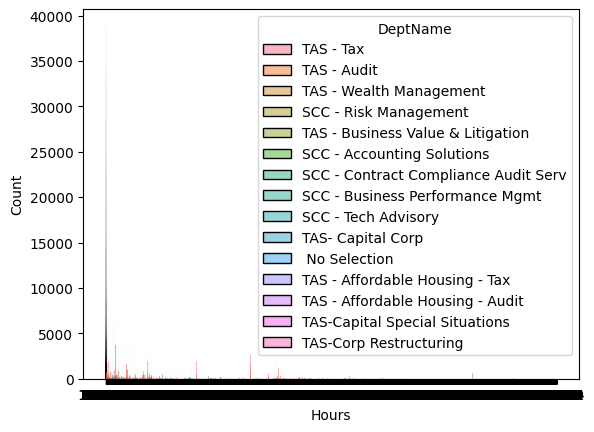

In [17]:
# Plot the distribution of billable hours and total amount across all clients and departments
sns.histplot(data=df, x='Hours', hue='DeptName')
sns.histplot(data=df, x='TotalAmount', hue='DeptName')
plt.show()